In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
#dimension of one input image to the discriminator
input_dim = 784

#dimension of noise vector to the generator
noise_dim = 50

#number of neurons in the hidden layer of the discriminator
neuron_dim = 128

#number of classes of digits in mnist
y_dim = 10
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
def weight_initialize(size):
    dim = size[0]
    stdev = 1. / tf.sqrt(dim / 2.)
    return tf.random_normal(shape=size, stddev=stdev)

# y vector on which the network is conditioned on
y = tf.placeholder(tf.float32, shape=[None, y_dim])

# input to the discriminator
# None is used to automatically adjust according to bumber of input images in a batch
X = tf.placeholder(tf.float32, shape=[None, input_dim])

# Weights are intitialized between the first hidden layer and the input layer
# Shape --> input_dim x neuron_dim
Disc_W1 = tf.Variable(weight_initialize([input_dim + y_dim, neuron_dim]))
# Biases are intialized to zeros
Disc_b1 = tf.Variable(tf.zeros(shape=[neuron_dim]))

# Weights are intialized between hidden layer and output node
# Shape --> neuron_dim x 1
Disc_W2 = tf.Variable(weight_initialize([neuron_dim, 1]))
# Biases are intialized to zeros
Disc_b2 = tf.Variable(tf.zeros(shape=[1]))

# Discriminator variable
var_D = [Disc_W1, Disc_W2, Disc_b1, Disc_b2]

# input noise to the generator
z = tf.placeholder(tf.float32, shape=[None, noise_dim])

# Weights are intialized between noise layer and first hidden layer
# Shape --> noise_dim x neuron_dim
Genr_W1 = tf.Variable(weight_initialize([noise_dim + y_dim, neuron_dim]))
# Biases are intialized to zeros
Genr_b1 = tf.Variable(tf.zeros(shape=[neuron_dim]))

# Weights are intialized between hidden layer and output layer (generated image)
# Shape --> neuron_dim x input_dim
Genr_W2 = tf.Variable(weight_initialize([neuron_dim, input_dim]))
# Biases are intialized to zeros
Genr_b2 = tf.Variable(tf.zeros(shape=[input_dim]))

# Generator variable
var_G = [Genr_W1, Genr_W2, Genr_b1, Genr_b2]

def generator(z, y):
    inputs = tf.concat(axis=1, values=[z,y])
    # [None, noise_dim] x [noise_dim, neuron_dim] = None, neuron_dim
    Genr_h = tf.nn.relu(tf.matmul(inputs, Genr_W1) + Genr_b1)
    # [None, neuron_dim] x [neuron_dim, input_dim] = None, input_dim
    Genr_log_prob = tf.matmul(Genr_h, Genr_W2) + Genr_b2
    Genr_prob = tf.nn.sigmoid(Genr_log_prob)
    return Genr_prob

def discriminator(x, y):
    inputs = tf.concat(axis=1, values=[x,y])
    # [None, input_dim] x [input_dim, neuron_dim] = None, neuron_dim
    Disc_h = tf.nn.relu(tf.matmul(inputs, Disc_W1) + Disc_b1)
    # [None, neuron_dim] x [neuron_dim, 1] = None, 1
    Disc_log_prob = tf.matmul(Disc_h, Disc_W2) + Disc_b2
    return Disc_log_prob

In [5]:
G_sample = generator(z, y)
D_real = discriminator(X, y)
D_fake = discriminator(G_sample, y)

D_loss = tf.reduce_mean(D_real) - tf.reduce_mean(D_fake) # Maximize this
G_loss = -tf.reduce_mean(D_fake) # Minimize this

D_solver = (tf.train.RMSPropOptimizer(learning_rate=0.0001).minimize(-D_loss, var_list=var_D))
G_solver = (tf.train.RMSPropOptimizer(learning_rate=0.0001).minimize(G_loss, var_list=var_G))

clip_D = [p.assign(tf.clip_by_value(p, -0.01, 0.01)) for p in var_D]

batch_size = 50

Loop: 0, Generator_loss: 0.01511, Discriminator_loss: 0.0078703


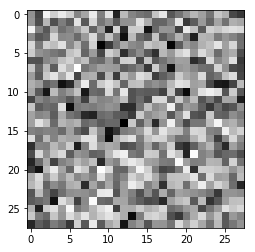

Loop: 100, Generator_loss: 1.7721, Discriminator_loss: 2.1103
Loop: 200, Generator_loss: 1.5754, Discriminator_loss: 1.9473
Loop: 300, Generator_loss: 1.2307, Discriminator_loss: 1.6684
Loop: 400, Generator_loss: 0.93737, Discriminator_loss: 1.4096
Loop: 500, Generator_loss: 0.93851, Discriminator_loss: 1.0643
Loop: 600, Generator_loss: 0.81467, Discriminator_loss: 0.73254
Loop: 700, Generator_loss: 0.57568, Discriminator_loss: 0.41071
Loop: 800, Generator_loss: 0.23492, Discriminator_loss: 0.25333
Loop: 900, Generator_loss: 0.086604, Discriminator_loss: 0.14169
Loop: 1000, Generator_loss: 0.044596, Discriminator_loss: 0.067597


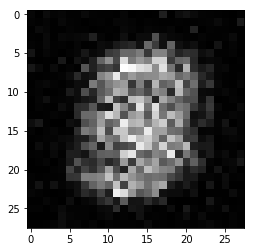

Loop: 1100, Generator_loss: -0.022168, Discriminator_loss: 0.034502
Loop: 1200, Generator_loss: -0.053791, Discriminator_loss: 0.030396
Loop: 1300, Generator_loss: 0.015178, Discriminator_loss: 0.0052274
Loop: 1400, Generator_loss: 0.0040041, Discriminator_loss: 0.0046634
Loop: 1500, Generator_loss: 0.0099005, Discriminator_loss: 0.0048717
Loop: 1600, Generator_loss: -0.028665, Discriminator_loss: 0.0050423
Loop: 1700, Generator_loss: 0.045899, Discriminator_loss: 0.0043753
Loop: 1800, Generator_loss: -0.030583, Discriminator_loss: 0.0012142
Loop: 1900, Generator_loss: 0.027498, Discriminator_loss: 0.0070892
Loop: 2000, Generator_loss: 0.0086777, Discriminator_loss: 0.0003311


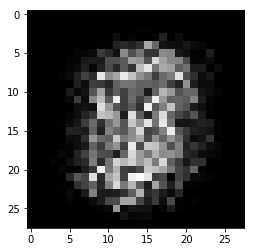

Loop: 2100, Generator_loss: -0.018396, Discriminator_loss: -0.0025942
Loop: 2200, Generator_loss: -0.025601, Discriminator_loss: -0.0019401
Loop: 2300, Generator_loss: 0.018727, Discriminator_loss: 0.001781
Loop: 2400, Generator_loss: -0.035307, Discriminator_loss: 0.0019951
Loop: 2500, Generator_loss: -0.054701, Discriminator_loss: 0.005456
Loop: 2600, Generator_loss: 0.07239, Discriminator_loss: -0.0088478
Loop: 2700, Generator_loss: 0.035733, Discriminator_loss: 0.00058183
Loop: 2800, Generator_loss: 0.060007, Discriminator_loss: -0.0037432
Loop: 2900, Generator_loss: 0.1809, Discriminator_loss: 0.0044525
Loop: 3000, Generator_loss: -0.050781, Discriminator_loss: -0.00079985


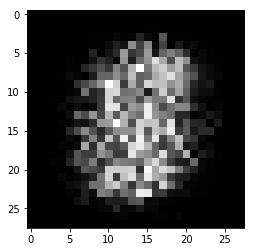

Loop: 3100, Generator_loss: 0.074282, Discriminator_loss: -0.002547
Loop: 3200, Generator_loss: -0.019157, Discriminator_loss: 0.0026587
Loop: 3300, Generator_loss: 0.050283, Discriminator_loss: 0.0022507
Loop: 3400, Generator_loss: -0.056923, Discriminator_loss: 0.029384
Loop: 3500, Generator_loss: 0.017564, Discriminator_loss: 0.025907
Loop: 3600, Generator_loss: 0.027924, Discriminator_loss: 0.028234
Loop: 3700, Generator_loss: 0.022229, Discriminator_loss: 0.063684
Loop: 3800, Generator_loss: 0.0025479, Discriminator_loss: 0.05078
Loop: 3900, Generator_loss: -0.043785, Discriminator_loss: 0.057916
Loop: 4000, Generator_loss: -0.024809, Discriminator_loss: 0.052364


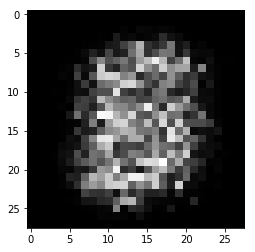

Loop: 4100, Generator_loss: -0.0028915, Discriminator_loss: 0.066452
Loop: 4200, Generator_loss: 0.0015125, Discriminator_loss: 0.078082
Loop: 4300, Generator_loss: -0.019303, Discriminator_loss: 0.085777
Loop: 4400, Generator_loss: -0.031842, Discriminator_loss: 0.082866
Loop: 4500, Generator_loss: -0.026733, Discriminator_loss: 0.077034
Loop: 4600, Generator_loss: -0.013456, Discriminator_loss: 0.082058
Loop: 4700, Generator_loss: -0.0035718, Discriminator_loss: 0.066026
Loop: 4800, Generator_loss: 0.014549, Discriminator_loss: 0.075131
Loop: 4900, Generator_loss: -0.009712, Discriminator_loss: 0.067687
Loop: 5000, Generator_loss: -0.011057, Discriminator_loss: 0.075487


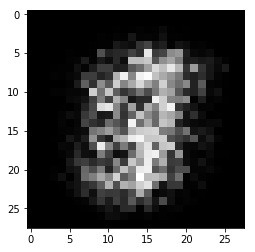

Loop: 5100, Generator_loss: -0.0076206, Discriminator_loss: 0.058915
Loop: 5200, Generator_loss: -0.019171, Discriminator_loss: 0.07124
Loop: 5300, Generator_loss: -0.01309, Discriminator_loss: 0.071901
Loop: 5400, Generator_loss: -0.0096268, Discriminator_loss: 0.07462
Loop: 5500, Generator_loss: -0.0099184, Discriminator_loss: 0.071235
Loop: 5600, Generator_loss: -0.016468, Discriminator_loss: 0.059759
Loop: 5700, Generator_loss: -0.014186, Discriminator_loss: 0.06082
Loop: 5800, Generator_loss: -0.011269, Discriminator_loss: 0.059402
Loop: 5900, Generator_loss: -0.010368, Discriminator_loss: 0.060884
Loop: 6000, Generator_loss: -0.012925, Discriminator_loss: 0.058339


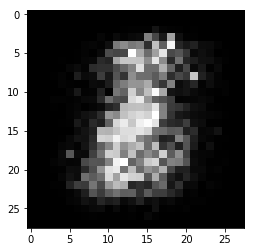

Loop: 6100, Generator_loss: -0.012002, Discriminator_loss: 0.053486
Loop: 6200, Generator_loss: -0.0087235, Discriminator_loss: 0.051638
Loop: 6300, Generator_loss: -0.017118, Discriminator_loss: 0.057515
Loop: 6400, Generator_loss: -0.011991, Discriminator_loss: 0.051972
Loop: 6500, Generator_loss: -0.0038204, Discriminator_loss: 0.053577
Loop: 6600, Generator_loss: -0.011774, Discriminator_loss: 0.062549
Loop: 6700, Generator_loss: -0.012089, Discriminator_loss: 0.055575
Loop: 6800, Generator_loss: -0.016076, Discriminator_loss: 0.052831
Loop: 6900, Generator_loss: -0.01897, Discriminator_loss: 0.043273
Loop: 7000, Generator_loss: -0.018051, Discriminator_loss: 0.048568


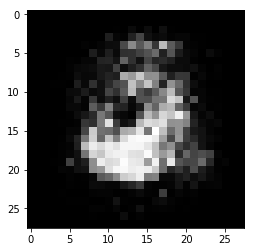

Loop: 7100, Generator_loss: -0.012693, Discriminator_loss: 0.047244
Loop: 7200, Generator_loss: -0.010633, Discriminator_loss: 0.037833
Loop: 7300, Generator_loss: -0.0036205, Discriminator_loss: 0.041222
Loop: 7400, Generator_loss: -0.013398, Discriminator_loss: 0.044574
Loop: 7500, Generator_loss: -0.012206, Discriminator_loss: 0.041237
Loop: 7600, Generator_loss: -0.0078664, Discriminator_loss: 0.043938
Loop: 7700, Generator_loss: -0.012219, Discriminator_loss: 0.042589
Loop: 7800, Generator_loss: -0.011293, Discriminator_loss: 0.033415
Loop: 7900, Generator_loss: -0.012065, Discriminator_loss: 0.040441
Loop: 8000, Generator_loss: -0.012315, Discriminator_loss: 0.041541


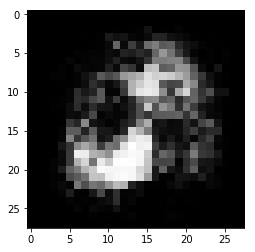

Loop: 8100, Generator_loss: -0.01222, Discriminator_loss: 0.040213
Loop: 8200, Generator_loss: -0.013276, Discriminator_loss: 0.039315
Loop: 8300, Generator_loss: -0.012177, Discriminator_loss: 0.038896
Loop: 8400, Generator_loss: -0.011148, Discriminator_loss: 0.035903
Loop: 8500, Generator_loss: -0.014211, Discriminator_loss: 0.034115
Loop: 8600, Generator_loss: -0.019617, Discriminator_loss: 0.034366
Loop: 8700, Generator_loss: -0.013362, Discriminator_loss: 0.037232
Loop: 8800, Generator_loss: -0.01865, Discriminator_loss: 0.033298
Loop: 8900, Generator_loss: -0.011638, Discriminator_loss: 0.032927
Loop: 9000, Generator_loss: -0.013034, Discriminator_loss: 0.032173


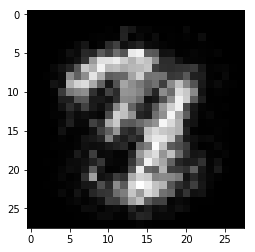

Loop: 9100, Generator_loss: -0.02563, Discriminator_loss: 0.038766
Loop: 9200, Generator_loss: -0.017126, Discriminator_loss: 0.030798
Loop: 9300, Generator_loss: -0.016508, Discriminator_loss: 0.035898
Loop: 9400, Generator_loss: -0.014679, Discriminator_loss: 0.033407
Loop: 9500, Generator_loss: -0.014649, Discriminator_loss: 0.034623
Loop: 9600, Generator_loss: -0.01355, Discriminator_loss: 0.03715
Loop: 9700, Generator_loss: -0.016377, Discriminator_loss: 0.031307
Loop: 9800, Generator_loss: -0.022323, Discriminator_loss: 0.031537
Loop: 9900, Generator_loss: -0.016123, Discriminator_loss: 0.03052
Loop: 10000, Generator_loss: -0.021554, Discriminator_loss: 0.027267


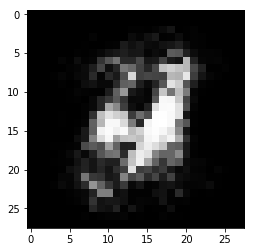

Loop: 10100, Generator_loss: -0.020023, Discriminator_loss: 0.030784
Loop: 10200, Generator_loss: -0.015684, Discriminator_loss: 0.031276
Loop: 10300, Generator_loss: -0.022753, Discriminator_loss: 0.026864
Loop: 10400, Generator_loss: -0.015786, Discriminator_loss: 0.035151
Loop: 10500, Generator_loss: -0.017464, Discriminator_loss: 0.028397
Loop: 10600, Generator_loss: -0.015058, Discriminator_loss: 0.0316
Loop: 10700, Generator_loss: -0.016103, Discriminator_loss: 0.031946
Loop: 10800, Generator_loss: -0.018548, Discriminator_loss: 0.028121
Loop: 10900, Generator_loss: -0.011208, Discriminator_loss: 0.022077
Loop: 11000, Generator_loss: -0.013796, Discriminator_loss: 0.025859


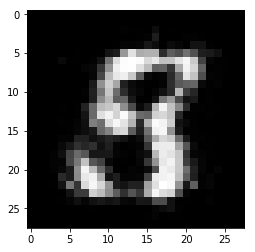

Loop: 11100, Generator_loss: -0.020223, Discriminator_loss: 0.025329
Loop: 11200, Generator_loss: -0.012821, Discriminator_loss: 0.027372
Loop: 11300, Generator_loss: -0.018076, Discriminator_loss: 0.026088
Loop: 11400, Generator_loss: -0.01458, Discriminator_loss: 0.020985
Loop: 11500, Generator_loss: -0.018952, Discriminator_loss: 0.026091
Loop: 11600, Generator_loss: -0.017587, Discriminator_loss: 0.024359
Loop: 11700, Generator_loss: -0.017688, Discriminator_loss: 0.026339
Loop: 11800, Generator_loss: -0.014957, Discriminator_loss: 0.022208
Loop: 11900, Generator_loss: -0.012956, Discriminator_loss: 0.025928
Loop: 12000, Generator_loss: -0.014438, Discriminator_loss: 0.026582


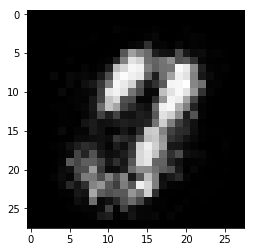

Loop: 12100, Generator_loss: -0.018208, Discriminator_loss: 0.024954
Loop: 12200, Generator_loss: -0.016501, Discriminator_loss: 0.026419
Loop: 12300, Generator_loss: -0.018975, Discriminator_loss: 0.026042
Loop: 12400, Generator_loss: -0.018142, Discriminator_loss: 0.024587
Loop: 12500, Generator_loss: -0.010882, Discriminator_loss: 0.021124
Loop: 12600, Generator_loss: -0.011078, Discriminator_loss: 0.023214
Loop: 12700, Generator_loss: -0.015969, Discriminator_loss: 0.021841
Loop: 12800, Generator_loss: -0.020275, Discriminator_loss: 0.023212
Loop: 12900, Generator_loss: -0.014597, Discriminator_loss: 0.023647
Loop: 13000, Generator_loss: -0.018137, Discriminator_loss: 0.020993


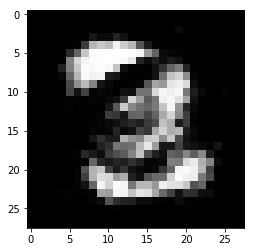

Loop: 13100, Generator_loss: -0.017397, Discriminator_loss: 0.021912
Loop: 13200, Generator_loss: -0.018551, Discriminator_loss: 0.018072
Loop: 13300, Generator_loss: -0.020963, Discriminator_loss: 0.016842
Loop: 13400, Generator_loss: -0.014669, Discriminator_loss: 0.018407
Loop: 13500, Generator_loss: -0.014271, Discriminator_loss: 0.021269
Loop: 13600, Generator_loss: -0.019852, Discriminator_loss: 0.019838
Loop: 13700, Generator_loss: -0.020142, Discriminator_loss: 0.021438
Loop: 13800, Generator_loss: -0.015613, Discriminator_loss: 0.020392
Loop: 13900, Generator_loss: -0.012285, Discriminator_loss: 0.023309
Loop: 14000, Generator_loss: -0.0094146, Discriminator_loss: 0.02006


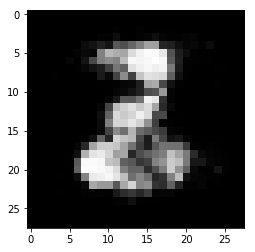

Loop: 14100, Generator_loss: -0.007593, Discriminator_loss: 0.022842
Loop: 14200, Generator_loss: -0.0045276, Discriminator_loss: 0.024045
Loop: 14300, Generator_loss: -0.0075031, Discriminator_loss: 0.025376
Loop: 14400, Generator_loss: -0.0051047, Discriminator_loss: 0.023866
Loop: 14500, Generator_loss: -0.0049738, Discriminator_loss: 0.024367
Loop: 14600, Generator_loss: -0.0038919, Discriminator_loss: 0.022575
Loop: 14700, Generator_loss: -0.0061195, Discriminator_loss: 0.022967
Loop: 14800, Generator_loss: -0.0043151, Discriminator_loss: 0.021032
Loop: 14900, Generator_loss: -0.0094334, Discriminator_loss: 0.020449
Loop: 15000, Generator_loss: -0.0022604, Discriminator_loss: 0.020516


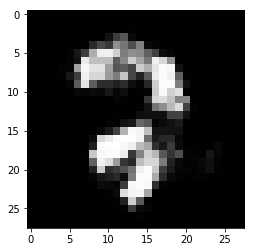

Loop: 15100, Generator_loss: -0.0074779, Discriminator_loss: 0.024312
Loop: 15200, Generator_loss: -0.0054838, Discriminator_loss: 0.025826
Loop: 15300, Generator_loss: -0.0080843, Discriminator_loss: 0.019094
Loop: 15400, Generator_loss: -0.0022111, Discriminator_loss: 0.022671
Loop: 15500, Generator_loss: -0.0056937, Discriminator_loss: 0.020525
Loop: 15600, Generator_loss: -0.0077721, Discriminator_loss: 0.022613
Loop: 15700, Generator_loss: -0.0068119, Discriminator_loss: 0.013467
Loop: 15800, Generator_loss: -0.0083941, Discriminator_loss: 0.02024
Loop: 15900, Generator_loss: -0.006531, Discriminator_loss: 0.022631
Loop: 16000, Generator_loss: -0.0080461, Discriminator_loss: 0.021371


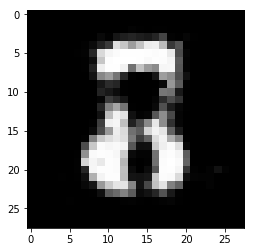

Loop: 16100, Generator_loss: -0.010961, Discriminator_loss: 0.021103
Loop: 16200, Generator_loss: -0.010216, Discriminator_loss: 0.022704
Loop: 16300, Generator_loss: -0.0081218, Discriminator_loss: 0.02098
Loop: 16400, Generator_loss: -0.0069906, Discriminator_loss: 0.020317
Loop: 16500, Generator_loss: -0.0048606, Discriminator_loss: 0.019907
Loop: 16600, Generator_loss: -0.011524, Discriminator_loss: 0.020492
Loop: 16700, Generator_loss: -0.0032668, Discriminator_loss: 0.022207
Loop: 16800, Generator_loss: -0.0094281, Discriminator_loss: 0.019253
Loop: 16900, Generator_loss: -0.0050085, Discriminator_loss: 0.018997
Loop: 17000, Generator_loss: -0.01166, Discriminator_loss: 0.018801


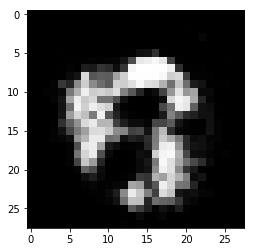

Loop: 17100, Generator_loss: -0.0060248, Discriminator_loss: 0.017872
Loop: 17200, Generator_loss: -0.011182, Discriminator_loss: 0.023124
Loop: 17300, Generator_loss: -0.011415, Discriminator_loss: 0.022167
Loop: 17400, Generator_loss: -0.0066689, Discriminator_loss: 0.020414
Loop: 17500, Generator_loss: -0.0081267, Discriminator_loss: 0.01876
Loop: 17600, Generator_loss: -0.013488, Discriminator_loss: 0.020802
Loop: 17700, Generator_loss: -0.0089882, Discriminator_loss: 0.021012
Loop: 17800, Generator_loss: -0.005838, Discriminator_loss: 0.018343
Loop: 17900, Generator_loss: -0.0074155, Discriminator_loss: 0.017014
Loop: 18000, Generator_loss: -0.0084666, Discriminator_loss: 0.019225


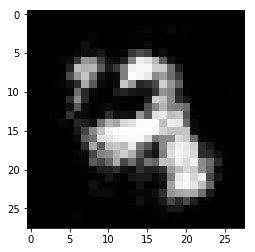

Loop: 18100, Generator_loss: -0.0088711, Discriminator_loss: 0.019349
Loop: 18200, Generator_loss: -0.012296, Discriminator_loss: 0.018589
Loop: 18300, Generator_loss: -0.01033, Discriminator_loss: 0.020696
Loop: 18400, Generator_loss: -0.0067317, Discriminator_loss: 0.018716
Loop: 18500, Generator_loss: -0.0062379, Discriminator_loss: 0.017386
Loop: 18600, Generator_loss: -0.010814, Discriminator_loss: 0.019548
Loop: 18700, Generator_loss: -0.0086873, Discriminator_loss: 0.019689
Loop: 18800, Generator_loss: -0.0094536, Discriminator_loss: 0.017734
Loop: 18900, Generator_loss: -0.0069441, Discriminator_loss: 0.016208
Loop: 19000, Generator_loss: -0.0057132, Discriminator_loss: 0.018463


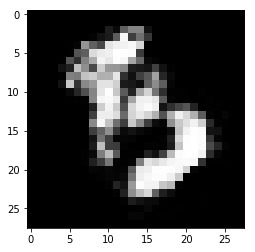

Loop: 19100, Generator_loss: -0.011948, Discriminator_loss: 0.019091
Loop: 19200, Generator_loss: -0.0072982, Discriminator_loss: 0.019934
Loop: 19300, Generator_loss: -0.0095292, Discriminator_loss: 0.016138
Loop: 19400, Generator_loss: -0.01161, Discriminator_loss: 0.020389
Loop: 19500, Generator_loss: -0.0090796, Discriminator_loss: 0.020037
Loop: 19600, Generator_loss: -0.012209, Discriminator_loss: 0.019599
Loop: 19700, Generator_loss: -0.013373, Discriminator_loss: 0.017409
Loop: 19800, Generator_loss: -0.012355, Discriminator_loss: 0.021208
Loop: 19900, Generator_loss: -0.011257, Discriminator_loss: 0.017414
Loop: 20000, Generator_loss: -0.0096364, Discriminator_loss: 0.018235


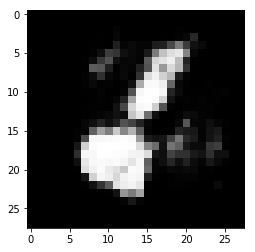

Loop: 20100, Generator_loss: -0.0092465, Discriminator_loss: 0.017703
Loop: 20200, Generator_loss: -0.0096633, Discriminator_loss: 0.02001
Loop: 20300, Generator_loss: -0.0099546, Discriminator_loss: 0.01892
Loop: 20400, Generator_loss: -0.011566, Discriminator_loss: 0.018397
Loop: 20500, Generator_loss: -0.0079276, Discriminator_loss: 0.016588
Loop: 20600, Generator_loss: -0.012044, Discriminator_loss: 0.018409
Loop: 20700, Generator_loss: -0.010032, Discriminator_loss: 0.017925
Loop: 20800, Generator_loss: -0.0083676, Discriminator_loss: 0.02004
Loop: 20900, Generator_loss: -0.0063114, Discriminator_loss: 0.018242
Loop: 21000, Generator_loss: -0.0080401, Discriminator_loss: 0.019691


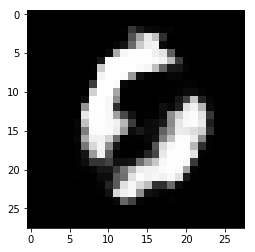

Loop: 21100, Generator_loss: -0.013556, Discriminator_loss: 0.017839
Loop: 21200, Generator_loss: -0.0098158, Discriminator_loss: 0.017624
Loop: 21300, Generator_loss: -0.0082503, Discriminator_loss: 0.01706
Loop: 21400, Generator_loss: -0.0090125, Discriminator_loss: 0.016809
Loop: 21500, Generator_loss: -0.010028, Discriminator_loss: 0.016035
Loop: 21600, Generator_loss: -0.0068373, Discriminator_loss: 0.0158
Loop: 21700, Generator_loss: -0.016557, Discriminator_loss: 0.016361
Loop: 21800, Generator_loss: -0.01441, Discriminator_loss: 0.014724
Loop: 21900, Generator_loss: -0.010059, Discriminator_loss: 0.019358
Loop: 22000, Generator_loss: -0.012964, Discriminator_loss: 0.020894


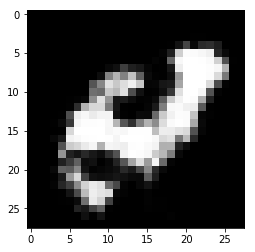

Loop: 22100, Generator_loss: -0.011079, Discriminator_loss: 0.01615
Loop: 22200, Generator_loss: -0.0087563, Discriminator_loss: 0.01859
Loop: 22300, Generator_loss: -0.0092913, Discriminator_loss: 0.013178
Loop: 22400, Generator_loss: -0.017293, Discriminator_loss: 0.01985
Loop: 22500, Generator_loss: -0.01146, Discriminator_loss: 0.019972
Loop: 22600, Generator_loss: -0.010021, Discriminator_loss: 0.015519
Loop: 22700, Generator_loss: -0.010823, Discriminator_loss: 0.015431
Loop: 22800, Generator_loss: -0.015212, Discriminator_loss: 0.017746
Loop: 22900, Generator_loss: -0.016696, Discriminator_loss: 0.012323
Loop: 23000, Generator_loss: -0.01616, Discriminator_loss: 0.017071


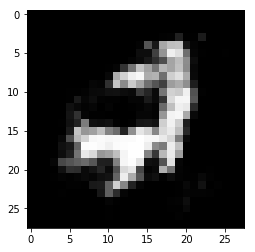

Loop: 23100, Generator_loss: -0.0097373, Discriminator_loss: 0.014213
Loop: 23200, Generator_loss: -0.012633, Discriminator_loss: 0.017047
Loop: 23300, Generator_loss: -0.011697, Discriminator_loss: 0.015111
Loop: 23400, Generator_loss: -0.015377, Discriminator_loss: 0.015829
Loop: 23500, Generator_loss: -0.015114, Discriminator_loss: 0.013939
Loop: 23600, Generator_loss: -0.012696, Discriminator_loss: 0.018008
Loop: 23700, Generator_loss: -0.011997, Discriminator_loss: 0.016074
Loop: 23800, Generator_loss: -0.013567, Discriminator_loss: 0.016625
Loop: 23900, Generator_loss: -0.013661, Discriminator_loss: 0.017835
Loop: 24000, Generator_loss: -0.012485, Discriminator_loss: 0.017752


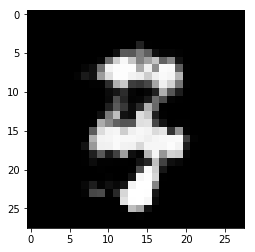

Loop: 24100, Generator_loss: -0.012506, Discriminator_loss: 0.014522
Loop: 24200, Generator_loss: -0.015413, Discriminator_loss: 0.016806
Loop: 24300, Generator_loss: -0.014304, Discriminator_loss: 0.017113
Loop: 24400, Generator_loss: -0.013787, Discriminator_loss: 0.019078
Loop: 24500, Generator_loss: -0.013516, Discriminator_loss: 0.013343
Loop: 24600, Generator_loss: -0.015462, Discriminator_loss: 0.016645
Loop: 24700, Generator_loss: -0.014076, Discriminator_loss: 0.014517
Loop: 24800, Generator_loss: -0.016941, Discriminator_loss: 0.015264
Loop: 24900, Generator_loss: -0.02171, Discriminator_loss: 0.015964
Loop: 25000, Generator_loss: -0.012828, Discriminator_loss: 0.015945


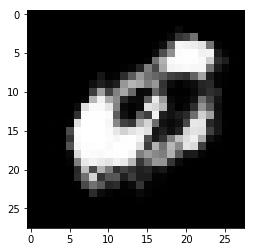

Loop: 25100, Generator_loss: -0.011591, Discriminator_loss: 0.01755
Loop: 25200, Generator_loss: -0.012503, Discriminator_loss: 0.015045
Loop: 25300, Generator_loss: -0.012957, Discriminator_loss: 0.013785
Loop: 25400, Generator_loss: -0.012505, Discriminator_loss: 0.017237
Loop: 25500, Generator_loss: -0.016445, Discriminator_loss: 0.018924
Loop: 25600, Generator_loss: -0.015568, Discriminator_loss: 0.016919
Loop: 25700, Generator_loss: -0.016476, Discriminator_loss: 0.014463
Loop: 25800, Generator_loss: -0.014733, Discriminator_loss: 0.01325
Loop: 25900, Generator_loss: -0.015277, Discriminator_loss: 0.015774
Loop: 26000, Generator_loss: -0.013948, Discriminator_loss: 0.014411


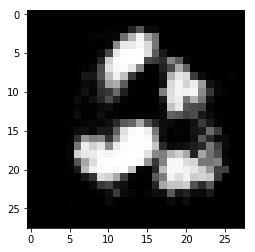

Loop: 26100, Generator_loss: -0.013683, Discriminator_loss: 0.011507
Loop: 26200, Generator_loss: -0.015131, Discriminator_loss: 0.018484
Loop: 26300, Generator_loss: -0.012347, Discriminator_loss: 0.014728
Loop: 26400, Generator_loss: -0.011717, Discriminator_loss: 0.012082
Loop: 26500, Generator_loss: -0.011708, Discriminator_loss: 0.016539
Loop: 26600, Generator_loss: -0.015976, Discriminator_loss: 0.014855
Loop: 26700, Generator_loss: -0.016396, Discriminator_loss: 0.015431
Loop: 26800, Generator_loss: -0.016057, Discriminator_loss: 0.015485
Loop: 26900, Generator_loss: -0.015471, Discriminator_loss: 0.014918
Loop: 27000, Generator_loss: -0.010831, Discriminator_loss: 0.016356


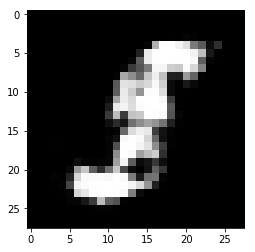

Loop: 27100, Generator_loss: -0.017397, Discriminator_loss: 0.014948
Loop: 27200, Generator_loss: -0.019456, Discriminator_loss: 0.015808
Loop: 27300, Generator_loss: -0.012944, Discriminator_loss: 0.014594
Loop: 27400, Generator_loss: -0.013394, Discriminator_loss: 0.015882
Loop: 27500, Generator_loss: -0.015225, Discriminator_loss: 0.016104
Loop: 27600, Generator_loss: -0.013824, Discriminator_loss: 0.016679
Loop: 27700, Generator_loss: -0.017169, Discriminator_loss: 0.01534
Loop: 27800, Generator_loss: -0.014877, Discriminator_loss: 0.016409
Loop: 27900, Generator_loss: -0.016713, Discriminator_loss: 0.01342
Loop: 28000, Generator_loss: -0.017021, Discriminator_loss: 0.01449


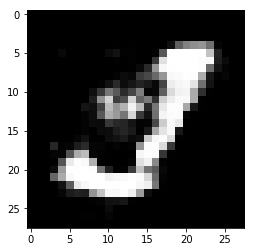

Loop: 28100, Generator_loss: -0.018394, Discriminator_loss: 0.017589
Loop: 28200, Generator_loss: -0.01586, Discriminator_loss: 0.015973
Loop: 28300, Generator_loss: -0.013773, Discriminator_loss: 0.016284
Loop: 28400, Generator_loss: -0.014381, Discriminator_loss: 0.016836
Loop: 28500, Generator_loss: -0.01987, Discriminator_loss: 0.017131
Loop: 28600, Generator_loss: -0.015374, Discriminator_loss: 0.018845
Loop: 28700, Generator_loss: -0.014381, Discriminator_loss: 0.01769
Loop: 28800, Generator_loss: -0.014332, Discriminator_loss: 0.017403
Loop: 28900, Generator_loss: -0.015264, Discriminator_loss: 0.013548
Loop: 29000, Generator_loss: -0.012329, Discriminator_loss: 0.015092


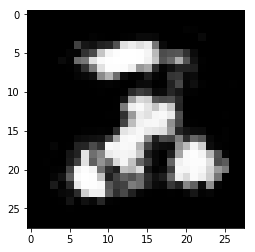

Loop: 29100, Generator_loss: -0.016986, Discriminator_loss: 0.013993
Loop: 29200, Generator_loss: -0.014868, Discriminator_loss: 0.014848
Loop: 29300, Generator_loss: -0.014895, Discriminator_loss: 0.013643
Loop: 29400, Generator_loss: -0.015353, Discriminator_loss: 0.013269
Loop: 29500, Generator_loss: -0.014875, Discriminator_loss: 0.014594
Loop: 29600, Generator_loss: -0.020011, Discriminator_loss: 0.015992
Loop: 29700, Generator_loss: -0.015852, Discriminator_loss: 0.016986
Loop: 29800, Generator_loss: -0.013565, Discriminator_loss: 0.011943
Loop: 29900, Generator_loss: -0.015232, Discriminator_loss: 0.015295
Loop: 30000, Generator_loss: -0.01472, Discriminator_loss: 0.014092


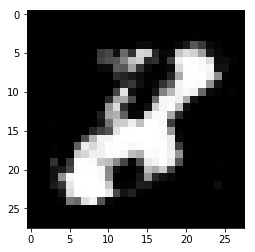

Loop: 30100, Generator_loss: -0.01516, Discriminator_loss: 0.015798
Loop: 30200, Generator_loss: -0.012263, Discriminator_loss: 0.014748
Loop: 30300, Generator_loss: -0.015544, Discriminator_loss: 0.012553
Loop: 30400, Generator_loss: -0.010288, Discriminator_loss: 0.015575
Loop: 30500, Generator_loss: -0.014237, Discriminator_loss: 0.015796
Loop: 30600, Generator_loss: -0.015447, Discriminator_loss: 0.015801
Loop: 30700, Generator_loss: -0.013743, Discriminator_loss: 0.012732
Loop: 30800, Generator_loss: -0.013095, Discriminator_loss: 0.013645
Loop: 30900, Generator_loss: -0.014427, Discriminator_loss: 0.012953
Loop: 31000, Generator_loss: -0.011336, Discriminator_loss: 0.01336


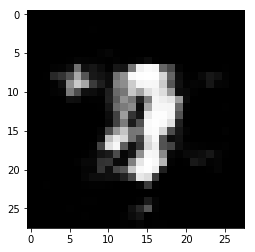

Loop: 31100, Generator_loss: -0.016204, Discriminator_loss: 0.018387
Loop: 31200, Generator_loss: -0.013273, Discriminator_loss: 0.016189
Loop: 31300, Generator_loss: -0.011397, Discriminator_loss: 0.013451
Loop: 31400, Generator_loss: -0.015724, Discriminator_loss: 0.015757
Loop: 31500, Generator_loss: -0.014192, Discriminator_loss: 0.014391
Loop: 31600, Generator_loss: -0.013547, Discriminator_loss: 0.014606
Loop: 31700, Generator_loss: -0.016237, Discriminator_loss: 0.015265
Loop: 31800, Generator_loss: -0.015593, Discriminator_loss: 0.014822
Loop: 31900, Generator_loss: -0.012323, Discriminator_loss: 0.011243
Loop: 32000, Generator_loss: -0.014939, Discriminator_loss: 0.016222


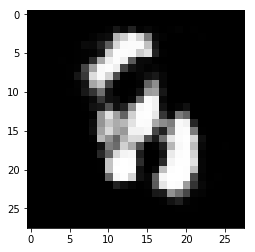

Loop: 32100, Generator_loss: -0.012694, Discriminator_loss: 0.012976
Loop: 32200, Generator_loss: -0.01519, Discriminator_loss: 0.019163
Loop: 32300, Generator_loss: -0.016972, Discriminator_loss: 0.014907
Loop: 32400, Generator_loss: -0.01248, Discriminator_loss: 0.015511
Loop: 32500, Generator_loss: -0.015395, Discriminator_loss: 0.013761
Loop: 32600, Generator_loss: -0.011166, Discriminator_loss: 0.013983
Loop: 32700, Generator_loss: -0.014705, Discriminator_loss: 0.013232
Loop: 32800, Generator_loss: -0.011496, Discriminator_loss: 0.016613
Loop: 32900, Generator_loss: -0.013695, Discriminator_loss: 0.016375
Loop: 33000, Generator_loss: -0.016864, Discriminator_loss: 0.012763


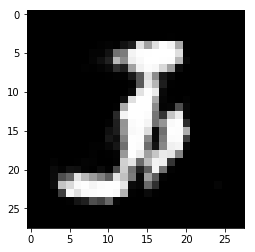

Loop: 33100, Generator_loss: -0.019196, Discriminator_loss: 0.01507
Loop: 33200, Generator_loss: -0.014602, Discriminator_loss: 0.013622
Loop: 33300, Generator_loss: -0.018281, Discriminator_loss: 0.013879
Loop: 33400, Generator_loss: -0.016952, Discriminator_loss: 0.016893
Loop: 33500, Generator_loss: -0.014933, Discriminator_loss: 0.016115
Loop: 33600, Generator_loss: -0.014727, Discriminator_loss: 0.014331
Loop: 33700, Generator_loss: -0.0085936, Discriminator_loss: 0.014162
Loop: 33800, Generator_loss: -0.017624, Discriminator_loss: 0.015189
Loop: 33900, Generator_loss: -0.013709, Discriminator_loss: 0.015304
Loop: 34000, Generator_loss: -0.015955, Discriminator_loss: 0.015983


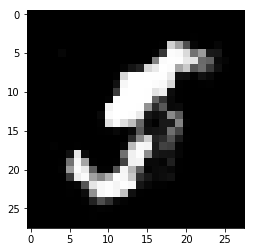

Loop: 34100, Generator_loss: -0.013033, Discriminator_loss: 0.012301
Loop: 34200, Generator_loss: -0.019863, Discriminator_loss: 0.012206
Loop: 34300, Generator_loss: -0.013571, Discriminator_loss: 0.015759
Loop: 34400, Generator_loss: -0.008258, Discriminator_loss: 0.013373
Loop: 34500, Generator_loss: -0.012435, Discriminator_loss: 0.013894
Loop: 34600, Generator_loss: -0.014446, Discriminator_loss: 0.01313
Loop: 34700, Generator_loss: -0.01951, Discriminator_loss: 0.014467
Loop: 34800, Generator_loss: -0.01391, Discriminator_loss: 0.014646
Loop: 34900, Generator_loss: -0.015805, Discriminator_loss: 0.014654
Loop: 35000, Generator_loss: -0.011859, Discriminator_loss: 0.018614


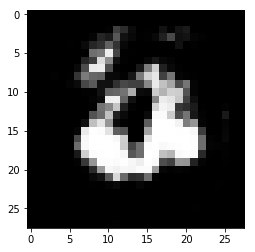

Loop: 35100, Generator_loss: -0.0139, Discriminator_loss: 0.014308
Loop: 35200, Generator_loss: -0.016812, Discriminator_loss: 0.01206
Loop: 35300, Generator_loss: -0.015781, Discriminator_loss: 0.01314
Loop: 35400, Generator_loss: -0.013168, Discriminator_loss: 0.013498
Loop: 35500, Generator_loss: -0.018938, Discriminator_loss: 0.015072
Loop: 35600, Generator_loss: -0.017775, Discriminator_loss: 0.011684
Loop: 35700, Generator_loss: -0.015882, Discriminator_loss: 0.018583
Loop: 35800, Generator_loss: -0.015976, Discriminator_loss: 0.012598
Loop: 35900, Generator_loss: -0.019454, Discriminator_loss: 0.011338
Loop: 36000, Generator_loss: -0.014103, Discriminator_loss: 0.01206


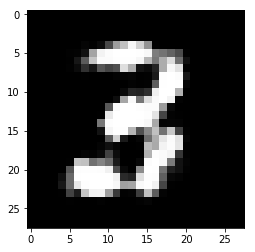

Loop: 36100, Generator_loss: -0.015844, Discriminator_loss: 0.01302
Loop: 36200, Generator_loss: -0.017718, Discriminator_loss: 0.017705
Loop: 36300, Generator_loss: -0.012364, Discriminator_loss: 0.014382
Loop: 36400, Generator_loss: -0.015447, Discriminator_loss: 0.01458
Loop: 36500, Generator_loss: -0.015439, Discriminator_loss: 0.012074
Loop: 36600, Generator_loss: -0.015973, Discriminator_loss: 0.012882
Loop: 36700, Generator_loss: -0.017776, Discriminator_loss: 0.015055
Loop: 36800, Generator_loss: -0.012512, Discriminator_loss: 0.013153
Loop: 36900, Generator_loss: -0.014834, Discriminator_loss: 0.017968
Loop: 37000, Generator_loss: -0.017548, Discriminator_loss: 0.015149


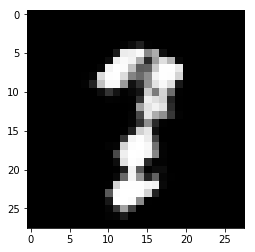

Loop: 37100, Generator_loss: -0.015629, Discriminator_loss: 0.015038
Loop: 37200, Generator_loss: -0.017616, Discriminator_loss: 0.016389
Loop: 37300, Generator_loss: -0.016375, Discriminator_loss: 0.015304
Loop: 37400, Generator_loss: -0.021565, Discriminator_loss: 0.015597
Loop: 37500, Generator_loss: -0.018777, Discriminator_loss: 0.015491
Loop: 37600, Generator_loss: -0.014932, Discriminator_loss: 0.013644
Loop: 37700, Generator_loss: -0.019586, Discriminator_loss: 0.013651
Loop: 37800, Generator_loss: -0.017823, Discriminator_loss: 0.01199
Loop: 37900, Generator_loss: -0.014602, Discriminator_loss: 0.011338
Loop: 38000, Generator_loss: -0.013152, Discriminator_loss: 0.013323


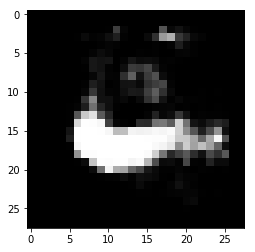

Loop: 38100, Generator_loss: -0.015285, Discriminator_loss: 0.012253
Loop: 38200, Generator_loss: -0.017012, Discriminator_loss: 0.011773
Loop: 38300, Generator_loss: -0.015394, Discriminator_loss: 0.0099667
Loop: 38400, Generator_loss: -0.015691, Discriminator_loss: 0.011546
Loop: 38500, Generator_loss: -0.015342, Discriminator_loss: 0.01235
Loop: 38600, Generator_loss: -0.010902, Discriminator_loss: 0.012581
Loop: 38700, Generator_loss: -0.014184, Discriminator_loss: 0.01276
Loop: 38800, Generator_loss: -0.013359, Discriminator_loss: 0.012596
Loop: 38900, Generator_loss: -0.013837, Discriminator_loss: 0.015103
Loop: 39000, Generator_loss: -0.020551, Discriminator_loss: 0.013192


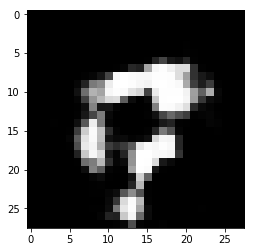

Loop: 39100, Generator_loss: -0.013063, Discriminator_loss: 0.010246
Loop: 39200, Generator_loss: -0.020104, Discriminator_loss: 0.011328
Loop: 39300, Generator_loss: -0.01541, Discriminator_loss: 0.010535
Loop: 39400, Generator_loss: -0.013258, Discriminator_loss: 0.013869
Loop: 39500, Generator_loss: -0.01848, Discriminator_loss: 0.012233
Loop: 39600, Generator_loss: -0.016255, Discriminator_loss: 0.011314
Loop: 39700, Generator_loss: -0.016703, Discriminator_loss: 0.012812
Loop: 39800, Generator_loss: -0.010911, Discriminator_loss: 0.013284
Loop: 39900, Generator_loss: -0.017255, Discriminator_loss: 0.011391
Loop: 40000, Generator_loss: -0.017647, Discriminator_loss: 0.013201


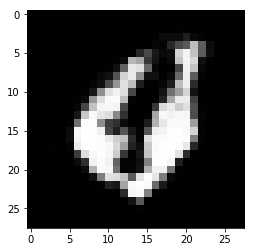

Loop: 40100, Generator_loss: -0.017523, Discriminator_loss: 0.014075
Loop: 40200, Generator_loss: -0.019562, Discriminator_loss: 0.01064
Loop: 40300, Generator_loss: -0.017721, Discriminator_loss: 0.013933
Loop: 40400, Generator_loss: -0.017815, Discriminator_loss: 0.012995
Loop: 40500, Generator_loss: -0.013999, Discriminator_loss: 0.014679
Loop: 40600, Generator_loss: -0.013528, Discriminator_loss: 0.011854
Loop: 40700, Generator_loss: -0.014533, Discriminator_loss: 0.011808
Loop: 40800, Generator_loss: -0.012724, Discriminator_loss: 0.012537
Loop: 40900, Generator_loss: -0.013966, Discriminator_loss: 0.013839
Loop: 41000, Generator_loss: -0.017258, Discriminator_loss: 0.013586


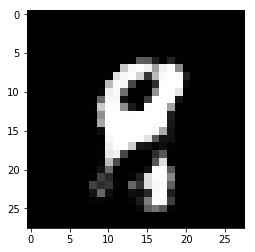

Loop: 41100, Generator_loss: -0.014291, Discriminator_loss: 0.0087201
Loop: 41200, Generator_loss: -0.017308, Discriminator_loss: 0.012687
Loop: 41300, Generator_loss: -0.014992, Discriminator_loss: 0.011466
Loop: 41400, Generator_loss: -0.016832, Discriminator_loss: 0.01326
Loop: 41500, Generator_loss: -0.01744, Discriminator_loss: 0.012187
Loop: 41600, Generator_loss: -0.014048, Discriminator_loss: 0.011952
Loop: 41700, Generator_loss: -0.021828, Discriminator_loss: 0.012158
Loop: 41800, Generator_loss: -0.013331, Discriminator_loss: 0.012209
Loop: 41900, Generator_loss: -0.016739, Discriminator_loss: 0.014343
Loop: 42000, Generator_loss: -0.014964, Discriminator_loss: 0.01013


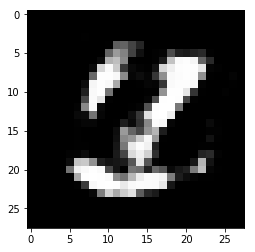

Loop: 42100, Generator_loss: -0.018161, Discriminator_loss: 0.012747
Loop: 42200, Generator_loss: -0.016918, Discriminator_loss: 0.011135
Loop: 42300, Generator_loss: -0.016557, Discriminator_loss: 0.0092358
Loop: 42400, Generator_loss: -0.014858, Discriminator_loss: 0.0098967
Loop: 42500, Generator_loss: -0.013515, Discriminator_loss: 0.014785
Loop: 42600, Generator_loss: -0.017648, Discriminator_loss: 0.014404
Loop: 42700, Generator_loss: -0.016145, Discriminator_loss: 0.014236
Loop: 42800, Generator_loss: -0.012554, Discriminator_loss: 0.01234
Loop: 42900, Generator_loss: -0.015648, Discriminator_loss: 0.014331
Loop: 43000, Generator_loss: -0.0156, Discriminator_loss: 0.011133


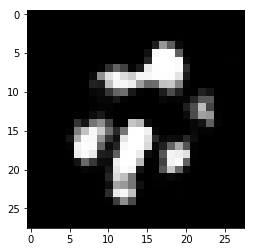

Loop: 43100, Generator_loss: -0.022892, Discriminator_loss: 0.010045
Loop: 43200, Generator_loss: -0.017207, Discriminator_loss: 0.013297
Loop: 43300, Generator_loss: -0.013984, Discriminator_loss: 0.013513
Loop: 43400, Generator_loss: -0.017946, Discriminator_loss: 0.012837
Loop: 43500, Generator_loss: -0.015883, Discriminator_loss: 0.012495
Loop: 43600, Generator_loss: -0.017472, Discriminator_loss: 0.012858
Loop: 43700, Generator_loss: -0.014759, Discriminator_loss: 0.012619
Loop: 43800, Generator_loss: -0.016606, Discriminator_loss: 0.013053
Loop: 43900, Generator_loss: -0.018749, Discriminator_loss: 0.010138
Loop: 44000, Generator_loss: -0.014725, Discriminator_loss: 0.01164


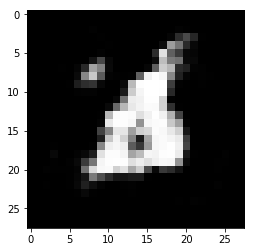

Loop: 44100, Generator_loss: -0.014009, Discriminator_loss: 0.011822
Loop: 44200, Generator_loss: -0.017781, Discriminator_loss: 0.013049
Loop: 44300, Generator_loss: -0.016366, Discriminator_loss: 0.012206
Loop: 44400, Generator_loss: -0.015825, Discriminator_loss: 0.012462
Loop: 44500, Generator_loss: -0.018972, Discriminator_loss: 0.011186
Loop: 44600, Generator_loss: -0.013479, Discriminator_loss: 0.012562
Loop: 44700, Generator_loss: -0.016481, Discriminator_loss: 0.0091286
Loop: 44800, Generator_loss: -0.017078, Discriminator_loss: 0.012961
Loop: 44900, Generator_loss: -0.014378, Discriminator_loss: 0.011094
Loop: 45000, Generator_loss: -0.015162, Discriminator_loss: 0.012248


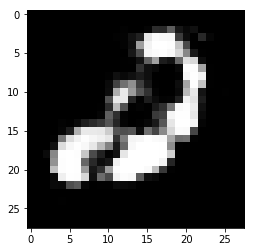

Loop: 45100, Generator_loss: -0.016339, Discriminator_loss: 0.013195
Loop: 45200, Generator_loss: -0.014158, Discriminator_loss: 0.011064
Loop: 45300, Generator_loss: -0.012889, Discriminator_loss: 0.012105
Loop: 45400, Generator_loss: -0.016727, Discriminator_loss: 0.011071
Loop: 45500, Generator_loss: -0.022386, Discriminator_loss: 0.014338
Loop: 45600, Generator_loss: -0.018904, Discriminator_loss: 0.011998
Loop: 45700, Generator_loss: -0.01794, Discriminator_loss: 0.011208
Loop: 45800, Generator_loss: -0.018078, Discriminator_loss: 0.0076497
Loop: 45900, Generator_loss: -0.017769, Discriminator_loss: 0.01349
Loop: 46000, Generator_loss: -0.016682, Discriminator_loss: 0.013406


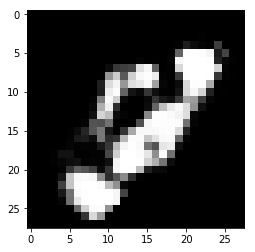

Loop: 46100, Generator_loss: -0.020219, Discriminator_loss: 0.013239
Loop: 46200, Generator_loss: -0.014696, Discriminator_loss: 0.014442
Loop: 46300, Generator_loss: -0.011995, Discriminator_loss: 0.0099755
Loop: 46400, Generator_loss: -0.021147, Discriminator_loss: 0.011318
Loop: 46500, Generator_loss: -0.01372, Discriminator_loss: 0.011754
Loop: 46600, Generator_loss: -0.017615, Discriminator_loss: 0.011151
Loop: 46700, Generator_loss: -0.018709, Discriminator_loss: 0.011927
Loop: 46800, Generator_loss: -0.016939, Discriminator_loss: 0.015634
Loop: 46900, Generator_loss: -0.014825, Discriminator_loss: 0.010855
Loop: 47000, Generator_loss: -0.016691, Discriminator_loss: 0.011651


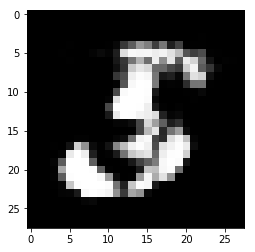

Loop: 47100, Generator_loss: -0.017252, Discriminator_loss: 0.010177
Loop: 47200, Generator_loss: -0.015783, Discriminator_loss: 0.013047
Loop: 47300, Generator_loss: -0.010851, Discriminator_loss: 0.0096484
Loop: 47400, Generator_loss: -0.016026, Discriminator_loss: 0.012687
Loop: 47500, Generator_loss: -0.013747, Discriminator_loss: 0.0084833
Loop: 47600, Generator_loss: -0.015911, Discriminator_loss: 0.010092
Loop: 47700, Generator_loss: -0.013846, Discriminator_loss: 0.010433
Loop: 47800, Generator_loss: -0.017733, Discriminator_loss: 0.011194
Loop: 47900, Generator_loss: -0.015634, Discriminator_loss: 0.01006
Loop: 48000, Generator_loss: -0.016276, Discriminator_loss: 0.010839


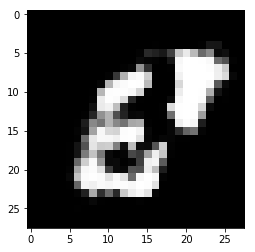

Loop: 48100, Generator_loss: -0.017667, Discriminator_loss: 0.010343
Loop: 48200, Generator_loss: -0.019476, Discriminator_loss: 0.011783
Loop: 48300, Generator_loss: -0.013775, Discriminator_loss: 0.01115
Loop: 48400, Generator_loss: -0.016031, Discriminator_loss: 0.011834
Loop: 48500, Generator_loss: -0.015269, Discriminator_loss: 0.013411
Loop: 48600, Generator_loss: -0.013857, Discriminator_loss: 0.010655
Loop: 48700, Generator_loss: -0.019696, Discriminator_loss: 0.012547
Loop: 48800, Generator_loss: -0.018934, Discriminator_loss: 0.011363
Loop: 48900, Generator_loss: -0.014836, Discriminator_loss: 0.0089934
Loop: 49000, Generator_loss: -0.016096, Discriminator_loss: 0.011223


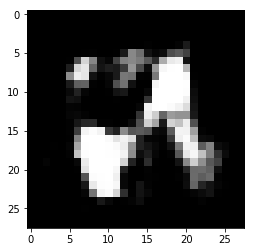

Loop: 49100, Generator_loss: -0.017821, Discriminator_loss: 0.012929
Loop: 49200, Generator_loss: -0.019538, Discriminator_loss: 0.01339
Loop: 49300, Generator_loss: -0.015461, Discriminator_loss: 0.012352
Loop: 49400, Generator_loss: -0.015461, Discriminator_loss: 0.011786
Loop: 49500, Generator_loss: -0.014633, Discriminator_loss: 0.011339
Loop: 49600, Generator_loss: -0.013777, Discriminator_loss: 0.013211
Loop: 49700, Generator_loss: -0.01894, Discriminator_loss: 0.011543
Loop: 49800, Generator_loss: -0.018988, Discriminator_loss: 0.013624
Loop: 49900, Generator_loss: -0.016317, Discriminator_loss: 0.011166
Loop: 50000, Generator_loss: -0.013522, Discriminator_loss: 0.011323


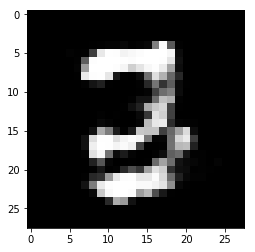

Loop: 50100, Generator_loss: -0.018462, Discriminator_loss: 0.010397
Loop: 50200, Generator_loss: -0.016076, Discriminator_loss: 0.01034
Loop: 50300, Generator_loss: -0.016308, Discriminator_loss: 0.01325
Loop: 50400, Generator_loss: -0.015799, Discriminator_loss: 0.013074
Loop: 50500, Generator_loss: -0.019349, Discriminator_loss: 0.011854
Loop: 50600, Generator_loss: -0.012058, Discriminator_loss: 0.01179
Loop: 50700, Generator_loss: -0.01369, Discriminator_loss: 0.010852
Loop: 50800, Generator_loss: -0.016577, Discriminator_loss: 0.013347
Loop: 50900, Generator_loss: -0.015572, Discriminator_loss: 0.010576
Loop: 51000, Generator_loss: -0.014075, Discriminator_loss: 0.012605


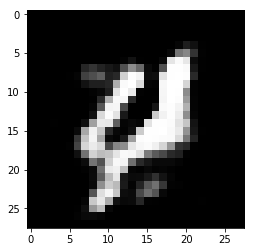

Loop: 51100, Generator_loss: -0.015757, Discriminator_loss: 0.011569
Loop: 51200, Generator_loss: -0.0091122, Discriminator_loss: 0.01125
Loop: 51300, Generator_loss: -0.017484, Discriminator_loss: 0.0095284
Loop: 51400, Generator_loss: -0.013153, Discriminator_loss: 0.012578
Loop: 51500, Generator_loss: -0.013472, Discriminator_loss: 0.011754
Loop: 51600, Generator_loss: -0.010848, Discriminator_loss: 0.0095709
Loop: 51700, Generator_loss: -0.012861, Discriminator_loss: 0.012802
Loop: 51800, Generator_loss: -0.018421, Discriminator_loss: 0.012914
Loop: 51900, Generator_loss: -0.013511, Discriminator_loss: 0.01169
Loop: 52000, Generator_loss: -0.014868, Discriminator_loss: 0.012323


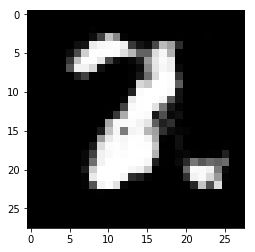

Loop: 52100, Generator_loss: -0.016808, Discriminator_loss: 0.0123
Loop: 52200, Generator_loss: -0.015901, Discriminator_loss: 0.011118
Loop: 52300, Generator_loss: -0.015604, Discriminator_loss: 0.0098472
Loop: 52400, Generator_loss: -0.012305, Discriminator_loss: 0.0098345
Loop: 52500, Generator_loss: -0.018, Discriminator_loss: 0.012673
Loop: 52600, Generator_loss: -0.018345, Discriminator_loss: 0.012812
Loop: 52700, Generator_loss: -0.016326, Discriminator_loss: 0.010682
Loop: 52800, Generator_loss: -0.014057, Discriminator_loss: 0.0090546
Loop: 52900, Generator_loss: -0.015716, Discriminator_loss: 0.012338
Loop: 53000, Generator_loss: -0.016925, Discriminator_loss: 0.0058121


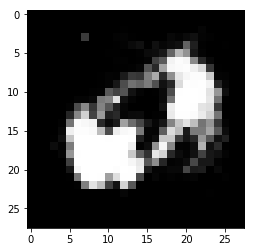

Loop: 53100, Generator_loss: -0.015157, Discriminator_loss: 0.012462
Loop: 53200, Generator_loss: -0.01524, Discriminator_loss: 0.012241
Loop: 53300, Generator_loss: -0.014305, Discriminator_loss: 0.011336
Loop: 53400, Generator_loss: -0.016513, Discriminator_loss: 0.009852
Loop: 53500, Generator_loss: -0.015012, Discriminator_loss: 0.014917
Loop: 53600, Generator_loss: -0.01258, Discriminator_loss: 0.010201
Loop: 53700, Generator_loss: -0.015896, Discriminator_loss: 0.010457
Loop: 53800, Generator_loss: -0.014235, Discriminator_loss: 0.011271
Loop: 53900, Generator_loss: -0.018652, Discriminator_loss: 0.012871
Loop: 54000, Generator_loss: -0.016124, Discriminator_loss: 0.010154


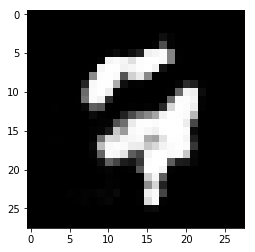

Loop: 54100, Generator_loss: -0.016472, Discriminator_loss: 0.012095
Loop: 54200, Generator_loss: -0.015369, Discriminator_loss: 0.010451
Loop: 54300, Generator_loss: -0.018184, Discriminator_loss: 0.010188
Loop: 54400, Generator_loss: -0.013635, Discriminator_loss: 0.010411
Loop: 54500, Generator_loss: -0.014636, Discriminator_loss: 0.011374
Loop: 54600, Generator_loss: -0.015056, Discriminator_loss: 0.012588
Loop: 54700, Generator_loss: -0.016381, Discriminator_loss: 0.010491
Loop: 54800, Generator_loss: -0.014542, Discriminator_loss: 0.012008
Loop: 54900, Generator_loss: -0.017611, Discriminator_loss: 0.013936
Loop: 55000, Generator_loss: -0.015336, Discriminator_loss: 0.012191


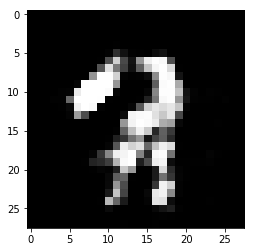

Loop: 55100, Generator_loss: -0.017473, Discriminator_loss: 0.0091415
Loop: 55200, Generator_loss: -0.011779, Discriminator_loss: 0.0086115
Loop: 55300, Generator_loss: -0.012678, Discriminator_loss: 0.0087242
Loop: 55400, Generator_loss: -0.014009, Discriminator_loss: 0.0143
Loop: 55500, Generator_loss: -0.01569, Discriminator_loss: 0.012689
Loop: 55600, Generator_loss: -0.011293, Discriminator_loss: 0.010988
Loop: 55700, Generator_loss: -0.013248, Discriminator_loss: 0.0082707
Loop: 55800, Generator_loss: -0.013346, Discriminator_loss: 0.011662
Loop: 55900, Generator_loss: -0.017081, Discriminator_loss: 0.010931
Loop: 56000, Generator_loss: -0.018029, Discriminator_loss: 0.012362


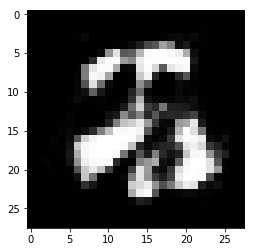

Loop: 56100, Generator_loss: -0.017475, Discriminator_loss: 0.011382
Loop: 56200, Generator_loss: -0.017935, Discriminator_loss: 0.0076945
Loop: 56300, Generator_loss: -0.013508, Discriminator_loss: 0.011609
Loop: 56400, Generator_loss: -0.014515, Discriminator_loss: 0.012557
Loop: 56500, Generator_loss: -0.013923, Discriminator_loss: 0.012256
Loop: 56600, Generator_loss: -0.020203, Discriminator_loss: 0.0092219
Loop: 56700, Generator_loss: -0.015144, Discriminator_loss: 0.0095061
Loop: 56800, Generator_loss: -0.01515, Discriminator_loss: 0.010861
Loop: 56900, Generator_loss: -0.016706, Discriminator_loss: 0.012407
Loop: 57000, Generator_loss: -0.016585, Discriminator_loss: 0.0087603


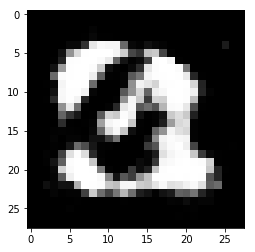

Loop: 57100, Generator_loss: -0.012558, Discriminator_loss: 0.010495
Loop: 57200, Generator_loss: -0.015031, Discriminator_loss: 0.011333
Loop: 57300, Generator_loss: -0.013864, Discriminator_loss: 0.0084618
Loop: 57400, Generator_loss: -0.019226, Discriminator_loss: 0.01174
Loop: 57500, Generator_loss: -0.012443, Discriminator_loss: 0.011626
Loop: 57600, Generator_loss: -0.015851, Discriminator_loss: 0.013002
Loop: 57700, Generator_loss: -0.013483, Discriminator_loss: 0.012389
Loop: 57800, Generator_loss: -0.012662, Discriminator_loss: 0.0096989
Loop: 57900, Generator_loss: -0.016787, Discriminator_loss: 0.0091276
Loop: 58000, Generator_loss: -0.013972, Discriminator_loss: 0.01029


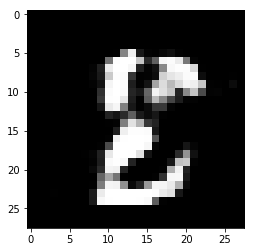

Loop: 58100, Generator_loss: -0.014255, Discriminator_loss: 0.010539
Loop: 58200, Generator_loss: -0.013287, Discriminator_loss: 0.0094812
Loop: 58300, Generator_loss: -0.015666, Discriminator_loss: 0.011059
Loop: 58400, Generator_loss: -0.01088, Discriminator_loss: 0.013502
Loop: 58500, Generator_loss: -0.012631, Discriminator_loss: 0.012094
Loop: 58600, Generator_loss: -0.0098134, Discriminator_loss: 0.0087393
Loop: 58700, Generator_loss: -0.016477, Discriminator_loss: 0.010652
Loop: 58800, Generator_loss: -0.011089, Discriminator_loss: 0.012345
Loop: 58900, Generator_loss: -0.013617, Discriminator_loss: 0.0089112
Loop: 59000, Generator_loss: -0.013525, Discriminator_loss: 0.008936


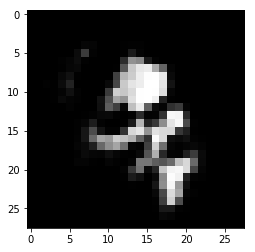

Loop: 59100, Generator_loss: -0.015321, Discriminator_loss: 0.011141
Loop: 59200, Generator_loss: -0.017102, Discriminator_loss: 0.012814
Loop: 59300, Generator_loss: -0.01168, Discriminator_loss: 0.010915
Loop: 59400, Generator_loss: -0.015667, Discriminator_loss: 0.012884
Loop: 59500, Generator_loss: -0.015582, Discriminator_loss: 0.0097189
Loop: 59600, Generator_loss: -0.011852, Discriminator_loss: 0.0105
Loop: 59700, Generator_loss: -0.014145, Discriminator_loss: 0.010158
Loop: 59800, Generator_loss: -0.01728, Discriminator_loss: 0.010468
Loop: 59900, Generator_loss: -0.0181, Discriminator_loss: 0.0075151
Loop: 60000, Generator_loss: -0.016893, Discriminator_loss: 0.010067


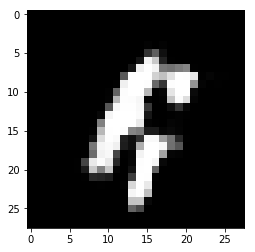

Loop: 60100, Generator_loss: -0.014728, Discriminator_loss: 0.014339
Loop: 60200, Generator_loss: -0.017954, Discriminator_loss: 0.011535
Loop: 60300, Generator_loss: -0.018998, Discriminator_loss: 0.0096631
Loop: 60400, Generator_loss: -0.015313, Discriminator_loss: 0.011747
Loop: 60500, Generator_loss: -0.013337, Discriminator_loss: 0.0099062
Loop: 60600, Generator_loss: -0.020389, Discriminator_loss: 0.0099017
Loop: 60700, Generator_loss: -0.018151, Discriminator_loss: 0.0093476
Loop: 60800, Generator_loss: -0.015704, Discriminator_loss: 0.011906
Loop: 60900, Generator_loss: -0.013439, Discriminator_loss: 0.0072778
Loop: 61000, Generator_loss: -0.012609, Discriminator_loss: 0.010914


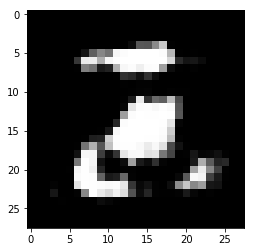

Loop: 61100, Generator_loss: -0.01674, Discriminator_loss: 0.010134
Loop: 61200, Generator_loss: -0.012939, Discriminator_loss: 0.0090898
Loop: 61300, Generator_loss: -0.01637, Discriminator_loss: 0.010418
Loop: 61400, Generator_loss: -0.016882, Discriminator_loss: 0.010391
Loop: 61500, Generator_loss: -0.018729, Discriminator_loss: 0.01028
Loop: 61600, Generator_loss: -0.014323, Discriminator_loss: 0.0098234
Loop: 61700, Generator_loss: -0.018658, Discriminator_loss: 0.0097577
Loop: 61800, Generator_loss: -0.014978, Discriminator_loss: 0.013277
Loop: 61900, Generator_loss: -0.013875, Discriminator_loss: 0.0083121
Loop: 62000, Generator_loss: -0.016975, Discriminator_loss: 0.010482


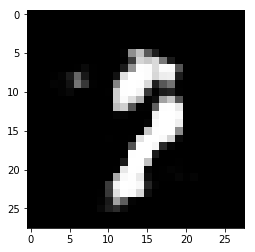

Loop: 62100, Generator_loss: -0.015325, Discriminator_loss: 0.008772
Loop: 62200, Generator_loss: -0.01577, Discriminator_loss: 0.010921
Loop: 62300, Generator_loss: -0.0094641, Discriminator_loss: 0.0097028
Loop: 62400, Generator_loss: -0.010269, Discriminator_loss: 0.010695
Loop: 62500, Generator_loss: -0.013651, Discriminator_loss: 0.010047
Loop: 62600, Generator_loss: -0.015169, Discriminator_loss: 0.011015
Loop: 62700, Generator_loss: -0.012233, Discriminator_loss: 0.0088129
Loop: 62800, Generator_loss: -0.011494, Discriminator_loss: 0.011341
Loop: 62900, Generator_loss: -0.012883, Discriminator_loss: 0.0055664
Loop: 63000, Generator_loss: -0.016543, Discriminator_loss: 0.0097761


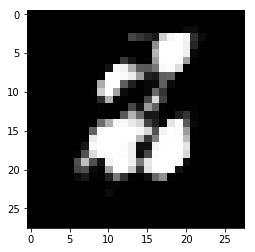

Loop: 63100, Generator_loss: -0.013527, Discriminator_loss: 0.012316
Loop: 63200, Generator_loss: -0.01316, Discriminator_loss: 0.011474
Loop: 63300, Generator_loss: -0.011493, Discriminator_loss: 0.008162
Loop: 63400, Generator_loss: -0.01401, Discriminator_loss: 0.012388
Loop: 63500, Generator_loss: -0.016607, Discriminator_loss: 0.011025
Loop: 63600, Generator_loss: -0.010762, Discriminator_loss: 0.0093146
Loop: 63700, Generator_loss: -0.010955, Discriminator_loss: 0.012767
Loop: 63800, Generator_loss: -0.018135, Discriminator_loss: 0.010812
Loop: 63900, Generator_loss: -0.0127, Discriminator_loss: 0.010457
Loop: 64000, Generator_loss: -0.013553, Discriminator_loss: 0.011644


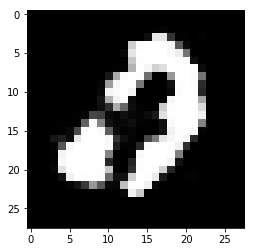

Loop: 64100, Generator_loss: -0.020282, Discriminator_loss: 0.01211
Loop: 64200, Generator_loss: -0.010219, Discriminator_loss: 0.010879
Loop: 64300, Generator_loss: -0.018044, Discriminator_loss: 0.010058
Loop: 64400, Generator_loss: -0.011876, Discriminator_loss: 0.0088808
Loop: 64500, Generator_loss: -0.014232, Discriminator_loss: 0.0082964
Loop: 64600, Generator_loss: -0.014298, Discriminator_loss: 0.011471
Loop: 64700, Generator_loss: -0.01654, Discriminator_loss: 0.010923
Loop: 64800, Generator_loss: -0.01361, Discriminator_loss: 0.0094224
Loop: 64900, Generator_loss: -0.015861, Discriminator_loss: 0.0073517
Loop: 65000, Generator_loss: -0.01622, Discriminator_loss: 0.0084863


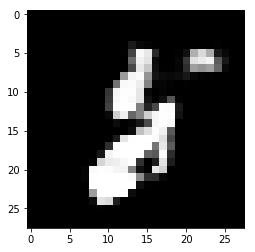

Loop: 65100, Generator_loss: -0.016669, Discriminator_loss: 0.0098333
Loop: 65200, Generator_loss: -0.015351, Discriminator_loss: 0.0091595
Loop: 65300, Generator_loss: -0.018384, Discriminator_loss: 0.011172
Loop: 65400, Generator_loss: -0.015829, Discriminator_loss: 0.01233
Loop: 65500, Generator_loss: -0.012192, Discriminator_loss: 0.0089149
Loop: 65600, Generator_loss: -0.013817, Discriminator_loss: 0.011481
Loop: 65700, Generator_loss: -0.0199, Discriminator_loss: 0.010843
Loop: 65800, Generator_loss: -0.015173, Discriminator_loss: 0.0092863
Loop: 65900, Generator_loss: -0.021609, Discriminator_loss: 0.0082709
Loop: 66000, Generator_loss: -0.016156, Discriminator_loss: 0.008445


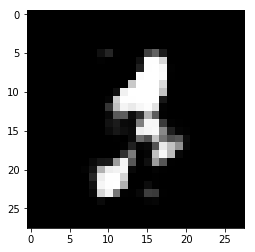

Loop: 66100, Generator_loss: -0.015586, Discriminator_loss: 0.011359
Loop: 66200, Generator_loss: -0.015831, Discriminator_loss: 0.011247
Loop: 66300, Generator_loss: -0.010632, Discriminator_loss: 0.01191
Loop: 66400, Generator_loss: -0.017519, Discriminator_loss: 0.011563
Loop: 66500, Generator_loss: -0.014549, Discriminator_loss: 0.0091323
Loop: 66600, Generator_loss: -0.016834, Discriminator_loss: 0.011603
Loop: 66700, Generator_loss: -0.016737, Discriminator_loss: 0.0097682
Loop: 66800, Generator_loss: -0.014273, Discriminator_loss: 0.011533
Loop: 66900, Generator_loss: -0.018307, Discriminator_loss: 0.010164
Loop: 67000, Generator_loss: -0.016644, Discriminator_loss: 0.011442


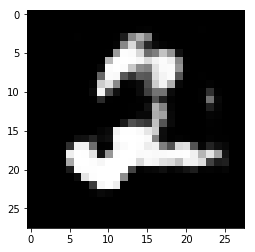

Loop: 67100, Generator_loss: -0.011568, Discriminator_loss: 0.011887
Loop: 67200, Generator_loss: -0.01515, Discriminator_loss: 0.010885
Loop: 67300, Generator_loss: -0.016353, Discriminator_loss: 0.010642
Loop: 67400, Generator_loss: -0.013119, Discriminator_loss: 0.010448
Loop: 67500, Generator_loss: -0.012116, Discriminator_loss: 0.010418
Loop: 67600, Generator_loss: -0.015045, Discriminator_loss: 0.010353
Loop: 67700, Generator_loss: -0.016998, Discriminator_loss: 0.0059976
Loop: 67800, Generator_loss: -0.016091, Discriminator_loss: 0.0067009
Loop: 67900, Generator_loss: -0.011065, Discriminator_loss: 0.0092104
Loop: 68000, Generator_loss: -0.017283, Discriminator_loss: 0.0091192


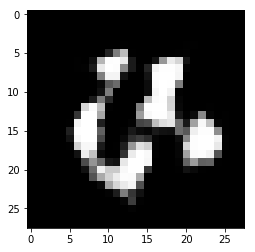

Loop: 68100, Generator_loss: -0.015762, Discriminator_loss: 0.0081592
Loop: 68200, Generator_loss: -0.016094, Discriminator_loss: 0.0097967
Loop: 68300, Generator_loss: -0.015266, Discriminator_loss: 0.010439
Loop: 68400, Generator_loss: -0.01809, Discriminator_loss: 0.012741
Loop: 68500, Generator_loss: -0.017509, Discriminator_loss: 0.010259
Loop: 68600, Generator_loss: -0.012955, Discriminator_loss: 0.0087091
Loop: 68700, Generator_loss: -0.018405, Discriminator_loss: 0.0057877
Loop: 68800, Generator_loss: -0.018689, Discriminator_loss: 0.010957
Loop: 68900, Generator_loss: -0.012337, Discriminator_loss: 0.010613
Loop: 69000, Generator_loss: -0.014842, Discriminator_loss: 0.010622


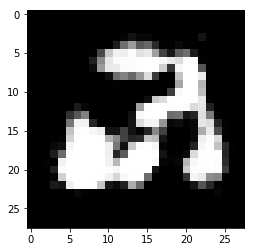

Loop: 69100, Generator_loss: -0.015049, Discriminator_loss: 0.011826
Loop: 69200, Generator_loss: -0.016984, Discriminator_loss: 0.0098848
Loop: 69300, Generator_loss: -0.0063442, Discriminator_loss: 0.007193
Loop: 69400, Generator_loss: -0.011648, Discriminator_loss: 0.007697
Loop: 69500, Generator_loss: -0.015632, Discriminator_loss: 0.009453
Loop: 69600, Generator_loss: -0.014627, Discriminator_loss: 0.0095003
Loop: 69700, Generator_loss: -0.012969, Discriminator_loss: 0.009308
Loop: 69800, Generator_loss: -0.015574, Discriminator_loss: 0.0088387
Loop: 69900, Generator_loss: -0.01432, Discriminator_loss: 0.010711
Loop: 70000, Generator_loss: -0.016273, Discriminator_loss: 0.0086729


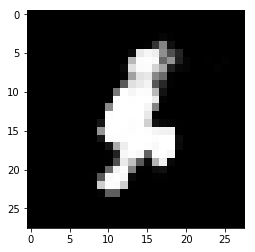

Loop: 70100, Generator_loss: -0.01489, Discriminator_loss: 0.0076059
Loop: 70200, Generator_loss: -0.016753, Discriminator_loss: 0.0093892
Loop: 70300, Generator_loss: -0.014416, Discriminator_loss: 0.011059
Loop: 70400, Generator_loss: -0.016658, Discriminator_loss: 0.010286
Loop: 70500, Generator_loss: -0.01009, Discriminator_loss: 0.0076701
Loop: 70600, Generator_loss: -0.016798, Discriminator_loss: 0.0092744
Loop: 70700, Generator_loss: -0.014017, Discriminator_loss: 0.010789
Loop: 70800, Generator_loss: -0.016629, Discriminator_loss: 0.0093975
Loop: 70900, Generator_loss: -0.017223, Discriminator_loss: 0.012829
Loop: 71000, Generator_loss: -0.013306, Discriminator_loss: 0.0081842


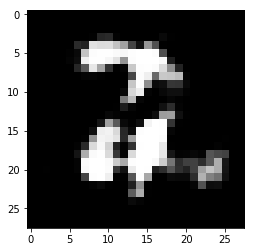

Loop: 71100, Generator_loss: -0.014183, Discriminator_loss: 0.010842
Loop: 71200, Generator_loss: -0.01824, Discriminator_loss: 0.0095857
Loop: 71300, Generator_loss: -0.014066, Discriminator_loss: 0.012795
Loop: 71400, Generator_loss: -0.015676, Discriminator_loss: 0.0088357
Loop: 71500, Generator_loss: -0.01246, Discriminator_loss: 0.0072934
Loop: 71600, Generator_loss: -0.0098573, Discriminator_loss: 0.0091138
Loop: 71700, Generator_loss: -0.020616, Discriminator_loss: 0.0090786
Loop: 71800, Generator_loss: -0.014877, Discriminator_loss: 0.0081659
Loop: 71900, Generator_loss: -0.010227, Discriminator_loss: 0.0091145
Loop: 72000, Generator_loss: -0.014024, Discriminator_loss: 0.011599


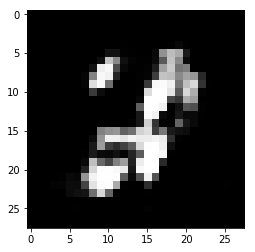

Loop: 72100, Generator_loss: -0.011281, Discriminator_loss: 0.008883
Loop: 72200, Generator_loss: -0.01612, Discriminator_loss: 0.0098673
Loop: 72300, Generator_loss: -0.019018, Discriminator_loss: 0.0088989
Loop: 72400, Generator_loss: -0.018526, Discriminator_loss: 0.0099968
Loop: 72500, Generator_loss: -0.013175, Discriminator_loss: 0.0097999
Loop: 72600, Generator_loss: -0.014584, Discriminator_loss: 0.0097174
Loop: 72700, Generator_loss: -0.015628, Discriminator_loss: 0.0097759
Loop: 72800, Generator_loss: -0.014133, Discriminator_loss: 0.010141
Loop: 72900, Generator_loss: -0.015559, Discriminator_loss: 0.0075156
Loop: 73000, Generator_loss: -0.01275, Discriminator_loss: 0.012495


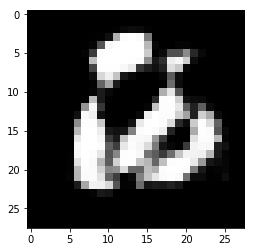

Loop: 73100, Generator_loss: -0.011338, Discriminator_loss: 0.0092876
Loop: 73200, Generator_loss: -0.013812, Discriminator_loss: 0.0096293
Loop: 73300, Generator_loss: -0.01419, Discriminator_loss: 0.01005
Loop: 73400, Generator_loss: -0.017269, Discriminator_loss: 0.011013
Loop: 73500, Generator_loss: -0.015515, Discriminator_loss: 0.0088609
Loop: 73600, Generator_loss: -0.014372, Discriminator_loss: 0.0094948
Loop: 73700, Generator_loss: -0.011692, Discriminator_loss: 0.0060735
Loop: 73800, Generator_loss: -0.015736, Discriminator_loss: 0.01021
Loop: 73900, Generator_loss: -0.014703, Discriminator_loss: 0.0079328
Loop: 74000, Generator_loss: -0.018897, Discriminator_loss: 0.010619


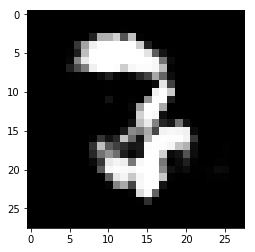

Loop: 74100, Generator_loss: -0.017173, Discriminator_loss: 0.012439
Loop: 74200, Generator_loss: -0.015739, Discriminator_loss: 0.011058
Loop: 74300, Generator_loss: -0.014442, Discriminator_loss: 0.010372
Loop: 74400, Generator_loss: -0.012664, Discriminator_loss: 0.0078456
Loop: 74500, Generator_loss: -0.009975, Discriminator_loss: 0.011284
Loop: 74600, Generator_loss: -0.011913, Discriminator_loss: 0.0076102
Loop: 74700, Generator_loss: -0.012636, Discriminator_loss: 0.010295
Loop: 74800, Generator_loss: -0.015299, Discriminator_loss: 0.0093123
Loop: 74900, Generator_loss: -0.013585, Discriminator_loss: 0.0097324
Loop: 75000, Generator_loss: -0.013535, Discriminator_loss: 0.0075784


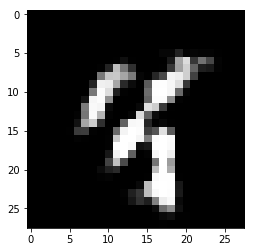

Loop: 75100, Generator_loss: -0.012962, Discriminator_loss: 0.0094556
Loop: 75200, Generator_loss: -0.015153, Discriminator_loss: 0.0083493
Loop: 75300, Generator_loss: -0.012943, Discriminator_loss: 0.0091425
Loop: 75400, Generator_loss: -0.015401, Discriminator_loss: 0.0072643
Loop: 75500, Generator_loss: -0.011402, Discriminator_loss: 0.01047
Loop: 75600, Generator_loss: -0.012387, Discriminator_loss: 0.008727
Loop: 75700, Generator_loss: -0.011966, Discriminator_loss: 0.010212
Loop: 75800, Generator_loss: -0.015461, Discriminator_loss: 0.011699
Loop: 75900, Generator_loss: -0.011164, Discriminator_loss: 0.010462
Loop: 76000, Generator_loss: -0.011734, Discriminator_loss: 0.0089468


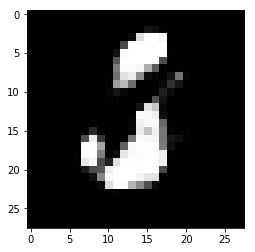

Loop: 76100, Generator_loss: -0.013513, Discriminator_loss: 0.0086366
Loop: 76200, Generator_loss: -0.018064, Discriminator_loss: 0.0084545
Loop: 76300, Generator_loss: -0.012332, Discriminator_loss: 0.0091903
Loop: 76400, Generator_loss: -0.015305, Discriminator_loss: 0.0090335
Loop: 76500, Generator_loss: -0.011422, Discriminator_loss: 0.0075832
Loop: 76600, Generator_loss: -0.012453, Discriminator_loss: 0.0081048
Loop: 76700, Generator_loss: -0.012249, Discriminator_loss: 0.0091522
Loop: 76800, Generator_loss: -0.011723, Discriminator_loss: 0.0095539
Loop: 76900, Generator_loss: -0.012136, Discriminator_loss: 0.014414
Loop: 77000, Generator_loss: -0.017241, Discriminator_loss: 0.010294


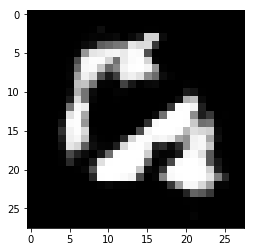

Loop: 77100, Generator_loss: -0.017468, Discriminator_loss: 0.011813
Loop: 77200, Generator_loss: -0.015195, Discriminator_loss: 0.0088198
Loop: 77300, Generator_loss: -0.010585, Discriminator_loss: 0.0077343
Loop: 77400, Generator_loss: -0.014825, Discriminator_loss: 0.008734
Loop: 77500, Generator_loss: -0.011146, Discriminator_loss: 0.0088368
Loop: 77600, Generator_loss: -0.013403, Discriminator_loss: 0.0090883
Loop: 77700, Generator_loss: -0.015808, Discriminator_loss: 0.011138
Loop: 77800, Generator_loss: -0.013221, Discriminator_loss: 0.0092513
Loop: 77900, Generator_loss: -0.011879, Discriminator_loss: 0.0087988
Loop: 78000, Generator_loss: -0.013573, Discriminator_loss: 0.0088357


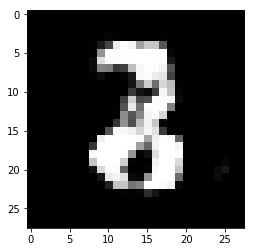

Loop: 78100, Generator_loss: -0.012076, Discriminator_loss: 0.0085778
Loop: 78200, Generator_loss: -0.013006, Discriminator_loss: 0.0079074
Loop: 78300, Generator_loss: -0.0097615, Discriminator_loss: 0.010512
Loop: 78400, Generator_loss: -0.011079, Discriminator_loss: 0.010384
Loop: 78500, Generator_loss: -0.017778, Discriminator_loss: 0.0086491
Loop: 78600, Generator_loss: -0.011347, Discriminator_loss: 0.0082889
Loop: 78700, Generator_loss: -0.013371, Discriminator_loss: 0.012533
Loop: 78800, Generator_loss: -0.016109, Discriminator_loss: 0.010298
Loop: 78900, Generator_loss: -0.011203, Discriminator_loss: 0.008998
Loop: 79000, Generator_loss: -0.0095133, Discriminator_loss: 0.0098058


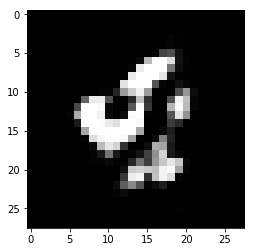

Loop: 79100, Generator_loss: -0.011334, Discriminator_loss: 0.0075213
Loop: 79200, Generator_loss: -0.01399, Discriminator_loss: 0.010268
Loop: 79300, Generator_loss: -0.014547, Discriminator_loss: 0.0079025
Loop: 79400, Generator_loss: -0.011995, Discriminator_loss: 0.0097275
Loop: 79500, Generator_loss: -0.015102, Discriminator_loss: 0.0094254
Loop: 79600, Generator_loss: -0.011908, Discriminator_loss: 0.0093076
Loop: 79700, Generator_loss: -0.010436, Discriminator_loss: 0.008748
Loop: 79800, Generator_loss: -0.014519, Discriminator_loss: 0.0090962
Loop: 79900, Generator_loss: -0.010442, Discriminator_loss: 0.0072553
Loop: 80000, Generator_loss: -0.014567, Discriminator_loss: 0.0088861


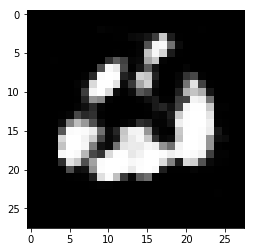

Loop: 80100, Generator_loss: -0.012324, Discriminator_loss: 0.008495
Loop: 80200, Generator_loss: -0.01005, Discriminator_loss: 0.0098023
Loop: 80300, Generator_loss: -0.01351, Discriminator_loss: 0.0095528
Loop: 80400, Generator_loss: -0.015447, Discriminator_loss: 0.0084204
Loop: 80500, Generator_loss: -0.017148, Discriminator_loss: 0.010051
Loop: 80600, Generator_loss: -0.0094766, Discriminator_loss: 0.0082442
Loop: 80700, Generator_loss: -0.015775, Discriminator_loss: 0.0096224
Loop: 80800, Generator_loss: -0.010523, Discriminator_loss: 0.01012
Loop: 80900, Generator_loss: -0.009372, Discriminator_loss: 0.008156
Loop: 81000, Generator_loss: -0.011062, Discriminator_loss: 0.0077035


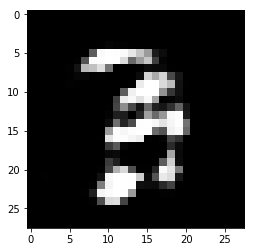

Loop: 81100, Generator_loss: -0.016163, Discriminator_loss: 0.0076222
Loop: 81200, Generator_loss: -0.011246, Discriminator_loss: 0.0080034
Loop: 81300, Generator_loss: -0.013512, Discriminator_loss: 0.0088805
Loop: 81400, Generator_loss: -0.010954, Discriminator_loss: 0.0081057
Loop: 81500, Generator_loss: -0.0074332, Discriminator_loss: 0.010325
Loop: 81600, Generator_loss: -0.014625, Discriminator_loss: 0.0080251
Loop: 81700, Generator_loss: -0.01202, Discriminator_loss: 0.00639
Loop: 81800, Generator_loss: -0.010293, Discriminator_loss: 0.010746
Loop: 81900, Generator_loss: -0.014301, Discriminator_loss: 0.006676
Loop: 82000, Generator_loss: -0.019938, Discriminator_loss: 0.009104


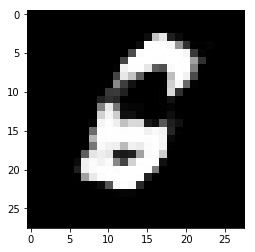

Loop: 82100, Generator_loss: -0.015237, Discriminator_loss: 0.008448
Loop: 82200, Generator_loss: -0.015056, Discriminator_loss: 0.0072744
Loop: 82300, Generator_loss: -0.012704, Discriminator_loss: 0.0086395
Loop: 82400, Generator_loss: -0.013644, Discriminator_loss: 0.007378
Loop: 82500, Generator_loss: -0.011488, Discriminator_loss: 0.009332
Loop: 82600, Generator_loss: -0.010669, Discriminator_loss: 0.0096612
Loop: 82700, Generator_loss: -0.010579, Discriminator_loss: 0.0093093
Loop: 82800, Generator_loss: -0.011734, Discriminator_loss: 0.0083796
Loop: 82900, Generator_loss: -0.014102, Discriminator_loss: 0.0099787
Loop: 83000, Generator_loss: -0.011281, Discriminator_loss: 0.010387


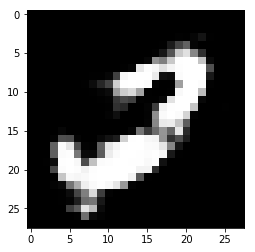

Loop: 83100, Generator_loss: -0.01603, Discriminator_loss: 0.0068896
Loop: 83200, Generator_loss: -0.012553, Discriminator_loss: 0.0096135
Loop: 83300, Generator_loss: -0.011821, Discriminator_loss: 0.010992
Loop: 83400, Generator_loss: -0.012301, Discriminator_loss: 0.00872
Loop: 83500, Generator_loss: -0.011247, Discriminator_loss: 0.0073685
Loop: 83600, Generator_loss: -0.010501, Discriminator_loss: 0.0088203
Loop: 83700, Generator_loss: -0.015328, Discriminator_loss: 0.01018
Loop: 83800, Generator_loss: -0.011035, Discriminator_loss: 0.0084626
Loop: 83900, Generator_loss: -0.0080075, Discriminator_loss: 0.010416
Loop: 84000, Generator_loss: -0.011556, Discriminator_loss: 0.006931


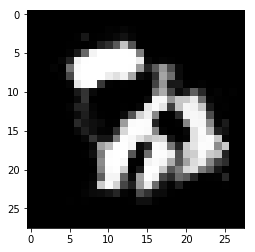

Loop: 84100, Generator_loss: -0.015862, Discriminator_loss: 0.010422
Loop: 84200, Generator_loss: -0.016991, Discriminator_loss: 0.010201
Loop: 84300, Generator_loss: -0.01389, Discriminator_loss: 0.0088474
Loop: 84400, Generator_loss: -0.016712, Discriminator_loss: 0.0067854
Loop: 84500, Generator_loss: -0.0085073, Discriminator_loss: 0.0089775
Loop: 84600, Generator_loss: -0.014689, Discriminator_loss: 0.0089891
Loop: 84700, Generator_loss: -0.015851, Discriminator_loss: 0.011331
Loop: 84800, Generator_loss: -0.014405, Discriminator_loss: 0.0087525
Loop: 84900, Generator_loss: -0.015889, Discriminator_loss: 0.0067882
Loop: 85000, Generator_loss: -0.010715, Discriminator_loss: 0.011049


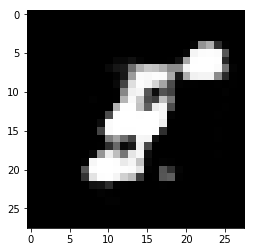

Loop: 85100, Generator_loss: -0.010842, Discriminator_loss: 0.0073507
Loop: 85200, Generator_loss: -0.01091, Discriminator_loss: 0.010719
Loop: 85300, Generator_loss: -0.012252, Discriminator_loss: 0.0084439
Loop: 85400, Generator_loss: -0.013471, Discriminator_loss: 0.0082548
Loop: 85500, Generator_loss: -0.013536, Discriminator_loss: 0.011115
Loop: 85600, Generator_loss: -0.012417, Discriminator_loss: 0.0080753
Loop: 85700, Generator_loss: -0.011479, Discriminator_loss: 0.0086843
Loop: 85800, Generator_loss: -0.012119, Discriminator_loss: 0.0075
Loop: 85900, Generator_loss: -0.01422, Discriminator_loss: 0.0085517
Loop: 86000, Generator_loss: -0.01319, Discriminator_loss: 0.0070412


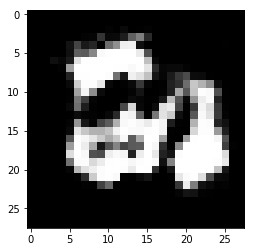

Loop: 86100, Generator_loss: -0.0087397, Discriminator_loss: 0.0090967
Loop: 86200, Generator_loss: -0.011962, Discriminator_loss: 0.0054324
Loop: 86300, Generator_loss: -0.012709, Discriminator_loss: 0.011483
Loop: 86400, Generator_loss: -0.016004, Discriminator_loss: 0.0091834
Loop: 86500, Generator_loss: -0.013205, Discriminator_loss: 0.0075414
Loop: 86600, Generator_loss: -0.011663, Discriminator_loss: 0.012476
Loop: 86700, Generator_loss: -0.008599, Discriminator_loss: 0.010423
Loop: 86800, Generator_loss: -0.015853, Discriminator_loss: 0.0086126
Loop: 86900, Generator_loss: -0.0096137, Discriminator_loss: 0.0092642
Loop: 87000, Generator_loss: -0.010721, Discriminator_loss: 0.0095854


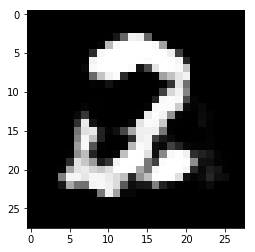

Loop: 87100, Generator_loss: -0.014387, Discriminator_loss: 0.0094067
Loop: 87200, Generator_loss: -0.011364, Discriminator_loss: 0.0091005
Loop: 87300, Generator_loss: -0.011638, Discriminator_loss: 0.0069054
Loop: 87400, Generator_loss: -0.0099032, Discriminator_loss: 0.0090975
Loop: 87500, Generator_loss: -0.015484, Discriminator_loss: 0.0080103
Loop: 87600, Generator_loss: -0.0074273, Discriminator_loss: 0.0085849
Loop: 87700, Generator_loss: -0.014349, Discriminator_loss: 0.010042
Loop: 87800, Generator_loss: -0.01241, Discriminator_loss: 0.0089781
Loop: 87900, Generator_loss: -0.012361, Discriminator_loss: 0.0078693
Loop: 88000, Generator_loss: -0.014771, Discriminator_loss: 0.0080333


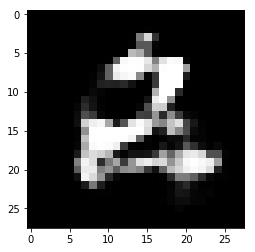

Loop: 88100, Generator_loss: -0.012279, Discriminator_loss: 0.0087708
Loop: 88200, Generator_loss: -0.0080664, Discriminator_loss: 0.0089179
Loop: 88300, Generator_loss: -0.0088568, Discriminator_loss: 0.0090123
Loop: 88400, Generator_loss: -0.01107, Discriminator_loss: 0.0093492
Loop: 88500, Generator_loss: -0.010363, Discriminator_loss: 0.0067089
Loop: 88600, Generator_loss: -0.012842, Discriminator_loss: 0.0088953
Loop: 88700, Generator_loss: -0.0075703, Discriminator_loss: 0.0093596
Loop: 88800, Generator_loss: -0.013454, Discriminator_loss: 0.009326
Loop: 88900, Generator_loss: -0.010015, Discriminator_loss: 0.0095363
Loop: 89000, Generator_loss: -0.015981, Discriminator_loss: 0.0089446


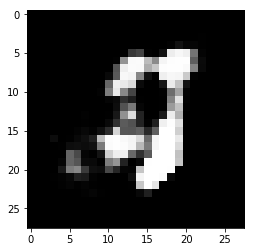

Loop: 89100, Generator_loss: -0.012894, Discriminator_loss: 0.0080575
Loop: 89200, Generator_loss: -0.014798, Discriminator_loss: 0.0064639
Loop: 89300, Generator_loss: -0.012222, Discriminator_loss: 0.0075464
Loop: 89400, Generator_loss: -0.011403, Discriminator_loss: 0.011062
Loop: 89500, Generator_loss: -0.020007, Discriminator_loss: 0.01004
Loop: 89600, Generator_loss: -0.011056, Discriminator_loss: 0.0062304
Loop: 89700, Generator_loss: -0.015744, Discriminator_loss: 0.0094691
Loop: 89800, Generator_loss: -0.012083, Discriminator_loss: 0.0073595
Loop: 89900, Generator_loss: -0.011347, Discriminator_loss: 0.0096347
Loop: 90000, Generator_loss: -0.012388, Discriminator_loss: 0.0088383


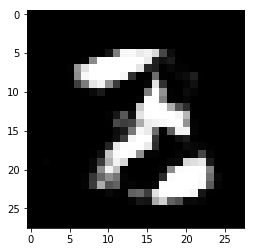

Loop: 90100, Generator_loss: -0.011826, Discriminator_loss: 0.0085933
Loop: 90200, Generator_loss: -0.010193, Discriminator_loss: 0.011603
Loop: 90300, Generator_loss: -0.010483, Discriminator_loss: 0.010456
Loop: 90400, Generator_loss: -0.0070623, Discriminator_loss: 0.010103
Loop: 90500, Generator_loss: -0.010054, Discriminator_loss: 0.010719
Loop: 90600, Generator_loss: -0.010642, Discriminator_loss: 0.009071
Loop: 90700, Generator_loss: -0.015432, Discriminator_loss: 0.0091718
Loop: 90800, Generator_loss: -0.013746, Discriminator_loss: 0.0069613
Loop: 90900, Generator_loss: -0.0066626, Discriminator_loss: 0.0067471
Loop: 91000, Generator_loss: -0.012436, Discriminator_loss: 0.0094856


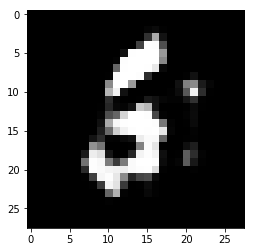

Loop: 91100, Generator_loss: -0.014044, Discriminator_loss: 0.0062361
Loop: 91200, Generator_loss: -0.011547, Discriminator_loss: 0.007073
Loop: 91300, Generator_loss: -0.010926, Discriminator_loss: 0.0085278
Loop: 91400, Generator_loss: -0.012576, Discriminator_loss: 0.008629
Loop: 91500, Generator_loss: -0.011106, Discriminator_loss: 0.0091914
Loop: 91600, Generator_loss: -0.014181, Discriminator_loss: 0.010055
Loop: 91700, Generator_loss: -0.011922, Discriminator_loss: 0.0090242
Loop: 91800, Generator_loss: -0.013374, Discriminator_loss: 0.0087936
Loop: 91900, Generator_loss: -0.0085314, Discriminator_loss: 0.0072975
Loop: 92000, Generator_loss: -0.016145, Discriminator_loss: 0.0090247


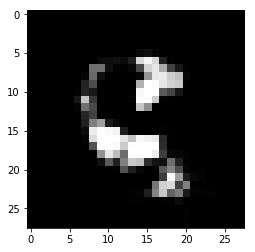

Loop: 92100, Generator_loss: -0.013201, Discriminator_loss: 0.012245
Loop: 92200, Generator_loss: -0.0097698, Discriminator_loss: 0.0093481
Loop: 92300, Generator_loss: -0.012987, Discriminator_loss: 0.0082648
Loop: 92400, Generator_loss: -0.0089508, Discriminator_loss: 0.0091812
Loop: 92500, Generator_loss: -0.01092, Discriminator_loss: 0.010351
Loop: 92600, Generator_loss: -0.014171, Discriminator_loss: 0.0075594
Loop: 92700, Generator_loss: -0.012424, Discriminator_loss: 0.0088611
Loop: 92800, Generator_loss: -0.010344, Discriminator_loss: 0.006667
Loop: 92900, Generator_loss: -0.014966, Discriminator_loss: 0.0071344
Loop: 93000, Generator_loss: -0.010226, Discriminator_loss: 0.0099479


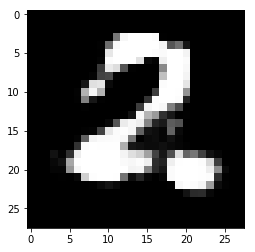

Loop: 93100, Generator_loss: -0.010103, Discriminator_loss: 0.0092263
Loop: 93200, Generator_loss: -0.011618, Discriminator_loss: 0.01029
Loop: 93300, Generator_loss: -0.013062, Discriminator_loss: 0.0061779
Loop: 93400, Generator_loss: -0.01053, Discriminator_loss: 0.0077901
Loop: 93500, Generator_loss: -0.010029, Discriminator_loss: 0.008355
Loop: 93600, Generator_loss: -0.012506, Discriminator_loss: 0.0077309
Loop: 93700, Generator_loss: -0.012355, Discriminator_loss: 0.0076768
Loop: 93800, Generator_loss: -0.0076118, Discriminator_loss: 0.0085638
Loop: 93900, Generator_loss: -0.01002, Discriminator_loss: 0.0069311
Loop: 94000, Generator_loss: -0.011458, Discriminator_loss: 0.0091314


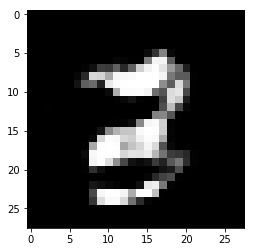

Loop: 94100, Generator_loss: -0.010476, Discriminator_loss: 0.0092723
Loop: 94200, Generator_loss: -0.011634, Discriminator_loss: 0.0087543
Loop: 94300, Generator_loss: -0.012064, Discriminator_loss: 0.011599
Loop: 94400, Generator_loss: -0.013484, Discriminator_loss: 0.0077485
Loop: 94500, Generator_loss: -0.011328, Discriminator_loss: 0.010837
Loop: 94600, Generator_loss: -0.0071525, Discriminator_loss: 0.0095311
Loop: 94700, Generator_loss: -0.010653, Discriminator_loss: 0.0084469
Loop: 94800, Generator_loss: -0.011087, Discriminator_loss: 0.0078456
Loop: 94900, Generator_loss: -0.009891, Discriminator_loss: 0.008553
Loop: 95000, Generator_loss: -0.015699, Discriminator_loss: 0.0079896


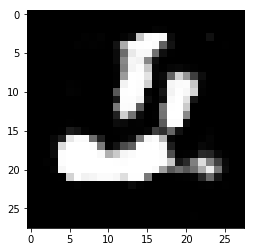

Loop: 95100, Generator_loss: -0.01019, Discriminator_loss: 0.0094841
Loop: 95200, Generator_loss: -0.0093425, Discriminator_loss: 0.01063
Loop: 95300, Generator_loss: -0.010408, Discriminator_loss: 0.0049603
Loop: 95400, Generator_loss: -0.013098, Discriminator_loss: 0.0090663
Loop: 95500, Generator_loss: -0.011537, Discriminator_loss: 0.0086489
Loop: 95600, Generator_loss: -0.010545, Discriminator_loss: 0.00902
Loop: 95700, Generator_loss: -0.0058043, Discriminator_loss: 0.006321
Loop: 95800, Generator_loss: -0.016446, Discriminator_loss: 0.0075963
Loop: 95900, Generator_loss: -0.014865, Discriminator_loss: 0.006598
Loop: 96000, Generator_loss: -0.011046, Discriminator_loss: 0.0082173


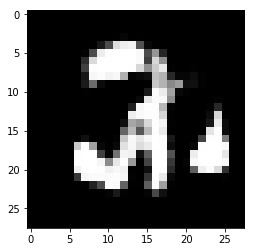

Loop: 96100, Generator_loss: -0.010503, Discriminator_loss: 0.0096115
Loop: 96200, Generator_loss: -0.008277, Discriminator_loss: 0.0070667
Loop: 96300, Generator_loss: -0.0080936, Discriminator_loss: 0.0073987
Loop: 96400, Generator_loss: -0.011506, Discriminator_loss: 0.0084594
Loop: 96500, Generator_loss: -0.012299, Discriminator_loss: 0.0089042
Loop: 96600, Generator_loss: -0.011742, Discriminator_loss: 0.0095388
Loop: 96700, Generator_loss: -0.013706, Discriminator_loss: 0.01027
Loop: 96800, Generator_loss: -0.014588, Discriminator_loss: 0.011307
Loop: 96900, Generator_loss: -0.012249, Discriminator_loss: 0.0076954
Loop: 97000, Generator_loss: -0.012205, Discriminator_loss: 0.0081832


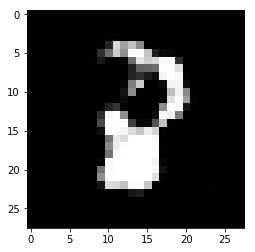

Loop: 97100, Generator_loss: -0.013204, Discriminator_loss: 0.0071812
Loop: 97200, Generator_loss: -0.012629, Discriminator_loss: 0.0073944
Loop: 97300, Generator_loss: -0.014311, Discriminator_loss: 0.010803
Loop: 97400, Generator_loss: -0.0087114, Discriminator_loss: 0.0091001
Loop: 97500, Generator_loss: -0.014094, Discriminator_loss: 0.0068215
Loop: 97600, Generator_loss: -0.0085579, Discriminator_loss: 0.0079569
Loop: 97700, Generator_loss: -0.0094346, Discriminator_loss: 0.0090953
Loop: 97800, Generator_loss: -0.010488, Discriminator_loss: 0.0079257
Loop: 97900, Generator_loss: -0.0085694, Discriminator_loss: 0.0091234
Loop: 98000, Generator_loss: -0.010362, Discriminator_loss: 0.0081111


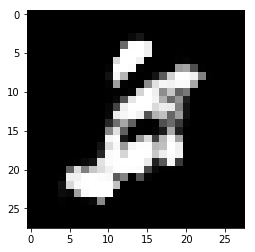

Loop: 98100, Generator_loss: -0.0098446, Discriminator_loss: 0.0084559
Loop: 98200, Generator_loss: -0.0099206, Discriminator_loss: 0.0076245
Loop: 98300, Generator_loss: -0.011706, Discriminator_loss: 0.0085587
Loop: 98400, Generator_loss: -0.015791, Discriminator_loss: 0.0098098
Loop: 98500, Generator_loss: -0.0097206, Discriminator_loss: 0.010307
Loop: 98600, Generator_loss: -0.017547, Discriminator_loss: 0.0092239
Loop: 98700, Generator_loss: -0.008233, Discriminator_loss: 0.0094883
Loop: 98800, Generator_loss: -0.011708, Discriminator_loss: 0.0061927
Loop: 98900, Generator_loss: -0.010476, Discriminator_loss: 0.010565
Loop: 99000, Generator_loss: -0.0062972, Discriminator_loss: 0.0078116


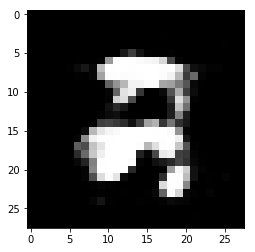

Loop: 99100, Generator_loss: -0.011924, Discriminator_loss: 0.0078624
Loop: 99200, Generator_loss: -0.010985, Discriminator_loss: 0.0062667
Loop: 99300, Generator_loss: -0.011145, Discriminator_loss: 0.0090241
Loop: 99400, Generator_loss: -0.0082565, Discriminator_loss: 0.0069954
Loop: 99500, Generator_loss: -0.012182, Discriminator_loss: 0.0088069
Loop: 99600, Generator_loss: -0.011058, Discriminator_loss: 0.0090776
Loop: 99700, Generator_loss: -0.013435, Discriminator_loss: 0.0075606
Loop: 99800, Generator_loss: -0.013559, Discriminator_loss: 0.0091144
Loop: 99900, Generator_loss: -0.012138, Discriminator_loss: 0.0081663
Loop: 100000, Generator_loss: -0.010961, Discriminator_loss: 0.010189


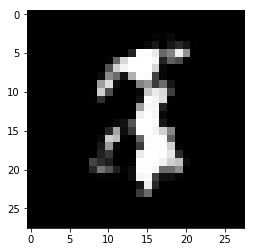

Loop: 100100, Generator_loss: -0.0099196, Discriminator_loss: 0.0085986
Loop: 100200, Generator_loss: -0.012464, Discriminator_loss: 0.0070477
Loop: 100300, Generator_loss: -0.005447, Discriminator_loss: 0.0083686
Loop: 100400, Generator_loss: -0.012822, Discriminator_loss: 0.0085444
Loop: 100500, Generator_loss: -0.0088166, Discriminator_loss: 0.0075669
Loop: 100600, Generator_loss: -0.011841, Discriminator_loss: 0.0085106
Loop: 100700, Generator_loss: -0.012112, Discriminator_loss: 0.008376
Loop: 100800, Generator_loss: -0.014586, Discriminator_loss: 0.010566
Loop: 100900, Generator_loss: -0.0099301, Discriminator_loss: 0.0076855
Loop: 101000, Generator_loss: -0.011768, Discriminator_loss: 0.0076316


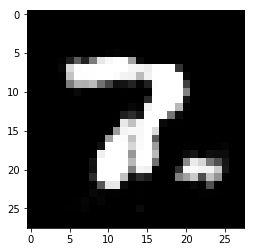

Loop: 101100, Generator_loss: -0.013523, Discriminator_loss: 0.0095727
Loop: 101200, Generator_loss: -0.0096026, Discriminator_loss: 0.0089023
Loop: 101300, Generator_loss: -0.011334, Discriminator_loss: 0.0056041
Loop: 101400, Generator_loss: -0.010083, Discriminator_loss: 0.0076956
Loop: 101500, Generator_loss: -0.012979, Discriminator_loss: 0.0083135
Loop: 101600, Generator_loss: -0.0081256, Discriminator_loss: 0.0074808
Loop: 101700, Generator_loss: -0.010197, Discriminator_loss: 0.005885
Loop: 101800, Generator_loss: -0.017546, Discriminator_loss: 0.010714
Loop: 101900, Generator_loss: -0.015537, Discriminator_loss: 0.0078109
Loop: 102000, Generator_loss: -0.011245, Discriminator_loss: 0.0078844


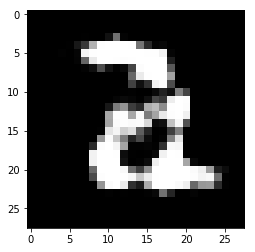

Loop: 102100, Generator_loss: -0.00801, Discriminator_loss: 0.0086051
Loop: 102200, Generator_loss: -0.014894, Discriminator_loss: 0.0068408
Loop: 102300, Generator_loss: -0.011639, Discriminator_loss: 0.0073068
Loop: 102400, Generator_loss: -0.012743, Discriminator_loss: 0.0078959
Loop: 102500, Generator_loss: -0.0116, Discriminator_loss: 0.0077888
Loop: 102600, Generator_loss: -0.0094591, Discriminator_loss: 0.0091644
Loop: 102700, Generator_loss: -0.01003, Discriminator_loss: 0.0076002
Loop: 102800, Generator_loss: -0.017099, Discriminator_loss: 0.0086236
Loop: 102900, Generator_loss: -0.014762, Discriminator_loss: 0.0078588
Loop: 103000, Generator_loss: -0.012381, Discriminator_loss: 0.0077537


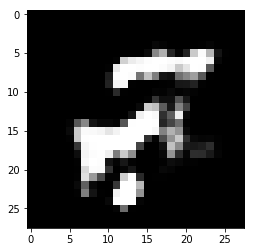

Loop: 103100, Generator_loss: -0.01738, Discriminator_loss: 0.010936
Loop: 103200, Generator_loss: -0.010458, Discriminator_loss: 0.0072487
Loop: 103300, Generator_loss: -0.010754, Discriminator_loss: 0.010968
Loop: 103400, Generator_loss: -0.0098215, Discriminator_loss: 0.0091318
Loop: 103500, Generator_loss: -0.016237, Discriminator_loss: 0.010675
Loop: 103600, Generator_loss: -0.014413, Discriminator_loss: 0.0088819
Loop: 103700, Generator_loss: -0.014173, Discriminator_loss: 0.0081756
Loop: 103800, Generator_loss: -0.014849, Discriminator_loss: 0.010618
Loop: 103900, Generator_loss: -0.01228, Discriminator_loss: 0.007386
Loop: 104000, Generator_loss: -0.010793, Discriminator_loss: 0.0080717


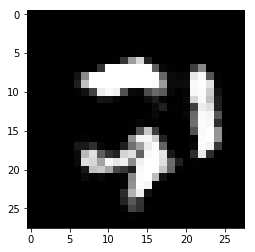

Loop: 104100, Generator_loss: -0.0096753, Discriminator_loss: 0.0079492
Loop: 104200, Generator_loss: -0.013524, Discriminator_loss: 0.00889
Loop: 104300, Generator_loss: -0.01052, Discriminator_loss: 0.0080389
Loop: 104400, Generator_loss: -0.01221, Discriminator_loss: 0.005801
Loop: 104500, Generator_loss: -0.013304, Discriminator_loss: 0.0084012
Loop: 104600, Generator_loss: -0.013562, Discriminator_loss: 0.009398
Loop: 104700, Generator_loss: -0.013065, Discriminator_loss: 0.0077726
Loop: 104800, Generator_loss: -0.0085421, Discriminator_loss: 0.0083277
Loop: 104900, Generator_loss: -0.011983, Discriminator_loss: 0.0064949
Loop: 105000, Generator_loss: -0.014705, Discriminator_loss: 0.0073121


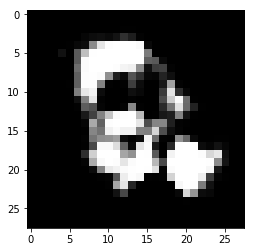

Loop: 105100, Generator_loss: -0.0092012, Discriminator_loss: 0.0085751
Loop: 105200, Generator_loss: -0.0098724, Discriminator_loss: 0.0066121
Loop: 105300, Generator_loss: -0.011142, Discriminator_loss: 0.0074569
Loop: 105400, Generator_loss: -0.0083229, Discriminator_loss: 0.0080772
Loop: 105500, Generator_loss: -0.015396, Discriminator_loss: 0.0097902
Loop: 105600, Generator_loss: -0.013901, Discriminator_loss: 0.0074798
Loop: 105700, Generator_loss: -0.010235, Discriminator_loss: 0.01003
Loop: 105800, Generator_loss: -0.0087607, Discriminator_loss: 0.0084764
Loop: 105900, Generator_loss: -0.014623, Discriminator_loss: 0.008834
Loop: 106000, Generator_loss: -0.014011, Discriminator_loss: 0.0058997


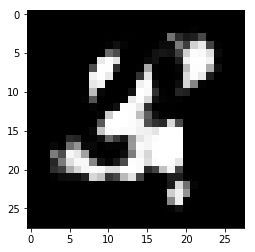

Loop: 106100, Generator_loss: -0.0085695, Discriminator_loss: 0.0080093
Loop: 106200, Generator_loss: -0.011389, Discriminator_loss: 0.0089718
Loop: 106300, Generator_loss: -0.016148, Discriminator_loss: 0.0083216
Loop: 106400, Generator_loss: -0.010895, Discriminator_loss: 0.0091732
Loop: 106500, Generator_loss: -0.014612, Discriminator_loss: 0.0077613
Loop: 106600, Generator_loss: -0.010661, Discriminator_loss: 0.010385
Loop: 106700, Generator_loss: -0.0096787, Discriminator_loss: 0.0079812
Loop: 106800, Generator_loss: -0.008301, Discriminator_loss: 0.0060882
Loop: 106900, Generator_loss: -0.015365, Discriminator_loss: 0.0098816
Loop: 107000, Generator_loss: -0.011141, Discriminator_loss: 0.0070206


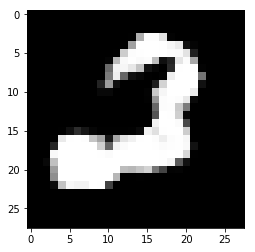

Loop: 107100, Generator_loss: -0.0096105, Discriminator_loss: 0.0070887
Loop: 107200, Generator_loss: -0.012833, Discriminator_loss: 0.0075218
Loop: 107300, Generator_loss: -0.014977, Discriminator_loss: 0.0091939
Loop: 107400, Generator_loss: -0.012502, Discriminator_loss: 0.0066163
Loop: 107500, Generator_loss: -0.015976, Discriminator_loss: 0.011774
Loop: 107600, Generator_loss: -0.011028, Discriminator_loss: 0.0082724
Loop: 107700, Generator_loss: -0.015477, Discriminator_loss: 0.0064804
Loop: 107800, Generator_loss: -0.010567, Discriminator_loss: 0.0083049
Loop: 107900, Generator_loss: -0.011153, Discriminator_loss: 0.007227
Loop: 108000, Generator_loss: -0.01692, Discriminator_loss: 0.0077824


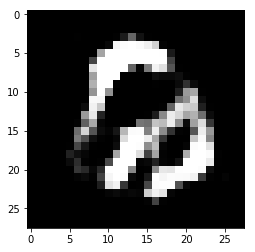

Loop: 108100, Generator_loss: -0.014473, Discriminator_loss: 0.0076866
Loop: 108200, Generator_loss: -0.010025, Discriminator_loss: 0.0076282
Loop: 108300, Generator_loss: -0.013974, Discriminator_loss: 0.0087223
Loop: 108400, Generator_loss: -0.010981, Discriminator_loss: 0.0093485
Loop: 108500, Generator_loss: -0.0097586, Discriminator_loss: 0.0091779
Loop: 108600, Generator_loss: -0.013729, Discriminator_loss: 0.0091353
Loop: 108700, Generator_loss: -0.014867, Discriminator_loss: 0.0096868
Loop: 108800, Generator_loss: -0.013764, Discriminator_loss: 0.0070815
Loop: 108900, Generator_loss: -0.0099033, Discriminator_loss: 0.0067374
Loop: 109000, Generator_loss: -0.0075955, Discriminator_loss: 0.0082134


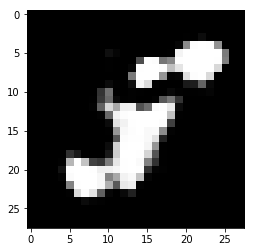

Loop: 109100, Generator_loss: -0.014272, Discriminator_loss: 0.008117
Loop: 109200, Generator_loss: -0.011452, Discriminator_loss: 0.0087908
Loop: 109300, Generator_loss: -0.013226, Discriminator_loss: 0.0078575
Loop: 109400, Generator_loss: -0.013371, Discriminator_loss: 0.0071907
Loop: 109500, Generator_loss: -0.010745, Discriminator_loss: 0.0049148
Loop: 109600, Generator_loss: -0.015035, Discriminator_loss: 0.0063032
Loop: 109700, Generator_loss: -0.011278, Discriminator_loss: 0.0071136
Loop: 109800, Generator_loss: -0.016269, Discriminator_loss: 0.0075211
Loop: 109900, Generator_loss: -0.012335, Discriminator_loss: 0.010682
Loop: 110000, Generator_loss: -0.011692, Discriminator_loss: 0.0075366


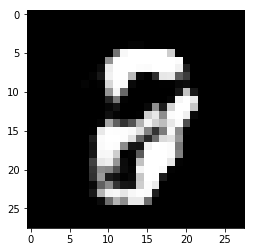

Loop: 110100, Generator_loss: -0.014018, Discriminator_loss: 0.007542
Loop: 110200, Generator_loss: -0.015896, Discriminator_loss: 0.0065168
Loop: 110300, Generator_loss: -0.013941, Discriminator_loss: 0.0095575
Loop: 110400, Generator_loss: -0.009434, Discriminator_loss: 0.0087458
Loop: 110500, Generator_loss: -0.0083929, Discriminator_loss: 0.0085698
Loop: 110600, Generator_loss: -0.013459, Discriminator_loss: 0.005104
Loop: 110700, Generator_loss: -0.0082781, Discriminator_loss: 0.0059186
Loop: 110800, Generator_loss: -0.012968, Discriminator_loss: 0.0087774
Loop: 110900, Generator_loss: -0.0076084, Discriminator_loss: 0.0088301
Loop: 111000, Generator_loss: -0.012335, Discriminator_loss: 0.0070179


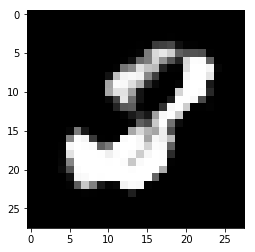

Loop: 111100, Generator_loss: -0.012621, Discriminator_loss: 0.0053332
Loop: 111200, Generator_loss: -0.013878, Discriminator_loss: 0.0065218
Loop: 111300, Generator_loss: -0.012876, Discriminator_loss: 0.006215
Loop: 111400, Generator_loss: -0.013902, Discriminator_loss: 0.0061983
Loop: 111500, Generator_loss: -0.0092546, Discriminator_loss: 0.0066643
Loop: 111600, Generator_loss: -0.01674, Discriminator_loss: 0.0097275
Loop: 111700, Generator_loss: -0.013495, Discriminator_loss: 0.0072759
Loop: 111800, Generator_loss: -0.005661, Discriminator_loss: 0.0052262
Loop: 111900, Generator_loss: -0.010127, Discriminator_loss: 0.0079977
Loop: 112000, Generator_loss: -0.011235, Discriminator_loss: 0.0066276


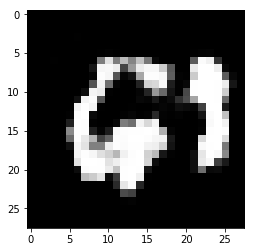

Loop: 112100, Generator_loss: -0.013274, Discriminator_loss: 0.0052356
Loop: 112200, Generator_loss: -0.0105, Discriminator_loss: 0.0055553
Loop: 112300, Generator_loss: -0.014569, Discriminator_loss: 0.0065386
Loop: 112400, Generator_loss: -0.016289, Discriminator_loss: 0.007317
Loop: 112500, Generator_loss: -0.010624, Discriminator_loss: 0.0050907
Loop: 112600, Generator_loss: -0.013221, Discriminator_loss: 0.0089195
Loop: 112700, Generator_loss: -0.011446, Discriminator_loss: 0.010726
Loop: 112800, Generator_loss: -0.012849, Discriminator_loss: 0.0063392
Loop: 112900, Generator_loss: -0.010192, Discriminator_loss: 0.0076055
Loop: 113000, Generator_loss: -0.011125, Discriminator_loss: 0.0087041


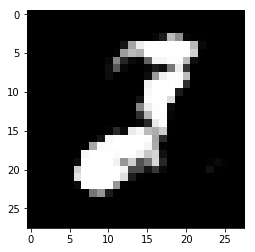

Loop: 113100, Generator_loss: -0.0072121, Discriminator_loss: 0.0069991
Loop: 113200, Generator_loss: -0.012103, Discriminator_loss: 0.0090346
Loop: 113300, Generator_loss: -0.0098681, Discriminator_loss: 0.0084887
Loop: 113400, Generator_loss: -0.014633, Discriminator_loss: 0.005571
Loop: 113500, Generator_loss: -0.011013, Discriminator_loss: 0.0081243
Loop: 113600, Generator_loss: -0.012532, Discriminator_loss: 0.008533
Loop: 113700, Generator_loss: -0.01094, Discriminator_loss: 0.0063056
Loop: 113800, Generator_loss: -0.014776, Discriminator_loss: 0.006904
Loop: 113900, Generator_loss: -0.0089932, Discriminator_loss: 0.0062832
Loop: 114000, Generator_loss: -0.011989, Discriminator_loss: 0.0073172


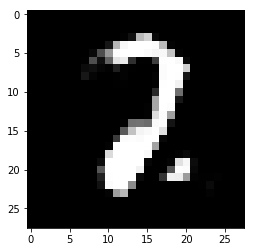

Loop: 114100, Generator_loss: -0.01312, Discriminator_loss: 0.0061868
Loop: 114200, Generator_loss: -0.0092917, Discriminator_loss: 0.0090039
Loop: 114300, Generator_loss: -0.016245, Discriminator_loss: 0.0083261
Loop: 114400, Generator_loss: -0.014849, Discriminator_loss: 0.0086153
Loop: 114500, Generator_loss: -0.011129, Discriminator_loss: 0.0077186
Loop: 114600, Generator_loss: -0.010709, Discriminator_loss: 0.0096354
Loop: 114700, Generator_loss: -0.010497, Discriminator_loss: 0.0071017
Loop: 114800, Generator_loss: -0.0086853, Discriminator_loss: 0.0073469
Loop: 114900, Generator_loss: -0.013531, Discriminator_loss: 0.0086753
Loop: 115000, Generator_loss: -0.011362, Discriminator_loss: 0.0059102


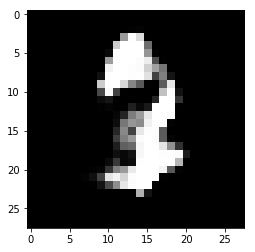

Loop: 115100, Generator_loss: -0.010608, Discriminator_loss: 0.0059168
Loop: 115200, Generator_loss: -0.010233, Discriminator_loss: 0.0073519
Loop: 115300, Generator_loss: -0.014062, Discriminator_loss: 0.0090578
Loop: 115400, Generator_loss: -0.011332, Discriminator_loss: 0.0082236
Loop: 115500, Generator_loss: -0.0076656, Discriminator_loss: 0.0054267
Loop: 115600, Generator_loss: -0.013778, Discriminator_loss: 0.0073874
Loop: 115700, Generator_loss: -0.01522, Discriminator_loss: 0.0070238
Loop: 115800, Generator_loss: -0.011173, Discriminator_loss: 0.0089605
Loop: 115900, Generator_loss: -0.0095168, Discriminator_loss: 0.0081948
Loop: 116000, Generator_loss: -0.012104, Discriminator_loss: 0.0047769


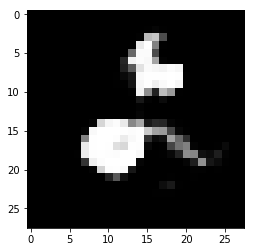

Loop: 116100, Generator_loss: -0.011568, Discriminator_loss: 0.0055699
Loop: 116200, Generator_loss: -0.014028, Discriminator_loss: 0.0085786
Loop: 116300, Generator_loss: -0.010757, Discriminator_loss: 0.0066902
Loop: 116400, Generator_loss: -0.0094144, Discriminator_loss: 0.009005
Loop: 116500, Generator_loss: -0.013439, Discriminator_loss: 0.0088994
Loop: 116600, Generator_loss: -0.012841, Discriminator_loss: 0.0090592
Loop: 116700, Generator_loss: -0.014327, Discriminator_loss: 0.0066771
Loop: 116800, Generator_loss: -0.012536, Discriminator_loss: 0.0061291
Loop: 116900, Generator_loss: -0.013131, Discriminator_loss: 0.0077124
Loop: 117000, Generator_loss: -0.0082658, Discriminator_loss: 0.0089951


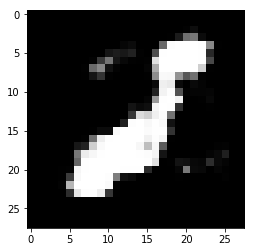

Loop: 117100, Generator_loss: -0.015798, Discriminator_loss: 0.006427
Loop: 117200, Generator_loss: -0.011238, Discriminator_loss: 0.0081744
Loop: 117300, Generator_loss: -0.0087873, Discriminator_loss: 0.006028
Loop: 117400, Generator_loss: -0.0092755, Discriminator_loss: 0.008188
Loop: 117500, Generator_loss: -0.009931, Discriminator_loss: 0.0081287
Loop: 117600, Generator_loss: -0.013239, Discriminator_loss: 0.0083141
Loop: 117700, Generator_loss: -0.011066, Discriminator_loss: 0.0034125
Loop: 117800, Generator_loss: -0.0074108, Discriminator_loss: 0.007405
Loop: 117900, Generator_loss: -0.0080627, Discriminator_loss: 0.0069675
Loop: 118000, Generator_loss: -0.010483, Discriminator_loss: 0.0089604


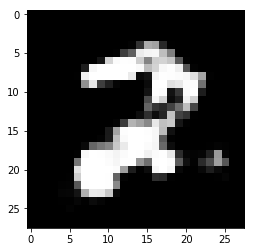

Loop: 118100, Generator_loss: -0.013357, Discriminator_loss: 0.0089635
Loop: 118200, Generator_loss: -0.015537, Discriminator_loss: 0.0093306
Loop: 118300, Generator_loss: -0.010287, Discriminator_loss: 0.0093334
Loop: 118400, Generator_loss: -0.011203, Discriminator_loss: 0.0098551
Loop: 118500, Generator_loss: -0.013352, Discriminator_loss: 0.0071914
Loop: 118600, Generator_loss: -0.012008, Discriminator_loss: 0.009938
Loop: 118700, Generator_loss: -0.0097718, Discriminator_loss: 0.007592
Loop: 118800, Generator_loss: -0.013415, Discriminator_loss: 0.0086413
Loop: 118900, Generator_loss: -0.0087015, Discriminator_loss: 0.0096148
Loop: 119000, Generator_loss: -0.012093, Discriminator_loss: 0.0061693


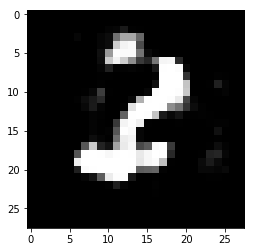

Loop: 119100, Generator_loss: -0.012068, Discriminator_loss: 0.0064
Loop: 119200, Generator_loss: -0.011255, Discriminator_loss: 0.0081224
Loop: 119300, Generator_loss: -0.010419, Discriminator_loss: 0.0072866
Loop: 119400, Generator_loss: -0.01126, Discriminator_loss: 0.0063396
Loop: 119500, Generator_loss: -0.0079563, Discriminator_loss: 0.00676
Loop: 119600, Generator_loss: -0.0118, Discriminator_loss: 0.0063446
Loop: 119700, Generator_loss: -0.012837, Discriminator_loss: 0.0075116
Loop: 119800, Generator_loss: -0.013417, Discriminator_loss: 0.0090089
Loop: 119900, Generator_loss: -0.015204, Discriminator_loss: 0.0072712
Loop: 120000, Generator_loss: -0.010161, Discriminator_loss: 0.00733


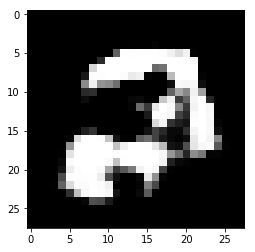

Loop: 120100, Generator_loss: -0.0082022, Discriminator_loss: 0.0041374
Loop: 120200, Generator_loss: -0.010673, Discriminator_loss: 0.0059603
Loop: 120300, Generator_loss: -0.010327, Discriminator_loss: 0.0059915
Loop: 120400, Generator_loss: -0.012221, Discriminator_loss: 0.0088806
Loop: 120500, Generator_loss: -0.01173, Discriminator_loss: 0.009859
Loop: 120600, Generator_loss: -0.010014, Discriminator_loss: 0.0065988
Loop: 120700, Generator_loss: -0.0098733, Discriminator_loss: 0.0068341
Loop: 120800, Generator_loss: -0.010385, Discriminator_loss: 0.0097702
Loop: 120900, Generator_loss: -0.0082995, Discriminator_loss: 0.0092135
Loop: 121000, Generator_loss: -0.015381, Discriminator_loss: 0.0063577


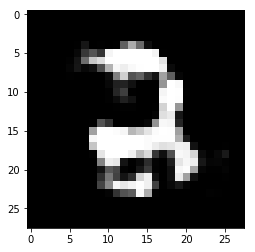

Loop: 121100, Generator_loss: -0.009274, Discriminator_loss: 0.0081125
Loop: 121200, Generator_loss: -0.0095052, Discriminator_loss: 0.0079325
Loop: 121300, Generator_loss: -0.0084973, Discriminator_loss: 0.0061166
Loop: 121400, Generator_loss: -0.0094566, Discriminator_loss: 0.010109
Loop: 121500, Generator_loss: -0.012397, Discriminator_loss: 0.0086951
Loop: 121600, Generator_loss: -0.011601, Discriminator_loss: 0.0067016
Loop: 121700, Generator_loss: -0.010245, Discriminator_loss: 0.0082193
Loop: 121800, Generator_loss: -0.014114, Discriminator_loss: 0.0077313
Loop: 121900, Generator_loss: -0.012364, Discriminator_loss: 0.0074291
Loop: 122000, Generator_loss: -0.0093274, Discriminator_loss: 0.0052452


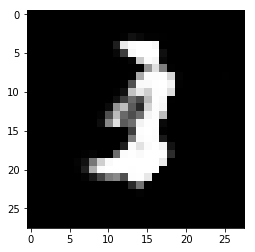

Loop: 122100, Generator_loss: -0.0097235, Discriminator_loss: 0.0070772
Loop: 122200, Generator_loss: -0.010899, Discriminator_loss: 0.0066414
Loop: 122300, Generator_loss: -0.011715, Discriminator_loss: 0.0068718
Loop: 122400, Generator_loss: -0.0095034, Discriminator_loss: 0.0084678
Loop: 122500, Generator_loss: -0.012263, Discriminator_loss: 0.0077351
Loop: 122600, Generator_loss: -0.0073969, Discriminator_loss: 0.0060322
Loop: 122700, Generator_loss: -0.010993, Discriminator_loss: 0.004905
Loop: 122800, Generator_loss: -0.012825, Discriminator_loss: 0.0070581
Loop: 122900, Generator_loss: -0.013928, Discriminator_loss: 0.006427
Loop: 123000, Generator_loss: -0.0072761, Discriminator_loss: 0.0083012


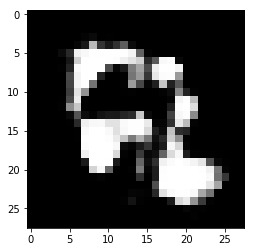

Loop: 123100, Generator_loss: -0.0098967, Discriminator_loss: 0.0083235
Loop: 123200, Generator_loss: -0.0080981, Discriminator_loss: 0.0055331
Loop: 123300, Generator_loss: -0.012791, Discriminator_loss: 0.007796
Loop: 123400, Generator_loss: -0.015076, Discriminator_loss: 0.0049834
Loop: 123500, Generator_loss: -0.01074, Discriminator_loss: 0.0077179
Loop: 123600, Generator_loss: -0.0091762, Discriminator_loss: 0.0091043
Loop: 123700, Generator_loss: -0.014386, Discriminator_loss: 0.0084761
Loop: 123800, Generator_loss: -0.014451, Discriminator_loss: 0.0078912
Loop: 123900, Generator_loss: -0.011487, Discriminator_loss: 0.0090168
Loop: 124000, Generator_loss: -0.011106, Discriminator_loss: 0.0098447


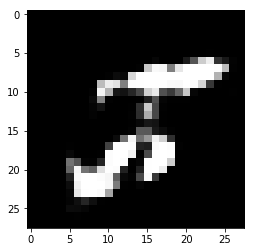

Loop: 124100, Generator_loss: -0.011722, Discriminator_loss: 0.0063977
Loop: 124200, Generator_loss: -0.0090817, Discriminator_loss: 0.0066768
Loop: 124300, Generator_loss: -0.0092752, Discriminator_loss: 0.0077232
Loop: 124400, Generator_loss: -0.015501, Discriminator_loss: 0.0050653
Loop: 124500, Generator_loss: -0.013189, Discriminator_loss: 0.0056562
Loop: 124600, Generator_loss: -0.0087491, Discriminator_loss: 0.010271
Loop: 124700, Generator_loss: -0.011167, Discriminator_loss: 0.0080132
Loop: 124800, Generator_loss: -0.0083833, Discriminator_loss: 0.0079348
Loop: 124900, Generator_loss: -0.0078853, Discriminator_loss: 0.0080333
Loop: 125000, Generator_loss: -0.010721, Discriminator_loss: 0.0066407


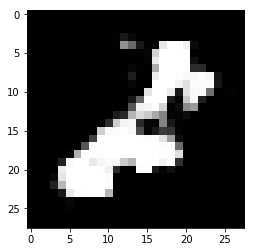

Loop: 125100, Generator_loss: -0.010179, Discriminator_loss: 0.0082938
Loop: 125200, Generator_loss: -0.010273, Discriminator_loss: 0.007319
Loop: 125300, Generator_loss: -0.009045, Discriminator_loss: 0.007081
Loop: 125400, Generator_loss: -0.011442, Discriminator_loss: 0.00807
Loop: 125500, Generator_loss: -0.0099618, Discriminator_loss: 0.0063565
Loop: 125600, Generator_loss: -0.0067944, Discriminator_loss: 0.0076726
Loop: 125700, Generator_loss: -0.010401, Discriminator_loss: 0.0075543
Loop: 125800, Generator_loss: -0.012276, Discriminator_loss: 0.0079302
Loop: 125900, Generator_loss: -0.011994, Discriminator_loss: 0.0080028
Loop: 126000, Generator_loss: -0.0092063, Discriminator_loss: 0.0070007


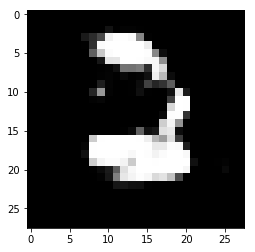

Loop: 126100, Generator_loss: -0.012102, Discriminator_loss: 0.0091093
Loop: 126200, Generator_loss: -0.01383, Discriminator_loss: 0.0095562
Loop: 126300, Generator_loss: -0.0083249, Discriminator_loss: 0.0068444
Loop: 126400, Generator_loss: -0.0095156, Discriminator_loss: 0.0063119
Loop: 126500, Generator_loss: -0.011483, Discriminator_loss: 0.010052
Loop: 126600, Generator_loss: -0.0067617, Discriminator_loss: 0.0091435
Loop: 126700, Generator_loss: -0.010291, Discriminator_loss: 0.0066498
Loop: 126800, Generator_loss: -0.0074943, Discriminator_loss: 0.0062166
Loop: 126900, Generator_loss: -0.0091802, Discriminator_loss: 0.0046988
Loop: 127000, Generator_loss: -0.011526, Discriminator_loss: 0.0059079


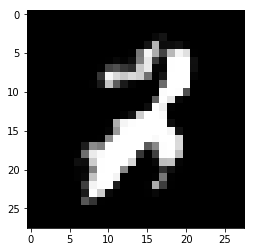

Loop: 127100, Generator_loss: -0.011675, Discriminator_loss: 0.010733
Loop: 127200, Generator_loss: -0.0082113, Discriminator_loss: 0.0076408
Loop: 127300, Generator_loss: -0.012392, Discriminator_loss: 0.0081864
Loop: 127400, Generator_loss: -0.0070116, Discriminator_loss: 0.0091309
Loop: 127500, Generator_loss: -0.012919, Discriminator_loss: 0.0077154
Loop: 127600, Generator_loss: -0.010265, Discriminator_loss: 0.010789
Loop: 127700, Generator_loss: -0.0076769, Discriminator_loss: 0.0080215
Loop: 127800, Generator_loss: -0.009695, Discriminator_loss: 0.0060125
Loop: 127900, Generator_loss: -0.0068171, Discriminator_loss: 0.0079271
Loop: 128000, Generator_loss: -0.011383, Discriminator_loss: 0.007918


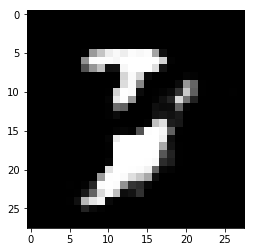

Loop: 128100, Generator_loss: -0.011552, Discriminator_loss: 0.0091843
Loop: 128200, Generator_loss: -0.009513, Discriminator_loss: 0.0086156
Loop: 128300, Generator_loss: -0.0079227, Discriminator_loss: 0.0082072
Loop: 128400, Generator_loss: -0.011491, Discriminator_loss: 0.0085634
Loop: 128500, Generator_loss: -0.0097235, Discriminator_loss: 0.0051688
Loop: 128600, Generator_loss: -0.0091285, Discriminator_loss: 0.007257
Loop: 128700, Generator_loss: -0.0092074, Discriminator_loss: 0.0072681
Loop: 128800, Generator_loss: -0.011875, Discriminator_loss: 0.0084903
Loop: 128900, Generator_loss: -0.0092018, Discriminator_loss: 0.0091809
Loop: 129000, Generator_loss: -0.013188, Discriminator_loss: 0.006224


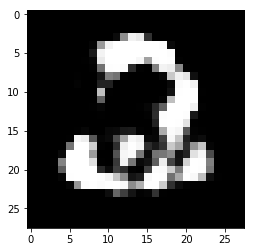

Loop: 129100, Generator_loss: -0.0099242, Discriminator_loss: 0.0097268
Loop: 129200, Generator_loss: -0.0083666, Discriminator_loss: 0.0065028
Loop: 129300, Generator_loss: -0.0064877, Discriminator_loss: 0.0059683
Loop: 129400, Generator_loss: -0.0084425, Discriminator_loss: 0.0071228
Loop: 129500, Generator_loss: -0.0089034, Discriminator_loss: 0.0054172
Loop: 129600, Generator_loss: -0.0086493, Discriminator_loss: 0.0070478
Loop: 129700, Generator_loss: -0.010456, Discriminator_loss: 0.0068938
Loop: 129800, Generator_loss: -0.010257, Discriminator_loss: 0.0079024
Loop: 129900, Generator_loss: -0.012469, Discriminator_loss: 0.007637
Loop: 130000, Generator_loss: -0.0086478, Discriminator_loss: 0.0058434


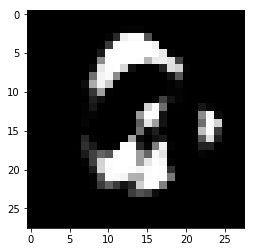

Loop: 130100, Generator_loss: -0.0087469, Discriminator_loss: 0.0087234
Loop: 130200, Generator_loss: -0.0088173, Discriminator_loss: 0.0065496
Loop: 130300, Generator_loss: -0.0090746, Discriminator_loss: 0.0071118
Loop: 130400, Generator_loss: -0.0095026, Discriminator_loss: 0.0074545
Loop: 130500, Generator_loss: -0.012386, Discriminator_loss: 0.0056872
Loop: 130600, Generator_loss: -0.01385, Discriminator_loss: 0.0069855
Loop: 130700, Generator_loss: -0.0096577, Discriminator_loss: 0.0073863
Loop: 130800, Generator_loss: -0.0099518, Discriminator_loss: 0.0081227
Loop: 130900, Generator_loss: -0.0091906, Discriminator_loss: 0.0076474
Loop: 131000, Generator_loss: -0.0092721, Discriminator_loss: 0.0083778


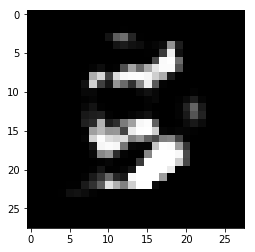

Loop: 131100, Generator_loss: -0.012135, Discriminator_loss: 0.0063226
Loop: 131200, Generator_loss: -0.012719, Discriminator_loss: 0.0081811
Loop: 131300, Generator_loss: -0.0056117, Discriminator_loss: 0.0076226
Loop: 131400, Generator_loss: -0.0097954, Discriminator_loss: 0.0081295
Loop: 131500, Generator_loss: -0.0084336, Discriminator_loss: 0.0093204
Loop: 131600, Generator_loss: -0.010553, Discriminator_loss: 0.007555
Loop: 131700, Generator_loss: -0.0086935, Discriminator_loss: 0.0072035
Loop: 131800, Generator_loss: -0.0094046, Discriminator_loss: 0.0069761
Loop: 131900, Generator_loss: -0.011946, Discriminator_loss: 0.0063783
Loop: 132000, Generator_loss: -0.0094031, Discriminator_loss: 0.0056759


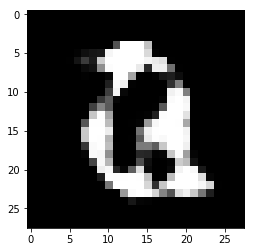

Loop: 132100, Generator_loss: -0.009225, Discriminator_loss: 0.0079254
Loop: 132200, Generator_loss: -0.0095554, Discriminator_loss: 0.0061559
Loop: 132300, Generator_loss: -0.011714, Discriminator_loss: 0.0063346
Loop: 132400, Generator_loss: -0.0092085, Discriminator_loss: 0.0078575
Loop: 132500, Generator_loss: -0.0076738, Discriminator_loss: 0.0071022
Loop: 132600, Generator_loss: -0.015966, Discriminator_loss: 0.0060801
Loop: 132700, Generator_loss: -0.0077056, Discriminator_loss: 0.0062983
Loop: 132800, Generator_loss: -0.0075529, Discriminator_loss: 0.0064199
Loop: 132900, Generator_loss: -0.0097629, Discriminator_loss: 0.0051551
Loop: 133000, Generator_loss: -0.010861, Discriminator_loss: 0.0053869


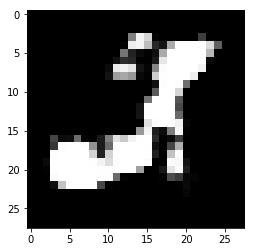

Loop: 133100, Generator_loss: -0.012727, Discriminator_loss: 0.0061142
Loop: 133200, Generator_loss: -0.012018, Discriminator_loss: 0.010201
Loop: 133300, Generator_loss: -0.012426, Discriminator_loss: 0.0065614
Loop: 133400, Generator_loss: -0.012883, Discriminator_loss: 0.0058001
Loop: 133500, Generator_loss: -0.0096415, Discriminator_loss: 0.0074131
Loop: 133600, Generator_loss: -0.014127, Discriminator_loss: 0.0067132
Loop: 133700, Generator_loss: -0.0096945, Discriminator_loss: 0.0045784
Loop: 133800, Generator_loss: -0.0099096, Discriminator_loss: 0.0073189
Loop: 133900, Generator_loss: -0.011002, Discriminator_loss: 0.0074774
Loop: 134000, Generator_loss: -0.01422, Discriminator_loss: 0.0061605


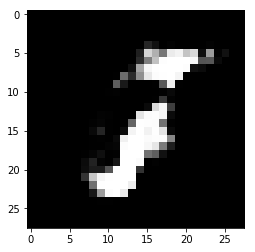

Loop: 134100, Generator_loss: -0.011827, Discriminator_loss: 0.00922
Loop: 134200, Generator_loss: -0.0068761, Discriminator_loss: 0.0080957
Loop: 134300, Generator_loss: -0.0055322, Discriminator_loss: 0.0062304
Loop: 134400, Generator_loss: -0.0091465, Discriminator_loss: 0.0077496
Loop: 134500, Generator_loss: -0.010552, Discriminator_loss: 0.0068653
Loop: 134600, Generator_loss: -0.0072841, Discriminator_loss: 0.0075166
Loop: 134700, Generator_loss: -0.010222, Discriminator_loss: 0.0069375
Loop: 134800, Generator_loss: -0.01289, Discriminator_loss: 0.0071092
Loop: 134900, Generator_loss: -0.011093, Discriminator_loss: 0.0071485
Loop: 135000, Generator_loss: -0.0088157, Discriminator_loss: 0.0056356


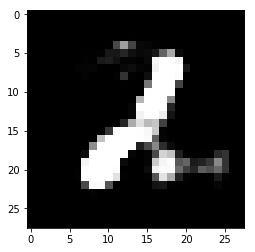

Loop: 135100, Generator_loss: -0.011781, Discriminator_loss: 0.0085187
Loop: 135200, Generator_loss: -0.016406, Discriminator_loss: 0.0075328
Loop: 135300, Generator_loss: -0.0099396, Discriminator_loss: 0.0073831
Loop: 135400, Generator_loss: -0.01073, Discriminator_loss: 0.0065346
Loop: 135500, Generator_loss: -0.010105, Discriminator_loss: 0.0085216
Loop: 135600, Generator_loss: -0.010501, Discriminator_loss: 0.0072819
Loop: 135700, Generator_loss: -0.0074203, Discriminator_loss: 0.0088978
Loop: 135800, Generator_loss: -0.0089131, Discriminator_loss: 0.011092
Loop: 135900, Generator_loss: -0.011905, Discriminator_loss: 0.008063
Loop: 136000, Generator_loss: -0.010263, Discriminator_loss: 0.0076389


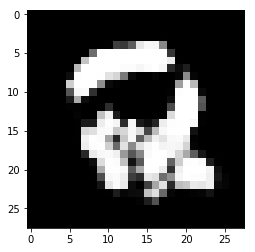

Loop: 136100, Generator_loss: -0.014004, Discriminator_loss: 0.007351
Loop: 136200, Generator_loss: -0.011361, Discriminator_loss: 0.0073239
Loop: 136300, Generator_loss: -0.010845, Discriminator_loss: 0.0077211
Loop: 136400, Generator_loss: -0.009487, Discriminator_loss: 0.0076523
Loop: 136500, Generator_loss: -0.01514, Discriminator_loss: 0.0074864
Loop: 136600, Generator_loss: -0.017351, Discriminator_loss: 0.0070366
Loop: 136700, Generator_loss: -0.012976, Discriminator_loss: 0.00696
Loop: 136800, Generator_loss: -0.0070012, Discriminator_loss: 0.0052526
Loop: 136900, Generator_loss: -0.0052721, Discriminator_loss: 0.0066125
Loop: 137000, Generator_loss: -0.010157, Discriminator_loss: 0.008133


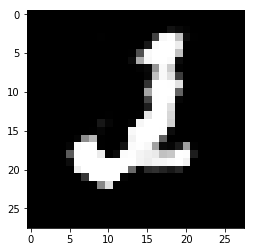

Loop: 137100, Generator_loss: -0.0047474, Discriminator_loss: 0.0065966
Loop: 137200, Generator_loss: -0.0078237, Discriminator_loss: 0.0066727
Loop: 137300, Generator_loss: -0.011019, Discriminator_loss: 0.0066715
Loop: 137400, Generator_loss: -0.010066, Discriminator_loss: 0.0066036
Loop: 137500, Generator_loss: -0.011186, Discriminator_loss: 0.0061321
Loop: 137600, Generator_loss: -0.01374, Discriminator_loss: 0.0069886
Loop: 137700, Generator_loss: -0.0085861, Discriminator_loss: 0.0082826
Loop: 137800, Generator_loss: -0.0082113, Discriminator_loss: 0.0062969
Loop: 137900, Generator_loss: -0.0080549, Discriminator_loss: 0.0069808
Loop: 138000, Generator_loss: -0.012465, Discriminator_loss: 0.0054078


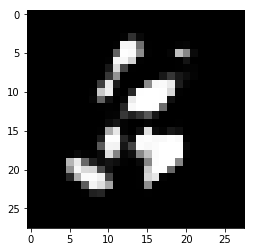

Loop: 138100, Generator_loss: -0.011398, Discriminator_loss: 0.0068989
Loop: 138200, Generator_loss: -0.012346, Discriminator_loss: 0.0067735
Loop: 138300, Generator_loss: -0.01526, Discriminator_loss: 0.0065547
Loop: 138400, Generator_loss: -0.011365, Discriminator_loss: 0.0070198
Loop: 138500, Generator_loss: -0.013882, Discriminator_loss: 0.0083224
Loop: 138600, Generator_loss: -0.0079673, Discriminator_loss: 0.0080304
Loop: 138700, Generator_loss: -0.0095069, Discriminator_loss: 0.0070979
Loop: 138800, Generator_loss: -0.0074244, Discriminator_loss: 0.0072818
Loop: 138900, Generator_loss: -0.0149, Discriminator_loss: 0.0057505
Loop: 139000, Generator_loss: -0.0067287, Discriminator_loss: 0.0075534


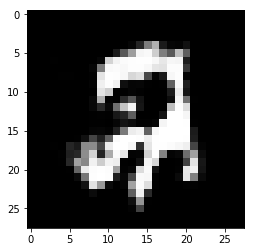

Loop: 139100, Generator_loss: -0.0085912, Discriminator_loss: 0.0067581
Loop: 139200, Generator_loss: -0.010823, Discriminator_loss: 0.0074094
Loop: 139300, Generator_loss: -0.0069822, Discriminator_loss: 0.0061986
Loop: 139400, Generator_loss: -0.0063356, Discriminator_loss: 0.0092068
Loop: 139500, Generator_loss: -0.01352, Discriminator_loss: 0.0052201
Loop: 139600, Generator_loss: -0.0079903, Discriminator_loss: 0.0078361
Loop: 139700, Generator_loss: -0.0082422, Discriminator_loss: 0.0055977
Loop: 139800, Generator_loss: -0.0073143, Discriminator_loss: 0.0064308
Loop: 139900, Generator_loss: -0.010399, Discriminator_loss: 0.0064093
Loop: 140000, Generator_loss: -0.0097813, Discriminator_loss: 0.010205


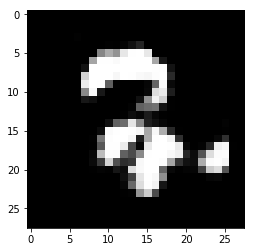

Loop: 140100, Generator_loss: -0.010045, Discriminator_loss: 0.0063502
Loop: 140200, Generator_loss: -0.010719, Discriminator_loss: 0.0052887
Loop: 140300, Generator_loss: -0.0095232, Discriminator_loss: 0.006543
Loop: 140400, Generator_loss: -0.010289, Discriminator_loss: 0.0082367
Loop: 140500, Generator_loss: -0.012134, Discriminator_loss: 0.0073819
Loop: 140600, Generator_loss: -0.0085807, Discriminator_loss: 0.0080093
Loop: 140700, Generator_loss: -0.0087667, Discriminator_loss: 0.0065931
Loop: 140800, Generator_loss: -0.0066764, Discriminator_loss: 0.0059632
Loop: 140900, Generator_loss: -0.011988, Discriminator_loss: 0.0070744
Loop: 141000, Generator_loss: -0.012155, Discriminator_loss: 0.0057582


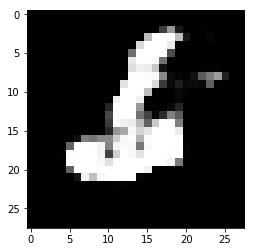

Loop: 141100, Generator_loss: -0.013533, Discriminator_loss: 0.0087894
Loop: 141200, Generator_loss: -0.010847, Discriminator_loss: 0.0057702
Loop: 141300, Generator_loss: -0.012819, Discriminator_loss: 0.0057325
Loop: 141400, Generator_loss: -0.0078952, Discriminator_loss: 0.0058329
Loop: 141500, Generator_loss: -0.0087972, Discriminator_loss: 0.010698
Loop: 141600, Generator_loss: -0.013373, Discriminator_loss: 0.0072498
Loop: 141700, Generator_loss: -0.0067187, Discriminator_loss: 0.0066081
Loop: 141800, Generator_loss: -0.0072601, Discriminator_loss: 0.0078634
Loop: 141900, Generator_loss: -0.011184, Discriminator_loss: 0.0067482
Loop: 142000, Generator_loss: -0.010138, Discriminator_loss: 0.0073351


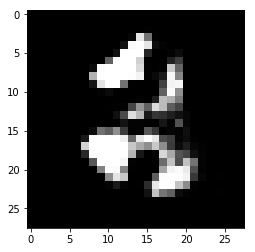

Loop: 142100, Generator_loss: -0.0097677, Discriminator_loss: 0.0063198
Loop: 142200, Generator_loss: -0.010495, Discriminator_loss: 0.0065484
Loop: 142300, Generator_loss: -0.013453, Discriminator_loss: 0.0065042
Loop: 142400, Generator_loss: -0.011569, Discriminator_loss: 0.005778
Loop: 142500, Generator_loss: -0.01133, Discriminator_loss: 0.0073196
Loop: 142600, Generator_loss: -0.0090897, Discriminator_loss: 0.0078171
Loop: 142700, Generator_loss: -0.011342, Discriminator_loss: 0.0054793
Loop: 142800, Generator_loss: -0.0084015, Discriminator_loss: 0.0096024
Loop: 142900, Generator_loss: -0.0075957, Discriminator_loss: 0.005768
Loop: 143000, Generator_loss: -0.0065168, Discriminator_loss: 0.0075103


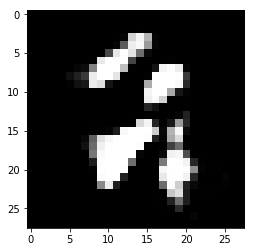

Loop: 143100, Generator_loss: -0.0094147, Discriminator_loss: 0.0077137
Loop: 143200, Generator_loss: -0.016793, Discriminator_loss: 0.0049604
Loop: 143300, Generator_loss: -0.0095997, Discriminator_loss: 0.0075603
Loop: 143400, Generator_loss: -0.014121, Discriminator_loss: 0.007123
Loop: 143500, Generator_loss: -0.0071951, Discriminator_loss: 0.0065256
Loop: 143600, Generator_loss: -0.016182, Discriminator_loss: 0.0072936
Loop: 143700, Generator_loss: -0.012945, Discriminator_loss: 0.0063018
Loop: 143800, Generator_loss: -0.012661, Discriminator_loss: 0.0063761
Loop: 143900, Generator_loss: -0.010443, Discriminator_loss: 0.0073259
Loop: 144000, Generator_loss: -0.01555, Discriminator_loss: 0.0076773


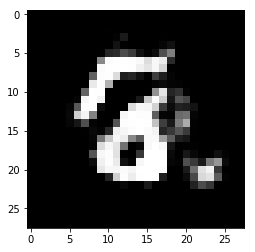

Loop: 144100, Generator_loss: -0.0097612, Discriminator_loss: 0.006676
Loop: 144200, Generator_loss: -0.008861, Discriminator_loss: 0.0049113
Loop: 144300, Generator_loss: -0.010903, Discriminator_loss: 0.007185
Loop: 144400, Generator_loss: -0.0076338, Discriminator_loss: 0.0084926
Loop: 144500, Generator_loss: -0.0084496, Discriminator_loss: 0.005913
Loop: 144600, Generator_loss: -0.0068097, Discriminator_loss: 0.0045653
Loop: 144700, Generator_loss: -0.011631, Discriminator_loss: 0.0063679
Loop: 144800, Generator_loss: -0.013119, Discriminator_loss: 0.0045615
Loop: 144900, Generator_loss: -0.01374, Discriminator_loss: 0.0047314
Loop: 145000, Generator_loss: -0.0098162, Discriminator_loss: 0.0075909


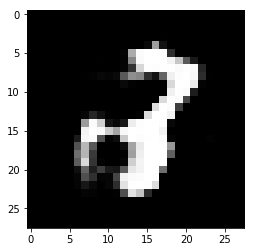

Loop: 145100, Generator_loss: -0.010276, Discriminator_loss: 0.0071499
Loop: 145200, Generator_loss: -0.010929, Discriminator_loss: 0.0064896
Loop: 145300, Generator_loss: -0.01146, Discriminator_loss: 0.0079621
Loop: 145400, Generator_loss: -0.010578, Discriminator_loss: 0.0058021
Loop: 145500, Generator_loss: -0.010828, Discriminator_loss: 0.0078977
Loop: 145600, Generator_loss: -0.017003, Discriminator_loss: 0.0075214
Loop: 145700, Generator_loss: -0.011726, Discriminator_loss: 0.009286
Loop: 145800, Generator_loss: -0.0061333, Discriminator_loss: 0.0086336
Loop: 145900, Generator_loss: -0.0075623, Discriminator_loss: 0.0066969
Loop: 146000, Generator_loss: -0.0078928, Discriminator_loss: 0.0076305


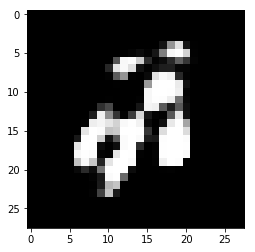

Loop: 146100, Generator_loss: -0.010094, Discriminator_loss: 0.0091836
Loop: 146200, Generator_loss: -0.0087685, Discriminator_loss: 0.0059837
Loop: 146300, Generator_loss: -0.0085602, Discriminator_loss: 0.0056198
Loop: 146400, Generator_loss: -0.012673, Discriminator_loss: 0.006275
Loop: 146500, Generator_loss: -0.0058282, Discriminator_loss: 0.0070852
Loop: 146600, Generator_loss: -0.0094952, Discriminator_loss: 0.0089158
Loop: 146700, Generator_loss: -0.012126, Discriminator_loss: 0.0083374
Loop: 146800, Generator_loss: -0.01167, Discriminator_loss: 0.0074247
Loop: 146900, Generator_loss: -0.011137, Discriminator_loss: 0.0068491
Loop: 147000, Generator_loss: -0.0075748, Discriminator_loss: 0.0064836


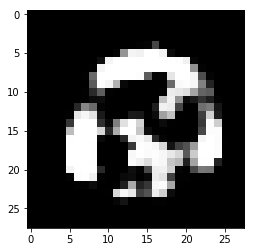

Loop: 147100, Generator_loss: -0.013638, Discriminator_loss: 0.0070874
Loop: 147200, Generator_loss: -0.0058605, Discriminator_loss: 0.0055059
Loop: 147300, Generator_loss: -0.0062754, Discriminator_loss: 0.0072867
Loop: 147400, Generator_loss: -0.011796, Discriminator_loss: 0.0075226
Loop: 147500, Generator_loss: -0.0096124, Discriminator_loss: 0.0087637
Loop: 147600, Generator_loss: -0.007161, Discriminator_loss: 0.0061679
Loop: 147700, Generator_loss: -0.0074967, Discriminator_loss: 0.0071337
Loop: 147800, Generator_loss: -0.011466, Discriminator_loss: 0.0069724
Loop: 147900, Generator_loss: -0.011495, Discriminator_loss: 0.0058508
Loop: 148000, Generator_loss: -0.0098616, Discriminator_loss: 0.0090471


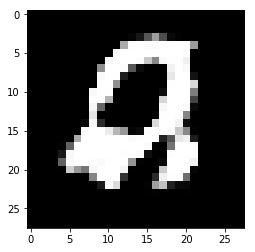

Loop: 148100, Generator_loss: -0.013347, Discriminator_loss: 0.0078196
Loop: 148200, Generator_loss: -0.0104, Discriminator_loss: 0.0067763
Loop: 148300, Generator_loss: -0.012645, Discriminator_loss: 0.006957
Loop: 148400, Generator_loss: -0.009676, Discriminator_loss: 0.0053951
Loop: 148500, Generator_loss: -0.014507, Discriminator_loss: 0.0083181
Loop: 148600, Generator_loss: -0.012691, Discriminator_loss: 0.0057966
Loop: 148700, Generator_loss: -0.010125, Discriminator_loss: 0.0067475
Loop: 148800, Generator_loss: -0.014566, Discriminator_loss: 0.0056775
Loop: 148900, Generator_loss: -0.0096964, Discriminator_loss: 0.0080661
Loop: 149000, Generator_loss: -0.0078429, Discriminator_loss: 0.0056783


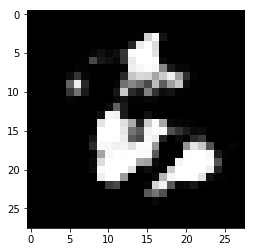

Loop: 149100, Generator_loss: -0.0084463, Discriminator_loss: 0.0062761
Loop: 149200, Generator_loss: -0.0099644, Discriminator_loss: 0.0057116
Loop: 149300, Generator_loss: -0.0092236, Discriminator_loss: 0.0080602
Loop: 149400, Generator_loss: -0.007341, Discriminator_loss: 0.0077612
Loop: 149500, Generator_loss: -0.0082161, Discriminator_loss: 0.0038736
Loop: 149600, Generator_loss: -0.011033, Discriminator_loss: 0.0053438
Loop: 149700, Generator_loss: -0.00403, Discriminator_loss: 0.0060785
Loop: 149800, Generator_loss: -0.0099294, Discriminator_loss: 0.0081928
Loop: 149900, Generator_loss: -0.011308, Discriminator_loss: 0.0082676
Loop: 150000, Generator_loss: -0.010569, Discriminator_loss: 0.0067225


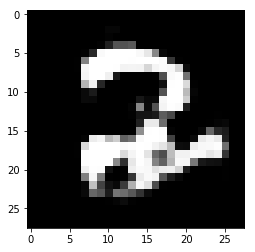

Loop: 150100, Generator_loss: -0.0084597, Discriminator_loss: 0.0063244
Loop: 150200, Generator_loss: -0.0078868, Discriminator_loss: 0.0068845
Loop: 150300, Generator_loss: -0.01098, Discriminator_loss: 0.0067373
Loop: 150400, Generator_loss: -0.010905, Discriminator_loss: 0.0078969
Loop: 150500, Generator_loss: -0.0099775, Discriminator_loss: 0.007048
Loop: 150600, Generator_loss: -0.012823, Discriminator_loss: 0.0057579
Loop: 150700, Generator_loss: -0.011406, Discriminator_loss: 0.0095671
Loop: 150800, Generator_loss: -0.0098275, Discriminator_loss: 0.0061179
Loop: 150900, Generator_loss: -0.0096719, Discriminator_loss: 0.0053694
Loop: 151000, Generator_loss: -0.011552, Discriminator_loss: 0.0058676


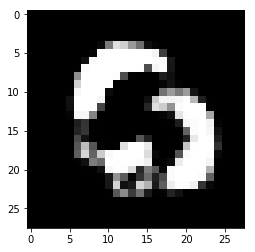

Loop: 151100, Generator_loss: -0.012963, Discriminator_loss: 0.0054448
Loop: 151200, Generator_loss: -0.010949, Discriminator_loss: 0.0064353
Loop: 151300, Generator_loss: -0.008422, Discriminator_loss: 0.0059535
Loop: 151400, Generator_loss: -0.008386, Discriminator_loss: 0.0086697
Loop: 151500, Generator_loss: -0.008486, Discriminator_loss: 0.007235
Loop: 151600, Generator_loss: -0.0074281, Discriminator_loss: 0.0079512
Loop: 151700, Generator_loss: -0.0084586, Discriminator_loss: 0.0052439
Loop: 151800, Generator_loss: -0.0069926, Discriminator_loss: 0.0055313
Loop: 151900, Generator_loss: -0.012065, Discriminator_loss: 0.0068648
Loop: 152000, Generator_loss: -0.0080508, Discriminator_loss: 0.008014


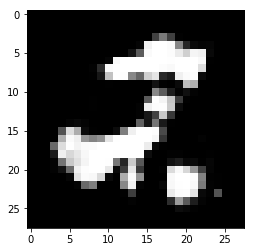

Loop: 152100, Generator_loss: -0.012058, Discriminator_loss: 0.0069549
Loop: 152200, Generator_loss: -0.0072904, Discriminator_loss: 0.0062658
Loop: 152300, Generator_loss: -0.010411, Discriminator_loss: 0.0060247
Loop: 152400, Generator_loss: -0.0082606, Discriminator_loss: 0.0075005
Loop: 152500, Generator_loss: -0.0080835, Discriminator_loss: 0.0048362
Loop: 152600, Generator_loss: -0.010456, Discriminator_loss: 0.0066
Loop: 152700, Generator_loss: -0.010955, Discriminator_loss: 0.0081773
Loop: 152800, Generator_loss: -0.014335, Discriminator_loss: 0.0069005
Loop: 152900, Generator_loss: -0.0090121, Discriminator_loss: 0.0070034
Loop: 153000, Generator_loss: -0.0065355, Discriminator_loss: 0.0072298


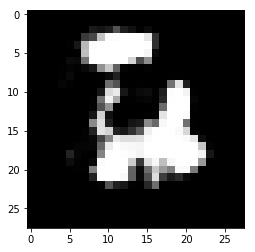

Loop: 153100, Generator_loss: -0.01157, Discriminator_loss: 0.0061245
Loop: 153200, Generator_loss: -0.0083302, Discriminator_loss: 0.0072799
Loop: 153300, Generator_loss: -0.010216, Discriminator_loss: 0.0089469
Loop: 153400, Generator_loss: -0.0084124, Discriminator_loss: 0.0037304
Loop: 153500, Generator_loss: -0.009591, Discriminator_loss: 0.0060064
Loop: 153600, Generator_loss: -0.010744, Discriminator_loss: 0.0064408
Loop: 153700, Generator_loss: -0.010597, Discriminator_loss: 0.0074987
Loop: 153800, Generator_loss: -0.012683, Discriminator_loss: 0.0039182
Loop: 153900, Generator_loss: -0.0053932, Discriminator_loss: 0.007831
Loop: 154000, Generator_loss: -0.014641, Discriminator_loss: 0.0063545


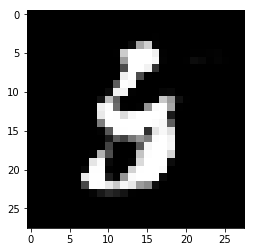

Loop: 154100, Generator_loss: -0.0046698, Discriminator_loss: 0.0044779
Loop: 154200, Generator_loss: -0.0080784, Discriminator_loss: 0.0053316
Loop: 154300, Generator_loss: -0.0071142, Discriminator_loss: 0.0086034
Loop: 154400, Generator_loss: -0.0074819, Discriminator_loss: 0.0064709
Loop: 154500, Generator_loss: -0.0072818, Discriminator_loss: 0.004696
Loop: 154600, Generator_loss: -0.011325, Discriminator_loss: 0.0052862
Loop: 154700, Generator_loss: -0.010413, Discriminator_loss: 0.0082599
Loop: 154800, Generator_loss: -0.0058975, Discriminator_loss: 0.0060561
Loop: 154900, Generator_loss: -0.012567, Discriminator_loss: 0.006762
Loop: 155000, Generator_loss: -0.01416, Discriminator_loss: 0.0059577


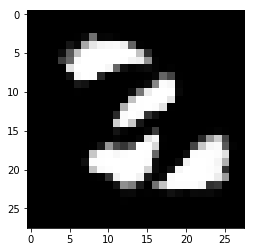

Loop: 155100, Generator_loss: -0.010822, Discriminator_loss: 0.0056292
Loop: 155200, Generator_loss: -0.012065, Discriminator_loss: 0.0085161
Loop: 155300, Generator_loss: -0.0062108, Discriminator_loss: 0.0062389
Loop: 155400, Generator_loss: -0.011502, Discriminator_loss: 0.00447
Loop: 155500, Generator_loss: -0.012655, Discriminator_loss: 0.0077624
Loop: 155600, Generator_loss: -0.011602, Discriminator_loss: 0.0068713
Loop: 155700, Generator_loss: -0.0069216, Discriminator_loss: 0.004286
Loop: 155800, Generator_loss: -0.0091082, Discriminator_loss: 0.0070485
Loop: 155900, Generator_loss: -0.011711, Discriminator_loss: 0.0070035
Loop: 156000, Generator_loss: -0.0090745, Discriminator_loss: 0.008657


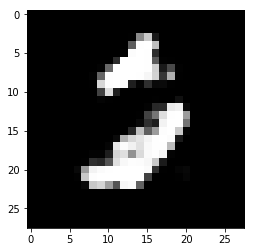

Loop: 156100, Generator_loss: -0.0095728, Discriminator_loss: 0.0083927
Loop: 156200, Generator_loss: -0.0091201, Discriminator_loss: 0.0090008
Loop: 156300, Generator_loss: -0.007665, Discriminator_loss: 0.0056168
Loop: 156400, Generator_loss: -0.011676, Discriminator_loss: 0.0075618
Loop: 156500, Generator_loss: -0.0059942, Discriminator_loss: 0.008021
Loop: 156600, Generator_loss: -0.010006, Discriminator_loss: 0.0066632
Loop: 156700, Generator_loss: -0.0086162, Discriminator_loss: 0.0069534
Loop: 156800, Generator_loss: -0.010268, Discriminator_loss: 0.0082529
Loop: 156900, Generator_loss: -0.01141, Discriminator_loss: 0.0078529
Loop: 157000, Generator_loss: -0.0078868, Discriminator_loss: 0.0054376


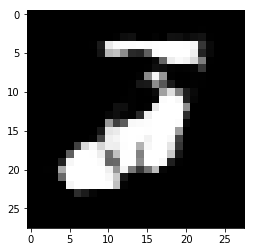

Loop: 157100, Generator_loss: -0.0092467, Discriminator_loss: 0.0078572
Loop: 157200, Generator_loss: -0.011715, Discriminator_loss: 0.004857
Loop: 157300, Generator_loss: -0.009523, Discriminator_loss: 0.0057009
Loop: 157400, Generator_loss: -0.0103, Discriminator_loss: 0.0064685
Loop: 157500, Generator_loss: -0.010616, Discriminator_loss: 0.0076718
Loop: 157600, Generator_loss: -0.0069757, Discriminator_loss: 0.0048607
Loop: 157700, Generator_loss: -0.0077968, Discriminator_loss: 0.0080151
Loop: 157800, Generator_loss: -0.0068899, Discriminator_loss: 0.0047
Loop: 157900, Generator_loss: -0.0089422, Discriminator_loss: 0.0063623
Loop: 158000, Generator_loss: -0.0099327, Discriminator_loss: 0.0061346


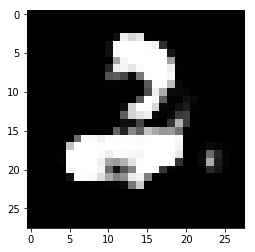

Loop: 158100, Generator_loss: -0.0062952, Discriminator_loss: 0.0061162
Loop: 158200, Generator_loss: -0.011733, Discriminator_loss: 0.0060912
Loop: 158300, Generator_loss: -0.011094, Discriminator_loss: 0.0059212
Loop: 158400, Generator_loss: -0.0090638, Discriminator_loss: 0.0077781
Loop: 158500, Generator_loss: -0.0061, Discriminator_loss: 0.006827
Loop: 158600, Generator_loss: -0.0087983, Discriminator_loss: 0.0069855
Loop: 158700, Generator_loss: -0.0093995, Discriminator_loss: 0.0065649
Loop: 158800, Generator_loss: -0.0088804, Discriminator_loss: 0.0055056
Loop: 158900, Generator_loss: -0.0093365, Discriminator_loss: 0.0075558
Loop: 159000, Generator_loss: -0.0086312, Discriminator_loss: 0.0057777


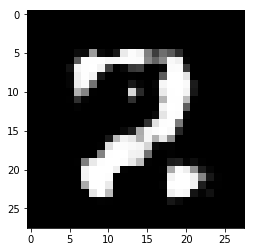

Loop: 159100, Generator_loss: -0.0097228, Discriminator_loss: 0.0065375
Loop: 159200, Generator_loss: -0.009087, Discriminator_loss: 0.003623
Loop: 159300, Generator_loss: -0.015052, Discriminator_loss: 0.0087654
Loop: 159400, Generator_loss: -0.0090849, Discriminator_loss: 0.0077124
Loop: 159500, Generator_loss: -0.010693, Discriminator_loss: 0.0072545
Loop: 159600, Generator_loss: -0.0085202, Discriminator_loss: 0.0053944
Loop: 159700, Generator_loss: -0.014096, Discriminator_loss: 0.008359
Loop: 159800, Generator_loss: -0.0099772, Discriminator_loss: 0.0072791
Loop: 159900, Generator_loss: -0.0077346, Discriminator_loss: 0.0062959
Loop: 160000, Generator_loss: -0.011831, Discriminator_loss: 0.0070984


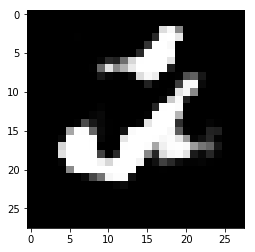

Loop: 160100, Generator_loss: -0.0095483, Discriminator_loss: 0.0074971
Loop: 160200, Generator_loss: -0.0097437, Discriminator_loss: 0.004375
Loop: 160300, Generator_loss: -0.0076694, Discriminator_loss: 0.0060127
Loop: 160400, Generator_loss: -0.008706, Discriminator_loss: 0.0057437
Loop: 160500, Generator_loss: -0.012305, Discriminator_loss: 0.0063344
Loop: 160600, Generator_loss: -0.0074426, Discriminator_loss: 0.0066736
Loop: 160700, Generator_loss: -0.010271, Discriminator_loss: 0.0036158
Loop: 160800, Generator_loss: -0.012401, Discriminator_loss: 0.0053058
Loop: 160900, Generator_loss: -0.0058443, Discriminator_loss: 0.0067268
Loop: 161000, Generator_loss: -0.012298, Discriminator_loss: 0.0060703


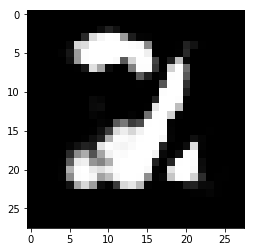

Loop: 161100, Generator_loss: -0.0088579, Discriminator_loss: 0.0074449
Loop: 161200, Generator_loss: -0.009516, Discriminator_loss: 0.0058581
Loop: 161300, Generator_loss: -0.0069156, Discriminator_loss: 0.0053099
Loop: 161400, Generator_loss: -0.0094318, Discriminator_loss: 0.0056611
Loop: 161500, Generator_loss: -0.011156, Discriminator_loss: 0.0083582
Loop: 161600, Generator_loss: -0.010509, Discriminator_loss: 0.0056592
Loop: 161700, Generator_loss: -0.0085661, Discriminator_loss: 0.0076645
Loop: 161800, Generator_loss: -0.011931, Discriminator_loss: 0.0062905
Loop: 161900, Generator_loss: -0.006982, Discriminator_loss: 0.00808
Loop: 162000, Generator_loss: -0.0090961, Discriminator_loss: 0.0065101


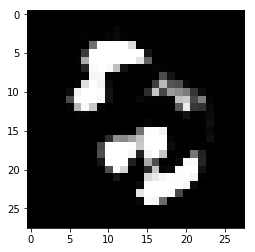

Loop: 162100, Generator_loss: -0.0065377, Discriminator_loss: 0.0057178
Loop: 162200, Generator_loss: -0.011056, Discriminator_loss: 0.0059178
Loop: 162300, Generator_loss: -0.0068804, Discriminator_loss: 0.0063813
Loop: 162400, Generator_loss: -0.012453, Discriminator_loss: 0.0069369
Loop: 162500, Generator_loss: -0.0089937, Discriminator_loss: 0.005621
Loop: 162600, Generator_loss: -0.0032702, Discriminator_loss: 0.0067068
Loop: 162700, Generator_loss: -0.0072776, Discriminator_loss: 0.0058933
Loop: 162800, Generator_loss: -0.010153, Discriminator_loss: 0.0068379
Loop: 162900, Generator_loss: -0.0085586, Discriminator_loss: 0.0060998
Loop: 163000, Generator_loss: -0.0085245, Discriminator_loss: 0.0059085


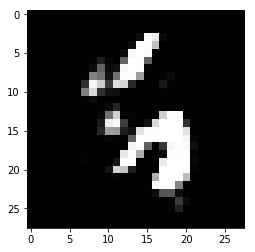

Loop: 163100, Generator_loss: -0.0044741, Discriminator_loss: 0.0059874
Loop: 163200, Generator_loss: -0.010374, Discriminator_loss: 0.0081011
Loop: 163300, Generator_loss: -0.0054034, Discriminator_loss: 0.0081146
Loop: 163400, Generator_loss: -0.010752, Discriminator_loss: 0.0063753
Loop: 163500, Generator_loss: -0.0092101, Discriminator_loss: 0.0037259
Loop: 163600, Generator_loss: -0.0092995, Discriminator_loss: 0.0080395
Loop: 163700, Generator_loss: -0.013857, Discriminator_loss: 0.0087287
Loop: 163800, Generator_loss: -0.0042004, Discriminator_loss: 0.0064185
Loop: 163900, Generator_loss: -0.0095265, Discriminator_loss: 0.0062488
Loop: 164000, Generator_loss: -0.012205, Discriminator_loss: 0.0090114


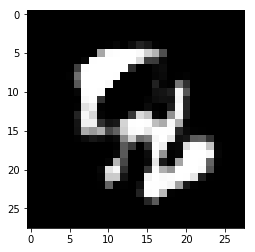

Loop: 164100, Generator_loss: -0.0089879, Discriminator_loss: 0.0058338
Loop: 164200, Generator_loss: -0.0068633, Discriminator_loss: 0.0082587
Loop: 164300, Generator_loss: -0.0098481, Discriminator_loss: 0.00756
Loop: 164400, Generator_loss: -0.0086258, Discriminator_loss: 0.0054975
Loop: 164500, Generator_loss: -0.01473, Discriminator_loss: 0.0069265
Loop: 164600, Generator_loss: -0.0077946, Discriminator_loss: 0.0068419
Loop: 164700, Generator_loss: -0.0090877, Discriminator_loss: 0.0065815
Loop: 164800, Generator_loss: -0.016934, Discriminator_loss: 0.0066332
Loop: 164900, Generator_loss: -0.008906, Discriminator_loss: 0.0053174
Loop: 165000, Generator_loss: -0.0049877, Discriminator_loss: 0.0080636


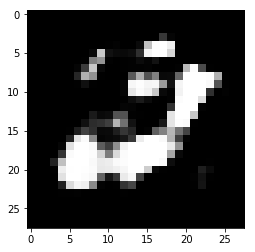

Loop: 165100, Generator_loss: -0.015914, Discriminator_loss: 0.006687
Loop: 165200, Generator_loss: -0.0051166, Discriminator_loss: 0.005752
Loop: 165300, Generator_loss: -0.011725, Discriminator_loss: 0.0059905
Loop: 165400, Generator_loss: -0.01027, Discriminator_loss: 0.0046935
Loop: 165500, Generator_loss: -0.0080123, Discriminator_loss: 0.0039395
Loop: 165600, Generator_loss: -0.010607, Discriminator_loss: 0.0045776
Loop: 165700, Generator_loss: -0.0086124, Discriminator_loss: 0.0067365
Loop: 165800, Generator_loss: -0.0094915, Discriminator_loss: 0.0055444
Loop: 165900, Generator_loss: -0.0085024, Discriminator_loss: 0.0090553
Loop: 166000, Generator_loss: -0.0067301, Discriminator_loss: 0.0067714


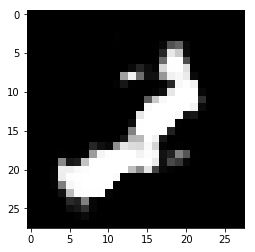

Loop: 166100, Generator_loss: -0.010663, Discriminator_loss: 0.0066697
Loop: 166200, Generator_loss: -0.013133, Discriminator_loss: 0.006652
Loop: 166300, Generator_loss: -0.0069011, Discriminator_loss: 0.0062557
Loop: 166400, Generator_loss: -0.012615, Discriminator_loss: 0.0063645
Loop: 166500, Generator_loss: -0.010425, Discriminator_loss: 0.0085564
Loop: 166600, Generator_loss: -0.0082992, Discriminator_loss: 0.0056109
Loop: 166700, Generator_loss: -0.0096269, Discriminator_loss: 0.0057384
Loop: 166800, Generator_loss: -0.0064946, Discriminator_loss: 0.0063397
Loop: 166900, Generator_loss: -0.015423, Discriminator_loss: 0.0053682
Loop: 167000, Generator_loss: -0.0096917, Discriminator_loss: 0.0051704


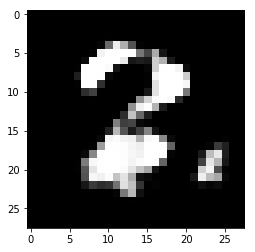

Loop: 167100, Generator_loss: -0.0065894, Discriminator_loss: 0.0070251
Loop: 167200, Generator_loss: -0.010458, Discriminator_loss: 0.0075604
Loop: 167300, Generator_loss: -0.0095505, Discriminator_loss: 0.0071529
Loop: 167400, Generator_loss: -0.014393, Discriminator_loss: 0.0061168
Loop: 167500, Generator_loss: -0.0051609, Discriminator_loss: 0.0065281
Loop: 167600, Generator_loss: -0.0081598, Discriminator_loss: 0.008088
Loop: 167700, Generator_loss: -0.0084743, Discriminator_loss: 0.0058841
Loop: 167800, Generator_loss: -0.010964, Discriminator_loss: 0.0069924
Loop: 167900, Generator_loss: -0.0076112, Discriminator_loss: 0.0077663
Loop: 168000, Generator_loss: -0.012791, Discriminator_loss: 0.0086346


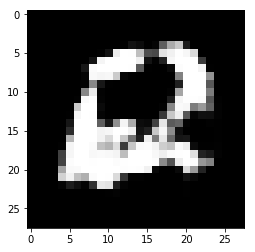

Loop: 168100, Generator_loss: -0.012741, Discriminator_loss: 0.0049449
Loop: 168200, Generator_loss: -0.010924, Discriminator_loss: 0.0056585
Loop: 168300, Generator_loss: -0.0099174, Discriminator_loss: 0.007375
Loop: 168400, Generator_loss: -0.0085816, Discriminator_loss: 0.0065508
Loop: 168500, Generator_loss: -0.0063808, Discriminator_loss: 0.0075711
Loop: 168600, Generator_loss: -0.0063008, Discriminator_loss: 0.006399
Loop: 168700, Generator_loss: -0.0087058, Discriminator_loss: 0.0053694
Loop: 168800, Generator_loss: -0.010174, Discriminator_loss: 0.0046404
Loop: 168900, Generator_loss: -0.0095919, Discriminator_loss: 0.0063018
Loop: 169000, Generator_loss: -0.01185, Discriminator_loss: 0.0061689


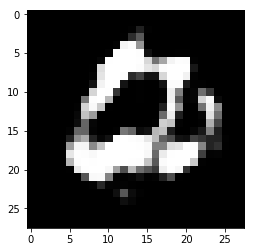

Loop: 169100, Generator_loss: -0.012344, Discriminator_loss: 0.0060436
Loop: 169200, Generator_loss: -0.0097744, Discriminator_loss: 0.005951
Loop: 169300, Generator_loss: -0.0092836, Discriminator_loss: 0.0068826
Loop: 169400, Generator_loss: -0.0094515, Discriminator_loss: 0.0049456
Loop: 169500, Generator_loss: -0.014419, Discriminator_loss: 0.006504
Loop: 169600, Generator_loss: -0.010327, Discriminator_loss: 0.0080986
Loop: 169700, Generator_loss: -0.01295, Discriminator_loss: 0.0076461
Loop: 169800, Generator_loss: -0.011985, Discriminator_loss: 0.0045475
Loop: 169900, Generator_loss: -0.0085234, Discriminator_loss: 0.0061477
Loop: 170000, Generator_loss: -0.0052396, Discriminator_loss: 0.0073953


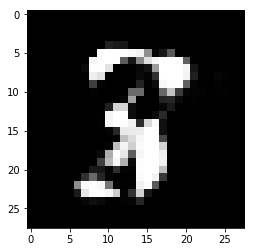

Loop: 170100, Generator_loss: -0.0031824, Discriminator_loss: 0.0047947
Loop: 170200, Generator_loss: -0.011792, Discriminator_loss: 0.0081257
Loop: 170300, Generator_loss: -0.0088881, Discriminator_loss: 0.0044686
Loop: 170400, Generator_loss: -0.0099178, Discriminator_loss: 0.0050179
Loop: 170500, Generator_loss: -0.010874, Discriminator_loss: 0.0070279
Loop: 170600, Generator_loss: -0.0092542, Discriminator_loss: 0.0058647
Loop: 170700, Generator_loss: -0.0078959, Discriminator_loss: 0.0052491
Loop: 170800, Generator_loss: -0.0088017, Discriminator_loss: 0.0045554
Loop: 170900, Generator_loss: -0.0063947, Discriminator_loss: 0.006098
Loop: 171000, Generator_loss: -0.0034016, Discriminator_loss: 0.0085924


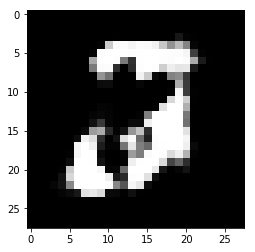

Loop: 171100, Generator_loss: -0.0076013, Discriminator_loss: 0.0047738
Loop: 171200, Generator_loss: -0.010902, Discriminator_loss: 0.007515
Loop: 171300, Generator_loss: -0.014254, Discriminator_loss: 0.0068689
Loop: 171400, Generator_loss: -0.012507, Discriminator_loss: 0.0060825
Loop: 171500, Generator_loss: -0.009837, Discriminator_loss: 0.0053901
Loop: 171600, Generator_loss: -0.0093843, Discriminator_loss: 0.0059022
Loop: 171700, Generator_loss: -0.0095396, Discriminator_loss: 0.005646
Loop: 171800, Generator_loss: -0.010568, Discriminator_loss: 0.0067461
Loop: 171900, Generator_loss: -0.01289, Discriminator_loss: 0.0077347
Loop: 172000, Generator_loss: -0.010923, Discriminator_loss: 0.0079424


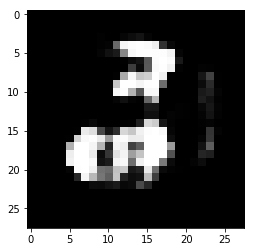

Loop: 172100, Generator_loss: -0.0052881, Discriminator_loss: 0.005699
Loop: 172200, Generator_loss: -0.014175, Discriminator_loss: 0.0049495
Loop: 172300, Generator_loss: -0.0082347, Discriminator_loss: 0.0073759
Loop: 172400, Generator_loss: -0.010057, Discriminator_loss: 0.0055271
Loop: 172500, Generator_loss: -0.011292, Discriminator_loss: 0.0059799
Loop: 172600, Generator_loss: -0.0098521, Discriminator_loss: 0.0054253
Loop: 172700, Generator_loss: -0.014545, Discriminator_loss: 0.0075599
Loop: 172800, Generator_loss: -0.010039, Discriminator_loss: 0.007314
Loop: 172900, Generator_loss: -0.0073966, Discriminator_loss: 0.0054303
Loop: 173000, Generator_loss: -0.011638, Discriminator_loss: 0.0043775


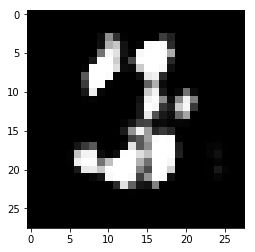

Loop: 173100, Generator_loss: -0.014307, Discriminator_loss: 0.0044764
Loop: 173200, Generator_loss: -0.0072964, Discriminator_loss: 0.0050089
Loop: 173300, Generator_loss: -0.0073329, Discriminator_loss: 0.0082422
Loop: 173400, Generator_loss: -0.010513, Discriminator_loss: 0.0064841
Loop: 173500, Generator_loss: -0.0082557, Discriminator_loss: 0.0059543
Loop: 173600, Generator_loss: -0.0077564, Discriminator_loss: 0.0062772
Loop: 173700, Generator_loss: -0.0078154, Discriminator_loss: 0.0081573
Loop: 173800, Generator_loss: -0.0094944, Discriminator_loss: 0.005533
Loop: 173900, Generator_loss: -0.010362, Discriminator_loss: 0.005564
Loop: 174000, Generator_loss: -0.009216, Discriminator_loss: 0.0048292


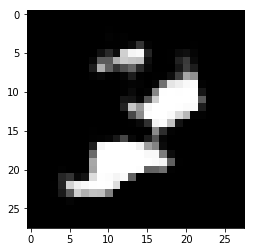

Loop: 174100, Generator_loss: -0.0083697, Discriminator_loss: 0.0073766
Loop: 174200, Generator_loss: -0.012486, Discriminator_loss: 0.0050337
Loop: 174300, Generator_loss: -0.014676, Discriminator_loss: 0.0065215
Loop: 174400, Generator_loss: -0.0068937, Discriminator_loss: 0.0057261
Loop: 174500, Generator_loss: -0.0049856, Discriminator_loss: 0.0042596
Loop: 174600, Generator_loss: -0.018698, Discriminator_loss: 0.0064981
Loop: 174700, Generator_loss: -0.0054736, Discriminator_loss: 0.0076382
Loop: 174800, Generator_loss: -0.0112, Discriminator_loss: 0.0066539
Loop: 174900, Generator_loss: -0.0056281, Discriminator_loss: 0.0066593
Loop: 175000, Generator_loss: -0.01097, Discriminator_loss: 0.0054656


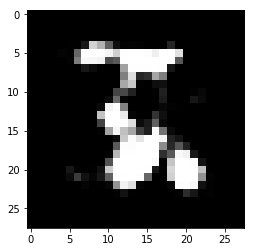

Loop: 175100, Generator_loss: -0.0090199, Discriminator_loss: 0.006235
Loop: 175200, Generator_loss: -0.011305, Discriminator_loss: 0.003016
Loop: 175300, Generator_loss: -0.0096203, Discriminator_loss: 0.0041225
Loop: 175400, Generator_loss: -0.0063349, Discriminator_loss: 0.0074029
Loop: 175500, Generator_loss: -0.012573, Discriminator_loss: 0.0067528
Loop: 175600, Generator_loss: -0.010417, Discriminator_loss: 0.0090914
Loop: 175700, Generator_loss: -0.014294, Discriminator_loss: 0.0076393
Loop: 175800, Generator_loss: -0.013438, Discriminator_loss: 0.006387
Loop: 175900, Generator_loss: -0.0069066, Discriminator_loss: 0.0067787
Loop: 176000, Generator_loss: -0.011139, Discriminator_loss: 0.0092321


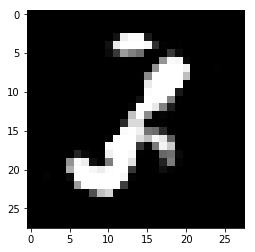

Loop: 176100, Generator_loss: -0.0084085, Discriminator_loss: 0.0057285
Loop: 176200, Generator_loss: -0.0090673, Discriminator_loss: 0.0069279
Loop: 176300, Generator_loss: -0.014657, Discriminator_loss: 0.0063601
Loop: 176400, Generator_loss: -0.0099142, Discriminator_loss: 0.008183
Loop: 176500, Generator_loss: -0.010683, Discriminator_loss: 0.0050443
Loop: 176600, Generator_loss: -0.012717, Discriminator_loss: 0.0081898
Loop: 176700, Generator_loss: -0.007977, Discriminator_loss: 0.0061985
Loop: 176800, Generator_loss: -0.010642, Discriminator_loss: 0.005959
Loop: 176900, Generator_loss: -0.0078998, Discriminator_loss: 0.0079023
Loop: 177000, Generator_loss: -0.011603, Discriminator_loss: 0.0060754


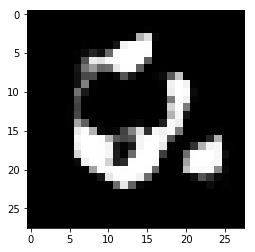

Loop: 177100, Generator_loss: -0.0087604, Discriminator_loss: 0.0052491
Loop: 177200, Generator_loss: -0.005579, Discriminator_loss: 0.0060089
Loop: 177300, Generator_loss: -0.014398, Discriminator_loss: 0.006356
Loop: 177400, Generator_loss: -0.0077665, Discriminator_loss: 0.0060269
Loop: 177500, Generator_loss: -0.0089509, Discriminator_loss: 0.0048527
Loop: 177600, Generator_loss: -0.010668, Discriminator_loss: 0.0058152
Loop: 177700, Generator_loss: -0.01185, Discriminator_loss: 0.006179
Loop: 177800, Generator_loss: -0.0083112, Discriminator_loss: 0.0064922
Loop: 177900, Generator_loss: -0.013583, Discriminator_loss: 0.0069545
Loop: 178000, Generator_loss: -0.0094296, Discriminator_loss: 0.006148


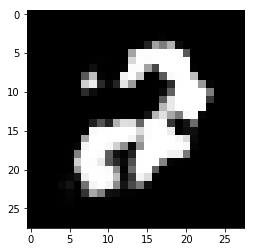

Loop: 178100, Generator_loss: -0.0077368, Discriminator_loss: 0.006342
Loop: 178200, Generator_loss: -0.012777, Discriminator_loss: 0.0061092
Loop: 178300, Generator_loss: -0.015554, Discriminator_loss: 0.007621
Loop: 178400, Generator_loss: -0.013544, Discriminator_loss: 0.0087125
Loop: 178500, Generator_loss: -0.0077974, Discriminator_loss: 0.0064532
Loop: 178600, Generator_loss: -0.010228, Discriminator_loss: 0.006823
Loop: 178700, Generator_loss: -0.0065968, Discriminator_loss: 0.0059749
Loop: 178800, Generator_loss: -0.0085528, Discriminator_loss: 0.0077956
Loop: 178900, Generator_loss: -0.010797, Discriminator_loss: 0.0059601
Loop: 179000, Generator_loss: -0.009459, Discriminator_loss: 0.0064121


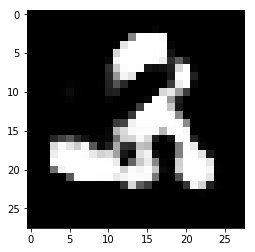

Loop: 179100, Generator_loss: -0.013557, Discriminator_loss: 0.0052913
Loop: 179200, Generator_loss: -0.0077989, Discriminator_loss: 0.00589
Loop: 179300, Generator_loss: -0.012377, Discriminator_loss: 0.0059669
Loop: 179400, Generator_loss: -0.0066495, Discriminator_loss: 0.0063403
Loop: 179500, Generator_loss: -0.012771, Discriminator_loss: 0.0048126
Loop: 179600, Generator_loss: -0.010223, Discriminator_loss: 0.0049862
Loop: 179700, Generator_loss: -0.0089972, Discriminator_loss: 0.0068996
Loop: 179800, Generator_loss: -0.01193, Discriminator_loss: 0.0064905
Loop: 179900, Generator_loss: -0.012504, Discriminator_loss: 0.0064399
Loop: 180000, Generator_loss: -0.0053585, Discriminator_loss: 0.0063507


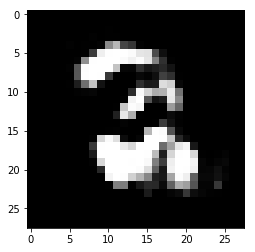

Loop: 180100, Generator_loss: -0.0064084, Discriminator_loss: 0.005419
Loop: 180200, Generator_loss: -0.010664, Discriminator_loss: 0.0052297
Loop: 180300, Generator_loss: -0.012897, Discriminator_loss: 0.006098
Loop: 180400, Generator_loss: -0.0047135, Discriminator_loss: 0.0057616
Loop: 180500, Generator_loss: -0.012021, Discriminator_loss: 0.0040281
Loop: 180600, Generator_loss: -0.0060419, Discriminator_loss: 0.0045121
Loop: 180700, Generator_loss: -0.0086262, Discriminator_loss: 0.0063916
Loop: 180800, Generator_loss: -0.011265, Discriminator_loss: 0.0067567
Loop: 180900, Generator_loss: -0.011226, Discriminator_loss: 0.0058654
Loop: 181000, Generator_loss: -0.0082691, Discriminator_loss: 0.0056298


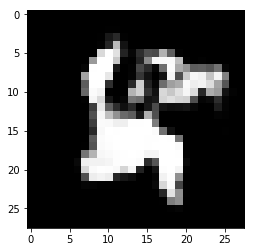

Loop: 181100, Generator_loss: -0.015429, Discriminator_loss: 0.0076629
Loop: 181200, Generator_loss: -0.010064, Discriminator_loss: 0.0081294
Loop: 181300, Generator_loss: -0.01091, Discriminator_loss: 0.0061117
Loop: 181400, Generator_loss: -0.008086, Discriminator_loss: 0.0063378
Loop: 181500, Generator_loss: -0.0105, Discriminator_loss: 0.0064744
Loop: 181600, Generator_loss: -0.012655, Discriminator_loss: 0.0076532
Loop: 181700, Generator_loss: -0.010649, Discriminator_loss: 0.006052
Loop: 181800, Generator_loss: -0.011516, Discriminator_loss: 0.0065314
Loop: 181900, Generator_loss: -0.0093646, Discriminator_loss: 0.0077923
Loop: 182000, Generator_loss: -0.009348, Discriminator_loss: 0.0062203


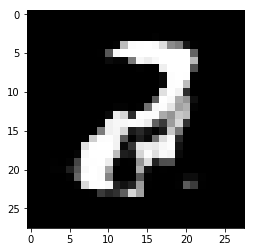

Loop: 182100, Generator_loss: -0.012845, Discriminator_loss: 0.0060507
Loop: 182200, Generator_loss: -0.0080668, Discriminator_loss: 0.005335
Loop: 182300, Generator_loss: -0.012495, Discriminator_loss: 0.0052419
Loop: 182400, Generator_loss: -0.0080882, Discriminator_loss: 0.0032719
Loop: 182500, Generator_loss: -0.010891, Discriminator_loss: 0.0056408
Loop: 182600, Generator_loss: -0.01214, Discriminator_loss: 0.0085229
Loop: 182700, Generator_loss: -0.0088214, Discriminator_loss: 0.0062458
Loop: 182800, Generator_loss: -0.0096331, Discriminator_loss: 0.0070091
Loop: 182900, Generator_loss: -0.012276, Discriminator_loss: 0.0088877
Loop: 183000, Generator_loss: -0.0053573, Discriminator_loss: 0.0058198


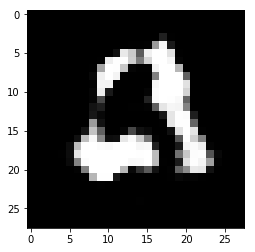

Loop: 183100, Generator_loss: -0.0096288, Discriminator_loss: 0.0069803
Loop: 183200, Generator_loss: -0.011299, Discriminator_loss: 0.0066338
Loop: 183300, Generator_loss: -0.011562, Discriminator_loss: 0.0049232
Loop: 183400, Generator_loss: -0.0098219, Discriminator_loss: 0.0049195
Loop: 183500, Generator_loss: -0.012532, Discriminator_loss: 0.0067312
Loop: 183600, Generator_loss: -0.010239, Discriminator_loss: 0.0068562
Loop: 183700, Generator_loss: -0.015128, Discriminator_loss: 0.0044064
Loop: 183800, Generator_loss: -0.0093267, Discriminator_loss: 0.008048
Loop: 183900, Generator_loss: -0.006958, Discriminator_loss: 0.0062882
Loop: 184000, Generator_loss: -0.0072324, Discriminator_loss: 0.0067972


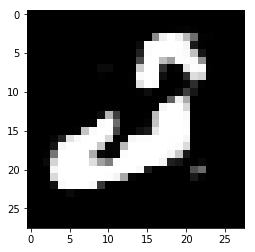

Loop: 184100, Generator_loss: -0.0085373, Discriminator_loss: 0.0047584
Loop: 184200, Generator_loss: -0.0058864, Discriminator_loss: 0.0060719
Loop: 184300, Generator_loss: -0.01077, Discriminator_loss: 0.0062806
Loop: 184400, Generator_loss: -0.0083391, Discriminator_loss: 0.0075904
Loop: 184500, Generator_loss: -0.0065204, Discriminator_loss: 0.006429
Loop: 184600, Generator_loss: -0.017469, Discriminator_loss: 0.0047313
Loop: 184700, Generator_loss: -0.0041996, Discriminator_loss: 0.0070523
Loop: 184800, Generator_loss: -0.0088483, Discriminator_loss: 0.0070226
Loop: 184900, Generator_loss: -0.0068386, Discriminator_loss: 0.0064283
Loop: 185000, Generator_loss: -0.0099625, Discriminator_loss: 0.0064871


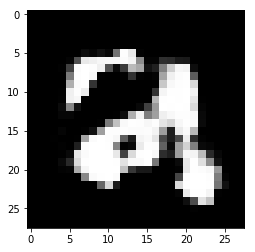

Loop: 185100, Generator_loss: -0.0074231, Discriminator_loss: 0.0059687
Loop: 185200, Generator_loss: -0.008251, Discriminator_loss: 0.0034427
Loop: 185300, Generator_loss: -0.012773, Discriminator_loss: 0.0063921
Loop: 185400, Generator_loss: -0.0093368, Discriminator_loss: 0.0055932
Loop: 185500, Generator_loss: -0.010601, Discriminator_loss: 0.0055862
Loop: 185600, Generator_loss: -0.011256, Discriminator_loss: 0.0060129
Loop: 185700, Generator_loss: -0.013452, Discriminator_loss: 0.0070879
Loop: 185800, Generator_loss: -0.01078, Discriminator_loss: 0.006194
Loop: 185900, Generator_loss: -0.011451, Discriminator_loss: 0.0054355
Loop: 186000, Generator_loss: -0.0099912, Discriminator_loss: 0.007491


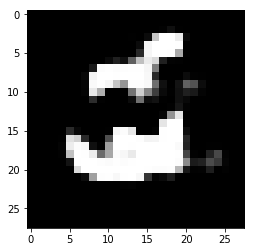

Loop: 186100, Generator_loss: -0.0082827, Discriminator_loss: 0.0059941
Loop: 186200, Generator_loss: -0.01052, Discriminator_loss: 0.0090031
Loop: 186300, Generator_loss: -0.011201, Discriminator_loss: 0.0077323
Loop: 186400, Generator_loss: -0.0040541, Discriminator_loss: 0.0063087
Loop: 186500, Generator_loss: -0.0094742, Discriminator_loss: 0.005202
Loop: 186600, Generator_loss: -0.0063288, Discriminator_loss: 0.0079702
Loop: 186700, Generator_loss: -0.0084136, Discriminator_loss: 0.0063078
Loop: 186800, Generator_loss: -0.0074314, Discriminator_loss: 0.0058724
Loop: 186900, Generator_loss: -0.01168, Discriminator_loss: 0.0059184
Loop: 187000, Generator_loss: -0.011046, Discriminator_loss: 0.0058234


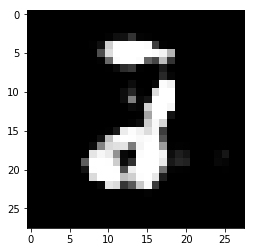

Loop: 187100, Generator_loss: -0.0086738, Discriminator_loss: 0.0055834
Loop: 187200, Generator_loss: -0.0094077, Discriminator_loss: 0.00502
Loop: 187300, Generator_loss: -0.011047, Discriminator_loss: 0.0084263
Loop: 187400, Generator_loss: -0.0092262, Discriminator_loss: 0.0057863
Loop: 187500, Generator_loss: -0.011542, Discriminator_loss: 0.0042339
Loop: 187600, Generator_loss: -0.011315, Discriminator_loss: 0.0056924
Loop: 187700, Generator_loss: -0.0080069, Discriminator_loss: 0.0070788
Loop: 187800, Generator_loss: -0.0076065, Discriminator_loss: 0.0069462
Loop: 187900, Generator_loss: -0.0074983, Discriminator_loss: 0.0044424
Loop: 188000, Generator_loss: -0.0072804, Discriminator_loss: 0.0060672


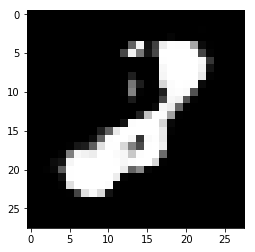

Loop: 188100, Generator_loss: -0.0048512, Discriminator_loss: 0.0069782
Loop: 188200, Generator_loss: -0.0084442, Discriminator_loss: 0.0035492
Loop: 188300, Generator_loss: -0.0099156, Discriminator_loss: 0.0070987
Loop: 188400, Generator_loss: -0.010572, Discriminator_loss: 0.0059369
Loop: 188500, Generator_loss: -0.011643, Discriminator_loss: 0.0045146
Loop: 188600, Generator_loss: -0.010532, Discriminator_loss: 0.0072675
Loop: 188700, Generator_loss: -0.0074317, Discriminator_loss: 0.0045503
Loop: 188800, Generator_loss: -0.0099645, Discriminator_loss: 0.0049628
Loop: 188900, Generator_loss: -0.0079275, Discriminator_loss: 0.0072663
Loop: 189000, Generator_loss: -0.010107, Discriminator_loss: 0.0054764


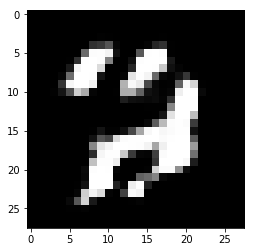

Loop: 189100, Generator_loss: -0.010088, Discriminator_loss: 0.0055373
Loop: 189200, Generator_loss: -0.0072741, Discriminator_loss: 0.0037254
Loop: 189300, Generator_loss: -0.0088638, Discriminator_loss: 0.0046796
Loop: 189400, Generator_loss: -0.010038, Discriminator_loss: 0.0054629
Loop: 189500, Generator_loss: -0.010517, Discriminator_loss: 0.0072054
Loop: 189600, Generator_loss: -0.0095621, Discriminator_loss: 0.004231
Loop: 189700, Generator_loss: -0.010753, Discriminator_loss: 0.0038196
Loop: 189800, Generator_loss: -0.0092641, Discriminator_loss: 0.007776
Loop: 189900, Generator_loss: -0.0095454, Discriminator_loss: 0.0049101
Loop: 190000, Generator_loss: -0.0095389, Discriminator_loss: 0.0054618


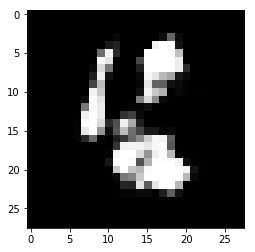

Loop: 190100, Generator_loss: -0.0090985, Discriminator_loss: 0.0043787
Loop: 190200, Generator_loss: -0.011388, Discriminator_loss: 0.0095006
Loop: 190300, Generator_loss: -0.0097641, Discriminator_loss: 0.004431
Loop: 190400, Generator_loss: -0.013637, Discriminator_loss: 0.0053708
Loop: 190500, Generator_loss: -0.013566, Discriminator_loss: 0.0064939
Loop: 190600, Generator_loss: -0.012235, Discriminator_loss: 0.0049902
Loop: 190700, Generator_loss: -0.0065253, Discriminator_loss: 0.0053632
Loop: 190800, Generator_loss: -0.0097981, Discriminator_loss: 0.0042235
Loop: 190900, Generator_loss: -0.0086526, Discriminator_loss: 0.0061272
Loop: 191000, Generator_loss: -0.0044747, Discriminator_loss: 0.0063393


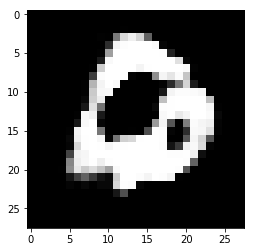

Loop: 191100, Generator_loss: -0.013296, Discriminator_loss: 0.0055421
Loop: 191200, Generator_loss: -0.010196, Discriminator_loss: 0.0076842
Loop: 191300, Generator_loss: -0.0076437, Discriminator_loss: 0.0045862
Loop: 191400, Generator_loss: -0.011875, Discriminator_loss: 0.0078203
Loop: 191500, Generator_loss: -0.0072689, Discriminator_loss: 0.0058292
Loop: 191600, Generator_loss: -0.0088526, Discriminator_loss: 0.0058081
Loop: 191700, Generator_loss: -0.0082987, Discriminator_loss: 0.0068685
Loop: 191800, Generator_loss: -0.0095911, Discriminator_loss: 0.00558
Loop: 191900, Generator_loss: -0.011481, Discriminator_loss: 0.0063064
Loop: 192000, Generator_loss: -0.012035, Discriminator_loss: 0.0070031


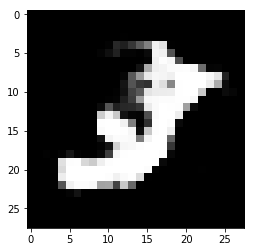

Loop: 192100, Generator_loss: -0.0065546, Discriminator_loss: 0.0058274
Loop: 192200, Generator_loss: -0.0045474, Discriminator_loss: 0.0068339
Loop: 192300, Generator_loss: -0.0040346, Discriminator_loss: 0.0080021
Loop: 192400, Generator_loss: -0.01121, Discriminator_loss: 0.0055149
Loop: 192500, Generator_loss: -0.0069301, Discriminator_loss: 0.0061964
Loop: 192600, Generator_loss: -0.0049379, Discriminator_loss: 0.0063564
Loop: 192700, Generator_loss: -0.0085328, Discriminator_loss: 0.0074524
Loop: 192800, Generator_loss: -0.010919, Discriminator_loss: 0.005515
Loop: 192900, Generator_loss: -0.010927, Discriminator_loss: 0.0066371
Loop: 193000, Generator_loss: -0.0093345, Discriminator_loss: 0.0060439


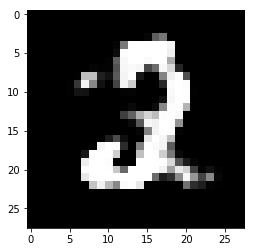

Loop: 193100, Generator_loss: -0.013345, Discriminator_loss: 0.0045133
Loop: 193200, Generator_loss: -0.0070632, Discriminator_loss: 0.0051047
Loop: 193300, Generator_loss: -0.0027138, Discriminator_loss: 0.0077086
Loop: 193400, Generator_loss: -0.0081602, Discriminator_loss: 0.0064603
Loop: 193500, Generator_loss: -0.0097225, Discriminator_loss: 0.0068555
Loop: 193600, Generator_loss: -0.0096684, Discriminator_loss: 0.0039929
Loop: 193700, Generator_loss: -0.0058619, Discriminator_loss: 0.0062819
Loop: 193800, Generator_loss: -0.0046788, Discriminator_loss: 0.0059174
Loop: 193900, Generator_loss: -0.011622, Discriminator_loss: 0.0066351
Loop: 194000, Generator_loss: -0.010033, Discriminator_loss: 0.0054632


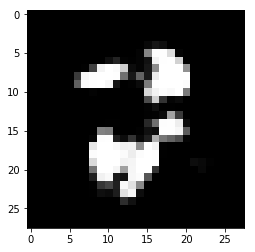

Loop: 194100, Generator_loss: -0.010394, Discriminator_loss: 0.0072223
Loop: 194200, Generator_loss: -0.011802, Discriminator_loss: 0.0064098
Loop: 194300, Generator_loss: -0.016071, Discriminator_loss: 0.0042406
Loop: 194400, Generator_loss: -0.0071922, Discriminator_loss: 0.0060204
Loop: 194500, Generator_loss: -0.0074898, Discriminator_loss: 0.0060205
Loop: 194600, Generator_loss: -0.006227, Discriminator_loss: 0.0036488
Loop: 194700, Generator_loss: -0.009782, Discriminator_loss: 0.005363
Loop: 194800, Generator_loss: -0.0074412, Discriminator_loss: 0.0061629
Loop: 194900, Generator_loss: -0.0034611, Discriminator_loss: 0.0042436
Loop: 195000, Generator_loss: -0.012356, Discriminator_loss: 0.0076054


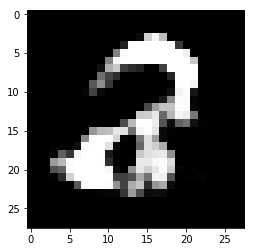

Loop: 195100, Generator_loss: -0.0056003, Discriminator_loss: 0.0058945
Loop: 195200, Generator_loss: -0.0090792, Discriminator_loss: 0.0066108
Loop: 195300, Generator_loss: -0.010056, Discriminator_loss: 0.0047272
Loop: 195400, Generator_loss: -0.007168, Discriminator_loss: 0.0062513
Loop: 195500, Generator_loss: -0.012255, Discriminator_loss: 0.0026065
Loop: 195600, Generator_loss: -0.010648, Discriminator_loss: 0.006854
Loop: 195700, Generator_loss: -0.010336, Discriminator_loss: 0.0061805
Loop: 195800, Generator_loss: -0.0086347, Discriminator_loss: 0.0053613
Loop: 195900, Generator_loss: -0.0076274, Discriminator_loss: 0.005127
Loop: 196000, Generator_loss: -0.0094671, Discriminator_loss: 0.006523


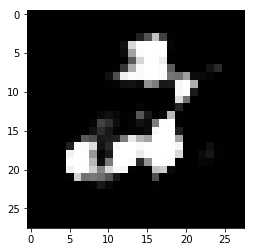

Loop: 196100, Generator_loss: -0.011062, Discriminator_loss: 0.0077954
Loop: 196200, Generator_loss: -0.010362, Discriminator_loss: 0.0049117
Loop: 196300, Generator_loss: -0.01708, Discriminator_loss: 0.0065656
Loop: 196400, Generator_loss: -0.0058545, Discriminator_loss: 0.0040329
Loop: 196500, Generator_loss: -0.011301, Discriminator_loss: 0.006857
Loop: 196600, Generator_loss: -0.014615, Discriminator_loss: 0.007336
Loop: 196700, Generator_loss: -0.0078049, Discriminator_loss: 0.0057886
Loop: 196800, Generator_loss: -0.0033095, Discriminator_loss: 0.0064493
Loop: 196900, Generator_loss: -0.0095758, Discriminator_loss: 0.0059335
Loop: 197000, Generator_loss: -0.0087036, Discriminator_loss: 0.0057454


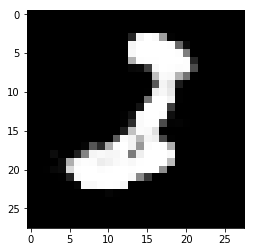

Loop: 197100, Generator_loss: -0.0044993, Discriminator_loss: 0.0062983
Loop: 197200, Generator_loss: -0.013401, Discriminator_loss: 0.0046372
Loop: 197300, Generator_loss: -0.013315, Discriminator_loss: 0.0055714
Loop: 197400, Generator_loss: -0.0098948, Discriminator_loss: 0.0050171
Loop: 197500, Generator_loss: -0.0044743, Discriminator_loss: 0.0060655
Loop: 197600, Generator_loss: -0.011384, Discriminator_loss: 0.0057911
Loop: 197700, Generator_loss: -0.0060571, Discriminator_loss: 0.0076399
Loop: 197800, Generator_loss: -0.013554, Discriminator_loss: 0.0043403
Loop: 197900, Generator_loss: -0.010148, Discriminator_loss: 0.0060261
Loop: 198000, Generator_loss: -0.014031, Discriminator_loss: 0.0061681


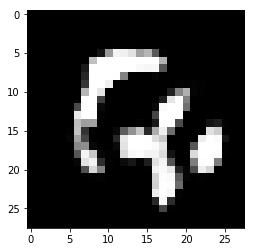

Loop: 198100, Generator_loss: -0.0097656, Discriminator_loss: 0.0061215
Loop: 198200, Generator_loss: -0.011427, Discriminator_loss: 0.0053941
Loop: 198300, Generator_loss: -0.010751, Discriminator_loss: 0.0073988
Loop: 198400, Generator_loss: -0.0078362, Discriminator_loss: 0.0057995
Loop: 198500, Generator_loss: -0.0095149, Discriminator_loss: 0.0048154
Loop: 198600, Generator_loss: -0.0068428, Discriminator_loss: 0.00567
Loop: 198700, Generator_loss: -0.0096995, Discriminator_loss: 0.0021212
Loop: 198800, Generator_loss: -0.010712, Discriminator_loss: 0.0028595
Loop: 198900, Generator_loss: -0.012349, Discriminator_loss: 0.0075148
Loop: 199000, Generator_loss: -0.0067594, Discriminator_loss: 0.0057225


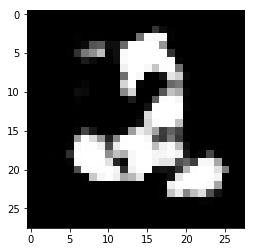

Loop: 199100, Generator_loss: -0.0050329, Discriminator_loss: 0.0048139
Loop: 199200, Generator_loss: -0.013889, Discriminator_loss: 0.0046323
Loop: 199300, Generator_loss: -0.0068574, Discriminator_loss: 0.0043201
Loop: 199400, Generator_loss: -0.010087, Discriminator_loss: 0.007186
Loop: 199500, Generator_loss: -0.012053, Discriminator_loss: 0.0059613
Loop: 199600, Generator_loss: -0.0059715, Discriminator_loss: 0.0064177
Loop: 199700, Generator_loss: -0.010734, Discriminator_loss: 0.0061839
Loop: 199800, Generator_loss: -0.010949, Discriminator_loss: 0.0072957
Loop: 199900, Generator_loss: -0.010734, Discriminator_loss: 0.0054472
Loop: 200000, Generator_loss: -0.0074898, Discriminator_loss: 0.0049542


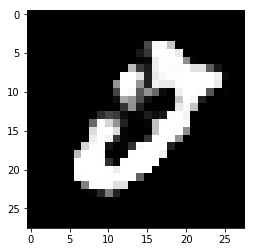

Loop: 200100, Generator_loss: -0.01182, Discriminator_loss: 0.0061336
Loop: 200200, Generator_loss: -0.01251, Discriminator_loss: 0.0065202
Loop: 200300, Generator_loss: -0.0067229, Discriminator_loss: 0.0058068
Loop: 200400, Generator_loss: -0.011433, Discriminator_loss: 0.0063149
Loop: 200500, Generator_loss: -0.011525, Discriminator_loss: 0.0067848
Loop: 200600, Generator_loss: -0.01074, Discriminator_loss: 0.0038352
Loop: 200700, Generator_loss: -0.011341, Discriminator_loss: 0.0064261
Loop: 200800, Generator_loss: -0.0076614, Discriminator_loss: 0.0067016
Loop: 200900, Generator_loss: -0.012641, Discriminator_loss: 0.006871
Loop: 201000, Generator_loss: -0.0080867, Discriminator_loss: 0.0065964


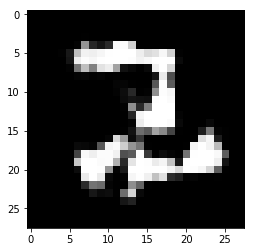

Loop: 201100, Generator_loss: -0.0093294, Discriminator_loss: 0.0063712
Loop: 201200, Generator_loss: -0.009139, Discriminator_loss: 0.0042903
Loop: 201300, Generator_loss: -0.0053256, Discriminator_loss: 0.0072746
Loop: 201400, Generator_loss: -0.0071361, Discriminator_loss: 0.0061387
Loop: 201500, Generator_loss: -0.012474, Discriminator_loss: 0.006382
Loop: 201600, Generator_loss: -0.012642, Discriminator_loss: 0.0045399
Loop: 201700, Generator_loss: -0.008712, Discriminator_loss: 0.0051451
Loop: 201800, Generator_loss: -0.0089909, Discriminator_loss: 0.0055506
Loop: 201900, Generator_loss: -0.01512, Discriminator_loss: 0.0065849
Loop: 202000, Generator_loss: -0.011814, Discriminator_loss: 0.0066081


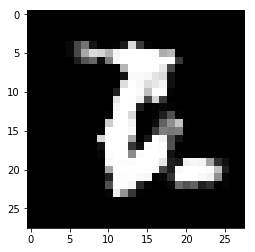

Loop: 202100, Generator_loss: -0.012108, Discriminator_loss: 0.0045583
Loop: 202200, Generator_loss: -0.0085597, Discriminator_loss: 0.0031012
Loop: 202300, Generator_loss: -0.015932, Discriminator_loss: 0.0048706
Loop: 202400, Generator_loss: -0.0081377, Discriminator_loss: 0.0053353
Loop: 202500, Generator_loss: -0.012312, Discriminator_loss: 0.0064478
Loop: 202600, Generator_loss: -0.0088718, Discriminator_loss: 0.0054837
Loop: 202700, Generator_loss: -0.013308, Discriminator_loss: 0.0052124
Loop: 202800, Generator_loss: -0.0089505, Discriminator_loss: 0.0070674
Loop: 202900, Generator_loss: -0.007777, Discriminator_loss: 0.0049659
Loop: 203000, Generator_loss: -0.0061324, Discriminator_loss: 0.0067252


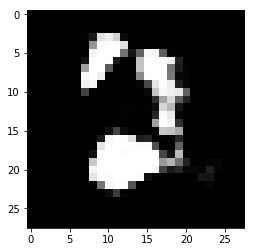

Loop: 203100, Generator_loss: -0.011164, Discriminator_loss: 0.005988
Loop: 203200, Generator_loss: -0.0086692, Discriminator_loss: 0.0066362
Loop: 203300, Generator_loss: -0.0048071, Discriminator_loss: 0.0069026
Loop: 203400, Generator_loss: -0.0080941, Discriminator_loss: 0.005887
Loop: 203500, Generator_loss: -0.0058342, Discriminator_loss: 0.0022745
Loop: 203600, Generator_loss: -0.0058463, Discriminator_loss: 0.0048689
Loop: 203700, Generator_loss: -0.010403, Discriminator_loss: 0.0057395
Loop: 203800, Generator_loss: -0.0049919, Discriminator_loss: 0.0054288
Loop: 203900, Generator_loss: -0.01027, Discriminator_loss: 0.0051172
Loop: 204000, Generator_loss: -0.010044, Discriminator_loss: 0.0079377


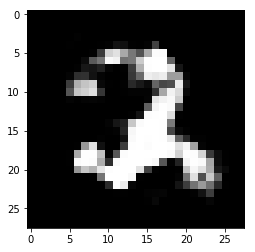

Loop: 204100, Generator_loss: -0.0067679, Discriminator_loss: 0.0025099
Loop: 204200, Generator_loss: -0.0067318, Discriminator_loss: 0.0037603
Loop: 204300, Generator_loss: -0.007624, Discriminator_loss: 0.0062755
Loop: 204400, Generator_loss: -0.010636, Discriminator_loss: 0.0079413
Loop: 204500, Generator_loss: -0.0090436, Discriminator_loss: 0.0061583
Loop: 204600, Generator_loss: -0.010874, Discriminator_loss: 0.0072845
Loop: 204700, Generator_loss: -0.010605, Discriminator_loss: 0.0057418
Loop: 204800, Generator_loss: -0.01118, Discriminator_loss: 0.0035274
Loop: 204900, Generator_loss: -0.0068384, Discriminator_loss: 0.0064935
Loop: 205000, Generator_loss: -0.010721, Discriminator_loss: 0.0058844


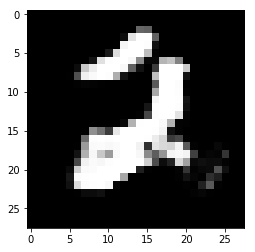

Loop: 205100, Generator_loss: -0.0087275, Discriminator_loss: 0.0042472
Loop: 205200, Generator_loss: -0.007219, Discriminator_loss: 0.0072168
Loop: 205300, Generator_loss: -0.0064813, Discriminator_loss: 0.0047058
Loop: 205400, Generator_loss: -0.0075243, Discriminator_loss: 0.0042117
Loop: 205500, Generator_loss: -0.012409, Discriminator_loss: 0.0062417
Loop: 205600, Generator_loss: -0.0095734, Discriminator_loss: 0.0045141
Loop: 205700, Generator_loss: -0.011566, Discriminator_loss: 0.0049108
Loop: 205800, Generator_loss: -0.0090012, Discriminator_loss: 0.0074462
Loop: 205900, Generator_loss: -0.010748, Discriminator_loss: 0.0053431
Loop: 206000, Generator_loss: -0.010837, Discriminator_loss: 0.0072716


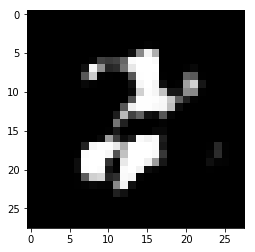

Loop: 206100, Generator_loss: -0.0074225, Discriminator_loss: 0.0066655
Loop: 206200, Generator_loss: -0.011188, Discriminator_loss: 0.0044119
Loop: 206300, Generator_loss: -0.012073, Discriminator_loss: 0.0075916
Loop: 206400, Generator_loss: -0.0061754, Discriminator_loss: 0.0038603
Loop: 206500, Generator_loss: -0.0064245, Discriminator_loss: 0.0061631
Loop: 206600, Generator_loss: -0.011936, Discriminator_loss: 0.0050574
Loop: 206700, Generator_loss: -0.010566, Discriminator_loss: 0.0046457
Loop: 206800, Generator_loss: -0.0087036, Discriminator_loss: 0.0073551
Loop: 206900, Generator_loss: -0.0073958, Discriminator_loss: 0.0052188
Loop: 207000, Generator_loss: -0.007929, Discriminator_loss: 0.0040223


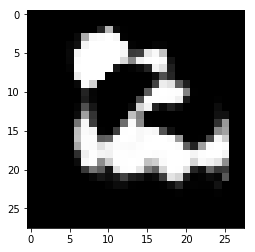

Loop: 207100, Generator_loss: -0.011012, Discriminator_loss: 0.008124
Loop: 207200, Generator_loss: -0.006746, Discriminator_loss: 0.0040133
Loop: 207300, Generator_loss: -0.011146, Discriminator_loss: 0.0051795
Loop: 207400, Generator_loss: -0.01358, Discriminator_loss: 0.0050247
Loop: 207500, Generator_loss: -0.014226, Discriminator_loss: 0.0050981
Loop: 207600, Generator_loss: -0.010106, Discriminator_loss: 0.0065677
Loop: 207700, Generator_loss: -0.0052259, Discriminator_loss: 0.0024092
Loop: 207800, Generator_loss: -0.0059804, Discriminator_loss: 0.006039
Loop: 207900, Generator_loss: -0.011211, Discriminator_loss: 0.0048822
Loop: 208000, Generator_loss: -0.009702, Discriminator_loss: 0.0058924


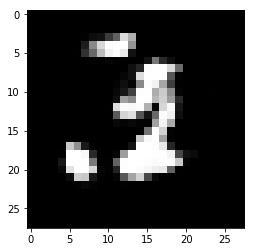

Loop: 208100, Generator_loss: -0.010097, Discriminator_loss: 0.0047421
Loop: 208200, Generator_loss: -0.0095665, Discriminator_loss: 0.0075135
Loop: 208300, Generator_loss: -0.010559, Discriminator_loss: 0.0062514
Loop: 208400, Generator_loss: -0.0081216, Discriminator_loss: 0.0070757
Loop: 208500, Generator_loss: -0.0060655, Discriminator_loss: 0.006243
Loop: 208600, Generator_loss: -0.010408, Discriminator_loss: 0.0065744
Loop: 208700, Generator_loss: -0.01318, Discriminator_loss: 0.0048487
Loop: 208800, Generator_loss: -0.007421, Discriminator_loss: 0.0048305
Loop: 208900, Generator_loss: -0.0039386, Discriminator_loss: 0.0061309
Loop: 209000, Generator_loss: -0.011812, Discriminator_loss: 0.0043497


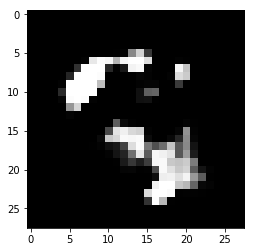

Loop: 209100, Generator_loss: -0.011189, Discriminator_loss: 0.0067224
Loop: 209200, Generator_loss: -0.004612, Discriminator_loss: 0.0056635
Loop: 209300, Generator_loss: -0.011128, Discriminator_loss: 0.0061333
Loop: 209400, Generator_loss: -0.0076717, Discriminator_loss: 0.0056846
Loop: 209500, Generator_loss: -0.0073154, Discriminator_loss: 0.005618
Loop: 209600, Generator_loss: -0.0065587, Discriminator_loss: 0.0052639
Loop: 209700, Generator_loss: -0.006842, Discriminator_loss: 0.0053821
Loop: 209800, Generator_loss: -0.0049963, Discriminator_loss: 0.0059054
Loop: 209900, Generator_loss: -0.0072538, Discriminator_loss: 0.0091625
Loop: 210000, Generator_loss: -0.012174, Discriminator_loss: 0.0055255


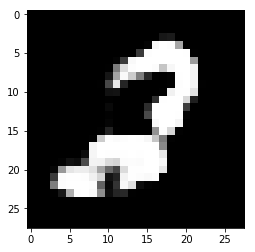

Loop: 210100, Generator_loss: -0.0093102, Discriminator_loss: 0.0057734
Loop: 210200, Generator_loss: -0.008435, Discriminator_loss: 0.0056391
Loop: 210300, Generator_loss: -0.0142, Discriminator_loss: 0.007782
Loop: 210400, Generator_loss: -0.010444, Discriminator_loss: 0.0064599
Loop: 210500, Generator_loss: -0.010781, Discriminator_loss: 0.0041583
Loop: 210600, Generator_loss: -0.0073813, Discriminator_loss: 0.0053555
Loop: 210700, Generator_loss: -0.012662, Discriminator_loss: 0.0083638
Loop: 210800, Generator_loss: -0.0091345, Discriminator_loss: 0.0043519
Loop: 210900, Generator_loss: -0.0073406, Discriminator_loss: 0.007392
Loop: 211000, Generator_loss: -0.011252, Discriminator_loss: 0.0053384


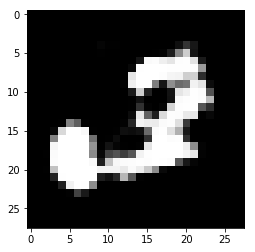

Loop: 211100, Generator_loss: -0.006524, Discriminator_loss: 0.0049723
Loop: 211200, Generator_loss: -0.014624, Discriminator_loss: 0.0052747
Loop: 211300, Generator_loss: -0.0063988, Discriminator_loss: 0.0048454
Loop: 211400, Generator_loss: -0.010219, Discriminator_loss: 0.003552
Loop: 211500, Generator_loss: -0.0059724, Discriminator_loss: 0.0051478
Loop: 211600, Generator_loss: -0.012391, Discriminator_loss: 0.0067626
Loop: 211700, Generator_loss: -0.010458, Discriminator_loss: 0.0034999
Loop: 211800, Generator_loss: -0.0055668, Discriminator_loss: 0.0062804
Loop: 211900, Generator_loss: -0.0077441, Discriminator_loss: 0.004643
Loop: 212000, Generator_loss: -0.0037268, Discriminator_loss: 0.0079883


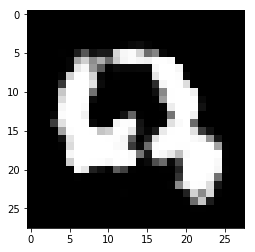

Loop: 212100, Generator_loss: -0.010367, Discriminator_loss: 0.0058206
Loop: 212200, Generator_loss: -0.009023, Discriminator_loss: 0.0039339
Loop: 212300, Generator_loss: -0.0094101, Discriminator_loss: 0.0053656
Loop: 212400, Generator_loss: -0.0045059, Discriminator_loss: 0.0061868
Loop: 212500, Generator_loss: -0.0025994, Discriminator_loss: 0.0054097
Loop: 212600, Generator_loss: -0.01073, Discriminator_loss: 0.0045404
Loop: 212700, Generator_loss: -0.0081406, Discriminator_loss: 0.0056833
Loop: 212800, Generator_loss: -0.0092887, Discriminator_loss: 0.0036801
Loop: 212900, Generator_loss: -0.0057086, Discriminator_loss: 0.0034101
Loop: 213000, Generator_loss: -0.0092167, Discriminator_loss: 0.0064471


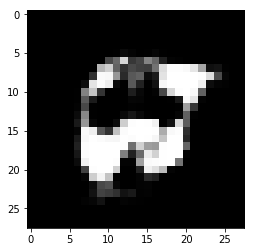

Loop: 213100, Generator_loss: -0.00086076, Discriminator_loss: 0.0085631
Loop: 213200, Generator_loss: -0.0058767, Discriminator_loss: 0.0062037
Loop: 213300, Generator_loss: -0.0043975, Discriminator_loss: 0.0069895
Loop: 213400, Generator_loss: -0.0044227, Discriminator_loss: 0.0055711
Loop: 213500, Generator_loss: -0.0098204, Discriminator_loss: 0.0054641
Loop: 213600, Generator_loss: -0.012002, Discriminator_loss: 0.0030589
Loop: 213700, Generator_loss: -0.0088963, Discriminator_loss: 0.0054532
Loop: 213800, Generator_loss: -0.0086903, Discriminator_loss: 0.0058851
Loop: 213900, Generator_loss: -0.009291, Discriminator_loss: 0.0059491
Loop: 214000, Generator_loss: -0.0083437, Discriminator_loss: 0.0048557


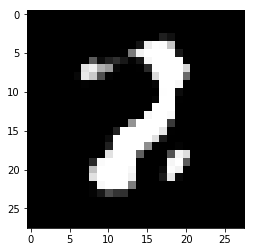

Loop: 214100, Generator_loss: -0.0095521, Discriminator_loss: 0.0046692
Loop: 214200, Generator_loss: -0.0054589, Discriminator_loss: 0.0041398
Loop: 214300, Generator_loss: -0.01419, Discriminator_loss: 0.0066656
Loop: 214400, Generator_loss: -0.009399, Discriminator_loss: 0.0054955
Loop: 214500, Generator_loss: -0.012868, Discriminator_loss: 0.0040745
Loop: 214600, Generator_loss: -0.01241, Discriminator_loss: 0.0060749
Loop: 214700, Generator_loss: -0.0095796, Discriminator_loss: 0.0050492
Loop: 214800, Generator_loss: -0.0097123, Discriminator_loss: 0.0084827
Loop: 214900, Generator_loss: -0.0084605, Discriminator_loss: 0.0068476
Loop: 215000, Generator_loss: -0.005243, Discriminator_loss: 0.0064041


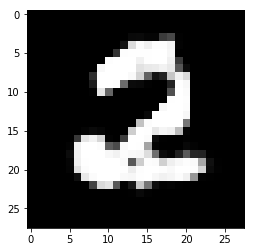

Loop: 215100, Generator_loss: -0.0060823, Discriminator_loss: 0.0031726
Loop: 215200, Generator_loss: -0.0058891, Discriminator_loss: 0.0059338
Loop: 215300, Generator_loss: -0.013048, Discriminator_loss: 0.0060811
Loop: 215400, Generator_loss: -0.01009, Discriminator_loss: 0.0049726
Loop: 215500, Generator_loss: -0.0093793, Discriminator_loss: 0.0034907
Loop: 215600, Generator_loss: -0.010038, Discriminator_loss: 0.0059895
Loop: 215700, Generator_loss: -0.0050892, Discriminator_loss: 0.0058064
Loop: 215800, Generator_loss: -0.004823, Discriminator_loss: 0.0072329
Loop: 215900, Generator_loss: -0.0090816, Discriminator_loss: 0.0057932
Loop: 216000, Generator_loss: -0.015026, Discriminator_loss: 0.0049967


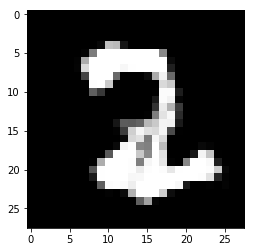

Loop: 216100, Generator_loss: -0.0088195, Discriminator_loss: 0.0055591
Loop: 216200, Generator_loss: -0.0095604, Discriminator_loss: 0.006485
Loop: 216300, Generator_loss: -0.0052601, Discriminator_loss: 0.0079664
Loop: 216400, Generator_loss: -0.0091582, Discriminator_loss: 0.0066666
Loop: 216500, Generator_loss: -0.0084044, Discriminator_loss: 0.0070203
Loop: 216600, Generator_loss: -0.014997, Discriminator_loss: 0.0063371
Loop: 216700, Generator_loss: -0.010335, Discriminator_loss: 0.0061542
Loop: 216800, Generator_loss: -0.0074617, Discriminator_loss: 0.005475
Loop: 216900, Generator_loss: -0.0074007, Discriminator_loss: 0.0059662
Loop: 217000, Generator_loss: -0.012372, Discriminator_loss: 0.0060273


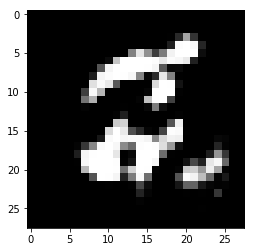

Loop: 217100, Generator_loss: -0.0081831, Discriminator_loss: 0.0049432
Loop: 217200, Generator_loss: -0.0098195, Discriminator_loss: 0.0052194
Loop: 217300, Generator_loss: -0.0091043, Discriminator_loss: 0.0039096
Loop: 217400, Generator_loss: -0.00806, Discriminator_loss: 0.0058878
Loop: 217500, Generator_loss: -0.010026, Discriminator_loss: 0.0049205
Loop: 217600, Generator_loss: -0.015559, Discriminator_loss: 0.004615
Loop: 217700, Generator_loss: -0.010824, Discriminator_loss: 0.0038515
Loop: 217800, Generator_loss: -0.01127, Discriminator_loss: 0.0069233
Loop: 217900, Generator_loss: -0.0055633, Discriminator_loss: 0.0084135
Loop: 218000, Generator_loss: -0.0061803, Discriminator_loss: 0.0060978


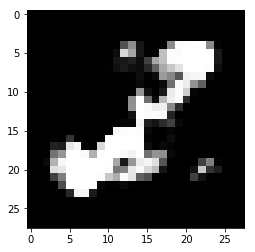

Loop: 218100, Generator_loss: -0.0088327, Discriminator_loss: 0.0064667
Loop: 218200, Generator_loss: -0.0035306, Discriminator_loss: 0.0036828
Loop: 218300, Generator_loss: -0.014727, Discriminator_loss: 0.0071398
Loop: 218400, Generator_loss: -0.012558, Discriminator_loss: 0.0065483
Loop: 218500, Generator_loss: -0.011488, Discriminator_loss: 0.0052194
Loop: 218600, Generator_loss: -0.008642, Discriminator_loss: 0.0055283
Loop: 218700, Generator_loss: -0.0086115, Discriminator_loss: 0.0032008
Loop: 218800, Generator_loss: -0.0031674, Discriminator_loss: 0.0034134
Loop: 218900, Generator_loss: -0.01187, Discriminator_loss: 0.0059781
Loop: 219000, Generator_loss: -0.0079061, Discriminator_loss: 0.003173


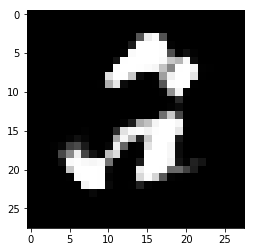

Loop: 219100, Generator_loss: -0.0095354, Discriminator_loss: 0.0049839
Loop: 219200, Generator_loss: -0.0081871, Discriminator_loss: 0.0053901
Loop: 219300, Generator_loss: -0.0077969, Discriminator_loss: 0.0041967
Loop: 219400, Generator_loss: -0.0071844, Discriminator_loss: 0.0064733
Loop: 219500, Generator_loss: -0.010641, Discriminator_loss: 0.0055469
Loop: 219600, Generator_loss: -0.0087455, Discriminator_loss: 0.0049225
Loop: 219700, Generator_loss: -0.0098077, Discriminator_loss: 0.0050057
Loop: 219800, Generator_loss: -0.0081037, Discriminator_loss: 0.0065398
Loop: 219900, Generator_loss: -0.005001, Discriminator_loss: 0.0020461
Loop: 220000, Generator_loss: -0.011654, Discriminator_loss: 0.0062301


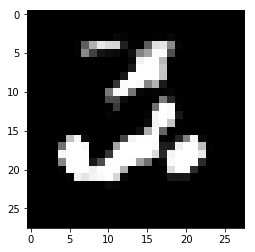

Loop: 220100, Generator_loss: -0.0081445, Discriminator_loss: 0.0057838
Loop: 220200, Generator_loss: -0.0095613, Discriminator_loss: 0.0040338
Loop: 220300, Generator_loss: -0.0073811, Discriminator_loss: 0.0042065
Loop: 220400, Generator_loss: -0.0097203, Discriminator_loss: 0.00584
Loop: 220500, Generator_loss: -0.0074444, Discriminator_loss: 0.0057994
Loop: 220600, Generator_loss: -0.0064783, Discriminator_loss: 0.006951
Loop: 220700, Generator_loss: -0.009113, Discriminator_loss: 0.0057576
Loop: 220800, Generator_loss: -0.0037609, Discriminator_loss: 0.0056616
Loop: 220900, Generator_loss: -0.007063, Discriminator_loss: 0.0047972
Loop: 221000, Generator_loss: -0.014629, Discriminator_loss: 0.0056805


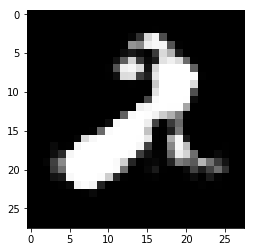

Loop: 221100, Generator_loss: -0.0098685, Discriminator_loss: 0.0046294
Loop: 221200, Generator_loss: -0.0097653, Discriminator_loss: 0.0045241
Loop: 221300, Generator_loss: -0.0060685, Discriminator_loss: 0.006241
Loop: 221400, Generator_loss: -0.014286, Discriminator_loss: 0.0070853
Loop: 221500, Generator_loss: -0.0072247, Discriminator_loss: 0.002943
Loop: 221600, Generator_loss: -0.0097293, Discriminator_loss: 0.0049042
Loop: 221700, Generator_loss: -0.0092855, Discriminator_loss: 0.0055848
Loop: 221800, Generator_loss: -0.0085461, Discriminator_loss: 0.0061341
Loop: 221900, Generator_loss: -0.010255, Discriminator_loss: 0.003385
Loop: 222000, Generator_loss: -0.0075304, Discriminator_loss: 0.0046831


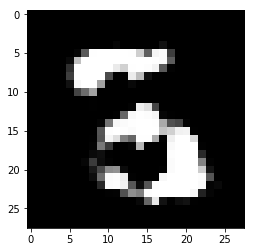

Loop: 222100, Generator_loss: -0.011099, Discriminator_loss: 0.0048643
Loop: 222200, Generator_loss: -0.0059635, Discriminator_loss: 0.0054008
Loop: 222300, Generator_loss: -0.0035292, Discriminator_loss: 0.0042631
Loop: 222400, Generator_loss: -0.0069988, Discriminator_loss: 0.0073113
Loop: 222500, Generator_loss: -0.011679, Discriminator_loss: 0.0048742
Loop: 222600, Generator_loss: -0.0063564, Discriminator_loss: 0.0073165
Loop: 222700, Generator_loss: -0.0062978, Discriminator_loss: 0.0054577
Loop: 222800, Generator_loss: -0.0088506, Discriminator_loss: 0.0048258
Loop: 222900, Generator_loss: -0.012488, Discriminator_loss: 0.004923
Loop: 223000, Generator_loss: -0.012096, Discriminator_loss: 0.00568


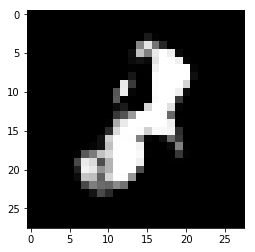

Loop: 223100, Generator_loss: -0.013484, Discriminator_loss: 0.0068994
Loop: 223200, Generator_loss: -0.0079569, Discriminator_loss: 0.0036923
Loop: 223300, Generator_loss: -0.0063217, Discriminator_loss: 0.0054622
Loop: 223400, Generator_loss: -0.0053687, Discriminator_loss: 0.0046449
Loop: 223500, Generator_loss: -0.012525, Discriminator_loss: 0.0041344
Loop: 223600, Generator_loss: -0.0093377, Discriminator_loss: 0.0065837
Loop: 223700, Generator_loss: -0.0080531, Discriminator_loss: 0.005881
Loop: 223800, Generator_loss: -0.0083983, Discriminator_loss: 0.0055209
Loop: 223900, Generator_loss: -0.0057052, Discriminator_loss: 0.0041047
Loop: 224000, Generator_loss: -0.0060311, Discriminator_loss: 0.0037861


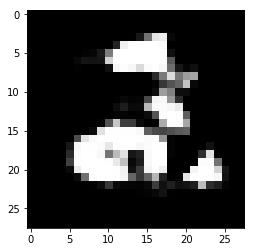

Loop: 224100, Generator_loss: -0.00914, Discriminator_loss: 0.0037658
Loop: 224200, Generator_loss: -0.013637, Discriminator_loss: 0.005529
Loop: 224300, Generator_loss: -0.011023, Discriminator_loss: 0.0066747
Loop: 224400, Generator_loss: -0.0077168, Discriminator_loss: 0.00693
Loop: 224500, Generator_loss: -0.0081869, Discriminator_loss: 0.0055557
Loop: 224600, Generator_loss: -0.012367, Discriminator_loss: 0.0032365
Loop: 224700, Generator_loss: -0.0095597, Discriminator_loss: 0.0069554
Loop: 224800, Generator_loss: -0.010213, Discriminator_loss: 0.0064597
Loop: 224900, Generator_loss: -0.010904, Discriminator_loss: 0.0059474
Loop: 225000, Generator_loss: -0.0065819, Discriminator_loss: 0.0058113


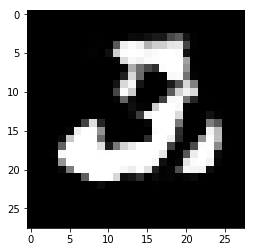

Loop: 225100, Generator_loss: -0.013228, Discriminator_loss: 0.007401
Loop: 225200, Generator_loss: -0.0066631, Discriminator_loss: 0.004276
Loop: 225300, Generator_loss: -0.0088898, Discriminator_loss: 0.0063124
Loop: 225400, Generator_loss: -0.0080761, Discriminator_loss: 0.0067913
Loop: 225500, Generator_loss: -0.010044, Discriminator_loss: 0.0047371
Loop: 225600, Generator_loss: -0.0067207, Discriminator_loss: 0.0052256
Loop: 225700, Generator_loss: -0.0054167, Discriminator_loss: 0.0052007
Loop: 225800, Generator_loss: -0.010245, Discriminator_loss: 0.0054322
Loop: 225900, Generator_loss: -0.0094705, Discriminator_loss: 0.006264
Loop: 226000, Generator_loss: -0.0048091, Discriminator_loss: 0.0042582


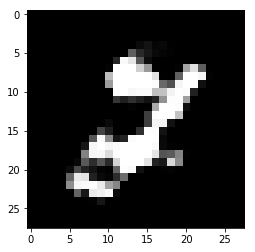

Loop: 226100, Generator_loss: -0.0065637, Discriminator_loss: 0.0052592
Loop: 226200, Generator_loss: -0.010498, Discriminator_loss: 0.0056375
Loop: 226300, Generator_loss: -0.0080779, Discriminator_loss: 0.0041469
Loop: 226400, Generator_loss: -0.0077797, Discriminator_loss: 0.005087
Loop: 226500, Generator_loss: -0.0044625, Discriminator_loss: 0.0055458
Loop: 226600, Generator_loss: -0.0063408, Discriminator_loss: 0.0040385
Loop: 226700, Generator_loss: -0.0089184, Discriminator_loss: 0.0061255
Loop: 226800, Generator_loss: -0.0086072, Discriminator_loss: 0.0058294
Loop: 226900, Generator_loss: -0.0096889, Discriminator_loss: 0.0071761
Loop: 227000, Generator_loss: -0.0051188, Discriminator_loss: 0.0014943


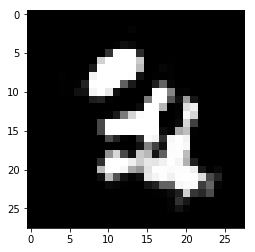

Loop: 227100, Generator_loss: -0.0092907, Discriminator_loss: 0.0054888
Loop: 227200, Generator_loss: -0.0062236, Discriminator_loss: 0.0043695
Loop: 227300, Generator_loss: -0.013412, Discriminator_loss: 0.0072176
Loop: 227400, Generator_loss: -0.0057849, Discriminator_loss: 0.0083249
Loop: 227500, Generator_loss: -0.0068513, Discriminator_loss: 0.0052281
Loop: 227600, Generator_loss: -0.0083673, Discriminator_loss: 0.0042649
Loop: 227700, Generator_loss: -0.0086848, Discriminator_loss: 0.0054436
Loop: 227800, Generator_loss: -0.0095115, Discriminator_loss: 0.0054109
Loop: 227900, Generator_loss: -0.012682, Discriminator_loss: 0.0047488
Loop: 228000, Generator_loss: -0.009232, Discriminator_loss: 0.0054785


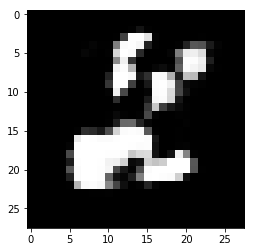

Loop: 228100, Generator_loss: -0.0070982, Discriminator_loss: 0.005323
Loop: 228200, Generator_loss: -0.0086356, Discriminator_loss: 0.005531
Loop: 228300, Generator_loss: -0.0082655, Discriminator_loss: 0.0058664
Loop: 228400, Generator_loss: -0.0051484, Discriminator_loss: 0.0049124
Loop: 228500, Generator_loss: -0.0080874, Discriminator_loss: 0.0060077
Loop: 228600, Generator_loss: -0.010369, Discriminator_loss: 0.0047547
Loop: 228700, Generator_loss: -0.012977, Discriminator_loss: 0.0062407
Loop: 228800, Generator_loss: -0.0087148, Discriminator_loss: 0.0070736
Loop: 228900, Generator_loss: -0.0062631, Discriminator_loss: 0.0060912
Loop: 229000, Generator_loss: -0.007897, Discriminator_loss: 0.0029161


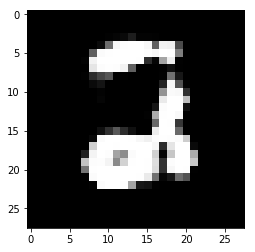

Loop: 229100, Generator_loss: -0.011204, Discriminator_loss: 0.0041168
Loop: 229200, Generator_loss: -0.011778, Discriminator_loss: 0.0051598
Loop: 229300, Generator_loss: -0.0075654, Discriminator_loss: 0.0051871
Loop: 229400, Generator_loss: -0.0051896, Discriminator_loss: 0.0045909
Loop: 229500, Generator_loss: -0.014632, Discriminator_loss: 0.0056073
Loop: 229600, Generator_loss: -0.0031732, Discriminator_loss: 0.0056049
Loop: 229700, Generator_loss: -0.0052043, Discriminator_loss: 0.0051115
Loop: 229800, Generator_loss: -0.0094542, Discriminator_loss: 0.0072608
Loop: 229900, Generator_loss: -0.01177, Discriminator_loss: 0.0062147
Loop: 230000, Generator_loss: -0.01599, Discriminator_loss: 0.0041892


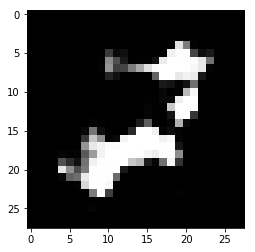

Loop: 230100, Generator_loss: -0.0044425, Discriminator_loss: 0.0046757
Loop: 230200, Generator_loss: -0.0099713, Discriminator_loss: 0.0061314
Loop: 230300, Generator_loss: -0.0082472, Discriminator_loss: 0.0056186
Loop: 230400, Generator_loss: -0.0079303, Discriminator_loss: 0.0049219
Loop: 230500, Generator_loss: -0.0046589, Discriminator_loss: 0.0025832
Loop: 230600, Generator_loss: -0.0066984, Discriminator_loss: 0.0062255
Loop: 230700, Generator_loss: -0.0082193, Discriminator_loss: 0.0044906
Loop: 230800, Generator_loss: -0.0091881, Discriminator_loss: 0.0044205
Loop: 230900, Generator_loss: -0.011576, Discriminator_loss: 0.004613
Loop: 231000, Generator_loss: -0.011633, Discriminator_loss: 0.005845


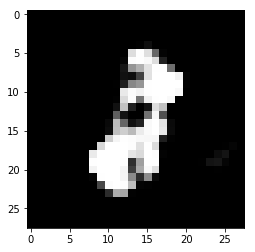

Loop: 231100, Generator_loss: -0.0073192, Discriminator_loss: 0.0054544
Loop: 231200, Generator_loss: -0.0072795, Discriminator_loss: 0.0045201
Loop: 231300, Generator_loss: -0.0071403, Discriminator_loss: 0.0045925
Loop: 231400, Generator_loss: -0.0080539, Discriminator_loss: 0.0044958
Loop: 231500, Generator_loss: -0.0081154, Discriminator_loss: 0.0053992
Loop: 231600, Generator_loss: -0.0058323, Discriminator_loss: 0.0058538
Loop: 231700, Generator_loss: -0.005527, Discriminator_loss: 0.0064064
Loop: 231800, Generator_loss: -0.008271, Discriminator_loss: 0.0042209
Loop: 231900, Generator_loss: -0.0057376, Discriminator_loss: 0.0052707
Loop: 232000, Generator_loss: -0.010386, Discriminator_loss: 0.0046963


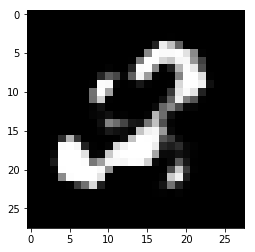

Loop: 232100, Generator_loss: -0.0086451, Discriminator_loss: 0.0062966
Loop: 232200, Generator_loss: -0.00975, Discriminator_loss: 0.0056538
Loop: 232300, Generator_loss: -0.011343, Discriminator_loss: 0.0051429
Loop: 232400, Generator_loss: -0.009589, Discriminator_loss: 0.0042903
Loop: 232500, Generator_loss: -0.0071725, Discriminator_loss: 0.0045289
Loop: 232600, Generator_loss: -0.0081734, Discriminator_loss: 0.0049548
Loop: 232700, Generator_loss: -0.0068498, Discriminator_loss: 0.0063647
Loop: 232800, Generator_loss: -0.011324, Discriminator_loss: 0.0070873
Loop: 232900, Generator_loss: -0.0082282, Discriminator_loss: 0.0062933
Loop: 233000, Generator_loss: -0.011154, Discriminator_loss: 0.0047741


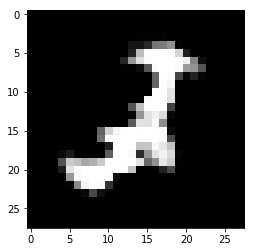

Loop: 233100, Generator_loss: -0.0093593, Discriminator_loss: 0.0056946
Loop: 233200, Generator_loss: -0.010811, Discriminator_loss: 0.0073303
Loop: 233300, Generator_loss: -0.015034, Discriminator_loss: 0.0058921
Loop: 233400, Generator_loss: -0.0072336, Discriminator_loss: 0.0055775
Loop: 233500, Generator_loss: -0.010479, Discriminator_loss: 0.0046673
Loop: 233600, Generator_loss: -0.010898, Discriminator_loss: 0.0068157
Loop: 233700, Generator_loss: -0.0072267, Discriminator_loss: 0.0049751
Loop: 233800, Generator_loss: -0.0043737, Discriminator_loss: 0.0056734
Loop: 233900, Generator_loss: -0.0094499, Discriminator_loss: 0.006545
Loop: 234000, Generator_loss: -0.0060084, Discriminator_loss: 0.0067106


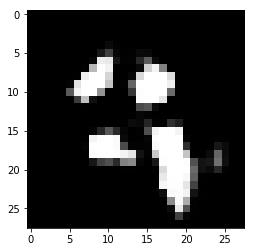

Loop: 234100, Generator_loss: -0.010686, Discriminator_loss: 0.0046158
Loop: 234200, Generator_loss: -0.0098086, Discriminator_loss: 0.0049992
Loop: 234300, Generator_loss: -0.0090818, Discriminator_loss: 0.0056593
Loop: 234400, Generator_loss: -0.015638, Discriminator_loss: 0.0067887
Loop: 234500, Generator_loss: -0.0072665, Discriminator_loss: 0.005875
Loop: 234600, Generator_loss: -0.0074362, Discriminator_loss: 0.0060868
Loop: 234700, Generator_loss: -0.0064292, Discriminator_loss: 0.004173
Loop: 234800, Generator_loss: -0.0088662, Discriminator_loss: 0.0035304
Loop: 234900, Generator_loss: -0.0086988, Discriminator_loss: 0.0043187
Loop: 235000, Generator_loss: -0.005409, Discriminator_loss: 0.0052232


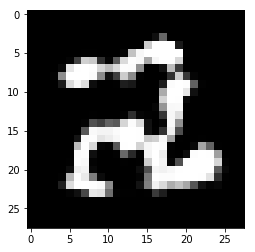

Loop: 235100, Generator_loss: -0.009796, Discriminator_loss: 0.0050736
Loop: 235200, Generator_loss: -0.0070747, Discriminator_loss: 0.0067433
Loop: 235300, Generator_loss: -0.0088414, Discriminator_loss: 0.0042132
Loop: 235400, Generator_loss: -0.0048903, Discriminator_loss: 0.006086
Loop: 235500, Generator_loss: -0.016316, Discriminator_loss: 0.0057208
Loop: 235600, Generator_loss: -0.0068814, Discriminator_loss: 0.0048646
Loop: 235700, Generator_loss: -0.0076946, Discriminator_loss: 0.0045191
Loop: 235800, Generator_loss: -0.0090942, Discriminator_loss: 0.0064074
Loop: 235900, Generator_loss: -0.0086661, Discriminator_loss: 0.0052584
Loop: 236000, Generator_loss: -0.0084033, Discriminator_loss: 0.0054188


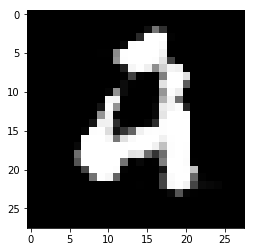

Loop: 236100, Generator_loss: -0.010622, Discriminator_loss: 0.0050779
Loop: 236200, Generator_loss: -0.0052779, Discriminator_loss: 0.005461
Loop: 236300, Generator_loss: -0.013294, Discriminator_loss: 0.0052167
Loop: 236400, Generator_loss: -0.010786, Discriminator_loss: 0.0059242
Loop: 236500, Generator_loss: -0.011787, Discriminator_loss: 0.0047461
Loop: 236600, Generator_loss: -0.0081848, Discriminator_loss: 0.0048241
Loop: 236700, Generator_loss: -0.010862, Discriminator_loss: 0.0032687
Loop: 236800, Generator_loss: -0.0075111, Discriminator_loss: 0.0061255
Loop: 236900, Generator_loss: -0.011554, Discriminator_loss: 0.0054431
Loop: 237000, Generator_loss: -0.011618, Discriminator_loss: 0.0057302


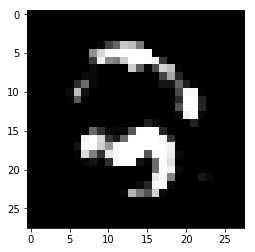

Loop: 237100, Generator_loss: -0.010583, Discriminator_loss: 0.0057677
Loop: 237200, Generator_loss: -0.0095107, Discriminator_loss: 0.0046701
Loop: 237300, Generator_loss: -0.0028262, Discriminator_loss: 0.0072926
Loop: 237400, Generator_loss: -0.0069239, Discriminator_loss: 0.0030944
Loop: 237500, Generator_loss: -0.008068, Discriminator_loss: 0.0052152
Loop: 237600, Generator_loss: -0.0092733, Discriminator_loss: 0.0047578
Loop: 237700, Generator_loss: -0.0081742, Discriminator_loss: 0.0064041
Loop: 237800, Generator_loss: -0.0085144, Discriminator_loss: 0.0041398
Loop: 237900, Generator_loss: -0.012154, Discriminator_loss: 0.0054954
Loop: 238000, Generator_loss: -0.0068668, Discriminator_loss: 0.0072513


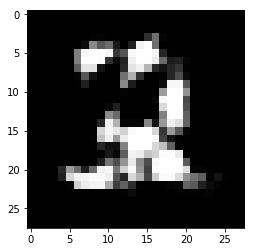

Loop: 238100, Generator_loss: -0.0056658, Discriminator_loss: 0.0057427
Loop: 238200, Generator_loss: -0.0070863, Discriminator_loss: 0.0057202
Loop: 238300, Generator_loss: -0.0074676, Discriminator_loss: 0.0044474
Loop: 238400, Generator_loss: -0.010152, Discriminator_loss: 0.0048707
Loop: 238500, Generator_loss: -0.0092022, Discriminator_loss: 0.0064513
Loop: 238600, Generator_loss: -0.014513, Discriminator_loss: 0.0065839
Loop: 238700, Generator_loss: -0.0082944, Discriminator_loss: 0.0055989
Loop: 238800, Generator_loss: -0.013525, Discriminator_loss: 0.0052053
Loop: 238900, Generator_loss: -0.011659, Discriminator_loss: 0.0063546
Loop: 239000, Generator_loss: -0.0079388, Discriminator_loss: 0.0050166


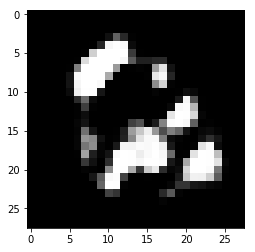

Loop: 239100, Generator_loss: -0.0067794, Discriminator_loss: 0.003657
Loop: 239200, Generator_loss: -0.0086802, Discriminator_loss: 0.0047111
Loop: 239300, Generator_loss: -0.0071443, Discriminator_loss: 0.0048859
Loop: 239400, Generator_loss: -0.011532, Discriminator_loss: 0.0051465
Loop: 239500, Generator_loss: -0.009656, Discriminator_loss: 0.0064965
Loop: 239600, Generator_loss: -0.0094272, Discriminator_loss: 0.0068203
Loop: 239700, Generator_loss: -0.013542, Discriminator_loss: 0.0064802
Loop: 239800, Generator_loss: -0.0093995, Discriminator_loss: 0.005233
Loop: 239900, Generator_loss: -0.011117, Discriminator_loss: 0.0035894
Loop: 240000, Generator_loss: -0.0098507, Discriminator_loss: 0.0056146


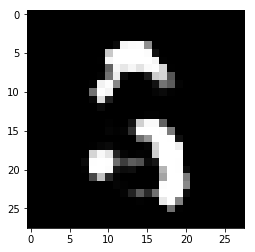

Loop: 240100, Generator_loss: -0.014656, Discriminator_loss: 0.0051909
Loop: 240200, Generator_loss: -0.0096722, Discriminator_loss: 0.0087754
Loop: 240300, Generator_loss: -0.010511, Discriminator_loss: 0.0039138
Loop: 240400, Generator_loss: -0.012911, Discriminator_loss: 0.0046907
Loop: 240500, Generator_loss: -0.013009, Discriminator_loss: 0.0043264
Loop: 240600, Generator_loss: -0.0054091, Discriminator_loss: 0.0036044
Loop: 240700, Generator_loss: -0.01106, Discriminator_loss: 0.0065533
Loop: 240800, Generator_loss: -0.0065174, Discriminator_loss: 0.0043153
Loop: 240900, Generator_loss: -0.012597, Discriminator_loss: 0.0068148
Loop: 241000, Generator_loss: -0.011935, Discriminator_loss: 0.0047153


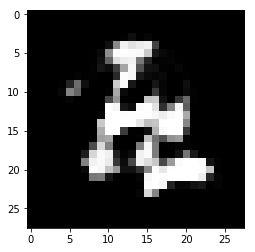

Loop: 241100, Generator_loss: -0.0065491, Discriminator_loss: 0.0042425
Loop: 241200, Generator_loss: -0.0099907, Discriminator_loss: 0.0078319
Loop: 241300, Generator_loss: -0.0081688, Discriminator_loss: 0.0041247
Loop: 241400, Generator_loss: -0.0078655, Discriminator_loss: 0.0056418
Loop: 241500, Generator_loss: -0.0068081, Discriminator_loss: 0.0070118
Loop: 241600, Generator_loss: -0.009452, Discriminator_loss: 0.0052442
Loop: 241700, Generator_loss: -0.0044171, Discriminator_loss: 0.0065779
Loop: 241800, Generator_loss: -0.010689, Discriminator_loss: 0.0053985
Loop: 241900, Generator_loss: -0.01426, Discriminator_loss: 0.0063053
Loop: 242000, Generator_loss: -0.0072506, Discriminator_loss: 0.0039462


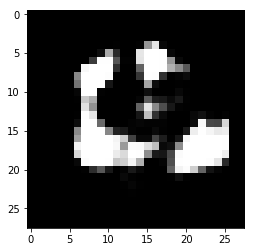

Loop: 242100, Generator_loss: -0.01034, Discriminator_loss: 0.0056605
Loop: 242200, Generator_loss: -0.005067, Discriminator_loss: 0.0053385
Loop: 242300, Generator_loss: -0.015226, Discriminator_loss: 0.0050799
Loop: 242400, Generator_loss: -0.010735, Discriminator_loss: 0.0070888
Loop: 242500, Generator_loss: -0.011027, Discriminator_loss: 0.0033439
Loop: 242600, Generator_loss: -0.012885, Discriminator_loss: 0.0045789
Loop: 242700, Generator_loss: -0.0065255, Discriminator_loss: 0.0072996
Loop: 242800, Generator_loss: -0.013428, Discriminator_loss: 0.0056046
Loop: 242900, Generator_loss: -0.0075237, Discriminator_loss: 0.0058698
Loop: 243000, Generator_loss: -0.010542, Discriminator_loss: 0.0049262


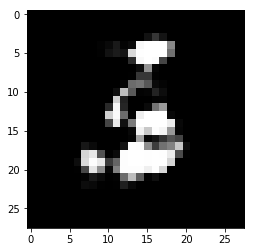

Loop: 243100, Generator_loss: -0.0089271, Discriminator_loss: 0.0067175
Loop: 243200, Generator_loss: -0.010361, Discriminator_loss: 0.0052411
Loop: 243300, Generator_loss: -0.0087945, Discriminator_loss: 0.0051725
Loop: 243400, Generator_loss: -0.011055, Discriminator_loss: 0.007057
Loop: 243500, Generator_loss: -0.0092972, Discriminator_loss: 0.0043879
Loop: 243600, Generator_loss: -0.0066706, Discriminator_loss: 0.0038787
Loop: 243700, Generator_loss: -0.0058234, Discriminator_loss: 0.0068027
Loop: 243800, Generator_loss: -0.0061604, Discriminator_loss: 0.005919
Loop: 243900, Generator_loss: -0.012549, Discriminator_loss: 0.0049116
Loop: 244000, Generator_loss: -0.0096567, Discriminator_loss: 0.006543


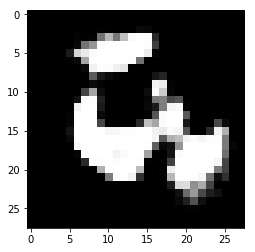

Loop: 244100, Generator_loss: -0.0098103, Discriminator_loss: 0.0056945
Loop: 244200, Generator_loss: -0.012895, Discriminator_loss: 0.0076813
Loop: 244300, Generator_loss: -0.0084722, Discriminator_loss: 0.0057379
Loop: 244400, Generator_loss: -0.0071055, Discriminator_loss: 0.0059975
Loop: 244500, Generator_loss: -0.0062696, Discriminator_loss: 0.0063749
Loop: 244600, Generator_loss: -0.0051315, Discriminator_loss: 0.0047954
Loop: 244700, Generator_loss: -0.011322, Discriminator_loss: 0.006198
Loop: 244800, Generator_loss: -0.010545, Discriminator_loss: 0.0049666
Loop: 244900, Generator_loss: -0.010053, Discriminator_loss: 0.0048757
Loop: 245000, Generator_loss: -0.0061657, Discriminator_loss: 0.00528


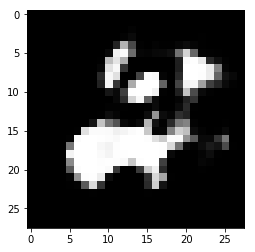

Loop: 245100, Generator_loss: -0.010377, Discriminator_loss: 0.0056029
Loop: 245200, Generator_loss: -0.010658, Discriminator_loss: 0.0071653
Loop: 245300, Generator_loss: -0.013975, Discriminator_loss: 0.0064558
Loop: 245400, Generator_loss: -0.0055555, Discriminator_loss: 0.0058909
Loop: 245500, Generator_loss: -0.0078075, Discriminator_loss: 0.0036392
Loop: 245600, Generator_loss: -0.0075675, Discriminator_loss: 0.0062591
Loop: 245700, Generator_loss: -0.0092712, Discriminator_loss: 0.0036685
Loop: 245800, Generator_loss: -0.0059057, Discriminator_loss: 0.0071598
Loop: 245900, Generator_loss: -0.011074, Discriminator_loss: 0.0064922
Loop: 246000, Generator_loss: -0.0094267, Discriminator_loss: 0.0024978


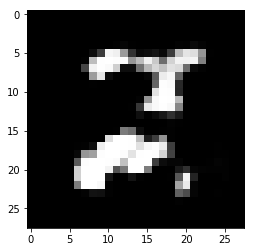

Loop: 246100, Generator_loss: -0.0042315, Discriminator_loss: 0.0043896
Loop: 246200, Generator_loss: -0.0081025, Discriminator_loss: 0.0047604
Loop: 246300, Generator_loss: -0.0063749, Discriminator_loss: 0.0050264
Loop: 246400, Generator_loss: -0.0088779, Discriminator_loss: 0.0056318
Loop: 246500, Generator_loss: -0.0083976, Discriminator_loss: 0.0042895
Loop: 246600, Generator_loss: -0.010984, Discriminator_loss: 0.0052096
Loop: 246700, Generator_loss: -0.007228, Discriminator_loss: 0.0057176
Loop: 246800, Generator_loss: -0.011363, Discriminator_loss: 0.0038485
Loop: 246900, Generator_loss: -0.010678, Discriminator_loss: 0.0077769
Loop: 247000, Generator_loss: -0.0080727, Discriminator_loss: 0.0062412


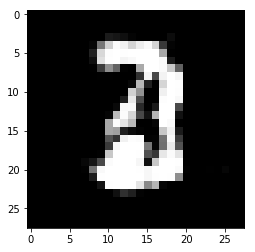

Loop: 247100, Generator_loss: -0.005766, Discriminator_loss: 0.003543
Loop: 247200, Generator_loss: -0.010678, Discriminator_loss: 0.0050916
Loop: 247300, Generator_loss: -0.0069124, Discriminator_loss: 0.0061307
Loop: 247400, Generator_loss: -0.010172, Discriminator_loss: 0.0053574
Loop: 247500, Generator_loss: -0.0090193, Discriminator_loss: 0.0042697
Loop: 247600, Generator_loss: -0.0078491, Discriminator_loss: 0.0041868
Loop: 247700, Generator_loss: -0.011477, Discriminator_loss: 0.0059243
Loop: 247800, Generator_loss: -0.0088377, Discriminator_loss: 0.00579
Loop: 247900, Generator_loss: -0.0091707, Discriminator_loss: 0.0055327
Loop: 248000, Generator_loss: -0.011478, Discriminator_loss: 0.0059859


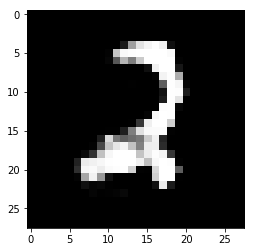

Loop: 248100, Generator_loss: -0.011195, Discriminator_loss: 0.0042524
Loop: 248200, Generator_loss: -0.0077868, Discriminator_loss: 0.0045301
Loop: 248300, Generator_loss: -0.011167, Discriminator_loss: 0.0059262
Loop: 248400, Generator_loss: -0.0079704, Discriminator_loss: 0.0061085
Loop: 248500, Generator_loss: -0.0087488, Discriminator_loss: 0.00453
Loop: 248600, Generator_loss: -0.010926, Discriminator_loss: 0.0033299
Loop: 248700, Generator_loss: -0.0058383, Discriminator_loss: 0.0066034
Loop: 248800, Generator_loss: -0.012739, Discriminator_loss: 0.0056734
Loop: 248900, Generator_loss: -0.0084386, Discriminator_loss: 0.0044731
Loop: 249000, Generator_loss: -0.010422, Discriminator_loss: 0.0049026


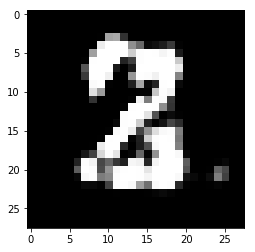

Loop: 249100, Generator_loss: -0.0059264, Discriminator_loss: 0.004336
Loop: 249200, Generator_loss: -0.010484, Discriminator_loss: 0.0050542
Loop: 249300, Generator_loss: -0.0070248, Discriminator_loss: 0.0037965
Loop: 249400, Generator_loss: -0.0058082, Discriminator_loss: 0.0050691
Loop: 249500, Generator_loss: -0.011949, Discriminator_loss: 0.0036324
Loop: 249600, Generator_loss: -0.0049732, Discriminator_loss: 0.0065248
Loop: 249700, Generator_loss: -0.010009, Discriminator_loss: 0.0047775
Loop: 249800, Generator_loss: -0.010348, Discriminator_loss: 0.0073283
Loop: 249900, Generator_loss: -0.0081605, Discriminator_loss: 0.0059605
Loop: 250000, Generator_loss: -0.0086861, Discriminator_loss: 0.0056254


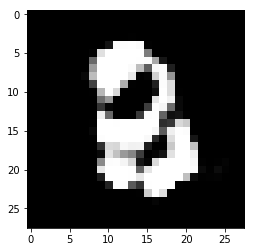

Loop: 250100, Generator_loss: -0.011453, Discriminator_loss: 0.0063302
Loop: 250200, Generator_loss: -0.012451, Discriminator_loss: 0.0053984
Loop: 250300, Generator_loss: -0.010526, Discriminator_loss: 0.0063688
Loop: 250400, Generator_loss: -0.01457, Discriminator_loss: 0.0046628
Loop: 250500, Generator_loss: -0.0065053, Discriminator_loss: 0.0020788
Loop: 250600, Generator_loss: -0.01078, Discriminator_loss: 0.0051746
Loop: 250700, Generator_loss: -0.008428, Discriminator_loss: 0.0038109
Loop: 250800, Generator_loss: -0.0089207, Discriminator_loss: 0.0047441
Loop: 250900, Generator_loss: -0.010272, Discriminator_loss: 0.0038033
Loop: 251000, Generator_loss: -0.0075629, Discriminator_loss: 0.0041182


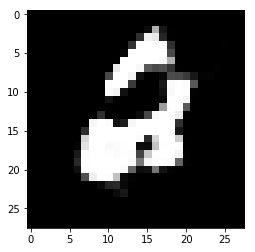

Loop: 251100, Generator_loss: -0.010222, Discriminator_loss: 0.0073991
Loop: 251200, Generator_loss: -0.0087448, Discriminator_loss: 0.0045511
Loop: 251300, Generator_loss: -0.0057121, Discriminator_loss: 0.0036507
Loop: 251400, Generator_loss: -0.010437, Discriminator_loss: 0.0046409
Loop: 251500, Generator_loss: -0.0075461, Discriminator_loss: 0.0065785
Loop: 251600, Generator_loss: -0.011231, Discriminator_loss: 0.005613
Loop: 251700, Generator_loss: -0.0062765, Discriminator_loss: 0.0069885
Loop: 251800, Generator_loss: -0.012114, Discriminator_loss: 0.0079655
Loop: 251900, Generator_loss: -0.0078244, Discriminator_loss: 0.0055349
Loop: 252000, Generator_loss: -0.0086209, Discriminator_loss: 0.0058447


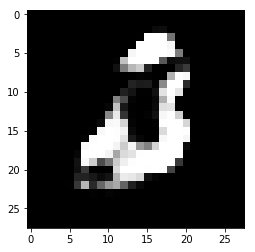

Loop: 252100, Generator_loss: -0.0049239, Discriminator_loss: 0.0043555
Loop: 252200, Generator_loss: -0.01055, Discriminator_loss: 0.0087835
Loop: 252300, Generator_loss: -0.0062921, Discriminator_loss: 0.0047787
Loop: 252400, Generator_loss: -0.0077872, Discriminator_loss: 0.0049824
Loop: 252500, Generator_loss: -0.0045876, Discriminator_loss: 0.0067414
Loop: 252600, Generator_loss: -0.0096309, Discriminator_loss: 0.0045883
Loop: 252700, Generator_loss: -0.010243, Discriminator_loss: 0.0054262
Loop: 252800, Generator_loss: -0.0052899, Discriminator_loss: 0.0050182
Loop: 252900, Generator_loss: -0.009316, Discriminator_loss: 0.0043163
Loop: 253000, Generator_loss: -0.0079969, Discriminator_loss: 0.0041723


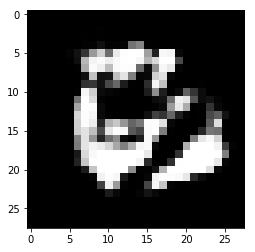

Loop: 253100, Generator_loss: -0.0099404, Discriminator_loss: 0.004279
Loop: 253200, Generator_loss: -0.0092563, Discriminator_loss: 0.0034715
Loop: 253300, Generator_loss: -0.0082291, Discriminator_loss: 0.005592
Loop: 253400, Generator_loss: -0.0082979, Discriminator_loss: 0.0053008
Loop: 253500, Generator_loss: -0.0065963, Discriminator_loss: 0.0041496
Loop: 253600, Generator_loss: -0.0074207, Discriminator_loss: 0.0027442
Loop: 253700, Generator_loss: -0.0082847, Discriminator_loss: 0.0047438
Loop: 253800, Generator_loss: -0.0082786, Discriminator_loss: 0.005214
Loop: 253900, Generator_loss: -0.011794, Discriminator_loss: 0.0042538
Loop: 254000, Generator_loss: -0.0060828, Discriminator_loss: 0.0025615


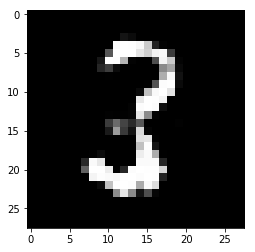

Loop: 254100, Generator_loss: -0.0093701, Discriminator_loss: 0.0056577
Loop: 254200, Generator_loss: -0.0087408, Discriminator_loss: 0.0068443
Loop: 254300, Generator_loss: -0.010223, Discriminator_loss: 0.0058708
Loop: 254400, Generator_loss: -0.010629, Discriminator_loss: 0.0065981
Loop: 254500, Generator_loss: -0.012255, Discriminator_loss: 0.0058271
Loop: 254600, Generator_loss: -0.006818, Discriminator_loss: 0.0061992
Loop: 254700, Generator_loss: -0.010624, Discriminator_loss: 0.0043105
Loop: 254800, Generator_loss: -0.0094909, Discriminator_loss: 0.0044289
Loop: 254900, Generator_loss: -0.0066665, Discriminator_loss: 0.0042218
Loop: 255000, Generator_loss: -0.007562, Discriminator_loss: 0.0039463


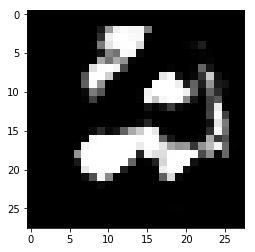

Loop: 255100, Generator_loss: -0.010421, Discriminator_loss: 0.0059196
Loop: 255200, Generator_loss: -0.014073, Discriminator_loss: 0.0044401
Loop: 255300, Generator_loss: -0.010646, Discriminator_loss: 0.0025035
Loop: 255400, Generator_loss: -0.0072247, Discriminator_loss: 0.0047212
Loop: 255500, Generator_loss: -0.004436, Discriminator_loss: 0.0060859
Loop: 255600, Generator_loss: -0.006711, Discriminator_loss: 0.0052212
Loop: 255700, Generator_loss: -0.00982, Discriminator_loss: 0.0047566
Loop: 255800, Generator_loss: -0.0031623, Discriminator_loss: 0.0049086
Loop: 255900, Generator_loss: -0.0091661, Discriminator_loss: 0.0058375
Loop: 256000, Generator_loss: -0.0087814, Discriminator_loss: 0.0042368


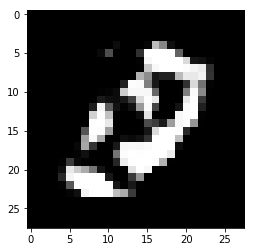

Loop: 256100, Generator_loss: -0.0059642, Discriminator_loss: 0.0050898
Loop: 256200, Generator_loss: -0.0076525, Discriminator_loss: 0.0042795
Loop: 256300, Generator_loss: -0.0085902, Discriminator_loss: 0.003427
Loop: 256400, Generator_loss: -0.0046726, Discriminator_loss: 0.0047705
Loop: 256500, Generator_loss: -0.009174, Discriminator_loss: 0.0028354
Loop: 256600, Generator_loss: -0.0079487, Discriminator_loss: 0.0049271
Loop: 256700, Generator_loss: -0.013466, Discriminator_loss: 0.0072597
Loop: 256800, Generator_loss: -0.011798, Discriminator_loss: 0.0076238
Loop: 256900, Generator_loss: -0.010485, Discriminator_loss: 0.0056081
Loop: 257000, Generator_loss: -0.0058873, Discriminator_loss: 0.0053755


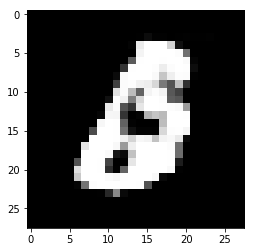

Loop: 257100, Generator_loss: -0.0092213, Discriminator_loss: 0.0044758
Loop: 257200, Generator_loss: -0.0090084, Discriminator_loss: 0.0052702
Loop: 257300, Generator_loss: -0.0082346, Discriminator_loss: 0.0070965
Loop: 257400, Generator_loss: -0.0086954, Discriminator_loss: 0.0048713
Loop: 257500, Generator_loss: -0.0092976, Discriminator_loss: 0.006312
Loop: 257600, Generator_loss: -0.0078971, Discriminator_loss: 0.0047699
Loop: 257700, Generator_loss: -0.0062216, Discriminator_loss: 0.0064669
Loop: 257800, Generator_loss: -0.0078505, Discriminator_loss: 0.0061932
Loop: 257900, Generator_loss: -0.0038342, Discriminator_loss: 0.0036394
Loop: 258000, Generator_loss: -0.0076778, Discriminator_loss: 0.0059721


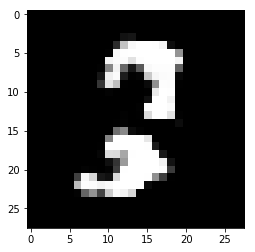

Loop: 258100, Generator_loss: -0.01162, Discriminator_loss: 0.0059451
Loop: 258200, Generator_loss: -0.0042828, Discriminator_loss: 0.0060262
Loop: 258300, Generator_loss: -0.009284, Discriminator_loss: 0.0079918
Loop: 258400, Generator_loss: -0.010013, Discriminator_loss: 0.0043753
Loop: 258500, Generator_loss: -0.010315, Discriminator_loss: 0.0049213
Loop: 258600, Generator_loss: -0.010091, Discriminator_loss: 0.0042427
Loop: 258700, Generator_loss: -0.00508, Discriminator_loss: 0.0059596
Loop: 258800, Generator_loss: -0.0088799, Discriminator_loss: 0.001226
Loop: 258900, Generator_loss: -0.0098252, Discriminator_loss: 0.0040078
Loop: 259000, Generator_loss: -0.010403, Discriminator_loss: 0.0053176


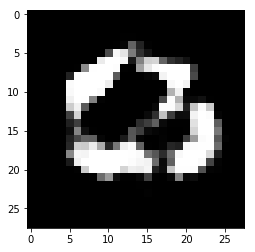

Loop: 259100, Generator_loss: -0.0068931, Discriminator_loss: 0.0050784
Loop: 259200, Generator_loss: -0.01262, Discriminator_loss: 0.0046805
Loop: 259300, Generator_loss: -0.01215, Discriminator_loss: 0.0063565
Loop: 259400, Generator_loss: -0.0083339, Discriminator_loss: 0.0043923
Loop: 259500, Generator_loss: -0.01258, Discriminator_loss: 0.006131
Loop: 259600, Generator_loss: -0.010145, Discriminator_loss: 0.0063884
Loop: 259700, Generator_loss: -0.0066609, Discriminator_loss: 0.0043845
Loop: 259800, Generator_loss: -0.0081873, Discriminator_loss: 0.0070071
Loop: 259900, Generator_loss: -0.0062181, Discriminator_loss: 0.0050903
Loop: 260000, Generator_loss: -0.0082259, Discriminator_loss: 0.0051332


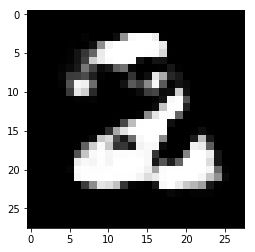

Loop: 260100, Generator_loss: -0.014325, Discriminator_loss: 0.0047015
Loop: 260200, Generator_loss: -0.0070121, Discriminator_loss: 0.0053462
Loop: 260300, Generator_loss: -0.011381, Discriminator_loss: 0.0049944
Loop: 260400, Generator_loss: -0.0085912, Discriminator_loss: 0.0064876
Loop: 260500, Generator_loss: -0.0067812, Discriminator_loss: 0.0051474
Loop: 260600, Generator_loss: -0.0056605, Discriminator_loss: 0.0042801
Loop: 260700, Generator_loss: -0.011687, Discriminator_loss: 0.0039678
Loop: 260800, Generator_loss: -0.013063, Discriminator_loss: 0.0044799
Loop: 260900, Generator_loss: -0.0094851, Discriminator_loss: 0.0059435
Loop: 261000, Generator_loss: -0.0041834, Discriminator_loss: 0.0058237


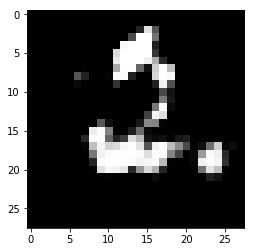

Loop: 261100, Generator_loss: -0.0084798, Discriminator_loss: 0.005911
Loop: 261200, Generator_loss: -0.0068371, Discriminator_loss: 0.0060122
Loop: 261300, Generator_loss: -0.010196, Discriminator_loss: 0.0051277
Loop: 261400, Generator_loss: -0.012287, Discriminator_loss: 0.0036077
Loop: 261500, Generator_loss: -0.0086289, Discriminator_loss: 0.0046272
Loop: 261600, Generator_loss: -0.014706, Discriminator_loss: 0.0051949
Loop: 261700, Generator_loss: -0.0084495, Discriminator_loss: 0.0054787
Loop: 261800, Generator_loss: -0.0087162, Discriminator_loss: 0.0058774
Loop: 261900, Generator_loss: -0.010692, Discriminator_loss: 0.0062615
Loop: 262000, Generator_loss: -0.0077277, Discriminator_loss: 0.0050906


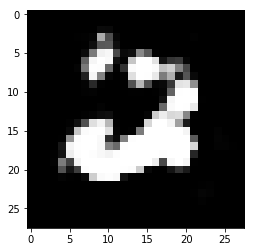

Loop: 262100, Generator_loss: 0.00013474, Discriminator_loss: 0.0049864
Loop: 262200, Generator_loss: -0.012756, Discriminator_loss: 0.004448
Loop: 262300, Generator_loss: -0.0044525, Discriminator_loss: 0.0045327
Loop: 262400, Generator_loss: -0.011124, Discriminator_loss: 0.005486
Loop: 262500, Generator_loss: -0.0076916, Discriminator_loss: 0.005216
Loop: 262600, Generator_loss: -0.010874, Discriminator_loss: 0.0052729
Loop: 262700, Generator_loss: -0.0078363, Discriminator_loss: 0.005554
Loop: 262800, Generator_loss: -0.01245, Discriminator_loss: 0.0038575
Loop: 262900, Generator_loss: -0.0092348, Discriminator_loss: 0.0040734
Loop: 263000, Generator_loss: -0.013294, Discriminator_loss: 0.0044015


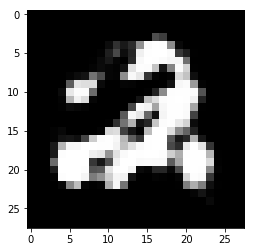

Loop: 263100, Generator_loss: -0.012077, Discriminator_loss: 0.0048205
Loop: 263200, Generator_loss: -0.0078141, Discriminator_loss: 0.0042769
Loop: 263300, Generator_loss: -0.0085809, Discriminator_loss: 0.006002
Loop: 263400, Generator_loss: -0.01052, Discriminator_loss: 0.0064364
Loop: 263500, Generator_loss: -0.0079482, Discriminator_loss: 0.0039779
Loop: 263600, Generator_loss: -0.012494, Discriminator_loss: 0.0057
Loop: 263700, Generator_loss: -0.011296, Discriminator_loss: 0.004701
Loop: 263800, Generator_loss: -0.0096962, Discriminator_loss: 0.0041343
Loop: 263900, Generator_loss: -0.0083247, Discriminator_loss: 0.0040454
Loop: 264000, Generator_loss: -0.0070111, Discriminator_loss: 0.007131


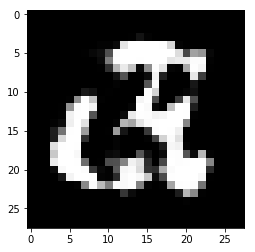

Loop: 264100, Generator_loss: -0.011682, Discriminator_loss: 0.0041691
Loop: 264200, Generator_loss: -0.0094111, Discriminator_loss: 0.0045262
Loop: 264300, Generator_loss: -0.013352, Discriminator_loss: 0.0050734
Loop: 264400, Generator_loss: -0.0059582, Discriminator_loss: 0.0047879
Loop: 264500, Generator_loss: -0.0083687, Discriminator_loss: 0.0052122
Loop: 264600, Generator_loss: -0.0097986, Discriminator_loss: 0.0039468
Loop: 264700, Generator_loss: -0.013358, Discriminator_loss: 0.0048451
Loop: 264800, Generator_loss: -0.01594, Discriminator_loss: 0.0055284
Loop: 264900, Generator_loss: -0.010615, Discriminator_loss: 0.004185
Loop: 265000, Generator_loss: -0.0084077, Discriminator_loss: 0.0022606


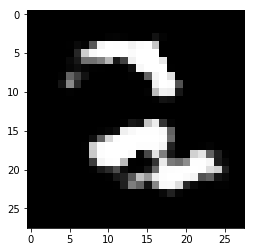

Loop: 265100, Generator_loss: -0.0085306, Discriminator_loss: 0.0018761
Loop: 265200, Generator_loss: -0.011755, Discriminator_loss: 0.0043929
Loop: 265300, Generator_loss: -0.01334, Discriminator_loss: 0.0053668
Loop: 265400, Generator_loss: -0.017496, Discriminator_loss: 0.0090706
Loop: 265500, Generator_loss: -0.0038319, Discriminator_loss: 0.0042465
Loop: 265600, Generator_loss: -0.0047672, Discriminator_loss: 0.0052816
Loop: 265700, Generator_loss: -0.0052673, Discriminator_loss: 0.0040614
Loop: 265800, Generator_loss: -0.010024, Discriminator_loss: 0.0050045
Loop: 265900, Generator_loss: -0.0076535, Discriminator_loss: 0.003152
Loop: 266000, Generator_loss: -0.0096437, Discriminator_loss: 0.0048479


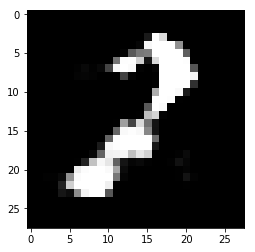

Loop: 266100, Generator_loss: -0.010135, Discriminator_loss: 0.0061966
Loop: 266200, Generator_loss: -0.0059376, Discriminator_loss: 0.0046459
Loop: 266300, Generator_loss: -0.012184, Discriminator_loss: 0.0032365
Loop: 266400, Generator_loss: -0.0091764, Discriminator_loss: 0.0048119
Loop: 266500, Generator_loss: -0.007862, Discriminator_loss: 0.0068494
Loop: 266600, Generator_loss: -0.012624, Discriminator_loss: -7.1846e-05
Loop: 266700, Generator_loss: -0.010462, Discriminator_loss: 0.006156
Loop: 266800, Generator_loss: -0.01059, Discriminator_loss: 0.0043853
Loop: 266900, Generator_loss: -0.0077625, Discriminator_loss: 0.0046356
Loop: 267000, Generator_loss: -0.0089123, Discriminator_loss: 0.0050607


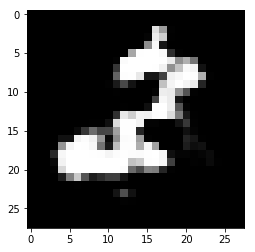

Loop: 267100, Generator_loss: -0.009308, Discriminator_loss: 0.005026
Loop: 267200, Generator_loss: -0.0073375, Discriminator_loss: 0.0038492
Loop: 267300, Generator_loss: -0.0088406, Discriminator_loss: 0.003674
Loop: 267400, Generator_loss: -0.014053, Discriminator_loss: 0.0071643
Loop: 267500, Generator_loss: -0.0089171, Discriminator_loss: 0.0034038
Loop: 267600, Generator_loss: -0.0080718, Discriminator_loss: 0.0042774
Loop: 267700, Generator_loss: -0.015977, Discriminator_loss: 0.0057231
Loop: 267800, Generator_loss: -0.014267, Discriminator_loss: 0.0039388
Loop: 267900, Generator_loss: -0.0099829, Discriminator_loss: 0.0052323
Loop: 268000, Generator_loss: -0.0096798, Discriminator_loss: 0.0048293


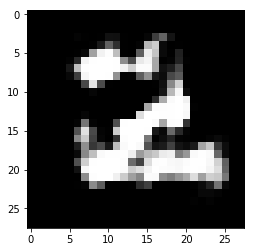

Loop: 268100, Generator_loss: -0.0091907, Discriminator_loss: 0.0041289
Loop: 268200, Generator_loss: -0.0095802, Discriminator_loss: 0.0048636
Loop: 268300, Generator_loss: -0.0051204, Discriminator_loss: 0.0033954
Loop: 268400, Generator_loss: -0.011379, Discriminator_loss: 0.0057718
Loop: 268500, Generator_loss: -0.0083043, Discriminator_loss: 0.0050027
Loop: 268600, Generator_loss: -0.012065, Discriminator_loss: 0.0035156
Loop: 268700, Generator_loss: -0.0052442, Discriminator_loss: 0.0047087
Loop: 268800, Generator_loss: -0.013546, Discriminator_loss: 0.0048464
Loop: 268900, Generator_loss: -0.0056495, Discriminator_loss: 0.0051363
Loop: 269000, Generator_loss: -0.012466, Discriminator_loss: 0.0037287


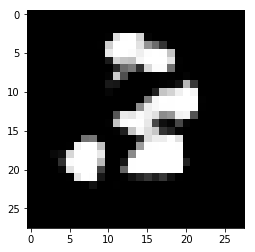

Loop: 269100, Generator_loss: -0.011129, Discriminator_loss: 0.0049328
Loop: 269200, Generator_loss: -0.010848, Discriminator_loss: 0.0050538
Loop: 269300, Generator_loss: -0.0075907, Discriminator_loss: 0.0049365
Loop: 269400, Generator_loss: -0.0089616, Discriminator_loss: 0.003397
Loop: 269500, Generator_loss: -0.0095557, Discriminator_loss: 0.0042294
Loop: 269600, Generator_loss: -0.009893, Discriminator_loss: 0.0048681
Loop: 269700, Generator_loss: -0.0092072, Discriminator_loss: 0.0052817
Loop: 269800, Generator_loss: -0.01098, Discriminator_loss: 0.0035439
Loop: 269900, Generator_loss: -0.011812, Discriminator_loss: 0.0041526
Loop: 270000, Generator_loss: -0.0078804, Discriminator_loss: 0.0049407


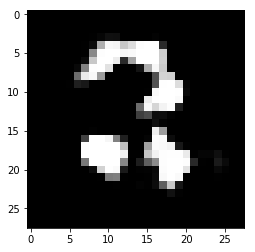

Loop: 270100, Generator_loss: -0.0068555, Discriminator_loss: 0.0045166
Loop: 270200, Generator_loss: -0.0065618, Discriminator_loss: 0.0058523
Loop: 270300, Generator_loss: -0.0051055, Discriminator_loss: 0.0033511
Loop: 270400, Generator_loss: -0.0078441, Discriminator_loss: 0.0058026
Loop: 270500, Generator_loss: -0.015934, Discriminator_loss: 0.0052321
Loop: 270600, Generator_loss: -0.0076132, Discriminator_loss: 0.0041727
Loop: 270700, Generator_loss: -0.0077048, Discriminator_loss: 0.0045741
Loop: 270800, Generator_loss: -0.011581, Discriminator_loss: 0.0046691
Loop: 270900, Generator_loss: -0.01448, Discriminator_loss: 0.0048121
Loop: 271000, Generator_loss: -0.011752, Discriminator_loss: 0.0043316


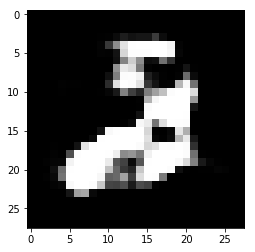

Loop: 271100, Generator_loss: -0.0067752, Discriminator_loss: 0.005504
Loop: 271200, Generator_loss: -0.0088004, Discriminator_loss: 0.0051973
Loop: 271300, Generator_loss: -0.010214, Discriminator_loss: 0.0041855
Loop: 271400, Generator_loss: -0.0066163, Discriminator_loss: 0.0053354
Loop: 271500, Generator_loss: -0.0091736, Discriminator_loss: 0.0060255
Loop: 271600, Generator_loss: -0.009782, Discriminator_loss: 0.0042941
Loop: 271700, Generator_loss: -0.0060215, Discriminator_loss: 0.0064435
Loop: 271800, Generator_loss: -0.013082, Discriminator_loss: 0.0044566
Loop: 271900, Generator_loss: -0.011938, Discriminator_loss: 0.0050239
Loop: 272000, Generator_loss: -0.011535, Discriminator_loss: 0.0046514


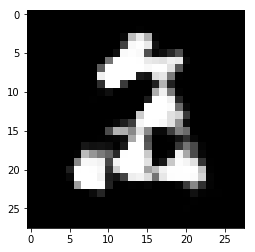

Loop: 272100, Generator_loss: -0.0076001, Discriminator_loss: 0.0050969
Loop: 272200, Generator_loss: -0.005461, Discriminator_loss: 0.0052499
Loop: 272300, Generator_loss: -0.010535, Discriminator_loss: 0.0041709
Loop: 272400, Generator_loss: -0.010056, Discriminator_loss: 0.0040815
Loop: 272500, Generator_loss: -0.0081783, Discriminator_loss: 0.006663
Loop: 272600, Generator_loss: -0.012343, Discriminator_loss: 0.004198
Loop: 272700, Generator_loss: -0.0079387, Discriminator_loss: 0.0030055
Loop: 272800, Generator_loss: -0.0088157, Discriminator_loss: 0.0030545
Loop: 272900, Generator_loss: -0.014494, Discriminator_loss: 0.0050391
Loop: 273000, Generator_loss: -0.010856, Discriminator_loss: 0.0049737


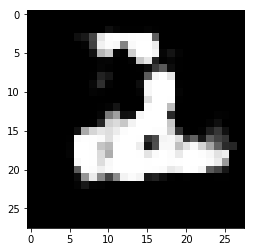

Loop: 273100, Generator_loss: -0.007814, Discriminator_loss: 0.0049965
Loop: 273200, Generator_loss: -0.011306, Discriminator_loss: 0.0061432
Loop: 273300, Generator_loss: -0.010587, Discriminator_loss: 0.0034829
Loop: 273400, Generator_loss: -0.011235, Discriminator_loss: 0.0039254
Loop: 273500, Generator_loss: -0.0092852, Discriminator_loss: 0.0060837
Loop: 273600, Generator_loss: -0.0090535, Discriminator_loss: 0.003846
Loop: 273700, Generator_loss: -0.01267, Discriminator_loss: 0.0042845
Loop: 273800, Generator_loss: -0.0087884, Discriminator_loss: 0.0030893
Loop: 273900, Generator_loss: -0.012956, Discriminator_loss: 0.0044588
Loop: 274000, Generator_loss: -0.0084726, Discriminator_loss: 0.0056766


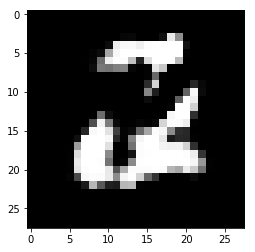

Loop: 274100, Generator_loss: -0.011704, Discriminator_loss: 0.0037873
Loop: 274200, Generator_loss: -0.0081236, Discriminator_loss: 0.0056874
Loop: 274300, Generator_loss: -0.0099343, Discriminator_loss: 0.0039896
Loop: 274400, Generator_loss: -0.012314, Discriminator_loss: 0.0039106
Loop: 274500, Generator_loss: -0.012513, Discriminator_loss: 0.0025812
Loop: 274600, Generator_loss: -0.0098319, Discriminator_loss: 0.0052148
Loop: 274700, Generator_loss: -0.0086483, Discriminator_loss: 0.0053071
Loop: 274800, Generator_loss: -0.0094634, Discriminator_loss: 0.0050397
Loop: 274900, Generator_loss: -0.0043981, Discriminator_loss: 0.0055162
Loop: 275000, Generator_loss: -0.0076239, Discriminator_loss: 0.0052076


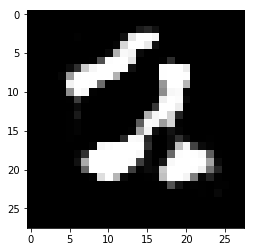

Loop: 275100, Generator_loss: -0.010728, Discriminator_loss: 0.0044984
Loop: 275200, Generator_loss: -0.0087416, Discriminator_loss: 0.0043459
Loop: 275300, Generator_loss: -0.0080881, Discriminator_loss: 0.0035545
Loop: 275400, Generator_loss: -0.013623, Discriminator_loss: 0.0054921
Loop: 275500, Generator_loss: -0.0094628, Discriminator_loss: 0.0042187
Loop: 275600, Generator_loss: -0.0062133, Discriminator_loss: 0.0039456
Loop: 275700, Generator_loss: -0.0098236, Discriminator_loss: 0.005685
Loop: 275800, Generator_loss: -0.011568, Discriminator_loss: 0.0041019
Loop: 275900, Generator_loss: -0.0058106, Discriminator_loss: 0.0028143
Loop: 276000, Generator_loss: -0.0052645, Discriminator_loss: 0.0039367


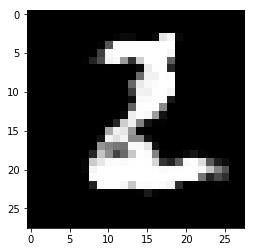

Loop: 276100, Generator_loss: -0.010764, Discriminator_loss: 0.0038441
Loop: 276200, Generator_loss: -0.011122, Discriminator_loss: 0.0060211
Loop: 276300, Generator_loss: -0.014207, Discriminator_loss: 0.0063809
Loop: 276400, Generator_loss: -0.010188, Discriminator_loss: 0.0053565
Loop: 276500, Generator_loss: -0.011322, Discriminator_loss: 0.0044161
Loop: 276600, Generator_loss: -0.0088551, Discriminator_loss: 0.0049106
Loop: 276700, Generator_loss: -0.0048889, Discriminator_loss: 0.0027619
Loop: 276800, Generator_loss: -0.0040369, Discriminator_loss: 0.0051309
Loop: 276900, Generator_loss: -0.011447, Discriminator_loss: 0.0044201
Loop: 277000, Generator_loss: -0.0097032, Discriminator_loss: 0.0051745


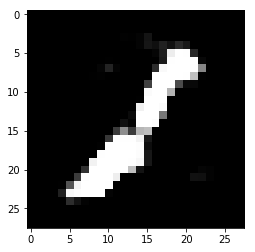

Loop: 277100, Generator_loss: -0.0096899, Discriminator_loss: 0.0038175
Loop: 277200, Generator_loss: -0.0097151, Discriminator_loss: 0.0042999
Loop: 277300, Generator_loss: -0.0039404, Discriminator_loss: 0.0046842
Loop: 277400, Generator_loss: -0.0080081, Discriminator_loss: 0.0050432
Loop: 277500, Generator_loss: -0.0068831, Discriminator_loss: 0.0044589
Loop: 277600, Generator_loss: -0.01478, Discriminator_loss: 0.0058834
Loop: 277700, Generator_loss: -0.0097687, Discriminator_loss: 0.0044909
Loop: 277800, Generator_loss: -0.0087303, Discriminator_loss: 0.0048111
Loop: 277900, Generator_loss: -0.0098347, Discriminator_loss: 0.0025349
Loop: 278000, Generator_loss: -0.0065617, Discriminator_loss: 0.004681


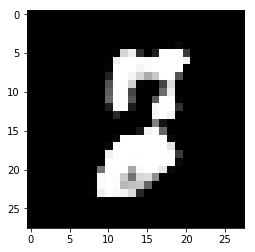

Loop: 278100, Generator_loss: -0.0064532, Discriminator_loss: 0.0056689
Loop: 278200, Generator_loss: -0.0076903, Discriminator_loss: 0.0035002
Loop: 278300, Generator_loss: -0.0091438, Discriminator_loss: 0.0044912
Loop: 278400, Generator_loss: -0.0087447, Discriminator_loss: 0.0040532
Loop: 278500, Generator_loss: -0.014992, Discriminator_loss: 0.0039614
Loop: 278600, Generator_loss: -0.012822, Discriminator_loss: 0.0056103
Loop: 278700, Generator_loss: -0.0080713, Discriminator_loss: 0.0046848
Loop: 278800, Generator_loss: -0.01941, Discriminator_loss: 0.0030692
Loop: 278900, Generator_loss: -0.0079075, Discriminator_loss: 0.0024886
Loop: 279000, Generator_loss: -0.0062385, Discriminator_loss: 0.0050522


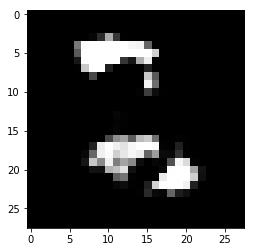

Loop: 279100, Generator_loss: -0.011569, Discriminator_loss: 0.0031571
Loop: 279200, Generator_loss: -0.011848, Discriminator_loss: 0.0050204
Loop: 279300, Generator_loss: -0.0070406, Discriminator_loss: 0.0041558
Loop: 279400, Generator_loss: -0.011433, Discriminator_loss: 0.0062722
Loop: 279500, Generator_loss: -0.010366, Discriminator_loss: 0.0049708
Loop: 279600, Generator_loss: -0.0094673, Discriminator_loss: 0.0027067
Loop: 279700, Generator_loss: -0.0063886, Discriminator_loss: 0.004548
Loop: 279800, Generator_loss: -0.011175, Discriminator_loss: 0.0048616
Loop: 279900, Generator_loss: -0.0073696, Discriminator_loss: 0.0044873
Loop: 280000, Generator_loss: -0.0093538, Discriminator_loss: 0.0061553


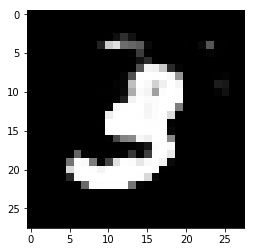

Loop: 280100, Generator_loss: -0.01005, Discriminator_loss: 0.0046645
Loop: 280200, Generator_loss: -0.0098904, Discriminator_loss: 0.003663
Loop: 280300, Generator_loss: -0.0069369, Discriminator_loss: 0.0048226
Loop: 280400, Generator_loss: -0.011954, Discriminator_loss: 0.0055351
Loop: 280500, Generator_loss: -0.0069204, Discriminator_loss: 0.0054981
Loop: 280600, Generator_loss: -0.0063594, Discriminator_loss: 0.0037085
Loop: 280700, Generator_loss: -0.013091, Discriminator_loss: 0.0050163
Loop: 280800, Generator_loss: -0.011511, Discriminator_loss: 0.0048434
Loop: 280900, Generator_loss: -0.010343, Discriminator_loss: 0.0050042
Loop: 281000, Generator_loss: -0.011603, Discriminator_loss: 0.0054


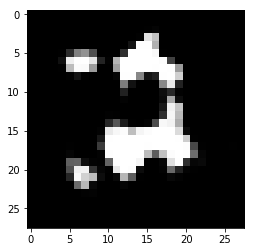

Loop: 281100, Generator_loss: -0.0091361, Discriminator_loss: 0.0036959
Loop: 281200, Generator_loss: -0.011603, Discriminator_loss: 0.0054329
Loop: 281300, Generator_loss: -0.0068191, Discriminator_loss: 0.0044442
Loop: 281400, Generator_loss: -0.0094522, Discriminator_loss: 0.0040804
Loop: 281500, Generator_loss: -0.01104, Discriminator_loss: 0.0077553
Loop: 281600, Generator_loss: -0.010095, Discriminator_loss: 0.0074909
Loop: 281700, Generator_loss: -0.014859, Discriminator_loss: 0.0030798
Loop: 281800, Generator_loss: -0.011085, Discriminator_loss: 0.0059722
Loop: 281900, Generator_loss: -0.0057841, Discriminator_loss: 0.0044664
Loop: 282000, Generator_loss: -0.0090791, Discriminator_loss: 0.0063863


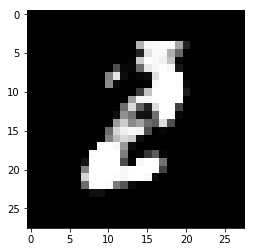

Loop: 282100, Generator_loss: -0.0097483, Discriminator_loss: 0.0064342
Loop: 282200, Generator_loss: -0.011004, Discriminator_loss: 0.0041585
Loop: 282300, Generator_loss: -0.011397, Discriminator_loss: 0.0047472
Loop: 282400, Generator_loss: -0.0091626, Discriminator_loss: 0.0057174
Loop: 282500, Generator_loss: -0.01131, Discriminator_loss: 0.0058098
Loop: 282600, Generator_loss: -0.011606, Discriminator_loss: 0.006361
Loop: 282700, Generator_loss: -0.0088788, Discriminator_loss: 0.0045438
Loop: 282800, Generator_loss: -0.0072355, Discriminator_loss: 0.0029533
Loop: 282900, Generator_loss: -0.0095522, Discriminator_loss: 0.0047276
Loop: 283000, Generator_loss: -0.006142, Discriminator_loss: 0.0058726


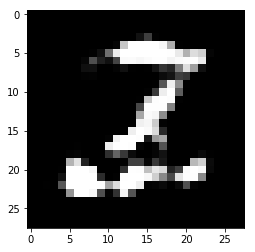

Loop: 283100, Generator_loss: -0.0065499, Discriminator_loss: 0.0030826
Loop: 283200, Generator_loss: -0.0097149, Discriminator_loss: 0.0040508
Loop: 283300, Generator_loss: -0.010247, Discriminator_loss: 0.0049979
Loop: 283400, Generator_loss: -0.012057, Discriminator_loss: 0.0065836
Loop: 283500, Generator_loss: -0.009846, Discriminator_loss: 0.0050426
Loop: 283600, Generator_loss: -0.0091935, Discriminator_loss: 0.0040998
Loop: 283700, Generator_loss: -0.013791, Discriminator_loss: 0.0049049
Loop: 283800, Generator_loss: -0.014763, Discriminator_loss: 0.0039914
Loop: 283900, Generator_loss: -0.0075093, Discriminator_loss: 0.0050531
Loop: 284000, Generator_loss: -0.01273, Discriminator_loss: 0.0067421


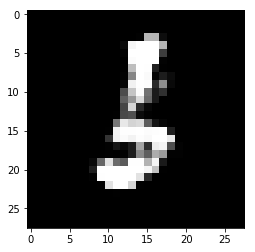

Loop: 284100, Generator_loss: -0.0032872, Discriminator_loss: 0.0059189
Loop: 284200, Generator_loss: -0.010224, Discriminator_loss: 0.0034696
Loop: 284300, Generator_loss: -0.0045929, Discriminator_loss: 0.0051497
Loop: 284400, Generator_loss: -0.010819, Discriminator_loss: 0.0045237
Loop: 284500, Generator_loss: -0.0097549, Discriminator_loss: 0.0047192
Loop: 284600, Generator_loss: -0.0057395, Discriminator_loss: 0.0039589
Loop: 284700, Generator_loss: -0.008335, Discriminator_loss: 0.0042361
Loop: 284800, Generator_loss: -0.011541, Discriminator_loss: 0.0040795
Loop: 284900, Generator_loss: -0.0096384, Discriminator_loss: 0.0038901
Loop: 285000, Generator_loss: -0.011562, Discriminator_loss: 0.0026065


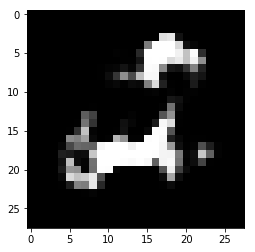

Loop: 285100, Generator_loss: -0.0093383, Discriminator_loss: 0.0017856
Loop: 285200, Generator_loss: -0.006886, Discriminator_loss: 0.0045854
Loop: 285300, Generator_loss: -0.012099, Discriminator_loss: 0.0031777
Loop: 285400, Generator_loss: -0.005705, Discriminator_loss: 0.003412
Loop: 285500, Generator_loss: -0.0083695, Discriminator_loss: 0.0046132
Loop: 285600, Generator_loss: -0.011273, Discriminator_loss: 0.0048486
Loop: 285700, Generator_loss: -0.007977, Discriminator_loss: 0.00586
Loop: 285800, Generator_loss: -0.012993, Discriminator_loss: 0.0036995
Loop: 285900, Generator_loss: -0.0098924, Discriminator_loss: 0.0038809
Loop: 286000, Generator_loss: -0.0041869, Discriminator_loss: 0.004924


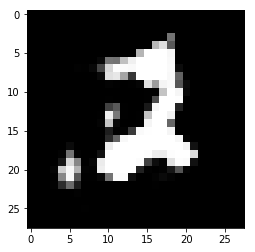

Loop: 286100, Generator_loss: -0.013305, Discriminator_loss: 0.0042226
Loop: 286200, Generator_loss: -0.0077075, Discriminator_loss: 0.0058791
Loop: 286300, Generator_loss: -0.0087529, Discriminator_loss: 0.0061664
Loop: 286400, Generator_loss: -0.0085343, Discriminator_loss: 0.0045843
Loop: 286500, Generator_loss: -0.0084205, Discriminator_loss: 0.0053027
Loop: 286600, Generator_loss: -0.0098466, Discriminator_loss: 0.0025907
Loop: 286700, Generator_loss: -0.014364, Discriminator_loss: 0.0039165
Loop: 286800, Generator_loss: -0.007492, Discriminator_loss: 0.0028594
Loop: 286900, Generator_loss: -0.010562, Discriminator_loss: 0.0041406
Loop: 287000, Generator_loss: -0.008664, Discriminator_loss: 0.0040482


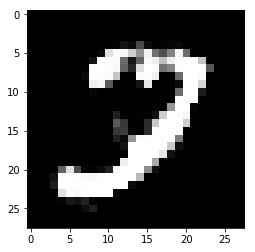

Loop: 287100, Generator_loss: -0.010523, Discriminator_loss: 0.0047765
Loop: 287200, Generator_loss: -0.0072859, Discriminator_loss: 0.0058341
Loop: 287300, Generator_loss: -0.0066253, Discriminator_loss: 0.0034022
Loop: 287400, Generator_loss: -0.012214, Discriminator_loss: 0.0036003
Loop: 287500, Generator_loss: -0.00646, Discriminator_loss: 0.0050776
Loop: 287600, Generator_loss: -0.0071178, Discriminator_loss: 0.0047754
Loop: 287700, Generator_loss: -0.0088856, Discriminator_loss: 0.004824
Loop: 287800, Generator_loss: -0.0096778, Discriminator_loss: 0.0053417
Loop: 287900, Generator_loss: -0.0090582, Discriminator_loss: 0.0056971
Loop: 288000, Generator_loss: -0.0088712, Discriminator_loss: 0.0076532


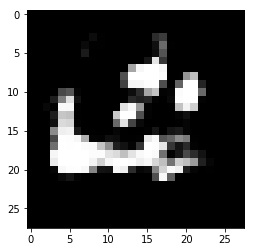

Loop: 288100, Generator_loss: -0.0045452, Discriminator_loss: 0.0018225
Loop: 288200, Generator_loss: -0.007914, Discriminator_loss: 0.003701
Loop: 288300, Generator_loss: -0.013686, Discriminator_loss: 0.0069217
Loop: 288400, Generator_loss: -0.0080231, Discriminator_loss: 0.0039187
Loop: 288500, Generator_loss: -0.010551, Discriminator_loss: 0.0066192
Loop: 288600, Generator_loss: -0.003271, Discriminator_loss: 0.0036525
Loop: 288700, Generator_loss: -0.0076658, Discriminator_loss: 0.0046869
Loop: 288800, Generator_loss: -0.012385, Discriminator_loss: 0.0047547
Loop: 288900, Generator_loss: -0.0084669, Discriminator_loss: 0.0053785
Loop: 289000, Generator_loss: -0.015946, Discriminator_loss: 0.0044299


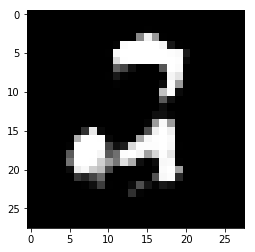

Loop: 289100, Generator_loss: -0.0070646, Discriminator_loss: 0.0022582
Loop: 289200, Generator_loss: -0.010116, Discriminator_loss: 0.0039755
Loop: 289300, Generator_loss: -0.005831, Discriminator_loss: 0.0044706
Loop: 289400, Generator_loss: -0.0099578, Discriminator_loss: 0.004708
Loop: 289500, Generator_loss: -0.01137, Discriminator_loss: 0.0063947
Loop: 289600, Generator_loss: -0.0091056, Discriminator_loss: 0.002298
Loop: 289700, Generator_loss: -0.0047973, Discriminator_loss: 0.0045849
Loop: 289800, Generator_loss: -0.012924, Discriminator_loss: 0.004727
Loop: 289900, Generator_loss: -0.0093338, Discriminator_loss: 0.0027746
Loop: 290000, Generator_loss: -0.0038888, Discriminator_loss: 0.004032


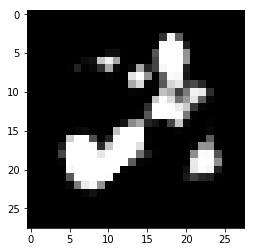

Loop: 290100, Generator_loss: -0.0050968, Discriminator_loss: 0.0047515
Loop: 290200, Generator_loss: -0.0089887, Discriminator_loss: 0.0079917
Loop: 290300, Generator_loss: -0.010153, Discriminator_loss: 0.0048558
Loop: 290400, Generator_loss: -0.0044176, Discriminator_loss: 0.0041248
Loop: 290500, Generator_loss: -0.014226, Discriminator_loss: 0.0029265
Loop: 290600, Generator_loss: -0.0080436, Discriminator_loss: 0.0027014
Loop: 290700, Generator_loss: -0.005832, Discriminator_loss: 0.0033538
Loop: 290800, Generator_loss: -0.015994, Discriminator_loss: 0.0026674
Loop: 290900, Generator_loss: -0.0065215, Discriminator_loss: 0.0071719
Loop: 291000, Generator_loss: -0.008377, Discriminator_loss: 0.0049047


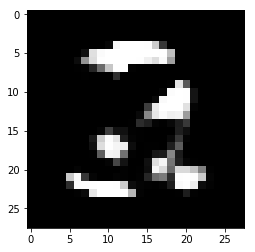

Loop: 291100, Generator_loss: -0.011936, Discriminator_loss: 0.0048461
Loop: 291200, Generator_loss: -0.0098096, Discriminator_loss: 0.0053313
Loop: 291300, Generator_loss: -0.006578, Discriminator_loss: 0.002769
Loop: 291400, Generator_loss: -0.0064361, Discriminator_loss: 0.0023705
Loop: 291500, Generator_loss: -0.0068459, Discriminator_loss: 0.0046834
Loop: 291600, Generator_loss: -0.007295, Discriminator_loss: 0.005019
Loop: 291700, Generator_loss: -0.0070695, Discriminator_loss: 0.0054421
Loop: 291800, Generator_loss: -0.0089152, Discriminator_loss: 0.0049189
Loop: 291900, Generator_loss: -0.011306, Discriminator_loss: 0.0047173
Loop: 292000, Generator_loss: -0.011144, Discriminator_loss: 0.0034657


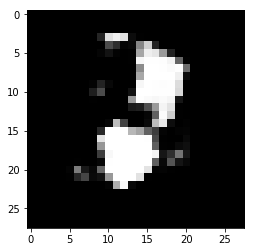

Loop: 292100, Generator_loss: -0.0096733, Discriminator_loss: 0.0036462
Loop: 292200, Generator_loss: -0.0048955, Discriminator_loss: 0.0048591
Loop: 292300, Generator_loss: -0.0091069, Discriminator_loss: 0.0043205
Loop: 292400, Generator_loss: -0.0046487, Discriminator_loss: 0.0041289
Loop: 292500, Generator_loss: -0.0095335, Discriminator_loss: 0.0044535
Loop: 292600, Generator_loss: -0.0090957, Discriminator_loss: 0.0041597
Loop: 292700, Generator_loss: -0.0066524, Discriminator_loss: 0.0049789
Loop: 292800, Generator_loss: -0.010914, Discriminator_loss: 0.004238
Loop: 292900, Generator_loss: -0.0037009, Discriminator_loss: 0.004187
Loop: 293000, Generator_loss: -0.014589, Discriminator_loss: 0.0041819


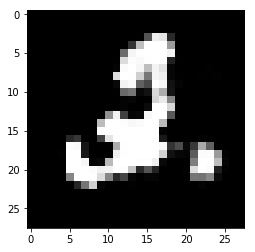

Loop: 293100, Generator_loss: -0.0089997, Discriminator_loss: 0.0035673
Loop: 293200, Generator_loss: -0.010679, Discriminator_loss: 0.0076106
Loop: 293300, Generator_loss: -0.012187, Discriminator_loss: 0.0068975
Loop: 293400, Generator_loss: -0.014768, Discriminator_loss: 0.0058701
Loop: 293500, Generator_loss: -0.014674, Discriminator_loss: 0.0069791
Loop: 293600, Generator_loss: -0.0099281, Discriminator_loss: 0.0054829
Loop: 293700, Generator_loss: -0.0099274, Discriminator_loss: 0.0040995
Loop: 293800, Generator_loss: -0.0079833, Discriminator_loss: 0.0039492
Loop: 293900, Generator_loss: -0.0090312, Discriminator_loss: 0.0041793
Loop: 294000, Generator_loss: -0.0097038, Discriminator_loss: 0.0042179


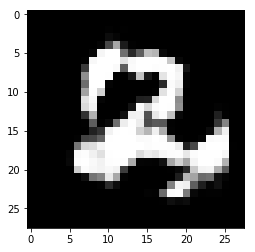

Loop: 294100, Generator_loss: -0.011649, Discriminator_loss: 0.0028081
Loop: 294200, Generator_loss: -0.0074714, Discriminator_loss: 0.0033609
Loop: 294300, Generator_loss: -0.010997, Discriminator_loss: 0.0047543
Loop: 294400, Generator_loss: -0.0067405, Discriminator_loss: 0.005632
Loop: 294500, Generator_loss: -0.0077813, Discriminator_loss: 0.0045605
Loop: 294600, Generator_loss: -0.010571, Discriminator_loss: 0.005154
Loop: 294700, Generator_loss: -0.01032, Discriminator_loss: 0.005217
Loop: 294800, Generator_loss: -0.0041265, Discriminator_loss: 0.0046117
Loop: 294900, Generator_loss: -0.0099757, Discriminator_loss: 0.0028565
Loop: 295000, Generator_loss: -0.0051733, Discriminator_loss: 0.0039683


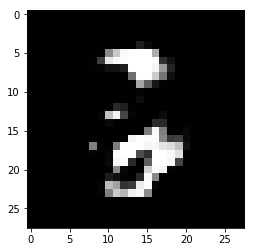

Loop: 295100, Generator_loss: -0.0078971, Discriminator_loss: 0.006828
Loop: 295200, Generator_loss: -0.014831, Discriminator_loss: 0.0045245
Loop: 295300, Generator_loss: -0.0089679, Discriminator_loss: 0.005906
Loop: 295400, Generator_loss: -0.0068504, Discriminator_loss: 0.0048738
Loop: 295500, Generator_loss: -0.013608, Discriminator_loss: 0.0060752
Loop: 295600, Generator_loss: -0.0070948, Discriminator_loss: 0.0052326
Loop: 295700, Generator_loss: -0.0096221, Discriminator_loss: 0.0047047
Loop: 295800, Generator_loss: -0.0055204, Discriminator_loss: 0.0042984
Loop: 295900, Generator_loss: -0.0097708, Discriminator_loss: 0.0041664
Loop: 296000, Generator_loss: -0.014127, Discriminator_loss: 0.0066012


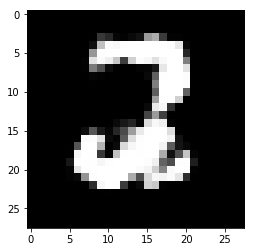

Loop: 296100, Generator_loss: -0.0078118, Discriminator_loss: 0.0024327
Loop: 296200, Generator_loss: -0.010787, Discriminator_loss: 0.0052269
Loop: 296300, Generator_loss: -0.012085, Discriminator_loss: 0.0041665
Loop: 296400, Generator_loss: -0.0072225, Discriminator_loss: 0.0034357
Loop: 296500, Generator_loss: -0.00774, Discriminator_loss: 0.0040726
Loop: 296600, Generator_loss: -0.0082905, Discriminator_loss: 0.0039696
Loop: 296700, Generator_loss: -0.0095438, Discriminator_loss: 0.005032
Loop: 296800, Generator_loss: -0.012798, Discriminator_loss: 0.0059488
Loop: 296900, Generator_loss: -0.010279, Discriminator_loss: 0.0047021
Loop: 297000, Generator_loss: -0.0097057, Discriminator_loss: 0.0067001


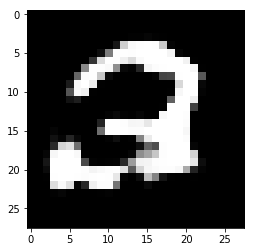

Loop: 297100, Generator_loss: -0.013125, Discriminator_loss: 0.0047939
Loop: 297200, Generator_loss: -0.012734, Discriminator_loss: 0.0032169
Loop: 297300, Generator_loss: -0.0072245, Discriminator_loss: 0.0048224
Loop: 297400, Generator_loss: -0.010123, Discriminator_loss: 0.003389
Loop: 297500, Generator_loss: -0.0059162, Discriminator_loss: 0.0025288
Loop: 297600, Generator_loss: -0.010063, Discriminator_loss: 0.0055438
Loop: 297700, Generator_loss: -0.0081841, Discriminator_loss: 0.0046497
Loop: 297800, Generator_loss: -0.0049317, Discriminator_loss: 0.0014603
Loop: 297900, Generator_loss: -0.0088687, Discriminator_loss: 0.0038634
Loop: 298000, Generator_loss: -0.013961, Discriminator_loss: 0.0044852


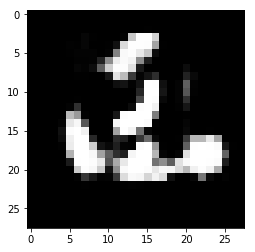

Loop: 298100, Generator_loss: -0.012951, Discriminator_loss: 0.0058888
Loop: 298200, Generator_loss: -0.0049478, Discriminator_loss: 0.0055606
Loop: 298300, Generator_loss: -0.013009, Discriminator_loss: 0.0050947
Loop: 298400, Generator_loss: -0.0044023, Discriminator_loss: 0.0055606
Loop: 298500, Generator_loss: -0.014814, Discriminator_loss: 0.0041728
Loop: 298600, Generator_loss: -0.0083359, Discriminator_loss: 0.0046526
Loop: 298700, Generator_loss: -0.0070836, Discriminator_loss: 0.0051377
Loop: 298800, Generator_loss: -0.011409, Discriminator_loss: 0.0036481
Loop: 298900, Generator_loss: -0.0094158, Discriminator_loss: 0.0030843
Loop: 299000, Generator_loss: -0.0094865, Discriminator_loss: 0.0034458


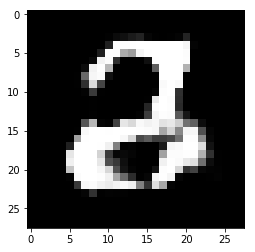

Loop: 299100, Generator_loss: -0.00794, Discriminator_loss: 0.0043126
Loop: 299200, Generator_loss: -0.0095759, Discriminator_loss: 0.0033834
Loop: 299300, Generator_loss: -0.0062334, Discriminator_loss: 0.0047445
Loop: 299400, Generator_loss: -0.0098792, Discriminator_loss: 0.0049407
Loop: 299500, Generator_loss: -0.01069, Discriminator_loss: 0.0026421
Loop: 299600, Generator_loss: -0.0054807, Discriminator_loss: 0.0061569
Loop: 299700, Generator_loss: -0.0098785, Discriminator_loss: 0.0050345
Loop: 299800, Generator_loss: -0.009549, Discriminator_loss: 0.0048404
Loop: 299900, Generator_loss: -0.0077817, Discriminator_loss: 0.0047254
Loop: 300000, Generator_loss: -0.010941, Discriminator_loss: 0.0043136


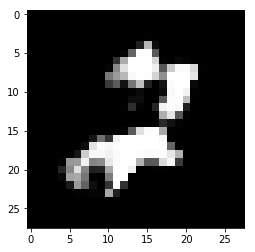

Loop: 300100, Generator_loss: -0.0080351, Discriminator_loss: 0.0034909
Loop: 300200, Generator_loss: -0.008055, Discriminator_loss: 0.0049126
Loop: 300300, Generator_loss: -0.0049754, Discriminator_loss: 0.0055777
Loop: 300400, Generator_loss: -0.0077046, Discriminator_loss: 0.0029699
Loop: 300500, Generator_loss: -0.010414, Discriminator_loss: 0.0039772
Loop: 300600, Generator_loss: -0.0068864, Discriminator_loss: 0.002876
Loop: 300700, Generator_loss: -0.0081358, Discriminator_loss: 0.0054899
Loop: 300800, Generator_loss: -0.0079126, Discriminator_loss: 0.0065096
Loop: 300900, Generator_loss: -0.0077486, Discriminator_loss: 0.0035923
Loop: 301000, Generator_loss: -0.0092431, Discriminator_loss: 0.0022147


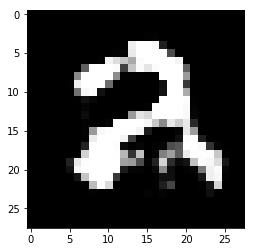

Loop: 301100, Generator_loss: -0.0093788, Discriminator_loss: 0.0055934
Loop: 301200, Generator_loss: -0.009752, Discriminator_loss: 0.0058171
Loop: 301300, Generator_loss: -0.0060142, Discriminator_loss: 0.0037418
Loop: 301400, Generator_loss: -0.010342, Discriminator_loss: 0.0054282
Loop: 301500, Generator_loss: -0.0099168, Discriminator_loss: 0.0046783
Loop: 301600, Generator_loss: -0.0078573, Discriminator_loss: 0.0033031
Loop: 301700, Generator_loss: -0.0079915, Discriminator_loss: 0.0025877
Loop: 301800, Generator_loss: -0.0062424, Discriminator_loss: 0.0057044
Loop: 301900, Generator_loss: -0.012007, Discriminator_loss: 0.0031191
Loop: 302000, Generator_loss: -0.0098361, Discriminator_loss: 0.0050201


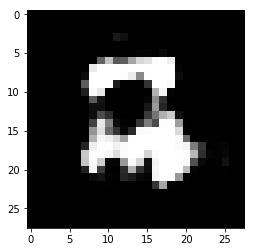

Loop: 302100, Generator_loss: -0.007057, Discriminator_loss: 0.0049909
Loop: 302200, Generator_loss: -0.010144, Discriminator_loss: 0.0049811
Loop: 302300, Generator_loss: -0.0097785, Discriminator_loss: 0.002532
Loop: 302400, Generator_loss: -0.010192, Discriminator_loss: 0.005716
Loop: 302500, Generator_loss: -0.0094294, Discriminator_loss: 0.0056432
Loop: 302600, Generator_loss: -0.0088752, Discriminator_loss: 0.0068846
Loop: 302700, Generator_loss: -0.0064707, Discriminator_loss: 0.0050025
Loop: 302800, Generator_loss: -0.0042182, Discriminator_loss: 0.0066629
Loop: 302900, Generator_loss: -0.011233, Discriminator_loss: 0.001699
Loop: 303000, Generator_loss: -0.010252, Discriminator_loss: 0.0042597


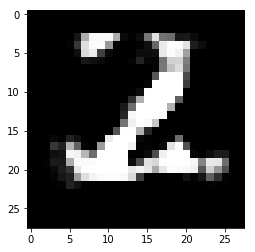

Loop: 303100, Generator_loss: -0.011465, Discriminator_loss: 0.0032725
Loop: 303200, Generator_loss: -0.009414, Discriminator_loss: 0.0029396
Loop: 303300, Generator_loss: -0.0034935, Discriminator_loss: 0.0035386
Loop: 303400, Generator_loss: -0.0090835, Discriminator_loss: 0.0044536
Loop: 303500, Generator_loss: -0.005131, Discriminator_loss: 0.0034218
Loop: 303600, Generator_loss: -0.013913, Discriminator_loss: 0.0041794
Loop: 303700, Generator_loss: -0.0056467, Discriminator_loss: 0.0043304
Loop: 303800, Generator_loss: -0.0073122, Discriminator_loss: 0.0045431
Loop: 303900, Generator_loss: -0.0074716, Discriminator_loss: 0.0044077
Loop: 304000, Generator_loss: -0.0079818, Discriminator_loss: 0.0058471


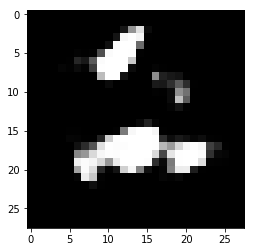

Loop: 304100, Generator_loss: -0.0062596, Discriminator_loss: 0.0047405
Loop: 304200, Generator_loss: -0.011631, Discriminator_loss: 0.0059277
Loop: 304300, Generator_loss: -0.010206, Discriminator_loss: 0.003991
Loop: 304400, Generator_loss: -0.01142, Discriminator_loss: 0.002827
Loop: 304500, Generator_loss: -0.0089974, Discriminator_loss: 0.0048857
Loop: 304600, Generator_loss: -0.010535, Discriminator_loss: 0.005372
Loop: 304700, Generator_loss: -0.0062206, Discriminator_loss: 0.0029833
Loop: 304800, Generator_loss: -0.00875, Discriminator_loss: 0.0036436
Loop: 304900, Generator_loss: -0.012045, Discriminator_loss: 0.0054351
Loop: 305000, Generator_loss: -0.015315, Discriminator_loss: 0.0025368


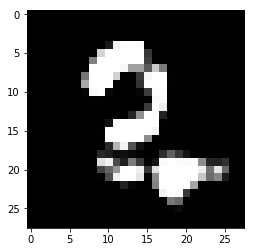

Loop: 305100, Generator_loss: -0.0098462, Discriminator_loss: 0.0042488
Loop: 305200, Generator_loss: -0.0086012, Discriminator_loss: 0.0073775
Loop: 305300, Generator_loss: -0.0085936, Discriminator_loss: 0.0041206
Loop: 305400, Generator_loss: -0.005091, Discriminator_loss: 0.003193
Loop: 305500, Generator_loss: -0.0091855, Discriminator_loss: 0.0053213
Loop: 305600, Generator_loss: -0.0093589, Discriminator_loss: 0.0050679
Loop: 305700, Generator_loss: -0.0089034, Discriminator_loss: 0.0040734
Loop: 305800, Generator_loss: -0.012925, Discriminator_loss: 0.0047291
Loop: 305900, Generator_loss: -0.014844, Discriminator_loss: 0.0046756
Loop: 306000, Generator_loss: -0.01232, Discriminator_loss: 0.0059232


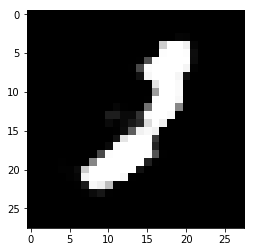

Loop: 306100, Generator_loss: -0.0079685, Discriminator_loss: 0.0030397
Loop: 306200, Generator_loss: -0.011183, Discriminator_loss: 0.0045966
Loop: 306300, Generator_loss: -0.010876, Discriminator_loss: 0.0052048
Loop: 306400, Generator_loss: -0.0066067, Discriminator_loss: 0.0037229
Loop: 306500, Generator_loss: -0.0097555, Discriminator_loss: 0.006203
Loop: 306600, Generator_loss: -0.0048217, Discriminator_loss: 0.0058982
Loop: 306700, Generator_loss: -0.0057882, Discriminator_loss: 0.0045375
Loop: 306800, Generator_loss: -0.014284, Discriminator_loss: 0.002618
Loop: 306900, Generator_loss: -0.0074273, Discriminator_loss: 0.0038065
Loop: 307000, Generator_loss: -0.0075896, Discriminator_loss: 0.0033788


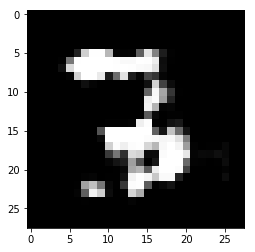

Loop: 307100, Generator_loss: -0.01068, Discriminator_loss: 0.0042574
Loop: 307200, Generator_loss: -0.0090164, Discriminator_loss: 0.004137
Loop: 307300, Generator_loss: -0.010808, Discriminator_loss: 0.0034267
Loop: 307400, Generator_loss: -0.0099169, Discriminator_loss: 0.0049121
Loop: 307500, Generator_loss: -0.010846, Discriminator_loss: 0.0035102
Loop: 307600, Generator_loss: -0.0086496, Discriminator_loss: 0.0054923
Loop: 307700, Generator_loss: -0.0079736, Discriminator_loss: 0.0049713
Loop: 307800, Generator_loss: -0.0076569, Discriminator_loss: 0.0052274
Loop: 307900, Generator_loss: -0.01532, Discriminator_loss: 0.0071256
Loop: 308000, Generator_loss: -0.013419, Discriminator_loss: 0.0035024


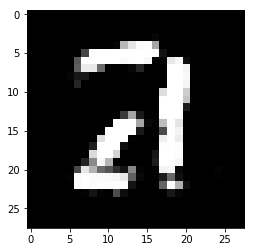

Loop: 308100, Generator_loss: -0.011106, Discriminator_loss: 0.007218
Loop: 308200, Generator_loss: -0.0045836, Discriminator_loss: 0.0044814
Loop: 308300, Generator_loss: -0.0057079, Discriminator_loss: 0.006718
Loop: 308400, Generator_loss: -0.0092523, Discriminator_loss: 0.0039095
Loop: 308500, Generator_loss: -0.013371, Discriminator_loss: 0.0044143
Loop: 308600, Generator_loss: -0.01145, Discriminator_loss: 0.0016031
Loop: 308700, Generator_loss: -0.010135, Discriminator_loss: 0.003318
Loop: 308800, Generator_loss: -0.010264, Discriminator_loss: 0.0051006
Loop: 308900, Generator_loss: -0.008729, Discriminator_loss: 0.0042207
Loop: 309000, Generator_loss: -0.0093408, Discriminator_loss: 0.003594


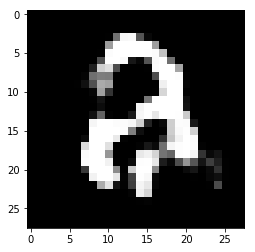

Loop: 309100, Generator_loss: -0.0087393, Discriminator_loss: 0.0044266
Loop: 309200, Generator_loss: -0.0023333, Discriminator_loss: 0.0059997
Loop: 309300, Generator_loss: -0.011823, Discriminator_loss: 0.0051913
Loop: 309400, Generator_loss: -0.0081502, Discriminator_loss: 0.0023422
Loop: 309500, Generator_loss: -0.011042, Discriminator_loss: 0.004512
Loop: 309600, Generator_loss: -0.010378, Discriminator_loss: 0.0052892
Loop: 309700, Generator_loss: -0.0099544, Discriminator_loss: 0.0031881
Loop: 309800, Generator_loss: -0.0084104, Discriminator_loss: 0.0044006
Loop: 309900, Generator_loss: -0.012679, Discriminator_loss: 0.0068233
Loop: 310000, Generator_loss: -0.0076279, Discriminator_loss: 0.0041649


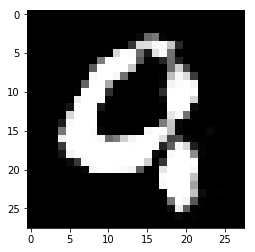

Loop: 310100, Generator_loss: -0.011852, Discriminator_loss: 0.0043428
Loop: 310200, Generator_loss: -0.012869, Discriminator_loss: 0.0048118
Loop: 310300, Generator_loss: -0.014181, Discriminator_loss: 0.0037788
Loop: 310400, Generator_loss: -0.0098466, Discriminator_loss: 0.0046131
Loop: 310500, Generator_loss: -0.0054812, Discriminator_loss: 0.0059722
Loop: 310600, Generator_loss: -0.0089857, Discriminator_loss: 0.0049773
Loop: 310700, Generator_loss: -0.0079411, Discriminator_loss: 0.0067349
Loop: 310800, Generator_loss: -0.0056606, Discriminator_loss: 0.0047933
Loop: 310900, Generator_loss: -0.0062934, Discriminator_loss: 0.004443
Loop: 311000, Generator_loss: -0.012655, Discriminator_loss: 0.0046666


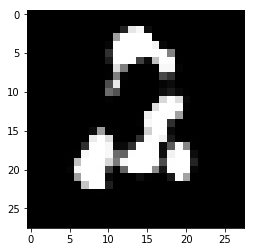

Loop: 311100, Generator_loss: -0.0072811, Discriminator_loss: 0.0037307
Loop: 311200, Generator_loss: -0.0042581, Discriminator_loss: 0.0057211
Loop: 311300, Generator_loss: -0.011906, Discriminator_loss: 0.0060418
Loop: 311400, Generator_loss: -0.0058366, Discriminator_loss: 0.0029872
Loop: 311500, Generator_loss: -0.010431, Discriminator_loss: 0.0055049
Loop: 311600, Generator_loss: -0.0068091, Discriminator_loss: 0.0044532
Loop: 311700, Generator_loss: -0.013074, Discriminator_loss: 0.0035622
Loop: 311800, Generator_loss: -0.010322, Discriminator_loss: 0.0039715
Loop: 311900, Generator_loss: -0.012295, Discriminator_loss: 0.0055825
Loop: 312000, Generator_loss: -0.0097304, Discriminator_loss: 0.005165


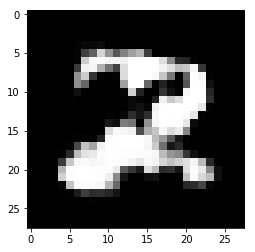

Loop: 312100, Generator_loss: -0.011936, Discriminator_loss: 0.0050102
Loop: 312200, Generator_loss: -0.0068079, Discriminator_loss: 0.0040697
Loop: 312300, Generator_loss: -0.0092637, Discriminator_loss: 0.002642
Loop: 312400, Generator_loss: -0.0063955, Discriminator_loss: 0.0044252
Loop: 312500, Generator_loss: -0.0096386, Discriminator_loss: 0.005766
Loop: 312600, Generator_loss: -0.0038868, Discriminator_loss: 0.0052632
Loop: 312700, Generator_loss: -0.013759, Discriminator_loss: 0.0032999
Loop: 312800, Generator_loss: -0.012325, Discriminator_loss: 0.0052079
Loop: 312900, Generator_loss: -0.012561, Discriminator_loss: 0.0050297
Loop: 313000, Generator_loss: -0.013389, Discriminator_loss: 0.0042576


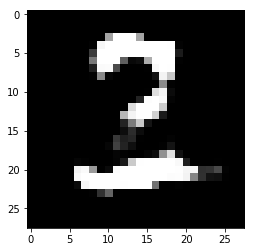

Loop: 313100, Generator_loss: -0.0094657, Discriminator_loss: 0.0040223
Loop: 313200, Generator_loss: -0.0086727, Discriminator_loss: 0.0014062
Loop: 313300, Generator_loss: -0.0079285, Discriminator_loss: 0.0051275
Loop: 313400, Generator_loss: -0.0077653, Discriminator_loss: 0.0040298
Loop: 313500, Generator_loss: -0.0076508, Discriminator_loss: 0.0062072
Loop: 313600, Generator_loss: -0.0078075, Discriminator_loss: 0.0061304
Loop: 313700, Generator_loss: -0.013072, Discriminator_loss: 0.0032642
Loop: 313800, Generator_loss: -0.012118, Discriminator_loss: 0.0049845
Loop: 313900, Generator_loss: -0.014685, Discriminator_loss: 0.0037205
Loop: 314000, Generator_loss: -0.010368, Discriminator_loss: 0.0034966


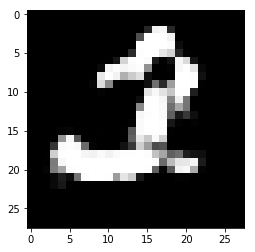

Loop: 314100, Generator_loss: -0.007173, Discriminator_loss: 0.0032806
Loop: 314200, Generator_loss: -0.0090892, Discriminator_loss: 0.0041785
Loop: 314300, Generator_loss: -0.017022, Discriminator_loss: 0.0044668
Loop: 314400, Generator_loss: -0.0073955, Discriminator_loss: 0.002391
Loop: 314500, Generator_loss: -0.012216, Discriminator_loss: 0.004245
Loop: 314600, Generator_loss: -0.011793, Discriminator_loss: 0.0042774
Loop: 314700, Generator_loss: -0.0098089, Discriminator_loss: 0.0067822
Loop: 314800, Generator_loss: -0.0046502, Discriminator_loss: 0.0044007
Loop: 314900, Generator_loss: -0.0095601, Discriminator_loss: 0.0035088
Loop: 315000, Generator_loss: -0.0074959, Discriminator_loss: 0.0041082


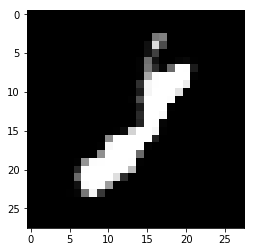

Loop: 315100, Generator_loss: -0.013268, Discriminator_loss: 0.0062642
Loop: 315200, Generator_loss: -0.0087935, Discriminator_loss: 0.0065859
Loop: 315300, Generator_loss: -0.010597, Discriminator_loss: 0.0048472
Loop: 315400, Generator_loss: -0.0083049, Discriminator_loss: 0.0041203
Loop: 315500, Generator_loss: -0.006995, Discriminator_loss: 0.0056993
Loop: 315600, Generator_loss: -0.00915, Discriminator_loss: 0.0032125
Loop: 315700, Generator_loss: -0.011178, Discriminator_loss: 0.0037695
Loop: 315800, Generator_loss: -0.0072413, Discriminator_loss: 0.0019864
Loop: 315900, Generator_loss: -0.013021, Discriminator_loss: 0.003477
Loop: 316000, Generator_loss: -0.0095499, Discriminator_loss: 0.0055347


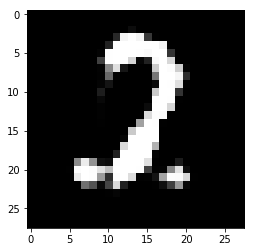

Loop: 316100, Generator_loss: -0.0037318, Discriminator_loss: 0.0052153
Loop: 316200, Generator_loss: -0.011449, Discriminator_loss: 0.0030714
Loop: 316300, Generator_loss: -0.011241, Discriminator_loss: 0.0057688
Loop: 316400, Generator_loss: -0.0060769, Discriminator_loss: 0.0037847
Loop: 316500, Generator_loss: -0.0088777, Discriminator_loss: 0.0054039
Loop: 316600, Generator_loss: -0.0099489, Discriminator_loss: 0.003407
Loop: 316700, Generator_loss: -0.010785, Discriminator_loss: 0.0053788
Loop: 316800, Generator_loss: -0.010551, Discriminator_loss: 0.0053986
Loop: 316900, Generator_loss: -0.0092402, Discriminator_loss: 0.0033108
Loop: 317000, Generator_loss: -0.0099535, Discriminator_loss: 0.0055582


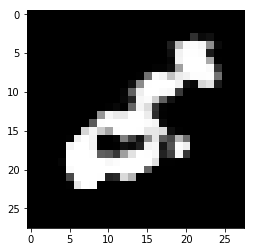

Loop: 317100, Generator_loss: -0.013801, Discriminator_loss: 0.005023
Loop: 317200, Generator_loss: -0.010149, Discriminator_loss: 0.0057349
Loop: 317300, Generator_loss: -0.011567, Discriminator_loss: 0.0052022
Loop: 317400, Generator_loss: -0.011105, Discriminator_loss: 0.0039196
Loop: 317500, Generator_loss: -0.0074791, Discriminator_loss: 0.0047894
Loop: 317600, Generator_loss: -0.0073944, Discriminator_loss: 0.0040139
Loop: 317700, Generator_loss: -0.012877, Discriminator_loss: 0.0060945
Loop: 317800, Generator_loss: -0.0079461, Discriminator_loss: 0.0027943
Loop: 317900, Generator_loss: -0.011248, Discriminator_loss: 0.0047249
Loop: 318000, Generator_loss: -0.013408, Discriminator_loss: 0.0040365


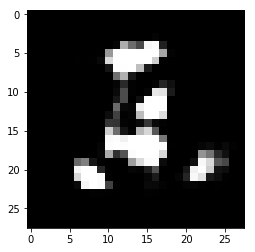

Loop: 318100, Generator_loss: -0.010409, Discriminator_loss: 0.0051484
Loop: 318200, Generator_loss: -0.0033876, Discriminator_loss: 0.00248
Loop: 318300, Generator_loss: -0.0094527, Discriminator_loss: 0.0046161
Loop: 318400, Generator_loss: -0.0093207, Discriminator_loss: 0.0056573
Loop: 318500, Generator_loss: -0.0070319, Discriminator_loss: 0.0049558
Loop: 318600, Generator_loss: -0.0071191, Discriminator_loss: 0.0023107
Loop: 318700, Generator_loss: -0.0093914, Discriminator_loss: 0.004025
Loop: 318800, Generator_loss: -0.009166, Discriminator_loss: 0.0043541
Loop: 318900, Generator_loss: -0.0085276, Discriminator_loss: 0.0031619
Loop: 319000, Generator_loss: -0.013519, Discriminator_loss: 0.0048567


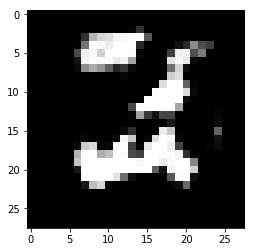

Loop: 319100, Generator_loss: -0.0091678, Discriminator_loss: 0.0057722
Loop: 319200, Generator_loss: -0.0030308, Discriminator_loss: 0.0064112
Loop: 319300, Generator_loss: -0.014302, Discriminator_loss: 0.0067354
Loop: 319400, Generator_loss: -0.010059, Discriminator_loss: 0.0023905
Loop: 319500, Generator_loss: -0.0094073, Discriminator_loss: 0.0074302
Loop: 319600, Generator_loss: -0.0078288, Discriminator_loss: 0.0047692
Loop: 319700, Generator_loss: -0.00795, Discriminator_loss: 0.003197
Loop: 319800, Generator_loss: -0.0033169, Discriminator_loss: 0.0048738
Loop: 319900, Generator_loss: -0.008507, Discriminator_loss: 0.0037182
Loop: 320000, Generator_loss: -0.0086066, Discriminator_loss: 0.0059029


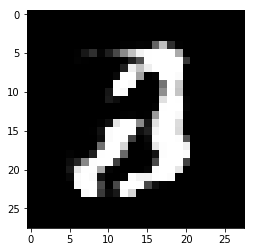

Loop: 320100, Generator_loss: -0.0083347, Discriminator_loss: 0.0070402
Loop: 320200, Generator_loss: -0.0090393, Discriminator_loss: 0.0040592
Loop: 320300, Generator_loss: -0.010173, Discriminator_loss: 0.0042975
Loop: 320400, Generator_loss: -0.010579, Discriminator_loss: 0.0030314
Loop: 320500, Generator_loss: -0.0086327, Discriminator_loss: 0.0043951
Loop: 320600, Generator_loss: -0.0056096, Discriminator_loss: 0.0010756
Loop: 320700, Generator_loss: -0.0076501, Discriminator_loss: 0.0049481
Loop: 320800, Generator_loss: -0.0087299, Discriminator_loss: 0.0045447
Loop: 320900, Generator_loss: -0.014199, Discriminator_loss: 0.0035068
Loop: 321000, Generator_loss: -0.0077495, Discriminator_loss: 0.005145


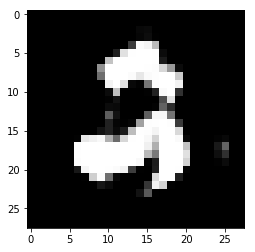

Loop: 321100, Generator_loss: -0.0027554, Discriminator_loss: 0.0054144
Loop: 321200, Generator_loss: -0.012669, Discriminator_loss: 0.0038105
Loop: 321300, Generator_loss: -0.010537, Discriminator_loss: 0.0035967
Loop: 321400, Generator_loss: -0.010653, Discriminator_loss: 0.0040278
Loop: 321500, Generator_loss: -0.004922, Discriminator_loss: 0.0027635
Loop: 321600, Generator_loss: -0.0053072, Discriminator_loss: 0.0026453
Loop: 321700, Generator_loss: -0.0086269, Discriminator_loss: 0.0039532
Loop: 321800, Generator_loss: -0.010784, Discriminator_loss: 0.0039661
Loop: 321900, Generator_loss: -0.0052584, Discriminator_loss: 0.0025571
Loop: 322000, Generator_loss: -0.01175, Discriminator_loss: 0.0031534


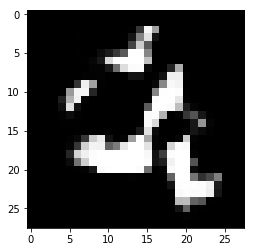

Loop: 322100, Generator_loss: -0.0060977, Discriminator_loss: 0.0038846
Loop: 322200, Generator_loss: -0.010831, Discriminator_loss: 0.0040578
Loop: 322300, Generator_loss: -0.0092997, Discriminator_loss: 0.0060679
Loop: 322400, Generator_loss: -0.011896, Discriminator_loss: 0.0025763
Loop: 322500, Generator_loss: -0.011219, Discriminator_loss: 0.0035879
Loop: 322600, Generator_loss: -0.013831, Discriminator_loss: 0.0042642
Loop: 322700, Generator_loss: -0.010307, Discriminator_loss: 0.0050124
Loop: 322800, Generator_loss: -0.01075, Discriminator_loss: 0.00079451
Loop: 322900, Generator_loss: -0.010418, Discriminator_loss: 0.0024432
Loop: 323000, Generator_loss: -0.0049039, Discriminator_loss: 0.0055697


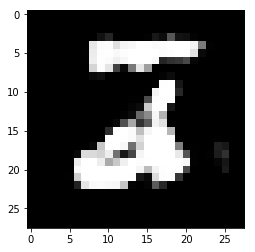

Loop: 323100, Generator_loss: -0.0077019, Discriminator_loss: 0.0052503
Loop: 323200, Generator_loss: -0.010252, Discriminator_loss: 0.0045988
Loop: 323300, Generator_loss: -0.0085479, Discriminator_loss: 0.0032883
Loop: 323400, Generator_loss: -0.0063882, Discriminator_loss: 0.0060638
Loop: 323500, Generator_loss: -0.012074, Discriminator_loss: 0.0042705
Loop: 323600, Generator_loss: -0.0071632, Discriminator_loss: 0.0037354
Loop: 323700, Generator_loss: -0.010963, Discriminator_loss: 0.0049398
Loop: 323800, Generator_loss: -0.0021835, Discriminator_loss: 0.0049873
Loop: 323900, Generator_loss: -0.010997, Discriminator_loss: 0.0020512
Loop: 324000, Generator_loss: -0.0087812, Discriminator_loss: 0.00317


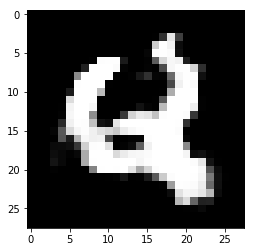

Loop: 324100, Generator_loss: -0.0097027, Discriminator_loss: 0.0039439
Loop: 324200, Generator_loss: -0.0079219, Discriminator_loss: 0.0053873
Loop: 324300, Generator_loss: -0.0084358, Discriminator_loss: 0.0020549
Loop: 324400, Generator_loss: -0.013999, Discriminator_loss: 0.0051564
Loop: 324500, Generator_loss: -0.011976, Discriminator_loss: 0.0056332
Loop: 324600, Generator_loss: -0.0086771, Discriminator_loss: 0.0035606
Loop: 324700, Generator_loss: -0.0086617, Discriminator_loss: 0.0024981
Loop: 324800, Generator_loss: -0.0056538, Discriminator_loss: 0.0052972
Loop: 324900, Generator_loss: -0.014712, Discriminator_loss: 0.0047366
Loop: 325000, Generator_loss: -0.010893, Discriminator_loss: 0.0032803


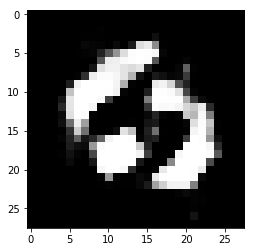

Loop: 325100, Generator_loss: -0.010596, Discriminator_loss: 0.0041555
Loop: 325200, Generator_loss: -0.013306, Discriminator_loss: 0.0030096
Loop: 325300, Generator_loss: -0.010126, Discriminator_loss: 0.001141
Loop: 325400, Generator_loss: -0.010462, Discriminator_loss: 0.0030966
Loop: 325500, Generator_loss: -0.0074764, Discriminator_loss: 0.0041094
Loop: 325600, Generator_loss: -0.0069991, Discriminator_loss: 0.0047997
Loop: 325700, Generator_loss: -0.012609, Discriminator_loss: 0.0035449
Loop: 325800, Generator_loss: -0.0094676, Discriminator_loss: 0.0037736
Loop: 325900, Generator_loss: -0.0083018, Discriminator_loss: 0.004189
Loop: 326000, Generator_loss: -0.011338, Discriminator_loss: 0.0040664


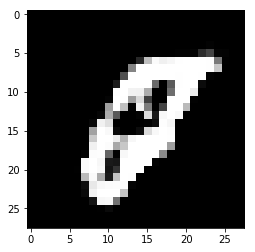

Loop: 326100, Generator_loss: -0.0060783, Discriminator_loss: 0.0051002
Loop: 326200, Generator_loss: -0.010253, Discriminator_loss: 0.0055113
Loop: 326300, Generator_loss: -0.010355, Discriminator_loss: 0.003867
Loop: 326400, Generator_loss: -0.0081774, Discriminator_loss: 0.0039854
Loop: 326500, Generator_loss: -0.0055998, Discriminator_loss: 0.0059084
Loop: 326600, Generator_loss: -0.0083339, Discriminator_loss: 0.0032974
Loop: 326700, Generator_loss: -0.012397, Discriminator_loss: 0.0068025
Loop: 326800, Generator_loss: -0.009269, Discriminator_loss: 0.0037354
Loop: 326900, Generator_loss: -0.0072236, Discriminator_loss: 0.0040948
Loop: 327000, Generator_loss: -0.0055225, Discriminator_loss: 0.0050918


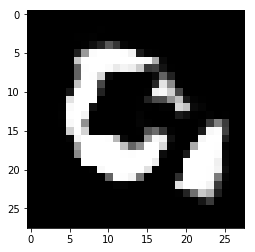

Loop: 327100, Generator_loss: -0.0090975, Discriminator_loss: 0.0043466
Loop: 327200, Generator_loss: -0.010157, Discriminator_loss: 0.0041972
Loop: 327300, Generator_loss: -0.01239, Discriminator_loss: 0.0064705
Loop: 327400, Generator_loss: -0.0085055, Discriminator_loss: 0.0040075
Loop: 327500, Generator_loss: -0.010761, Discriminator_loss: 0.0038777
Loop: 327600, Generator_loss: -0.0085032, Discriminator_loss: 0.0040336
Loop: 327700, Generator_loss: -0.0039749, Discriminator_loss: 0.0048613
Loop: 327800, Generator_loss: -0.0077838, Discriminator_loss: 0.0047354
Loop: 327900, Generator_loss: -0.00564, Discriminator_loss: 0.0039504
Loop: 328000, Generator_loss: -0.012043, Discriminator_loss: 0.0036282


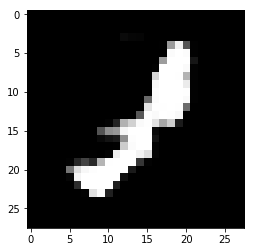

Loop: 328100, Generator_loss: -0.015382, Discriminator_loss: 0.0051948
Loop: 328200, Generator_loss: -0.010134, Discriminator_loss: 0.0046173
Loop: 328300, Generator_loss: -0.014555, Discriminator_loss: 0.0032527
Loop: 328400, Generator_loss: -0.0039788, Discriminator_loss: 0.0044403
Loop: 328500, Generator_loss: -0.0079842, Discriminator_loss: 0.004666
Loop: 328600, Generator_loss: -0.011843, Discriminator_loss: 0.0021861
Loop: 328700, Generator_loss: -0.0073204, Discriminator_loss: 0.0033813
Loop: 328800, Generator_loss: -0.0094105, Discriminator_loss: 0.0041849
Loop: 328900, Generator_loss: -0.010387, Discriminator_loss: 0.0036206
Loop: 329000, Generator_loss: -0.011991, Discriminator_loss: 0.0032873


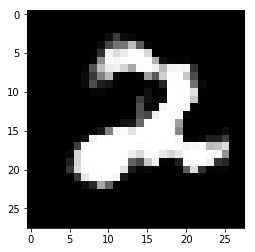

Loop: 329100, Generator_loss: -0.0085459, Discriminator_loss: 0.0034774
Loop: 329200, Generator_loss: -0.0088674, Discriminator_loss: 0.0055419
Loop: 329300, Generator_loss: -0.014905, Discriminator_loss: 0.0022443
Loop: 329400, Generator_loss: -0.0068926, Discriminator_loss: 0.0053949
Loop: 329500, Generator_loss: -0.0065604, Discriminator_loss: 0.0030833
Loop: 329600, Generator_loss: -0.010689, Discriminator_loss: 0.0039665
Loop: 329700, Generator_loss: -0.0064905, Discriminator_loss: 0.0045086
Loop: 329800, Generator_loss: -0.011819, Discriminator_loss: 0.0054282
Loop: 329900, Generator_loss: -0.0090227, Discriminator_loss: 0.0023806
Loop: 330000, Generator_loss: -0.0060836, Discriminator_loss: 0.0062038


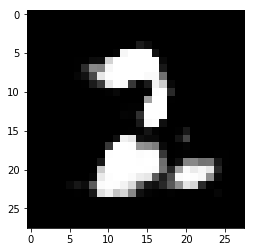

Loop: 330100, Generator_loss: -0.011067, Discriminator_loss: 0.0050779
Loop: 330200, Generator_loss: -0.0079097, Discriminator_loss: 0.00065559
Loop: 330300, Generator_loss: -0.01421, Discriminator_loss: 0.0026287
Loop: 330400, Generator_loss: -0.009465, Discriminator_loss: 0.0030493
Loop: 330500, Generator_loss: -0.0082956, Discriminator_loss: 0.0056602
Loop: 330600, Generator_loss: -0.0067011, Discriminator_loss: 0.0072886
Loop: 330700, Generator_loss: -0.0090655, Discriminator_loss: 0.004998
Loop: 330800, Generator_loss: -0.011821, Discriminator_loss: 0.0053323
Loop: 330900, Generator_loss: -0.0070404, Discriminator_loss: 0.0038136
Loop: 331000, Generator_loss: -0.0099023, Discriminator_loss: 0.0068068


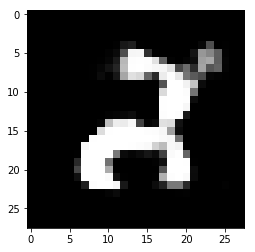

Loop: 331100, Generator_loss: -0.0059248, Discriminator_loss: 0.0031907
Loop: 331200, Generator_loss: -0.0094287, Discriminator_loss: 0.0016436
Loop: 331300, Generator_loss: -0.011533, Discriminator_loss: 0.0052182
Loop: 331400, Generator_loss: -0.010818, Discriminator_loss: 0.0033192
Loop: 331500, Generator_loss: -0.0042976, Discriminator_loss: 0.0067217
Loop: 331600, Generator_loss: -0.0079791, Discriminator_loss: 0.0042921
Loop: 331700, Generator_loss: -0.011897, Discriminator_loss: 0.0059478
Loop: 331800, Generator_loss: -0.0071478, Discriminator_loss: 0.0053249
Loop: 331900, Generator_loss: -0.0076871, Discriminator_loss: 0.004104
Loop: 332000, Generator_loss: -0.0053397, Discriminator_loss: 0.0048338


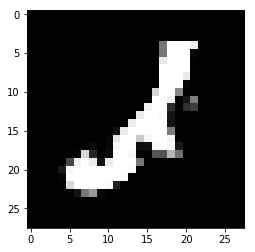

Loop: 332100, Generator_loss: -0.0060231, Discriminator_loss: 0.0045748
Loop: 332200, Generator_loss: -0.0064377, Discriminator_loss: 0.0047779
Loop: 332300, Generator_loss: -0.011759, Discriminator_loss: 0.0028418
Loop: 332400, Generator_loss: -0.0047887, Discriminator_loss: 0.0054062
Loop: 332500, Generator_loss: -0.0054374, Discriminator_loss: 0.0043247
Loop: 332600, Generator_loss: -0.0095262, Discriminator_loss: 0.0049277
Loop: 332700, Generator_loss: -0.010485, Discriminator_loss: 0.0031064
Loop: 332800, Generator_loss: -0.0087213, Discriminator_loss: 0.0033825
Loop: 332900, Generator_loss: -0.011692, Discriminator_loss: 0.0042873
Loop: 333000, Generator_loss: -0.010678, Discriminator_loss: 0.0038652


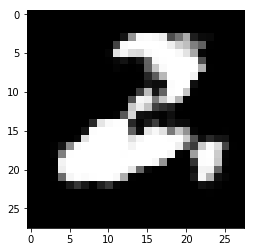

Loop: 333100, Generator_loss: -0.010404, Discriminator_loss: 0.0042054
Loop: 333200, Generator_loss: -0.0086788, Discriminator_loss: 0.0065851
Loop: 333300, Generator_loss: -0.010222, Discriminator_loss: 0.0034958
Loop: 333400, Generator_loss: -0.0054436, Discriminator_loss: 0.004316
Loop: 333500, Generator_loss: -0.0075967, Discriminator_loss: 0.0026752
Loop: 333600, Generator_loss: -0.0089149, Discriminator_loss: 0.0078004
Loop: 333700, Generator_loss: -0.0080793, Discriminator_loss: 0.0052986
Loop: 333800, Generator_loss: -0.011156, Discriminator_loss: 0.0066019
Loop: 333900, Generator_loss: -0.011011, Discriminator_loss: 0.0047269
Loop: 334000, Generator_loss: -0.0087393, Discriminator_loss: 0.003904


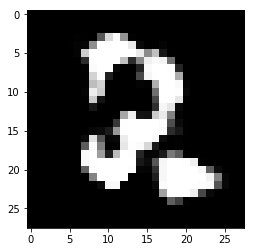

Loop: 334100, Generator_loss: -0.0068911, Discriminator_loss: 0.0039269
Loop: 334200, Generator_loss: -0.0087804, Discriminator_loss: 0.0049068
Loop: 334300, Generator_loss: -0.0046579, Discriminator_loss: 0.0037779
Loop: 334400, Generator_loss: -0.016278, Discriminator_loss: 0.0029481
Loop: 334500, Generator_loss: -0.0093138, Discriminator_loss: 0.004429
Loop: 334600, Generator_loss: -0.0091564, Discriminator_loss: 0.0047796
Loop: 334700, Generator_loss: -0.010936, Discriminator_loss: 0.0047178
Loop: 334800, Generator_loss: -0.0087317, Discriminator_loss: 0.0029621
Loop: 334900, Generator_loss: -0.0076911, Discriminator_loss: 0.004395
Loop: 335000, Generator_loss: -0.0058975, Discriminator_loss: 0.0036393


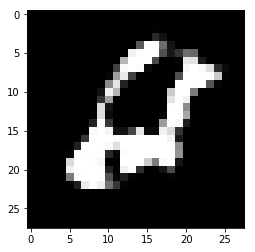

Loop: 335100, Generator_loss: -0.0076822, Discriminator_loss: 0.0042372
Loop: 335200, Generator_loss: -0.0068444, Discriminator_loss: 0.0042981
Loop: 335300, Generator_loss: -0.0073084, Discriminator_loss: 0.0061856
Loop: 335400, Generator_loss: -0.0066079, Discriminator_loss: 0.0047821
Loop: 335500, Generator_loss: -0.0098433, Discriminator_loss: 0.0055717
Loop: 335600, Generator_loss: -0.013346, Discriminator_loss: 0.004556
Loop: 335700, Generator_loss: -0.0075876, Discriminator_loss: 0.0047681
Loop: 335800, Generator_loss: -0.011093, Discriminator_loss: 0.0045005
Loop: 335900, Generator_loss: -0.012714, Discriminator_loss: 0.0036814
Loop: 336000, Generator_loss: -0.0096004, Discriminator_loss: 0.0044168


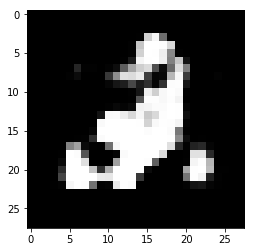

Loop: 336100, Generator_loss: -0.010891, Discriminator_loss: 0.00305
Loop: 336200, Generator_loss: -0.0073348, Discriminator_loss: 0.0020329
Loop: 336300, Generator_loss: -0.010872, Discriminator_loss: 0.0031986
Loop: 336400, Generator_loss: -0.0095506, Discriminator_loss: 0.0053164
Loop: 336500, Generator_loss: -0.0065885, Discriminator_loss: 0.0055129
Loop: 336600, Generator_loss: -0.013055, Discriminator_loss: 0.004214
Loop: 336700, Generator_loss: -0.0088452, Discriminator_loss: 0.0047415
Loop: 336800, Generator_loss: -0.010514, Discriminator_loss: 0.0045542
Loop: 336900, Generator_loss: -0.012533, Discriminator_loss: 0.0028693
Loop: 337000, Generator_loss: -0.0084945, Discriminator_loss: 0.0022595


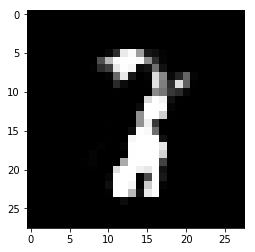

Loop: 337100, Generator_loss: -0.0086832, Discriminator_loss: 0.0038733
Loop: 337200, Generator_loss: -0.0067781, Discriminator_loss: 0.0048822
Loop: 337300, Generator_loss: -0.01347, Discriminator_loss: 0.0048706
Loop: 337400, Generator_loss: -0.0061159, Discriminator_loss: 0.0027229
Loop: 337500, Generator_loss: -0.0085456, Discriminator_loss: 0.0055102
Loop: 337600, Generator_loss: -0.010646, Discriminator_loss: 0.0039633
Loop: 337700, Generator_loss: -0.0051802, Discriminator_loss: 0.0037334
Loop: 337800, Generator_loss: -0.0081476, Discriminator_loss: 0.0033072
Loop: 337900, Generator_loss: -0.0075322, Discriminator_loss: 0.0044949
Loop: 338000, Generator_loss: -0.009236, Discriminator_loss: 0.0039292


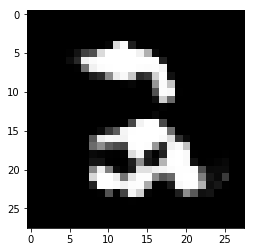

Loop: 338100, Generator_loss: -0.004693, Discriminator_loss: 0.0047001
Loop: 338200, Generator_loss: -0.010461, Discriminator_loss: 0.0016785
Loop: 338300, Generator_loss: -0.0099411, Discriminator_loss: 0.0021496
Loop: 338400, Generator_loss: -0.014093, Discriminator_loss: 0.0041773
Loop: 338500, Generator_loss: -0.0078999, Discriminator_loss: 0.0041436
Loop: 338600, Generator_loss: -0.010502, Discriminator_loss: 0.0035487
Loop: 338700, Generator_loss: -0.0040335, Discriminator_loss: 0.004224
Loop: 338800, Generator_loss: -0.01133, Discriminator_loss: 0.0035231
Loop: 338900, Generator_loss: -0.012733, Discriminator_loss: 0.0052459
Loop: 339000, Generator_loss: -0.0059511, Discriminator_loss: 0.0050341


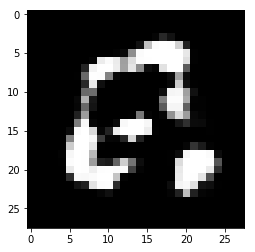

Loop: 339100, Generator_loss: -0.007285, Discriminator_loss: 0.0053388
Loop: 339200, Generator_loss: -0.010699, Discriminator_loss: 0.004929
Loop: 339300, Generator_loss: -0.0039098, Discriminator_loss: 0.0057397
Loop: 339400, Generator_loss: -0.0049237, Discriminator_loss: 0.0054763
Loop: 339500, Generator_loss: -0.013364, Discriminator_loss: 0.003667
Loop: 339600, Generator_loss: -0.009215, Discriminator_loss: 0.0041367
Loop: 339700, Generator_loss: -0.0091748, Discriminator_loss: 0.0039914
Loop: 339800, Generator_loss: -0.010835, Discriminator_loss: 0.0057122
Loop: 339900, Generator_loss: -0.014402, Discriminator_loss: 0.0065639
Loop: 340000, Generator_loss: -0.0099198, Discriminator_loss: 0.0032155


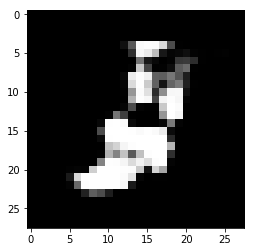

Loop: 340100, Generator_loss: -0.0042658, Discriminator_loss: 0.0028457
Loop: 340200, Generator_loss: -0.012106, Discriminator_loss: 0.0039675
Loop: 340300, Generator_loss: -0.0043589, Discriminator_loss: 0.0056544
Loop: 340400, Generator_loss: -0.010562, Discriminator_loss: 0.0043978
Loop: 340500, Generator_loss: -0.0050437, Discriminator_loss: 0.0042026
Loop: 340600, Generator_loss: -0.0083646, Discriminator_loss: 0.0043359
Loop: 340700, Generator_loss: -0.0029002, Discriminator_loss: 0.003417
Loop: 340800, Generator_loss: -0.0071743, Discriminator_loss: 0.0039835
Loop: 340900, Generator_loss: -0.0055343, Discriminator_loss: 0.0050724
Loop: 341000, Generator_loss: -0.0080749, Discriminator_loss: 0.0051519


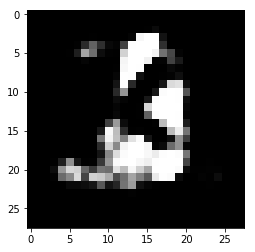

Loop: 341100, Generator_loss: -0.0078083, Discriminator_loss: 0.0055098
Loop: 341200, Generator_loss: -0.0093065, Discriminator_loss: 0.0038181
Loop: 341300, Generator_loss: -0.0096183, Discriminator_loss: 0.0028489
Loop: 341400, Generator_loss: -0.0076126, Discriminator_loss: 0.0036833
Loop: 341500, Generator_loss: -0.008063, Discriminator_loss: 0.0053762
Loop: 341600, Generator_loss: -0.0097405, Discriminator_loss: 0.0037918
Loop: 341700, Generator_loss: -0.0076581, Discriminator_loss: 0.0034226
Loop: 341800, Generator_loss: -0.014561, Discriminator_loss: 0.003523
Loop: 341900, Generator_loss: -0.0079832, Discriminator_loss: 0.0043274
Loop: 342000, Generator_loss: -0.0036981, Discriminator_loss: 0.0038749


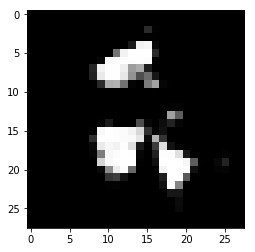

Loop: 342100, Generator_loss: -0.014168, Discriminator_loss: 0.0057012
Loop: 342200, Generator_loss: -0.0088722, Discriminator_loss: 0.0031896
Loop: 342300, Generator_loss: -0.005089, Discriminator_loss: 0.002726
Loop: 342400, Generator_loss: -0.0086993, Discriminator_loss: 0.0049341
Loop: 342500, Generator_loss: -0.0052968, Discriminator_loss: 0.0030149
Loop: 342600, Generator_loss: -0.0090439, Discriminator_loss: 0.0029545
Loop: 342700, Generator_loss: -0.0084424, Discriminator_loss: 0.0066298
Loop: 342800, Generator_loss: -0.0065152, Discriminator_loss: 0.0050119
Loop: 342900, Generator_loss: -0.010196, Discriminator_loss: 0.0043389
Loop: 343000, Generator_loss: -0.010302, Discriminator_loss: 0.0038946


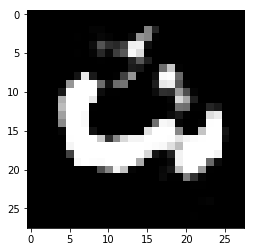

Loop: 343100, Generator_loss: -0.011422, Discriminator_loss: 0.0044884
Loop: 343200, Generator_loss: -0.0079574, Discriminator_loss: 0.0051395
Loop: 343300, Generator_loss: -0.0077831, Discriminator_loss: 0.0063079
Loop: 343400, Generator_loss: -0.0083396, Discriminator_loss: 0.0044937
Loop: 343500, Generator_loss: -0.011678, Discriminator_loss: 0.0054516
Loop: 343600, Generator_loss: -0.0016813, Discriminator_loss: 0.0040305
Loop: 343700, Generator_loss: -0.010721, Discriminator_loss: 0.0040142
Loop: 343800, Generator_loss: -0.013238, Discriminator_loss: 0.0058843
Loop: 343900, Generator_loss: -0.0081149, Discriminator_loss: 0.0070712
Loop: 344000, Generator_loss: -0.0083008, Discriminator_loss: 0.003845


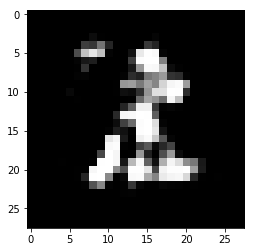

Loop: 344100, Generator_loss: -0.0095856, Discriminator_loss: 0.0048601
Loop: 344200, Generator_loss: -0.0074586, Discriminator_loss: 0.0039435
Loop: 344300, Generator_loss: -0.0086571, Discriminator_loss: 0.0039194
Loop: 344400, Generator_loss: -0.009647, Discriminator_loss: 0.0027304
Loop: 344500, Generator_loss: -0.010499, Discriminator_loss: 0.0021901
Loop: 344600, Generator_loss: -0.01098, Discriminator_loss: 0.0043872
Loop: 344700, Generator_loss: -0.010453, Discriminator_loss: 0.0044593
Loop: 344800, Generator_loss: -0.012526, Discriminator_loss: 0.0071832
Loop: 344900, Generator_loss: -0.011226, Discriminator_loss: 0.0048903
Loop: 345000, Generator_loss: -0.0097771, Discriminator_loss: 0.0044866


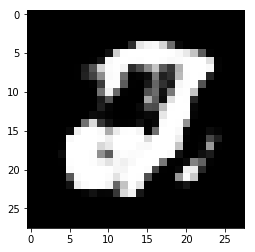

Loop: 345100, Generator_loss: -0.006056, Discriminator_loss: 0.0034287
Loop: 345200, Generator_loss: -0.01003, Discriminator_loss: 0.0046965
Loop: 345300, Generator_loss: -0.010396, Discriminator_loss: 0.0023626
Loop: 345400, Generator_loss: -0.0081284, Discriminator_loss: 0.0040306
Loop: 345500, Generator_loss: -0.0085057, Discriminator_loss: 0.0048925
Loop: 345600, Generator_loss: -0.0072829, Discriminator_loss: 0.0053738
Loop: 345700, Generator_loss: -0.0059061, Discriminator_loss: 0.0049406
Loop: 345800, Generator_loss: -0.0085288, Discriminator_loss: 0.0057895
Loop: 345900, Generator_loss: -0.0091454, Discriminator_loss: 0.0046374
Loop: 346000, Generator_loss: -0.013157, Discriminator_loss: 0.005255


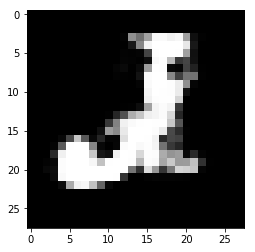

Loop: 346100, Generator_loss: -0.0054322, Discriminator_loss: 0.004334
Loop: 346200, Generator_loss: -0.0020389, Discriminator_loss: 0.0030601
Loop: 346300, Generator_loss: -0.010471, Discriminator_loss: 0.0055658
Loop: 346400, Generator_loss: -0.010252, Discriminator_loss: 0.0040237
Loop: 346500, Generator_loss: -0.012749, Discriminator_loss: 0.0040146
Loop: 346600, Generator_loss: -0.0085874, Discriminator_loss: 0.0063267
Loop: 346700, Generator_loss: -0.010479, Discriminator_loss: 0.004428
Loop: 346800, Generator_loss: -0.0079982, Discriminator_loss: 0.0054452
Loop: 346900, Generator_loss: -0.0054346, Discriminator_loss: 0.004034
Loop: 347000, Generator_loss: -0.0074941, Discriminator_loss: 0.0050206


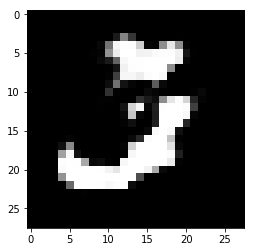

Loop: 347100, Generator_loss: -0.011346, Discriminator_loss: 0.0029181
Loop: 347200, Generator_loss: -0.0093126, Discriminator_loss: 0.0042692
Loop: 347300, Generator_loss: -0.010119, Discriminator_loss: 0.0036129
Loop: 347400, Generator_loss: -0.012638, Discriminator_loss: 0.0048384
Loop: 347500, Generator_loss: -0.013175, Discriminator_loss: 0.0054953
Loop: 347600, Generator_loss: -0.0084334, Discriminator_loss: 0.002577
Loop: 347700, Generator_loss: -0.0082857, Discriminator_loss: 0.0040529
Loop: 347800, Generator_loss: -0.0084312, Discriminator_loss: 0.0051605
Loop: 347900, Generator_loss: -0.0076357, Discriminator_loss: 0.0043572
Loop: 348000, Generator_loss: -0.0096589, Discriminator_loss: 0.0060311


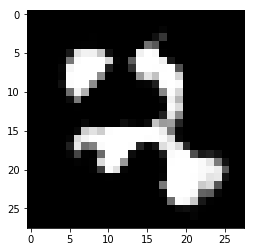

Loop: 348100, Generator_loss: -0.0090702, Discriminator_loss: 0.0048165
Loop: 348200, Generator_loss: -0.0093884, Discriminator_loss: 0.0044859
Loop: 348300, Generator_loss: -0.0056053, Discriminator_loss: 0.0054999
Loop: 348400, Generator_loss: -0.0092285, Discriminator_loss: 0.0045165
Loop: 348500, Generator_loss: -0.0090857, Discriminator_loss: 0.0039024
Loop: 348600, Generator_loss: -0.010027, Discriminator_loss: 0.0040846
Loop: 348700, Generator_loss: -0.011569, Discriminator_loss: 0.0041724
Loop: 348800, Generator_loss: -0.0077446, Discriminator_loss: 0.0045239
Loop: 348900, Generator_loss: -0.006675, Discriminator_loss: 0.0045877
Loop: 349000, Generator_loss: -0.011166, Discriminator_loss: 0.0061517


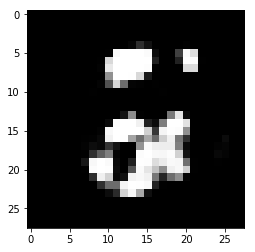

Loop: 349100, Generator_loss: -0.01291, Discriminator_loss: 0.0023136
Loop: 349200, Generator_loss: -0.0098715, Discriminator_loss: 0.0040361
Loop: 349300, Generator_loss: -0.0075525, Discriminator_loss: 0.0030735
Loop: 349400, Generator_loss: -0.012812, Discriminator_loss: 0.0041832
Loop: 349500, Generator_loss: -0.0095347, Discriminator_loss: 0.0029653
Loop: 349600, Generator_loss: -0.0052309, Discriminator_loss: 0.0032255
Loop: 349700, Generator_loss: -0.0092024, Discriminator_loss: 0.0024869
Loop: 349800, Generator_loss: -0.008568, Discriminator_loss: 0.0047896
Loop: 349900, Generator_loss: -0.0093615, Discriminator_loss: 0.0047979
Loop: 350000, Generator_loss: -0.0052586, Discriminator_loss: 0.0059181


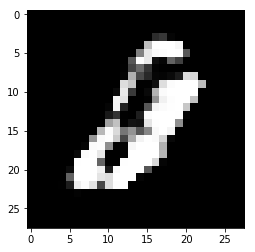

Loop: 350100, Generator_loss: -0.0097617, Discriminator_loss: 0.0051087
Loop: 350200, Generator_loss: -0.0062183, Discriminator_loss: 0.0028031
Loop: 350300, Generator_loss: -0.013012, Discriminator_loss: 0.0052714
Loop: 350400, Generator_loss: -0.010618, Discriminator_loss: 0.002338
Loop: 350500, Generator_loss: -0.0020205, Discriminator_loss: 0.0027419
Loop: 350600, Generator_loss: -0.0085366, Discriminator_loss: 0.002685
Loop: 350700, Generator_loss: -0.011893, Discriminator_loss: 0.0048106
Loop: 350800, Generator_loss: -0.013051, Discriminator_loss: 0.0046764
Loop: 350900, Generator_loss: -0.0087265, Discriminator_loss: 0.0041792
Loop: 351000, Generator_loss: -0.011232, Discriminator_loss: 0.0033006


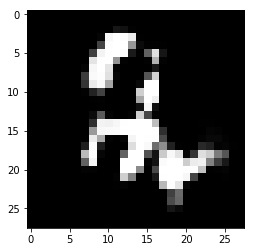

Loop: 351100, Generator_loss: -0.010434, Discriminator_loss: 0.00094394
Loop: 351200, Generator_loss: -0.010924, Discriminator_loss: 0.0034127
Loop: 351300, Generator_loss: -0.010833, Discriminator_loss: 0.0026323
Loop: 351400, Generator_loss: -0.0070457, Discriminator_loss: 0.0054495
Loop: 351500, Generator_loss: -0.0095835, Discriminator_loss: 0.0049992
Loop: 351600, Generator_loss: -0.0048251, Discriminator_loss: 0.0035183
Loop: 351700, Generator_loss: -0.0066164, Discriminator_loss: 0.0038499
Loop: 351800, Generator_loss: -0.010813, Discriminator_loss: 0.0041587
Loop: 351900, Generator_loss: -0.0099826, Discriminator_loss: 0.0032672
Loop: 352000, Generator_loss: -0.0086845, Discriminator_loss: 0.0056469


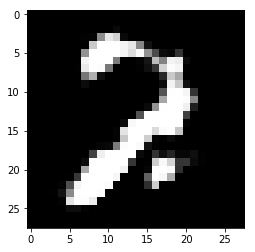

Loop: 352100, Generator_loss: -0.0076682, Discriminator_loss: 0.0045058
Loop: 352200, Generator_loss: -0.012063, Discriminator_loss: 0.0038106
Loop: 352300, Generator_loss: -0.011408, Discriminator_loss: 0.0046404
Loop: 352400, Generator_loss: -0.0076269, Discriminator_loss: 0.0042906
Loop: 352500, Generator_loss: -0.0061775, Discriminator_loss: 0.0067014
Loop: 352600, Generator_loss: -0.0093477, Discriminator_loss: 0.0043208
Loop: 352700, Generator_loss: -0.0076786, Discriminator_loss: 0.0037397
Loop: 352800, Generator_loss: -0.011679, Discriminator_loss: 0.0037167
Loop: 352900, Generator_loss: -0.0057055, Discriminator_loss: 0.0024688
Loop: 353000, Generator_loss: -0.0096864, Discriminator_loss: 0.0025441


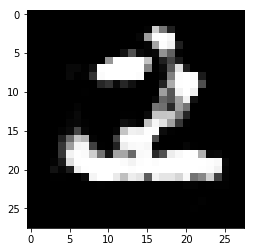

Loop: 353100, Generator_loss: -0.0049515, Discriminator_loss: 0.0018659
Loop: 353200, Generator_loss: -0.009268, Discriminator_loss: 0.0026392
Loop: 353300, Generator_loss: -0.0079152, Discriminator_loss: 0.0027312
Loop: 353400, Generator_loss: -0.0060866, Discriminator_loss: 0.0051836
Loop: 353500, Generator_loss: -0.0070232, Discriminator_loss: 0.0045556
Loop: 353600, Generator_loss: -0.0096354, Discriminator_loss: 0.0039009
Loop: 353700, Generator_loss: -0.0088058, Discriminator_loss: 0.0039573
Loop: 353800, Generator_loss: -0.015093, Discriminator_loss: 0.0031077
Loop: 353900, Generator_loss: -0.0050565, Discriminator_loss: 0.0052093
Loop: 354000, Generator_loss: -0.0036219, Discriminator_loss: 0.0040636


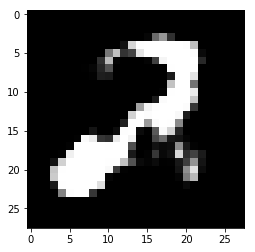

Loop: 354100, Generator_loss: -0.0061979, Discriminator_loss: 0.0044142
Loop: 354200, Generator_loss: -0.0073512, Discriminator_loss: 0.0043123
Loop: 354300, Generator_loss: -0.011119, Discriminator_loss: 0.0048239
Loop: 354400, Generator_loss: -0.0067741, Discriminator_loss: 0.0012548
Loop: 354500, Generator_loss: -0.0024246, Discriminator_loss: 0.0055703
Loop: 354600, Generator_loss: -0.0086485, Discriminator_loss: 0.003422
Loop: 354700, Generator_loss: -0.011291, Discriminator_loss: 0.0040344
Loop: 354800, Generator_loss: -0.010938, Discriminator_loss: 0.0052924
Loop: 354900, Generator_loss: -0.0055569, Discriminator_loss: 0.0047357
Loop: 355000, Generator_loss: -0.010152, Discriminator_loss: 0.0052924


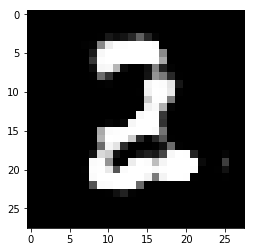

Loop: 355100, Generator_loss: -0.011475, Discriminator_loss: 0.0054187
Loop: 355200, Generator_loss: -0.0080193, Discriminator_loss: 0.0047811
Loop: 355300, Generator_loss: -0.0043402, Discriminator_loss: 0.0034048
Loop: 355400, Generator_loss: -0.004063, Discriminator_loss: 0.0040209
Loop: 355500, Generator_loss: -0.01048, Discriminator_loss: 0.0021267
Loop: 355600, Generator_loss: -0.0082608, Discriminator_loss: 0.00364
Loop: 355700, Generator_loss: -0.010155, Discriminator_loss: 0.0043342
Loop: 355800, Generator_loss: -0.011721, Discriminator_loss: 0.0040518
Loop: 355900, Generator_loss: -0.0077473, Discriminator_loss: 0.0041201
Loop: 356000, Generator_loss: -0.0043199, Discriminator_loss: 0.0039847


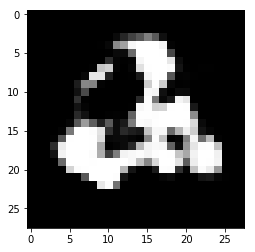

Loop: 356100, Generator_loss: -0.0080728, Discriminator_loss: 0.0028601
Loop: 356200, Generator_loss: -0.0084794, Discriminator_loss: 0.0036292
Loop: 356300, Generator_loss: -0.0045802, Discriminator_loss: 0.0042112
Loop: 356400, Generator_loss: -0.00738, Discriminator_loss: 0.0046738
Loop: 356500, Generator_loss: -0.0019022, Discriminator_loss: 0.0046141
Loop: 356600, Generator_loss: -0.008481, Discriminator_loss: 0.0046756
Loop: 356700, Generator_loss: -0.0090703, Discriminator_loss: 0.0041692
Loop: 356800, Generator_loss: -0.0011497, Discriminator_loss: 0.0051461
Loop: 356900, Generator_loss: -0.011958, Discriminator_loss: 0.0051297
Loop: 357000, Generator_loss: -0.0046579, Discriminator_loss: 0.0040422


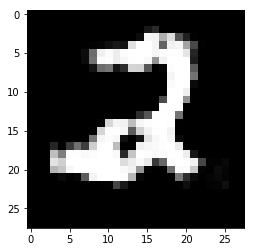

Loop: 357100, Generator_loss: -0.010117, Discriminator_loss: 0.0035358
Loop: 357200, Generator_loss: -0.0055787, Discriminator_loss: 0.0029748
Loop: 357300, Generator_loss: -0.0087855, Discriminator_loss: 0.0026
Loop: 357400, Generator_loss: -0.0095003, Discriminator_loss: 0.0045213
Loop: 357500, Generator_loss: -0.010212, Discriminator_loss: 0.003983
Loop: 357600, Generator_loss: -0.0036731, Discriminator_loss: 0.0018818
Loop: 357700, Generator_loss: -0.0081611, Discriminator_loss: 0.0025108
Loop: 357800, Generator_loss: -0.010108, Discriminator_loss: 0.0034525
Loop: 357900, Generator_loss: -0.012912, Discriminator_loss: 0.0017311
Loop: 358000, Generator_loss: -0.0068508, Discriminator_loss: 0.0045926


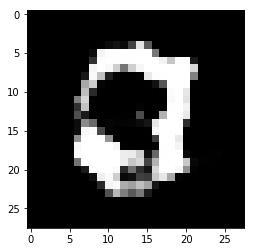

Loop: 358100, Generator_loss: -0.010725, Discriminator_loss: 0.003635
Loop: 358200, Generator_loss: -0.011555, Discriminator_loss: 0.0052085
Loop: 358300, Generator_loss: -0.0039285, Discriminator_loss: 0.0047503
Loop: 358400, Generator_loss: -0.0085371, Discriminator_loss: 0.0050923
Loop: 358500, Generator_loss: -0.0082128, Discriminator_loss: 0.0015883
Loop: 358600, Generator_loss: -0.010738, Discriminator_loss: 0.0030251
Loop: 358700, Generator_loss: -0.0074027, Discriminator_loss: 0.0050793
Loop: 358800, Generator_loss: -0.0053012, Discriminator_loss: 0.0047655
Loop: 358900, Generator_loss: -0.014657, Discriminator_loss: 0.0015372
Loop: 359000, Generator_loss: -0.011678, Discriminator_loss: 0.0017809


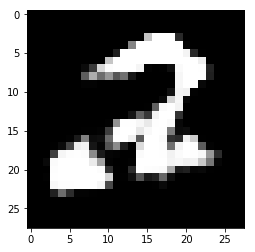

Loop: 359100, Generator_loss: -0.0073952, Discriminator_loss: 0.0048604
Loop: 359200, Generator_loss: -0.011669, Discriminator_loss: 0.0054145
Loop: 359300, Generator_loss: -0.009663, Discriminator_loss: 0.0039638
Loop: 359400, Generator_loss: -0.0046637, Discriminator_loss: 0.0032988
Loop: 359500, Generator_loss: -0.0099017, Discriminator_loss: 0.0041785
Loop: 359600, Generator_loss: -0.0075109, Discriminator_loss: 0.0041263
Loop: 359700, Generator_loss: -0.0075772, Discriminator_loss: 0.0050603
Loop: 359800, Generator_loss: -0.011059, Discriminator_loss: 0.0044303
Loop: 359900, Generator_loss: -0.0061836, Discriminator_loss: 0.0033153
Loop: 360000, Generator_loss: -0.0057924, Discriminator_loss: 0.0066184


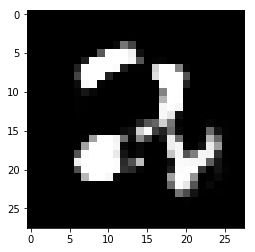

Loop: 360100, Generator_loss: -0.012207, Discriminator_loss: 0.0031374
Loop: 360200, Generator_loss: -0.011775, Discriminator_loss: 0.0042437
Loop: 360300, Generator_loss: -0.012398, Discriminator_loss: 0.004952
Loop: 360400, Generator_loss: -0.009336, Discriminator_loss: 0.0042665
Loop: 360500, Generator_loss: -0.011513, Discriminator_loss: 0.0032657
Loop: 360600, Generator_loss: -0.011925, Discriminator_loss: 0.0048581
Loop: 360700, Generator_loss: -0.010784, Discriminator_loss: 0.0031363
Loop: 360800, Generator_loss: -0.0095531, Discriminator_loss: 0.003689
Loop: 360900, Generator_loss: -0.0081982, Discriminator_loss: 0.0049803
Loop: 361000, Generator_loss: -0.003324, Discriminator_loss: 0.0041302


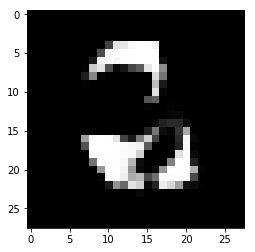

Loop: 361100, Generator_loss: -0.0049788, Discriminator_loss: 0.0037009
Loop: 361200, Generator_loss: -0.0053994, Discriminator_loss: 0.0040017
Loop: 361300, Generator_loss: -0.0078848, Discriminator_loss: 0.0040654
Loop: 361400, Generator_loss: -0.0098536, Discriminator_loss: 0.0055686
Loop: 361500, Generator_loss: -0.010211, Discriminator_loss: 0.0041262
Loop: 361600, Generator_loss: -0.010851, Discriminator_loss: 0.0047049
Loop: 361700, Generator_loss: -0.0053135, Discriminator_loss: 0.0053229
Loop: 361800, Generator_loss: -0.01133, Discriminator_loss: 0.0036008
Loop: 361900, Generator_loss: -0.012749, Discriminator_loss: 0.0046222
Loop: 362000, Generator_loss: -0.01181, Discriminator_loss: 0.0024867


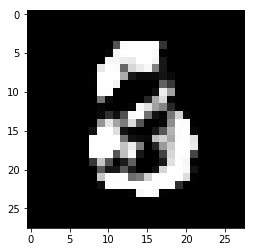

Loop: 362100, Generator_loss: -0.0062058, Discriminator_loss: 0.005823
Loop: 362200, Generator_loss: -0.0040718, Discriminator_loss: 0.004102
Loop: 362300, Generator_loss: -0.012331, Discriminator_loss: 0.0059447
Loop: 362400, Generator_loss: -0.012478, Discriminator_loss: 0.0039231
Loop: 362500, Generator_loss: -0.0033603, Discriminator_loss: 0.0019927
Loop: 362600, Generator_loss: -0.013344, Discriminator_loss: 0.0050401
Loop: 362700, Generator_loss: -0.0043103, Discriminator_loss: 0.0029653
Loop: 362800, Generator_loss: -0.0085864, Discriminator_loss: 0.0051032
Loop: 362900, Generator_loss: -0.0076696, Discriminator_loss: 0.0038801
Loop: 363000, Generator_loss: -0.0074448, Discriminator_loss: 0.0048973


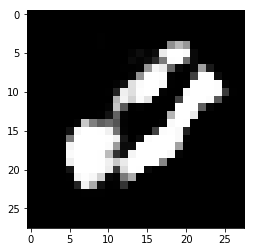

Loop: 363100, Generator_loss: -0.0088549, Discriminator_loss: 0.0044058
Loop: 363200, Generator_loss: -0.0099595, Discriminator_loss: 0.0040078
Loop: 363300, Generator_loss: -0.010194, Discriminator_loss: 0.0054337
Loop: 363400, Generator_loss: -0.0044153, Discriminator_loss: 0.0053909
Loop: 363500, Generator_loss: -0.011192, Discriminator_loss: 0.0038683
Loop: 363600, Generator_loss: -0.0066271, Discriminator_loss: 0.0043365
Loop: 363700, Generator_loss: -0.010063, Discriminator_loss: 0.0017836
Loop: 363800, Generator_loss: -0.0086761, Discriminator_loss: 0.0048412
Loop: 363900, Generator_loss: -0.0062144, Discriminator_loss: 0.0055817
Loop: 364000, Generator_loss: -0.012497, Discriminator_loss: 0.0049631


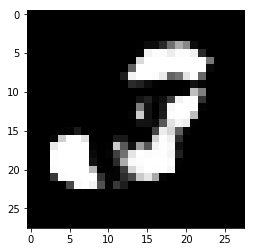

Loop: 364100, Generator_loss: -0.0062716, Discriminator_loss: 0.0047725
Loop: 364200, Generator_loss: -0.013152, Discriminator_loss: 0.0033275
Loop: 364300, Generator_loss: -0.0085927, Discriminator_loss: 0.0039566
Loop: 364400, Generator_loss: -0.012359, Discriminator_loss: 0.0047948
Loop: 364500, Generator_loss: -0.0068952, Discriminator_loss: 0.0062418
Loop: 364600, Generator_loss: -0.009135, Discriminator_loss: 0.0045341
Loop: 364700, Generator_loss: -0.01085, Discriminator_loss: 0.0053984
Loop: 364800, Generator_loss: -0.010494, Discriminator_loss: 0.0039254
Loop: 364900, Generator_loss: -0.0084723, Discriminator_loss: 0.00272
Loop: 365000, Generator_loss: -0.0062849, Discriminator_loss: 0.0047955


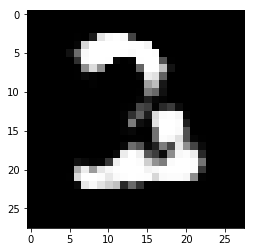

Loop: 365100, Generator_loss: -0.0033256, Discriminator_loss: 0.0027885
Loop: 365200, Generator_loss: -0.0057395, Discriminator_loss: 0.005761
Loop: 365300, Generator_loss: -0.0058165, Discriminator_loss: 0.0017031
Loop: 365400, Generator_loss: -0.0098085, Discriminator_loss: 0.006347
Loop: 365500, Generator_loss: -0.010231, Discriminator_loss: 0.0056292
Loop: 365600, Generator_loss: -0.0067914, Discriminator_loss: 0.0032286
Loop: 365700, Generator_loss: -0.0081902, Discriminator_loss: 0.0036331
Loop: 365800, Generator_loss: -0.010531, Discriminator_loss: 0.0036731
Loop: 365900, Generator_loss: -0.0091155, Discriminator_loss: 0.0040598
Loop: 366000, Generator_loss: -0.0068574, Discriminator_loss: 0.0035935


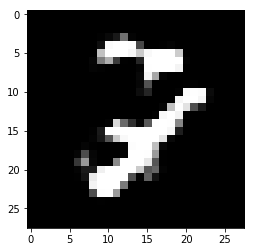

Loop: 366100, Generator_loss: -0.013726, Discriminator_loss: 0.0036031
Loop: 366200, Generator_loss: -0.008775, Discriminator_loss: 0.0042333
Loop: 366300, Generator_loss: -0.008078, Discriminator_loss: 0.0032047
Loop: 366400, Generator_loss: -0.010971, Discriminator_loss: 0.0039942
Loop: 366500, Generator_loss: -0.0040762, Discriminator_loss: 0.0037779
Loop: 366600, Generator_loss: -0.010752, Discriminator_loss: 0.0042232
Loop: 366700, Generator_loss: -0.0076585, Discriminator_loss: 0.0046512
Loop: 366800, Generator_loss: -0.0090635, Discriminator_loss: 0.0017344
Loop: 366900, Generator_loss: -0.011093, Discriminator_loss: 0.0047927
Loop: 367000, Generator_loss: -0.0068434, Discriminator_loss: 0.0058749


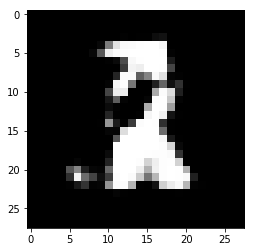

Loop: 367100, Generator_loss: -0.0076962, Discriminator_loss: 0.0061267
Loop: 367200, Generator_loss: -0.0071293, Discriminator_loss: 0.0037689
Loop: 367300, Generator_loss: -0.01089, Discriminator_loss: 0.0060331
Loop: 367400, Generator_loss: -0.0060848, Discriminator_loss: 0.0031558
Loop: 367500, Generator_loss: -0.011919, Discriminator_loss: 0.0046843
Loop: 367600, Generator_loss: -0.01338, Discriminator_loss: 0.0051951
Loop: 367700, Generator_loss: -0.0096881, Discriminator_loss: 0.0032779
Loop: 367800, Generator_loss: -0.0079817, Discriminator_loss: 0.0038524
Loop: 367900, Generator_loss: -0.005819, Discriminator_loss: 0.0046844
Loop: 368000, Generator_loss: -0.010711, Discriminator_loss: 0.00375


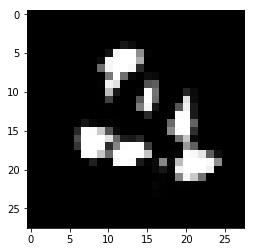

Loop: 368100, Generator_loss: -0.0075548, Discriminator_loss: 0.0047851
Loop: 368200, Generator_loss: -0.005948, Discriminator_loss: 0.0035597
Loop: 368300, Generator_loss: -0.0072639, Discriminator_loss: 0.0033268
Loop: 368400, Generator_loss: -0.007778, Discriminator_loss: 0.0038124
Loop: 368500, Generator_loss: -0.0080685, Discriminator_loss: 0.0061502
Loop: 368600, Generator_loss: -0.0072835, Discriminator_loss: 0.0038249
Loop: 368700, Generator_loss: -0.0068323, Discriminator_loss: 0.0025707
Loop: 368800, Generator_loss: -0.0084845, Discriminator_loss: 0.0061105
Loop: 368900, Generator_loss: -0.010445, Discriminator_loss: 0.0069075
Loop: 369000, Generator_loss: -0.0098256, Discriminator_loss: 0.0018932


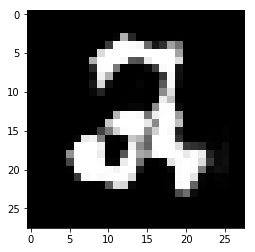

Loop: 369100, Generator_loss: -0.0056775, Discriminator_loss: 0.006289
Loop: 369200, Generator_loss: -0.0086953, Discriminator_loss: 0.0046908
Loop: 369300, Generator_loss: -0.0037753, Discriminator_loss: 0.003607
Loop: 369400, Generator_loss: -0.010063, Discriminator_loss: 0.0040222
Loop: 369500, Generator_loss: -0.0083549, Discriminator_loss: 0.0061819
Loop: 369600, Generator_loss: -0.0087135, Discriminator_loss: 0.0058005
Loop: 369700, Generator_loss: -0.0070181, Discriminator_loss: 0.0028039
Loop: 369800, Generator_loss: -0.007202, Discriminator_loss: 0.0055331
Loop: 369900, Generator_loss: -0.011122, Discriminator_loss: 0.0025002
Loop: 370000, Generator_loss: -0.0076693, Discriminator_loss: 0.0038105


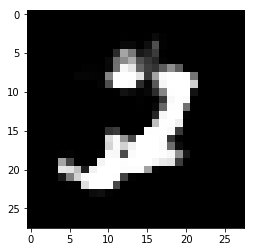

Loop: 370100, Generator_loss: -0.017691, Discriminator_loss: 0.0043024
Loop: 370200, Generator_loss: -0.0072054, Discriminator_loss: 0.0054604
Loop: 370300, Generator_loss: -0.00741, Discriminator_loss: 0.0040879
Loop: 370400, Generator_loss: -0.0073849, Discriminator_loss: 0.0037085
Loop: 370500, Generator_loss: -0.011243, Discriminator_loss: 0.0034503
Loop: 370600, Generator_loss: -0.0059514, Discriminator_loss: 0.004902
Loop: 370700, Generator_loss: -0.0053506, Discriminator_loss: 0.0042489
Loop: 370800, Generator_loss: -0.0054076, Discriminator_loss: 0.0042724
Loop: 370900, Generator_loss: -0.0087786, Discriminator_loss: 0.0033045
Loop: 371000, Generator_loss: -0.0056831, Discriminator_loss: 0.0026161


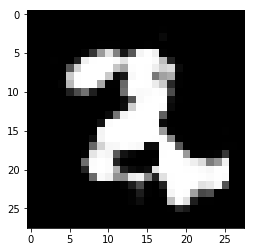

Loop: 371100, Generator_loss: -0.0105, Discriminator_loss: 0.0033691
Loop: 371200, Generator_loss: -0.005868, Discriminator_loss: 0.0038028
Loop: 371300, Generator_loss: -0.010084, Discriminator_loss: 0.0041103
Loop: 371400, Generator_loss: -0.0068213, Discriminator_loss: 0.0059689
Loop: 371500, Generator_loss: -0.0082917, Discriminator_loss: 0.0035412
Loop: 371600, Generator_loss: -0.009384, Discriminator_loss: 0.002557
Loop: 371700, Generator_loss: -0.0068339, Discriminator_loss: 0.0040328
Loop: 371800, Generator_loss: -0.0069083, Discriminator_loss: 0.0033066
Loop: 371900, Generator_loss: -0.0062425, Discriminator_loss: 0.003429
Loop: 372000, Generator_loss: -0.0075, Discriminator_loss: 0.0046354


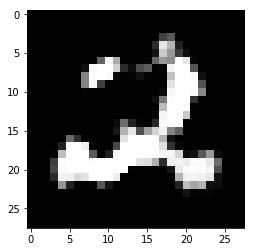

Loop: 372100, Generator_loss: -0.010647, Discriminator_loss: 0.0044344
Loop: 372200, Generator_loss: -0.0084248, Discriminator_loss: 0.0041731
Loop: 372300, Generator_loss: -0.0069104, Discriminator_loss: 0.0036038
Loop: 372400, Generator_loss: -0.01283, Discriminator_loss: 0.0048601
Loop: 372500, Generator_loss: -0.0075669, Discriminator_loss: 0.0019154
Loop: 372600, Generator_loss: -0.0080108, Discriminator_loss: 0.0053228
Loop: 372700, Generator_loss: -0.0065724, Discriminator_loss: 0.0044821
Loop: 372800, Generator_loss: -0.0036479, Discriminator_loss: 0.0041165
Loop: 372900, Generator_loss: -0.0049117, Discriminator_loss: 0.0034668
Loop: 373000, Generator_loss: -0.012643, Discriminator_loss: 0.0049281


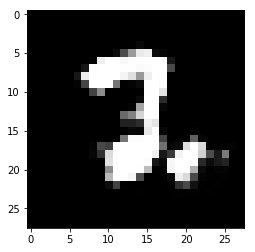

Loop: 373100, Generator_loss: -0.0074662, Discriminator_loss: 0.0041662
Loop: 373200, Generator_loss: -0.0082535, Discriminator_loss: 0.0052128
Loop: 373300, Generator_loss: -0.0096538, Discriminator_loss: 0.0048941
Loop: 373400, Generator_loss: -0.0065563, Discriminator_loss: 0.0055062
Loop: 373500, Generator_loss: -0.0077073, Discriminator_loss: 0.0037628
Loop: 373600, Generator_loss: -0.0074304, Discriminator_loss: 0.0036871
Loop: 373700, Generator_loss: -0.008832, Discriminator_loss: 0.0051044
Loop: 373800, Generator_loss: -0.0073682, Discriminator_loss: 0.0042248
Loop: 373900, Generator_loss: -0.010178, Discriminator_loss: 0.005194
Loop: 374000, Generator_loss: -0.0059724, Discriminator_loss: 0.0039131


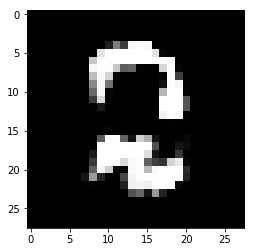

Loop: 374100, Generator_loss: -0.0081048, Discriminator_loss: 0.0038825
Loop: 374200, Generator_loss: -0.0070085, Discriminator_loss: 0.0046675
Loop: 374300, Generator_loss: -0.0054427, Discriminator_loss: 0.0052484
Loop: 374400, Generator_loss: -0.0040034, Discriminator_loss: 0.0044174
Loop: 374500, Generator_loss: -0.011388, Discriminator_loss: 0.0024248
Loop: 374600, Generator_loss: -0.0032032, Discriminator_loss: 0.0037635
Loop: 374700, Generator_loss: -0.010289, Discriminator_loss: 0.0026275
Loop: 374800, Generator_loss: -0.011472, Discriminator_loss: 0.0042033
Loop: 374900, Generator_loss: -0.0074654, Discriminator_loss: 0.004945
Loop: 375000, Generator_loss: -0.011091, Discriminator_loss: 0.0030925


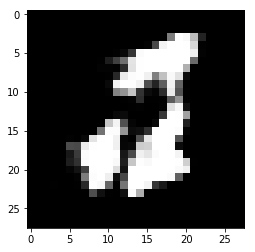

Loop: 375100, Generator_loss: -0.0073893, Discriminator_loss: 0.0017497
Loop: 375200, Generator_loss: -0.0078534, Discriminator_loss: 0.0041937
Loop: 375300, Generator_loss: -0.0057875, Discriminator_loss: 0.0045428
Loop: 375400, Generator_loss: -0.01106, Discriminator_loss: 0.0030922
Loop: 375500, Generator_loss: -0.0039114, Discriminator_loss: 0.0033778
Loop: 375600, Generator_loss: -0.0066849, Discriminator_loss: 0.0043358
Loop: 375700, Generator_loss: -0.0097143, Discriminator_loss: 0.0037068
Loop: 375800, Generator_loss: -0.0067662, Discriminator_loss: 0.0059694
Loop: 375900, Generator_loss: -0.0074963, Discriminator_loss: 0.0080228
Loop: 376000, Generator_loss: -0.009747, Discriminator_loss: 0.0030474


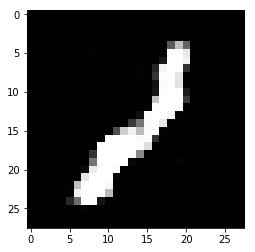

Loop: 376100, Generator_loss: -0.015187, Discriminator_loss: 0.0048805
Loop: 376200, Generator_loss: -0.00855, Discriminator_loss: 0.0048784
Loop: 376300, Generator_loss: -0.0085987, Discriminator_loss: 0.0045467
Loop: 376400, Generator_loss: -0.010319, Discriminator_loss: 0.0048208
Loop: 376500, Generator_loss: -0.006045, Discriminator_loss: 0.0044452
Loop: 376600, Generator_loss: -0.0076311, Discriminator_loss: 0.0012261
Loop: 376700, Generator_loss: -0.0073939, Discriminator_loss: 0.0035696
Loop: 376800, Generator_loss: -0.012846, Discriminator_loss: 0.0045991
Loop: 376900, Generator_loss: -0.0051892, Discriminator_loss: 0.002583
Loop: 377000, Generator_loss: -0.006232, Discriminator_loss: 0.0055575


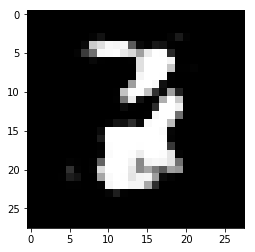

Loop: 377100, Generator_loss: -0.0071819, Discriminator_loss: 0.0035066
Loop: 377200, Generator_loss: -0.0080582, Discriminator_loss: 0.0038474
Loop: 377300, Generator_loss: -0.0050223, Discriminator_loss: 0.0046239
Loop: 377400, Generator_loss: -0.0066973, Discriminator_loss: 0.0041844
Loop: 377500, Generator_loss: -0.011363, Discriminator_loss: 0.0050374
Loop: 377600, Generator_loss: -0.0075977, Discriminator_loss: 0.0063568
Loop: 377700, Generator_loss: -0.0070856, Discriminator_loss: 0.0027179
Loop: 377800, Generator_loss: -0.010908, Discriminator_loss: 0.0048867
Loop: 377900, Generator_loss: -0.0086761, Discriminator_loss: 0.0031525
Loop: 378000, Generator_loss: -0.0059953, Discriminator_loss: 0.0055342


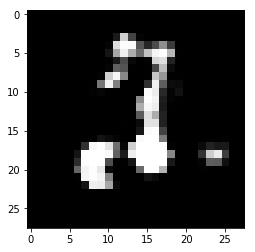

Loop: 378100, Generator_loss: -0.0030116, Discriminator_loss: 0.0046157
Loop: 378200, Generator_loss: -0.0031052, Discriminator_loss: 0.0028822
Loop: 378300, Generator_loss: -0.0053364, Discriminator_loss: 0.0051941
Loop: 378400, Generator_loss: -0.017758, Discriminator_loss: 0.0053207
Loop: 378500, Generator_loss: -0.0071064, Discriminator_loss: 0.0051872
Loop: 378600, Generator_loss: -0.0087927, Discriminator_loss: 0.0041391
Loop: 378700, Generator_loss: -0.0070222, Discriminator_loss: 0.0042462
Loop: 378800, Generator_loss: -0.0029106, Discriminator_loss: 0.004342
Loop: 378900, Generator_loss: -0.010741, Discriminator_loss: 0.0035436
Loop: 379000, Generator_loss: -0.0068817, Discriminator_loss: 0.0047463


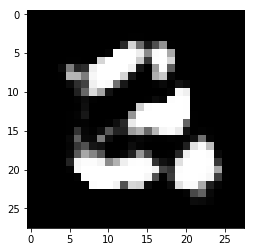

Loop: 379100, Generator_loss: -0.010414, Discriminator_loss: 0.0029654
Loop: 379200, Generator_loss: -0.0073123, Discriminator_loss: 0.0057313
Loop: 379300, Generator_loss: -0.0086849, Discriminator_loss: 0.0030473
Loop: 379400, Generator_loss: -0.012158, Discriminator_loss: 0.0043898
Loop: 379500, Generator_loss: -0.010731, Discriminator_loss: 0.0041206
Loop: 379600, Generator_loss: -0.0088234, Discriminator_loss: 0.0059967
Loop: 379700, Generator_loss: -0.0075893, Discriminator_loss: 0.0026661
Loop: 379800, Generator_loss: -0.0047246, Discriminator_loss: 0.0054185
Loop: 379900, Generator_loss: -0.012879, Discriminator_loss: 0.0032373
Loop: 380000, Generator_loss: -0.0098269, Discriminator_loss: 0.0055052


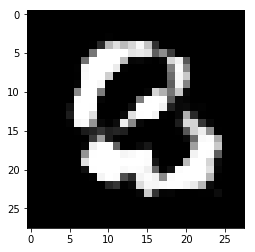

Loop: 380100, Generator_loss: -0.008366, Discriminator_loss: 0.0046215
Loop: 380200, Generator_loss: -0.0089957, Discriminator_loss: 0.0037967
Loop: 380300, Generator_loss: -0.0077367, Discriminator_loss: 0.0060478
Loop: 380400, Generator_loss: -0.008461, Discriminator_loss: 0.002423
Loop: 380500, Generator_loss: -0.0080021, Discriminator_loss: 0.0044787
Loop: 380600, Generator_loss: -0.0099683, Discriminator_loss: 0.0041481
Loop: 380700, Generator_loss: -0.011212, Discriminator_loss: 0.002984
Loop: 380800, Generator_loss: -0.0083383, Discriminator_loss: 0.0044691
Loop: 380900, Generator_loss: -0.009483, Discriminator_loss: 0.0042336
Loop: 381000, Generator_loss: -0.0097702, Discriminator_loss: 0.0032751


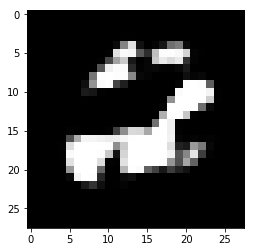

Loop: 381100, Generator_loss: -0.0075464, Discriminator_loss: 0.0054763
Loop: 381200, Generator_loss: -0.0061013, Discriminator_loss: 0.0036951
Loop: 381300, Generator_loss: -0.0087498, Discriminator_loss: 0.0043299
Loop: 381400, Generator_loss: -0.0087565, Discriminator_loss: 0.002576
Loop: 381500, Generator_loss: -0.008354, Discriminator_loss: 0.0025982
Loop: 381600, Generator_loss: -0.01083, Discriminator_loss: 0.0017005
Loop: 381700, Generator_loss: -0.01086, Discriminator_loss: 0.0046264
Loop: 381800, Generator_loss: -0.01206, Discriminator_loss: 0.0037641
Loop: 381900, Generator_loss: -0.0061504, Discriminator_loss: 0.0048337
Loop: 382000, Generator_loss: -0.0071211, Discriminator_loss: 0.0049498


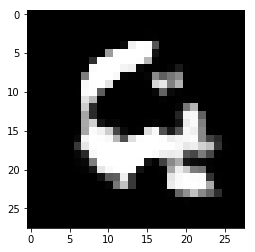

Loop: 382100, Generator_loss: -0.0086676, Discriminator_loss: 0.0045658
Loop: 382200, Generator_loss: -0.0054383, Discriminator_loss: 0.0040269
Loop: 382300, Generator_loss: -0.010102, Discriminator_loss: 0.0038222
Loop: 382400, Generator_loss: -0.011897, Discriminator_loss: 0.0030563
Loop: 382500, Generator_loss: -0.0068196, Discriminator_loss: 0.0034473
Loop: 382600, Generator_loss: -0.0086566, Discriminator_loss: 0.0032913
Loop: 382700, Generator_loss: -0.0056348, Discriminator_loss: 0.0071166
Loop: 382800, Generator_loss: -0.0069409, Discriminator_loss: 0.0037894
Loop: 382900, Generator_loss: -0.011674, Discriminator_loss: 0.0052399
Loop: 383000, Generator_loss: -0.0057563, Discriminator_loss: 0.0036392


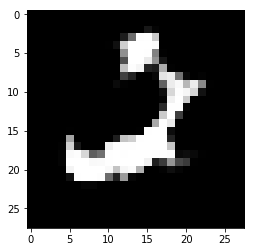

Loop: 383100, Generator_loss: -0.0083125, Discriminator_loss: 0.0019079
Loop: 383200, Generator_loss: -0.0086773, Discriminator_loss: 0.0016664
Loop: 383300, Generator_loss: -0.0042521, Discriminator_loss: 0.0044443
Loop: 383400, Generator_loss: -0.0072824, Discriminator_loss: 0.003937
Loop: 383500, Generator_loss: -0.0038584, Discriminator_loss: 0.0044626
Loop: 383600, Generator_loss: -0.0096364, Discriminator_loss: 0.0039031
Loop: 383700, Generator_loss: -0.0053928, Discriminator_loss: 0.0043558
Loop: 383800, Generator_loss: -0.0082945, Discriminator_loss: 0.004138
Loop: 383900, Generator_loss: -0.0055766, Discriminator_loss: 0.0052898
Loop: 384000, Generator_loss: -0.0060523, Discriminator_loss: 0.0043628


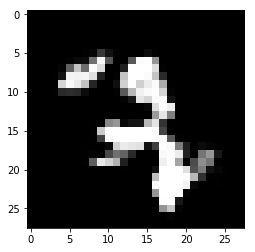

Loop: 384100, Generator_loss: -0.0081701, Discriminator_loss: 0.0041774
Loop: 384200, Generator_loss: -0.010863, Discriminator_loss: 0.0052488
Loop: 384300, Generator_loss: -0.0066849, Discriminator_loss: 0.0049674
Loop: 384400, Generator_loss: -0.0088681, Discriminator_loss: 0.0064707
Loop: 384500, Generator_loss: -0.0093038, Discriminator_loss: 0.0057023
Loop: 384600, Generator_loss: -0.0077229, Discriminator_loss: 0.0031304
Loop: 384700, Generator_loss: -0.007307, Discriminator_loss: 0.0039276
Loop: 384800, Generator_loss: -0.0089677, Discriminator_loss: 0.0029607
Loop: 384900, Generator_loss: -0.010614, Discriminator_loss: 0.0033832
Loop: 385000, Generator_loss: -0.0073229, Discriminator_loss: 0.0041141


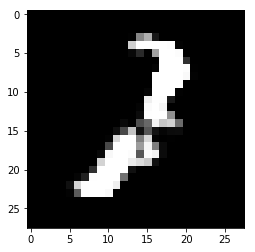

Loop: 385100, Generator_loss: -0.0078795, Discriminator_loss: 0.0032855
Loop: 385200, Generator_loss: -0.0093785, Discriminator_loss: 0.0061083
Loop: 385300, Generator_loss: -0.0060125, Discriminator_loss: 0.0049193
Loop: 385400, Generator_loss: -0.0044743, Discriminator_loss: 0.0037366
Loop: 385500, Generator_loss: -0.011013, Discriminator_loss: 0.0031964
Loop: 385600, Generator_loss: -0.0074383, Discriminator_loss: 0.0049053
Loop: 385700, Generator_loss: -0.0091578, Discriminator_loss: 0.004587
Loop: 385800, Generator_loss: -0.007088, Discriminator_loss: 0.0043474
Loop: 385900, Generator_loss: -0.0093931, Discriminator_loss: 0.0034213
Loop: 386000, Generator_loss: -0.0065217, Discriminator_loss: 0.0036453


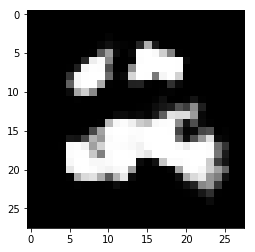

Loop: 386100, Generator_loss: -0.0098693, Discriminator_loss: 0.003858
Loop: 386200, Generator_loss: -0.0095839, Discriminator_loss: 0.0034145
Loop: 386300, Generator_loss: -0.0082821, Discriminator_loss: 0.0040517
Loop: 386400, Generator_loss: -0.0060528, Discriminator_loss: 0.0029038
Loop: 386500, Generator_loss: -0.011238, Discriminator_loss: 0.0030364
Loop: 386600, Generator_loss: -0.011658, Discriminator_loss: 0.0038259
Loop: 386700, Generator_loss: -0.0058112, Discriminator_loss: 0.0025161
Loop: 386800, Generator_loss: -0.0044575, Discriminator_loss: 0.0039922
Loop: 386900, Generator_loss: -0.007253, Discriminator_loss: 0.0061759
Loop: 387000, Generator_loss: -0.0095696, Discriminator_loss: 0.0053663


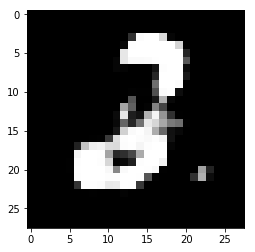

Loop: 387100, Generator_loss: -0.0038274, Discriminator_loss: 0.0035881
Loop: 387200, Generator_loss: -0.007408, Discriminator_loss: 0.0050482
Loop: 387300, Generator_loss: -0.007294, Discriminator_loss: 0.0048772
Loop: 387400, Generator_loss: -0.013282, Discriminator_loss: 0.0048355
Loop: 387500, Generator_loss: -0.0083688, Discriminator_loss: 0.0035819
Loop: 387600, Generator_loss: -0.0032817, Discriminator_loss: 0.0023026
Loop: 387700, Generator_loss: -0.010015, Discriminator_loss: 0.0038717
Loop: 387800, Generator_loss: -0.010717, Discriminator_loss: 0.0049259
Loop: 387900, Generator_loss: -0.0064856, Discriminator_loss: 0.0033571
Loop: 388000, Generator_loss: -0.012075, Discriminator_loss: 0.002311


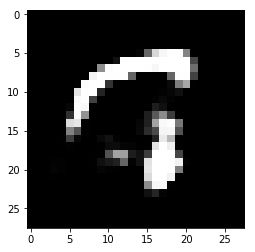

Loop: 388100, Generator_loss: -0.0022603, Discriminator_loss: 0.0040687
Loop: 388200, Generator_loss: -0.0058667, Discriminator_loss: 0.0025299
Loop: 388300, Generator_loss: -0.0082169, Discriminator_loss: 0.0015402
Loop: 388400, Generator_loss: -0.0065311, Discriminator_loss: 0.0041839
Loop: 388500, Generator_loss: -0.010591, Discriminator_loss: 0.0049247
Loop: 388600, Generator_loss: -0.0064743, Discriminator_loss: 0.0042979
Loop: 388700, Generator_loss: -0.0060878, Discriminator_loss: 0.0040895
Loop: 388800, Generator_loss: -0.0040604, Discriminator_loss: 0.0034995
Loop: 388900, Generator_loss: -0.0089826, Discriminator_loss: 0.0040559
Loop: 389000, Generator_loss: -0.0051317, Discriminator_loss: 0.0044989


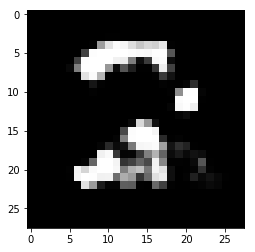

Loop: 389100, Generator_loss: -0.0069882, Discriminator_loss: 0.0039061
Loop: 389200, Generator_loss: -0.0076237, Discriminator_loss: 0.0049482
Loop: 389300, Generator_loss: -0.0091545, Discriminator_loss: 0.0054514
Loop: 389400, Generator_loss: -0.0068193, Discriminator_loss: 0.0034394
Loop: 389500, Generator_loss: -0.0064767, Discriminator_loss: 0.0033767
Loop: 389600, Generator_loss: -0.0076408, Discriminator_loss: 0.0033075
Loop: 389700, Generator_loss: -0.0075985, Discriminator_loss: 0.0031191
Loop: 389800, Generator_loss: -0.0078437, Discriminator_loss: 0.0056277
Loop: 389900, Generator_loss: -0.0037562, Discriminator_loss: 0.0055472
Loop: 390000, Generator_loss: -0.0061294, Discriminator_loss: 0.0027981


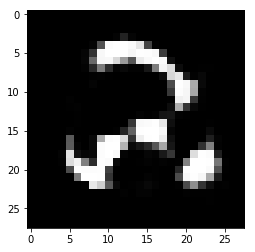

Loop: 390100, Generator_loss: -0.0064383, Discriminator_loss: 0.0034408
Loop: 390200, Generator_loss: -0.004123, Discriminator_loss: 0.0028064
Loop: 390300, Generator_loss: -0.0039475, Discriminator_loss: 0.0027804
Loop: 390400, Generator_loss: -0.010277, Discriminator_loss: 0.0044722
Loop: 390500, Generator_loss: -0.011203, Discriminator_loss: 0.0031527
Loop: 390600, Generator_loss: -0.0098228, Discriminator_loss: 0.0048597
Loop: 390700, Generator_loss: -0.0082094, Discriminator_loss: 0.0021031
Loop: 390800, Generator_loss: -0.0052796, Discriminator_loss: 0.0039492
Loop: 390900, Generator_loss: -0.006814, Discriminator_loss: 0.0027708
Loop: 391000, Generator_loss: -0.013386, Discriminator_loss: 0.0047855


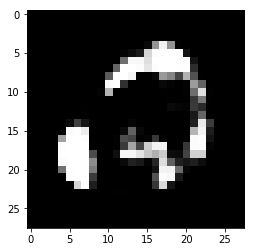

Loop: 391100, Generator_loss: -0.0093052, Discriminator_loss: 0.003108
Loop: 391200, Generator_loss: -0.0061937, Discriminator_loss: 0.0041146
Loop: 391300, Generator_loss: -0.0078233, Discriminator_loss: 0.0038225
Loop: 391400, Generator_loss: -0.013238, Discriminator_loss: 0.0047851
Loop: 391500, Generator_loss: -0.0064285, Discriminator_loss: 0.0048488
Loop: 391600, Generator_loss: -0.011547, Discriminator_loss: 0.0037654
Loop: 391700, Generator_loss: -0.004667, Discriminator_loss: 0.003206
Loop: 391800, Generator_loss: -0.007746, Discriminator_loss: 0.0037404
Loop: 391900, Generator_loss: -0.0061361, Discriminator_loss: 0.0040954
Loop: 392000, Generator_loss: -0.0059735, Discriminator_loss: 0.0056108


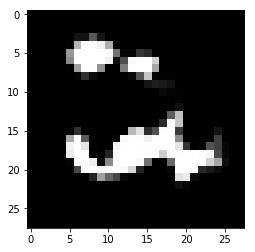

Loop: 392100, Generator_loss: -0.0051235, Discriminator_loss: 0.0052668
Loop: 392200, Generator_loss: -0.0051176, Discriminator_loss: 0.0033808
Loop: 392300, Generator_loss: -0.0085815, Discriminator_loss: 0.0041319
Loop: 392400, Generator_loss: -0.0028783, Discriminator_loss: 0.0039553
Loop: 392500, Generator_loss: -0.0073285, Discriminator_loss: 0.0053881
Loop: 392600, Generator_loss: -0.007408, Discriminator_loss: 0.0032398
Loop: 392700, Generator_loss: -0.0079979, Discriminator_loss: 0.0030206
Loop: 392800, Generator_loss: -0.0057976, Discriminator_loss: 0.0024841
Loop: 392900, Generator_loss: -0.004731, Discriminator_loss: 0.0049101
Loop: 393000, Generator_loss: -0.013569, Discriminator_loss: 0.0054479


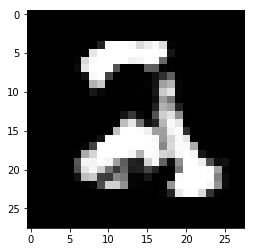

Loop: 393100, Generator_loss: -0.011065, Discriminator_loss: 0.0030531
Loop: 393200, Generator_loss: -0.0085571, Discriminator_loss: 0.0027166
Loop: 393300, Generator_loss: -0.0023205, Discriminator_loss: 0.003717
Loop: 393400, Generator_loss: -0.011731, Discriminator_loss: 0.001155
Loop: 393500, Generator_loss: -0.007258, Discriminator_loss: 0.0041181
Loop: 393600, Generator_loss: -0.010704, Discriminator_loss: 0.0040697
Loop: 393700, Generator_loss: -0.0079633, Discriminator_loss: 0.0053623
Loop: 393800, Generator_loss: -0.0089516, Discriminator_loss: 0.0028752
Loop: 393900, Generator_loss: -0.010574, Discriminator_loss: 0.0048317
Loop: 394000, Generator_loss: -0.0033652, Discriminator_loss: 0.0037406


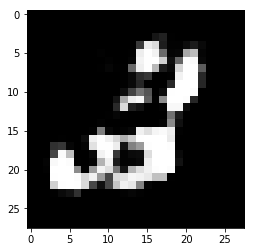

Loop: 394100, Generator_loss: -0.015184, Discriminator_loss: 0.005788
Loop: 394200, Generator_loss: -0.010102, Discriminator_loss: 0.0045627
Loop: 394300, Generator_loss: -0.010489, Discriminator_loss: 0.0023305
Loop: 394400, Generator_loss: -0.0019107, Discriminator_loss: 0.0028701
Loop: 394500, Generator_loss: -0.0073939, Discriminator_loss: 0.0039627
Loop: 394600, Generator_loss: -0.0037856, Discriminator_loss: 0.003541
Loop: 394700, Generator_loss: -0.0077316, Discriminator_loss: 0.0043996
Loop: 394800, Generator_loss: -0.0068009, Discriminator_loss: 0.0029147
Loop: 394900, Generator_loss: -0.0080883, Discriminator_loss: 0.0034471
Loop: 395000, Generator_loss: -0.006253, Discriminator_loss: 0.0036403


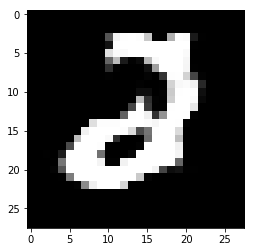

Loop: 395100, Generator_loss: -0.0058907, Discriminator_loss: 0.0065049
Loop: 395200, Generator_loss: -0.0061208, Discriminator_loss: 0.0054054
Loop: 395300, Generator_loss: -0.010204, Discriminator_loss: 0.0057435
Loop: 395400, Generator_loss: -0.0084846, Discriminator_loss: 0.0061206
Loop: 395500, Generator_loss: -0.00637, Discriminator_loss: 0.0036874
Loop: 395600, Generator_loss: -0.0056379, Discriminator_loss: 0.0022891
Loop: 395700, Generator_loss: -0.0088551, Discriminator_loss: 0.003833
Loop: 395800, Generator_loss: -0.0087729, Discriminator_loss: 0.0020703
Loop: 395900, Generator_loss: -0.0091408, Discriminator_loss: 0.0033818
Loop: 396000, Generator_loss: -0.0029187, Discriminator_loss: 0.0048174


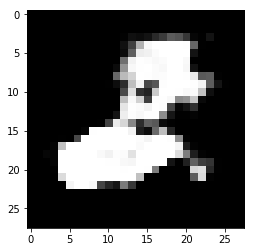

Loop: 396100, Generator_loss: -0.0091468, Discriminator_loss: 0.0046921
Loop: 396200, Generator_loss: -0.0072503, Discriminator_loss: 0.003652
Loop: 396300, Generator_loss: -0.0075649, Discriminator_loss: 0.0040764
Loop: 396400, Generator_loss: -0.0088432, Discriminator_loss: 0.0038219
Loop: 396500, Generator_loss: -0.0086369, Discriminator_loss: 0.0036832
Loop: 396600, Generator_loss: -0.010092, Discriminator_loss: 0.0044526
Loop: 396700, Generator_loss: -0.0049265, Discriminator_loss: 0.0048162
Loop: 396800, Generator_loss: -0.0049515, Discriminator_loss: 0.0023213
Loop: 396900, Generator_loss: -0.0062453, Discriminator_loss: 0.003726
Loop: 397000, Generator_loss: -0.0077046, Discriminator_loss: 0.0061779


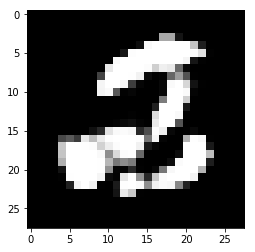

Loop: 397100, Generator_loss: -0.011551, Discriminator_loss: 0.0026394
Loop: 397200, Generator_loss: -0.0062723, Discriminator_loss: 0.0043597
Loop: 397300, Generator_loss: -0.012934, Discriminator_loss: 0.0028655
Loop: 397400, Generator_loss: -0.005814, Discriminator_loss: 0.0041722
Loop: 397500, Generator_loss: -0.0088166, Discriminator_loss: 0.003618
Loop: 397600, Generator_loss: -0.0066329, Discriminator_loss: 0.0061744
Loop: 397700, Generator_loss: -0.0078263, Discriminator_loss: 0.0057171
Loop: 397800, Generator_loss: -0.0085287, Discriminator_loss: 0.0067179
Loop: 397900, Generator_loss: -0.0098434, Discriminator_loss: 0.0035476
Loop: 398000, Generator_loss: -0.0095817, Discriminator_loss: 0.0042654


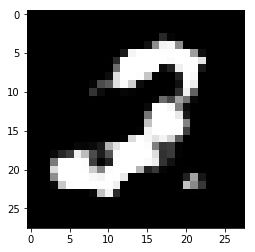

Loop: 398100, Generator_loss: -0.0075232, Discriminator_loss: 0.00039366
Loop: 398200, Generator_loss: -0.0088451, Discriminator_loss: 0.0029714
Loop: 398300, Generator_loss: -0.0053545, Discriminator_loss: 0.0040465
Loop: 398400, Generator_loss: -0.010942, Discriminator_loss: 0.0030053
Loop: 398500, Generator_loss: -0.006299, Discriminator_loss: 0.0038992
Loop: 398600, Generator_loss: -0.0046578, Discriminator_loss: 0.0041354
Loop: 398700, Generator_loss: -0.0062715, Discriminator_loss: 0.0025841
Loop: 398800, Generator_loss: -0.0078334, Discriminator_loss: 0.0042385
Loop: 398900, Generator_loss: -0.012169, Discriminator_loss: 0.002666
Loop: 399000, Generator_loss: -0.0056273, Discriminator_loss: 0.0025255


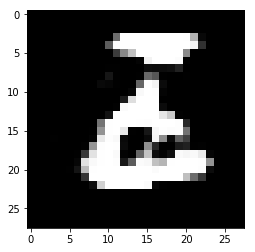

Loop: 399100, Generator_loss: -0.011177, Discriminator_loss: 0.0036442
Loop: 399200, Generator_loss: -0.010931, Discriminator_loss: 0.0052789
Loop: 399300, Generator_loss: -0.0088567, Discriminator_loss: 0.0047395
Loop: 399400, Generator_loss: -0.0091232, Discriminator_loss: 0.0053397
Loop: 399500, Generator_loss: -0.0038835, Discriminator_loss: 0.0020439
Loop: 399600, Generator_loss: -0.0084522, Discriminator_loss: 0.0022125
Loop: 399700, Generator_loss: -0.010005, Discriminator_loss: 0.0040522
Loop: 399800, Generator_loss: -0.0067598, Discriminator_loss: 0.0023262
Loop: 399900, Generator_loss: -0.0085399, Discriminator_loss: 0.003565
Loop: 400000, Generator_loss: -0.0026631, Discriminator_loss: 0.0042959


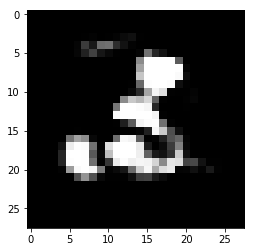

Loop: 400100, Generator_loss: -0.011557, Discriminator_loss: 0.004225
Loop: 400200, Generator_loss: -0.0089394, Discriminator_loss: 0.0053022
Loop: 400300, Generator_loss: -0.0051378, Discriminator_loss: 0.0034194
Loop: 400400, Generator_loss: -0.0027162, Discriminator_loss: 0.0035588
Loop: 400500, Generator_loss: -0.01223, Discriminator_loss: 0.002393
Loop: 400600, Generator_loss: -0.007872, Discriminator_loss: 0.0074457
Loop: 400700, Generator_loss: -0.0071304, Discriminator_loss: 0.0034433
Loop: 400800, Generator_loss: -0.0072841, Discriminator_loss: 0.0044457
Loop: 400900, Generator_loss: -0.0091888, Discriminator_loss: 0.0024736
Loop: 401000, Generator_loss: -0.0094797, Discriminator_loss: 0.0023578


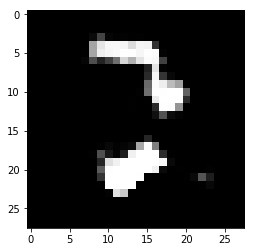

Loop: 401100, Generator_loss: -0.005769, Discriminator_loss: 0.0043876
Loop: 401200, Generator_loss: -0.012648, Discriminator_loss: 0.003436
Loop: 401300, Generator_loss: -0.0070495, Discriminator_loss: 0.0028538
Loop: 401400, Generator_loss: -0.0028527, Discriminator_loss: 0.0050006
Loop: 401500, Generator_loss: -0.0048447, Discriminator_loss: 0.00037861
Loop: 401600, Generator_loss: -0.010859, Discriminator_loss: 0.0028232
Loop: 401700, Generator_loss: -0.006278, Discriminator_loss: 0.003917
Loop: 401800, Generator_loss: -0.010552, Discriminator_loss: 0.0057059
Loop: 401900, Generator_loss: -0.0073499, Discriminator_loss: 0.0030776
Loop: 402000, Generator_loss: -0.011465, Discriminator_loss: 0.002129


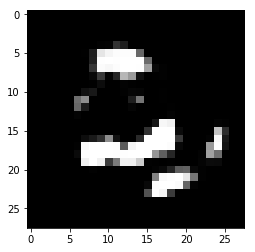

Loop: 402100, Generator_loss: -0.010558, Discriminator_loss: 0.004797
Loop: 402200, Generator_loss: -0.0084478, Discriminator_loss: 0.0025009
Loop: 402300, Generator_loss: -0.0079618, Discriminator_loss: 0.0021857
Loop: 402400, Generator_loss: -0.0062122, Discriminator_loss: 0.0057835
Loop: 402500, Generator_loss: -0.011819, Discriminator_loss: 0.0060767
Loop: 402600, Generator_loss: -0.0089636, Discriminator_loss: 0.0027257
Loop: 402700, Generator_loss: -0.0067387, Discriminator_loss: 0.0069178
Loop: 402800, Generator_loss: -0.01322, Discriminator_loss: 0.0046008
Loop: 402900, Generator_loss: -0.012266, Discriminator_loss: 0.0030007
Loop: 403000, Generator_loss: -0.011494, Discriminator_loss: 0.0020854


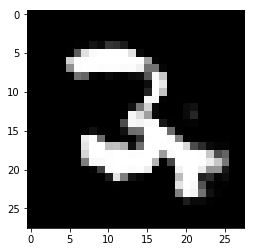

Loop: 403100, Generator_loss: -0.0096236, Discriminator_loss: 0.0057056
Loop: 403200, Generator_loss: -0.0065445, Discriminator_loss: 0.0025836
Loop: 403300, Generator_loss: -0.011624, Discriminator_loss: 0.0041379
Loop: 403400, Generator_loss: -0.010228, Discriminator_loss: 0.0059256
Loop: 403500, Generator_loss: -0.007849, Discriminator_loss: 0.0028164
Loop: 403600, Generator_loss: -0.0010174, Discriminator_loss: 0.0054462
Loop: 403700, Generator_loss: -0.015093, Discriminator_loss: 0.0085665
Loop: 403800, Generator_loss: -0.0031349, Discriminator_loss: 0.0028538
Loop: 403900, Generator_loss: -0.011714, Discriminator_loss: 0.0049298
Loop: 404000, Generator_loss: -0.0077627, Discriminator_loss: 0.0032764


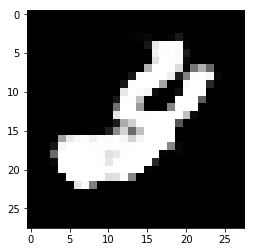

Loop: 404100, Generator_loss: -0.0058874, Discriminator_loss: 0.0035968
Loop: 404200, Generator_loss: -0.015551, Discriminator_loss: 0.003764
Loop: 404300, Generator_loss: -0.0065786, Discriminator_loss: 0.0020548
Loop: 404400, Generator_loss: -0.0052898, Discriminator_loss: 0.0060843
Loop: 404500, Generator_loss: -0.011215, Discriminator_loss: 0.0042159
Loop: 404600, Generator_loss: -0.0049998, Discriminator_loss: 0.0034673
Loop: 404700, Generator_loss: -0.002198, Discriminator_loss: 0.003308
Loop: 404800, Generator_loss: -0.0051064, Discriminator_loss: 0.0048049
Loop: 404900, Generator_loss: -0.0052853, Discriminator_loss: 0.003251
Loop: 405000, Generator_loss: -0.006293, Discriminator_loss: 0.005132


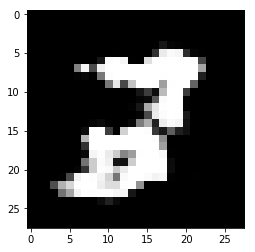

Loop: 405100, Generator_loss: -0.0029325, Discriminator_loss: 0.004491
Loop: 405200, Generator_loss: -0.013839, Discriminator_loss: 0.0049659
Loop: 405300, Generator_loss: -0.014197, Discriminator_loss: 0.0037795
Loop: 405400, Generator_loss: -0.0082876, Discriminator_loss: 0.0026764
Loop: 405500, Generator_loss: -0.010318, Discriminator_loss: 0.0027407
Loop: 405600, Generator_loss: -0.01066, Discriminator_loss: 0.0022261
Loop: 405700, Generator_loss: -0.0050993, Discriminator_loss: 0.0027372
Loop: 405800, Generator_loss: -0.0058684, Discriminator_loss: 0.0054003
Loop: 405900, Generator_loss: 0.00073134, Discriminator_loss: 0.0047126
Loop: 406000, Generator_loss: -0.0081886, Discriminator_loss: 0.0049984


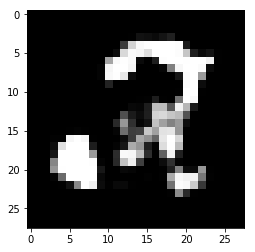

Loop: 406100, Generator_loss: -0.012653, Discriminator_loss: 0.0033491
Loop: 406200, Generator_loss: -0.011913, Discriminator_loss: 0.0016784
Loop: 406300, Generator_loss: -0.010689, Discriminator_loss: 0.002482
Loop: 406400, Generator_loss: -0.0045239, Discriminator_loss: 0.0028566
Loop: 406500, Generator_loss: -0.006049, Discriminator_loss: 0.0038624
Loop: 406600, Generator_loss: -0.010415, Discriminator_loss: 0.0054711
Loop: 406700, Generator_loss: -0.0060418, Discriminator_loss: 0.0037885
Loop: 406800, Generator_loss: -0.0084311, Discriminator_loss: 0.0041446
Loop: 406900, Generator_loss: -0.0029035, Discriminator_loss: 0.0046006
Loop: 407000, Generator_loss: -0.0059239, Discriminator_loss: 0.0051754


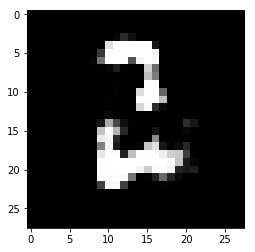

Loop: 407100, Generator_loss: -0.0042596, Discriminator_loss: 0.0030188
Loop: 407200, Generator_loss: -0.0079311, Discriminator_loss: 0.0039478
Loop: 407300, Generator_loss: -0.005254, Discriminator_loss: 0.0052864
Loop: 407400, Generator_loss: -0.0034247, Discriminator_loss: 0.0018184
Loop: 407500, Generator_loss: -0.0090834, Discriminator_loss: 0.0033321
Loop: 407600, Generator_loss: -0.011387, Discriminator_loss: 0.0039726
Loop: 407700, Generator_loss: -0.0073977, Discriminator_loss: 0.0036893
Loop: 407800, Generator_loss: -0.0048373, Discriminator_loss: 0.0037715
Loop: 407900, Generator_loss: -0.0089143, Discriminator_loss: 0.0057539
Loop: 408000, Generator_loss: -0.0013563, Discriminator_loss: 0.0028697


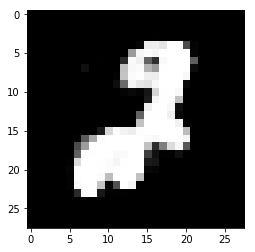

Loop: 408100, Generator_loss: -0.012703, Discriminator_loss: 0.0038931
Loop: 408200, Generator_loss: -0.009709, Discriminator_loss: 0.0042174
Loop: 408300, Generator_loss: -0.0071447, Discriminator_loss: 0.0038055
Loop: 408400, Generator_loss: -0.0048219, Discriminator_loss: 0.0029599
Loop: 408500, Generator_loss: -0.0066497, Discriminator_loss: 0.0054188
Loop: 408600, Generator_loss: -0.005179, Discriminator_loss: 0.0026899
Loop: 408700, Generator_loss: -0.0073369, Discriminator_loss: 0.0057036
Loop: 408800, Generator_loss: -0.0050696, Discriminator_loss: 0.0030693
Loop: 408900, Generator_loss: -0.0095913, Discriminator_loss: 0.001493
Loop: 409000, Generator_loss: -0.0087227, Discriminator_loss: 0.0040605


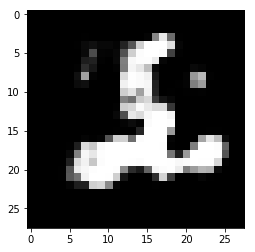

Loop: 409100, Generator_loss: -0.0048569, Discriminator_loss: 0.0046241
Loop: 409200, Generator_loss: -0.0042387, Discriminator_loss: 0.0048094
Loop: 409300, Generator_loss: -0.00072642, Discriminator_loss: 0.0030669
Loop: 409400, Generator_loss: -0.0044952, Discriminator_loss: 0.0033168
Loop: 409500, Generator_loss: -0.0069696, Discriminator_loss: 0.0031009
Loop: 409600, Generator_loss: -0.0033786, Discriminator_loss: 0.0035996
Loop: 409700, Generator_loss: -0.014426, Discriminator_loss: 0.0011756
Loop: 409800, Generator_loss: -0.0053165, Discriminator_loss: 0.0052353
Loop: 409900, Generator_loss: -0.0058598, Discriminator_loss: 0.0042418
Loop: 410000, Generator_loss: -0.010251, Discriminator_loss: 0.0037778


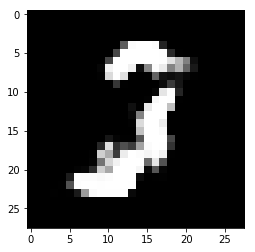

Loop: 410100, Generator_loss: -0.0042633, Discriminator_loss: 0.0037466
Loop: 410200, Generator_loss: -0.0093357, Discriminator_loss: 0.0050739
Loop: 410300, Generator_loss: -0.0033961, Discriminator_loss: 0.0041895
Loop: 410400, Generator_loss: -0.0077212, Discriminator_loss: 0.0017151
Loop: 410500, Generator_loss: -0.0088917, Discriminator_loss: 0.001863
Loop: 410600, Generator_loss: -0.002796, Discriminator_loss: 0.0031202
Loop: 410700, Generator_loss: -0.0090567, Discriminator_loss: 0.0038153
Loop: 410800, Generator_loss: -0.0062479, Discriminator_loss: 0.0043674
Loop: 410900, Generator_loss: -0.0077863, Discriminator_loss: 0.0039987
Loop: 411000, Generator_loss: -0.0054207, Discriminator_loss: 0.0029665


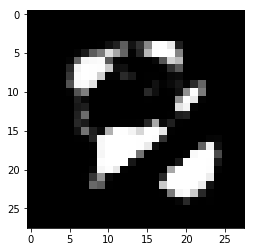

Loop: 411100, Generator_loss: -0.0037021, Discriminator_loss: 0.0028045
Loop: 411200, Generator_loss: -0.0053183, Discriminator_loss: 0.0080527
Loop: 411300, Generator_loss: -0.0083643, Discriminator_loss: 0.0043378
Loop: 411400, Generator_loss: -0.0051478, Discriminator_loss: 0.0030728
Loop: 411500, Generator_loss: -0.012103, Discriminator_loss: 0.0065549
Loop: 411600, Generator_loss: -0.0052431, Discriminator_loss: 0.0056253
Loop: 411700, Generator_loss: -0.01218, Discriminator_loss: 0.0053931
Loop: 411800, Generator_loss: -0.010545, Discriminator_loss: 0.0033508
Loop: 411900, Generator_loss: -0.0080543, Discriminator_loss: 0.0052145
Loop: 412000, Generator_loss: -0.0061609, Discriminator_loss: 0.0027469


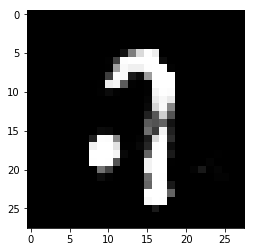

Loop: 412100, Generator_loss: -0.0075686, Discriminator_loss: 0.0026785
Loop: 412200, Generator_loss: -0.0085389, Discriminator_loss: 0.0038007
Loop: 412300, Generator_loss: -0.0089945, Discriminator_loss: 0.004383
Loop: 412400, Generator_loss: -0.0075324, Discriminator_loss: 0.0036427
Loop: 412500, Generator_loss: -0.0063027, Discriminator_loss: 0.003138
Loop: 412600, Generator_loss: -0.0080994, Discriminator_loss: 0.004952
Loop: 412700, Generator_loss: -0.0067206, Discriminator_loss: 0.0039236
Loop: 412800, Generator_loss: -0.0068055, Discriminator_loss: 0.0028236
Loop: 412900, Generator_loss: -0.0097668, Discriminator_loss: 0.0054824
Loop: 413000, Generator_loss: -0.0067053, Discriminator_loss: 0.0061007


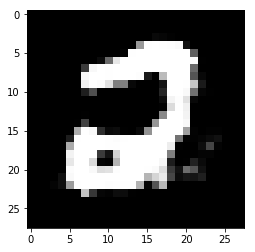

Loop: 413100, Generator_loss: 0.00028987, Discriminator_loss: 0.004988
Loop: 413200, Generator_loss: -0.0092388, Discriminator_loss: 0.0026278
Loop: 413300, Generator_loss: -0.006371, Discriminator_loss: 0.0036042
Loop: 413400, Generator_loss: -0.0079563, Discriminator_loss: 0.0049481
Loop: 413500, Generator_loss: -0.0060367, Discriminator_loss: 0.0050035
Loop: 413600, Generator_loss: -0.004251, Discriminator_loss: 0.0057805
Loop: 413700, Generator_loss: -0.0066183, Discriminator_loss: 0.0044849
Loop: 413800, Generator_loss: -0.010474, Discriminator_loss: 0.0068768
Loop: 413900, Generator_loss: -0.0053844, Discriminator_loss: 0.0045205
Loop: 414000, Generator_loss: -0.005006, Discriminator_loss: 0.0028417


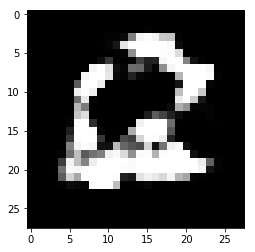

Loop: 414100, Generator_loss: -0.0098109, Discriminator_loss: 0.0038428
Loop: 414200, Generator_loss: -0.0027757, Discriminator_loss: 0.0028082
Loop: 414300, Generator_loss: -0.011449, Discriminator_loss: 0.0043685
Loop: 414400, Generator_loss: -0.0075327, Discriminator_loss: 0.0057842
Loop: 414500, Generator_loss: 0.001187, Discriminator_loss: 0.0054022
Loop: 414600, Generator_loss: -0.0070368, Discriminator_loss: 0.0028523
Loop: 414700, Generator_loss: -0.0049968, Discriminator_loss: 0.0060507
Loop: 414800, Generator_loss: -0.0077553, Discriminator_loss: 0.0032563
Loop: 414900, Generator_loss: -0.0056669, Discriminator_loss: 0.0043578
Loop: 415000, Generator_loss: -0.012497, Discriminator_loss: 0.0027549


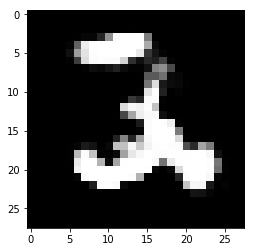

Loop: 415100, Generator_loss: -0.0078308, Discriminator_loss: 0.0028546
Loop: 415200, Generator_loss: -0.0090504, Discriminator_loss: 0.0040037
Loop: 415300, Generator_loss: -0.010261, Discriminator_loss: 0.0053904
Loop: 415400, Generator_loss: -0.0039328, Discriminator_loss: 0.004728
Loop: 415500, Generator_loss: -0.010179, Discriminator_loss: 0.0069831
Loop: 415600, Generator_loss: -0.0052036, Discriminator_loss: 0.0048405
Loop: 415700, Generator_loss: -0.0054751, Discriminator_loss: 0.0029694
Loop: 415800, Generator_loss: -0.0094548, Discriminator_loss: 0.0038288
Loop: 415900, Generator_loss: -0.0055429, Discriminator_loss: 0.0044868
Loop: 416000, Generator_loss: -0.0086942, Discriminator_loss: 0.0045467


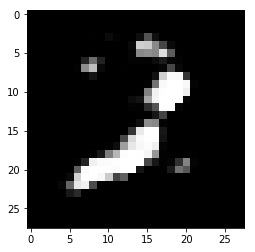

Loop: 416100, Generator_loss: -0.0067159, Discriminator_loss: 0.0033234
Loop: 416200, Generator_loss: -0.0092389, Discriminator_loss: 0.0030519
Loop: 416300, Generator_loss: -0.010233, Discriminator_loss: 0.0043555
Loop: 416400, Generator_loss: -0.0068306, Discriminator_loss: 0.0042159
Loop: 416500, Generator_loss: -0.004329, Discriminator_loss: 0.0032621
Loop: 416600, Generator_loss: -0.0069379, Discriminator_loss: 0.0044553
Loop: 416700, Generator_loss: -0.0075034, Discriminator_loss: 0.0037547
Loop: 416800, Generator_loss: -0.0094269, Discriminator_loss: 0.0026137
Loop: 416900, Generator_loss: -0.012614, Discriminator_loss: 0.0047304
Loop: 417000, Generator_loss: -0.0069556, Discriminator_loss: 0.0046349


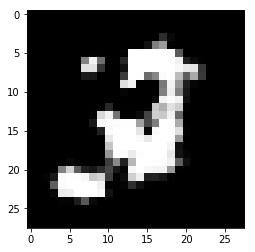

Loop: 417100, Generator_loss: -0.001322, Discriminator_loss: 0.004211
Loop: 417200, Generator_loss: -0.0077115, Discriminator_loss: 0.0067052
Loop: 417300, Generator_loss: -0.015323, Discriminator_loss: 0.003936
Loop: 417400, Generator_loss: -0.0067972, Discriminator_loss: 0.0038324
Loop: 417500, Generator_loss: -0.0084222, Discriminator_loss: 0.0051447
Loop: 417600, Generator_loss: -0.0041046, Discriminator_loss: 0.0027507
Loop: 417700, Generator_loss: -0.009701, Discriminator_loss: 0.0035778
Loop: 417800, Generator_loss: -0.0090818, Discriminator_loss: 0.0039235
Loop: 417900, Generator_loss: -0.0084195, Discriminator_loss: 0.0043872
Loop: 418000, Generator_loss: -0.0081669, Discriminator_loss: 0.0050706


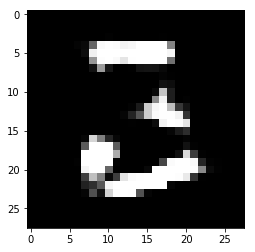

Loop: 418100, Generator_loss: -0.011284, Discriminator_loss: 0.0012525
Loop: 418200, Generator_loss: -0.0045001, Discriminator_loss: 0.0018721
Loop: 418300, Generator_loss: -0.0068769, Discriminator_loss: 0.0052055
Loop: 418400, Generator_loss: -0.014345, Discriminator_loss: 0.0041006
Loop: 418500, Generator_loss: -0.0075515, Discriminator_loss: 0.0047362
Loop: 418600, Generator_loss: -0.01141, Discriminator_loss: 0.0022153
Loop: 418700, Generator_loss: -0.0066483, Discriminator_loss: 0.0022864
Loop: 418800, Generator_loss: -0.0038652, Discriminator_loss: 0.0029516
Loop: 418900, Generator_loss: -0.0050356, Discriminator_loss: 0.0057309
Loop: 419000, Generator_loss: -0.0039632, Discriminator_loss: 0.0034131


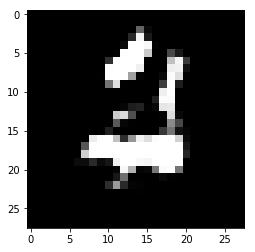

Loop: 419100, Generator_loss: -0.0092143, Discriminator_loss: 0.006146
Loop: 419200, Generator_loss: -0.010399, Discriminator_loss: 0.0039516
Loop: 419300, Generator_loss: -0.006278, Discriminator_loss: 0.004118
Loop: 419400, Generator_loss: -0.0058464, Discriminator_loss: 0.0021107
Loop: 419500, Generator_loss: -0.0096911, Discriminator_loss: 0.0052315
Loop: 419600, Generator_loss: -0.0075722, Discriminator_loss: 0.0025916
Loop: 419700, Generator_loss: -0.0084461, Discriminator_loss: 0.0045001
Loop: 419800, Generator_loss: -0.0058887, Discriminator_loss: 0.0028165
Loop: 419900, Generator_loss: -0.0089705, Discriminator_loss: 0.0049035
Loop: 420000, Generator_loss: -0.0042862, Discriminator_loss: 0.0034392


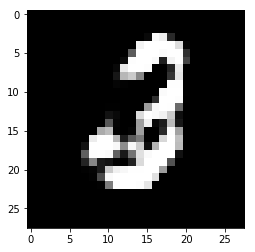

Loop: 420100, Generator_loss: -0.0066359, Discriminator_loss: 0.0048282
Loop: 420200, Generator_loss: -0.007632, Discriminator_loss: 0.0044744
Loop: 420300, Generator_loss: -0.0080968, Discriminator_loss: 0.0036361
Loop: 420400, Generator_loss: -0.0093717, Discriminator_loss: 0.0059956
Loop: 420500, Generator_loss: -0.00928, Discriminator_loss: 0.004033
Loop: 420600, Generator_loss: -0.007355, Discriminator_loss: 0.0034325
Loop: 420700, Generator_loss: -0.010615, Discriminator_loss: 0.0038714
Loop: 420800, Generator_loss: -0.010497, Discriminator_loss: 0.0038765
Loop: 420900, Generator_loss: -0.010952, Discriminator_loss: 0.004286
Loop: 421000, Generator_loss: -0.0054709, Discriminator_loss: 0.0030624


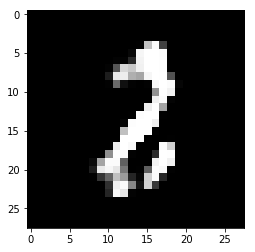

Loop: 421100, Generator_loss: -0.0077104, Discriminator_loss: 0.0035847
Loop: 421200, Generator_loss: -0.0087258, Discriminator_loss: 0.0045881
Loop: 421300, Generator_loss: -0.0078759, Discriminator_loss: 0.0019198
Loop: 421400, Generator_loss: -0.0031974, Discriminator_loss: 0.0035105
Loop: 421500, Generator_loss: -0.0099838, Discriminator_loss: 0.0030364
Loop: 421600, Generator_loss: -0.0099009, Discriminator_loss: 0.0051031
Loop: 421700, Generator_loss: -0.0086858, Discriminator_loss: 0.002659
Loop: 421800, Generator_loss: -0.0087619, Discriminator_loss: 0.0054661
Loop: 421900, Generator_loss: -0.011138, Discriminator_loss: 0.0028158
Loop: 422000, Generator_loss: -0.0057772, Discriminator_loss: 0.001436


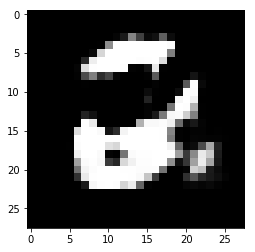

Loop: 422100, Generator_loss: -0.0079693, Discriminator_loss: 0.0048435
Loop: 422200, Generator_loss: -0.004706, Discriminator_loss: 0.0040209
Loop: 422300, Generator_loss: -0.001821, Discriminator_loss: 0.0056877
Loop: 422400, Generator_loss: -0.0050981, Discriminator_loss: 0.0053778
Loop: 422500, Generator_loss: -0.0054552, Discriminator_loss: 0.0034152
Loop: 422600, Generator_loss: -0.0079512, Discriminator_loss: 0.0036758
Loop: 422700, Generator_loss: -0.0042359, Discriminator_loss: 0.0044491
Loop: 422800, Generator_loss: -0.00094254, Discriminator_loss: 0.0030906
Loop: 422900, Generator_loss: -0.0049896, Discriminator_loss: 0.0048191
Loop: 423000, Generator_loss: -0.012763, Discriminator_loss: 0.0055562


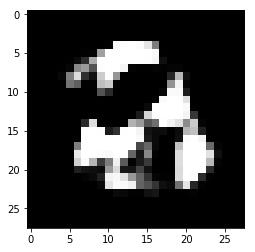

Loop: 423100, Generator_loss: -0.0074913, Discriminator_loss: 0.0051262
Loop: 423200, Generator_loss: -0.0098156, Discriminator_loss: 0.0045579
Loop: 423300, Generator_loss: -0.010259, Discriminator_loss: 0.004179
Loop: 423400, Generator_loss: -0.004459, Discriminator_loss: 0.0028868
Loop: 423500, Generator_loss: -0.0043389, Discriminator_loss: 0.002022
Loop: 423600, Generator_loss: -0.0082069, Discriminator_loss: 0.0053914
Loop: 423700, Generator_loss: -0.0064455, Discriminator_loss: 0.0031887
Loop: 423800, Generator_loss: -0.0047375, Discriminator_loss: 0.0043999
Loop: 423900, Generator_loss: -0.0033155, Discriminator_loss: 0.0058458
Loop: 424000, Generator_loss: -0.012239, Discriminator_loss: 0.0046508


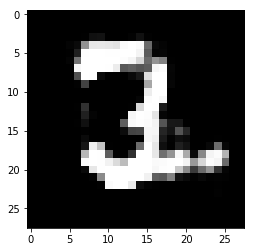

Loop: 424100, Generator_loss: -0.0094948, Discriminator_loss: 0.0028264
Loop: 424200, Generator_loss: -0.0091485, Discriminator_loss: 0.0036971
Loop: 424300, Generator_loss: -0.011321, Discriminator_loss: 0.0061332
Loop: 424400, Generator_loss: -0.006344, Discriminator_loss: 0.004555
Loop: 424500, Generator_loss: -0.0053126, Discriminator_loss: 0.0039829
Loop: 424600, Generator_loss: -0.0028759, Discriminator_loss: 0.0028416
Loop: 424700, Generator_loss: -0.0057012, Discriminator_loss: 0.0031359
Loop: 424800, Generator_loss: -0.012139, Discriminator_loss: 0.0024576
Loop: 424900, Generator_loss: -0.0023178, Discriminator_loss: 0.0038589
Loop: 425000, Generator_loss: -0.005665, Discriminator_loss: 0.0027026


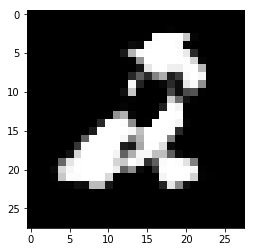

Loop: 425100, Generator_loss: -0.01314, Discriminator_loss: 0.0048839
Loop: 425200, Generator_loss: -0.00635, Discriminator_loss: 0.0024609
Loop: 425300, Generator_loss: -0.0084137, Discriminator_loss: 0.0031909
Loop: 425400, Generator_loss: -0.009946, Discriminator_loss: 0.0024734
Loop: 425500, Generator_loss: -0.0090284, Discriminator_loss: 0.0041097
Loop: 425600, Generator_loss: -0.0041751, Discriminator_loss: 0.0031635
Loop: 425700, Generator_loss: -0.0062954, Discriminator_loss: 0.0043971
Loop: 425800, Generator_loss: -0.0016731, Discriminator_loss: 0.0053309
Loop: 425900, Generator_loss: -0.0080912, Discriminator_loss: 0.0024637
Loop: 426000, Generator_loss: -0.0088356, Discriminator_loss: 0.0056106


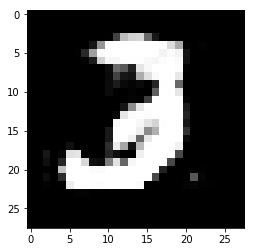

Loop: 426100, Generator_loss: -0.011345, Discriminator_loss: 0.0037803
Loop: 426200, Generator_loss: -0.0065504, Discriminator_loss: 0.0028511
Loop: 426300, Generator_loss: -0.0053172, Discriminator_loss: 0.0020916
Loop: 426400, Generator_loss: -0.0043874, Discriminator_loss: 0.0058512
Loop: 426500, Generator_loss: -0.0071779, Discriminator_loss: 0.0048416
Loop: 426600, Generator_loss: -0.012141, Discriminator_loss: 0.0030024
Loop: 426700, Generator_loss: -0.010083, Discriminator_loss: 0.0034866
Loop: 426800, Generator_loss: -0.0093904, Discriminator_loss: 0.0036648
Loop: 426900, Generator_loss: -0.0042244, Discriminator_loss: 0.0045105
Loop: 427000, Generator_loss: -0.0099166, Discriminator_loss: 0.0036772


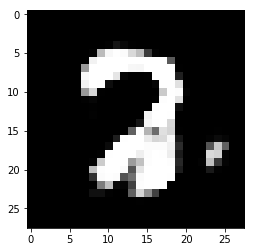

Loop: 427100, Generator_loss: -0.0084224, Discriminator_loss: 0.0044161
Loop: 427200, Generator_loss: -0.0042846, Discriminator_loss: 0.0033427
Loop: 427300, Generator_loss: -0.0067072, Discriminator_loss: 0.0047571
Loop: 427400, Generator_loss: -0.0058717, Discriminator_loss: 0.0027122
Loop: 427500, Generator_loss: -0.0028799, Discriminator_loss: 0.002612
Loop: 427600, Generator_loss: -0.0032416, Discriminator_loss: 0.0034228
Loop: 427700, Generator_loss: -0.010846, Discriminator_loss: 0.0034327
Loop: 427800, Generator_loss: -0.004827, Discriminator_loss: 0.0033914
Loop: 427900, Generator_loss: -0.0091358, Discriminator_loss: 0.0044357
Loop: 428000, Generator_loss: -0.0084713, Discriminator_loss: 0.0014123


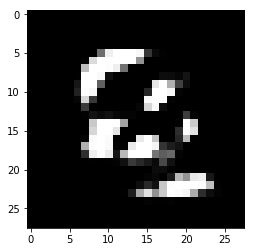

Loop: 428100, Generator_loss: -0.0033411, Discriminator_loss: 0.0045907
Loop: 428200, Generator_loss: -0.0071557, Discriminator_loss: 0.0016119
Loop: 428300, Generator_loss: -0.0062426, Discriminator_loss: 0.0015493
Loop: 428400, Generator_loss: -0.0050299, Discriminator_loss: 0.0029813
Loop: 428500, Generator_loss: -0.0042239, Discriminator_loss: 0.0030699
Loop: 428600, Generator_loss: -0.0057425, Discriminator_loss: 0.0032829
Loop: 428700, Generator_loss: -0.0072221, Discriminator_loss: 0.0064685
Loop: 428800, Generator_loss: -0.0095848, Discriminator_loss: 0.0041972
Loop: 428900, Generator_loss: -0.0068121, Discriminator_loss: 0.0028254
Loop: 429000, Generator_loss: -0.0063682, Discriminator_loss: 0.0042805


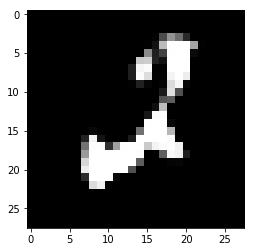

Loop: 429100, Generator_loss: -0.0083307, Discriminator_loss: 0.0024671
Loop: 429200, Generator_loss: -0.011819, Discriminator_loss: 0.0045197
Loop: 429300, Generator_loss: -0.0066261, Discriminator_loss: 0.0029591
Loop: 429400, Generator_loss: -0.0091965, Discriminator_loss: 0.001443
Loop: 429500, Generator_loss: -0.00028714, Discriminator_loss: 0.0042546
Loop: 429600, Generator_loss: -0.005544, Discriminator_loss: 0.0054411
Loop: 429700, Generator_loss: -0.0060521, Discriminator_loss: 0.0052754
Loop: 429800, Generator_loss: -0.0088894, Discriminator_loss: 0.0019589
Loop: 429900, Generator_loss: -0.006045, Discriminator_loss: 0.0031632
Loop: 430000, Generator_loss: -0.0045354, Discriminator_loss: 0.0035657


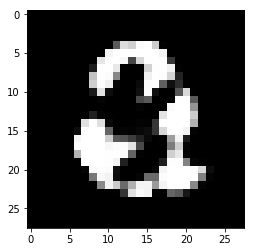

Loop: 430100, Generator_loss: -0.0064634, Discriminator_loss: 0.0026923
Loop: 430200, Generator_loss: -0.008461, Discriminator_loss: 0.0033328
Loop: 430300, Generator_loss: -0.010066, Discriminator_loss: 0.0030151
Loop: 430400, Generator_loss: -0.010392, Discriminator_loss: 0.0025055
Loop: 430500, Generator_loss: -0.0063932, Discriminator_loss: 0.0037227
Loop: 430600, Generator_loss: -0.011192, Discriminator_loss: 0.0050996
Loop: 430700, Generator_loss: -0.011998, Discriminator_loss: 0.0030767
Loop: 430800, Generator_loss: -0.0088401, Discriminator_loss: 0.0060377
Loop: 430900, Generator_loss: -0.0081675, Discriminator_loss: 0.0032946
Loop: 431000, Generator_loss: -0.0087351, Discriminator_loss: 0.0048918


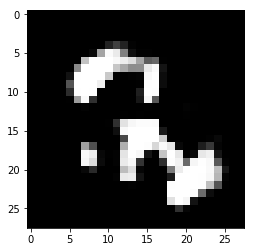

Loop: 431100, Generator_loss: -0.0090792, Discriminator_loss: 0.0039204
Loop: 431200, Generator_loss: -0.0069308, Discriminator_loss: 0.0048298
Loop: 431300, Generator_loss: -0.0067762, Discriminator_loss: 0.0036348
Loop: 431400, Generator_loss: -0.0036932, Discriminator_loss: 0.0022809
Loop: 431500, Generator_loss: -0.0076224, Discriminator_loss: 0.0019144
Loop: 431600, Generator_loss: -0.0031919, Discriminator_loss: 0.0033826
Loop: 431700, Generator_loss: -0.0019624, Discriminator_loss: 0.0035481
Loop: 431800, Generator_loss: -0.0089005, Discriminator_loss: 0.0038048
Loop: 431900, Generator_loss: -0.0049187, Discriminator_loss: 0.0024029
Loop: 432000, Generator_loss: -0.0067236, Discriminator_loss: 0.0051074


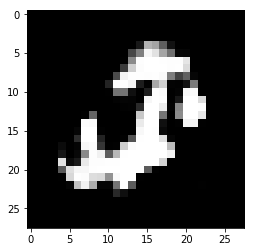

Loop: 432100, Generator_loss: -0.01239, Discriminator_loss: 0.0041431
Loop: 432200, Generator_loss: -0.0054034, Discriminator_loss: 0.0033494
Loop: 432300, Generator_loss: -0.0040741, Discriminator_loss: 0.0048991
Loop: 432400, Generator_loss: -0.0077684, Discriminator_loss: 0.0038454
Loop: 432500, Generator_loss: -0.0081144, Discriminator_loss: 0.0051589
Loop: 432600, Generator_loss: -0.007676, Discriminator_loss: 0.0026318
Loop: 432700, Generator_loss: -0.0060853, Discriminator_loss: 0.0055688
Loop: 432800, Generator_loss: -0.015851, Discriminator_loss: 0.003604
Loop: 432900, Generator_loss: -0.0049561, Discriminator_loss: 0.0031513
Loop: 433000, Generator_loss: -0.0077276, Discriminator_loss: 0.0030269


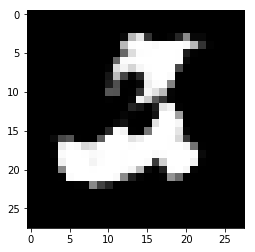

Loop: 433100, Generator_loss: -0.0088203, Discriminator_loss: 0.0021136
Loop: 433200, Generator_loss: -0.0080548, Discriminator_loss: 0.0023224
Loop: 433300, Generator_loss: -0.0078861, Discriminator_loss: 0.0025719
Loop: 433400, Generator_loss: -0.0089938, Discriminator_loss: 0.0031125
Loop: 433500, Generator_loss: -0.0081084, Discriminator_loss: 0.0011046
Loop: 433600, Generator_loss: -0.0028051, Discriminator_loss: 0.0021021
Loop: 433700, Generator_loss: -0.0087809, Discriminator_loss: 0.0037045
Loop: 433800, Generator_loss: -0.011897, Discriminator_loss: 0.0042067
Loop: 433900, Generator_loss: -0.0069124, Discriminator_loss: 0.0034951
Loop: 434000, Generator_loss: -0.0053392, Discriminator_loss: 0.0052181


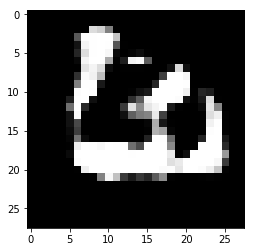

Loop: 434100, Generator_loss: -0.0059751, Discriminator_loss: 0.0038083
Loop: 434200, Generator_loss: -0.0033044, Discriminator_loss: 0.003324
Loop: 434300, Generator_loss: -0.0073079, Discriminator_loss: 0.0033805
Loop: 434400, Generator_loss: -0.0015462, Discriminator_loss: 0.0016611
Loop: 434500, Generator_loss: -0.01098, Discriminator_loss: 0.0031453
Loop: 434600, Generator_loss: -0.0061093, Discriminator_loss: 0.0048294
Loop: 434700, Generator_loss: -0.0057062, Discriminator_loss: 0.003429
Loop: 434800, Generator_loss: -0.0081924, Discriminator_loss: 0.0040592
Loop: 434900, Generator_loss: -0.010992, Discriminator_loss: 0.0045191
Loop: 435000, Generator_loss: -0.012389, Discriminator_loss: 0.0025635


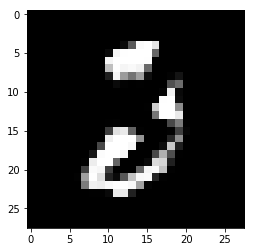

Loop: 435100, Generator_loss: -0.010449, Discriminator_loss: 0.0019702
Loop: 435200, Generator_loss: -0.0067375, Discriminator_loss: 0.00080238
Loop: 435300, Generator_loss: -0.014307, Discriminator_loss: 0.0029613
Loop: 435400, Generator_loss: -0.0025839, Discriminator_loss: 0.0041155
Loop: 435500, Generator_loss: -0.011329, Discriminator_loss: 0.0041462
Loop: 435600, Generator_loss: -0.003777, Discriminator_loss: 0.002907
Loop: 435700, Generator_loss: 0.00037045, Discriminator_loss: 0.0029517
Loop: 435800, Generator_loss: -0.0084809, Discriminator_loss: 0.0041105
Loop: 435900, Generator_loss: -0.0089268, Discriminator_loss: 0.0018097
Loop: 436000, Generator_loss: -0.0046587, Discriminator_loss: 0.0059749


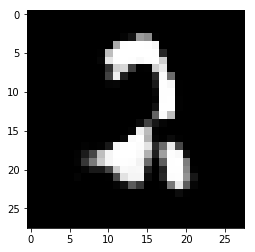

Loop: 436100, Generator_loss: -0.010967, Discriminator_loss: 0.0030993
Loop: 436200, Generator_loss: -0.00065053, Discriminator_loss: 0.0025721
Loop: 436300, Generator_loss: -0.010121, Discriminator_loss: 0.0019152
Loop: 436400, Generator_loss: -0.0091667, Discriminator_loss: 0.0035587
Loop: 436500, Generator_loss: -0.0094565, Discriminator_loss: 0.0026332
Loop: 436600, Generator_loss: -0.0086598, Discriminator_loss: 0.0021528
Loop: 436700, Generator_loss: -0.008055, Discriminator_loss: 0.0046066
Loop: 436800, Generator_loss: -0.0056312, Discriminator_loss: 0.0067507
Loop: 436900, Generator_loss: -0.0049416, Discriminator_loss: 0.0029144
Loop: 437000, Generator_loss: -0.0070922, Discriminator_loss: 0.0039696


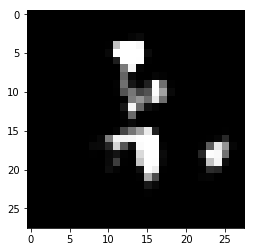

Loop: 437100, Generator_loss: -0.009889, Discriminator_loss: 0.0012169
Loop: 437200, Generator_loss: -0.0060301, Discriminator_loss: 0.00072983
Loop: 437300, Generator_loss: -0.0056081, Discriminator_loss: 0.0034252
Loop: 437400, Generator_loss: -0.006011, Discriminator_loss: 0.0050609
Loop: 437500, Generator_loss: -0.0018142, Discriminator_loss: 0.0030355
Loop: 437600, Generator_loss: -0.0047582, Discriminator_loss: 0.0041109
Loop: 437700, Generator_loss: -0.0047105, Discriminator_loss: 0.0039654
Loop: 437800, Generator_loss: -0.0041358, Discriminator_loss: 0.0047859
Loop: 437900, Generator_loss: -0.00031358, Discriminator_loss: 0.0048755
Loop: 438000, Generator_loss: -0.0085783, Discriminator_loss: 0.0045624


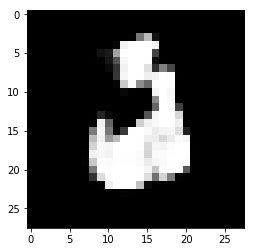

Loop: 438100, Generator_loss: -0.0048759, Discriminator_loss: 0.0033106
Loop: 438200, Generator_loss: -0.010852, Discriminator_loss: 0.0036993
Loop: 438300, Generator_loss: -0.0084302, Discriminator_loss: 0.0026794
Loop: 438400, Generator_loss: -0.0040593, Discriminator_loss: 0.0031445
Loop: 438500, Generator_loss: -0.0092059, Discriminator_loss: 0.0046972
Loop: 438600, Generator_loss: -0.0057846, Discriminator_loss: 0.0043462
Loop: 438700, Generator_loss: -0.0066315, Discriminator_loss: 0.0040899
Loop: 438800, Generator_loss: -0.0088442, Discriminator_loss: 0.0029269
Loop: 438900, Generator_loss: -0.0087371, Discriminator_loss: 0.0026792
Loop: 439000, Generator_loss: -0.0086111, Discriminator_loss: 0.0027483


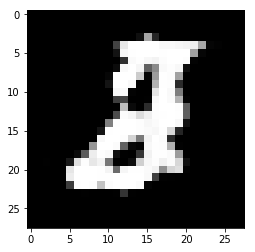

Loop: 439100, Generator_loss: -0.0049974, Discriminator_loss: 0.0038954
Loop: 439200, Generator_loss: -0.0066377, Discriminator_loss: 0.0064427
Loop: 439300, Generator_loss: -0.0079308, Discriminator_loss: 0.0030485
Loop: 439400, Generator_loss: -0.0046187, Discriminator_loss: 0.0025152
Loop: 439500, Generator_loss: -0.0054317, Discriminator_loss: 0.0045295
Loop: 439600, Generator_loss: -0.0094861, Discriminator_loss: 0.00070685
Loop: 439700, Generator_loss: -0.0076788, Discriminator_loss: 0.006142
Loop: 439800, Generator_loss: -0.0078723, Discriminator_loss: 0.0028981
Loop: 439900, Generator_loss: -0.0019152, Discriminator_loss: 0.0031081
Loop: 440000, Generator_loss: -0.0043042, Discriminator_loss: 0.0034385


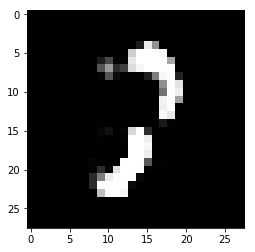

Loop: 440100, Generator_loss: -0.0011384, Discriminator_loss: 0.0028016
Loop: 440200, Generator_loss: -0.0064669, Discriminator_loss: 0.003118
Loop: 440300, Generator_loss: -0.011373, Discriminator_loss: 0.0014887
Loop: 440400, Generator_loss: -0.0061865, Discriminator_loss: 0.003798
Loop: 440500, Generator_loss: -0.010653, Discriminator_loss: 0.0031901
Loop: 440600, Generator_loss: -0.0022916, Discriminator_loss: 0.0060951
Loop: 440700, Generator_loss: -0.0021792, Discriminator_loss: 0.0048074
Loop: 440800, Generator_loss: -0.0073397, Discriminator_loss: 0.0048863
Loop: 440900, Generator_loss: -0.0059911, Discriminator_loss: 0.0037197
Loop: 441000, Generator_loss: 0.001586, Discriminator_loss: 0.0058604


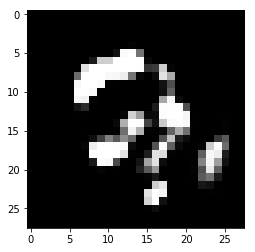

Loop: 441100, Generator_loss: -0.0047739, Discriminator_loss: 0.0039956
Loop: 441200, Generator_loss: -0.010228, Discriminator_loss: 0.0069499
Loop: 441300, Generator_loss: -0.0044587, Discriminator_loss: 0.0030565
Loop: 441400, Generator_loss: -0.00673, Discriminator_loss: 0.0025567
Loop: 441500, Generator_loss: -0.0065943, Discriminator_loss: 0.0038529
Loop: 441600, Generator_loss: -0.0021884, Discriminator_loss: 0.0030406
Loop: 441700, Generator_loss: -0.0061537, Discriminator_loss: 0.0026025
Loop: 441800, Generator_loss: -0.010783, Discriminator_loss: 0.0061658
Loop: 441900, Generator_loss: -0.0056053, Discriminator_loss: 0.0066608
Loop: 442000, Generator_loss: -0.0075584, Discriminator_loss: 0.0042421


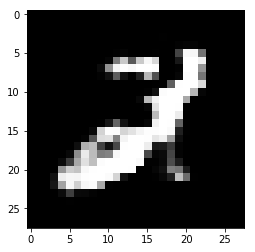

Loop: 442100, Generator_loss: -0.0012952, Discriminator_loss: 0.0048924
Loop: 442200, Generator_loss: -0.0051606, Discriminator_loss: 0.0040893
Loop: 442300, Generator_loss: -0.010273, Discriminator_loss: 0.0051362
Loop: 442400, Generator_loss: -0.0044209, Discriminator_loss: 0.0030124
Loop: 442500, Generator_loss: -0.0043088, Discriminator_loss: 0.0055395
Loop: 442600, Generator_loss: -0.0073435, Discriminator_loss: 0.0016537
Loop: 442700, Generator_loss: -0.013589, Discriminator_loss: 0.0020136
Loop: 442800, Generator_loss: -0.0017542, Discriminator_loss: 0.0028466
Loop: 442900, Generator_loss: -0.0073366, Discriminator_loss: 0.0022739
Loop: 443000, Generator_loss: -0.0079257, Discriminator_loss: 0.003267


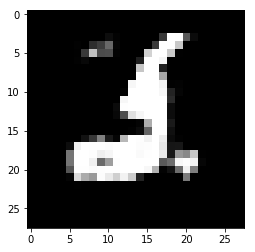

Loop: 443100, Generator_loss: -0.0049196, Discriminator_loss: 0.0032242
Loop: 443200, Generator_loss: -0.006634, Discriminator_loss: 0.0044824
Loop: 443300, Generator_loss: -0.0052811, Discriminator_loss: 0.0053575
Loop: 443400, Generator_loss: -0.0059657, Discriminator_loss: 0.0053592
Loop: 443500, Generator_loss: -0.0076745, Discriminator_loss: 0.0015062
Loop: 443600, Generator_loss: -0.0081756, Discriminator_loss: 0.0031309
Loop: 443700, Generator_loss: -0.0047459, Discriminator_loss: 0.0023846
Loop: 443800, Generator_loss: -0.0021339, Discriminator_loss: 0.0021689
Loop: 443900, Generator_loss: -0.0086774, Discriminator_loss: 0.0029975
Loop: 444000, Generator_loss: -0.0061238, Discriminator_loss: 0.00348


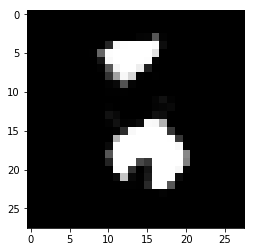

Loop: 444100, Generator_loss: -0.0069636, Discriminator_loss: 0.0049113
Loop: 444200, Generator_loss: -0.0076646, Discriminator_loss: 0.0010226
Loop: 444300, Generator_loss: -0.0045676, Discriminator_loss: 0.0048673
Loop: 444400, Generator_loss: -0.00085197, Discriminator_loss: 0.0049037
Loop: 444500, Generator_loss: -0.0037984, Discriminator_loss: 0.0028354
Loop: 444600, Generator_loss: -0.011181, Discriminator_loss: 0.002248
Loop: 444700, Generator_loss: -0.0065951, Discriminator_loss: 0.003976
Loop: 444800, Generator_loss: -0.0054174, Discriminator_loss: 0.0034151
Loop: 444900, Generator_loss: -0.0055753, Discriminator_loss: 0.0026848
Loop: 445000, Generator_loss: -0.0075893, Discriminator_loss: 0.0060013


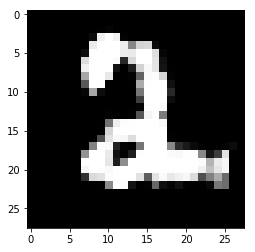

Loop: 445100, Generator_loss: -0.0112, Discriminator_loss: 0.0019309
Loop: 445200, Generator_loss: -0.0096195, Discriminator_loss: 0.0040815
Loop: 445300, Generator_loss: -0.0058835, Discriminator_loss: 0.0058029
Loop: 445400, Generator_loss: -0.011635, Discriminator_loss: 0.0035376
Loop: 445500, Generator_loss: -0.0066302, Discriminator_loss: 0.0039526
Loop: 445600, Generator_loss: -0.004786, Discriminator_loss: 0.0055414
Loop: 445700, Generator_loss: -0.0040662, Discriminator_loss: 0.0041799
Loop: 445800, Generator_loss: -0.0091493, Discriminator_loss: 0.0050548
Loop: 445900, Generator_loss: -0.0081336, Discriminator_loss: 0.0026079
Loop: 446000, Generator_loss: -0.0049014, Discriminator_loss: 0.0022848


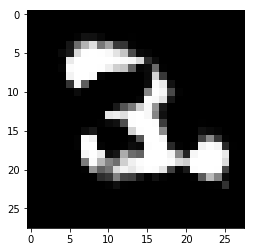

Loop: 446100, Generator_loss: -0.0053259, Discriminator_loss: 0.0027934
Loop: 446200, Generator_loss: -0.012321, Discriminator_loss: 0.0035254
Loop: 446300, Generator_loss: -0.0049542, Discriminator_loss: 0.0038145
Loop: 446400, Generator_loss: -0.0090342, Discriminator_loss: 0.0023442
Loop: 446500, Generator_loss: -0.0075198, Discriminator_loss: 0.0036557
Loop: 446600, Generator_loss: -0.0072672, Discriminator_loss: 0.0054323
Loop: 446700, Generator_loss: -0.0081358, Discriminator_loss: 0.0029548
Loop: 446800, Generator_loss: -0.0086595, Discriminator_loss: 0.0022769
Loop: 446900, Generator_loss: -0.0068812, Discriminator_loss: 0.0045201
Loop: 447000, Generator_loss: -0.0027749, Discriminator_loss: 0.0022802


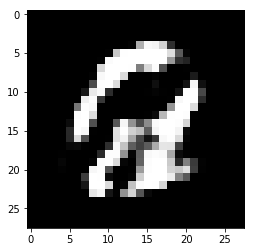

Loop: 447100, Generator_loss: -0.0098641, Discriminator_loss: 0.0056172
Loop: 447200, Generator_loss: -0.0086978, Discriminator_loss: 0.0032318
Loop: 447300, Generator_loss: -0.0066869, Discriminator_loss: 0.0020947
Loop: 447400, Generator_loss: -0.0066074, Discriminator_loss: 0.0065085
Loop: 447500, Generator_loss: -0.0064653, Discriminator_loss: 0.0042907
Loop: 447600, Generator_loss: -0.011491, Discriminator_loss: 0.0042464
Loop: 447700, Generator_loss: -0.0041489, Discriminator_loss: 0.0041275
Loop: 447800, Generator_loss: -0.0060237, Discriminator_loss: 0.0025285
Loop: 447900, Generator_loss: -0.0047965, Discriminator_loss: 0.0034389
Loop: 448000, Generator_loss: -0.0081186, Discriminator_loss: 0.0046135


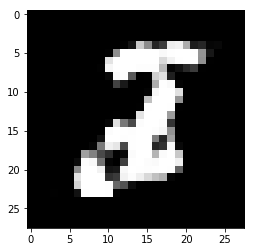

Loop: 448100, Generator_loss: -0.012399, Discriminator_loss: 0.0041593
Loop: 448200, Generator_loss: -0.003917, Discriminator_loss: 0.0014549
Loop: 448300, Generator_loss: -0.0027111, Discriminator_loss: 0.0058453
Loop: 448400, Generator_loss: -0.0043635, Discriminator_loss: 0.0020913
Loop: 448500, Generator_loss: -0.0094817, Discriminator_loss: 0.0047981
Loop: 448600, Generator_loss: -0.009839, Discriminator_loss: 0.0051135
Loop: 448700, Generator_loss: -0.007227, Discriminator_loss: 0.0043822
Loop: 448800, Generator_loss: -0.0067143, Discriminator_loss: 0.0048829
Loop: 448900, Generator_loss: -0.012257, Discriminator_loss: 0.0040288
Loop: 449000, Generator_loss: -0.0034379, Discriminator_loss: 0.0044688


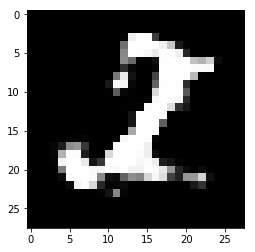

Loop: 449100, Generator_loss: -0.010014, Discriminator_loss: 7.5388e-05
Loop: 449200, Generator_loss: -0.013449, Discriminator_loss: 0.0063873
Loop: 449300, Generator_loss: -0.0039543, Discriminator_loss: 0.0043859
Loop: 449400, Generator_loss: -0.0094794, Discriminator_loss: 0.0042553
Loop: 449500, Generator_loss: -0.0012168, Discriminator_loss: 0.0024013
Loop: 449600, Generator_loss: -0.0093867, Discriminator_loss: 0.0042815
Loop: 449700, Generator_loss: -0.0047223, Discriminator_loss: 0.0049919
Loop: 449800, Generator_loss: -0.0063832, Discriminator_loss: 0.0039333
Loop: 449900, Generator_loss: -0.0048807, Discriminator_loss: 0.0022263
Loop: 450000, Generator_loss: -0.0079726, Discriminator_loss: 0.0039151


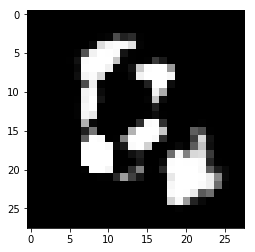

Loop: 450100, Generator_loss: -0.0079887, Discriminator_loss: 0.0031532
Loop: 450200, Generator_loss: -0.0069853, Discriminator_loss: 0.0035188
Loop: 450300, Generator_loss: -0.0069686, Discriminator_loss: 0.0052996
Loop: 450400, Generator_loss: -0.0090697, Discriminator_loss: 0.0043396
Loop: 450500, Generator_loss: -0.0079722, Discriminator_loss: 0.0052489
Loop: 450600, Generator_loss: -0.0047804, Discriminator_loss: 0.0035617
Loop: 450700, Generator_loss: -0.0070926, Discriminator_loss: 0.0038425
Loop: 450800, Generator_loss: -0.0072378, Discriminator_loss: 0.0025317
Loop: 450900, Generator_loss: -0.0050419, Discriminator_loss: 0.0043806
Loop: 451000, Generator_loss: -0.011327, Discriminator_loss: 0.0031917


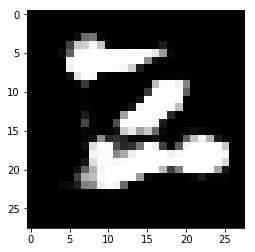

Loop: 451100, Generator_loss: -0.0096251, Discriminator_loss: 0.0031388
Loop: 451200, Generator_loss: -0.0076622, Discriminator_loss: 0.0041414
Loop: 451300, Generator_loss: -0.0053506, Discriminator_loss: 0.0037285
Loop: 451400, Generator_loss: -0.0043523, Discriminator_loss: 0.0047581
Loop: 451500, Generator_loss: -0.0098333, Discriminator_loss: 0.0036694
Loop: 451600, Generator_loss: -0.0067708, Discriminator_loss: 0.0059706
Loop: 451700, Generator_loss: -0.0075564, Discriminator_loss: 0.0037786
Loop: 451800, Generator_loss: -0.0065707, Discriminator_loss: 0.0040022
Loop: 451900, Generator_loss: -0.0073784, Discriminator_loss: 0.0026904
Loop: 452000, Generator_loss: -0.0064128, Discriminator_loss: 0.0033364


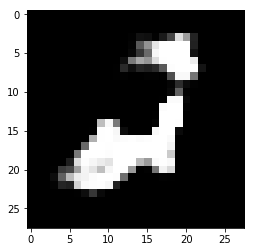

Loop: 452100, Generator_loss: -0.012678, Discriminator_loss: 0.005307
Loop: 452200, Generator_loss: -0.012026, Discriminator_loss: 0.004984
Loop: 452300, Generator_loss: -0.0073769, Discriminator_loss: 0.0020844
Loop: 452400, Generator_loss: -0.012663, Discriminator_loss: 0.0047486
Loop: 452500, Generator_loss: -0.0048715, Discriminator_loss: 0.0027012
Loop: 452600, Generator_loss: -0.0086746, Discriminator_loss: 0.0032168
Loop: 452700, Generator_loss: -0.0064356, Discriminator_loss: 0.0028862
Loop: 452800, Generator_loss: -0.014393, Discriminator_loss: 0.0025545
Loop: 452900, Generator_loss: -0.0071517, Discriminator_loss: 0.0048561
Loop: 453000, Generator_loss: -0.0069293, Discriminator_loss: 0.0038281


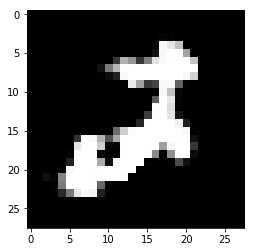

Loop: 453100, Generator_loss: -0.005846, Discriminator_loss: 0.0021291
Loop: 453200, Generator_loss: -0.0090393, Discriminator_loss: 0.0051044
Loop: 453300, Generator_loss: -0.014424, Discriminator_loss: 0.0053202
Loop: 453400, Generator_loss: -0.0030612, Discriminator_loss: 0.0047998
Loop: 453500, Generator_loss: -0.015142, Discriminator_loss: 0.0031014
Loop: 453600, Generator_loss: -0.012166, Discriminator_loss: 0.0046683
Loop: 453700, Generator_loss: -0.0089409, Discriminator_loss: 0.003265
Loop: 453800, Generator_loss: -0.0086237, Discriminator_loss: 0.0054442
Loop: 453900, Generator_loss: -0.0092676, Discriminator_loss: 0.0034056
Loop: 454000, Generator_loss: -0.0068368, Discriminator_loss: 0.0042181


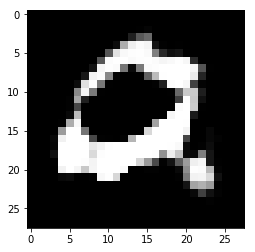

Loop: 454100, Generator_loss: -0.007696, Discriminator_loss: 0.002056
Loop: 454200, Generator_loss: -0.0020876, Discriminator_loss: 0.0035687
Loop: 454300, Generator_loss: -0.0031745, Discriminator_loss: 0.0028981
Loop: 454400, Generator_loss: -0.0091696, Discriminator_loss: 0.0026478
Loop: 454500, Generator_loss: -0.0083793, Discriminator_loss: 0.0011485
Loop: 454600, Generator_loss: -0.0060958, Discriminator_loss: 0.0043465
Loop: 454700, Generator_loss: -0.0082137, Discriminator_loss: 0.0032012
Loop: 454800, Generator_loss: -0.0072262, Discriminator_loss: 0.0036578
Loop: 454900, Generator_loss: -0.0082642, Discriminator_loss: 0.0032637
Loop: 455000, Generator_loss: -0.0026692, Discriminator_loss: 0.005148


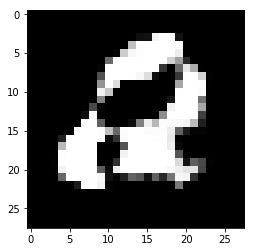

Loop: 455100, Generator_loss: -0.016463, Discriminator_loss: 0.0021722
Loop: 455200, Generator_loss: -0.00652, Discriminator_loss: 0.0023625
Loop: 455300, Generator_loss: -0.009935, Discriminator_loss: 0.0046454
Loop: 455400, Generator_loss: -0.0069349, Discriminator_loss: 0.0052959
Loop: 455500, Generator_loss: -0.0079211, Discriminator_loss: 0.0052632
Loop: 455600, Generator_loss: -0.010654, Discriminator_loss: 0.0028311
Loop: 455700, Generator_loss: -0.0040178, Discriminator_loss: 0.0029828
Loop: 455800, Generator_loss: -0.012668, Discriminator_loss: 0.0019833
Loop: 455900, Generator_loss: -0.010131, Discriminator_loss: 0.0034321
Loop: 456000, Generator_loss: -0.0075244, Discriminator_loss: 0.0040427


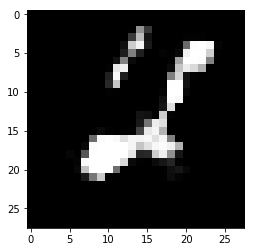

Loop: 456100, Generator_loss: -0.0041192, Discriminator_loss: 0.0042112
Loop: 456200, Generator_loss: -0.012866, Discriminator_loss: 0.0043359
Loop: 456300, Generator_loss: -0.010908, Discriminator_loss: 0.0038021
Loop: 456400, Generator_loss: -0.010009, Discriminator_loss: 0.0022053
Loop: 456500, Generator_loss: -0.0044699, Discriminator_loss: 0.0021052
Loop: 456600, Generator_loss: -0.0082065, Discriminator_loss: 0.0030955
Loop: 456700, Generator_loss: -0.0045275, Discriminator_loss: 0.003446
Loop: 456800, Generator_loss: -0.0063636, Discriminator_loss: 0.0022734
Loop: 456900, Generator_loss: -0.0084946, Discriminator_loss: 0.0054252
Loop: 457000, Generator_loss: -0.0078137, Discriminator_loss: 0.004467


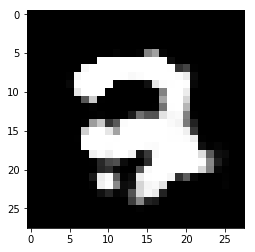

Loop: 457100, Generator_loss: -0.012999, Discriminator_loss: 0.0043393
Loop: 457200, Generator_loss: -0.0048467, Discriminator_loss: 0.0036382
Loop: 457300, Generator_loss: -0.0055824, Discriminator_loss: 0.0044011
Loop: 457400, Generator_loss: -0.008702, Discriminator_loss: 0.0049939
Loop: 457500, Generator_loss: -0.0073366, Discriminator_loss: 0.0052751
Loop: 457600, Generator_loss: -0.0066741, Discriminator_loss: 0.0038674
Loop: 457700, Generator_loss: -0.0070628, Discriminator_loss: 0.0027375
Loop: 457800, Generator_loss: -0.010304, Discriminator_loss: 0.0038758
Loop: 457900, Generator_loss: -0.0069674, Discriminator_loss: 0.0037672
Loop: 458000, Generator_loss: -0.0090867, Discriminator_loss: 0.0051713


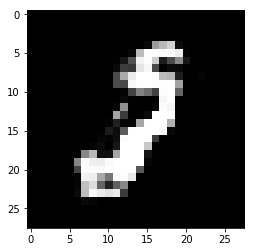

Loop: 458100, Generator_loss: -0.0084003, Discriminator_loss: 0.0026695
Loop: 458200, Generator_loss: -0.0072613, Discriminator_loss: 0.0022454
Loop: 458300, Generator_loss: -0.010859, Discriminator_loss: 0.004334
Loop: 458400, Generator_loss: -0.0078756, Discriminator_loss: 0.0043533
Loop: 458500, Generator_loss: -0.0094976, Discriminator_loss: 0.0045875
Loop: 458600, Generator_loss: -0.0044128, Discriminator_loss: 0.0017684
Loop: 458700, Generator_loss: -0.0023537, Discriminator_loss: 0.0027871
Loop: 458800, Generator_loss: -0.0075044, Discriminator_loss: 0.0031484
Loop: 458900, Generator_loss: -0.014026, Discriminator_loss: 0.0033474
Loop: 459000, Generator_loss: -0.008052, Discriminator_loss: 0.002831


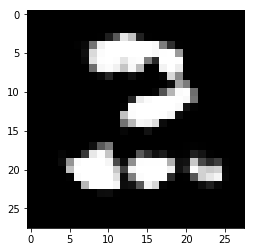

Loop: 459100, Generator_loss: -0.013069, Discriminator_loss: 0.0065087
Loop: 459200, Generator_loss: -0.013374, Discriminator_loss: 0.0036296
Loop: 459300, Generator_loss: -0.0084305, Discriminator_loss: 0.0025069
Loop: 459400, Generator_loss: -0.008424, Discriminator_loss: 0.0027571
Loop: 459500, Generator_loss: -0.011396, Discriminator_loss: 0.0052579
Loop: 459600, Generator_loss: -0.0083138, Discriminator_loss: 0.0040455
Loop: 459700, Generator_loss: -0.0024128, Discriminator_loss: 0.0047182
Loop: 459800, Generator_loss: -0.0090953, Discriminator_loss: 0.0036437
Loop: 459900, Generator_loss: -0.0052884, Discriminator_loss: 0.00057971
Loop: 460000, Generator_loss: -0.010422, Discriminator_loss: 0.0026915


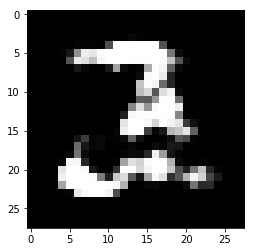

Loop: 460100, Generator_loss: -0.0084693, Discriminator_loss: 0.0046786
Loop: 460200, Generator_loss: -0.011399, Discriminator_loss: 0.0057848
Loop: 460300, Generator_loss: -0.0086436, Discriminator_loss: 0.0033336
Loop: 460400, Generator_loss: -0.012651, Discriminator_loss: 0.0031425
Loop: 460500, Generator_loss: -0.010189, Discriminator_loss: 0.0021623
Loop: 460600, Generator_loss: -0.0054433, Discriminator_loss: 0.0034032
Loop: 460700, Generator_loss: -0.0057535, Discriminator_loss: 0.0043947
Loop: 460800, Generator_loss: -0.01008, Discriminator_loss: 0.0037907
Loop: 460900, Generator_loss: -0.0069581, Discriminator_loss: 0.0011876
Loop: 461000, Generator_loss: -0.00433, Discriminator_loss: 0.0022163


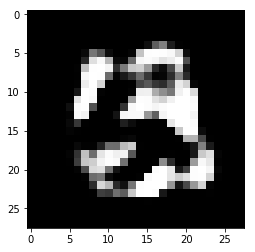

Loop: 461100, Generator_loss: -0.0071908, Discriminator_loss: 0.0035639
Loop: 461200, Generator_loss: -0.0096481, Discriminator_loss: 0.0017464
Loop: 461300, Generator_loss: -0.011336, Discriminator_loss: 0.0033721
Loop: 461400, Generator_loss: -0.0091343, Discriminator_loss: 0.002478
Loop: 461500, Generator_loss: -0.011551, Discriminator_loss: 0.0023187
Loop: 461600, Generator_loss: -0.0048689, Discriminator_loss: 0.005582
Loop: 461700, Generator_loss: -0.0076514, Discriminator_loss: 0.0038358
Loop: 461800, Generator_loss: -0.0094687, Discriminator_loss: 0.0035043
Loop: 461900, Generator_loss: -0.0082209, Discriminator_loss: 0.0033153
Loop: 462000, Generator_loss: -0.00026682, Discriminator_loss: 0.0062241


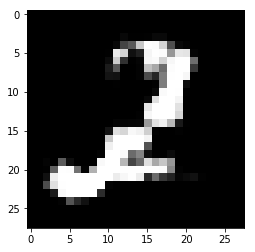

Loop: 462100, Generator_loss: -0.0099152, Discriminator_loss: 0.0034652
Loop: 462200, Generator_loss: -0.011918, Discriminator_loss: 0.0043286
Loop: 462300, Generator_loss: -0.008869, Discriminator_loss: 0.0034525
Loop: 462400, Generator_loss: -0.010262, Discriminator_loss: 0.0023401
Loop: 462500, Generator_loss: -0.0062423, Discriminator_loss: 0.0048238
Loop: 462600, Generator_loss: -0.010453, Discriminator_loss: 0.0028813
Loop: 462700, Generator_loss: -0.012465, Discriminator_loss: 0.0021362
Loop: 462800, Generator_loss: -0.011488, Discriminator_loss: 0.0036782
Loop: 462900, Generator_loss: -0.007492, Discriminator_loss: 0.0030691
Loop: 463000, Generator_loss: -0.0025485, Discriminator_loss: 0.0037447


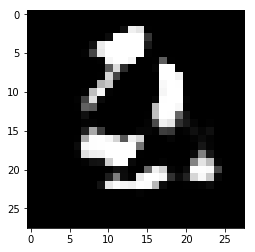

Loop: 463100, Generator_loss: -0.0063658, Discriminator_loss: 0.0042671
Loop: 463200, Generator_loss: -0.0087893, Discriminator_loss: 0.0021448
Loop: 463300, Generator_loss: -0.01104, Discriminator_loss: 0.0052973
Loop: 463400, Generator_loss: -0.010837, Discriminator_loss: 0.0059673
Loop: 463500, Generator_loss: -0.0068201, Discriminator_loss: 0.0029882
Loop: 463600, Generator_loss: -0.0066785, Discriminator_loss: 0.0032843
Loop: 463700, Generator_loss: -0.0083497, Discriminator_loss: 0.010229
Loop: 463800, Generator_loss: -0.0031837, Discriminator_loss: 0.0051007
Loop: 463900, Generator_loss: -0.0055505, Discriminator_loss: 0.0047105
Loop: 464000, Generator_loss: -0.012136, Discriminator_loss: 1.4759e-05


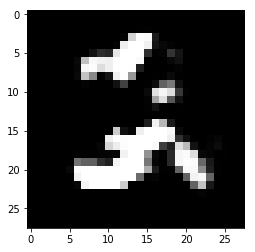

Loop: 464100, Generator_loss: -0.0047421, Discriminator_loss: 0.0039536
Loop: 464200, Generator_loss: -0.0016688, Discriminator_loss: 0.0041466
Loop: 464300, Generator_loss: -0.011028, Discriminator_loss: 0.0039081
Loop: 464400, Generator_loss: -0.0063639, Discriminator_loss: 0.0026554
Loop: 464500, Generator_loss: -0.0065395, Discriminator_loss: 0.003924
Loop: 464600, Generator_loss: -0.01218, Discriminator_loss: 0.004836
Loop: 464700, Generator_loss: -0.0080818, Discriminator_loss: 0.0042354
Loop: 464800, Generator_loss: -0.0073835, Discriminator_loss: 0.0038357
Loop: 464900, Generator_loss: -0.0045983, Discriminator_loss: 0.0038481
Loop: 465000, Generator_loss: -0.0036374, Discriminator_loss: 0.0031009


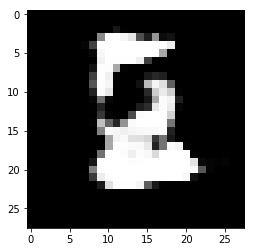

Loop: 465100, Generator_loss: -0.0095884, Discriminator_loss: 0.0049087
Loop: 465200, Generator_loss: -0.0099812, Discriminator_loss: 0.0058243
Loop: 465300, Generator_loss: -0.0080734, Discriminator_loss: 0.0037288
Loop: 465400, Generator_loss: -0.014103, Discriminator_loss: 0.0044662
Loop: 465500, Generator_loss: -0.0096939, Discriminator_loss: 0.0032857
Loop: 465600, Generator_loss: -0.0051608, Discriminator_loss: 0.002159
Loop: 465700, Generator_loss: -0.0085505, Discriminator_loss: 0.0039873
Loop: 465800, Generator_loss: -0.010698, Discriminator_loss: 0.003606
Loop: 465900, Generator_loss: -0.0069491, Discriminator_loss: 0.0040376
Loop: 466000, Generator_loss: -0.01213, Discriminator_loss: 0.0022083


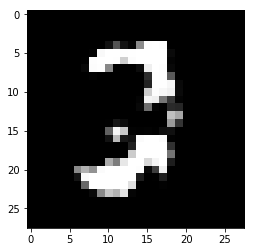

Loop: 466100, Generator_loss: -0.008666, Discriminator_loss: 0.0040297
Loop: 466200, Generator_loss: -0.0053023, Discriminator_loss: 0.0033919
Loop: 466300, Generator_loss: -0.011968, Discriminator_loss: 0.0038793
Loop: 466400, Generator_loss: -0.0066105, Discriminator_loss: 0.0024871
Loop: 466500, Generator_loss: -0.0071186, Discriminator_loss: 0.0036601
Loop: 466600, Generator_loss: -0.0092528, Discriminator_loss: 0.0045035
Loop: 466700, Generator_loss: -0.0059542, Discriminator_loss: 0.0047481
Loop: 466800, Generator_loss: -0.0081994, Discriminator_loss: 0.0035973
Loop: 466900, Generator_loss: -0.010821, Discriminator_loss: 0.0011806
Loop: 467000, Generator_loss: -0.0097921, Discriminator_loss: 0.0033368


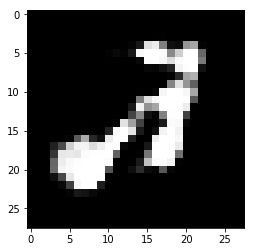

Loop: 467100, Generator_loss: -0.013095, Discriminator_loss: 0.0052866
Loop: 467200, Generator_loss: -0.0046777, Discriminator_loss: 0.0029768
Loop: 467300, Generator_loss: -0.0091231, Discriminator_loss: 0.0046674
Loop: 467400, Generator_loss: -0.011039, Discriminator_loss: 0.0040317
Loop: 467500, Generator_loss: -0.0052037, Discriminator_loss: 0.0021211
Loop: 467600, Generator_loss: -0.0054622, Discriminator_loss: 0.0029839
Loop: 467700, Generator_loss: -0.0077655, Discriminator_loss: 0.0045176
Loop: 467800, Generator_loss: -0.0022153, Discriminator_loss: 0.0022696
Loop: 467900, Generator_loss: -0.0022647, Discriminator_loss: 0.0041219
Loop: 468000, Generator_loss: -0.0067617, Discriminator_loss: 0.001541


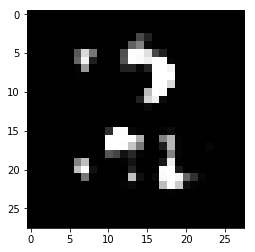

Loop: 468100, Generator_loss: -0.010729, Discriminator_loss: 0.00080812
Loop: 468200, Generator_loss: -0.0044004, Discriminator_loss: 0.0024797
Loop: 468300, Generator_loss: -0.0079642, Discriminator_loss: 0.005187
Loop: 468400, Generator_loss: -0.015658, Discriminator_loss: 0.0021357
Loop: 468500, Generator_loss: -0.0053974, Discriminator_loss: 0.0042959
Loop: 468600, Generator_loss: -0.010654, Discriminator_loss: 0.00064478
Loop: 468700, Generator_loss: -0.0026994, Discriminator_loss: 0.0046306
Loop: 468800, Generator_loss: -0.005076, Discriminator_loss: 0.0042033
Loop: 468900, Generator_loss: -0.0075451, Discriminator_loss: 0.0027937
Loop: 469000, Generator_loss: -0.0113, Discriminator_loss: 0.0039447


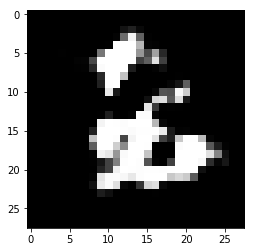

Loop: 469100, Generator_loss: -0.006933, Discriminator_loss: 0.0043891
Loop: 469200, Generator_loss: -0.0075171, Discriminator_loss: 0.0020629
Loop: 469300, Generator_loss: -0.0074484, Discriminator_loss: 0.0052985
Loop: 469400, Generator_loss: -0.012156, Discriminator_loss: 0.0063798
Loop: 469500, Generator_loss: -0.00861, Discriminator_loss: 0.0033687
Loop: 469600, Generator_loss: -0.0072158, Discriminator_loss: 0.0028362
Loop: 469700, Generator_loss: -0.0092866, Discriminator_loss: 0.0033762
Loop: 469800, Generator_loss: -0.010671, Discriminator_loss: 0.0026711
Loop: 469900, Generator_loss: -0.011113, Discriminator_loss: 0.0010336
Loop: 470000, Generator_loss: -0.006732, Discriminator_loss: 0.0032448


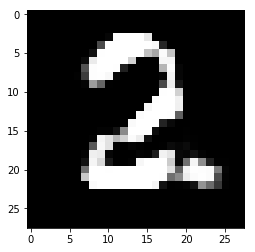

Loop: 470100, Generator_loss: -0.0073137, Discriminator_loss: 0.0023454
Loop: 470200, Generator_loss: -0.0040996, Discriminator_loss: 0.0041219
Loop: 470300, Generator_loss: -0.0088118, Discriminator_loss: 0.0031975
Loop: 470400, Generator_loss: -0.011328, Discriminator_loss: 0.0063767
Loop: 470500, Generator_loss: -0.0060197, Discriminator_loss: 0.0043354
Loop: 470600, Generator_loss: -0.0098538, Discriminator_loss: 0.0027369
Loop: 470700, Generator_loss: -0.0051278, Discriminator_loss: 0.0053226
Loop: 470800, Generator_loss: -0.0053486, Discriminator_loss: 0.0044579
Loop: 470900, Generator_loss: -0.0087426, Discriminator_loss: 0.002654
Loop: 471000, Generator_loss: -0.0054589, Discriminator_loss: 0.0035861


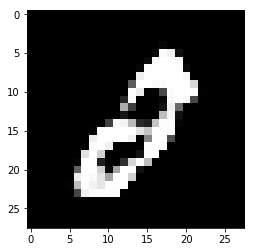

Loop: 471100, Generator_loss: -0.0067264, Discriminator_loss: 0.0041977
Loop: 471200, Generator_loss: -0.0051971, Discriminator_loss: 0.0033617
Loop: 471300, Generator_loss: -0.0040846, Discriminator_loss: 0.0012764
Loop: 471400, Generator_loss: -0.0035904, Discriminator_loss: 0.0037872
Loop: 471500, Generator_loss: -0.0096782, Discriminator_loss: 0.0020901
Loop: 471600, Generator_loss: -0.0086192, Discriminator_loss: 0.0046133
Loop: 471700, Generator_loss: -0.0082015, Discriminator_loss: 0.0050509
Loop: 471800, Generator_loss: -0.0067712, Discriminator_loss: 0.0044931
Loop: 471900, Generator_loss: -0.0072331, Discriminator_loss: 0.0032665
Loop: 472000, Generator_loss: -0.0074976, Discriminator_loss: 0.0031762


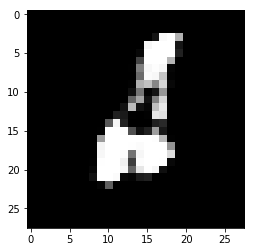

Loop: 472100, Generator_loss: -0.009318, Discriminator_loss: 0.0029292
Loop: 472200, Generator_loss: -0.0032691, Discriminator_loss: 0.0042013
Loop: 472300, Generator_loss: -0.0089554, Discriminator_loss: 0.0012017
Loop: 472400, Generator_loss: -0.013071, Discriminator_loss: 0.0040824
Loop: 472500, Generator_loss: -0.0048511, Discriminator_loss: 0.0049598
Loop: 472600, Generator_loss: -0.0077727, Discriminator_loss: 0.0034384
Loop: 472700, Generator_loss: -0.0074345, Discriminator_loss: 0.002215
Loop: 472800, Generator_loss: -0.0093435, Discriminator_loss: 0.0019519
Loop: 472900, Generator_loss: -0.0075777, Discriminator_loss: 0.0035256
Loop: 473000, Generator_loss: -0.0059167, Discriminator_loss: 0.0023531


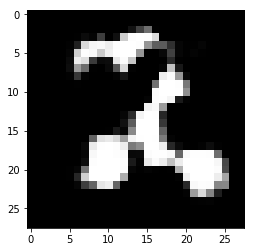

Loop: 473100, Generator_loss: -0.013081, Discriminator_loss: 0.005515
Loop: 473200, Generator_loss: -0.0084608, Discriminator_loss: 0.0020336
Loop: 473300, Generator_loss: -0.011712, Discriminator_loss: 0.0039185
Loop: 473400, Generator_loss: -0.0099028, Discriminator_loss: 0.0042511
Loop: 473500, Generator_loss: -0.0084241, Discriminator_loss: 0.0020912
Loop: 473600, Generator_loss: -0.0078067, Discriminator_loss: 0.0036448
Loop: 473700, Generator_loss: -0.0094794, Discriminator_loss: 0.004946
Loop: 473800, Generator_loss: -0.0089277, Discriminator_loss: 0.0049649
Loop: 473900, Generator_loss: -0.0095073, Discriminator_loss: 0.005059
Loop: 474000, Generator_loss: -0.0019153, Discriminator_loss: 0.0050829


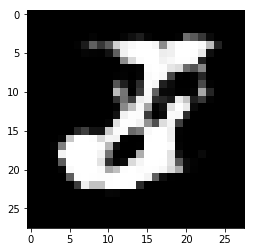

Loop: 474100, Generator_loss: -0.0082506, Discriminator_loss: 0.0020382
Loop: 474200, Generator_loss: -0.0089576, Discriminator_loss: 0.005169
Loop: 474300, Generator_loss: -0.010179, Discriminator_loss: 0.0031044
Loop: 474400, Generator_loss: -0.0084492, Discriminator_loss: 0.003447
Loop: 474500, Generator_loss: -0.01156, Discriminator_loss: 0.0042323
Loop: 474600, Generator_loss: -0.01043, Discriminator_loss: 0.002051
Loop: 474700, Generator_loss: -0.0050004, Discriminator_loss: 0.0030928
Loop: 474800, Generator_loss: -0.0067602, Discriminator_loss: 0.0044924
Loop: 474900, Generator_loss: -0.010994, Discriminator_loss: 0.0010157
Loop: 475000, Generator_loss: -0.0041556, Discriminator_loss: 0.0023816


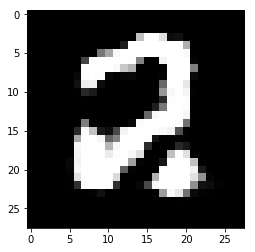

Loop: 475100, Generator_loss: -0.0069212, Discriminator_loss: 0.006631
Loop: 475200, Generator_loss: -0.01091, Discriminator_loss: 0.0052076
Loop: 475300, Generator_loss: -0.0050474, Discriminator_loss: 0.0012725
Loop: 475400, Generator_loss: -0.010579, Discriminator_loss: 0.0041075
Loop: 475500, Generator_loss: -0.0096043, Discriminator_loss: 0.0032856
Loop: 475600, Generator_loss: -0.010102, Discriminator_loss: 0.0038775
Loop: 475700, Generator_loss: -0.012038, Discriminator_loss: 0.0035673
Loop: 475800, Generator_loss: -0.0073068, Discriminator_loss: 0.0040858
Loop: 475900, Generator_loss: -0.010433, Discriminator_loss: 0.003733
Loop: 476000, Generator_loss: -0.011708, Discriminator_loss: 0.0027862


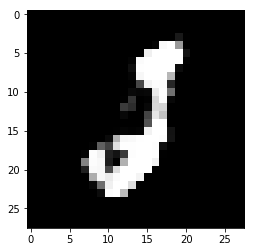

Loop: 476100, Generator_loss: -0.0091414, Discriminator_loss: 0.0024999
Loop: 476200, Generator_loss: -0.0067824, Discriminator_loss: 0.0041625
Loop: 476300, Generator_loss: -0.0038681, Discriminator_loss: 0.002278
Loop: 476400, Generator_loss: -0.0054881, Discriminator_loss: 0.0046513
Loop: 476500, Generator_loss: -0.010151, Discriminator_loss: 0.001483
Loop: 476600, Generator_loss: -0.011722, Discriminator_loss: 0.0032255
Loop: 476700, Generator_loss: -0.014567, Discriminator_loss: 0.0030136
Loop: 476800, Generator_loss: -0.011217, Discriminator_loss: 0.0051244
Loop: 476900, Generator_loss: -0.01052, Discriminator_loss: 0.0033399
Loop: 477000, Generator_loss: -0.011228, Discriminator_loss: 0.0022373


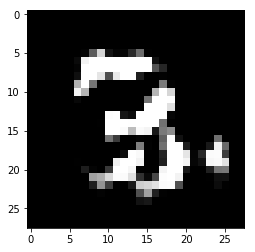

Loop: 477100, Generator_loss: -0.0092473, Discriminator_loss: 0.003306
Loop: 477200, Generator_loss: -0.012403, Discriminator_loss: 0.004263
Loop: 477300, Generator_loss: -0.0075658, Discriminator_loss: 0.0044356
Loop: 477400, Generator_loss: -0.0080919, Discriminator_loss: 0.004266
Loop: 477500, Generator_loss: -0.0085647, Discriminator_loss: 0.0050843
Loop: 477600, Generator_loss: -0.0099851, Discriminator_loss: 0.0034592
Loop: 477700, Generator_loss: -0.011735, Discriminator_loss: 0.0034552
Loop: 477800, Generator_loss: -0.009844, Discriminator_loss: 0.0033685
Loop: 477900, Generator_loss: -0.0075873, Discriminator_loss: 0.0038927
Loop: 478000, Generator_loss: -0.0028998, Discriminator_loss: 0.0047596


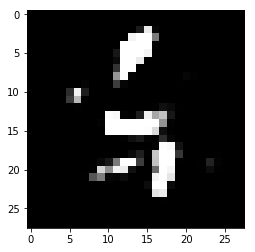

Loop: 478100, Generator_loss: -0.0098805, Discriminator_loss: 0.0044114
Loop: 478200, Generator_loss: -0.0079332, Discriminator_loss: 0.0022595
Loop: 478300, Generator_loss: -0.0082045, Discriminator_loss: 0.003444
Loop: 478400, Generator_loss: -0.004981, Discriminator_loss: 0.0041941
Loop: 478500, Generator_loss: -0.0096692, Discriminator_loss: 0.0036306
Loop: 478600, Generator_loss: -0.0076493, Discriminator_loss: 0.0032821
Loop: 478700, Generator_loss: -0.010389, Discriminator_loss: 0.0026052
Loop: 478800, Generator_loss: -0.013399, Discriminator_loss: 0.0037017
Loop: 478900, Generator_loss: -0.0090354, Discriminator_loss: 0.0056422
Loop: 479000, Generator_loss: -0.0054212, Discriminator_loss: 0.0039391


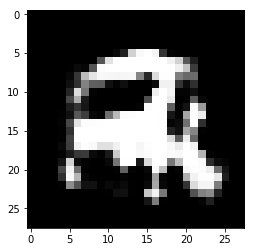

Loop: 479100, Generator_loss: -0.012015, Discriminator_loss: 0.0024154
Loop: 479200, Generator_loss: -0.011263, Discriminator_loss: 0.0036397
Loop: 479300, Generator_loss: -0.010431, Discriminator_loss: 0.0037966
Loop: 479400, Generator_loss: -0.0058157, Discriminator_loss: 0.0045753
Loop: 479500, Generator_loss: -0.0093582, Discriminator_loss: 0.0051516
Loop: 479600, Generator_loss: -0.0070513, Discriminator_loss: 0.0022099
Loop: 479700, Generator_loss: -0.0079766, Discriminator_loss: 0.0031526
Loop: 479800, Generator_loss: -0.010186, Discriminator_loss: 0.0026448
Loop: 479900, Generator_loss: -0.0082055, Discriminator_loss: 0.0024308
Loop: 480000, Generator_loss: -0.008701, Discriminator_loss: 0.0056558


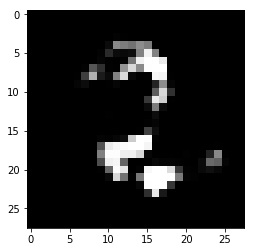

Loop: 480100, Generator_loss: -0.0055131, Discriminator_loss: 0.0030014
Loop: 480200, Generator_loss: -0.014147, Discriminator_loss: 0.0044375
Loop: 480300, Generator_loss: -0.010856, Discriminator_loss: 0.0032239
Loop: 480400, Generator_loss: -0.0077867, Discriminator_loss: 0.0032431
Loop: 480500, Generator_loss: -0.0083718, Discriminator_loss: 0.0021294
Loop: 480600, Generator_loss: -0.0049067, Discriminator_loss: 0.0023709
Loop: 480700, Generator_loss: -0.012148, Discriminator_loss: 0.0036335
Loop: 480800, Generator_loss: -0.0062749, Discriminator_loss: 0.0051029
Loop: 480900, Generator_loss: -0.011622, Discriminator_loss: 0.0020372
Loop: 481000, Generator_loss: -0.011752, Discriminator_loss: 0.0043891


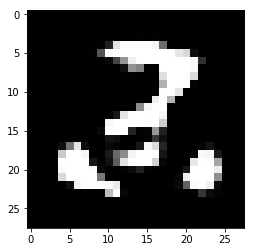

Loop: 481100, Generator_loss: -0.0031142, Discriminator_loss: 0.0040556
Loop: 481200, Generator_loss: -0.01109, Discriminator_loss: 0.0030738
Loop: 481300, Generator_loss: -0.0088652, Discriminator_loss: 0.0045607
Loop: 481400, Generator_loss: -0.0077936, Discriminator_loss: 0.0039284
Loop: 481500, Generator_loss: -0.0089077, Discriminator_loss: 0.0070771
Loop: 481600, Generator_loss: -0.0075825, Discriminator_loss: 0.0046001
Loop: 481700, Generator_loss: -0.0094722, Discriminator_loss: 0.0022794
Loop: 481800, Generator_loss: -0.013163, Discriminator_loss: 0.0032437
Loop: 481900, Generator_loss: -0.011765, Discriminator_loss: 0.0050057
Loop: 482000, Generator_loss: -0.0092266, Discriminator_loss: 0.0021065


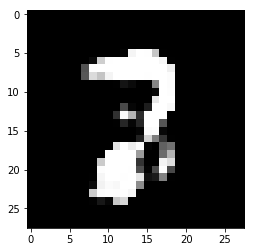

Loop: 482100, Generator_loss: -0.0041146, Discriminator_loss: 0.0019845
Loop: 482200, Generator_loss: -0.0042317, Discriminator_loss: 0.0041148
Loop: 482300, Generator_loss: -0.011008, Discriminator_loss: 0.0045882
Loop: 482400, Generator_loss: -0.010227, Discriminator_loss: 0.0063836
Loop: 482500, Generator_loss: -0.010094, Discriminator_loss: 0.0056147
Loop: 482600, Generator_loss: -0.0087906, Discriminator_loss: 0.0043799
Loop: 482700, Generator_loss: -0.0092365, Discriminator_loss: 0.004011
Loop: 482800, Generator_loss: -0.010479, Discriminator_loss: 0.0028094
Loop: 482900, Generator_loss: -0.0069413, Discriminator_loss: 0.0023788
Loop: 483000, Generator_loss: -0.013987, Discriminator_loss: 0.0042145


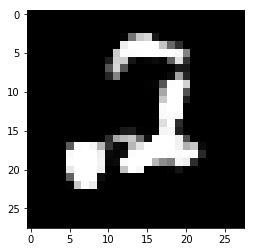

Loop: 483100, Generator_loss: -0.011769, Discriminator_loss: 0.0027808
Loop: 483200, Generator_loss: -0.0083907, Discriminator_loss: 0.0020861
Loop: 483300, Generator_loss: -0.0098326, Discriminator_loss: 0.0039978
Loop: 483400, Generator_loss: -0.012033, Discriminator_loss: 0.0036251
Loop: 483500, Generator_loss: -0.0075703, Discriminator_loss: 0.0034933
Loop: 483600, Generator_loss: -0.0048653, Discriminator_loss: 0.0044129
Loop: 483700, Generator_loss: -0.0094279, Discriminator_loss: 0.0045747
Loop: 483800, Generator_loss: -0.0093234, Discriminator_loss: 0.0036381
Loop: 483900, Generator_loss: -0.0098218, Discriminator_loss: 0.0026095
Loop: 484000, Generator_loss: -0.013806, Discriminator_loss: 0.0049194


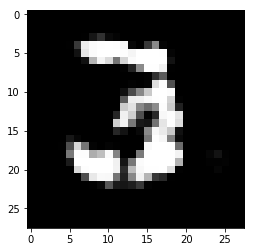

Loop: 484100, Generator_loss: -0.012176, Discriminator_loss: 0.0032332
Loop: 484200, Generator_loss: -0.014271, Discriminator_loss: 0.0024071
Loop: 484300, Generator_loss: -0.0065727, Discriminator_loss: 0.0045914
Loop: 484400, Generator_loss: -0.006746, Discriminator_loss: 0.0056089
Loop: 484500, Generator_loss: -0.0094043, Discriminator_loss: 0.0033349
Loop: 484600, Generator_loss: -0.0059646, Discriminator_loss: 0.003453
Loop: 484700, Generator_loss: -0.0077301, Discriminator_loss: 0.0015055
Loop: 484800, Generator_loss: -0.010999, Discriminator_loss: 0.0021521
Loop: 484900, Generator_loss: -0.0061925, Discriminator_loss: 0.0037991
Loop: 485000, Generator_loss: -0.0084769, Discriminator_loss: 0.0038066


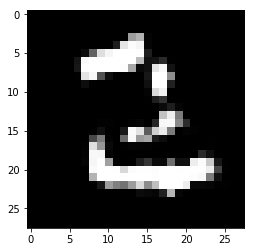

Loop: 485100, Generator_loss: -0.009064, Discriminator_loss: 0.0026177
Loop: 485200, Generator_loss: -0.00332, Discriminator_loss: 0.0024828
Loop: 485300, Generator_loss: -0.0065654, Discriminator_loss: 0.0037638
Loop: 485400, Generator_loss: -0.0076745, Discriminator_loss: 0.0044998
Loop: 485500, Generator_loss: -0.0089935, Discriminator_loss: 0.002209
Loop: 485600, Generator_loss: -0.011794, Discriminator_loss: 0.0046184
Loop: 485700, Generator_loss: -0.0026922, Discriminator_loss: 0.0029829
Loop: 485800, Generator_loss: -0.0038216, Discriminator_loss: 0.0033456
Loop: 485900, Generator_loss: -0.0096898, Discriminator_loss: 0.00071733
Loop: 486000, Generator_loss: -0.0077602, Discriminator_loss: 0.0035768


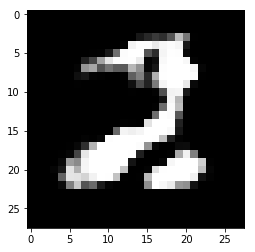

Loop: 486100, Generator_loss: -0.0013547, Discriminator_loss: 0.0056455
Loop: 486200, Generator_loss: -0.0052472, Discriminator_loss: 0.0039392
Loop: 486300, Generator_loss: -0.012385, Discriminator_loss: 0.003601
Loop: 486400, Generator_loss: -0.013734, Discriminator_loss: 0.0048793
Loop: 486500, Generator_loss: -0.0097241, Discriminator_loss: 0.0051505
Loop: 486600, Generator_loss: -0.0062909, Discriminator_loss: 0.0043712
Loop: 486700, Generator_loss: -0.0053509, Discriminator_loss: 0.0034854
Loop: 486800, Generator_loss: -0.0069808, Discriminator_loss: 0.0039769
Loop: 486900, Generator_loss: -0.010322, Discriminator_loss: 0.0037577
Loop: 487000, Generator_loss: -0.010156, Discriminator_loss: 0.0021018


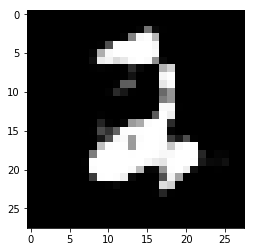

Loop: 487100, Generator_loss: -0.0093647, Discriminator_loss: 0.003179
Loop: 487200, Generator_loss: -0.012562, Discriminator_loss: 0.0022681
Loop: 487300, Generator_loss: -0.0046389, Discriminator_loss: 0.0033066
Loop: 487400, Generator_loss: -0.0043035, Discriminator_loss: 0.0034712
Loop: 487500, Generator_loss: -0.011078, Discriminator_loss: 0.0039958
Loop: 487600, Generator_loss: -0.0056002, Discriminator_loss: 0.0022305
Loop: 487700, Generator_loss: -0.0069731, Discriminator_loss: 0.0053126
Loop: 487800, Generator_loss: -0.01179, Discriminator_loss: 0.0035808
Loop: 487900, Generator_loss: -0.011277, Discriminator_loss: 0.0034217
Loop: 488000, Generator_loss: -0.0076906, Discriminator_loss: 0.0029681


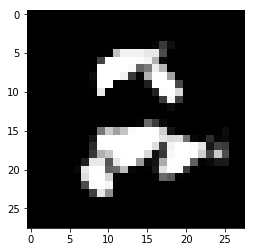

Loop: 488100, Generator_loss: -0.0099657, Discriminator_loss: 0.0028882
Loop: 488200, Generator_loss: -0.0081224, Discriminator_loss: 0.0048882
Loop: 488300, Generator_loss: -0.011766, Discriminator_loss: 0.0037433
Loop: 488400, Generator_loss: -0.008049, Discriminator_loss: 0.0058619
Loop: 488500, Generator_loss: -0.014511, Discriminator_loss: 0.0051349
Loop: 488600, Generator_loss: -0.0074531, Discriminator_loss: 0.0044885
Loop: 488700, Generator_loss: -0.0083121, Discriminator_loss: 0.0033508
Loop: 488800, Generator_loss: -0.0074782, Discriminator_loss: 0.0049437
Loop: 488900, Generator_loss: -0.0048749, Discriminator_loss: 0.0036881
Loop: 489000, Generator_loss: -0.0039696, Discriminator_loss: 0.0055664


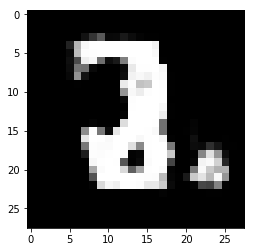

Loop: 489100, Generator_loss: -0.0037591, Discriminator_loss: 0.0039082
Loop: 489200, Generator_loss: -0.0036642, Discriminator_loss: 0.0038788
Loop: 489300, Generator_loss: -0.010459, Discriminator_loss: 0.0022231
Loop: 489400, Generator_loss: -0.0096933, Discriminator_loss: 0.0028284
Loop: 489500, Generator_loss: -0.0087585, Discriminator_loss: 0.0028391
Loop: 489600, Generator_loss: -0.007089, Discriminator_loss: 0.0031215
Loop: 489700, Generator_loss: -0.0057046, Discriminator_loss: 0.0023248
Loop: 489800, Generator_loss: -0.0049861, Discriminator_loss: 0.0038523
Loop: 489900, Generator_loss: -0.0076291, Discriminator_loss: 0.0027965
Loop: 490000, Generator_loss: -0.0060438, Discriminator_loss: 0.0017313


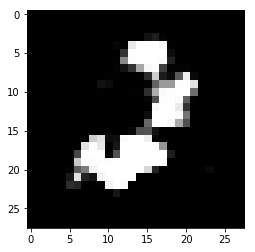

Loop: 490100, Generator_loss: -0.0057912, Discriminator_loss: 0.0027732
Loop: 490200, Generator_loss: -0.0060929, Discriminator_loss: 0.0032219
Loop: 490300, Generator_loss: -0.0074139, Discriminator_loss: 0.0011614
Loop: 490400, Generator_loss: -0.010688, Discriminator_loss: 0.0043441
Loop: 490500, Generator_loss: -0.0067243, Discriminator_loss: 0.0033498
Loop: 490600, Generator_loss: -0.0058263, Discriminator_loss: 0.0024086
Loop: 490700, Generator_loss: -0.0076829, Discriminator_loss: 0.00017493
Loop: 490800, Generator_loss: -0.0081631, Discriminator_loss: 0.0056534
Loop: 490900, Generator_loss: -0.006799, Discriminator_loss: 0.0038575
Loop: 491000, Generator_loss: -0.0041456, Discriminator_loss: 0.0061727


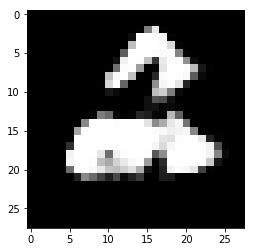

Loop: 491100, Generator_loss: -0.010632, Discriminator_loss: 0.0039522
Loop: 491200, Generator_loss: -0.0058043, Discriminator_loss: 0.0043296
Loop: 491300, Generator_loss: -0.019584, Discriminator_loss: 0.0040041
Loop: 491400, Generator_loss: -0.0087212, Discriminator_loss: 0.0046732
Loop: 491500, Generator_loss: -0.0066131, Discriminator_loss: 0.0049677
Loop: 491600, Generator_loss: -0.0052226, Discriminator_loss: 0.0024411
Loop: 491700, Generator_loss: -0.0063401, Discriminator_loss: 0.0024685
Loop: 491800, Generator_loss: -0.0071466, Discriminator_loss: 0.0023203
Loop: 491900, Generator_loss: -0.010348, Discriminator_loss: 0.0032647
Loop: 492000, Generator_loss: -0.011724, Discriminator_loss: 0.0030539


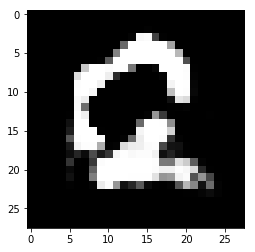

Loop: 492100, Generator_loss: -0.0052947, Discriminator_loss: 0.0035034
Loop: 492200, Generator_loss: -0.01223, Discriminator_loss: 0.0042023
Loop: 492300, Generator_loss: -0.010802, Discriminator_loss: 0.0020027
Loop: 492400, Generator_loss: -0.0071473, Discriminator_loss: 0.0019177
Loop: 492500, Generator_loss: -0.0083684, Discriminator_loss: 0.0024909
Loop: 492600, Generator_loss: -0.0068657, Discriminator_loss: 0.001864
Loop: 492700, Generator_loss: -0.011327, Discriminator_loss: 0.003781
Loop: 492800, Generator_loss: -0.0060713, Discriminator_loss: 0.0033378
Loop: 492900, Generator_loss: -0.013719, Discriminator_loss: 0.0051668
Loop: 493000, Generator_loss: -0.0080474, Discriminator_loss: 0.0032052


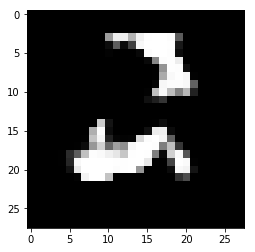

Loop: 493100, Generator_loss: -0.011087, Discriminator_loss: 0.0041014
Loop: 493200, Generator_loss: -0.011235, Discriminator_loss: 0.0039738
Loop: 493300, Generator_loss: -0.007338, Discriminator_loss: 0.0041992
Loop: 493400, Generator_loss: -0.0053238, Discriminator_loss: 0.003698
Loop: 493500, Generator_loss: -0.0055152, Discriminator_loss: -0.00020234
Loop: 493600, Generator_loss: -0.0080971, Discriminator_loss: 0.0026079
Loop: 493700, Generator_loss: -0.0092469, Discriminator_loss: 0.0051303
Loop: 493800, Generator_loss: -0.0078038, Discriminator_loss: 0.0036176
Loop: 493900, Generator_loss: -0.01087, Discriminator_loss: 0.0039407
Loop: 494000, Generator_loss: -0.0064897, Discriminator_loss: 0.0027521


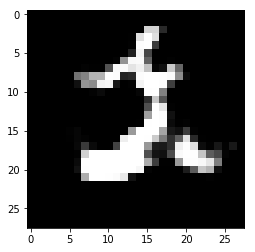

Loop: 494100, Generator_loss: -0.0083243, Discriminator_loss: 0.0046414
Loop: 494200, Generator_loss: -0.0034977, Discriminator_loss: 0.0056152
Loop: 494300, Generator_loss: -0.0045682, Discriminator_loss: 0.0044844
Loop: 494400, Generator_loss: -0.0019081, Discriminator_loss: 0.00338
Loop: 494500, Generator_loss: -0.0099161, Discriminator_loss: 0.0061183
Loop: 494600, Generator_loss: -0.0075015, Discriminator_loss: 0.0039692
Loop: 494700, Generator_loss: -0.0073398, Discriminator_loss: 0.0019099
Loop: 494800, Generator_loss: -0.0098605, Discriminator_loss: 0.0016146
Loop: 494900, Generator_loss: -0.0075859, Discriminator_loss: 0.0057062
Loop: 495000, Generator_loss: -0.0096883, Discriminator_loss: 0.003937


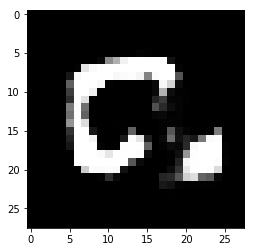

Loop: 495100, Generator_loss: -0.011628, Discriminator_loss: 0.004113
Loop: 495200, Generator_loss: -0.00083249, Discriminator_loss: 0.0043503
Loop: 495300, Generator_loss: -0.0071065, Discriminator_loss: 0.002856
Loop: 495400, Generator_loss: -0.011992, Discriminator_loss: 0.0046736
Loop: 495500, Generator_loss: -0.0085781, Discriminator_loss: 0.0022734
Loop: 495600, Generator_loss: -0.0047333, Discriminator_loss: 0.0063782
Loop: 495700, Generator_loss: -0.0089502, Discriminator_loss: 0.0031434
Loop: 495800, Generator_loss: -0.0088258, Discriminator_loss: 0.0047035
Loop: 495900, Generator_loss: -0.009204, Discriminator_loss: 0.0048773
Loop: 496000, Generator_loss: -0.0086623, Discriminator_loss: 0.0024769


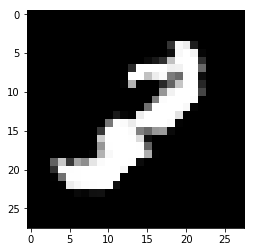

Loop: 496100, Generator_loss: -0.005712, Discriminator_loss: 0.0051632
Loop: 496200, Generator_loss: -0.012897, Discriminator_loss: 0.0048645
Loop: 496300, Generator_loss: -0.0027514, Discriminator_loss: 0.0039068
Loop: 496400, Generator_loss: -0.0091738, Discriminator_loss: 0.0040908
Loop: 496500, Generator_loss: -0.0031075, Discriminator_loss: 0.0034494
Loop: 496600, Generator_loss: -0.0037001, Discriminator_loss: 0.0039497
Loop: 496700, Generator_loss: -0.0065248, Discriminator_loss: 0.0055366
Loop: 496800, Generator_loss: -0.0086325, Discriminator_loss: 0.0030768
Loop: 496900, Generator_loss: -0.0096122, Discriminator_loss: 0.0024437
Loop: 497000, Generator_loss: -0.00917, Discriminator_loss: 0.00023978


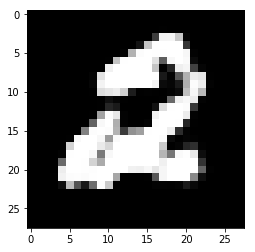

Loop: 497100, Generator_loss: -0.014271, Discriminator_loss: 0.0051601
Loop: 497200, Generator_loss: -0.013405, Discriminator_loss: 0.0017192
Loop: 497300, Generator_loss: -0.008549, Discriminator_loss: 0.0032439
Loop: 497400, Generator_loss: -0.0095457, Discriminator_loss: 0.0042199
Loop: 497500, Generator_loss: -0.0055532, Discriminator_loss: 0.0024626
Loop: 497600, Generator_loss: -0.0068357, Discriminator_loss: 0.0034158
Loop: 497700, Generator_loss: -0.011466, Discriminator_loss: 0.0039433
Loop: 497800, Generator_loss: -0.012629, Discriminator_loss: 0.0034291
Loop: 497900, Generator_loss: -0.01191, Discriminator_loss: 0.0037093
Loop: 498000, Generator_loss: -0.0061738, Discriminator_loss: 0.0027621


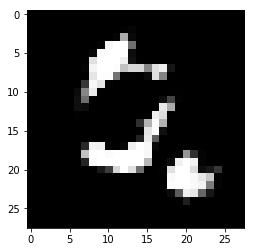

Loop: 498100, Generator_loss: -0.008884, Discriminator_loss: 0.0019743
Loop: 498200, Generator_loss: -0.0054196, Discriminator_loss: 0.0024245
Loop: 498300, Generator_loss: -0.014371, Discriminator_loss: 0.0049189
Loop: 498400, Generator_loss: -0.010433, Discriminator_loss: 0.0066768
Loop: 498500, Generator_loss: -0.0088292, Discriminator_loss: 0.0037003
Loop: 498600, Generator_loss: -0.0088773, Discriminator_loss: 0.0036964
Loop: 498700, Generator_loss: -0.011158, Discriminator_loss: 0.0039785
Loop: 498800, Generator_loss: -0.0086845, Discriminator_loss: 0.0066171
Loop: 498900, Generator_loss: -0.009473, Discriminator_loss: 0.0030428
Loop: 499000, Generator_loss: -0.0037267, Discriminator_loss: 0.0012814


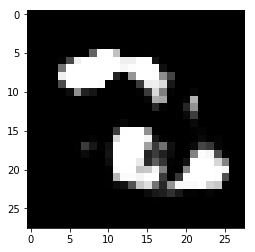

Loop: 499100, Generator_loss: -0.0061059, Discriminator_loss: 0.00091765
Loop: 499200, Generator_loss: -0.010475, Discriminator_loss: 0.0037474
Loop: 499300, Generator_loss: -0.010628, Discriminator_loss: 0.0033348
Loop: 499400, Generator_loss: -0.0017672, Discriminator_loss: 0.0060428
Loop: 499500, Generator_loss: -0.0099649, Discriminator_loss: 0.0035569
Loop: 499600, Generator_loss: -0.0051021, Discriminator_loss: 0.0035219
Loop: 499700, Generator_loss: -0.010188, Discriminator_loss: 0.0014321
Loop: 499800, Generator_loss: -0.010119, Discriminator_loss: 0.0015036
Loop: 499900, Generator_loss: -0.0028074, Discriminator_loss: 0.0014494
Loop: 500000, Generator_loss: -0.01031, Discriminator_loss: 0.0063192


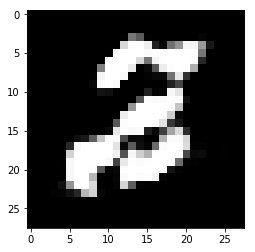

Loop: 500100, Generator_loss: -0.0087726, Discriminator_loss: 0.0028165
Loop: 500200, Generator_loss: -0.0056414, Discriminator_loss: 0.0014874
Loop: 500300, Generator_loss: -0.008228, Discriminator_loss: 0.0040579
Loop: 500400, Generator_loss: -0.011206, Discriminator_loss: 0.0019383
Loop: 500500, Generator_loss: -0.007114, Discriminator_loss: 0.0017574
Loop: 500600, Generator_loss: -0.0038192, Discriminator_loss: 0.0032405
Loop: 500700, Generator_loss: -0.0072781, Discriminator_loss: 0.002975
Loop: 500800, Generator_loss: -0.010621, Discriminator_loss: 0.0028856
Loop: 500900, Generator_loss: -0.008515, Discriminator_loss: 0.0033371
Loop: 501000, Generator_loss: -0.0066501, Discriminator_loss: 0.0033998


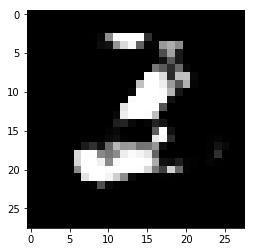

Loop: 501100, Generator_loss: -0.0072508, Discriminator_loss: 0.003269
Loop: 501200, Generator_loss: -0.0045489, Discriminator_loss: 0.0020423
Loop: 501300, Generator_loss: -0.009978, Discriminator_loss: 0.0050184
Loop: 501400, Generator_loss: -0.0054904, Discriminator_loss: 0.0058769
Loop: 501500, Generator_loss: -0.0080679, Discriminator_loss: 0.0036807
Loop: 501600, Generator_loss: -0.0056406, Discriminator_loss: 0.0042424
Loop: 501700, Generator_loss: -0.010842, Discriminator_loss: 0.0033274
Loop: 501800, Generator_loss: -0.012422, Discriminator_loss: 0.0050297
Loop: 501900, Generator_loss: -0.0076305, Discriminator_loss: 0.0045043
Loop: 502000, Generator_loss: -0.0038598, Discriminator_loss: 0.0042637


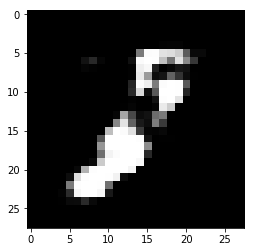

Loop: 502100, Generator_loss: -0.0071989, Discriminator_loss: 0.0031215
Loop: 502200, Generator_loss: -0.0056486, Discriminator_loss: 0.0025657
Loop: 502300, Generator_loss: -0.010292, Discriminator_loss: 0.0049034
Loop: 502400, Generator_loss: -0.0041765, Discriminator_loss: 0.0042735
Loop: 502500, Generator_loss: -0.010113, Discriminator_loss: 0.0013774
Loop: 502600, Generator_loss: -0.0043265, Discriminator_loss: 0.0023638
Loop: 502700, Generator_loss: -0.0072244, Discriminator_loss: 0.003014
Loop: 502800, Generator_loss: -0.0072293, Discriminator_loss: 0.0029679
Loop: 502900, Generator_loss: -0.0071373, Discriminator_loss: 0.0032691
Loop: 503000, Generator_loss: -0.013055, Discriminator_loss: 0.005428


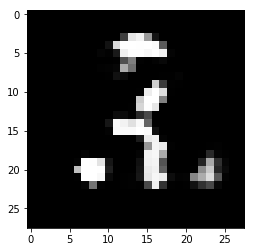

Loop: 503100, Generator_loss: -0.0089506, Discriminator_loss: 0.0039741
Loop: 503200, Generator_loss: -0.010207, Discriminator_loss: 0.0024137
Loop: 503300, Generator_loss: -0.005168, Discriminator_loss: 0.0036499
Loop: 503400, Generator_loss: -0.0071527, Discriminator_loss: 0.0028238
Loop: 503500, Generator_loss: -0.0092446, Discriminator_loss: 0.0046798
Loop: 503600, Generator_loss: -0.0054044, Discriminator_loss: 0.0042835
Loop: 503700, Generator_loss: -0.0072966, Discriminator_loss: 0.0030397
Loop: 503800, Generator_loss: -0.008617, Discriminator_loss: 0.0015934
Loop: 503900, Generator_loss: -0.0042738, Discriminator_loss: 0.0038129
Loop: 504000, Generator_loss: -0.0053979, Discriminator_loss: 0.0058545


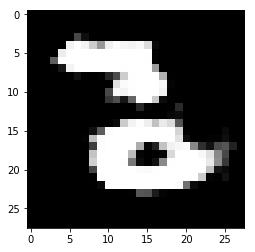

Loop: 504100, Generator_loss: -0.011274, Discriminator_loss: 0.0038134
Loop: 504200, Generator_loss: -0.0077389, Discriminator_loss: 0.0033178
Loop: 504300, Generator_loss: -0.010006, Discriminator_loss: 0.0034238
Loop: 504400, Generator_loss: -0.0092814, Discriminator_loss: 0.0047888
Loop: 504500, Generator_loss: -0.010505, Discriminator_loss: 0.0049435
Loop: 504600, Generator_loss: -0.010736, Discriminator_loss: 0.0037182
Loop: 504700, Generator_loss: -0.017019, Discriminator_loss: 0.00404
Loop: 504800, Generator_loss: -0.0079126, Discriminator_loss: 0.0034554
Loop: 504900, Generator_loss: -0.0083343, Discriminator_loss: 0.0042301
Loop: 505000, Generator_loss: -0.0053657, Discriminator_loss: 0.0028878


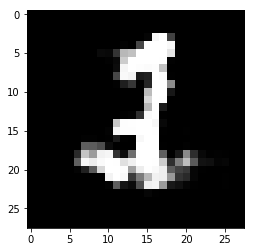

Loop: 505100, Generator_loss: -0.0062391, Discriminator_loss: 0.0035726
Loop: 505200, Generator_loss: -0.01187, Discriminator_loss: 0.0021254
Loop: 505300, Generator_loss: -0.0069337, Discriminator_loss: 0.0037136
Loop: 505400, Generator_loss: -0.0059549, Discriminator_loss: 0.0040169
Loop: 505500, Generator_loss: -0.007395, Discriminator_loss: 0.0037133
Loop: 505600, Generator_loss: -0.010283, Discriminator_loss: 0.0043243
Loop: 505700, Generator_loss: -0.0064499, Discriminator_loss: 0.0031138
Loop: 505800, Generator_loss: -0.010165, Discriminator_loss: 0.0025329
Loop: 505900, Generator_loss: -0.0078299, Discriminator_loss: 0.0024559
Loop: 506000, Generator_loss: -0.0055142, Discriminator_loss: 0.0026259


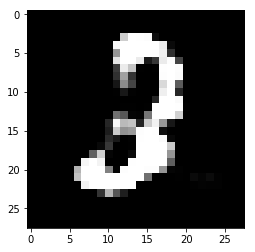

Loop: 506100, Generator_loss: -0.0086941, Discriminator_loss: 0.0019788
Loop: 506200, Generator_loss: -0.0071421, Discriminator_loss: 0.00034563
Loop: 506300, Generator_loss: -0.0099108, Discriminator_loss: 0.0028397
Loop: 506400, Generator_loss: -0.016653, Discriminator_loss: 0.0052993
Loop: 506500, Generator_loss: -0.0051256, Discriminator_loss: 0.0020044
Loop: 506600, Generator_loss: -0.0062551, Discriminator_loss: 0.0046611
Loop: 506700, Generator_loss: -0.0096296, Discriminator_loss: 0.003544
Loop: 506800, Generator_loss: -0.0097779, Discriminator_loss: 0.005122
Loop: 506900, Generator_loss: -0.011873, Discriminator_loss: 0.0039566
Loop: 507000, Generator_loss: -0.010663, Discriminator_loss: 0.0043959


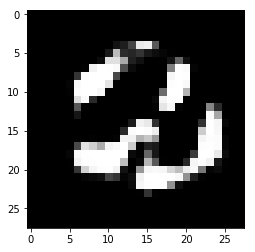

Loop: 507100, Generator_loss: -0.0081306, Discriminator_loss: 0.0034109
Loop: 507200, Generator_loss: -0.0083821, Discriminator_loss: 0.002988
Loop: 507300, Generator_loss: -0.0046861, Discriminator_loss: 0.0026964
Loop: 507400, Generator_loss: -0.0084214, Discriminator_loss: 0.0029963
Loop: 507500, Generator_loss: -0.0058062, Discriminator_loss: 0.0035017
Loop: 507600, Generator_loss: -0.0078324, Discriminator_loss: 0.0036458
Loop: 507700, Generator_loss: -0.0065519, Discriminator_loss: 0.0034619
Loop: 507800, Generator_loss: -0.0034437, Discriminator_loss: 0.0043753
Loop: 507900, Generator_loss: -0.0099332, Discriminator_loss: 0.00099448
Loop: 508000, Generator_loss: -0.0078017, Discriminator_loss: 0.0036394


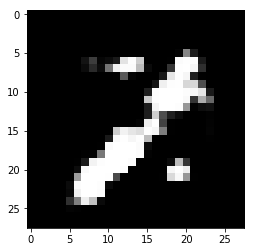

Loop: 508100, Generator_loss: -0.0086711, Discriminator_loss: 0.0046495
Loop: 508200, Generator_loss: -0.0059905, Discriminator_loss: 0.0024795
Loop: 508300, Generator_loss: -0.0078948, Discriminator_loss: 0.0028091
Loop: 508400, Generator_loss: -0.0037424, Discriminator_loss: 0.0043944
Loop: 508500, Generator_loss: -0.0075713, Discriminator_loss: 0.0035599
Loop: 508600, Generator_loss: -0.014519, Discriminator_loss: 0.0051157
Loop: 508700, Generator_loss: -0.010432, Discriminator_loss: 0.0028553
Loop: 508800, Generator_loss: -0.01321, Discriminator_loss: 0.0036261
Loop: 508900, Generator_loss: -0.0076899, Discriminator_loss: 0.0050758
Loop: 509000, Generator_loss: -0.0064751, Discriminator_loss: 0.0038345


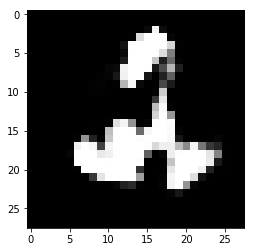

Loop: 509100, Generator_loss: -0.0064101, Discriminator_loss: 0.0046199
Loop: 509200, Generator_loss: -0.013478, Discriminator_loss: 0.0030889
Loop: 509300, Generator_loss: -0.012331, Discriminator_loss: 0.0041473
Loop: 509400, Generator_loss: -0.010181, Discriminator_loss: 0.0012492
Loop: 509500, Generator_loss: -0.0062456, Discriminator_loss: 0.0031197
Loop: 509600, Generator_loss: -0.0087095, Discriminator_loss: 0.0049791
Loop: 509700, Generator_loss: -0.00764, Discriminator_loss: 0.002184
Loop: 509800, Generator_loss: -0.0091618, Discriminator_loss: 0.003682
Loop: 509900, Generator_loss: -0.010239, Discriminator_loss: 0.0035835
Loop: 510000, Generator_loss: -0.0096843, Discriminator_loss: 0.004132


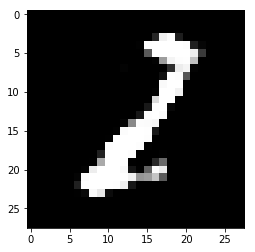

Loop: 510100, Generator_loss: -0.011298, Discriminator_loss: 0.004342
Loop: 510200, Generator_loss: -0.0050011, Discriminator_loss: 0.002995
Loop: 510300, Generator_loss: -0.0087155, Discriminator_loss: 0.004819
Loop: 510400, Generator_loss: -0.0070564, Discriminator_loss: 0.0038895
Loop: 510500, Generator_loss: -0.0092845, Discriminator_loss: 0.0044746
Loop: 510600, Generator_loss: -0.011266, Discriminator_loss: 0.002839
Loop: 510700, Generator_loss: -0.0066999, Discriminator_loss: 0.003695
Loop: 510800, Generator_loss: -0.0062795, Discriminator_loss: 0.0039476
Loop: 510900, Generator_loss: -0.0067009, Discriminator_loss: 0.0041684
Loop: 511000, Generator_loss: -0.010327, Discriminator_loss: 0.0022595


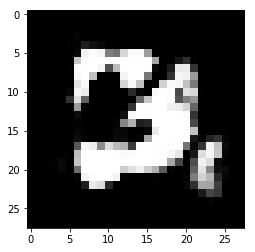

Loop: 511100, Generator_loss: -0.0075108, Discriminator_loss: 0.0054213
Loop: 511200, Generator_loss: -0.0084254, Discriminator_loss: 0.00031235
Loop: 511300, Generator_loss: -0.0032601, Discriminator_loss: 0.0019312
Loop: 511400, Generator_loss: -0.0086971, Discriminator_loss: 0.0036213
Loop: 511500, Generator_loss: -0.0051775, Discriminator_loss: 0.0052644
Loop: 511600, Generator_loss: -0.0061798, Discriminator_loss: 0.0030687
Loop: 511700, Generator_loss: -0.006923, Discriminator_loss: 0.00517
Loop: 511800, Generator_loss: -0.0014646, Discriminator_loss: 0.0027455
Loop: 511900, Generator_loss: -0.00832, Discriminator_loss: 0.0041837
Loop: 512000, Generator_loss: -0.010679, Discriminator_loss: 0.0027006


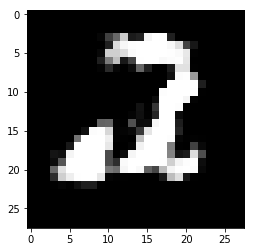

Loop: 512100, Generator_loss: -0.0058859, Discriminator_loss: 0.0024934
Loop: 512200, Generator_loss: -0.0129, Discriminator_loss: 0.0050335
Loop: 512300, Generator_loss: -0.0096147, Discriminator_loss: 0.0047659
Loop: 512400, Generator_loss: -0.009823, Discriminator_loss: 0.0032907
Loop: 512500, Generator_loss: -0.0051578, Discriminator_loss: 0.0038049
Loop: 512600, Generator_loss: -0.0061979, Discriminator_loss: 0.003919
Loop: 512700, Generator_loss: -0.0098662, Discriminator_loss: 0.0049148
Loop: 512800, Generator_loss: -0.0038528, Discriminator_loss: 0.002433
Loop: 512900, Generator_loss: -0.0072483, Discriminator_loss: 0.0046672
Loop: 513000, Generator_loss: -0.0074809, Discriminator_loss: 0.0038119


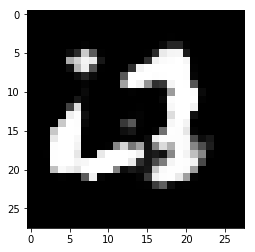

Loop: 513100, Generator_loss: -0.0033623, Discriminator_loss: 0.0044457
Loop: 513200, Generator_loss: -0.0041856, Discriminator_loss: 0.0055008
Loop: 513300, Generator_loss: -0.0025756, Discriminator_loss: 0.0023727
Loop: 513400, Generator_loss: -0.0079748, Discriminator_loss: 0.0072161
Loop: 513500, Generator_loss: -0.0052649, Discriminator_loss: 0.0048063
Loop: 513600, Generator_loss: -0.01275, Discriminator_loss: 0.0023658
Loop: 513700, Generator_loss: -0.008091, Discriminator_loss: 0.0012653
Loop: 513800, Generator_loss: -0.0067932, Discriminator_loss: 0.0056406
Loop: 513900, Generator_loss: -0.011755, Discriminator_loss: 0.0022055
Loop: 514000, Generator_loss: -0.010378, Discriminator_loss: 0.0025234


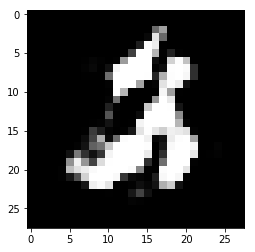

Loop: 514100, Generator_loss: -0.0067795, Discriminator_loss: 0.0028403
Loop: 514200, Generator_loss: -0.0081417, Discriminator_loss: 0.0039193
Loop: 514300, Generator_loss: -0.0098044, Discriminator_loss: 0.0033487
Loop: 514400, Generator_loss: -0.014486, Discriminator_loss: 0.0057279
Loop: 514500, Generator_loss: -0.0072245, Discriminator_loss: 0.003167
Loop: 514600, Generator_loss: -0.0063196, Discriminator_loss: 0.0041918
Loop: 514700, Generator_loss: -0.0048128, Discriminator_loss: 0.0037431
Loop: 514800, Generator_loss: -0.0078757, Discriminator_loss: 0.0045005
Loop: 514900, Generator_loss: -0.011756, Discriminator_loss: 0.0035036
Loop: 515000, Generator_loss: -0.016422, Discriminator_loss: 0.0027699


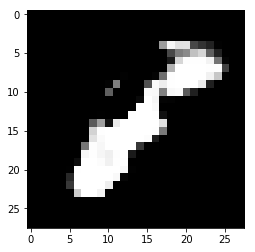

Loop: 515100, Generator_loss: -0.0056177, Discriminator_loss: 0.003752
Loop: 515200, Generator_loss: -0.0056822, Discriminator_loss: 0.0039362
Loop: 515300, Generator_loss: -0.0052469, Discriminator_loss: 0.0032494
Loop: 515400, Generator_loss: -0.010137, Discriminator_loss: 0.0035165
Loop: 515500, Generator_loss: -0.016249, Discriminator_loss: 0.0066498
Loop: 515600, Generator_loss: -0.0029581, Discriminator_loss: 0.00287
Loop: 515700, Generator_loss: -0.0082312, Discriminator_loss: 0.0047324
Loop: 515800, Generator_loss: -0.0066965, Discriminator_loss: 0.0020861
Loop: 515900, Generator_loss: -0.0012971, Discriminator_loss: 0.0044284
Loop: 516000, Generator_loss: -0.0093309, Discriminator_loss: 0.0041526


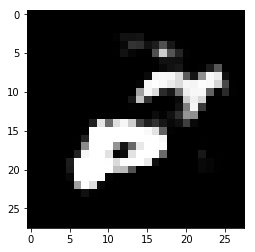

Loop: 516100, Generator_loss: -0.0040267, Discriminator_loss: 0.0052582
Loop: 516200, Generator_loss: -0.007063, Discriminator_loss: 0.0032194
Loop: 516300, Generator_loss: -0.0098742, Discriminator_loss: 0.0053149
Loop: 516400, Generator_loss: -0.0087399, Discriminator_loss: 0.0030625
Loop: 516500, Generator_loss: -0.0083973, Discriminator_loss: 0.0026375
Loop: 516600, Generator_loss: -0.0096744, Discriminator_loss: 0.0048315
Loop: 516700, Generator_loss: -0.0058259, Discriminator_loss: 0.0048436
Loop: 516800, Generator_loss: -0.0067631, Discriminator_loss: 0.0029075
Loop: 516900, Generator_loss: -0.0068946, Discriminator_loss: 0.0049246
Loop: 517000, Generator_loss: -0.0058672, Discriminator_loss: 0.0039248


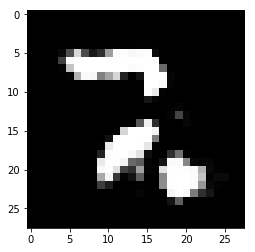

Loop: 517100, Generator_loss: -0.0065656, Discriminator_loss: 0.004004
Loop: 517200, Generator_loss: -0.012471, Discriminator_loss: 0.002152
Loop: 517300, Generator_loss: -0.010954, Discriminator_loss: 0.0015029
Loop: 517400, Generator_loss: -0.012549, Discriminator_loss: 0.0051937
Loop: 517500, Generator_loss: -0.0088061, Discriminator_loss: 0.0049996
Loop: 517600, Generator_loss: -0.007436, Discriminator_loss: 0.002932
Loop: 517700, Generator_loss: -0.011225, Discriminator_loss: 0.0035996
Loop: 517800, Generator_loss: -0.002952, Discriminator_loss: 0.0051853
Loop: 517900, Generator_loss: -0.0095368, Discriminator_loss: 0.003626
Loop: 518000, Generator_loss: -0.0088345, Discriminator_loss: 0.0039538


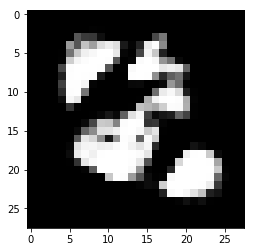

Loop: 518100, Generator_loss: -0.0097679, Discriminator_loss: 0.0017563
Loop: 518200, Generator_loss: -0.011815, Discriminator_loss: 0.0032326
Loop: 518300, Generator_loss: -0.0097857, Discriminator_loss: 0.0043727
Loop: 518400, Generator_loss: -0.0068184, Discriminator_loss: 0.0062105
Loop: 518500, Generator_loss: -0.005394, Discriminator_loss: 0.0026137
Loop: 518600, Generator_loss: -0.0042479, Discriminator_loss: 0.0029227
Loop: 518700, Generator_loss: -0.010619, Discriminator_loss: 0.0030247
Loop: 518800, Generator_loss: -0.0033697, Discriminator_loss: 0.004218
Loop: 518900, Generator_loss: -0.009904, Discriminator_loss: 0.0030081
Loop: 519000, Generator_loss: -0.0065093, Discriminator_loss: 0.0029882


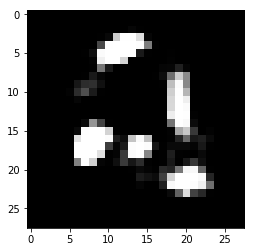

Loop: 519100, Generator_loss: -0.009746, Discriminator_loss: 0.0034775
Loop: 519200, Generator_loss: -0.013696, Discriminator_loss: 0.0025096
Loop: 519300, Generator_loss: -0.0080882, Discriminator_loss: 0.0050381
Loop: 519400, Generator_loss: -0.0075803, Discriminator_loss: 0.0020112
Loop: 519500, Generator_loss: -0.0059737, Discriminator_loss: 0.0035805
Loop: 519600, Generator_loss: -0.0069828, Discriminator_loss: 0.0030758
Loop: 519700, Generator_loss: -0.0081824, Discriminator_loss: 0.0027018
Loop: 519800, Generator_loss: -0.0088468, Discriminator_loss: 0.0046771
Loop: 519900, Generator_loss: -0.0090726, Discriminator_loss: 0.0044982
Loop: 520000, Generator_loss: -0.0063433, Discriminator_loss: 0.0027056


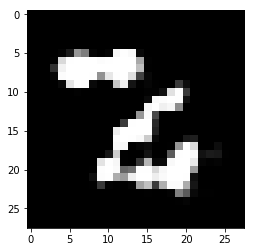

Loop: 520100, Generator_loss: -0.014705, Discriminator_loss: 0.0067031
Loop: 520200, Generator_loss: -0.012144, Discriminator_loss: 0.0030873
Loop: 520300, Generator_loss: -0.0078345, Discriminator_loss: 0.0043458
Loop: 520400, Generator_loss: -0.0095233, Discriminator_loss: 0.0037696
Loop: 520500, Generator_loss: -0.0062606, Discriminator_loss: 0.0032744
Loop: 520600, Generator_loss: -0.0099191, Discriminator_loss: 0.003032
Loop: 520700, Generator_loss: -0.012277, Discriminator_loss: 0.0048621
Loop: 520800, Generator_loss: -0.0082994, Discriminator_loss: 0.0035049
Loop: 520900, Generator_loss: -0.006978, Discriminator_loss: 0.0032572
Loop: 521000, Generator_loss: -0.0090975, Discriminator_loss: 0.0020456


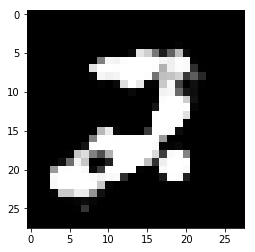

Loop: 521100, Generator_loss: -0.006569, Discriminator_loss: 0.0032115
Loop: 521200, Generator_loss: -0.010862, Discriminator_loss: 0.0038136
Loop: 521300, Generator_loss: -0.00703, Discriminator_loss: 0.0062337
Loop: 521400, Generator_loss: -0.011133, Discriminator_loss: 0.0033482
Loop: 521500, Generator_loss: -0.012733, Discriminator_loss: 0.0033954
Loop: 521600, Generator_loss: -0.0044764, Discriminator_loss: 0.0034123
Loop: 521700, Generator_loss: -0.0078574, Discriminator_loss: 0.0028638
Loop: 521800, Generator_loss: -0.01032, Discriminator_loss: 0.0012819
Loop: 521900, Generator_loss: -0.010465, Discriminator_loss: 0.0023033
Loop: 522000, Generator_loss: -0.0057718, Discriminator_loss: 0.0019142


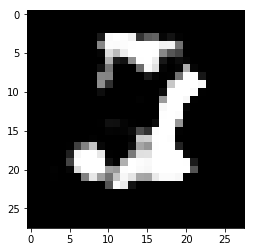

Loop: 522100, Generator_loss: -0.0067476, Discriminator_loss: 0.005656
Loop: 522200, Generator_loss: -0.0076152, Discriminator_loss: 0.0019915
Loop: 522300, Generator_loss: -0.011824, Discriminator_loss: 0.0035199
Loop: 522400, Generator_loss: -0.010346, Discriminator_loss: 0.0011755
Loop: 522500, Generator_loss: -0.0047892, Discriminator_loss: 0.0037997
Loop: 522600, Generator_loss: -0.0067177, Discriminator_loss: 0.00266
Loop: 522700, Generator_loss: -0.0097132, Discriminator_loss: 0.0044189
Loop: 522800, Generator_loss: -0.0058826, Discriminator_loss: 0.0027491
Loop: 522900, Generator_loss: -0.010748, Discriminator_loss: 0.0034057
Loop: 523000, Generator_loss: -0.0085902, Discriminator_loss: 0.0033131


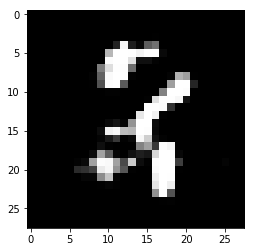

Loop: 523100, Generator_loss: -0.0075586, Discriminator_loss: 0.0052257
Loop: 523200, Generator_loss: -0.0084163, Discriminator_loss: 0.0030087
Loop: 523300, Generator_loss: -0.010387, Discriminator_loss: 0.0031743
Loop: 523400, Generator_loss: -0.014446, Discriminator_loss: 0.0041911
Loop: 523500, Generator_loss: -0.0076195, Discriminator_loss: 0.0032714
Loop: 523600, Generator_loss: -0.0091116, Discriminator_loss: 0.0036749
Loop: 523700, Generator_loss: -0.014861, Discriminator_loss: 0.0051345
Loop: 523800, Generator_loss: -0.0088799, Discriminator_loss: 0.0036752
Loop: 523900, Generator_loss: -0.0053629, Discriminator_loss: 0.0043596
Loop: 524000, Generator_loss: -0.010302, Discriminator_loss: 0.002397


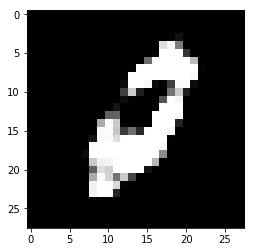

Loop: 524100, Generator_loss: -0.0098806, Discriminator_loss: 0.0035697
Loop: 524200, Generator_loss: -0.0076222, Discriminator_loss: 0.0015319
Loop: 524300, Generator_loss: -0.0067173, Discriminator_loss: 0.0029547
Loop: 524400, Generator_loss: -0.0095836, Discriminator_loss: 0.0040105
Loop: 524500, Generator_loss: -0.0067273, Discriminator_loss: 0.002894
Loop: 524600, Generator_loss: -0.0093907, Discriminator_loss: 0.0015802
Loop: 524700, Generator_loss: -0.0071526, Discriminator_loss: 0.0039111
Loop: 524800, Generator_loss: -0.011228, Discriminator_loss: 0.003907
Loop: 524900, Generator_loss: -0.0077072, Discriminator_loss: 0.0031989
Loop: 525000, Generator_loss: -0.010885, Discriminator_loss: 0.002816


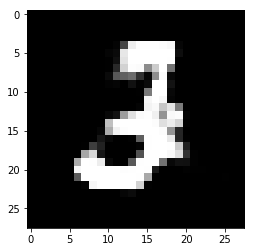

Loop: 525100, Generator_loss: -0.010403, Discriminator_loss: 0.0027045
Loop: 525200, Generator_loss: -0.0076314, Discriminator_loss: 0.0028878
Loop: 525300, Generator_loss: -0.012164, Discriminator_loss: 0.0057142
Loop: 525400, Generator_loss: -0.0084727, Discriminator_loss: 0.0035386
Loop: 525500, Generator_loss: -0.0083631, Discriminator_loss: 0.0029348
Loop: 525600, Generator_loss: -0.0073725, Discriminator_loss: 0.0027872
Loop: 525700, Generator_loss: -0.013121, Discriminator_loss: 0.0013842
Loop: 525800, Generator_loss: -0.0076122, Discriminator_loss: 0.0023863
Loop: 525900, Generator_loss: -0.014165, Discriminator_loss: 0.0025692
Loop: 526000, Generator_loss: -0.0025543, Discriminator_loss: 0.0037382


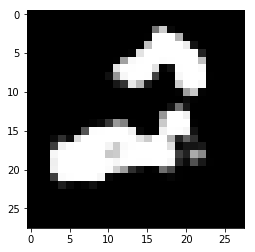

Loop: 526100, Generator_loss: -0.010168, Discriminator_loss: 0.0030814
Loop: 526200, Generator_loss: -0.00089571, Discriminator_loss: 0.005546
Loop: 526300, Generator_loss: -0.0068554, Discriminator_loss: 0.0027426
Loop: 526400, Generator_loss: -0.0072278, Discriminator_loss: 0.0039108
Loop: 526500, Generator_loss: -0.0066897, Discriminator_loss: 0.0024106
Loop: 526600, Generator_loss: -0.0099741, Discriminator_loss: 0.0035207
Loop: 526700, Generator_loss: -0.0073455, Discriminator_loss: 0.0047305
Loop: 526800, Generator_loss: -0.010264, Discriminator_loss: 0.0045342
Loop: 526900, Generator_loss: -0.010019, Discriminator_loss: 0.0026058
Loop: 527000, Generator_loss: -0.010621, Discriminator_loss: 0.0030408


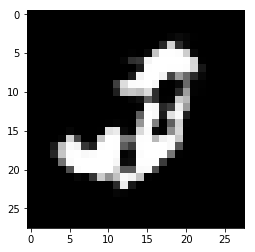

Loop: 527100, Generator_loss: -0.010168, Discriminator_loss: 0.0015245
Loop: 527200, Generator_loss: -0.014779, Discriminator_loss: 0.0025402
Loop: 527300, Generator_loss: -0.0037589, Discriminator_loss: 0.0036483
Loop: 527400, Generator_loss: -0.0062227, Discriminator_loss: 0.0063441
Loop: 527500, Generator_loss: -0.004019, Discriminator_loss: 0.0031194
Loop: 527600, Generator_loss: -0.007527, Discriminator_loss: 0.0026326
Loop: 527700, Generator_loss: -0.011713, Discriminator_loss: 0.0043211
Loop: 527800, Generator_loss: -0.0070412, Discriminator_loss: 0.0029984
Loop: 527900, Generator_loss: -0.015202, Discriminator_loss: 0.0033261
Loop: 528000, Generator_loss: -0.0085721, Discriminator_loss: 0.0021968


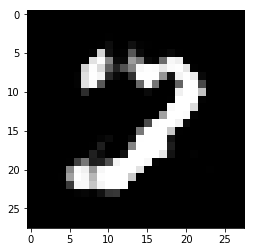

Loop: 528100, Generator_loss: -0.012614, Discriminator_loss: 0.0034008
Loop: 528200, Generator_loss: -0.0059891, Discriminator_loss: 0.0069758
Loop: 528300, Generator_loss: -0.0067304, Discriminator_loss: 0.0027472
Loop: 528400, Generator_loss: -0.0023486, Discriminator_loss: 0.0042433
Loop: 528500, Generator_loss: -0.016192, Discriminator_loss: 0.0031764
Loop: 528600, Generator_loss: -0.0055058, Discriminator_loss: 0.0021578
Loop: 528700, Generator_loss: -0.0089839, Discriminator_loss: 0.0031986
Loop: 528800, Generator_loss: -0.0048931, Discriminator_loss: 0.0040177
Loop: 528900, Generator_loss: -0.0081224, Discriminator_loss: 0.0014014
Loop: 529000, Generator_loss: -0.011586, Discriminator_loss: 0.0060852


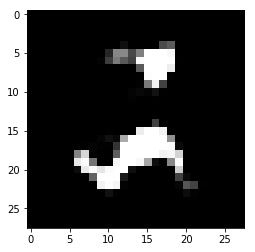

Loop: 529100, Generator_loss: -0.0073563, Discriminator_loss: 0.0039255
Loop: 529200, Generator_loss: -0.0082938, Discriminator_loss: 0.0050904
Loop: 529300, Generator_loss: -0.0074029, Discriminator_loss: 0.0025887
Loop: 529400, Generator_loss: -0.016113, Discriminator_loss: 0.0060668
Loop: 529500, Generator_loss: -0.0060926, Discriminator_loss: 0.0044429
Loop: 529600, Generator_loss: -0.0090898, Discriminator_loss: 0.0036797
Loop: 529700, Generator_loss: -0.0022736, Discriminator_loss: 0.0033707
Loop: 529800, Generator_loss: -0.0048543, Discriminator_loss: 0.0021953
Loop: 529900, Generator_loss: -0.0090596, Discriminator_loss: 0.0047587
Loop: 530000, Generator_loss: -0.0038098, Discriminator_loss: 0.0065615


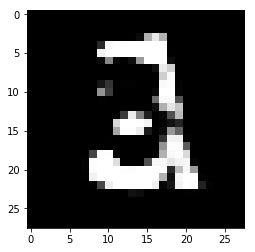

Loop: 530100, Generator_loss: -0.013505, Discriminator_loss: 0.0039339
Loop: 530200, Generator_loss: -0.010513, Discriminator_loss: 0.0027015
Loop: 530300, Generator_loss: -0.0086612, Discriminator_loss: 0.0038689
Loop: 530400, Generator_loss: -0.0026308, Discriminator_loss: 0.0052102
Loop: 530500, Generator_loss: -0.012504, Discriminator_loss: 0.0030852
Loop: 530600, Generator_loss: -0.012075, Discriminator_loss: 0.0019748
Loop: 530700, Generator_loss: -0.010706, Discriminator_loss: 0.0052516
Loop: 530800, Generator_loss: -0.010959, Discriminator_loss: 0.0031552
Loop: 530900, Generator_loss: -0.0063563, Discriminator_loss: 0.0016962
Loop: 531000, Generator_loss: -0.012625, Discriminator_loss: 0.0036721


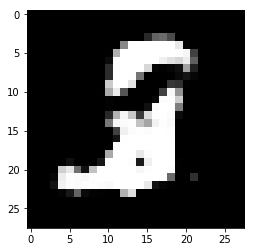

Loop: 531100, Generator_loss: -0.013373, Discriminator_loss: 0.0028485
Loop: 531200, Generator_loss: -0.012387, Discriminator_loss: 0.0043649
Loop: 531300, Generator_loss: -0.0082229, Discriminator_loss: 0.0031082
Loop: 531400, Generator_loss: -0.0072877, Discriminator_loss: 0.0037629
Loop: 531500, Generator_loss: -0.0083373, Discriminator_loss: 0.0027124
Loop: 531600, Generator_loss: -0.0075881, Discriminator_loss: 0.0054655
Loop: 531700, Generator_loss: -0.010692, Discriminator_loss: 0.0029428
Loop: 531800, Generator_loss: -0.0054129, Discriminator_loss: 0.0026676
Loop: 531900, Generator_loss: -0.0082753, Discriminator_loss: 0.004719
Loop: 532000, Generator_loss: -0.011571, Discriminator_loss: 0.0015199


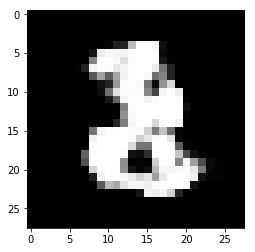

Loop: 532100, Generator_loss: -0.0043028, Discriminator_loss: 0.0048257
Loop: 532200, Generator_loss: -0.013948, Discriminator_loss: 0.0033533
Loop: 532300, Generator_loss: -0.0055214, Discriminator_loss: 0.002558
Loop: 532400, Generator_loss: -0.010135, Discriminator_loss: 0.0050915
Loop: 532500, Generator_loss: -0.0090713, Discriminator_loss: 0.0030212
Loop: 532600, Generator_loss: -0.0093819, Discriminator_loss: 0.0038355
Loop: 532700, Generator_loss: -0.0083335, Discriminator_loss: 0.0034745
Loop: 532800, Generator_loss: -0.0081939, Discriminator_loss: 0.003457
Loop: 532900, Generator_loss: -0.0090067, Discriminator_loss: 0.0038822
Loop: 533000, Generator_loss: -0.0093994, Discriminator_loss: 0.0021668


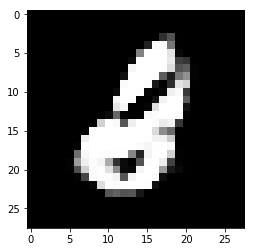

Loop: 533100, Generator_loss: -0.0086192, Discriminator_loss: 0.004674
Loop: 533200, Generator_loss: -0.0093229, Discriminator_loss: 0.0017077
Loop: 533300, Generator_loss: -0.013729, Discriminator_loss: 0.001769
Loop: 533400, Generator_loss: -0.0097198, Discriminator_loss: 0.003529
Loop: 533500, Generator_loss: -0.010185, Discriminator_loss: 0.0030602
Loop: 533600, Generator_loss: -0.0056579, Discriminator_loss: 0.0031157
Loop: 533700, Generator_loss: -0.0069722, Discriminator_loss: 0.0037357
Loop: 533800, Generator_loss: -0.010088, Discriminator_loss: 0.0039851
Loop: 533900, Generator_loss: -0.0078818, Discriminator_loss: 0.0037271
Loop: 534000, Generator_loss: -0.010342, Discriminator_loss: 0.0031912


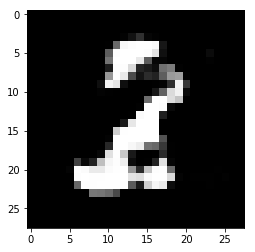

Loop: 534100, Generator_loss: -0.0096263, Discriminator_loss: 0.0020305
Loop: 534200, Generator_loss: -0.0087484, Discriminator_loss: 0.0024402
Loop: 534300, Generator_loss: -0.0068607, Discriminator_loss: 0.003612
Loop: 534400, Generator_loss: -0.0073099, Discriminator_loss: 0.0024539
Loop: 534500, Generator_loss: -0.0049908, Discriminator_loss: 0.0030254
Loop: 534600, Generator_loss: -0.011998, Discriminator_loss: 0.0042807
Loop: 534700, Generator_loss: -0.0082575, Discriminator_loss: 0.0040723
Loop: 534800, Generator_loss: -0.0087409, Discriminator_loss: 0.002542
Loop: 534900, Generator_loss: -0.0095619, Discriminator_loss: 0.0026201
Loop: 535000, Generator_loss: -0.0087925, Discriminator_loss: 0.0037054


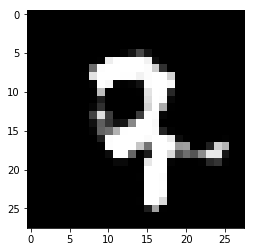

Loop: 535100, Generator_loss: -0.011308, Discriminator_loss: 0.0037705
Loop: 535200, Generator_loss: -0.015117, Discriminator_loss: 0.0044275
Loop: 535300, Generator_loss: -0.012935, Discriminator_loss: 0.0037729
Loop: 535400, Generator_loss: -0.012251, Discriminator_loss: 0.0031896
Loop: 535500, Generator_loss: -0.0086927, Discriminator_loss: 0.0023301
Loop: 535600, Generator_loss: -0.011101, Discriminator_loss: 0.0031627
Loop: 535700, Generator_loss: -0.0099365, Discriminator_loss: 0.0025006
Loop: 535800, Generator_loss: -0.008157, Discriminator_loss: 0.0041102
Loop: 535900, Generator_loss: -0.0087385, Discriminator_loss: 0.0032236
Loop: 536000, Generator_loss: -0.010652, Discriminator_loss: 0.0024332


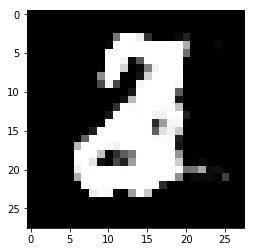

Loop: 536100, Generator_loss: -0.0069314, Discriminator_loss: 0.004943
Loop: 536200, Generator_loss: -0.01288, Discriminator_loss: 0.0031614
Loop: 536300, Generator_loss: -0.0079041, Discriminator_loss: 0.0028179
Loop: 536400, Generator_loss: -0.008451, Discriminator_loss: 0.0043987
Loop: 536500, Generator_loss: -0.0078091, Discriminator_loss: 0.0029866
Loop: 536600, Generator_loss: -0.0079317, Discriminator_loss: 0.0035865
Loop: 536700, Generator_loss: -0.01181, Discriminator_loss: 0.0023972
Loop: 536800, Generator_loss: -0.0038095, Discriminator_loss: 0.0046195
Loop: 536900, Generator_loss: -0.017728, Discriminator_loss: 0.0042299
Loop: 537000, Generator_loss: -0.0046365, Discriminator_loss: 0.0039714


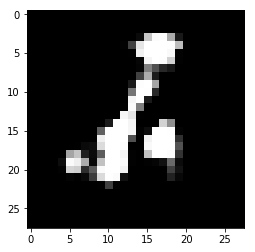

Loop: 537100, Generator_loss: -0.010655, Discriminator_loss: 0.0053478
Loop: 537200, Generator_loss: -0.012775, Discriminator_loss: -0.00011648
Loop: 537300, Generator_loss: -0.010179, Discriminator_loss: 0.0040768
Loop: 537400, Generator_loss: -0.0079784, Discriminator_loss: 0.0041905
Loop: 537500, Generator_loss: -0.0068748, Discriminator_loss: 0.0045628
Loop: 537600, Generator_loss: -0.0077354, Discriminator_loss: 0.0035891
Loop: 537700, Generator_loss: -0.010959, Discriminator_loss: 0.0034859
Loop: 537800, Generator_loss: -0.0088558, Discriminator_loss: 0.0025425
Loop: 537900, Generator_loss: -0.0094326, Discriminator_loss: 0.0033903
Loop: 538000, Generator_loss: -0.0069346, Discriminator_loss: 0.0027206


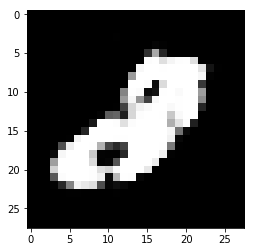

Loop: 538100, Generator_loss: -0.0091783, Discriminator_loss: 0.0041182
Loop: 538200, Generator_loss: -0.0058327, Discriminator_loss: 0.0040906
Loop: 538300, Generator_loss: -0.0074629, Discriminator_loss: 0.0038908
Loop: 538400, Generator_loss: -0.0045104, Discriminator_loss: 0.0043902
Loop: 538500, Generator_loss: -0.0044925, Discriminator_loss: 0.0043564
Loop: 538600, Generator_loss: -0.0030401, Discriminator_loss: 0.0050325
Loop: 538700, Generator_loss: -0.011348, Discriminator_loss: 0.0059967
Loop: 538800, Generator_loss: -0.0087444, Discriminator_loss: 0.0030338
Loop: 538900, Generator_loss: -0.011959, Discriminator_loss: 0.0035489
Loop: 539000, Generator_loss: -0.0084601, Discriminator_loss: 0.0013469


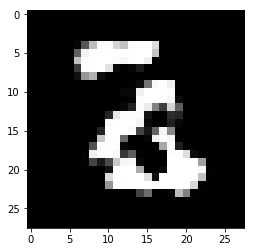

Loop: 539100, Generator_loss: -0.009713, Discriminator_loss: 0.0018509
Loop: 539200, Generator_loss: -0.0036626, Discriminator_loss: 0.0017446
Loop: 539300, Generator_loss: -0.0098631, Discriminator_loss: 0.0040255
Loop: 539400, Generator_loss: -0.0047334, Discriminator_loss: 0.0043355
Loop: 539500, Generator_loss: -0.003132, Discriminator_loss: 0.0035633
Loop: 539600, Generator_loss: -0.004157, Discriminator_loss: 0.0044385
Loop: 539700, Generator_loss: -0.0088627, Discriminator_loss: 0.0039702
Loop: 539800, Generator_loss: -0.015294, Discriminator_loss: 0.0029448
Loop: 539900, Generator_loss: -0.0053058, Discriminator_loss: 0.0024842
Loop: 540000, Generator_loss: -0.0072272, Discriminator_loss: 0.0027795


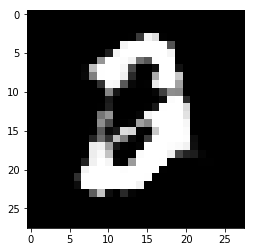

Loop: 540100, Generator_loss: -0.0068964, Discriminator_loss: 0.0020377
Loop: 540200, Generator_loss: -0.0082665, Discriminator_loss: 0.0011139
Loop: 540300, Generator_loss: -0.011725, Discriminator_loss: 0.001328
Loop: 540400, Generator_loss: -0.011051, Discriminator_loss: 0.0021036
Loop: 540500, Generator_loss: -0.014656, Discriminator_loss: 0.0059048
Loop: 540600, Generator_loss: -0.015469, Discriminator_loss: 0.0024632
Loop: 540700, Generator_loss: -0.013064, Discriminator_loss: 0.002168
Loop: 540800, Generator_loss: -0.0074826, Discriminator_loss: 0.0030198
Loop: 540900, Generator_loss: -0.011556, Discriminator_loss: 0.0033154
Loop: 541000, Generator_loss: -0.0069768, Discriminator_loss: 0.0065183


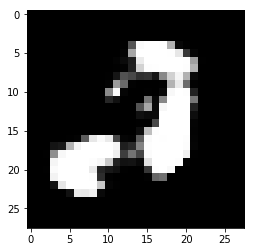

Loop: 541100, Generator_loss: -0.0096807, Discriminator_loss: 0.0034552
Loop: 541200, Generator_loss: -0.0084269, Discriminator_loss: 0.0040028
Loop: 541300, Generator_loss: -0.0045535, Discriminator_loss: 0.0032531
Loop: 541400, Generator_loss: -0.0083777, Discriminator_loss: 0.0036708
Loop: 541500, Generator_loss: -0.0090197, Discriminator_loss: 0.0038817
Loop: 541600, Generator_loss: -0.011017, Discriminator_loss: 0.0039569
Loop: 541700, Generator_loss: -0.0016529, Discriminator_loss: 0.0028532
Loop: 541800, Generator_loss: -0.011525, Discriminator_loss: 0.0024697
Loop: 541900, Generator_loss: -0.010135, Discriminator_loss: 0.0036014
Loop: 542000, Generator_loss: -0.004256, Discriminator_loss: 0.0029367


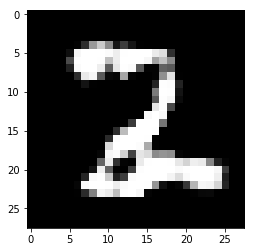

Loop: 542100, Generator_loss: -0.0049919, Discriminator_loss: 0.0045683
Loop: 542200, Generator_loss: -0.0080019, Discriminator_loss: 0.0029527
Loop: 542300, Generator_loss: -0.0077285, Discriminator_loss: 0.0023931
Loop: 542400, Generator_loss: -0.0070572, Discriminator_loss: 0.0043588
Loop: 542500, Generator_loss: -0.011605, Discriminator_loss: 0.0028034
Loop: 542600, Generator_loss: -0.015065, Discriminator_loss: 0.0025146
Loop: 542700, Generator_loss: -0.010509, Discriminator_loss: 0.0039402
Loop: 542800, Generator_loss: -0.018063, Discriminator_loss: 0.0023429
Loop: 542900, Generator_loss: -0.0070287, Discriminator_loss: 0.0014011
Loop: 543000, Generator_loss: -0.0063272, Discriminator_loss: 0.0036393


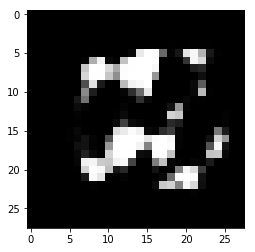

Loop: 543100, Generator_loss: -0.00933, Discriminator_loss: 0.0035021
Loop: 543200, Generator_loss: -0.016478, Discriminator_loss: 0.0042745
Loop: 543300, Generator_loss: -0.015993, Discriminator_loss: 0.0041249
Loop: 543400, Generator_loss: -0.0086357, Discriminator_loss: 0.004009
Loop: 543500, Generator_loss: -0.0052742, Discriminator_loss: 0.0037018
Loop: 543600, Generator_loss: -0.0048122, Discriminator_loss: 0.00023186
Loop: 543700, Generator_loss: -0.01022, Discriminator_loss: 0.0030235
Loop: 543800, Generator_loss: -0.0106, Discriminator_loss: 0.0035387
Loop: 543900, Generator_loss: -0.0099249, Discriminator_loss: 0.0018598
Loop: 544000, Generator_loss: -0.0052996, Discriminator_loss: 0.0038808


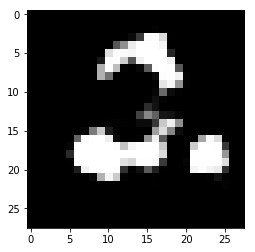

Loop: 544100, Generator_loss: -0.0043344, Discriminator_loss: 0.0053534
Loop: 544200, Generator_loss: -0.0066937, Discriminator_loss: 0.0027261
Loop: 544300, Generator_loss: -0.0051953, Discriminator_loss: 0.002364
Loop: 544400, Generator_loss: -0.0060461, Discriminator_loss: 0.0024662
Loop: 544500, Generator_loss: -0.005872, Discriminator_loss: 0.0040068
Loop: 544600, Generator_loss: -0.0089096, Discriminator_loss: 0.0028509
Loop: 544700, Generator_loss: -0.013448, Discriminator_loss: 0.0035624
Loop: 544800, Generator_loss: -0.011162, Discriminator_loss: 0.0044789
Loop: 544900, Generator_loss: -0.0066768, Discriminator_loss: 0.0025817
Loop: 545000, Generator_loss: -0.016052, Discriminator_loss: 0.0023697


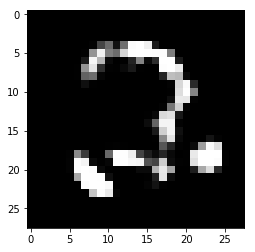

Loop: 545100, Generator_loss: -0.0094195, Discriminator_loss: 0.0016498
Loop: 545200, Generator_loss: -0.0058381, Discriminator_loss: 0.0029974
Loop: 545300, Generator_loss: -0.0099594, Discriminator_loss: 0.0029623
Loop: 545400, Generator_loss: -0.0063223, Discriminator_loss: 0.00038166
Loop: 545500, Generator_loss: -0.010178, Discriminator_loss: 0.0037986
Loop: 545600, Generator_loss: -0.0096028, Discriminator_loss: 0.0051958
Loop: 545700, Generator_loss: -0.013766, Discriminator_loss: 0.0036652
Loop: 545800, Generator_loss: -0.0073921, Discriminator_loss: 0.0026382
Loop: 545900, Generator_loss: -0.0033798, Discriminator_loss: 0.0039349
Loop: 546000, Generator_loss: -0.007702, Discriminator_loss: 0.0044342


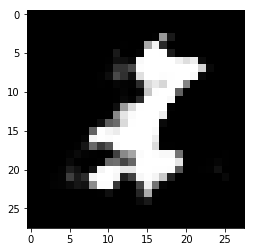

Loop: 546100, Generator_loss: -0.0095456, Discriminator_loss: 0.0028649
Loop: 546200, Generator_loss: -0.0074987, Discriminator_loss: 0.004664
Loop: 546300, Generator_loss: -0.0059573, Discriminator_loss: 0.003618
Loop: 546400, Generator_loss: -0.010609, Discriminator_loss: 0.0040273
Loop: 546500, Generator_loss: -0.0068767, Discriminator_loss: 0.0052917
Loop: 546600, Generator_loss: -0.0061714, Discriminator_loss: 0.0030493
Loop: 546700, Generator_loss: -0.0070865, Discriminator_loss: 0.0035107
Loop: 546800, Generator_loss: -0.0094824, Discriminator_loss: 0.0042634
Loop: 546900, Generator_loss: -0.013793, Discriminator_loss: 0.0052169
Loop: 547000, Generator_loss: -0.0023357, Discriminator_loss: 0.0034482


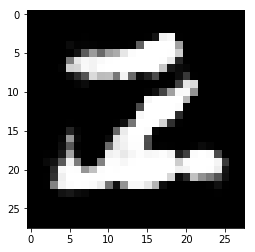

Loop: 547100, Generator_loss: -0.0084944, Discriminator_loss: 0.0042577
Loop: 547200, Generator_loss: -0.0061891, Discriminator_loss: 0.0021536
Loop: 547300, Generator_loss: -0.0010755, Discriminator_loss: 0.0028481
Loop: 547400, Generator_loss: -0.010496, Discriminator_loss: 0.0022596
Loop: 547500, Generator_loss: -0.012953, Discriminator_loss: 0.0033422
Loop: 547600, Generator_loss: -0.0067981, Discriminator_loss: 0.0026974
Loop: 547700, Generator_loss: -0.0036559, Discriminator_loss: 0.0027304
Loop: 547800, Generator_loss: -0.015562, Discriminator_loss: 0.0055225
Loop: 547900, Generator_loss: -0.0157, Discriminator_loss: 0.0044558
Loop: 548000, Generator_loss: -0.012311, Discriminator_loss: 0.0023441


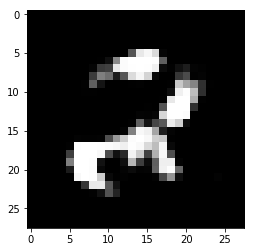

Loop: 548100, Generator_loss: 0.00037213, Discriminator_loss: 0.0043995
Loop: 548200, Generator_loss: -0.0051497, Discriminator_loss: 0.002448
Loop: 548300, Generator_loss: -0.0063003, Discriminator_loss: 0.0028851
Loop: 548400, Generator_loss: -0.0091693, Discriminator_loss: 0.0045141
Loop: 548500, Generator_loss: -0.010414, Discriminator_loss: 0.003411
Loop: 548600, Generator_loss: -0.010216, Discriminator_loss: 0.00074669
Loop: 548700, Generator_loss: -0.0071516, Discriminator_loss: 0.0036384
Loop: 548800, Generator_loss: -0.0047879, Discriminator_loss: 0.0032882
Loop: 548900, Generator_loss: -0.0060602, Discriminator_loss: 0.0032463
Loop: 549000, Generator_loss: -0.0090088, Discriminator_loss: 0.0040249


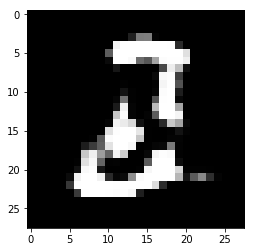

Loop: 549100, Generator_loss: -0.0045824, Discriminator_loss: 0.002665
Loop: 549200, Generator_loss: -0.0053458, Discriminator_loss: 0.0050871
Loop: 549300, Generator_loss: -0.0086111, Discriminator_loss: 0.0023137
Loop: 549400, Generator_loss: -0.013373, Discriminator_loss: 0.0037037
Loop: 549500, Generator_loss: -0.0067453, Discriminator_loss: 0.0031201
Loop: 549600, Generator_loss: -0.0077291, Discriminator_loss: 0.0036835
Loop: 549700, Generator_loss: -0.0090317, Discriminator_loss: 0.0021919
Loop: 549800, Generator_loss: -0.0090895, Discriminator_loss: 0.0043324
Loop: 549900, Generator_loss: -0.0089943, Discriminator_loss: 0.0036793
Loop: 550000, Generator_loss: -0.01089, Discriminator_loss: 0.0021738


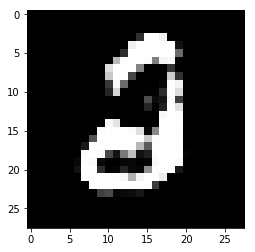

Loop: 550100, Generator_loss: -0.0079763, Discriminator_loss: -0.00082664
Loop: 550200, Generator_loss: -0.0098231, Discriminator_loss: 0.0029297
Loop: 550300, Generator_loss: -0.007673, Discriminator_loss: 0.0016134
Loop: 550400, Generator_loss: -0.0037879, Discriminator_loss: 0.0028419
Loop: 550500, Generator_loss: -0.0084453, Discriminator_loss: 0.0028336
Loop: 550600, Generator_loss: -0.0063243, Discriminator_loss: 0.0028437
Loop: 550700, Generator_loss: -0.0055785, Discriminator_loss: 0.0008843
Loop: 550800, Generator_loss: -0.0090266, Discriminator_loss: 0.002762
Loop: 550900, Generator_loss: -0.0042104, Discriminator_loss: 0.0023012
Loop: 551000, Generator_loss: -0.006736, Discriminator_loss: 0.0029183


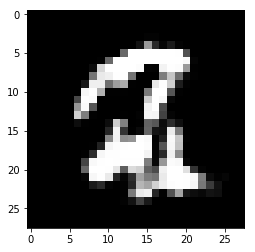

Loop: 551100, Generator_loss: -0.011759, Discriminator_loss: 0.0055551
Loop: 551200, Generator_loss: -0.0057407, Discriminator_loss: 0.0020045
Loop: 551300, Generator_loss: -0.012634, Discriminator_loss: 0.0031056
Loop: 551400, Generator_loss: -0.0071064, Discriminator_loss: 0.003156
Loop: 551500, Generator_loss: -0.0099306, Discriminator_loss: 0.0029336
Loop: 551600, Generator_loss: -0.0093203, Discriminator_loss: 0.0036561
Loop: 551700, Generator_loss: -0.012611, Discriminator_loss: 0.0021924
Loop: 551800, Generator_loss: -0.0085011, Discriminator_loss: 0.0033985
Loop: 551900, Generator_loss: -0.008382, Discriminator_loss: 0.0030746
Loop: 552000, Generator_loss: -0.0082085, Discriminator_loss: 0.0031909


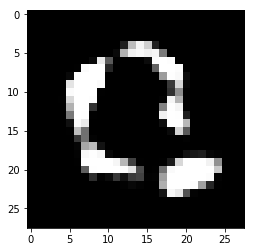

Loop: 552100, Generator_loss: -0.010666, Discriminator_loss: 0.0035706
Loop: 552200, Generator_loss: -0.0090583, Discriminator_loss: 0.0013946
Loop: 552300, Generator_loss: -0.0054834, Discriminator_loss: 0.0040001
Loop: 552400, Generator_loss: -0.0094943, Discriminator_loss: 0.0017256
Loop: 552500, Generator_loss: -0.008307, Discriminator_loss: 0.0014271
Loop: 552600, Generator_loss: -0.0060563, Discriminator_loss: 0.0022762
Loop: 552700, Generator_loss: -0.010055, Discriminator_loss: 0.0045438
Loop: 552800, Generator_loss: -0.0048499, Discriminator_loss: 0.0023699
Loop: 552900, Generator_loss: -0.0033293, Discriminator_loss: 0.0023456
Loop: 553000, Generator_loss: -0.0036386, Discriminator_loss: 0.0014468


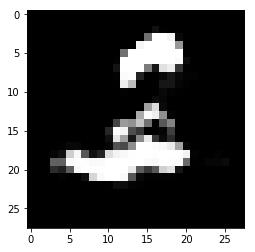

Loop: 553100, Generator_loss: -0.0074779, Discriminator_loss: 0.00099268
Loop: 553200, Generator_loss: -0.0085449, Discriminator_loss: 0.0036042
Loop: 553300, Generator_loss: -0.016809, Discriminator_loss: 0.0034564
Loop: 553400, Generator_loss: -0.0018761, Discriminator_loss: 0.0031007
Loop: 553500, Generator_loss: -0.0060394, Discriminator_loss: 0.00053208
Loop: 553600, Generator_loss: -0.014715, Discriminator_loss: 0.002115
Loop: 553700, Generator_loss: -0.0073949, Discriminator_loss: 0.0030272
Loop: 553800, Generator_loss: -0.010547, Discriminator_loss: 0.0045849
Loop: 553900, Generator_loss: -0.013627, Discriminator_loss: 0.0032352
Loop: 554000, Generator_loss: -0.011235, Discriminator_loss: 0.004087


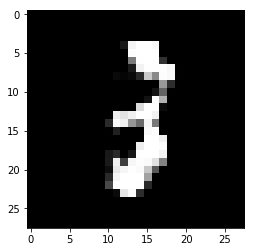

Loop: 554100, Generator_loss: -0.0073866, Discriminator_loss: 0.0035045
Loop: 554200, Generator_loss: -0.0044334, Discriminator_loss: 0.0027546
Loop: 554300, Generator_loss: -0.0042525, Discriminator_loss: 0.0021916
Loop: 554400, Generator_loss: -0.0062505, Discriminator_loss: 0.003233
Loop: 554500, Generator_loss: -0.014002, Discriminator_loss: 0.0033474
Loop: 554600, Generator_loss: -0.0085221, Discriminator_loss: 0.002197
Loop: 554700, Generator_loss: -0.0080923, Discriminator_loss: 0.0035815
Loop: 554800, Generator_loss: -0.013322, Discriminator_loss: 0.0031221
Loop: 554900, Generator_loss: -0.010482, Discriminator_loss: 0.0040554
Loop: 555000, Generator_loss: -0.012425, Discriminator_loss: 0.0040189


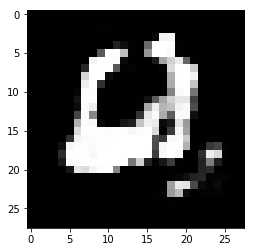

Loop: 555100, Generator_loss: -0.013304, Discriminator_loss: 0.0044589
Loop: 555200, Generator_loss: -0.0078894, Discriminator_loss: 0.001585
Loop: 555300, Generator_loss: -0.0066892, Discriminator_loss: 0.0031468
Loop: 555400, Generator_loss: -0.010451, Discriminator_loss: 0.0026164
Loop: 555500, Generator_loss: -0.011211, Discriminator_loss: 0.00468
Loop: 555600, Generator_loss: -0.0029754, Discriminator_loss: 0.0032512
Loop: 555700, Generator_loss: -0.01107, Discriminator_loss: 0.0037692
Loop: 555800, Generator_loss: -0.0095612, Discriminator_loss: 0.0023683
Loop: 555900, Generator_loss: -0.011163, Discriminator_loss: 0.0027131
Loop: 556000, Generator_loss: -0.0091725, Discriminator_loss: 0.0033331


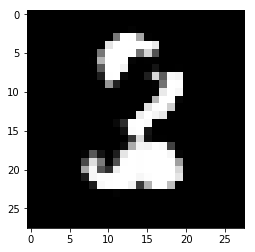

Loop: 556100, Generator_loss: -0.011027, Discriminator_loss: 0.0042216
Loop: 556200, Generator_loss: -0.0092285, Discriminator_loss: 0.0038164
Loop: 556300, Generator_loss: -0.010743, Discriminator_loss: 0.0032057
Loop: 556400, Generator_loss: -0.0046729, Discriminator_loss: 0.0036915
Loop: 556500, Generator_loss: -0.0072755, Discriminator_loss: 0.0034789
Loop: 556600, Generator_loss: -0.011068, Discriminator_loss: 0.0041672
Loop: 556700, Generator_loss: -0.011337, Discriminator_loss: 0.0050787
Loop: 556800, Generator_loss: -0.0026426, Discriminator_loss: 0.0033784
Loop: 556900, Generator_loss: -0.0098484, Discriminator_loss: 0.0056115
Loop: 557000, Generator_loss: -0.0094228, Discriminator_loss: 0.00044448


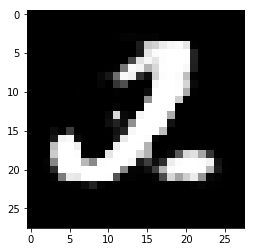

Loop: 557100, Generator_loss: -0.0038922, Discriminator_loss: 0.0019415
Loop: 557200, Generator_loss: -0.0053446, Discriminator_loss: 0.0022732
Loop: 557300, Generator_loss: -0.006786, Discriminator_loss: 0.0049866
Loop: 557400, Generator_loss: -0.011062, Discriminator_loss: 0.0021729
Loop: 557500, Generator_loss: -0.0040401, Discriminator_loss: 0.0042434
Loop: 557600, Generator_loss: -0.011156, Discriminator_loss: 0.0048837
Loop: 557700, Generator_loss: -0.0069726, Discriminator_loss: 0.0041005
Loop: 557800, Generator_loss: -0.0090596, Discriminator_loss: 0.0041682
Loop: 557900, Generator_loss: -0.0041543, Discriminator_loss: 0.0034216
Loop: 558000, Generator_loss: -0.0073728, Discriminator_loss: 0.0041777


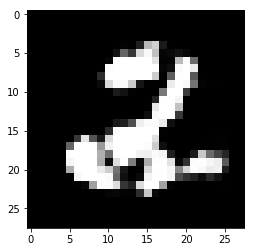

Loop: 558100, Generator_loss: -0.0063855, Discriminator_loss: 0.0013055
Loop: 558200, Generator_loss: -0.0073997, Discriminator_loss: 0.0028961
Loop: 558300, Generator_loss: -0.0073312, Discriminator_loss: 0.0052059
Loop: 558400, Generator_loss: -0.0086352, Discriminator_loss: 0.0026529
Loop: 558500, Generator_loss: -0.0094749, Discriminator_loss: 0.0034972
Loop: 558600, Generator_loss: -0.011023, Discriminator_loss: 0.0067311
Loop: 558700, Generator_loss: -0.0084343, Discriminator_loss: 0.0026933
Loop: 558800, Generator_loss: -0.0063195, Discriminator_loss: 0.0048051
Loop: 558900, Generator_loss: -0.0078572, Discriminator_loss: 0.0038191
Loop: 559000, Generator_loss: -0.006704, Discriminator_loss: 0.0036552


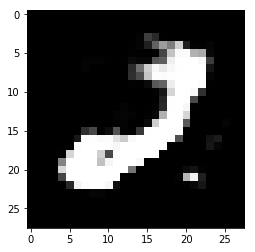

Loop: 559100, Generator_loss: -0.010949, Discriminator_loss: 0.0034031
Loop: 559200, Generator_loss: -0.0090769, Discriminator_loss: 0.0033662
Loop: 559300, Generator_loss: -0.0052175, Discriminator_loss: 0.0038456
Loop: 559400, Generator_loss: -0.0027869, Discriminator_loss: 0.0044403
Loop: 559500, Generator_loss: -0.0055919, Discriminator_loss: 0.00066201
Loop: 559600, Generator_loss: -0.0069899, Discriminator_loss: 0.001825
Loop: 559700, Generator_loss: -0.0079265, Discriminator_loss: 0.0029806
Loop: 559800, Generator_loss: -0.012699, Discriminator_loss: 0.0019476
Loop: 559900, Generator_loss: -0.0025079, Discriminator_loss: 0.0037662
Loop: 560000, Generator_loss: -0.010219, Discriminator_loss: 0.0016613


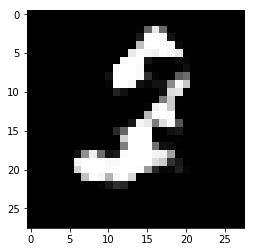

Loop: 560100, Generator_loss: -0.0045237, Discriminator_loss: 0.003481
Loop: 560200, Generator_loss: -0.01153, Discriminator_loss: 0.002971
Loop: 560300, Generator_loss: -0.012247, Discriminator_loss: 0.001346
Loop: 560400, Generator_loss: -0.004405, Discriminator_loss: 0.0045305
Loop: 560500, Generator_loss: -0.0073552, Discriminator_loss: 0.0031352
Loop: 560600, Generator_loss: -0.0082316, Discriminator_loss: 0.0032203
Loop: 560700, Generator_loss: -0.010201, Discriminator_loss: 0.0054758
Loop: 560800, Generator_loss: -0.012216, Discriminator_loss: 0.002147
Loop: 560900, Generator_loss: -0.0021457, Discriminator_loss: 0.0043569
Loop: 561000, Generator_loss: -0.0023807, Discriminator_loss: 0.0033738


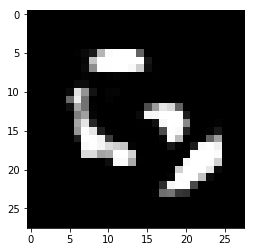

Loop: 561100, Generator_loss: -0.0068218, Discriminator_loss: 0.0016097
Loop: 561200, Generator_loss: -0.0020908, Discriminator_loss: 0.0052761
Loop: 561300, Generator_loss: -0.0047611, Discriminator_loss: 0.003368
Loop: 561400, Generator_loss: -0.0068308, Discriminator_loss: 0.0023109
Loop: 561500, Generator_loss: -0.0069722, Discriminator_loss: 0.0028826
Loop: 561600, Generator_loss: -0.0056457, Discriminator_loss: 0.00041773
Loop: 561700, Generator_loss: -0.0091623, Discriminator_loss: 0.0022992
Loop: 561800, Generator_loss: -0.013576, Discriminator_loss: 0.0034834
Loop: 561900, Generator_loss: -0.0051603, Discriminator_loss: 0.0013093
Loop: 562000, Generator_loss: -0.0075099, Discriminator_loss: 0.0029198


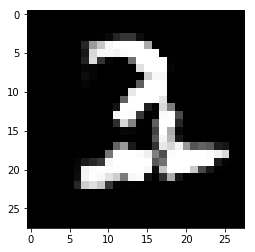

Loop: 562100, Generator_loss: -0.0049326, Discriminator_loss: 0.00090885
Loop: 562200, Generator_loss: -0.0059208, Discriminator_loss: 0.0031728
Loop: 562300, Generator_loss: -0.0079154, Discriminator_loss: 0.0018107
Loop: 562400, Generator_loss: -0.0062198, Discriminator_loss: 0.0032839
Loop: 562500, Generator_loss: -0.0028506, Discriminator_loss: 0.0049478
Loop: 562600, Generator_loss: -0.012482, Discriminator_loss: 0.0028983
Loop: 562700, Generator_loss: -0.0073723, Discriminator_loss: 0.0043045
Loop: 562800, Generator_loss: -0.003363, Discriminator_loss: 0.0010238
Loop: 562900, Generator_loss: -0.0084994, Discriminator_loss: 0.0021755
Loop: 563000, Generator_loss: -0.0090705, Discriminator_loss: 0.0051128


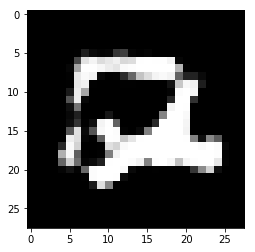

Loop: 563100, Generator_loss: -0.0064477, Discriminator_loss: 0.0033462
Loop: 563200, Generator_loss: -0.0097275, Discriminator_loss: 0.00056638
Loop: 563300, Generator_loss: -0.0091031, Discriminator_loss: 0.0019514
Loop: 563400, Generator_loss: -0.0071477, Discriminator_loss: 0.0050013
Loop: 563500, Generator_loss: -0.014378, Discriminator_loss: 0.0034704
Loop: 563600, Generator_loss: -0.0044846, Discriminator_loss: 0.0047076
Loop: 563700, Generator_loss: -0.0072711, Discriminator_loss: 0.0064075
Loop: 563800, Generator_loss: -0.0054, Discriminator_loss: 0.00074621
Loop: 563900, Generator_loss: -0.0066197, Discriminator_loss: 0.0028278
Loop: 564000, Generator_loss: -0.0075337, Discriminator_loss: 0.0019375


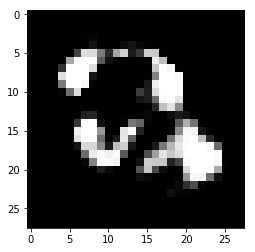

Loop: 564100, Generator_loss: -0.0085018, Discriminator_loss: 0.0022646
Loop: 564200, Generator_loss: -0.0058524, Discriminator_loss: 0.0029939
Loop: 564300, Generator_loss: -0.010536, Discriminator_loss: 0.0028735
Loop: 564400, Generator_loss: -0.0036735, Discriminator_loss: -0.0001067
Loop: 564500, Generator_loss: -0.0078218, Discriminator_loss: 0.0032874
Loop: 564600, Generator_loss: -0.0046274, Discriminator_loss: 0.0039415
Loop: 564700, Generator_loss: -0.0070424, Discriminator_loss: 0.0052551
Loop: 564800, Generator_loss: -0.003484, Discriminator_loss: 0.0028279
Loop: 564900, Generator_loss: -0.0068112, Discriminator_loss: 0.0033674
Loop: 565000, Generator_loss: -0.0061753, Discriminator_loss: 0.0013039


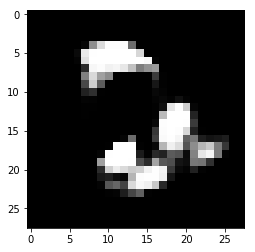

Loop: 565100, Generator_loss: -0.0077314, Discriminator_loss: 0.0025936
Loop: 565200, Generator_loss: -0.010509, Discriminator_loss: 0.0029743
Loop: 565300, Generator_loss: -0.00926, Discriminator_loss: 0.0014437
Loop: 565400, Generator_loss: -0.0058966, Discriminator_loss: 0.0019192
Loop: 565500, Generator_loss: -0.0050379, Discriminator_loss: 0.0024285
Loop: 565600, Generator_loss: -0.013287, Discriminator_loss: 0.0041492
Loop: 565700, Generator_loss: -0.011868, Discriminator_loss: 0.0039227
Loop: 565800, Generator_loss: -0.0087073, Discriminator_loss: 0.0042545
Loop: 565900, Generator_loss: -0.010743, Discriminator_loss: 0.0033112
Loop: 566000, Generator_loss: -0.0060239, Discriminator_loss: 0.00071869


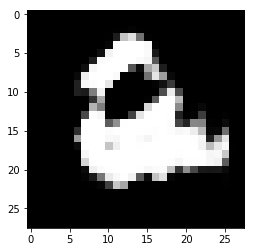

Loop: 566100, Generator_loss: -0.010605, Discriminator_loss: 0.0029576
Loop: 566200, Generator_loss: -0.0091589, Discriminator_loss: 0.0028389
Loop: 566300, Generator_loss: -0.010992, Discriminator_loss: 0.0025747
Loop: 566400, Generator_loss: -0.0078292, Discriminator_loss: 0.0025783
Loop: 566500, Generator_loss: -0.0099173, Discriminator_loss: 0.0023401
Loop: 566600, Generator_loss: -0.0066087, Discriminator_loss: 0.00094885
Loop: 566700, Generator_loss: -0.0057112, Discriminator_loss: 0.0041479
Loop: 566800, Generator_loss: -0.010792, Discriminator_loss: 0.0031503
Loop: 566900, Generator_loss: -0.010104, Discriminator_loss: 0.0034986
Loop: 567000, Generator_loss: -0.0097453, Discriminator_loss: 0.0037185


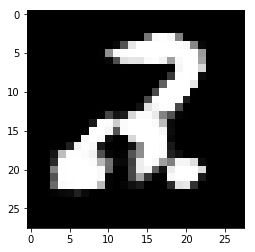

Loop: 567100, Generator_loss: -0.0098722, Discriminator_loss: 0.0050022
Loop: 567200, Generator_loss: -0.010003, Discriminator_loss: 0.0035824
Loop: 567300, Generator_loss: -0.0074358, Discriminator_loss: 0.0031133
Loop: 567400, Generator_loss: -0.0089104, Discriminator_loss: 0.001256
Loop: 567500, Generator_loss: -0.013582, Discriminator_loss: 0.0050267
Loop: 567600, Generator_loss: -0.0079268, Discriminator_loss: 0.0046676
Loop: 567700, Generator_loss: -0.007032, Discriminator_loss: 0.0034915
Loop: 567800, Generator_loss: -0.0080767, Discriminator_loss: 0.002371
Loop: 567900, Generator_loss: -0.0081218, Discriminator_loss: 0.0029139
Loop: 568000, Generator_loss: -0.0054206, Discriminator_loss: 0.0037755


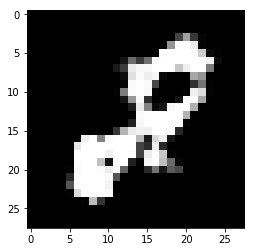

Loop: 568100, Generator_loss: -0.0096831, Discriminator_loss: 0.0024462
Loop: 568200, Generator_loss: -0.0037389, Discriminator_loss: 0.0025601
Loop: 568300, Generator_loss: -0.0070598, Discriminator_loss: 0.0036034
Loop: 568400, Generator_loss: -0.0073654, Discriminator_loss: 0.0043529
Loop: 568500, Generator_loss: -0.0085273, Discriminator_loss: 0.0036399
Loop: 568600, Generator_loss: -0.0089797, Discriminator_loss: 0.0038592
Loop: 568700, Generator_loss: -0.010422, Discriminator_loss: 0.003324
Loop: 568800, Generator_loss: -0.0047475, Discriminator_loss: 0.0021458
Loop: 568900, Generator_loss: -0.01193, Discriminator_loss: 0.0027444
Loop: 569000, Generator_loss: -0.0016017, Discriminator_loss: 0.0035252


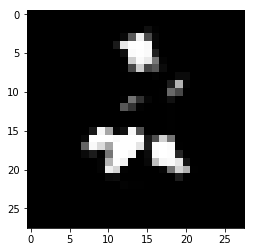

Loop: 569100, Generator_loss: -0.0013311, Discriminator_loss: 0.0042814
Loop: 569200, Generator_loss: -0.0080321, Discriminator_loss: 0.0050596
Loop: 569300, Generator_loss: -0.0071021, Discriminator_loss: 0.003235
Loop: 569400, Generator_loss: -0.0088397, Discriminator_loss: 0.0036688
Loop: 569500, Generator_loss: -0.0085812, Discriminator_loss: 0.0016757
Loop: 569600, Generator_loss: -0.0090638, Discriminator_loss: 0.0024944
Loop: 569700, Generator_loss: -0.004735, Discriminator_loss: 0.0016656
Loop: 569800, Generator_loss: -0.0082373, Discriminator_loss: 0.0031064
Loop: 569900, Generator_loss: -0.0084258, Discriminator_loss: 0.0027865
Loop: 570000, Generator_loss: -0.0095434, Discriminator_loss: 0.0033209


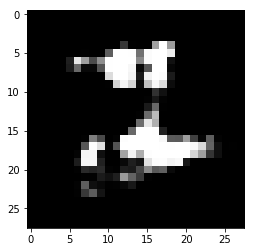

Loop: 570100, Generator_loss: -0.0060278, Discriminator_loss: 0.0051457
Loop: 570200, Generator_loss: -0.0044628, Discriminator_loss: 0.0019695
Loop: 570300, Generator_loss: -0.0076298, Discriminator_loss: 0.0031551
Loop: 570400, Generator_loss: -0.0075593, Discriminator_loss: 0.0029317
Loop: 570500, Generator_loss: -0.0078835, Discriminator_loss: 0.003278
Loop: 570600, Generator_loss: -0.010457, Discriminator_loss: 0.0036996
Loop: 570700, Generator_loss: -0.012118, Discriminator_loss: 0.00013523
Loop: 570800, Generator_loss: -0.011614, Discriminator_loss: 0.0033834
Loop: 570900, Generator_loss: -0.010954, Discriminator_loss: 0.0024757
Loop: 571000, Generator_loss: -0.0069202, Discriminator_loss: 0.0030059


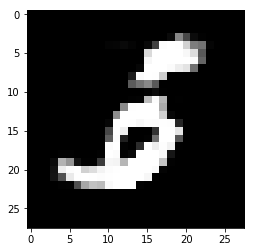

Loop: 571100, Generator_loss: -0.0084672, Discriminator_loss: 0.0036027
Loop: 571200, Generator_loss: -0.0041176, Discriminator_loss: 0.0045825
Loop: 571300, Generator_loss: -0.0016779, Discriminator_loss: 0.0030813
Loop: 571400, Generator_loss: -0.0055238, Discriminator_loss: 0.0050375
Loop: 571500, Generator_loss: -0.0043326, Discriminator_loss: 0.0041449
Loop: 571600, Generator_loss: -0.013481, Discriminator_loss: 0.004389
Loop: 571700, Generator_loss: -0.0038304, Discriminator_loss: 0.0066967
Loop: 571800, Generator_loss: -0.010565, Discriminator_loss: 0.002984
Loop: 571900, Generator_loss: -0.006814, Discriminator_loss: 0.0027557
Loop: 572000, Generator_loss: -0.0088384, Discriminator_loss: 0.0046165


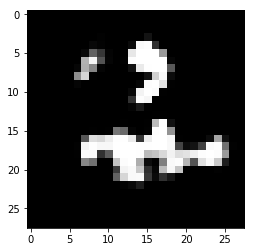

Loop: 572100, Generator_loss: -0.0057704, Discriminator_loss: 0.0035333
Loop: 572200, Generator_loss: -0.0053153, Discriminator_loss: 0.0040893
Loop: 572300, Generator_loss: -0.004223, Discriminator_loss: -0.0010535
Loop: 572400, Generator_loss: -0.0043669, Discriminator_loss: 0.0067229
Loop: 572500, Generator_loss: -0.010003, Discriminator_loss: 0.0024771
Loop: 572600, Generator_loss: -0.0041363, Discriminator_loss: 0.0010558
Loop: 572700, Generator_loss: -0.0040479, Discriminator_loss: 0.0038524
Loop: 572800, Generator_loss: -0.010652, Discriminator_loss: 0.0022457
Loop: 572900, Generator_loss: -0.011515, Discriminator_loss: 0.0028636
Loop: 573000, Generator_loss: -0.0060524, Discriminator_loss: 0.0043292


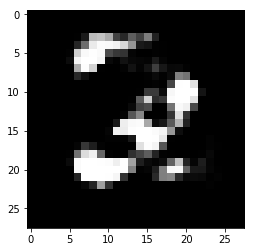

Loop: 573100, Generator_loss: -0.0024902, Discriminator_loss: 0.004498
Loop: 573200, Generator_loss: -0.012302, Discriminator_loss: 0.0053397
Loop: 573300, Generator_loss: -0.011308, Discriminator_loss: 0.0040495
Loop: 573400, Generator_loss: -0.0037796, Discriminator_loss: 0.0052984
Loop: 573500, Generator_loss: -0.0082687, Discriminator_loss: 0.0024658
Loop: 573600, Generator_loss: -0.0042817, Discriminator_loss: 0.002659
Loop: 573700, Generator_loss: -0.0066519, Discriminator_loss: 0.0037066
Loop: 573800, Generator_loss: -0.011379, Discriminator_loss: 0.0036272
Loop: 573900, Generator_loss: -0.012138, Discriminator_loss: 0.0047385
Loop: 574000, Generator_loss: -0.0094105, Discriminator_loss: 0.0051833


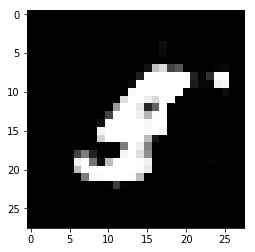

Loop: 574100, Generator_loss: -0.0037817, Discriminator_loss: 0.0015876
Loop: 574200, Generator_loss: -0.007309, Discriminator_loss: 0.0037536
Loop: 574300, Generator_loss: -0.014918, Discriminator_loss: 0.0054133
Loop: 574400, Generator_loss: -0.0086581, Discriminator_loss: 0.0024562
Loop: 574500, Generator_loss: -0.0033407, Discriminator_loss: 0.0027013
Loop: 574600, Generator_loss: -0.01201, Discriminator_loss: 0.0035624
Loop: 574700, Generator_loss: -0.010812, Discriminator_loss: 0.0033677
Loop: 574800, Generator_loss: -0.0075722, Discriminator_loss: 0.0044063
Loop: 574900, Generator_loss: -0.0046391, Discriminator_loss: 0.0037044
Loop: 575000, Generator_loss: -0.0030146, Discriminator_loss: 0.0018308


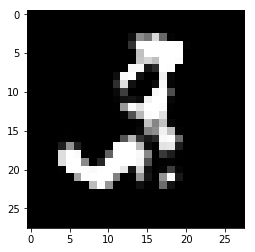

Loop: 575100, Generator_loss: -0.010981, Discriminator_loss: 0.0025696
Loop: 575200, Generator_loss: -0.0050926, Discriminator_loss: 0.0029303
Loop: 575300, Generator_loss: -0.0063752, Discriminator_loss: 0.0016649
Loop: 575400, Generator_loss: -0.0082157, Discriminator_loss: 0.0031612
Loop: 575500, Generator_loss: -0.0064675, Discriminator_loss: 0.002902
Loop: 575600, Generator_loss: -0.0065744, Discriminator_loss: 0.0045439
Loop: 575700, Generator_loss: -0.01059, Discriminator_loss: 0.0032165
Loop: 575800, Generator_loss: -0.016214, Discriminator_loss: 0.0032273
Loop: 575900, Generator_loss: -0.0050784, Discriminator_loss: 0.0024467
Loop: 576000, Generator_loss: -0.010471, Discriminator_loss: 0.0024706


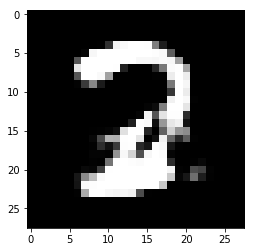

Loop: 576100, Generator_loss: -0.0039746, Discriminator_loss: 0.003261
Loop: 576200, Generator_loss: -0.0044463, Discriminator_loss: 0.0051407
Loop: 576300, Generator_loss: -0.00088998, Discriminator_loss: 0.002231
Loop: 576400, Generator_loss: -0.00909, Discriminator_loss: 0.0029264
Loop: 576500, Generator_loss: -0.0093505, Discriminator_loss: 0.0025459
Loop: 576600, Generator_loss: -0.010194, Discriminator_loss: 0.0027588
Loop: 576700, Generator_loss: -0.0083977, Discriminator_loss: 0.0020086
Loop: 576800, Generator_loss: -0.0018349, Discriminator_loss: 0.00049682
Loop: 576900, Generator_loss: -0.0098166, Discriminator_loss: 0.00027691
Loop: 577000, Generator_loss: -0.010622, Discriminator_loss: 0.0018204


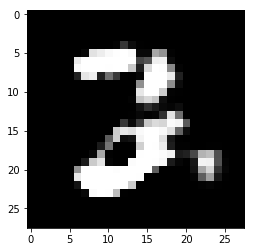

Loop: 577100, Generator_loss: -0.0065654, Discriminator_loss: 0.002389
Loop: 577200, Generator_loss: -0.0090857, Discriminator_loss: 0.0039299
Loop: 577300, Generator_loss: -0.0020609, Discriminator_loss: 0.0033552
Loop: 577400, Generator_loss: -0.0093622, Discriminator_loss: 0.0038297
Loop: 577500, Generator_loss: -0.0099769, Discriminator_loss: 0.0031589
Loop: 577600, Generator_loss: -0.0017539, Discriminator_loss: 0.0041754
Loop: 577700, Generator_loss: -0.0077453, Discriminator_loss: 0.003477
Loop: 577800, Generator_loss: -0.003891, Discriminator_loss: 0.0039254
Loop: 577900, Generator_loss: -0.0087761, Discriminator_loss: 0.00317
Loop: 578000, Generator_loss: -0.0082941, Discriminator_loss: 0.0030106


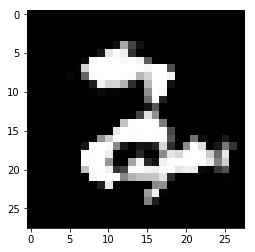

Loop: 578100, Generator_loss: -0.0096544, Discriminator_loss: 0.0034735
Loop: 578200, Generator_loss: -0.003951, Discriminator_loss: 0.002182
Loop: 578300, Generator_loss: -0.0031081, Discriminator_loss: 0.0040267
Loop: 578400, Generator_loss: -0.010936, Discriminator_loss: 0.0020821
Loop: 578500, Generator_loss: -0.010556, Discriminator_loss: 0.0029559
Loop: 578600, Generator_loss: -0.0078121, Discriminator_loss: 0.0031934
Loop: 578700, Generator_loss: -0.013988, Discriminator_loss: 0.0027857
Loop: 578800, Generator_loss: -0.0053896, Discriminator_loss: 0.0045308
Loop: 578900, Generator_loss: -0.010444, Discriminator_loss: 0.0020345
Loop: 579000, Generator_loss: -0.015304, Discriminator_loss: 0.0033344


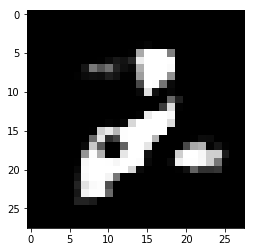

Loop: 579100, Generator_loss: -0.006652, Discriminator_loss: 0.003768
Loop: 579200, Generator_loss: -0.007119, Discriminator_loss: 0.0033983
Loop: 579300, Generator_loss: -0.010433, Discriminator_loss: 0.0024206
Loop: 579400, Generator_loss: -0.014607, Discriminator_loss: 0.0014092
Loop: 579500, Generator_loss: -0.0099451, Discriminator_loss: 0.0036918
Loop: 579600, Generator_loss: -0.008452, Discriminator_loss: 0.0038917
Loop: 579700, Generator_loss: -0.01089, Discriminator_loss: 0.0036955
Loop: 579800, Generator_loss: -0.010693, Discriminator_loss: 0.0013763
Loop: 579900, Generator_loss: -0.0064916, Discriminator_loss: 0.0024311
Loop: 580000, Generator_loss: -0.0098036, Discriminator_loss: 0.0042305


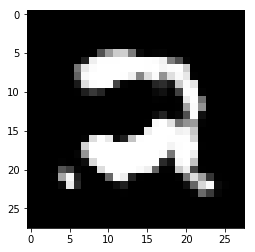

Loop: 580100, Generator_loss: -0.0079294, Discriminator_loss: 0.0041077
Loop: 580200, Generator_loss: -0.0069729, Discriminator_loss: 0.003885
Loop: 580300, Generator_loss: -0.0075495, Discriminator_loss: 0.0030009
Loop: 580400, Generator_loss: -0.005725, Discriminator_loss: 0.0023209
Loop: 580500, Generator_loss: -0.0081825, Discriminator_loss: 0.0063248
Loop: 580600, Generator_loss: -0.012261, Discriminator_loss: 0.0036455
Loop: 580700, Generator_loss: -0.0044452, Discriminator_loss: 0.0026129
Loop: 580800, Generator_loss: -0.0067608, Discriminator_loss: 0.0038923
Loop: 580900, Generator_loss: -0.010661, Discriminator_loss: 0.0021843
Loop: 581000, Generator_loss: -0.0086945, Discriminator_loss: 0.0029841


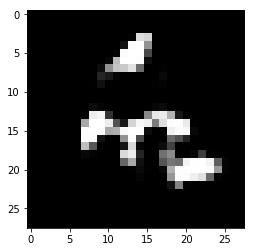

Loop: 581100, Generator_loss: -0.0081604, Discriminator_loss: 0.001834
Loop: 581200, Generator_loss: -0.0068161, Discriminator_loss: 0.0023835
Loop: 581300, Generator_loss: -0.005639, Discriminator_loss: 0.006462
Loop: 581400, Generator_loss: -0.010773, Discriminator_loss: 0.0049712
Loop: 581500, Generator_loss: -0.0058651, Discriminator_loss: 0.0038675
Loop: 581600, Generator_loss: -0.0098691, Discriminator_loss: 0.0022604
Loop: 581700, Generator_loss: -0.010915, Discriminator_loss: 0.004456
Loop: 581800, Generator_loss: -0.0071565, Discriminator_loss: 0.0046233
Loop: 581900, Generator_loss: -0.0073489, Discriminator_loss: 0.0049456
Loop: 582000, Generator_loss: -0.0094728, Discriminator_loss: 0.001195


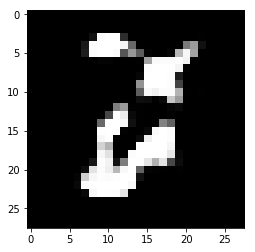

Loop: 582100, Generator_loss: -0.0088675, Discriminator_loss: 0.0070358
Loop: 582200, Generator_loss: -0.0077037, Discriminator_loss: 0.0027139
Loop: 582300, Generator_loss: -0.011724, Discriminator_loss: 0.0028799
Loop: 582400, Generator_loss: -0.0051616, Discriminator_loss: 0.0034815
Loop: 582500, Generator_loss: -0.0079803, Discriminator_loss: 0.00055132
Loop: 582600, Generator_loss: -0.0044527, Discriminator_loss: 0.0028125
Loop: 582700, Generator_loss: -0.0038136, Discriminator_loss: 0.0017934
Loop: 582800, Generator_loss: -0.0089576, Discriminator_loss: 0.0026684
Loop: 582900, Generator_loss: -0.010379, Discriminator_loss: 0.001728
Loop: 583000, Generator_loss: -0.0013281, Discriminator_loss: 0.0041717


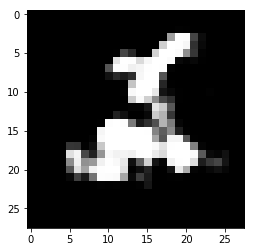

Loop: 583100, Generator_loss: -0.0048771, Discriminator_loss: 0.0030688
Loop: 583200, Generator_loss: -0.0077351, Discriminator_loss: 0.0023988
Loop: 583300, Generator_loss: -0.0088102, Discriminator_loss: 0.0053488
Loop: 583400, Generator_loss: -0.0069804, Discriminator_loss: 0.0029665
Loop: 583500, Generator_loss: -0.0065438, Discriminator_loss: 0.0029819
Loop: 583600, Generator_loss: -0.0090519, Discriminator_loss: 0.0017169
Loop: 583700, Generator_loss: -0.0068556, Discriminator_loss: 0.0030159
Loop: 583800, Generator_loss: -0.0043145, Discriminator_loss: 0.0026317
Loop: 583900, Generator_loss: -0.0060278, Discriminator_loss: 0.0049517
Loop: 584000, Generator_loss: -0.0042219, Discriminator_loss: 0.0044185


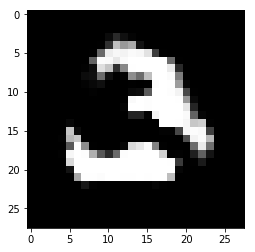

Loop: 584100, Generator_loss: -0.0009441, Discriminator_loss: 0.0024214
Loop: 584200, Generator_loss: -0.012773, Discriminator_loss: 0.0032284
Loop: 584300, Generator_loss: -0.004085, Discriminator_loss: 0.0011116
Loop: 584400, Generator_loss: -0.009794, Discriminator_loss: 0.0020324
Loop: 584500, Generator_loss: -0.0046522, Discriminator_loss: 0.0058104
Loop: 584600, Generator_loss: -0.013098, Discriminator_loss: 0.00088825
Loop: 584700, Generator_loss: -0.0090854, Discriminator_loss: 0.0027635
Loop: 584800, Generator_loss: -0.0058857, Discriminator_loss: 0.0021285
Loop: 584900, Generator_loss: -0.011641, Discriminator_loss: 0.0039455
Loop: 585000, Generator_loss: -0.0043241, Discriminator_loss: 0.0007049


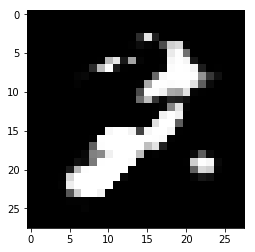

Loop: 585100, Generator_loss: -0.0115, Discriminator_loss: 0.0027146
Loop: 585200, Generator_loss: -0.0066238, Discriminator_loss: 0.0027995
Loop: 585300, Generator_loss: -0.0084731, Discriminator_loss: 0.0046572
Loop: 585400, Generator_loss: -0.003024, Discriminator_loss: 0.0040105
Loop: 585500, Generator_loss: -0.010355, Discriminator_loss: 0.0047656
Loop: 585600, Generator_loss: -0.010824, Discriminator_loss: 0.0043521
Loop: 585700, Generator_loss: -0.0094681, Discriminator_loss: 0.0031037
Loop: 585800, Generator_loss: -0.0059399, Discriminator_loss: 0.0031206
Loop: 585900, Generator_loss: -0.0066558, Discriminator_loss: 0.0041909
Loop: 586000, Generator_loss: -0.0091285, Discriminator_loss: 0.0040524


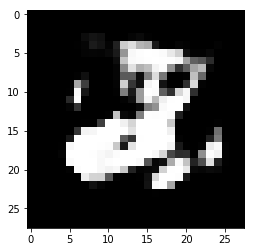

Loop: 586100, Generator_loss: -0.0057755, Discriminator_loss: 0.0024857
Loop: 586200, Generator_loss: -0.0045694, Discriminator_loss: 0.0020973
Loop: 586300, Generator_loss: -0.0078822, Discriminator_loss: 0.003083
Loop: 586400, Generator_loss: -0.0072433, Discriminator_loss: 0.0028981
Loop: 586500, Generator_loss: -0.00278, Discriminator_loss: 0.0022939
Loop: 586600, Generator_loss: -0.0070635, Discriminator_loss: 0.0019417
Loop: 586700, Generator_loss: -0.0060184, Discriminator_loss: 0.0028137
Loop: 586800, Generator_loss: -0.006659, Discriminator_loss: 0.0037334
Loop: 586900, Generator_loss: -0.0051547, Discriminator_loss: 0.0037198
Loop: 587000, Generator_loss: -0.010154, Discriminator_loss: 0.0049425


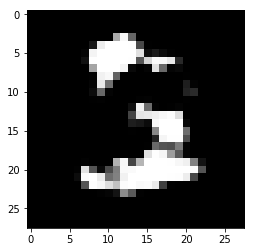

Loop: 587100, Generator_loss: -0.0072726, Discriminator_loss: 0.0038751
Loop: 587200, Generator_loss: -0.0048135, Discriminator_loss: 0.0030457
Loop: 587300, Generator_loss: -0.011318, Discriminator_loss: 0.0051259
Loop: 587400, Generator_loss: -0.007977, Discriminator_loss: 0.002562
Loop: 587500, Generator_loss: -0.012193, Discriminator_loss: 0.0037771
Loop: 587600, Generator_loss: -0.011638, Discriminator_loss: 0.0043671
Loop: 587700, Generator_loss: -0.0050138, Discriminator_loss: 0.0037922
Loop: 587800, Generator_loss: -0.010319, Discriminator_loss: 0.0019707
Loop: 587900, Generator_loss: -0.0086834, Discriminator_loss: 0.0024714
Loop: 588000, Generator_loss: -0.0056124, Discriminator_loss: 0.0030218


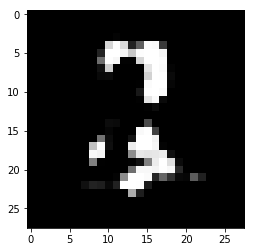

Loop: 588100, Generator_loss: -0.0083201, Discriminator_loss: 0.0044892
Loop: 588200, Generator_loss: -0.0047794, Discriminator_loss: 0.0065893
Loop: 588300, Generator_loss: -0.0047755, Discriminator_loss: 0.002742
Loop: 588400, Generator_loss: -0.0076876, Discriminator_loss: 0.003467
Loop: 588500, Generator_loss: -0.0093156, Discriminator_loss: 0.0015494
Loop: 588600, Generator_loss: -0.0088641, Discriminator_loss: 0.0040923
Loop: 588700, Generator_loss: -0.0057948, Discriminator_loss: 0.0043452
Loop: 588800, Generator_loss: -0.006606, Discriminator_loss: 0.0023777
Loop: 588900, Generator_loss: 0.0026601, Discriminator_loss: 0.0037559
Loop: 589000, Generator_loss: -0.0059561, Discriminator_loss: 0.0051579


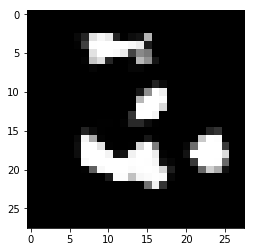

Loop: 589100, Generator_loss: -0.0074022, Discriminator_loss: 0.0030193
Loop: 589200, Generator_loss: -0.0062532, Discriminator_loss: 0.0020439
Loop: 589300, Generator_loss: -0.0073229, Discriminator_loss: 0.0035838
Loop: 589400, Generator_loss: -0.0069248, Discriminator_loss: 0.0020589
Loop: 589500, Generator_loss: -0.012479, Discriminator_loss: 0.0042551
Loop: 589600, Generator_loss: -0.0067365, Discriminator_loss: 0.0027874
Loop: 589700, Generator_loss: -0.0076066, Discriminator_loss: 0.0029466
Loop: 589800, Generator_loss: -0.010869, Discriminator_loss: 0.0021979
Loop: 589900, Generator_loss: -0.0063099, Discriminator_loss: 0.0033126
Loop: 590000, Generator_loss: -0.0033953, Discriminator_loss: 0.0042991


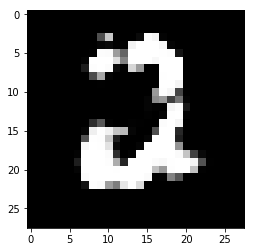

Loop: 590100, Generator_loss: -0.0078033, Discriminator_loss: 0.0032337
Loop: 590200, Generator_loss: -0.013322, Discriminator_loss: 0.0024606
Loop: 590300, Generator_loss: -0.010391, Discriminator_loss: 0.0026719
Loop: 590400, Generator_loss: -0.0056783, Discriminator_loss: 0.002681
Loop: 590500, Generator_loss: -0.0083693, Discriminator_loss: 0.0036625
Loop: 590600, Generator_loss: -0.0077441, Discriminator_loss: 0.0028642
Loop: 590700, Generator_loss: -0.013501, Discriminator_loss: 0.0030177
Loop: 590800, Generator_loss: -0.0073524, Discriminator_loss: 0.0066402
Loop: 590900, Generator_loss: -0.006408, Discriminator_loss: 0.0024335
Loop: 591000, Generator_loss: -0.0037502, Discriminator_loss: 0.00073963


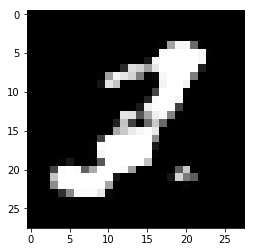

Loop: 591100, Generator_loss: -0.010819, Discriminator_loss: 0.0041053
Loop: 591200, Generator_loss: -0.012185, Discriminator_loss: 0.0055229
Loop: 591300, Generator_loss: -0.010189, Discriminator_loss: 0.0018668
Loop: 591400, Generator_loss: -0.0068337, Discriminator_loss: 0.0035214
Loop: 591500, Generator_loss: -0.0070954, Discriminator_loss: 0.0056783
Loop: 591600, Generator_loss: -0.0097506, Discriminator_loss: 0.0025986
Loop: 591700, Generator_loss: -0.0071008, Discriminator_loss: 0.0025117
Loop: 591800, Generator_loss: -0.00941, Discriminator_loss: 0.0022013
Loop: 591900, Generator_loss: -0.0059204, Discriminator_loss: 0.0024389
Loop: 592000, Generator_loss: -0.011922, Discriminator_loss: 0.002733


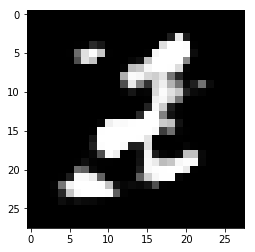

Loop: 592100, Generator_loss: -0.0069074, Discriminator_loss: 0.0034901
Loop: 592200, Generator_loss: -0.007978, Discriminator_loss: 0.0018143
Loop: 592300, Generator_loss: -0.0066354, Discriminator_loss: 0.0040541
Loop: 592400, Generator_loss: -0.0026177, Discriminator_loss: 0.0019308
Loop: 592500, Generator_loss: -0.01397, Discriminator_loss: 0.004867
Loop: 592600, Generator_loss: -0.0066438, Discriminator_loss: 0.0030626
Loop: 592700, Generator_loss: -0.007847, Discriminator_loss: 0.0020124
Loop: 592800, Generator_loss: -0.012294, Discriminator_loss: 0.0026187
Loop: 592900, Generator_loss: -0.010369, Discriminator_loss: 0.0026751
Loop: 593000, Generator_loss: -0.0078152, Discriminator_loss: 0.0027319


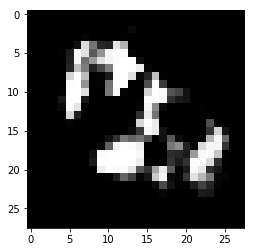

Loop: 593100, Generator_loss: -0.0080027, Discriminator_loss: 0.0038808
Loop: 593200, Generator_loss: -0.0048937, Discriminator_loss: 0.0037573
Loop: 593300, Generator_loss: -0.0099343, Discriminator_loss: 0.004942
Loop: 593400, Generator_loss: -0.011974, Discriminator_loss: 0.0059649
Loop: 593500, Generator_loss: -0.007578, Discriminator_loss: 0.0018001
Loop: 593600, Generator_loss: -0.006671, Discriminator_loss: 0.0040903
Loop: 593700, Generator_loss: -0.0090581, Discriminator_loss: 0.00027038
Loop: 593800, Generator_loss: -0.0080657, Discriminator_loss: 0.0042388
Loop: 593900, Generator_loss: -0.0033347, Discriminator_loss: 0.0040028
Loop: 594000, Generator_loss: -0.0053325, Discriminator_loss: 0.0017311


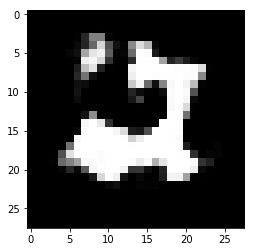

Loop: 594100, Generator_loss: -0.006325, Discriminator_loss: 0.0016835
Loop: 594200, Generator_loss: -0.0077602, Discriminator_loss: 0.0023401
Loop: 594300, Generator_loss: -0.011369, Discriminator_loss: 0.0052158
Loop: 594400, Generator_loss: -0.0069373, Discriminator_loss: 0.0022126
Loop: 594500, Generator_loss: -0.0081963, Discriminator_loss: 0.0024584
Loop: 594600, Generator_loss: -0.0089859, Discriminator_loss: 0.0031737
Loop: 594700, Generator_loss: -0.0050242, Discriminator_loss: 0.0048757
Loop: 594800, Generator_loss: -0.012649, Discriminator_loss: 0.0039961
Loop: 594900, Generator_loss: -0.0047945, Discriminator_loss: -0.00024184
Loop: 595000, Generator_loss: -0.0083009, Discriminator_loss: 0.0036175


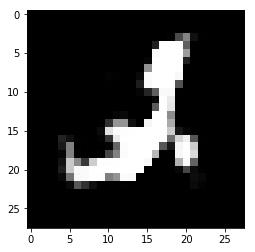

Loop: 595100, Generator_loss: -0.0059607, Discriminator_loss: 0.0030041
Loop: 595200, Generator_loss: -0.0056772, Discriminator_loss: 0.0043034
Loop: 595300, Generator_loss: -0.0052448, Discriminator_loss: 0.0013921
Loop: 595400, Generator_loss: -0.0073599, Discriminator_loss: 0.0038458
Loop: 595500, Generator_loss: -0.011604, Discriminator_loss: 0.0014257
Loop: 595600, Generator_loss: -0.0078712, Discriminator_loss: 0.0043509
Loop: 595700, Generator_loss: -0.010693, Discriminator_loss: 0.0054578
Loop: 595800, Generator_loss: -0.0086894, Discriminator_loss: 0.001441
Loop: 595900, Generator_loss: -0.0052162, Discriminator_loss: 0.0032897
Loop: 596000, Generator_loss: -0.011561, Discriminator_loss: 0.0026461


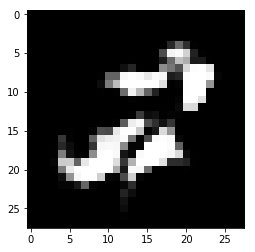

Loop: 596100, Generator_loss: -0.0086308, Discriminator_loss: 0.0017288
Loop: 596200, Generator_loss: -0.0061292, Discriminator_loss: 0.0025903
Loop: 596300, Generator_loss: -0.0057772, Discriminator_loss: 0.0027548
Loop: 596400, Generator_loss: -0.0083213, Discriminator_loss: 0.0042425
Loop: 596500, Generator_loss: -0.0054527, Discriminator_loss: 0.0030799
Loop: 596600, Generator_loss: -0.0078019, Discriminator_loss: 0.0041222
Loop: 596700, Generator_loss: -0.0041734, Discriminator_loss: 0.0029673
Loop: 596800, Generator_loss: -0.0077681, Discriminator_loss: 0.0040217
Loop: 596900, Generator_loss: -0.0075195, Discriminator_loss: 0.0045583
Loop: 597000, Generator_loss: -0.008841, Discriminator_loss: 0.00072829


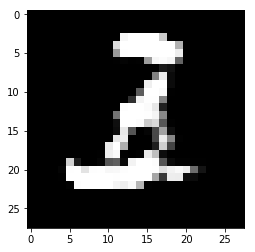

Loop: 597100, Generator_loss: -0.0058577, Discriminator_loss: 0.0026511
Loop: 597200, Generator_loss: -0.013459, Discriminator_loss: 0.0041597
Loop: 597300, Generator_loss: -0.010338, Discriminator_loss: 0.0018953
Loop: 597400, Generator_loss: -0.010517, Discriminator_loss: 0.0029071
Loop: 597500, Generator_loss: -0.013766, Discriminator_loss: 0.0046326
Loop: 597600, Generator_loss: -0.0059982, Discriminator_loss: 0.0032751
Loop: 597700, Generator_loss: -0.0081051, Discriminator_loss: 0.0040133
Loop: 597800, Generator_loss: -0.0035326, Discriminator_loss: 0.0049378
Loop: 597900, Generator_loss: -0.0080733, Discriminator_loss: 0.002903
Loop: 598000, Generator_loss: -0.010618, Discriminator_loss: 0.0026676


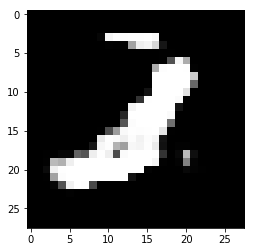

Loop: 598100, Generator_loss: -0.0010742, Discriminator_loss: 0.00039826
Loop: 598200, Generator_loss: -0.0096616, Discriminator_loss: 0.0034678
Loop: 598300, Generator_loss: -0.008733, Discriminator_loss: 0.004207
Loop: 598400, Generator_loss: -0.0076502, Discriminator_loss: 0.0011531
Loop: 598500, Generator_loss: -0.0015998, Discriminator_loss: 0.0038162
Loop: 598600, Generator_loss: -0.010866, Discriminator_loss: 0.0031261
Loop: 598700, Generator_loss: -0.007548, Discriminator_loss: 0.0017181
Loop: 598800, Generator_loss: -0.0035623, Discriminator_loss: 0.0025087
Loop: 598900, Generator_loss: -0.0069502, Discriminator_loss: 0.0043488
Loop: 599000, Generator_loss: -0.0059465, Discriminator_loss: 0.0028765


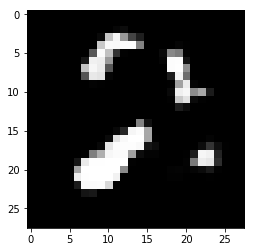

Loop: 599100, Generator_loss: -0.0087463, Discriminator_loss: 0.001197
Loop: 599200, Generator_loss: -0.010795, Discriminator_loss: 0.0033263
Loop: 599300, Generator_loss: -0.0028286, Discriminator_loss: 0.0042956
Loop: 599400, Generator_loss: -0.0054194, Discriminator_loss: 0.0034847
Loop: 599500, Generator_loss: -0.00891, Discriminator_loss: 0.0034761
Loop: 599600, Generator_loss: -0.0080278, Discriminator_loss: 0.0027809
Loop: 599700, Generator_loss: -0.0020337, Discriminator_loss: 0.0030939
Loop: 599800, Generator_loss: -0.0093965, Discriminator_loss: 0.0028699
Loop: 599900, Generator_loss: -0.0060143, Discriminator_loss: 0.0032542
Loop: 600000, Generator_loss: -0.0072525, Discriminator_loss: 0.0035941


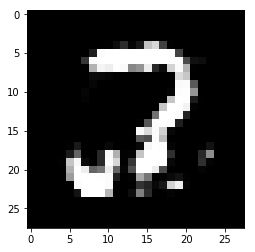

Loop: 600100, Generator_loss: -0.0091875, Discriminator_loss: 0.0035811
Loop: 600200, Generator_loss: -0.0059467, Discriminator_loss: 0.0049572
Loop: 600300, Generator_loss: -0.008523, Discriminator_loss: 0.003422
Loop: 600400, Generator_loss: -0.010181, Discriminator_loss: 0.0058542
Loop: 600500, Generator_loss: -0.011705, Discriminator_loss: 0.0031182
Loop: 600600, Generator_loss: -0.014925, Discriminator_loss: 0.0055585
Loop: 600700, Generator_loss: -0.0054103, Discriminator_loss: 0.0033484
Loop: 600800, Generator_loss: -0.011486, Discriminator_loss: 0.0030743
Loop: 600900, Generator_loss: -0.00082597, Discriminator_loss: 0.0011566
Loop: 601000, Generator_loss: -0.0098191, Discriminator_loss: 0.0026774


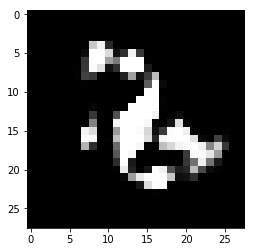

Loop: 601100, Generator_loss: -0.0094951, Discriminator_loss: 0.0021188
Loop: 601200, Generator_loss: -0.015846, Discriminator_loss: 0.0026995
Loop: 601300, Generator_loss: -0.0053861, Discriminator_loss: 0.002612
Loop: 601400, Generator_loss: -0.0076918, Discriminator_loss: 0.0028491
Loop: 601500, Generator_loss: -0.0083081, Discriminator_loss: 0.0028256
Loop: 601600, Generator_loss: -0.0052641, Discriminator_loss: 0.00098338
Loop: 601700, Generator_loss: -0.008811, Discriminator_loss: 0.0026981
Loop: 601800, Generator_loss: -0.0068673, Discriminator_loss: 0.0026523
Loop: 601900, Generator_loss: -0.0099844, Discriminator_loss: 0.0037021
Loop: 602000, Generator_loss: -0.013574, Discriminator_loss: 0.0053629


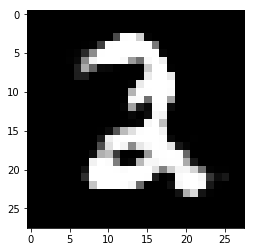

Loop: 602100, Generator_loss: -0.011144, Discriminator_loss: 0.0022352
Loop: 602200, Generator_loss: -0.0080495, Discriminator_loss: 0.0035857
Loop: 602300, Generator_loss: -0.0032746, Discriminator_loss: 0.00072657
Loop: 602400, Generator_loss: -0.0050985, Discriminator_loss: 0.0027697
Loop: 602500, Generator_loss: -0.0058997, Discriminator_loss: 0.0043293
Loop: 602600, Generator_loss: -0.0097486, Discriminator_loss: 0.0027505
Loop: 602700, Generator_loss: -0.0078506, Discriminator_loss: 0.005168
Loop: 602800, Generator_loss: -0.0076759, Discriminator_loss: 0.0048546
Loop: 602900, Generator_loss: -0.0077885, Discriminator_loss: 0.0036615
Loop: 603000, Generator_loss: -0.0075929, Discriminator_loss: 0.0029269


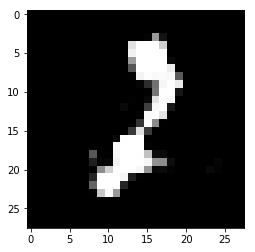

Loop: 603100, Generator_loss: -0.012432, Discriminator_loss: 0.0054195
Loop: 603200, Generator_loss: -0.0083117, Discriminator_loss: 0.0015932
Loop: 603300, Generator_loss: -0.0077969, Discriminator_loss: 0.0028959
Loop: 603400, Generator_loss: -0.0064535, Discriminator_loss: 0.0042025
Loop: 603500, Generator_loss: -0.0081805, Discriminator_loss: 0.0018784
Loop: 603600, Generator_loss: -0.006783, Discriminator_loss: 0.0033219
Loop: 603700, Generator_loss: -0.0081861, Discriminator_loss: 0.0029225
Loop: 603800, Generator_loss: -0.0051812, Discriminator_loss: 0.0039322
Loop: 603900, Generator_loss: -0.0060959, Discriminator_loss: 0.0035125
Loop: 604000, Generator_loss: -0.0089632, Discriminator_loss: 0.0049055


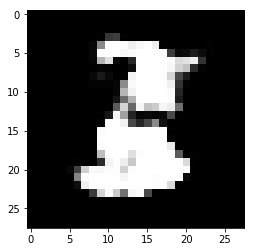

Loop: 604100, Generator_loss: -0.0065841, Discriminator_loss: 0.0027432
Loop: 604200, Generator_loss: -0.005727, Discriminator_loss: 0.005745
Loop: 604300, Generator_loss: -0.0072187, Discriminator_loss: 0.0037487
Loop: 604400, Generator_loss: -0.0094586, Discriminator_loss: 0.00278
Loop: 604500, Generator_loss: -0.011838, Discriminator_loss: 0.0024046
Loop: 604600, Generator_loss: -0.010069, Discriminator_loss: 0.0028328
Loop: 604700, Generator_loss: -0.0069106, Discriminator_loss: 0.0017437
Loop: 604800, Generator_loss: -0.0080395, Discriminator_loss: 0.0032167
Loop: 604900, Generator_loss: -0.0076143, Discriminator_loss: 0.0036627
Loop: 605000, Generator_loss: -0.0082163, Discriminator_loss: 0.0035475


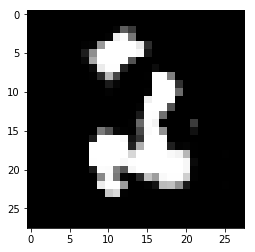

Loop: 605100, Generator_loss: -0.0096049, Discriminator_loss: 0.0035458
Loop: 605200, Generator_loss: -0.0058875, Discriminator_loss: -4.1092e-05
Loop: 605300, Generator_loss: -0.0090208, Discriminator_loss: 0.0025493
Loop: 605400, Generator_loss: -0.0078931, Discriminator_loss: 0.0045568
Loop: 605500, Generator_loss: -0.0068553, Discriminator_loss: 0.0025131
Loop: 605600, Generator_loss: -0.011121, Discriminator_loss: 0.0042347
Loop: 605700, Generator_loss: -0.0099448, Discriminator_loss: 0.0053106
Loop: 605800, Generator_loss: -0.003219, Discriminator_loss: 0.00028793
Loop: 605900, Generator_loss: -0.00824, Discriminator_loss: 0.004181
Loop: 606000, Generator_loss: -0.0070634, Discriminator_loss: 0.0023248


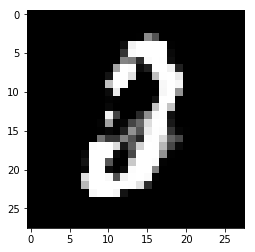

Loop: 606100, Generator_loss: -0.0045276, Discriminator_loss: 0.0033572
Loop: 606200, Generator_loss: -0.0072291, Discriminator_loss: 0.0029503
Loop: 606300, Generator_loss: -0.0051655, Discriminator_loss: 0.0019412
Loop: 606400, Generator_loss: -0.0076089, Discriminator_loss: 0.0023261
Loop: 606500, Generator_loss: -0.013885, Discriminator_loss: 0.0045389
Loop: 606600, Generator_loss: -0.0087538, Discriminator_loss: 0.0027033
Loop: 606700, Generator_loss: -0.01168, Discriminator_loss: 0.0033757
Loop: 606800, Generator_loss: -0.0057899, Discriminator_loss: 0.0041513
Loop: 606900, Generator_loss: -0.0075256, Discriminator_loss: 0.0042818
Loop: 607000, Generator_loss: -0.0047611, Discriminator_loss: 0.0048937


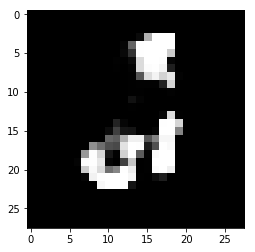

Loop: 607100, Generator_loss: -0.011823, Discriminator_loss: 0.0027269
Loop: 607200, Generator_loss: -0.0077857, Discriminator_loss: 0.0034588
Loop: 607300, Generator_loss: -0.0065727, Discriminator_loss: 0.0021415
Loop: 607400, Generator_loss: -0.0067875, Discriminator_loss: 0.0027383
Loop: 607500, Generator_loss: -0.013579, Discriminator_loss: 0.0016894
Loop: 607600, Generator_loss: -0.0070262, Discriminator_loss: 0.0045763
Loop: 607700, Generator_loss: -0.0058936, Discriminator_loss: 0.0024577
Loop: 607800, Generator_loss: -0.0075454, Discriminator_loss: 0.0043851
Loop: 607900, Generator_loss: -0.0024553, Discriminator_loss: 0.0014903
Loop: 608000, Generator_loss: -0.00081668, Discriminator_loss: 0.0028192


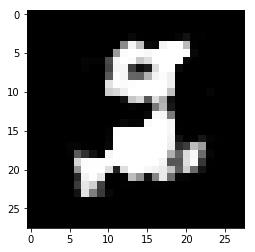

Loop: 608100, Generator_loss: -0.0059121, Discriminator_loss: 0.0030515
Loop: 608200, Generator_loss: -0.0094155, Discriminator_loss: 0.0052087
Loop: 608300, Generator_loss: -0.008857, Discriminator_loss: 0.0036179
Loop: 608400, Generator_loss: -0.004523, Discriminator_loss: 0.0032246
Loop: 608500, Generator_loss: -0.0081218, Discriminator_loss: 0.0037916
Loop: 608600, Generator_loss: -0.0081046, Discriminator_loss: 0.0029352
Loop: 608700, Generator_loss: -0.0013195, Discriminator_loss: 0.0021889
Loop: 608800, Generator_loss: -0.0091432, Discriminator_loss: 0.0028837
Loop: 608900, Generator_loss: -0.0062475, Discriminator_loss: 0.006102
Loop: 609000, Generator_loss: -0.0068963, Discriminator_loss: 0.003726


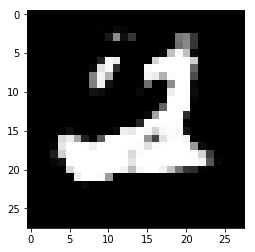

Loop: 609100, Generator_loss: -0.0075364, Discriminator_loss: 0.0037841
Loop: 609200, Generator_loss: -0.011454, Discriminator_loss: 0.0046615
Loop: 609300, Generator_loss: -0.0088897, Discriminator_loss: 0.0030709
Loop: 609400, Generator_loss: -0.0046382, Discriminator_loss: 0.0042507
Loop: 609500, Generator_loss: -0.0066904, Discriminator_loss: 0.0040957
Loop: 609600, Generator_loss: -0.0097768, Discriminator_loss: 0.0036708
Loop: 609700, Generator_loss: -0.013014, Discriminator_loss: 0.0031654
Loop: 609800, Generator_loss: -0.0014654, Discriminator_loss: 0.0022664
Loop: 609900, Generator_loss: -0.010965, Discriminator_loss: 0.0033656
Loop: 610000, Generator_loss: -0.0037622, Discriminator_loss: 0.0030699


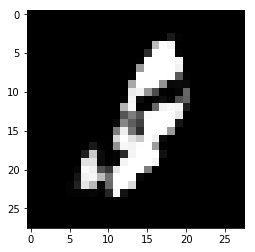

Loop: 610100, Generator_loss: -0.0036934, Discriminator_loss: 0.0017301
Loop: 610200, Generator_loss: -0.0056372, Discriminator_loss: 0.00084938
Loop: 610300, Generator_loss: -0.0019537, Discriminator_loss: 0.0036944
Loop: 610400, Generator_loss: -0.01124, Discriminator_loss: 0.0026565
Loop: 610500, Generator_loss: -0.0077128, Discriminator_loss: 0.0023352
Loop: 610600, Generator_loss: -0.010153, Discriminator_loss: 0.0041975
Loop: 610700, Generator_loss: -0.0054913, Discriminator_loss: 0.0025304
Loop: 610800, Generator_loss: -0.010631, Discriminator_loss: 0.0032535
Loop: 610900, Generator_loss: -0.010436, Discriminator_loss: 0.0058341
Loop: 611000, Generator_loss: -0.0087439, Discriminator_loss: 0.0027584


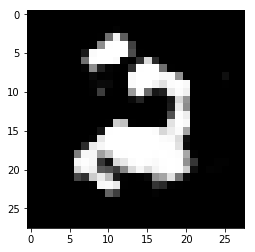

Loop: 611100, Generator_loss: -0.0056327, Discriminator_loss: 0.0043668
Loop: 611200, Generator_loss: -0.010735, Discriminator_loss: 0.0046714
Loop: 611300, Generator_loss: -0.0035622, Discriminator_loss: 0.0042873
Loop: 611400, Generator_loss: -0.011008, Discriminator_loss: 0.0029271
Loop: 611500, Generator_loss: -0.0052806, Discriminator_loss: 0.0012629
Loop: 611600, Generator_loss: -0.012232, Discriminator_loss: 0.0016981
Loop: 611700, Generator_loss: -0.0049783, Discriminator_loss: 0.002662
Loop: 611800, Generator_loss: -0.010753, Discriminator_loss: 0.0043083
Loop: 611900, Generator_loss: -0.012654, Discriminator_loss: 0.0048816
Loop: 612000, Generator_loss: -0.0035271, Discriminator_loss: 0.0019941


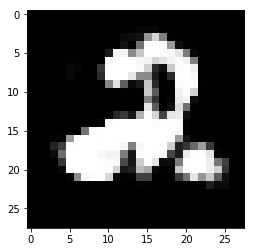

Loop: 612100, Generator_loss: -0.0068769, Discriminator_loss: 0.0037144
Loop: 612200, Generator_loss: -0.0092457, Discriminator_loss: 0.0050813
Loop: 612300, Generator_loss: -0.011244, Discriminator_loss: 0.0025326
Loop: 612400, Generator_loss: -0.0088666, Discriminator_loss: 0.0047162
Loop: 612500, Generator_loss: -0.0061966, Discriminator_loss: 0.002752
Loop: 612600, Generator_loss: -0.0085724, Discriminator_loss: 0.003037
Loop: 612700, Generator_loss: -0.011247, Discriminator_loss: 0.0050362
Loop: 612800, Generator_loss: -0.011799, Discriminator_loss: 0.0023881
Loop: 612900, Generator_loss: -0.0034114, Discriminator_loss: 0.0028017
Loop: 613000, Generator_loss: -0.0057162, Discriminator_loss: 0.0033781


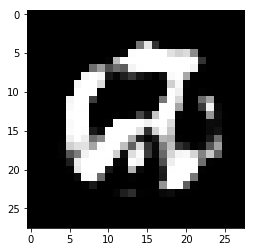

Loop: 613100, Generator_loss: -0.0097902, Discriminator_loss: 0.0031324
Loop: 613200, Generator_loss: -0.0065017, Discriminator_loss: 0.0019497
Loop: 613300, Generator_loss: -0.0088752, Discriminator_loss: 0.0032543
Loop: 613400, Generator_loss: -0.0051236, Discriminator_loss: 0.0031456
Loop: 613500, Generator_loss: -0.0054794, Discriminator_loss: 0.0031951
Loop: 613600, Generator_loss: -0.013392, Discriminator_loss: 0.0040201
Loop: 613700, Generator_loss: -0.0075259, Discriminator_loss: 0.0020172
Loop: 613800, Generator_loss: -0.0073797, Discriminator_loss: 0.0057505
Loop: 613900, Generator_loss: -0.0094895, Discriminator_loss: 0.002981
Loop: 614000, Generator_loss: -0.009829, Discriminator_loss: 0.001647


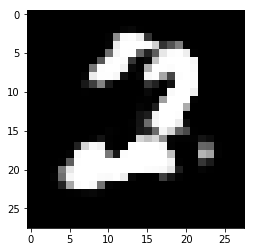

Loop: 614100, Generator_loss: -0.0062629, Discriminator_loss: 0.0013625
Loop: 614200, Generator_loss: -0.012081, Discriminator_loss: 0.0032572
Loop: 614300, Generator_loss: -0.0076126, Discriminator_loss: 0.0041661
Loop: 614400, Generator_loss: -0.0071843, Discriminator_loss: 0.0014201
Loop: 614500, Generator_loss: -0.0042652, Discriminator_loss: 0.0027833
Loop: 614600, Generator_loss: -0.0083218, Discriminator_loss: 0.0044383
Loop: 614700, Generator_loss: -0.01034, Discriminator_loss: 0.0045626
Loop: 614800, Generator_loss: -0.0044824, Discriminator_loss: 0.004794
Loop: 614900, Generator_loss: -0.0063588, Discriminator_loss: 0.0040401
Loop: 615000, Generator_loss: -0.0091645, Discriminator_loss: 0.00374


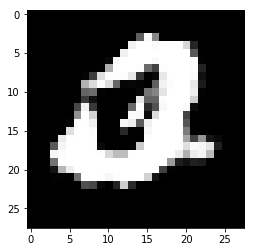

Loop: 615100, Generator_loss: -0.0051089, Discriminator_loss: 0.00267
Loop: 615200, Generator_loss: -0.0079886, Discriminator_loss: 0.0030707
Loop: 615300, Generator_loss: -0.0077008, Discriminator_loss: 0.0028239
Loop: 615400, Generator_loss: -0.0090469, Discriminator_loss: 0.0029118
Loop: 615500, Generator_loss: -0.008786, Discriminator_loss: 0.0026914
Loop: 615600, Generator_loss: -0.0047861, Discriminator_loss: 0.0025485
Loop: 615700, Generator_loss: -0.0070479, Discriminator_loss: 0.0012407
Loop: 615800, Generator_loss: -0.010349, Discriminator_loss: 0.0032628
Loop: 615900, Generator_loss: -0.008295, Discriminator_loss: 0.0047439
Loop: 616000, Generator_loss: -0.0077079, Discriminator_loss: 0.0040611


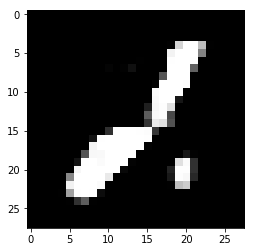

Loop: 616100, Generator_loss: -0.0038453, Discriminator_loss: 0.001221
Loop: 616200, Generator_loss: -0.00398, Discriminator_loss: 0.0035206
Loop: 616300, Generator_loss: -0.012757, Discriminator_loss: 0.0013241
Loop: 616400, Generator_loss: -0.0048769, Discriminator_loss: 0.0016259
Loop: 616500, Generator_loss: -0.0099038, Discriminator_loss: 0.0026962
Loop: 616600, Generator_loss: -0.0053738, Discriminator_loss: 0.0008094
Loop: 616700, Generator_loss: -0.0065967, Discriminator_loss: 0.0036847
Loop: 616800, Generator_loss: -0.0085569, Discriminator_loss: 0.0040021
Loop: 616900, Generator_loss: -0.0086853, Discriminator_loss: 0.0019082
Loop: 617000, Generator_loss: -0.010471, Discriminator_loss: 0.0048989


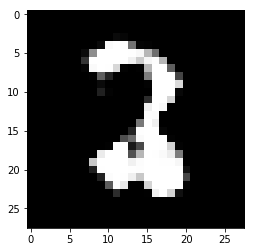

Loop: 617100, Generator_loss: -0.0073331, Discriminator_loss: 0.0033046
Loop: 617200, Generator_loss: -0.0068953, Discriminator_loss: 0.0034428
Loop: 617300, Generator_loss: -0.0029939, Discriminator_loss: 0.0049811
Loop: 617400, Generator_loss: -0.00767, Discriminator_loss: 0.0046297
Loop: 617500, Generator_loss: -0.0070108, Discriminator_loss: 0.0032892
Loop: 617600, Generator_loss: -0.0016947, Discriminator_loss: 0.0031729
Loop: 617700, Generator_loss: -0.0067781, Discriminator_loss: 0.0019911
Loop: 617800, Generator_loss: -0.0097872, Discriminator_loss: 0.0044498
Loop: 617900, Generator_loss: -0.0037617, Discriminator_loss: 0.0018098
Loop: 618000, Generator_loss: -0.0048802, Discriminator_loss: 0.0039593


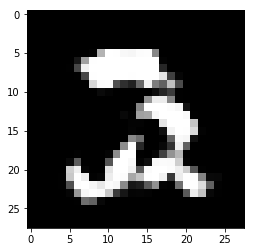

Loop: 618100, Generator_loss: -0.0035896, Discriminator_loss: 0.0047495
Loop: 618200, Generator_loss: -0.0055455, Discriminator_loss: 0.003517
Loop: 618300, Generator_loss: -0.0088825, Discriminator_loss: 0.0024828
Loop: 618400, Generator_loss: -0.012561, Discriminator_loss: 0.0025455
Loop: 618500, Generator_loss: -0.0095685, Discriminator_loss: 0.0017461
Loop: 618600, Generator_loss: -0.0088268, Discriminator_loss: 0.0051804
Loop: 618700, Generator_loss: -0.0038348, Discriminator_loss: 0.0039493
Loop: 618800, Generator_loss: -0.007986, Discriminator_loss: 0.0028493
Loop: 618900, Generator_loss: -0.0091814, Discriminator_loss: 0.0031429
Loop: 619000, Generator_loss: -0.0067254, Discriminator_loss: 0.0042497


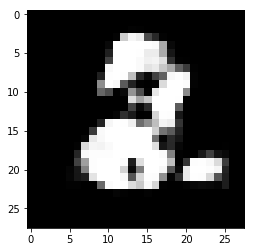

Loop: 619100, Generator_loss: -0.010614, Discriminator_loss: 0.0047311
Loop: 619200, Generator_loss: -0.011157, Discriminator_loss: 0.0028276
Loop: 619300, Generator_loss: -0.0090346, Discriminator_loss: 0.0014896
Loop: 619400, Generator_loss: -0.0093226, Discriminator_loss: 0.0042353
Loop: 619500, Generator_loss: -0.0090258, Discriminator_loss: 0.0032796
Loop: 619600, Generator_loss: -0.0052625, Discriminator_loss: 0.0011731
Loop: 619700, Generator_loss: -0.0063856, Discriminator_loss: 0.0024817
Loop: 619800, Generator_loss: -0.0052368, Discriminator_loss: 0.002372
Loop: 619900, Generator_loss: -0.0093762, Discriminator_loss: 0.0030907
Loop: 620000, Generator_loss: -0.0051507, Discriminator_loss: 0.0029998


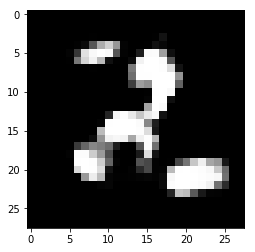

Loop: 620100, Generator_loss: -0.0062749, Discriminator_loss: 0.0013481
Loop: 620200, Generator_loss: -0.0078605, Discriminator_loss: 0.0027403
Loop: 620300, Generator_loss: -0.0056826, Discriminator_loss: 0.0036124
Loop: 620400, Generator_loss: -0.0063656, Discriminator_loss: 0.0030563
Loop: 620500, Generator_loss: -0.0055055, Discriminator_loss: 0.0017124
Loop: 620600, Generator_loss: -0.005667, Discriminator_loss: 0.0031693
Loop: 620700, Generator_loss: -0.0083164, Discriminator_loss: 0.0029285
Loop: 620800, Generator_loss: -0.004164, Discriminator_loss: 0.0020625
Loop: 620900, Generator_loss: -0.0076724, Discriminator_loss: 0.0034492
Loop: 621000, Generator_loss: -0.0071367, Discriminator_loss: 0.0037293


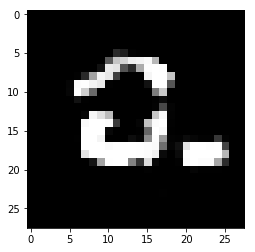

Loop: 621100, Generator_loss: -0.0084369, Discriminator_loss: 0.0040389
Loop: 621200, Generator_loss: -0.0058354, Discriminator_loss: 0.0025277
Loop: 621300, Generator_loss: -0.011005, Discriminator_loss: 0.0042128
Loop: 621400, Generator_loss: -0.011775, Discriminator_loss: 0.0037917
Loop: 621500, Generator_loss: -0.012459, Discriminator_loss: 0.0017204
Loop: 621600, Generator_loss: -0.0058707, Discriminator_loss: 0.0028667
Loop: 621700, Generator_loss: -0.0075618, Discriminator_loss: 0.00099398
Loop: 621800, Generator_loss: -0.0095987, Discriminator_loss: 0.00036085
Loop: 621900, Generator_loss: -0.0086367, Discriminator_loss: 0.0041094
Loop: 622000, Generator_loss: -0.01028, Discriminator_loss: 0.0035156


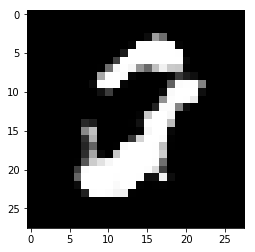

Loop: 622100, Generator_loss: -0.012171, Discriminator_loss: 0.0039274
Loop: 622200, Generator_loss: -0.0077374, Discriminator_loss: 0.0039007
Loop: 622300, Generator_loss: -0.0069548, Discriminator_loss: 0.003815
Loop: 622400, Generator_loss: -0.0038865, Discriminator_loss: 0.0026917
Loop: 622500, Generator_loss: -0.0090565, Discriminator_loss: 0.0042918
Loop: 622600, Generator_loss: -0.0058774, Discriminator_loss: 0.0033941
Loop: 622700, Generator_loss: -0.010013, Discriminator_loss: 0.0046943
Loop: 622800, Generator_loss: -0.0046673, Discriminator_loss: 0.0041052
Loop: 622900, Generator_loss: -0.0078225, Discriminator_loss: 0.0049941
Loop: 623000, Generator_loss: -0.0056079, Discriminator_loss: 0.0036509


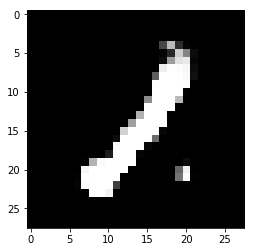

Loop: 623100, Generator_loss: -0.0095059, Discriminator_loss: 0.0036268
Loop: 623200, Generator_loss: -0.011846, Discriminator_loss: 0.0033174
Loop: 623300, Generator_loss: -0.0096717, Discriminator_loss: 0.0041062
Loop: 623400, Generator_loss: -0.0063955, Discriminator_loss: 0.0049204
Loop: 623500, Generator_loss: -0.0060406, Discriminator_loss: 0.0045045
Loop: 623600, Generator_loss: -0.0071035, Discriminator_loss: 0.0013304
Loop: 623700, Generator_loss: -0.0065564, Discriminator_loss: 0.0032255
Loop: 623800, Generator_loss: -0.012917, Discriminator_loss: 0.0024884
Loop: 623900, Generator_loss: -0.0055184, Discriminator_loss: 0.0034484
Loop: 624000, Generator_loss: -0.0079212, Discriminator_loss: 0.0028799


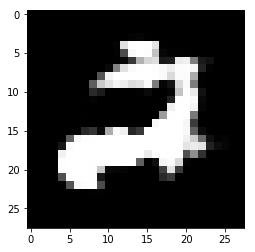

Loop: 624100, Generator_loss: -0.012377, Discriminator_loss: 0.0034354
Loop: 624200, Generator_loss: -0.0093885, Discriminator_loss: 0.0039139
Loop: 624300, Generator_loss: -0.0123, Discriminator_loss: 0.0049525
Loop: 624400, Generator_loss: -0.0044045, Discriminator_loss: 0.0038595
Loop: 624500, Generator_loss: -0.010274, Discriminator_loss: 0.002856
Loop: 624600, Generator_loss: -0.0037118, Discriminator_loss: 0.0034342
Loop: 624700, Generator_loss: -0.0080487, Discriminator_loss: 0.0039265
Loop: 624800, Generator_loss: -0.0049955, Discriminator_loss: 0.001145
Loop: 624900, Generator_loss: -0.0049298, Discriminator_loss: 0.0035052
Loop: 625000, Generator_loss: -0.0086097, Discriminator_loss: 0.0030216


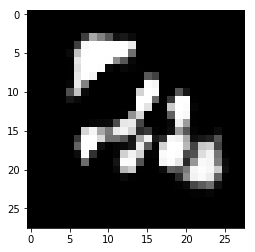

Loop: 625100, Generator_loss: -0.010483, Discriminator_loss: 0.0033149
Loop: 625200, Generator_loss: -0.0093807, Discriminator_loss: 0.0028001
Loop: 625300, Generator_loss: -0.0092603, Discriminator_loss: 0.0021261
Loop: 625400, Generator_loss: -0.010492, Discriminator_loss: 0.0030781
Loop: 625500, Generator_loss: -0.0047813, Discriminator_loss: 0.0034112
Loop: 625600, Generator_loss: -0.0059322, Discriminator_loss: 0.0037715
Loop: 625700, Generator_loss: -0.0061918, Discriminator_loss: 0.002249
Loop: 625800, Generator_loss: -0.011884, Discriminator_loss: 0.003164
Loop: 625900, Generator_loss: -0.0087951, Discriminator_loss: 0.0026813
Loop: 626000, Generator_loss: -0.0062227, Discriminator_loss: 0.0035237


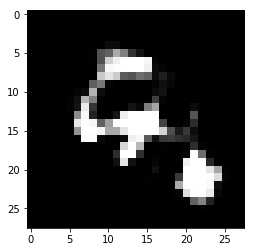

Loop: 626100, Generator_loss: -0.0062923, Discriminator_loss: 0.0021125
Loop: 626200, Generator_loss: -0.0072335, Discriminator_loss: 0.0039686
Loop: 626300, Generator_loss: -0.0046164, Discriminator_loss: 0.0036146
Loop: 626400, Generator_loss: -0.01108, Discriminator_loss: 0.0024328
Loop: 626500, Generator_loss: -0.0050252, Discriminator_loss: 0.0027927
Loop: 626600, Generator_loss: -0.010837, Discriminator_loss: 0.0032603
Loop: 626700, Generator_loss: -0.0090111, Discriminator_loss: 0.0034407
Loop: 626800, Generator_loss: -0.008884, Discriminator_loss: 0.0033915
Loop: 626900, Generator_loss: -0.0077039, Discriminator_loss: 0.0031965
Loop: 627000, Generator_loss: -0.0070467, Discriminator_loss: 0.0017314


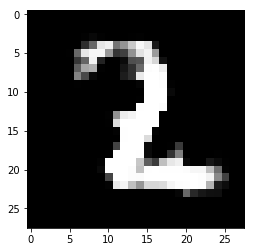

Loop: 627100, Generator_loss: -0.011697, Discriminator_loss: 0.0017548
Loop: 627200, Generator_loss: -0.007675, Discriminator_loss: 0.0014345
Loop: 627300, Generator_loss: -0.009891, Discriminator_loss: 0.003284
Loop: 627400, Generator_loss: -0.006447, Discriminator_loss: 0.0029578
Loop: 627500, Generator_loss: -0.0071891, Discriminator_loss: 0.0040084
Loop: 627600, Generator_loss: -0.0064835, Discriminator_loss: 0.0033819
Loop: 627700, Generator_loss: -0.017934, Discriminator_loss: 0.0018194
Loop: 627800, Generator_loss: -0.0032564, Discriminator_loss: 0.002431
Loop: 627900, Generator_loss: -0.0025812, Discriminator_loss: 0.0013949
Loop: 628000, Generator_loss: -0.011365, Discriminator_loss: 0.00013952


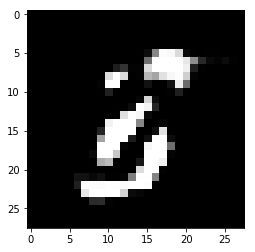

Loop: 628100, Generator_loss: -0.0082193, Discriminator_loss: 0.003103
Loop: 628200, Generator_loss: -0.0077591, Discriminator_loss: 0.0012184
Loop: 628300, Generator_loss: -0.0071311, Discriminator_loss: 0.0044057
Loop: 628400, Generator_loss: -0.0069236, Discriminator_loss: 0.003068
Loop: 628500, Generator_loss: -0.0085684, Discriminator_loss: 0.0035559
Loop: 628600, Generator_loss: -0.0060857, Discriminator_loss: 0.0038322
Loop: 628700, Generator_loss: -0.0038663, Discriminator_loss: 0.0052531
Loop: 628800, Generator_loss: -0.003437, Discriminator_loss: 0.002471
Loop: 628900, Generator_loss: -0.010287, Discriminator_loss: 0.0051587
Loop: 629000, Generator_loss: -0.0093289, Discriminator_loss: 0.00184


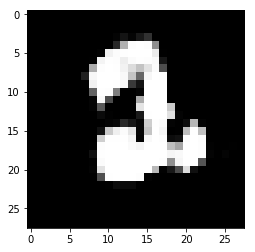

Loop: 629100, Generator_loss: -0.0078041, Discriminator_loss: 0.0023882
Loop: 629200, Generator_loss: -0.0066613, Discriminator_loss: 0.001697
Loop: 629300, Generator_loss: -0.010184, Discriminator_loss: 0.0042328
Loop: 629400, Generator_loss: -0.010345, Discriminator_loss: 0.0010514
Loop: 629500, Generator_loss: -0.0061062, Discriminator_loss: 0.0041305
Loop: 629600, Generator_loss: -0.0003746, Discriminator_loss: 0.0018529
Loop: 629700, Generator_loss: -0.011537, Discriminator_loss: 0.0039107
Loop: 629800, Generator_loss: -0.0033232, Discriminator_loss: 0.0027876
Loop: 629900, Generator_loss: -0.01174, Discriminator_loss: 0.0039135
Loop: 630000, Generator_loss: -0.005126, Discriminator_loss: 0.0025488


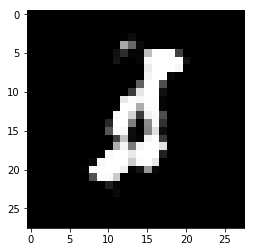

Loop: 630100, Generator_loss: -0.0077892, Discriminator_loss: 0.0027263
Loop: 630200, Generator_loss: -0.0053457, Discriminator_loss: 0.0041682
Loop: 630300, Generator_loss: -0.0068033, Discriminator_loss: 0.0011472
Loop: 630400, Generator_loss: -0.010055, Discriminator_loss: 0.006389
Loop: 630500, Generator_loss: -0.0045211, Discriminator_loss: 0.0029915
Loop: 630600, Generator_loss: -0.01089, Discriminator_loss: 0.0030726
Loop: 630700, Generator_loss: -0.011852, Discriminator_loss: 0.0012733
Loop: 630800, Generator_loss: -0.0099746, Discriminator_loss: 0.0033834
Loop: 630900, Generator_loss: -0.0078498, Discriminator_loss: 0.003278
Loop: 631000, Generator_loss: -0.004881, Discriminator_loss: 0.0031288


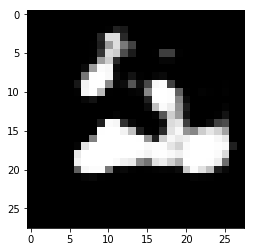

Loop: 631100, Generator_loss: -0.0046728, Discriminator_loss: 0.0027366
Loop: 631200, Generator_loss: -0.0051572, Discriminator_loss: 0.0028942
Loop: 631300, Generator_loss: -0.0071667, Discriminator_loss: 0.0024907
Loop: 631400, Generator_loss: -0.010831, Discriminator_loss: 0.0021342
Loop: 631500, Generator_loss: -0.0045479, Discriminator_loss: 0.0020148
Loop: 631600, Generator_loss: -0.0080083, Discriminator_loss: 0.0012003
Loop: 631700, Generator_loss: -0.0084506, Discriminator_loss: 0.0017571
Loop: 631800, Generator_loss: -0.0083067, Discriminator_loss: 0.0040218
Loop: 631900, Generator_loss: -0.0050898, Discriminator_loss: 0.0018797
Loop: 632000, Generator_loss: -0.0084222, Discriminator_loss: 0.00081708


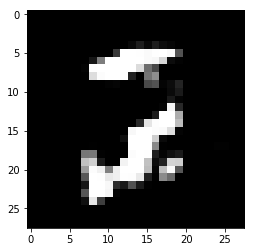

Loop: 632100, Generator_loss: -0.012893, Discriminator_loss: 0.0060279
Loop: 632200, Generator_loss: -0.013668, Discriminator_loss: 0.0022488
Loop: 632300, Generator_loss: -0.002678, Discriminator_loss: 0.0025256
Loop: 632400, Generator_loss: -0.0076174, Discriminator_loss: 0.0038047
Loop: 632500, Generator_loss: -0.0095313, Discriminator_loss: 0.0007935
Loop: 632600, Generator_loss: -0.0026971, Discriminator_loss: 0.0026185
Loop: 632700, Generator_loss: -0.012217, Discriminator_loss: 0.0023898
Loop: 632800, Generator_loss: -0.0096016, Discriminator_loss: 0.0024303
Loop: 632900, Generator_loss: -0.0038793, Discriminator_loss: 0.004296
Loop: 633000, Generator_loss: -0.010939, Discriminator_loss: 0.0038584


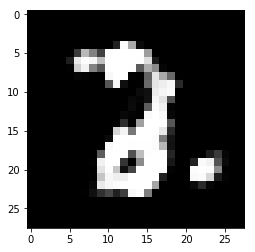

Loop: 633100, Generator_loss: -0.010838, Discriminator_loss: 0.0051968
Loop: 633200, Generator_loss: -0.0027659, Discriminator_loss: 0.0030011
Loop: 633300, Generator_loss: -0.01082, Discriminator_loss: 0.004458
Loop: 633400, Generator_loss: -0.011654, Discriminator_loss: 0.0026919
Loop: 633500, Generator_loss: -0.0068415, Discriminator_loss: 0.0028853
Loop: 633600, Generator_loss: -0.0083273, Discriminator_loss: 0.0023312
Loop: 633700, Generator_loss: -0.008564, Discriminator_loss: 0.0043275
Loop: 633800, Generator_loss: -0.0032205, Discriminator_loss: 0.0042223
Loop: 633900, Generator_loss: -0.0047065, Discriminator_loss: 0.0014586
Loop: 634000, Generator_loss: -0.0036974, Discriminator_loss: 0.0037407


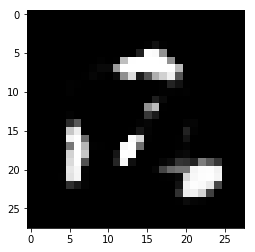

Loop: 634100, Generator_loss: -0.0055784, Discriminator_loss: 0.0037099
Loop: 634200, Generator_loss: -0.0057319, Discriminator_loss: 0.0027913
Loop: 634300, Generator_loss: -0.0073123, Discriminator_loss: 0.0035195
Loop: 634400, Generator_loss: -0.0087134, Discriminator_loss: 0.0043047
Loop: 634500, Generator_loss: -0.0062548, Discriminator_loss: 0.0038425
Loop: 634600, Generator_loss: -0.010955, Discriminator_loss: 0.0030903
Loop: 634700, Generator_loss: -0.0050685, Discriminator_loss: 0.0027358
Loop: 634800, Generator_loss: -0.0088056, Discriminator_loss: 0.0033459
Loop: 634900, Generator_loss: -0.011221, Discriminator_loss: 0.0028276
Loop: 635000, Generator_loss: -0.0077862, Discriminator_loss: 0.0050246


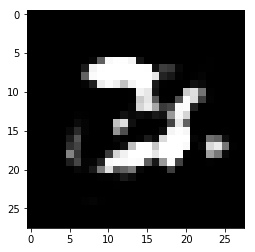

Loop: 635100, Generator_loss: -0.0023182, Discriminator_loss: 0.0032859
Loop: 635200, Generator_loss: -0.012733, Discriminator_loss: 0.0019905
Loop: 635300, Generator_loss: -0.0099602, Discriminator_loss: 0.0027214
Loop: 635400, Generator_loss: -0.010074, Discriminator_loss: 0.0045573
Loop: 635500, Generator_loss: -0.011071, Discriminator_loss: 0.0040485
Loop: 635600, Generator_loss: -0.0075421, Discriminator_loss: 0.002538
Loop: 635700, Generator_loss: -0.011009, Discriminator_loss: 0.0045399
Loop: 635800, Generator_loss: -0.0086021, Discriminator_loss: 0.0048815
Loop: 635900, Generator_loss: -0.0063137, Discriminator_loss: 0.0042097
Loop: 636000, Generator_loss: -0.0089864, Discriminator_loss: 0.0040353


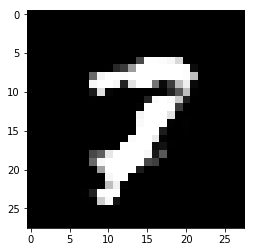

Loop: 636100, Generator_loss: -0.0052757, Discriminator_loss: 0.0029152
Loop: 636200, Generator_loss: -0.0012225, Discriminator_loss: 0.0059314
Loop: 636300, Generator_loss: -0.010299, Discriminator_loss: 0.0040161
Loop: 636400, Generator_loss: -0.0067311, Discriminator_loss: 0.0034358
Loop: 636500, Generator_loss: -0.0094956, Discriminator_loss: 0.0031988
Loop: 636600, Generator_loss: -0.008948, Discriminator_loss: 0.0012318
Loop: 636700, Generator_loss: -0.0087266, Discriminator_loss: 0.0012934
Loop: 636800, Generator_loss: -0.0063393, Discriminator_loss: 0.0029509
Loop: 636900, Generator_loss: -0.010449, Discriminator_loss: 0.0017164
Loop: 637000, Generator_loss: -0.005916, Discriminator_loss: 0.0016415


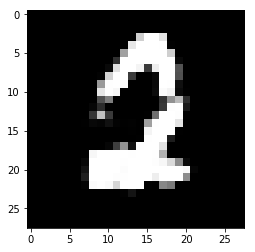

Loop: 637100, Generator_loss: -0.0039251, Discriminator_loss: 0.0038242
Loop: 637200, Generator_loss: -0.0065856, Discriminator_loss: 0.0045982
Loop: 637300, Generator_loss: -0.0077342, Discriminator_loss: 0.00336
Loop: 637400, Generator_loss: -0.0094001, Discriminator_loss: 0.0034342
Loop: 637500, Generator_loss: -0.0071597, Discriminator_loss: 0.0055031
Loop: 637600, Generator_loss: -0.016204, Discriminator_loss: 0.0057293
Loop: 637700, Generator_loss: -0.012158, Discriminator_loss: 0.0012741
Loop: 637800, Generator_loss: -0.0036431, Discriminator_loss: 0.0032888
Loop: 637900, Generator_loss: -0.0088844, Discriminator_loss: 0.0030017
Loop: 638000, Generator_loss: -0.0031235, Discriminator_loss: 0.0022213


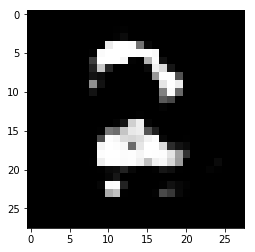

Loop: 638100, Generator_loss: -0.0073415, Discriminator_loss: 0.0045236
Loop: 638200, Generator_loss: -0.0073479, Discriminator_loss: 0.0061097
Loop: 638300, Generator_loss: -0.010825, Discriminator_loss: 0.0042302
Loop: 638400, Generator_loss: -0.010282, Discriminator_loss: 0.0018165
Loop: 638500, Generator_loss: -0.0068335, Discriminator_loss: 0.00026158
Loop: 638600, Generator_loss: -0.0027803, Discriminator_loss: 0.0028935
Loop: 638700, Generator_loss: -0.0077432, Discriminator_loss: 0.0032881
Loop: 638800, Generator_loss: -0.0062469, Discriminator_loss: 0.004297
Loop: 638900, Generator_loss: -0.0063245, Discriminator_loss: 0.0028404
Loop: 639000, Generator_loss: -0.0048456, Discriminator_loss: 0.0025802


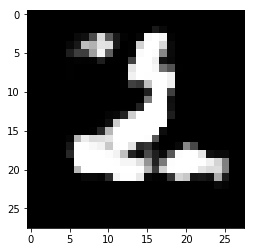

Loop: 639100, Generator_loss: -0.0053798, Discriminator_loss: 0.0053958
Loop: 639200, Generator_loss: -0.0079212, Discriminator_loss: 0.0036308
Loop: 639300, Generator_loss: -0.0095083, Discriminator_loss: 0.0018903
Loop: 639400, Generator_loss: -0.0080533, Discriminator_loss: 0.0033962
Loop: 639500, Generator_loss: -0.0062755, Discriminator_loss: 0.0021201
Loop: 639600, Generator_loss: -0.0081491, Discriminator_loss: 0.0022865
Loop: 639700, Generator_loss: -0.0052529, Discriminator_loss: 0.0043159
Loop: 639800, Generator_loss: -0.0080403, Discriminator_loss: 0.0031411
Loop: 639900, Generator_loss: -0.007342, Discriminator_loss: 0.0049987
Loop: 640000, Generator_loss: -0.0086, Discriminator_loss: 0.0016317


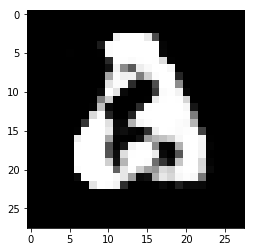

Loop: 640100, Generator_loss: -0.008931, Discriminator_loss: 0.0027754
Loop: 640200, Generator_loss: -0.005137, Discriminator_loss: 0.0040335
Loop: 640300, Generator_loss: -0.0057092, Discriminator_loss: 0.004251
Loop: 640400, Generator_loss: -0.011412, Discriminator_loss: 0.0031552
Loop: 640500, Generator_loss: -0.005777, Discriminator_loss: 0.0034803
Loop: 640600, Generator_loss: -0.0058207, Discriminator_loss: 0.0033924
Loop: 640700, Generator_loss: -0.012712, Discriminator_loss: 0.0026676
Loop: 640800, Generator_loss: -0.0072965, Discriminator_loss: 0.0033888
Loop: 640900, Generator_loss: -0.0053265, Discriminator_loss: 0.0030072
Loop: 641000, Generator_loss: -0.00504, Discriminator_loss: 0.0018738


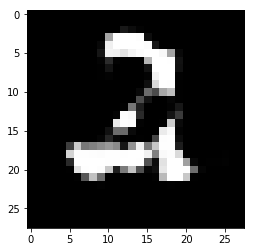

Loop: 641100, Generator_loss: -0.0066367, Discriminator_loss: 0.0040696
Loop: 641200, Generator_loss: -0.0086909, Discriminator_loss: -0.00078131
Loop: 641300, Generator_loss: -0.0069538, Discriminator_loss: 0.0014962
Loop: 641400, Generator_loss: -0.013916, Discriminator_loss: 0.0026308
Loop: 641500, Generator_loss: -0.0058156, Discriminator_loss: 0.0052307
Loop: 641600, Generator_loss: -0.010346, Discriminator_loss: 0.0023092
Loop: 641700, Generator_loss: -0.0089008, Discriminator_loss: 0.0025205
Loop: 641800, Generator_loss: -0.0012781, Discriminator_loss: 0.0023743
Loop: 641900, Generator_loss: -0.0068654, Discriminator_loss: 0.002147
Loop: 642000, Generator_loss: -0.011187, Discriminator_loss: 0.002797


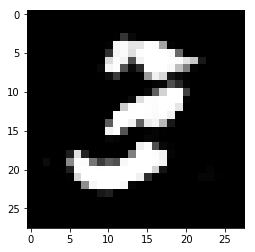

Loop: 642100, Generator_loss: -0.0039717, Discriminator_loss: 0.0019813
Loop: 642200, Generator_loss: -0.011373, Discriminator_loss: 0.0034357
Loop: 642300, Generator_loss: -0.0076518, Discriminator_loss: 0.0040112
Loop: 642400, Generator_loss: -0.0097897, Discriminator_loss: 0.0050198
Loop: 642500, Generator_loss: -0.0033727, Discriminator_loss: 0.0043186
Loop: 642600, Generator_loss: -0.0064619, Discriminator_loss: 0.0035019
Loop: 642700, Generator_loss: -0.0077628, Discriminator_loss: 0.0046874
Loop: 642800, Generator_loss: -0.00835, Discriminator_loss: 0.0031013
Loop: 642900, Generator_loss: -0.012851, Discriminator_loss: 0.0036419
Loop: 643000, Generator_loss: -0.0091037, Discriminator_loss: 0.001633


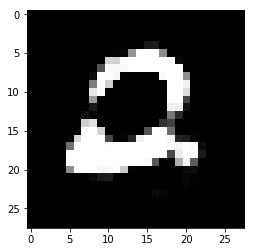

Loop: 643100, Generator_loss: -0.0073803, Discriminator_loss: 0.005068
Loop: 643200, Generator_loss: -0.0088387, Discriminator_loss: 0.0037761
Loop: 643300, Generator_loss: -0.0093852, Discriminator_loss: 0.0024877
Loop: 643400, Generator_loss: -0.0069375, Discriminator_loss: 0.0028476
Loop: 643500, Generator_loss: -0.0031473, Discriminator_loss: 0.0032237
Loop: 643600, Generator_loss: -0.013791, Discriminator_loss: 0.0028038
Loop: 643700, Generator_loss: -0.0082676, Discriminator_loss: 0.005114
Loop: 643800, Generator_loss: -0.012365, Discriminator_loss: -2.9622e-05
Loop: 643900, Generator_loss: -0.00952, Discriminator_loss: 0.004544
Loop: 644000, Generator_loss: -0.010682, Discriminator_loss: 0.0038501


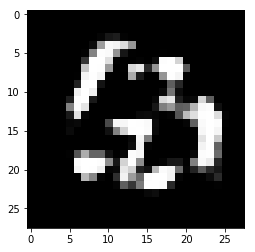

Loop: 644100, Generator_loss: -0.0081562, Discriminator_loss: 0.0031118
Loop: 644200, Generator_loss: -0.0094547, Discriminator_loss: 0.0015878
Loop: 644300, Generator_loss: -0.0099811, Discriminator_loss: 0.0030528
Loop: 644400, Generator_loss: -0.0080909, Discriminator_loss: 0.0039332
Loop: 644500, Generator_loss: -0.012831, Discriminator_loss: 0.0032168
Loop: 644600, Generator_loss: -0.0075663, Discriminator_loss: 0.0046566
Loop: 644700, Generator_loss: -0.0058258, Discriminator_loss: 0.0038808
Loop: 644800, Generator_loss: -0.0039487, Discriminator_loss: 0.0053768
Loop: 644900, Generator_loss: -0.0024927, Discriminator_loss: 0.0038959
Loop: 645000, Generator_loss: -0.0054876, Discriminator_loss: 0.0036218


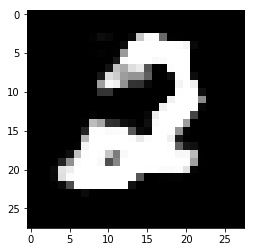

Loop: 645100, Generator_loss: -0.010206, Discriminator_loss: 0.0039184
Loop: 645200, Generator_loss: -0.0063576, Discriminator_loss: 0.0037799
Loop: 645300, Generator_loss: -0.0096526, Discriminator_loss: 0.0047593
Loop: 645400, Generator_loss: -0.0055324, Discriminator_loss: 0.0032695
Loop: 645500, Generator_loss: -0.0062139, Discriminator_loss: 0.0030493
Loop: 645600, Generator_loss: -0.0088252, Discriminator_loss: 0.0032784
Loop: 645700, Generator_loss: -0.0089223, Discriminator_loss: 0.0023695
Loop: 645800, Generator_loss: -0.0082539, Discriminator_loss: -0.0010683
Loop: 645900, Generator_loss: -0.01022, Discriminator_loss: 0.0040724
Loop: 646000, Generator_loss: -0.010932, Discriminator_loss: 0.0037815


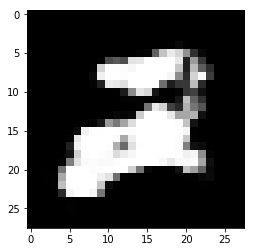

Loop: 646100, Generator_loss: -0.0073593, Discriminator_loss: 0.0025665
Loop: 646200, Generator_loss: -0.0064716, Discriminator_loss: 0.0010461
Loop: 646300, Generator_loss: -0.002742, Discriminator_loss: 0.0036173
Loop: 646400, Generator_loss: -0.0080988, Discriminator_loss: 0.0031
Loop: 646500, Generator_loss: -0.0079542, Discriminator_loss: 0.0025557
Loop: 646600, Generator_loss: -0.0055778, Discriminator_loss: 0.00344
Loop: 646700, Generator_loss: -0.0077706, Discriminator_loss: 0.0029835
Loop: 646800, Generator_loss: -0.0098126, Discriminator_loss: 0.0025541
Loop: 646900, Generator_loss: -0.011989, Discriminator_loss: 0.0046469
Loop: 647000, Generator_loss: -0.0056138, Discriminator_loss: 0.0011841


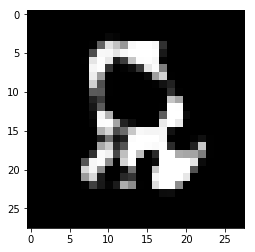

Loop: 647100, Generator_loss: -0.0044997, Discriminator_loss: 0.0042334
Loop: 647200, Generator_loss: -0.0065954, Discriminator_loss: 0.0033913
Loop: 647300, Generator_loss: -0.0092935, Discriminator_loss: 0.0063516
Loop: 647400, Generator_loss: -0.012214, Discriminator_loss: 0.0020971
Loop: 647500, Generator_loss: -0.0075391, Discriminator_loss: 0.003358
Loop: 647600, Generator_loss: -0.0085133, Discriminator_loss: 0.0024061
Loop: 647700, Generator_loss: -0.0038241, Discriminator_loss: 0.0030565
Loop: 647800, Generator_loss: -0.010066, Discriminator_loss: 0.0031442
Loop: 647900, Generator_loss: -0.0090862, Discriminator_loss: 0.0022342
Loop: 648000, Generator_loss: -0.0074891, Discriminator_loss: 0.0023201


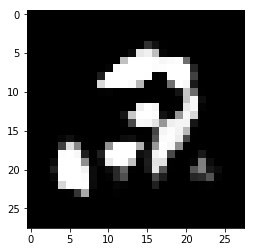

Loop: 648100, Generator_loss: -0.012727, Discriminator_loss: 0.0026811
Loop: 648200, Generator_loss: -0.0083678, Discriminator_loss: 0.0020221
Loop: 648300, Generator_loss: -0.004646, Discriminator_loss: 0.0034344
Loop: 648400, Generator_loss: -0.011262, Discriminator_loss: 0.0019256
Loop: 648500, Generator_loss: -0.0078588, Discriminator_loss: 0.0029723
Loop: 648600, Generator_loss: -0.0036509, Discriminator_loss: 0.0031361
Loop: 648700, Generator_loss: -0.0078232, Discriminator_loss: 0.0031429
Loop: 648800, Generator_loss: -0.0072039, Discriminator_loss: 0.00091153
Loop: 648900, Generator_loss: -0.013885, Discriminator_loss: 0.0030504
Loop: 649000, Generator_loss: -0.011482, Discriminator_loss: 0.0026016


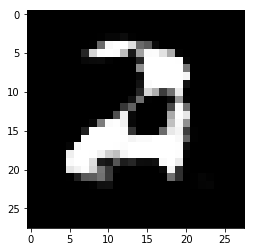

Loop: 649100, Generator_loss: -0.009006, Discriminator_loss: 0.00065907
Loop: 649200, Generator_loss: -0.0092622, Discriminator_loss: 0.0020267
Loop: 649300, Generator_loss: -0.010359, Discriminator_loss: 0.0034163
Loop: 649400, Generator_loss: -0.0065049, Discriminator_loss: 0.0015897
Loop: 649500, Generator_loss: -0.0028911, Discriminator_loss: 0.00042604
Loop: 649600, Generator_loss: -0.0094862, Discriminator_loss: 0.0034258
Loop: 649700, Generator_loss: -0.011462, Discriminator_loss: 0.0021307
Loop: 649800, Generator_loss: -0.0084112, Discriminator_loss: 0.0026982
Loop: 649900, Generator_loss: -0.0049311, Discriminator_loss: 0.0018551
Loop: 650000, Generator_loss: -0.0085533, Discriminator_loss: 0.0029117


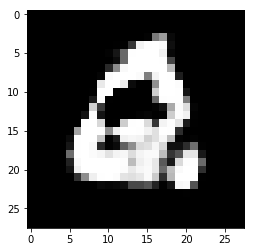

Loop: 650100, Generator_loss: -0.0051637, Discriminator_loss: 0.0036452
Loop: 650200, Generator_loss: -0.012378, Discriminator_loss: 0.003069
Loop: 650300, Generator_loss: -0.0078593, Discriminator_loss: 0.0038786
Loop: 650400, Generator_loss: -0.0061008, Discriminator_loss: 0.0031085
Loop: 650500, Generator_loss: -0.0069691, Discriminator_loss: 0.0020553
Loop: 650600, Generator_loss: -0.0074456, Discriminator_loss: 0.0045151
Loop: 650700, Generator_loss: -0.0098928, Discriminator_loss: 0.0035662
Loop: 650800, Generator_loss: -0.012879, Discriminator_loss: 0.0030147
Loop: 650900, Generator_loss: -0.0028259, Discriminator_loss: 0.0029208
Loop: 651000, Generator_loss: -0.0085425, Discriminator_loss: 0.0044238


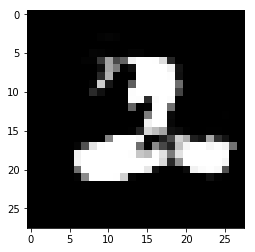

Loop: 651100, Generator_loss: 9.6467e-05, Discriminator_loss: 0.0031126
Loop: 651200, Generator_loss: -0.0090955, Discriminator_loss: 0.0027711
Loop: 651300, Generator_loss: -0.0075782, Discriminator_loss: 0.0022974
Loop: 651400, Generator_loss: -0.01176, Discriminator_loss: 0.0022737
Loop: 651500, Generator_loss: -0.0036889, Discriminator_loss: 0.0026676
Loop: 651600, Generator_loss: -0.0075477, Discriminator_loss: 0.002519
Loop: 651700, Generator_loss: -0.010791, Discriminator_loss: 0.0018904
Loop: 651800, Generator_loss: -0.0124, Discriminator_loss: 0.0031253
Loop: 651900, Generator_loss: -0.0089261, Discriminator_loss: 0.0029249
Loop: 652000, Generator_loss: -0.0037811, Discriminator_loss: 0.0028744


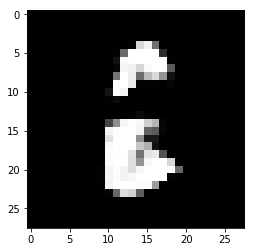

Loop: 652100, Generator_loss: -0.010133, Discriminator_loss: 0.0029758
Loop: 652200, Generator_loss: -0.0060523, Discriminator_loss: 0.0018995
Loop: 652300, Generator_loss: -0.011453, Discriminator_loss: 0.0043991
Loop: 652400, Generator_loss: -0.011731, Discriminator_loss: 0.0021411
Loop: 652500, Generator_loss: -0.0034879, Discriminator_loss: 0.0021179
Loop: 652600, Generator_loss: -0.0042322, Discriminator_loss: 0.0024945
Loop: 652700, Generator_loss: -0.0083377, Discriminator_loss: 0.0021235
Loop: 652800, Generator_loss: -0.0065928, Discriminator_loss: 0.0025613
Loop: 652900, Generator_loss: -0.014726, Discriminator_loss: 0.0029024
Loop: 653000, Generator_loss: -0.0082643, Discriminator_loss: 0.0044004


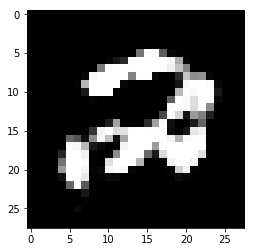

Loop: 653100, Generator_loss: -0.0076441, Discriminator_loss: 0.0032773
Loop: 653200, Generator_loss: -0.0075642, Discriminator_loss: 0.004292
Loop: 653300, Generator_loss: -0.0082249, Discriminator_loss: 0.0021811
Loop: 653400, Generator_loss: -0.0087656, Discriminator_loss: 0.0023306
Loop: 653500, Generator_loss: -0.0084488, Discriminator_loss: 0.00058977
Loop: 653600, Generator_loss: -0.0089182, Discriminator_loss: 0.0030738
Loop: 653700, Generator_loss: -0.0094107, Discriminator_loss: 0.0013668
Loop: 653800, Generator_loss: -0.0045062, Discriminator_loss: 0.002419
Loop: 653900, Generator_loss: -0.0053867, Discriminator_loss: 0.00067787
Loop: 654000, Generator_loss: -0.015424, Discriminator_loss: 0.0047729


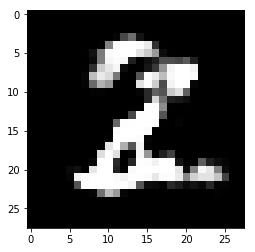

Loop: 654100, Generator_loss: -0.0081438, Discriminator_loss: 0.0031732
Loop: 654200, Generator_loss: -0.008711, Discriminator_loss: 0.0023281
Loop: 654300, Generator_loss: -0.0061059, Discriminator_loss: 0.0035705
Loop: 654400, Generator_loss: -0.0046006, Discriminator_loss: 0.00089195
Loop: 654500, Generator_loss: -0.010149, Discriminator_loss: 0.00060439
Loop: 654600, Generator_loss: -0.0051238, Discriminator_loss: 0.0028612
Loop: 654700, Generator_loss: -0.012493, Discriminator_loss: 0.0031274
Loop: 654800, Generator_loss: -0.011773, Discriminator_loss: 0.003046
Loop: 654900, Generator_loss: -0.011029, Discriminator_loss: 0.0037048
Loop: 655000, Generator_loss: -0.010174, Discriminator_loss: 0.0031549


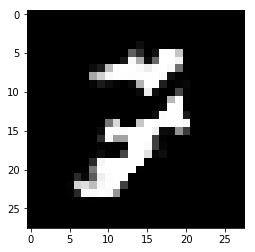

Loop: 655100, Generator_loss: -0.013057, Discriminator_loss: 0.0011148
Loop: 655200, Generator_loss: -0.0035267, Discriminator_loss: 0.0023916
Loop: 655300, Generator_loss: -0.003591, Discriminator_loss: 0.00043147
Loop: 655400, Generator_loss: -0.0023947, Discriminator_loss: 0.0039487
Loop: 655500, Generator_loss: -0.0048818, Discriminator_loss: 0.0037339
Loop: 655600, Generator_loss: -0.0095489, Discriminator_loss: 0.003453
Loop: 655700, Generator_loss: -0.007532, Discriminator_loss: 0.0023962
Loop: 655800, Generator_loss: -0.0043965, Discriminator_loss: 0.0022102
Loop: 655900, Generator_loss: -0.0073065, Discriminator_loss: 0.0029735
Loop: 656000, Generator_loss: -0.0084822, Discriminator_loss: 0.0021091


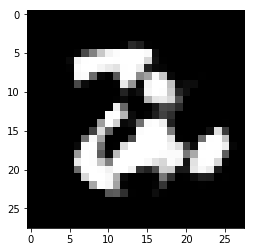

Loop: 656100, Generator_loss: -0.0098319, Discriminator_loss: 0.0021379
Loop: 656200, Generator_loss: -0.0055049, Discriminator_loss: 0.0036753
Loop: 656300, Generator_loss: -0.011176, Discriminator_loss: 0.003064
Loop: 656400, Generator_loss: -0.0084243, Discriminator_loss: 0.0025577
Loop: 656500, Generator_loss: -0.006288, Discriminator_loss: 0.0017955
Loop: 656600, Generator_loss: -0.010239, Discriminator_loss: 0.0032087
Loop: 656700, Generator_loss: -0.0064032, Discriminator_loss: 0.0025602
Loop: 656800, Generator_loss: -0.0026739, Discriminator_loss: 0.0056755
Loop: 656900, Generator_loss: -0.0080794, Discriminator_loss: 0.002397
Loop: 657000, Generator_loss: -0.012605, Discriminator_loss: 0.0053548


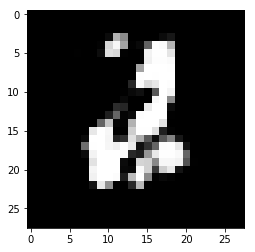

Loop: 657100, Generator_loss: -0.011258, Discriminator_loss: 0.0013499
Loop: 657200, Generator_loss: -0.0067318, Discriminator_loss: 0.0036647
Loop: 657300, Generator_loss: -0.0055984, Discriminator_loss: 0.0051722
Loop: 657400, Generator_loss: -0.014324, Discriminator_loss: 0.0042963
Loop: 657500, Generator_loss: -0.0080793, Discriminator_loss: 0.0037087
Loop: 657600, Generator_loss: -0.0073532, Discriminator_loss: 0.0044301
Loop: 657700, Generator_loss: -0.002862, Discriminator_loss: 0.0020792
Loop: 657800, Generator_loss: -0.010106, Discriminator_loss: 0.0018409
Loop: 657900, Generator_loss: -0.0080994, Discriminator_loss: 0.0029536
Loop: 658000, Generator_loss: -0.0045307, Discriminator_loss: 0.0038472


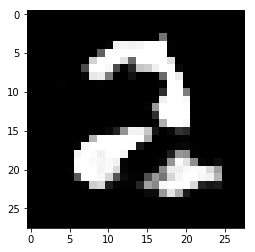

Loop: 658100, Generator_loss: -0.0093821, Discriminator_loss: 0.0045252
Loop: 658200, Generator_loss: -0.00094391, Discriminator_loss: 0.0035058
Loop: 658300, Generator_loss: -0.007862, Discriminator_loss: 0.0044488
Loop: 658400, Generator_loss: -0.0065375, Discriminator_loss: 0.0039659
Loop: 658500, Generator_loss: -0.015004, Discriminator_loss: 0.0029498
Loop: 658600, Generator_loss: -0.0094004, Discriminator_loss: -0.0017341
Loop: 658700, Generator_loss: -0.012714, Discriminator_loss: 0.0030074
Loop: 658800, Generator_loss: -0.013596, Discriminator_loss: 0.0034397
Loop: 658900, Generator_loss: 0.0012792, Discriminator_loss: 0.0053386
Loop: 659000, Generator_loss: -0.010182, Discriminator_loss: 0.004093


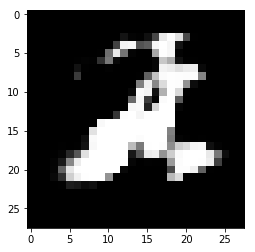

Loop: 659100, Generator_loss: -0.0095533, Discriminator_loss: 0.00078638
Loop: 659200, Generator_loss: -0.0027994, Discriminator_loss: 0.0033536
Loop: 659300, Generator_loss: -0.0015238, Discriminator_loss: 0.0039673
Loop: 659400, Generator_loss: -0.0069389, Discriminator_loss: 0.0030878
Loop: 659500, Generator_loss: -0.0033238, Discriminator_loss: 0.002677
Loop: 659600, Generator_loss: -0.010714, Discriminator_loss: 0.002452
Loop: 659700, Generator_loss: -0.012199, Discriminator_loss: 0.0046119
Loop: 659800, Generator_loss: -0.011425, Discriminator_loss: 0.0050366
Loop: 659900, Generator_loss: -0.012968, Discriminator_loss: 0.001674
Loop: 660000, Generator_loss: -0.007112, Discriminator_loss: 0.0035164


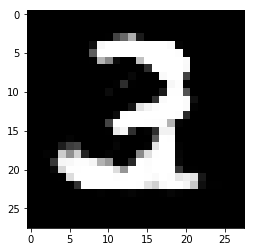

Loop: 660100, Generator_loss: -0.0085245, Discriminator_loss: 0.0019448
Loop: 660200, Generator_loss: -0.0094112, Discriminator_loss: 0.0036472
Loop: 660300, Generator_loss: -0.0072593, Discriminator_loss: 0.00058578
Loop: 660400, Generator_loss: -0.01017, Discriminator_loss: 0.002652
Loop: 660500, Generator_loss: -0.011187, Discriminator_loss: 0.0041089
Loop: 660600, Generator_loss: -0.0055303, Discriminator_loss: 0.0029148
Loop: 660700, Generator_loss: -0.0089637, Discriminator_loss: 0.0016246
Loop: 660800, Generator_loss: -0.0090322, Discriminator_loss: 0.0026381
Loop: 660900, Generator_loss: -0.0048905, Discriminator_loss: 0.0037887
Loop: 661000, Generator_loss: -0.015035, Discriminator_loss: 0.0020588


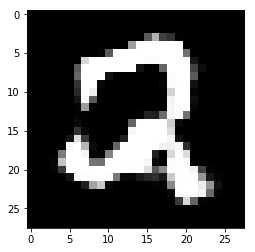

Loop: 661100, Generator_loss: -0.0029391, Discriminator_loss: 0.0028161
Loop: 661200, Generator_loss: -0.0027803, Discriminator_loss: 0.0046898
Loop: 661300, Generator_loss: -0.011548, Discriminator_loss: 0.0050534
Loop: 661400, Generator_loss: -0.0067339, Discriminator_loss: 0.0014731
Loop: 661500, Generator_loss: -0.0014315, Discriminator_loss: 0.00086925
Loop: 661600, Generator_loss: -0.0094986, Discriminator_loss: 0.0031325
Loop: 661700, Generator_loss: -0.0090048, Discriminator_loss: 0.00018467
Loop: 661800, Generator_loss: -0.010051, Discriminator_loss: 0.0031424
Loop: 661900, Generator_loss: -0.0044047, Discriminator_loss: 0.002367
Loop: 662000, Generator_loss: -0.005547, Discriminator_loss: 0.0038232


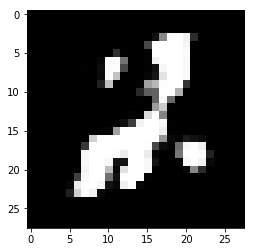

Loop: 662100, Generator_loss: -0.01182, Discriminator_loss: 0.0028143
Loop: 662200, Generator_loss: -0.0061923, Discriminator_loss: 0.0062219
Loop: 662300, Generator_loss: -0.0053759, Discriminator_loss: 0.0035183
Loop: 662400, Generator_loss: -0.0087728, Discriminator_loss: 0.0066145
Loop: 662500, Generator_loss: -0.0090314, Discriminator_loss: 0.0040599
Loop: 662600, Generator_loss: -0.0053921, Discriminator_loss: 0.0032677
Loop: 662700, Generator_loss: -0.0095422, Discriminator_loss: 0.0025388
Loop: 662800, Generator_loss: -0.01024, Discriminator_loss: 0.0030824
Loop: 662900, Generator_loss: -0.011007, Discriminator_loss: 0.0028297
Loop: 663000, Generator_loss: -0.013559, Discriminator_loss: 0.0033234


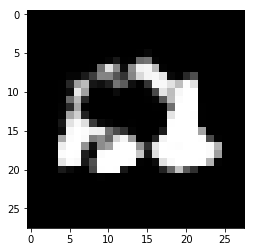

Loop: 663100, Generator_loss: -0.0094462, Discriminator_loss: 0.0037123
Loop: 663200, Generator_loss: -0.0081303, Discriminator_loss: 0.0026878
Loop: 663300, Generator_loss: -0.011794, Discriminator_loss: 0.004907
Loop: 663400, Generator_loss: -0.0091558, Discriminator_loss: 0.0033489
Loop: 663500, Generator_loss: -0.0025542, Discriminator_loss: 0.0023654
Loop: 663600, Generator_loss: -0.0048721, Discriminator_loss: 0.0023882
Loop: 663700, Generator_loss: -0.0045761, Discriminator_loss: 0.0041328
Loop: 663800, Generator_loss: -0.007272, Discriminator_loss: 0.0046613
Loop: 663900, Generator_loss: -0.0012913, Discriminator_loss: 0.00066488
Loop: 664000, Generator_loss: -0.010188, Discriminator_loss: 0.0022457


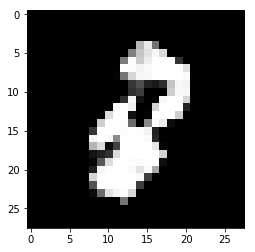

Loop: 664100, Generator_loss: -0.0056666, Discriminator_loss: 0.0021941
Loop: 664200, Generator_loss: -0.0042665, Discriminator_loss: 0.002849
Loop: 664300, Generator_loss: -0.0089359, Discriminator_loss: 0.0023079
Loop: 664400, Generator_loss: -0.0088425, Discriminator_loss: 0.0015863
Loop: 664500, Generator_loss: -0.0044962, Discriminator_loss: 0.0041233
Loop: 664600, Generator_loss: -0.0076054, Discriminator_loss: 0.0010571
Loop: 664700, Generator_loss: -0.004156, Discriminator_loss: 0.0037322
Loop: 664800, Generator_loss: -0.0082997, Discriminator_loss: 0.0044688
Loop: 664900, Generator_loss: -0.0053628, Discriminator_loss: 0.0018809
Loop: 665000, Generator_loss: -0.0096335, Discriminator_loss: 0.0022282


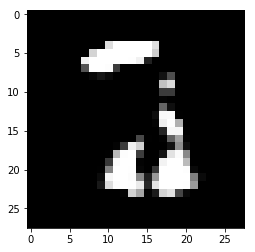

Loop: 665100, Generator_loss: -0.0067769, Discriminator_loss: 0.0010181
Loop: 665200, Generator_loss: -0.0036766, Discriminator_loss: 0.0032793
Loop: 665300, Generator_loss: -0.0070059, Discriminator_loss: 0.0048905
Loop: 665400, Generator_loss: -0.008559, Discriminator_loss: 0.0028192
Loop: 665500, Generator_loss: -0.0083099, Discriminator_loss: 0.0041431
Loop: 665600, Generator_loss: -0.0073371, Discriminator_loss: 0.0017381
Loop: 665700, Generator_loss: -0.004599, Discriminator_loss: 0.0018672
Loop: 665800, Generator_loss: -0.0065847, Discriminator_loss: 0.0036684
Loop: 665900, Generator_loss: -0.012133, Discriminator_loss: 0.0023185
Loop: 666000, Generator_loss: -0.003906, Discriminator_loss: 0.0015667


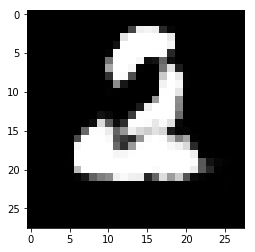

Loop: 666100, Generator_loss: -0.0064606, Discriminator_loss: 0.0028723
Loop: 666200, Generator_loss: -0.0016582, Discriminator_loss: 0.0038171
Loop: 666300, Generator_loss: -0.011735, Discriminator_loss: 0.0024975
Loop: 666400, Generator_loss: -0.008879, Discriminator_loss: 0.001213
Loop: 666500, Generator_loss: -0.0053055, Discriminator_loss: 0.0022375
Loop: 666600, Generator_loss: -0.0088935, Discriminator_loss: 0.002544
Loop: 666700, Generator_loss: -0.0084359, Discriminator_loss: 0.00080783
Loop: 666800, Generator_loss: -0.011055, Discriminator_loss: 0.0020979
Loop: 666900, Generator_loss: -0.0044686, Discriminator_loss: 0.0026076
Loop: 667000, Generator_loss: -0.015097, Discriminator_loss: 0.0021844


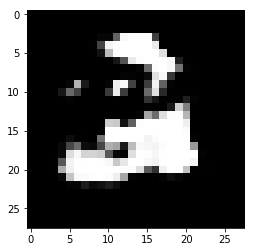

Loop: 667100, Generator_loss: -0.0084684, Discriminator_loss: 0.0020526
Loop: 667200, Generator_loss: -0.0088989, Discriminator_loss: 0.0017811
Loop: 667300, Generator_loss: -0.013004, Discriminator_loss: 0.0014629
Loop: 667400, Generator_loss: -0.0033875, Discriminator_loss: 0.0037669
Loop: 667500, Generator_loss: -0.0046413, Discriminator_loss: 0.0014715
Loop: 667600, Generator_loss: -0.0099284, Discriminator_loss: 0.0016621
Loop: 667700, Generator_loss: -0.002857, Discriminator_loss: 0.004502
Loop: 667800, Generator_loss: -0.00375, Discriminator_loss: 0.0044807
Loop: 667900, Generator_loss: -0.0039223, Discriminator_loss: 0.00096045
Loop: 668000, Generator_loss: -0.0067459, Discriminator_loss: 0.0038341


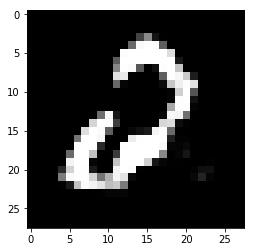

Loop: 668100, Generator_loss: -0.0093388, Discriminator_loss: 0.0011683
Loop: 668200, Generator_loss: -0.0031559, Discriminator_loss: 0.00085711
Loop: 668300, Generator_loss: -0.0079277, Discriminator_loss: 0.0030482
Loop: 668400, Generator_loss: -0.0058301, Discriminator_loss: 0.0034642
Loop: 668500, Generator_loss: -0.0043919, Discriminator_loss: 0.0038496
Loop: 668600, Generator_loss: -0.0035845, Discriminator_loss: 0.0029732
Loop: 668700, Generator_loss: -0.0094489, Discriminator_loss: 0.0027652
Loop: 668800, Generator_loss: -0.0072309, Discriminator_loss: 0.0033327
Loop: 668900, Generator_loss: -0.0031449, Discriminator_loss: 0.0034145
Loop: 669000, Generator_loss: -0.01309, Discriminator_loss: 0.0036946


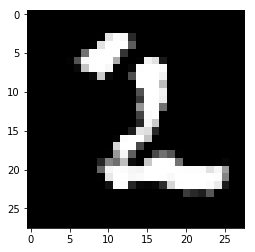

Loop: 669100, Generator_loss: -0.010374, Discriminator_loss: 0.002445
Loop: 669200, Generator_loss: -0.0093858, Discriminator_loss: 0.0029404
Loop: 669300, Generator_loss: -0.0048103, Discriminator_loss: 0.0016187
Loop: 669400, Generator_loss: -0.0027785, Discriminator_loss: 0.0034967
Loop: 669500, Generator_loss: -0.003662, Discriminator_loss: 0.0041821
Loop: 669600, Generator_loss: -0.0072098, Discriminator_loss: 0.0022192
Loop: 669700, Generator_loss: -0.0084867, Discriminator_loss: 0.0029656
Loop: 669800, Generator_loss: -0.0033069, Discriminator_loss: 0.0038334
Loop: 669900, Generator_loss: -0.0063211, Discriminator_loss: 0.0038423
Loop: 670000, Generator_loss: -0.011513, Discriminator_loss: 0.0018695


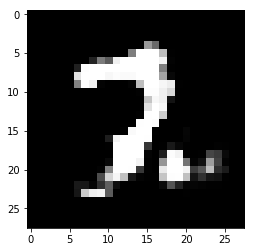

Loop: 670100, Generator_loss: -0.012001, Discriminator_loss: 0.0021974
Loop: 670200, Generator_loss: -0.0029659, Discriminator_loss: 0.001838
Loop: 670300, Generator_loss: -0.008499, Discriminator_loss: 0.0034798
Loop: 670400, Generator_loss: -0.0069768, Discriminator_loss: 0.0016811
Loop: 670500, Generator_loss: -0.0083225, Discriminator_loss: 0.0021508
Loop: 670600, Generator_loss: -0.012072, Discriminator_loss: 0.0024996
Loop: 670700, Generator_loss: -0.0062724, Discriminator_loss: 0.0034408
Loop: 670800, Generator_loss: -0.0038232, Discriminator_loss: 0.0024203
Loop: 670900, Generator_loss: -0.008991, Discriminator_loss: 0.0017184
Loop: 671000, Generator_loss: -0.0099902, Discriminator_loss: 0.0049374


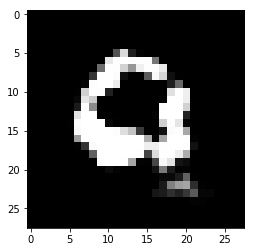

Loop: 671100, Generator_loss: -0.00794, Discriminator_loss: 0.0022794
Loop: 671200, Generator_loss: -0.0082487, Discriminator_loss: 0.0021693
Loop: 671300, Generator_loss: -0.0049467, Discriminator_loss: 0.0036158
Loop: 671400, Generator_loss: -0.0073488, Discriminator_loss: 0.0034875
Loop: 671500, Generator_loss: -0.0038689, Discriminator_loss: 0.0044017
Loop: 671600, Generator_loss: -0.011218, Discriminator_loss: 0.0039734
Loop: 671700, Generator_loss: -0.0066788, Discriminator_loss: 0.0035984
Loop: 671800, Generator_loss: -0.0059269, Discriminator_loss: 0.0027935
Loop: 671900, Generator_loss: -0.0034036, Discriminator_loss: 0.0030136
Loop: 672000, Generator_loss: -0.010585, Discriminator_loss: 0.0038925


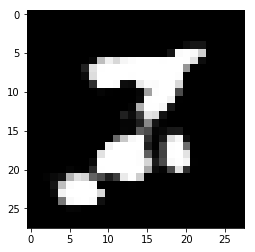

Loop: 672100, Generator_loss: -0.0032962, Discriminator_loss: 0.0041077
Loop: 672200, Generator_loss: -0.0054824, Discriminator_loss: -0.00043526
Loop: 672300, Generator_loss: -0.010865, Discriminator_loss: 0.0029639
Loop: 672400, Generator_loss: -0.0069784, Discriminator_loss: 0.0026167
Loop: 672500, Generator_loss: -0.0063511, Discriminator_loss: 0.0035964
Loop: 672600, Generator_loss: -0.0091366, Discriminator_loss: 0.0033885
Loop: 672700, Generator_loss: -0.0074643, Discriminator_loss: 0.0024216
Loop: 672800, Generator_loss: -0.0094021, Discriminator_loss: 0.0033911
Loop: 672900, Generator_loss: -0.0044039, Discriminator_loss: 0.0017199
Loop: 673000, Generator_loss: -0.010859, Discriminator_loss: 0.0035025


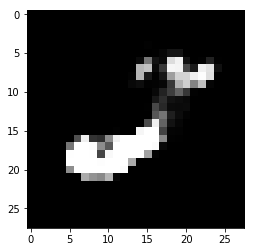

Loop: 673100, Generator_loss: -0.0041686, Discriminator_loss: 0.0048298
Loop: 673200, Generator_loss: -0.0076153, Discriminator_loss: 0.0034395
Loop: 673300, Generator_loss: -0.010719, Discriminator_loss: 0.0039795
Loop: 673400, Generator_loss: -0.0068818, Discriminator_loss: 0.0025552
Loop: 673500, Generator_loss: -0.010301, Discriminator_loss: 0.0035922
Loop: 673600, Generator_loss: -0.0089964, Discriminator_loss: 0.0033267
Loop: 673700, Generator_loss: -0.0038513, Discriminator_loss: 0.0016041
Loop: 673800, Generator_loss: -0.0039005, Discriminator_loss: 0.0027417
Loop: 673900, Generator_loss: -0.011063, Discriminator_loss: 0.0047207
Loop: 674000, Generator_loss: -0.0017065, Discriminator_loss: 0.0016


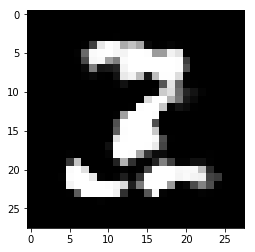

Loop: 674100, Generator_loss: -0.0095048, Discriminator_loss: 0.0042015
Loop: 674200, Generator_loss: -0.0064529, Discriminator_loss: 0.0018409
Loop: 674300, Generator_loss: -0.0071959, Discriminator_loss: 0.0037997
Loop: 674400, Generator_loss: -0.0063968, Discriminator_loss: 0.0026322
Loop: 674500, Generator_loss: -0.0076928, Discriminator_loss: 0.0012513
Loop: 674600, Generator_loss: -0.0041924, Discriminator_loss: 0.0040417
Loop: 674700, Generator_loss: -0.0033121, Discriminator_loss: 0.003921
Loop: 674800, Generator_loss: -0.0064023, Discriminator_loss: 0.0029481
Loop: 674900, Generator_loss: -0.0083152, Discriminator_loss: 0.002117
Loop: 675000, Generator_loss: -0.0067013, Discriminator_loss: 0.0030674


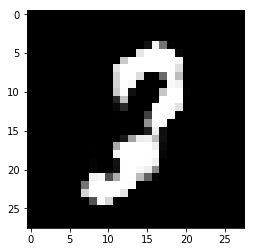

Loop: 675100, Generator_loss: -0.0025589, Discriminator_loss: 0.0027447
Loop: 675200, Generator_loss: -0.0043027, Discriminator_loss: 0.0016605
Loop: 675300, Generator_loss: -0.0058832, Discriminator_loss: 0.0043941
Loop: 675400, Generator_loss: -0.0038122, Discriminator_loss: 0.0042482
Loop: 675500, Generator_loss: -0.0084583, Discriminator_loss: 0.0028125
Loop: 675600, Generator_loss: -0.0032591, Discriminator_loss: 0.002078
Loop: 675700, Generator_loss: -0.0095276, Discriminator_loss: 0.0023844
Loop: 675800, Generator_loss: -0.0061709, Discriminator_loss: 0.0027521
Loop: 675900, Generator_loss: -0.0067752, Discriminator_loss: 0.0026252
Loop: 676000, Generator_loss: -0.00493, Discriminator_loss: 0.0019172


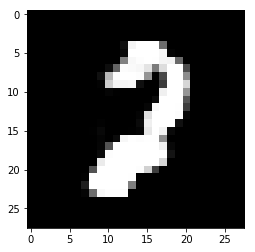

Loop: 676100, Generator_loss: -0.0089091, Discriminator_loss: 0.001842
Loop: 676200, Generator_loss: -0.0077921, Discriminator_loss: 0.0038311
Loop: 676300, Generator_loss: -0.0066539, Discriminator_loss: 0.0028487
Loop: 676400, Generator_loss: -0.0049835, Discriminator_loss: 0.003364
Loop: 676500, Generator_loss: -0.010371, Discriminator_loss: 0.0041965
Loop: 676600, Generator_loss: -0.0046581, Discriminator_loss: 0.0034546
Loop: 676700, Generator_loss: -0.0083028, Discriminator_loss: 0.0026795
Loop: 676800, Generator_loss: -0.0031747, Discriminator_loss: 0.0034836
Loop: 676900, Generator_loss: -0.008546, Discriminator_loss: 0.00080407
Loop: 677000, Generator_loss: -0.0098831, Discriminator_loss: 0.004429


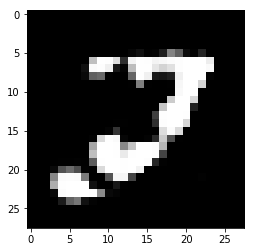

Loop: 677100, Generator_loss: -0.0068255, Discriminator_loss: 0.00074168
Loop: 677200, Generator_loss: -0.0063338, Discriminator_loss: 0.0020392
Loop: 677300, Generator_loss: -0.0090004, Discriminator_loss: 0.0027437
Loop: 677400, Generator_loss: -0.013507, Discriminator_loss: 0.0028903
Loop: 677500, Generator_loss: -0.0091939, Discriminator_loss: 0.0026157
Loop: 677600, Generator_loss: -0.0077756, Discriminator_loss: 0.0024942
Loop: 677700, Generator_loss: -0.0085844, Discriminator_loss: 0.002604
Loop: 677800, Generator_loss: -0.0036724, Discriminator_loss: 0.00084108
Loop: 677900, Generator_loss: -0.0080202, Discriminator_loss: 0.0045263
Loop: 678000, Generator_loss: -0.0075758, Discriminator_loss: 0.0060725


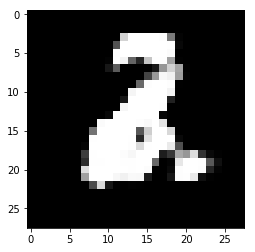

Loop: 678100, Generator_loss: -0.0079954, Discriminator_loss: 0.0045652
Loop: 678200, Generator_loss: -0.0040432, Discriminator_loss: 0.00057155
Loop: 678300, Generator_loss: -0.0095154, Discriminator_loss: 0.0035379
Loop: 678400, Generator_loss: -0.0083196, Discriminator_loss: 0.0021641
Loop: 678500, Generator_loss: -0.0019843, Discriminator_loss: 0.0049173
Loop: 678600, Generator_loss: -0.010503, Discriminator_loss: 0.0027137
Loop: 678700, Generator_loss: -0.0089937, Discriminator_loss: 0.0035154
Loop: 678800, Generator_loss: -0.010762, Discriminator_loss: 0.004883
Loop: 678900, Generator_loss: -0.0057518, Discriminator_loss: 0.0036407
Loop: 679000, Generator_loss: -0.0059943, Discriminator_loss: 0.0040451


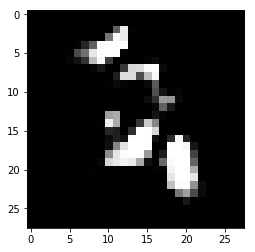

Loop: 679100, Generator_loss: -0.0065349, Discriminator_loss: 0.003782
Loop: 679200, Generator_loss: -0.0045012, Discriminator_loss: 0.003009
Loop: 679300, Generator_loss: -0.0052471, Discriminator_loss: 0.0010001
Loop: 679400, Generator_loss: -0.0097233, Discriminator_loss: 0.0025406
Loop: 679500, Generator_loss: -0.0076579, Discriminator_loss: 0.0018763
Loop: 679600, Generator_loss: -0.012854, Discriminator_loss: 0.0032524
Loop: 679700, Generator_loss: -0.0078904, Discriminator_loss: 0.0022933
Loop: 679800, Generator_loss: -0.0092449, Discriminator_loss: 0.002311
Loop: 679900, Generator_loss: -0.0071561, Discriminator_loss: 0.0035018
Loop: 680000, Generator_loss: -0.010758, Discriminator_loss: 0.0014812


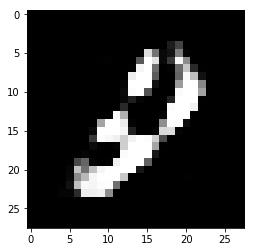

Loop: 680100, Generator_loss: -0.0069655, Discriminator_loss: 0.003151
Loop: 680200, Generator_loss: -0.0085432, Discriminator_loss: 0.002514
Loop: 680300, Generator_loss: -0.0085189, Discriminator_loss: 0.0021405
Loop: 680400, Generator_loss: 0.0003046, Discriminator_loss: 0.0022328
Loop: 680500, Generator_loss: -0.012626, Discriminator_loss: 0.004134
Loop: 680600, Generator_loss: -0.0075331, Discriminator_loss: 0.0032906
Loop: 680700, Generator_loss: -0.0048423, Discriminator_loss: 0.0053329
Loop: 680800, Generator_loss: -0.0055104, Discriminator_loss: 0.0029785
Loop: 680900, Generator_loss: -0.010072, Discriminator_loss: 0.0029819
Loop: 681000, Generator_loss: -0.0066534, Discriminator_loss: 0.0024293


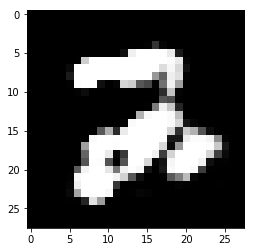

Loop: 681100, Generator_loss: -0.015418, Discriminator_loss: 0.0051649
Loop: 681200, Generator_loss: -0.0065812, Discriminator_loss: 0.0043927
Loop: 681300, Generator_loss: -0.0074505, Discriminator_loss: 0.0041339
Loop: 681400, Generator_loss: -0.017761, Discriminator_loss: 0.004047
Loop: 681500, Generator_loss: -0.0082763, Discriminator_loss: 0.0040281
Loop: 681600, Generator_loss: -0.010216, Discriminator_loss: 0.003692
Loop: 681700, Generator_loss: -0.011539, Discriminator_loss: 0.0024306
Loop: 681800, Generator_loss: -0.0052571, Discriminator_loss: 0.0033433
Loop: 681900, Generator_loss: -0.011115, Discriminator_loss: 0.0017932
Loop: 682000, Generator_loss: -0.0095188, Discriminator_loss: 0.0031037


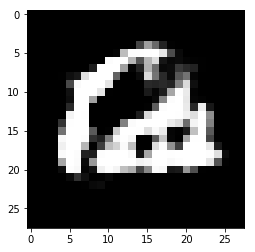

Loop: 682100, Generator_loss: -0.0058191, Discriminator_loss: 0.0030713
Loop: 682200, Generator_loss: -0.0014596, Discriminator_loss: 0.0013424
Loop: 682300, Generator_loss: -0.0068639, Discriminator_loss: 0.00080027
Loop: 682400, Generator_loss: -0.0091818, Discriminator_loss: 0.0022902
Loop: 682500, Generator_loss: -0.0071097, Discriminator_loss: 0.0029563
Loop: 682600, Generator_loss: -0.0082049, Discriminator_loss: 0.0032657
Loop: 682700, Generator_loss: -0.0072946, Discriminator_loss: 0.0044466
Loop: 682800, Generator_loss: -0.0033352, Discriminator_loss: 0.0010826
Loop: 682900, Generator_loss: -0.0034205, Discriminator_loss: 0.0010882
Loop: 683000, Generator_loss: -0.0052447, Discriminator_loss: 0.0028533


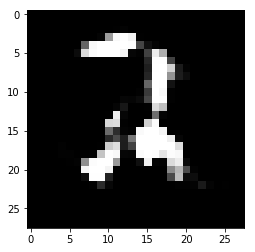

Loop: 683100, Generator_loss: -0.0036706, Discriminator_loss: 0.0032749
Loop: 683200, Generator_loss: -0.0046338, Discriminator_loss: 0.0034224
Loop: 683300, Generator_loss: -0.0063022, Discriminator_loss: 0.0034247
Loop: 683400, Generator_loss: -0.0070321, Discriminator_loss: 0.0047535
Loop: 683500, Generator_loss: -0.0049499, Discriminator_loss: 0.003143
Loop: 683600, Generator_loss: -0.0099519, Discriminator_loss: 0.0017293
Loop: 683700, Generator_loss: -0.0074294, Discriminator_loss: 0.0036445
Loop: 683800, Generator_loss: -0.0068941, Discriminator_loss: 0.0021866
Loop: 683900, Generator_loss: -0.0054442, Discriminator_loss: 0.0025538
Loop: 684000, Generator_loss: -0.006117, Discriminator_loss: 0.0027219


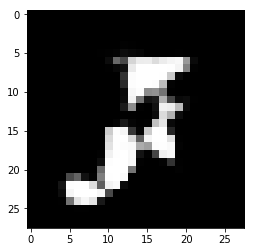

Loop: 684100, Generator_loss: -0.0053437, Discriminator_loss: 0.0038375
Loop: 684200, Generator_loss: -0.013677, Discriminator_loss: 0.0024994
Loop: 684300, Generator_loss: -0.011057, Discriminator_loss: 0.0036141
Loop: 684400, Generator_loss: -0.0070255, Discriminator_loss: 0.0028199
Loop: 684500, Generator_loss: -0.010735, Discriminator_loss: 0.0029034
Loop: 684600, Generator_loss: -0.0080909, Discriminator_loss: 0.0045977
Loop: 684700, Generator_loss: -0.0081421, Discriminator_loss: 0.0018672
Loop: 684800, Generator_loss: -0.0042407, Discriminator_loss: 0.0033746
Loop: 684900, Generator_loss: -0.0076467, Discriminator_loss: 0.0030115
Loop: 685000, Generator_loss: -0.0077681, Discriminator_loss: 0.0019535


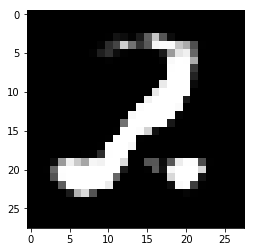

Loop: 685100, Generator_loss: -0.010595, Discriminator_loss: 0.0026068
Loop: 685200, Generator_loss: -0.0048092, Discriminator_loss: 0.0010028
Loop: 685300, Generator_loss: -0.010923, Discriminator_loss: 0.0030941
Loop: 685400, Generator_loss: -0.0064762, Discriminator_loss: -0.00089836
Loop: 685500, Generator_loss: -0.0083521, Discriminator_loss: 0.0022842
Loop: 685600, Generator_loss: -0.00024894, Discriminator_loss: 0.002802
Loop: 685700, Generator_loss: -0.0090578, Discriminator_loss: 0.0029339
Loop: 685800, Generator_loss: -0.0065463, Discriminator_loss: 0.0047092
Loop: 685900, Generator_loss: -0.0089646, Discriminator_loss: 0.003942
Loop: 686000, Generator_loss: -0.008132, Discriminator_loss: 0.0034665


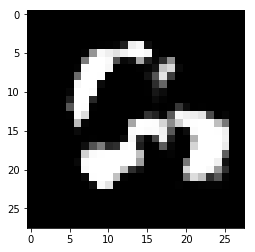

Loop: 686100, Generator_loss: -0.0092379, Discriminator_loss: 0.0024097
Loop: 686200, Generator_loss: -0.0075972, Discriminator_loss: 0.0025929
Loop: 686300, Generator_loss: -0.005983, Discriminator_loss: 0.0016329
Loop: 686400, Generator_loss: -0.0098862, Discriminator_loss: 0.0017972
Loop: 686500, Generator_loss: -0.0053262, Discriminator_loss: 0.0016566
Loop: 686600, Generator_loss: -0.0041889, Discriminator_loss: 0.0027747
Loop: 686700, Generator_loss: -0.011832, Discriminator_loss: 0.0012294
Loop: 686800, Generator_loss: -0.0066184, Discriminator_loss: 0.0026234
Loop: 686900, Generator_loss: -0.014351, Discriminator_loss: 0.00064837
Loop: 687000, Generator_loss: -0.0060745, Discriminator_loss: 0.0016261


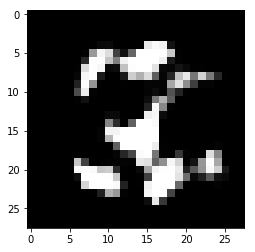

Loop: 687100, Generator_loss: -0.0091691, Discriminator_loss: 0.0027793
Loop: 687200, Generator_loss: -0.010976, Discriminator_loss: 0.0012188
Loop: 687300, Generator_loss: -0.0035877, Discriminator_loss: 0.0030964
Loop: 687400, Generator_loss: -0.0089738, Discriminator_loss: 0.0036437
Loop: 687500, Generator_loss: -0.0085909, Discriminator_loss: 0.004773
Loop: 687600, Generator_loss: -0.003814, Discriminator_loss: 0.0031248
Loop: 687700, Generator_loss: -0.0073866, Discriminator_loss: 0.0033447
Loop: 687800, Generator_loss: -0.0053556, Discriminator_loss: 0.0040111
Loop: 687900, Generator_loss: -0.0053546, Discriminator_loss: 0.0039608
Loop: 688000, Generator_loss: -0.0087721, Discriminator_loss: 0.003125


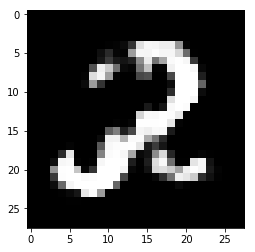

Loop: 688100, Generator_loss: -0.0083007, Discriminator_loss: 0.0014391
Loop: 688200, Generator_loss: -0.004265, Discriminator_loss: 0.0025938
Loop: 688300, Generator_loss: -0.013528, Discriminator_loss: 0.0041254
Loop: 688400, Generator_loss: -0.010797, Discriminator_loss: 0.0023418
Loop: 688500, Generator_loss: -0.0092437, Discriminator_loss: 0.0022155
Loop: 688600, Generator_loss: -0.0082218, Discriminator_loss: 0.0042866
Loop: 688700, Generator_loss: -0.0064278, Discriminator_loss: 0.0033174
Loop: 688800, Generator_loss: -0.0075744, Discriminator_loss: 0.0007836
Loop: 688900, Generator_loss: -0.010279, Discriminator_loss: 0.0021788
Loop: 689000, Generator_loss: -0.0070286, Discriminator_loss: 0.0038974


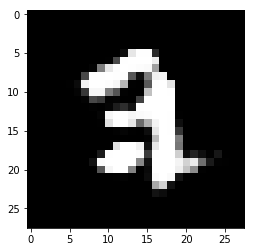

Loop: 689100, Generator_loss: -0.013843, Discriminator_loss: 0.00081806
Loop: 689200, Generator_loss: -0.0039299, Discriminator_loss: 0.0049064
Loop: 689300, Generator_loss: -0.0082118, Discriminator_loss: 0.0042223
Loop: 689400, Generator_loss: -0.0046068, Discriminator_loss: 0.0047815
Loop: 689500, Generator_loss: -0.01197, Discriminator_loss: 0.0029522
Loop: 689600, Generator_loss: -0.0069492, Discriminator_loss: 0.0024732
Loop: 689700, Generator_loss: -0.010938, Discriminator_loss: 0.0079371
Loop: 689800, Generator_loss: -0.0084193, Discriminator_loss: 0.0034874
Loop: 689900, Generator_loss: -0.0040391, Discriminator_loss: 0.0031447
Loop: 690000, Generator_loss: -0.0068066, Discriminator_loss: 0.0026105


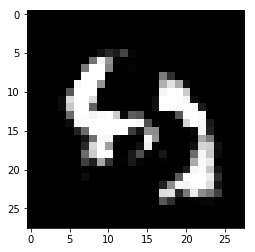

Loop: 690100, Generator_loss: -0.0070203, Discriminator_loss: 0.0028614
Loop: 690200, Generator_loss: -0.005399, Discriminator_loss: 0.0018576
Loop: 690300, Generator_loss: -0.004994, Discriminator_loss: 0.0051915
Loop: 690400, Generator_loss: -0.0059387, Discriminator_loss: 0.0034983
Loop: 690500, Generator_loss: -0.0059634, Discriminator_loss: 0.002582
Loop: 690600, Generator_loss: -0.0095081, Discriminator_loss: 0.0028796
Loop: 690700, Generator_loss: -0.0041487, Discriminator_loss: 0.0020852
Loop: 690800, Generator_loss: -0.0067592, Discriminator_loss: 0.0044027
Loop: 690900, Generator_loss: -0.0098373, Discriminator_loss: 0.0032023
Loop: 691000, Generator_loss: -0.00060357, Discriminator_loss: 0.0015005


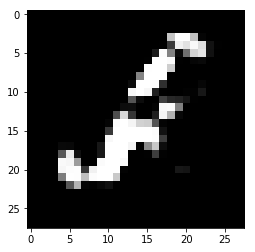

Loop: 691100, Generator_loss: -0.0082235, Discriminator_loss: 0.0031235
Loop: 691200, Generator_loss: -0.0063441, Discriminator_loss: 0.0020867
Loop: 691300, Generator_loss: -0.010123, Discriminator_loss: 0.0031361
Loop: 691400, Generator_loss: -0.00611, Discriminator_loss: 0.0049266
Loop: 691500, Generator_loss: -0.0079923, Discriminator_loss: 0.0050586
Loop: 691600, Generator_loss: 0.0038809, Discriminator_loss: 0.0040349
Loop: 691700, Generator_loss: -0.002845, Discriminator_loss: 0.0017196
Loop: 691800, Generator_loss: -0.0075674, Discriminator_loss: 0.0048918
Loop: 691900, Generator_loss: -0.0062303, Discriminator_loss: 0.0020398
Loop: 692000, Generator_loss: -0.0082042, Discriminator_loss: 0.002312


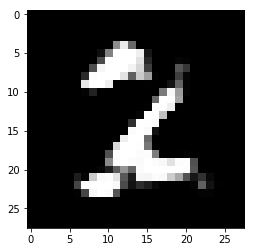

Loop: 692100, Generator_loss: -0.013169, Discriminator_loss: 0.0033468
Loop: 692200, Generator_loss: -0.0095316, Discriminator_loss: 0.0034028
Loop: 692300, Generator_loss: -0.0059136, Discriminator_loss: 0.0033896
Loop: 692400, Generator_loss: -0.00079708, Discriminator_loss: 0.0024237
Loop: 692500, Generator_loss: -0.0095013, Discriminator_loss: 0.0031531
Loop: 692600, Generator_loss: -0.0091093, Discriminator_loss: 0.004368
Loop: 692700, Generator_loss: -0.003845, Discriminator_loss: 0.0016675
Loop: 692800, Generator_loss: -0.011586, Discriminator_loss: 0.0040989
Loop: 692900, Generator_loss: -0.0096597, Discriminator_loss: 0.001612
Loop: 693000, Generator_loss: -0.0033746, Discriminator_loss: 0.0048784


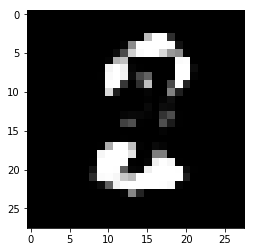

Loop: 693100, Generator_loss: -0.0091159, Discriminator_loss: 0.0021163
Loop: 693200, Generator_loss: -0.0048175, Discriminator_loss: 0.0017968
Loop: 693300, Generator_loss: -0.0067464, Discriminator_loss: 0.0029257
Loop: 693400, Generator_loss: -0.0013643, Discriminator_loss: 0.0028913
Loop: 693500, Generator_loss: -0.0088073, Discriminator_loss: 0.003393
Loop: 693600, Generator_loss: -0.0045642, Discriminator_loss: 0.0025476
Loop: 693700, Generator_loss: -0.010293, Discriminator_loss: 0.0054344
Loop: 693800, Generator_loss: -0.011829, Discriminator_loss: 0.0026647
Loop: 693900, Generator_loss: -0.009535, Discriminator_loss: 0.0028146
Loop: 694000, Generator_loss: -0.010928, Discriminator_loss: 0.0005237


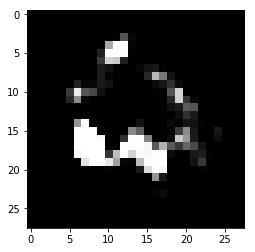

Loop: 694100, Generator_loss: -0.0071684, Discriminator_loss: 0.0023479
Loop: 694200, Generator_loss: -0.010036, Discriminator_loss: 0.0051913
Loop: 694300, Generator_loss: -0.0033103, Discriminator_loss: 0.002008
Loop: 694400, Generator_loss: -0.0075953, Discriminator_loss: 0.0033296
Loop: 694500, Generator_loss: -0.009792, Discriminator_loss: 0.0039655
Loop: 694600, Generator_loss: -0.0059648, Discriminator_loss: 0.0033464
Loop: 694700, Generator_loss: -0.0098338, Discriminator_loss: 0.0031713
Loop: 694800, Generator_loss: -0.0069503, Discriminator_loss: 0.0035827
Loop: 694900, Generator_loss: -0.016958, Discriminator_loss: 0.0026871
Loop: 695000, Generator_loss: -0.007213, Discriminator_loss: 0.0031903


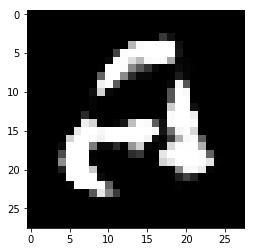

Loop: 695100, Generator_loss: -0.0081166, Discriminator_loss: 0.0052639
Loop: 695200, Generator_loss: -0.0087376, Discriminator_loss: 0.0049465
Loop: 695300, Generator_loss: -0.007523, Discriminator_loss: 0.0036051
Loop: 695400, Generator_loss: -0.010391, Discriminator_loss: 0.0017789
Loop: 695500, Generator_loss: -0.0068967, Discriminator_loss: 0.0035071
Loop: 695600, Generator_loss: -0.008505, Discriminator_loss: 0.0040254
Loop: 695700, Generator_loss: -0.0013587, Discriminator_loss: 0.0015682
Loop: 695800, Generator_loss: -0.0045178, Discriminator_loss: 0.0019663
Loop: 695900, Generator_loss: -0.011231, Discriminator_loss: 0.003314
Loop: 696000, Generator_loss: -0.011021, Discriminator_loss: 0.0034029


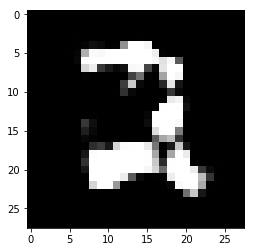

Loop: 696100, Generator_loss: -0.0072981, Discriminator_loss: 0.0013794
Loop: 696200, Generator_loss: -0.012932, Discriminator_loss: 0.0035414
Loop: 696300, Generator_loss: -0.0079681, Discriminator_loss: 0.0024357
Loop: 696400, Generator_loss: -0.0044795, Discriminator_loss: 0.0025523
Loop: 696500, Generator_loss: -0.0062205, Discriminator_loss: 0.0022156
Loop: 696600, Generator_loss: -0.0080151, Discriminator_loss: 0.0027518
Loop: 696700, Generator_loss: -0.0073846, Discriminator_loss: 0.0020109
Loop: 696800, Generator_loss: -0.006021, Discriminator_loss: 0.0029646
Loop: 696900, Generator_loss: -0.010683, Discriminator_loss: 0.0029923
Loop: 697000, Generator_loss: -0.0095495, Discriminator_loss: 0.0035246


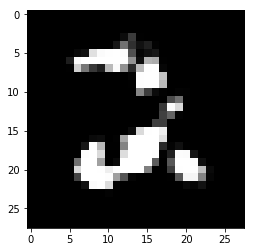

Loop: 697100, Generator_loss: -0.0069543, Discriminator_loss: 0.0010874
Loop: 697200, Generator_loss: -0.0075015, Discriminator_loss: 0.0036897
Loop: 697300, Generator_loss: -0.0082888, Discriminator_loss: 0.0027185
Loop: 697400, Generator_loss: -0.0037263, Discriminator_loss: 0.0014404
Loop: 697500, Generator_loss: -0.0031981, Discriminator_loss: 0.0030645
Loop: 697600, Generator_loss: -0.0037817, Discriminator_loss: 0.0028809
Loop: 697700, Generator_loss: -0.0083779, Discriminator_loss: 0.0032318
Loop: 697800, Generator_loss: -0.0071935, Discriminator_loss: 0.0037623
Loop: 697900, Generator_loss: -0.0053907, Discriminator_loss: 0.0021023
Loop: 698000, Generator_loss: -0.0061071, Discriminator_loss: 0.0028961


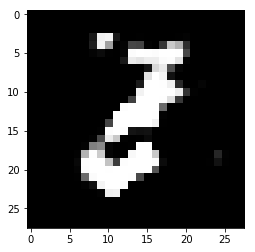

Loop: 698100, Generator_loss: -0.011173, Discriminator_loss: 0.0019645
Loop: 698200, Generator_loss: -0.010778, Discriminator_loss: 0.0043579
Loop: 698300, Generator_loss: -0.008549, Discriminator_loss: 0.0034033
Loop: 698400, Generator_loss: -0.0083412, Discriminator_loss: 0.004762
Loop: 698500, Generator_loss: -0.0063185, Discriminator_loss: 0.0031104
Loop: 698600, Generator_loss: -0.0041246, Discriminator_loss: 0.0017729
Loop: 698700, Generator_loss: -0.012269, Discriminator_loss: 0.0038217
Loop: 698800, Generator_loss: -0.0069612, Discriminator_loss: 0.0031449
Loop: 698900, Generator_loss: -0.0071286, Discriminator_loss: 0.0036378
Loop: 699000, Generator_loss: -0.0039383, Discriminator_loss: 0.0019138


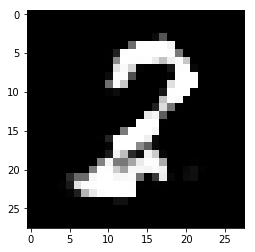

Loop: 699100, Generator_loss: -0.0091103, Discriminator_loss: 0.0032035
Loop: 699200, Generator_loss: -0.0060209, Discriminator_loss: 0.0010763
Loop: 699300, Generator_loss: -0.010273, Discriminator_loss: 0.0049785
Loop: 699400, Generator_loss: -0.0044525, Discriminator_loss: 0.0026286
Loop: 699500, Generator_loss: -0.0089323, Discriminator_loss: 0.0024998
Loop: 699600, Generator_loss: -0.0037828, Discriminator_loss: 0.0035499
Loop: 699700, Generator_loss: -0.0079586, Discriminator_loss: 0.00022783
Loop: 699800, Generator_loss: -0.0060651, Discriminator_loss: 0.0018404
Loop: 699900, Generator_loss: -0.016098, Discriminator_loss: 0.0038371
Loop: 700000, Generator_loss: -0.0080432, Discriminator_loss: 0.0052222


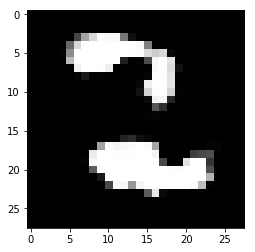

Loop: 700100, Generator_loss: -0.0070552, Discriminator_loss: 0.0046626
Loop: 700200, Generator_loss: -0.012421, Discriminator_loss: 0.0028546
Loop: 700300, Generator_loss: -0.008617, Discriminator_loss: 0.0035612
Loop: 700400, Generator_loss: -0.005382, Discriminator_loss: 0.0017455
Loop: 700500, Generator_loss: -0.0067811, Discriminator_loss: 0.0017671
Loop: 700600, Generator_loss: -0.0067287, Discriminator_loss: 0.0042097
Loop: 700700, Generator_loss: -0.010608, Discriminator_loss: 0.0053907
Loop: 700800, Generator_loss: -0.01168, Discriminator_loss: 0.002339
Loop: 700900, Generator_loss: -0.0064031, Discriminator_loss: 0.0047847
Loop: 701000, Generator_loss: -0.0082928, Discriminator_loss: 0.0040591


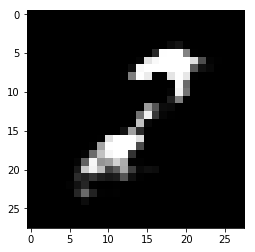

Loop: 701100, Generator_loss: -0.0087475, Discriminator_loss: 0.0023178
Loop: 701200, Generator_loss: -0.015036, Discriminator_loss: 0.0047359
Loop: 701300, Generator_loss: -0.0097641, Discriminator_loss: 0.0041411
Loop: 701400, Generator_loss: -0.0067597, Discriminator_loss: 0.0022865
Loop: 701500, Generator_loss: -0.0078845, Discriminator_loss: 0.0027554
Loop: 701600, Generator_loss: -0.0093499, Discriminator_loss: 0.004043
Loop: 701700, Generator_loss: -0.0085597, Discriminator_loss: 0.0033229
Loop: 701800, Generator_loss: -0.013521, Discriminator_loss: 0.00035697
Loop: 701900, Generator_loss: -0.0062309, Discriminator_loss: 0.0033006
Loop: 702000, Generator_loss: -0.0095838, Discriminator_loss: 0.0032524


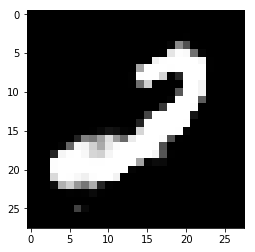

Loop: 702100, Generator_loss: -0.005849, Discriminator_loss: 0.0036292
Loop: 702200, Generator_loss: -0.0031327, Discriminator_loss: 0.0029113
Loop: 702300, Generator_loss: -0.00097484, Discriminator_loss: 0.0048605
Loop: 702400, Generator_loss: -0.0071589, Discriminator_loss: 0.0017132
Loop: 702500, Generator_loss: -0.0090185, Discriminator_loss: 0.0033476
Loop: 702600, Generator_loss: -0.002618, Discriminator_loss: 0.0024095
Loop: 702700, Generator_loss: -0.0063433, Discriminator_loss: 0.001921
Loop: 702800, Generator_loss: -0.0048511, Discriminator_loss: 0.0032393
Loop: 702900, Generator_loss: -0.00629, Discriminator_loss: 0.0040101
Loop: 703000, Generator_loss: -0.010598, Discriminator_loss: 0.00086554


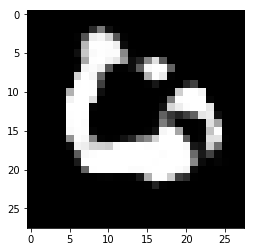

Loop: 703100, Generator_loss: -0.011102, Discriminator_loss: 0.002966
Loop: 703200, Generator_loss: -0.011687, Discriminator_loss: 0.0034621
Loop: 703300, Generator_loss: -0.0050973, Discriminator_loss: 0.0024658
Loop: 703400, Generator_loss: -0.0070422, Discriminator_loss: 0.0026077
Loop: 703500, Generator_loss: -0.005349, Discriminator_loss: 0.0017111
Loop: 703600, Generator_loss: -0.004252, Discriminator_loss: 0.0030379
Loop: 703700, Generator_loss: -0.0075705, Discriminator_loss: 0.0030757
Loop: 703800, Generator_loss: -0.0075111, Discriminator_loss: 0.0031303
Loop: 703900, Generator_loss: -0.0065405, Discriminator_loss: 0.0037578
Loop: 704000, Generator_loss: -0.0086132, Discriminator_loss: 0.0031314


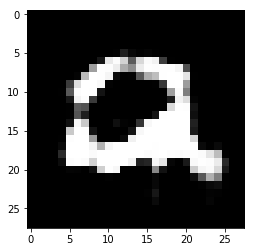

Loop: 704100, Generator_loss: -0.0040384, Discriminator_loss: 0.0041682
Loop: 704200, Generator_loss: -0.0042262, Discriminator_loss: 0.0029043
Loop: 704300, Generator_loss: -0.0064533, Discriminator_loss: 0.0026346
Loop: 704400, Generator_loss: -0.0086018, Discriminator_loss: 0.0056163
Loop: 704500, Generator_loss: -0.0043014, Discriminator_loss: 0.0011084
Loop: 704600, Generator_loss: -0.0094697, Discriminator_loss: 0.0039094
Loop: 704700, Generator_loss: -0.010734, Discriminator_loss: 0.0015718
Loop: 704800, Generator_loss: -0.0042433, Discriminator_loss: 0.0029712
Loop: 704900, Generator_loss: -0.010315, Discriminator_loss: 0.0023724
Loop: 705000, Generator_loss: -0.0088853, Discriminator_loss: 0.0038798


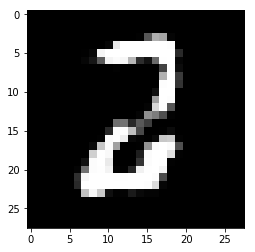

Loop: 705100, Generator_loss: -0.006728, Discriminator_loss: 0.002659
Loop: 705200, Generator_loss: -0.0075682, Discriminator_loss: 0.0022792
Loop: 705300, Generator_loss: -0.011905, Discriminator_loss: 0.0037499
Loop: 705400, Generator_loss: -0.002294, Discriminator_loss: 0.0050089
Loop: 705500, Generator_loss: -0.0066848, Discriminator_loss: 0.0021139
Loop: 705600, Generator_loss: -0.00703, Discriminator_loss: 0.0024401
Loop: 705700, Generator_loss: -0.0076783, Discriminator_loss: 0.0016942
Loop: 705800, Generator_loss: -0.0063766, Discriminator_loss: 0.0021004
Loop: 705900, Generator_loss: -0.0047146, Discriminator_loss: 0.0018413
Loop: 706000, Generator_loss: -0.0075955, Discriminator_loss: 0.0015625


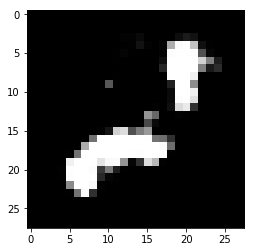

Loop: 706100, Generator_loss: -0.0058278, Discriminator_loss: 0.0028562
Loop: 706200, Generator_loss: -0.0037422, Discriminator_loss: 0.0035064
Loop: 706300, Generator_loss: -0.0098595, Discriminator_loss: 0.0045804
Loop: 706400, Generator_loss: -0.0068632, Discriminator_loss: 0.0018825
Loop: 706500, Generator_loss: -0.0013541, Discriminator_loss: 0.003197
Loop: 706600, Generator_loss: -0.010099, Discriminator_loss: 0.003664
Loop: 706700, Generator_loss: -0.0053913, Discriminator_loss: 0.004133
Loop: 706800, Generator_loss: -0.0077037, Discriminator_loss: 0.00079224
Loop: 706900, Generator_loss: -0.011368, Discriminator_loss: 0.00080374
Loop: 707000, Generator_loss: -0.0089431, Discriminator_loss: 0.0028618


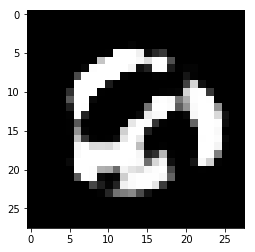

Loop: 707100, Generator_loss: -0.0030483, Discriminator_loss: 0.002
Loop: 707200, Generator_loss: -0.0086488, Discriminator_loss: 0.00089515
Loop: 707300, Generator_loss: -0.010317, Discriminator_loss: 0.0031577
Loop: 707400, Generator_loss: -0.0075667, Discriminator_loss: 0.0036305
Loop: 707500, Generator_loss: -0.011781, Discriminator_loss: 9.6508e-05
Loop: 707600, Generator_loss: -0.010089, Discriminator_loss: 0.0032407
Loop: 707700, Generator_loss: -0.0015177, Discriminator_loss: 0.00085027
Loop: 707800, Generator_loss: -0.0093323, Discriminator_loss: 0.0031739
Loop: 707900, Generator_loss: -0.002629, Discriminator_loss: 0.0043794
Loop: 708000, Generator_loss: -0.008215, Discriminator_loss: 0.0036373


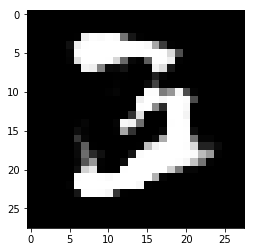

Loop: 708100, Generator_loss: -0.0086111, Discriminator_loss: 0.0027597
Loop: 708200, Generator_loss: -0.0091993, Discriminator_loss: 0.0011249
Loop: 708300, Generator_loss: -0.0087898, Discriminator_loss: 0.0016084
Loop: 708400, Generator_loss: -0.0091651, Discriminator_loss: 0.0034913
Loop: 708500, Generator_loss: -0.010986, Discriminator_loss: 0.0055784
Loop: 708600, Generator_loss: -0.0072775, Discriminator_loss: 0.0038106
Loop: 708700, Generator_loss: -0.00778, Discriminator_loss: 0.0022323
Loop: 708800, Generator_loss: -0.0073076, Discriminator_loss: 0.0028255
Loop: 708900, Generator_loss: -0.0067899, Discriminator_loss: 0.0031389
Loop: 709000, Generator_loss: -0.0043377, Discriminator_loss: 0.0026273


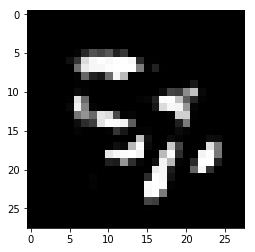

Loop: 709100, Generator_loss: -0.0058477, Discriminator_loss: 0.0033989
Loop: 709200, Generator_loss: -0.0074047, Discriminator_loss: 0.0027395
Loop: 709300, Generator_loss: -0.0033259, Discriminator_loss: 0.0026034
Loop: 709400, Generator_loss: -0.0070903, Discriminator_loss: 0.002978
Loop: 709500, Generator_loss: -0.0077219, Discriminator_loss: 0.0017136
Loop: 709600, Generator_loss: -0.011153, Discriminator_loss: 0.0030419
Loop: 709700, Generator_loss: -0.0056764, Discriminator_loss: 0.0031387
Loop: 709800, Generator_loss: -0.0038085, Discriminator_loss: 0.0011425
Loop: 709900, Generator_loss: -0.0020686, Discriminator_loss: 0.0023192
Loop: 710000, Generator_loss: -0.0083324, Discriminator_loss: 0.0042352


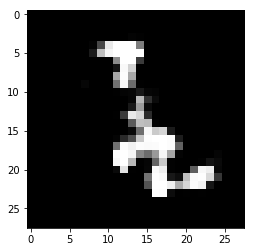

Loop: 710100, Generator_loss: -0.0069487, Discriminator_loss: 0.0028704
Loop: 710200, Generator_loss: -0.0068831, Discriminator_loss: 0.0052804
Loop: 710300, Generator_loss: -0.011246, Discriminator_loss: 0.0044469
Loop: 710400, Generator_loss: -0.0080717, Discriminator_loss: 0.00259
Loop: 710500, Generator_loss: -0.0098657, Discriminator_loss: 0.0043055
Loop: 710600, Generator_loss: -0.010141, Discriminator_loss: 0.0033458
Loop: 710700, Generator_loss: -0.0016762, Discriminator_loss: 0.0032318
Loop: 710800, Generator_loss: -0.0058996, Discriminator_loss: 0.0037523
Loop: 710900, Generator_loss: -0.010179, Discriminator_loss: 0.0025933
Loop: 711000, Generator_loss: -0.0113, Discriminator_loss: 0.0019716


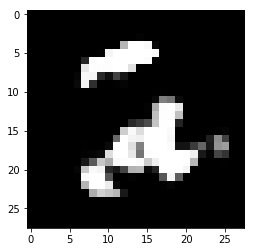

Loop: 711100, Generator_loss: -0.0028682, Discriminator_loss: 0.0024144
Loop: 711200, Generator_loss: -0.010571, Discriminator_loss: 0.0013027
Loop: 711300, Generator_loss: -0.0073676, Discriminator_loss: 0.0021799
Loop: 711400, Generator_loss: -0.011445, Discriminator_loss: 0.0032114
Loop: 711500, Generator_loss: -0.0084634, Discriminator_loss: 0.0022738
Loop: 711600, Generator_loss: -0.0038627, Discriminator_loss: 0.0033394
Loop: 711700, Generator_loss: -0.0074487, Discriminator_loss: 0.0049037
Loop: 711800, Generator_loss: -0.0056322, Discriminator_loss: 0.0036648
Loop: 711900, Generator_loss: -0.010267, Discriminator_loss: 0.00090678
Loop: 712000, Generator_loss: -0.0061781, Discriminator_loss: 0.0039741


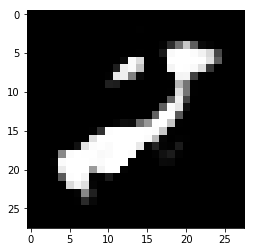

Loop: 712100, Generator_loss: -0.010697, Discriminator_loss: 0.00015517
Loop: 712200, Generator_loss: -0.0090215, Discriminator_loss: 0.0018052
Loop: 712300, Generator_loss: -0.0072827, Discriminator_loss: 0.0040617
Loop: 712400, Generator_loss: -0.0074625, Discriminator_loss: 0.0026303
Loop: 712500, Generator_loss: -0.0029023, Discriminator_loss: 0.0032939
Loop: 712600, Generator_loss: -0.0046086, Discriminator_loss: 0.0030664
Loop: 712700, Generator_loss: -0.0072166, Discriminator_loss: 0.00027296
Loop: 712800, Generator_loss: -0.0049727, Discriminator_loss: 0.0040917
Loop: 712900, Generator_loss: -0.010156, Discriminator_loss: 0.0026759
Loop: 713000, Generator_loss: -0.0075612, Discriminator_loss: 0.0037675


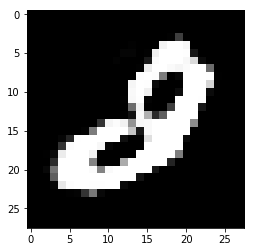

Loop: 713100, Generator_loss: -0.0096345, Discriminator_loss: 0.0031895
Loop: 713200, Generator_loss: -0.005845, Discriminator_loss: 0.0017836
Loop: 713300, Generator_loss: -0.011, Discriminator_loss: 0.0023476
Loop: 713400, Generator_loss: -0.0060601, Discriminator_loss: 0.0027572
Loop: 713500, Generator_loss: -0.0093093, Discriminator_loss: 0.0050482
Loop: 713600, Generator_loss: -0.0038168, Discriminator_loss: 0.0018533
Loop: 713700, Generator_loss: -0.0059706, Discriminator_loss: 0.00059959
Loop: 713800, Generator_loss: -0.0079052, Discriminator_loss: 0.00308
Loop: 713900, Generator_loss: -0.0085373, Discriminator_loss: -8.7675e-06
Loop: 714000, Generator_loss: -0.0060987, Discriminator_loss: 0.0028647


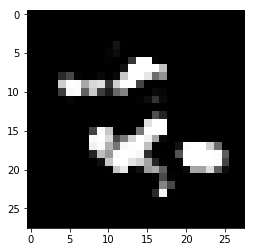

Loop: 714100, Generator_loss: -0.0090178, Discriminator_loss: 0.0032626
Loop: 714200, Generator_loss: -0.01099, Discriminator_loss: 0.0014333
Loop: 714300, Generator_loss: -0.0054182, Discriminator_loss: 0.0034438
Loop: 714400, Generator_loss: -0.0086144, Discriminator_loss: 0.0039512
Loop: 714500, Generator_loss: -0.0055563, Discriminator_loss: 0.0018216
Loop: 714600, Generator_loss: -0.0073769, Discriminator_loss: 0.0036031
Loop: 714700, Generator_loss: -0.0058376, Discriminator_loss: 0.002037
Loop: 714800, Generator_loss: -0.0084295, Discriminator_loss: 0.0021863
Loop: 714900, Generator_loss: -0.010188, Discriminator_loss: 0.0019235
Loop: 715000, Generator_loss: -0.0095968, Discriminator_loss: 0.0019907


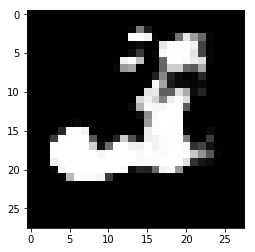

Loop: 715100, Generator_loss: -0.012962, Discriminator_loss: 0.001403
Loop: 715200, Generator_loss: -0.0045749, Discriminator_loss: 0.0036875
Loop: 715300, Generator_loss: -0.0080953, Discriminator_loss: -0.00049687
Loop: 715400, Generator_loss: -0.0062139, Discriminator_loss: 0.0034116
Loop: 715500, Generator_loss: -0.0077937, Discriminator_loss: 0.002656
Loop: 715600, Generator_loss: -0.0061809, Discriminator_loss: 0.0043398
Loop: 715700, Generator_loss: -0.0066579, Discriminator_loss: 0.0028416
Loop: 715800, Generator_loss: -0.012198, Discriminator_loss: 0.0028764
Loop: 715900, Generator_loss: -0.012381, Discriminator_loss: 0.0026911
Loop: 716000, Generator_loss: -0.0048292, Discriminator_loss: 0.0035906


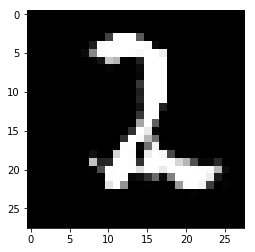

Loop: 716100, Generator_loss: -0.0056822, Discriminator_loss: 0.0051019
Loop: 716200, Generator_loss: -0.0096079, Discriminator_loss: 0.0013207
Loop: 716300, Generator_loss: -0.002709, Discriminator_loss: 0.0024692
Loop: 716400, Generator_loss: -0.0073469, Discriminator_loss: 0.0022081
Loop: 716500, Generator_loss: -0.0067631, Discriminator_loss: 0.0049103
Loop: 716600, Generator_loss: -0.0063942, Discriminator_loss: 0.003004
Loop: 716700, Generator_loss: -0.0016649, Discriminator_loss: 0.0043137
Loop: 716800, Generator_loss: -0.004614, Discriminator_loss: 0.0028451
Loop: 716900, Generator_loss: -0.0088057, Discriminator_loss: 0.0034367
Loop: 717000, Generator_loss: -0.0048467, Discriminator_loss: 0.0027904


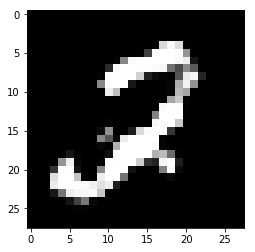

Loop: 717100, Generator_loss: -0.0067538, Discriminator_loss: 0.0018262
Loop: 717200, Generator_loss: -0.0072372, Discriminator_loss: 0.0036716
Loop: 717300, Generator_loss: -0.0095288, Discriminator_loss: 0.0025173
Loop: 717400, Generator_loss: -0.016965, Discriminator_loss: 0.0045347
Loop: 717500, Generator_loss: -0.0056491, Discriminator_loss: 0.0040641
Loop: 717600, Generator_loss: -0.0080025, Discriminator_loss: 0.0037384
Loop: 717700, Generator_loss: -0.0081868, Discriminator_loss: 0.0025848
Loop: 717800, Generator_loss: -0.011597, Discriminator_loss: 0.0027236
Loop: 717900, Generator_loss: -0.0068007, Discriminator_loss: 0.0026331
Loop: 718000, Generator_loss: -0.0094787, Discriminator_loss: 0.0025711


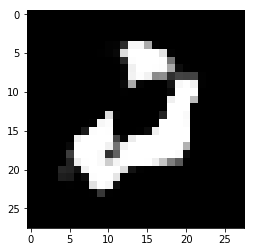

Loop: 718100, Generator_loss: -0.0060407, Discriminator_loss: 0.0022135
Loop: 718200, Generator_loss: -0.0045976, Discriminator_loss: 0.0020347
Loop: 718300, Generator_loss: -0.011033, Discriminator_loss: 0.0025978
Loop: 718400, Generator_loss: -0.0056195, Discriminator_loss: 0.0035502
Loop: 718500, Generator_loss: -0.0097627, Discriminator_loss: 0.0054914
Loop: 718600, Generator_loss: -0.011518, Discriminator_loss: 0.0035336
Loop: 718700, Generator_loss: -0.0072044, Discriminator_loss: 0.0029106
Loop: 718800, Generator_loss: -0.0052415, Discriminator_loss: 0.004517
Loop: 718900, Generator_loss: -0.0073142, Discriminator_loss: 0.0032367
Loop: 719000, Generator_loss: -0.011985, Discriminator_loss: 0.0014613


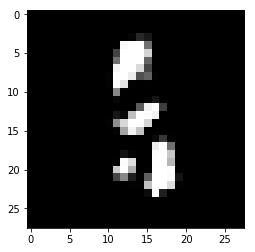

Loop: 719100, Generator_loss: -0.0072425, Discriminator_loss: 0.0042821
Loop: 719200, Generator_loss: -0.0027341, Discriminator_loss: 0.0021092
Loop: 719300, Generator_loss: -0.0065308, Discriminator_loss: 0.0020387
Loop: 719400, Generator_loss: -0.011961, Discriminator_loss: 0.0017795
Loop: 719500, Generator_loss: -0.010605, Discriminator_loss: 0.0037151
Loop: 719600, Generator_loss: -0.0042942, Discriminator_loss: 0.0036711
Loop: 719700, Generator_loss: -0.005003, Discriminator_loss: 0.0035886
Loop: 719800, Generator_loss: -0.0076865, Discriminator_loss: 0.0027639
Loop: 719900, Generator_loss: -0.0053553, Discriminator_loss: 0.0023313
Loop: 720000, Generator_loss: -0.0040341, Discriminator_loss: 0.0036866


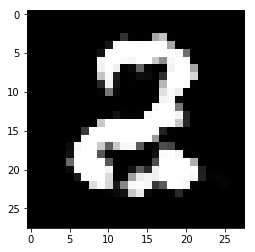

Loop: 720100, Generator_loss: -0.0062861, Discriminator_loss: 0.0026463
Loop: 720200, Generator_loss: -0.0070169, Discriminator_loss: 0.0038019
Loop: 720300, Generator_loss: -0.0092744, Discriminator_loss: 0.002365
Loop: 720400, Generator_loss: -0.011498, Discriminator_loss: 0.00074593
Loop: 720500, Generator_loss: -0.0068801, Discriminator_loss: 0.0047275
Loop: 720600, Generator_loss: -0.0081077, Discriminator_loss: 0.0032585
Loop: 720700, Generator_loss: -0.00353, Discriminator_loss: 0.0031264
Loop: 720800, Generator_loss: -0.0074341, Discriminator_loss: 0.0033292
Loop: 720900, Generator_loss: -0.0071759, Discriminator_loss: 0.0048568
Loop: 721000, Generator_loss: -0.0092551, Discriminator_loss: 0.0012833


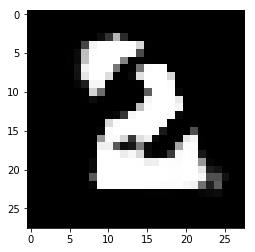

Loop: 721100, Generator_loss: -0.0046219, Discriminator_loss: 0.0023908
Loop: 721200, Generator_loss: -0.012265, Discriminator_loss: 0.0052894
Loop: 721300, Generator_loss: -0.0083993, Discriminator_loss: 0.0038495
Loop: 721400, Generator_loss: -0.0095376, Discriminator_loss: 0.002851
Loop: 721500, Generator_loss: -0.010146, Discriminator_loss: 0.003285
Loop: 721600, Generator_loss: -0.0077598, Discriminator_loss: 0.0033734
Loop: 721700, Generator_loss: -0.0066213, Discriminator_loss: 0.0024731
Loop: 721800, Generator_loss: -0.0086022, Discriminator_loss: 0.003102
Loop: 721900, Generator_loss: -0.0054874, Discriminator_loss: 0.0031561
Loop: 722000, Generator_loss: -0.0051005, Discriminator_loss: 0.0022939


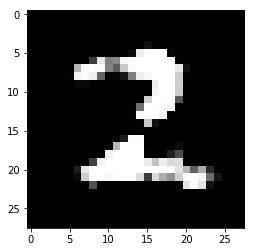

Loop: 722100, Generator_loss: -0.0058833, Discriminator_loss: 0.0034748
Loop: 722200, Generator_loss: -0.0081521, Discriminator_loss: 0.0030484
Loop: 722300, Generator_loss: -0.0062663, Discriminator_loss: 0.001774
Loop: 722400, Generator_loss: -0.0065772, Discriminator_loss: 0.001316
Loop: 722500, Generator_loss: -0.0089545, Discriminator_loss: 0.0025358
Loop: 722600, Generator_loss: -0.0082496, Discriminator_loss: 0.0024507
Loop: 722700, Generator_loss: -0.0082531, Discriminator_loss: 0.0024105
Loop: 722800, Generator_loss: -0.011389, Discriminator_loss: 0.0039506
Loop: 722900, Generator_loss: -0.004694, Discriminator_loss: 0.0022659
Loop: 723000, Generator_loss: -0.0051294, Discriminator_loss: 0.0041562


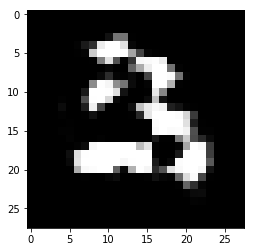

Loop: 723100, Generator_loss: -0.0073432, Discriminator_loss: 0.0026043
Loop: 723200, Generator_loss: -0.0083795, Discriminator_loss: 0.0014028
Loop: 723300, Generator_loss: -0.0043723, Discriminator_loss: 0.0033352
Loop: 723400, Generator_loss: -0.010397, Discriminator_loss: 0.0028636
Loop: 723500, Generator_loss: -0.016113, Discriminator_loss: 0.0025483
Loop: 723600, Generator_loss: -0.0095757, Discriminator_loss: 0.0039975
Loop: 723700, Generator_loss: -0.0043863, Discriminator_loss: 0.0013459
Loop: 723800, Generator_loss: -0.010838, Discriminator_loss: 0.0049772
Loop: 723900, Generator_loss: -0.0022892, Discriminator_loss: 0.0041606
Loop: 724000, Generator_loss: -0.0038425, Discriminator_loss: 0.005188


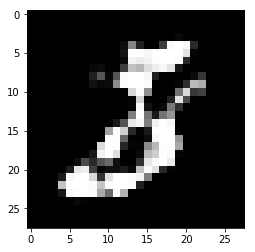

Loop: 724100, Generator_loss: -0.010482, Discriminator_loss: 0.0031285
Loop: 724200, Generator_loss: -0.0092934, Discriminator_loss: 0.0025725
Loop: 724300, Generator_loss: -0.0063905, Discriminator_loss: 0.0019297
Loop: 724400, Generator_loss: -0.0072005, Discriminator_loss: 0.00082089
Loop: 724500, Generator_loss: -0.008452, Discriminator_loss: 0.00080323
Loop: 724600, Generator_loss: -0.0051168, Discriminator_loss: 0.0016996
Loop: 724700, Generator_loss: -0.010812, Discriminator_loss: 0.0031025
Loop: 724800, Generator_loss: -0.011304, Discriminator_loss: 0.0037681
Loop: 724900, Generator_loss: -0.010733, Discriminator_loss: 0.0037394
Loop: 725000, Generator_loss: -0.0046272, Discriminator_loss: 0.002176


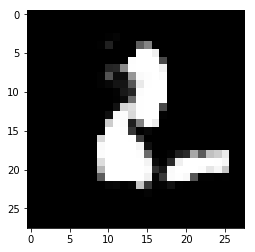

Loop: 725100, Generator_loss: -0.0071133, Discriminator_loss: 0.0034369
Loop: 725200, Generator_loss: -0.0065772, Discriminator_loss: 0.0016437
Loop: 725300, Generator_loss: -0.0086792, Discriminator_loss: 0.0029533
Loop: 725400, Generator_loss: -0.012252, Discriminator_loss: 0.0034523
Loop: 725500, Generator_loss: -0.0060844, Discriminator_loss: 0.0029725
Loop: 725600, Generator_loss: -0.008628, Discriminator_loss: 0.0042723
Loop: 725700, Generator_loss: -0.0064058, Discriminator_loss: 0.0037519
Loop: 725800, Generator_loss: -0.0093964, Discriminator_loss: 0.0047653
Loop: 725900, Generator_loss: -0.0081832, Discriminator_loss: 0.0027284
Loop: 726000, Generator_loss: -0.0077418, Discriminator_loss: 0.002161


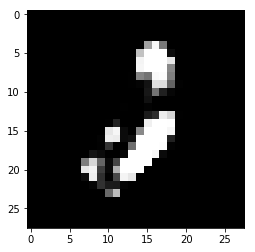

Loop: 726100, Generator_loss: -0.0056653, Discriminator_loss: 0.0026844
Loop: 726200, Generator_loss: -0.0059282, Discriminator_loss: 0.003496
Loop: 726300, Generator_loss: -0.010378, Discriminator_loss: 0.0028567
Loop: 726400, Generator_loss: -0.0070009, Discriminator_loss: 0.0013158
Loop: 726500, Generator_loss: -0.0078358, Discriminator_loss: 0.0023092
Loop: 726600, Generator_loss: -0.0070508, Discriminator_loss: 0.002229
Loop: 726700, Generator_loss: -0.0061377, Discriminator_loss: 0.0020076
Loop: 726800, Generator_loss: -0.009793, Discriminator_loss: 0.00042455
Loop: 726900, Generator_loss: -0.0054889, Discriminator_loss: 0.0015876
Loop: 727000, Generator_loss: -0.0052463, Discriminator_loss: 0.0025648


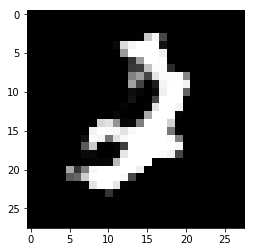

Loop: 727100, Generator_loss: -0.0056761, Discriminator_loss: 0.00022079
Loop: 727200, Generator_loss: -0.0086041, Discriminator_loss: 0.0031926
Loop: 727300, Generator_loss: -0.0055442, Discriminator_loss: 0.0023792
Loop: 727400, Generator_loss: -0.0070061, Discriminator_loss: 0.0036733
Loop: 727500, Generator_loss: -0.0077017, Discriminator_loss: 0.0026134
Loop: 727600, Generator_loss: -0.0039586, Discriminator_loss: 0.0027123
Loop: 727700, Generator_loss: -0.0089244, Discriminator_loss: 0.0021915
Loop: 727800, Generator_loss: -0.0073941, Discriminator_loss: 0.0022964
Loop: 727900, Generator_loss: -0.003645, Discriminator_loss: 0.001522
Loop: 728000, Generator_loss: -0.007089, Discriminator_loss: 0.0035993


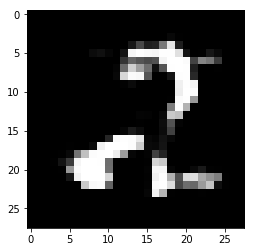

Loop: 728100, Generator_loss: -0.0075987, Discriminator_loss: 0.0031695
Loop: 728200, Generator_loss: -0.012891, Discriminator_loss: 0.0029321
Loop: 728300, Generator_loss: -0.0053342, Discriminator_loss: 0.0040662
Loop: 728400, Generator_loss: -0.01011, Discriminator_loss: 0.0030485
Loop: 728500, Generator_loss: -0.0073279, Discriminator_loss: 0.0033013
Loop: 728600, Generator_loss: -0.007943, Discriminator_loss: 0.0039256
Loop: 728700, Generator_loss: -0.0090262, Discriminator_loss: 0.0042506
Loop: 728800, Generator_loss: -0.0057694, Discriminator_loss: 0.0021217
Loop: 728900, Generator_loss: -0.0052605, Discriminator_loss: 0.0024024
Loop: 729000, Generator_loss: -0.0033388, Discriminator_loss: 0.0021949


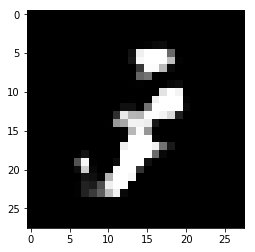

Loop: 729100, Generator_loss: -0.0096016, Discriminator_loss: 0.0026864
Loop: 729200, Generator_loss: -0.0081023, Discriminator_loss: 0.0023233
Loop: 729300, Generator_loss: -0.0062325, Discriminator_loss: 0.0030744
Loop: 729400, Generator_loss: -0.0071934, Discriminator_loss: 0.0024961
Loop: 729500, Generator_loss: -0.0028543, Discriminator_loss: 0.0039547
Loop: 729600, Generator_loss: -0.0086995, Discriminator_loss: 0.0039602
Loop: 729700, Generator_loss: -0.0042052, Discriminator_loss: 0.0014226
Loop: 729800, Generator_loss: -0.010829, Discriminator_loss: 0.002732
Loop: 729900, Generator_loss: -0.0078612, Discriminator_loss: 0.0036326
Loop: 730000, Generator_loss: -0.0043652, Discriminator_loss: 0.0034353


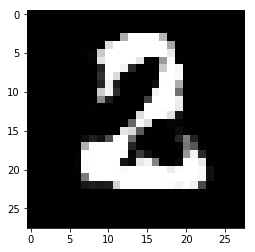

Loop: 730100, Generator_loss: -0.004467, Discriminator_loss: 0.0022112
Loop: 730200, Generator_loss: -0.0080101, Discriminator_loss: 0.0025542
Loop: 730300, Generator_loss: -0.010793, Discriminator_loss: 0.004098
Loop: 730400, Generator_loss: -0.0082612, Discriminator_loss: 0.0022269
Loop: 730500, Generator_loss: -0.007016, Discriminator_loss: 0.00018883
Loop: 730600, Generator_loss: -0.010262, Discriminator_loss: 0.0019459
Loop: 730700, Generator_loss: -0.004131, Discriminator_loss: 0.0045664
Loop: 730800, Generator_loss: -0.006921, Discriminator_loss: 0.0039115
Loop: 730900, Generator_loss: -0.0093396, Discriminator_loss: 0.0013074
Loop: 731000, Generator_loss: -0.0066275, Discriminator_loss: 0.0026893


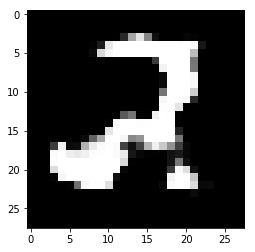

Loop: 731100, Generator_loss: -0.0050497, Discriminator_loss: 0.0034056
Loop: 731200, Generator_loss: -0.0023431, Discriminator_loss: 0.002563
Loop: 731300, Generator_loss: -0.011739, Discriminator_loss: 0.0030576
Loop: 731400, Generator_loss: -0.0042835, Discriminator_loss: 0.0027069
Loop: 731500, Generator_loss: -0.0075233, Discriminator_loss: 0.0047888
Loop: 731600, Generator_loss: -0.0050777, Discriminator_loss: 0.0041013
Loop: 731700, Generator_loss: -0.0085923, Discriminator_loss: 0.003329
Loop: 731800, Generator_loss: -0.0084321, Discriminator_loss: 0.003712
Loop: 731900, Generator_loss: -0.0056597, Discriminator_loss: 0.003001
Loop: 732000, Generator_loss: -0.0077696, Discriminator_loss: 0.0030619


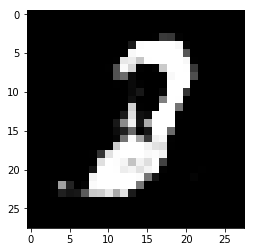

Loop: 732100, Generator_loss: -0.0042975, Discriminator_loss: 0.0031003
Loop: 732200, Generator_loss: -0.0087669, Discriminator_loss: 0.0039705
Loop: 732300, Generator_loss: -0.0059503, Discriminator_loss: 0.0029229
Loop: 732400, Generator_loss: -0.0082969, Discriminator_loss: 0.0024231
Loop: 732500, Generator_loss: -0.0084952, Discriminator_loss: 0.0023062
Loop: 732600, Generator_loss: -0.00234, Discriminator_loss: 0.0020993
Loop: 732700, Generator_loss: -0.0061717, Discriminator_loss: 0.0018279
Loop: 732800, Generator_loss: -0.0095915, Discriminator_loss: 0.0018736
Loop: 732900, Generator_loss: -0.0043092, Discriminator_loss: 0.0010518
Loop: 733000, Generator_loss: -0.0073487, Discriminator_loss: 0.0034541


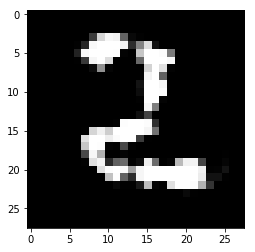

Loop: 733100, Generator_loss: -0.0043225, Discriminator_loss: 0.0027848
Loop: 733200, Generator_loss: -0.011089, Discriminator_loss: 0.0016422
Loop: 733300, Generator_loss: -0.0057814, Discriminator_loss: 0.0042026
Loop: 733400, Generator_loss: -0.0096422, Discriminator_loss: 0.002229
Loop: 733500, Generator_loss: -0.012185, Discriminator_loss: 0.0053708
Loop: 733600, Generator_loss: -0.0086277, Discriminator_loss: 0.0018909
Loop: 733700, Generator_loss: -0.0070493, Discriminator_loss: 0.0035514
Loop: 733800, Generator_loss: -0.011363, Discriminator_loss: 0.002539
Loop: 733900, Generator_loss: -0.0077727, Discriminator_loss: 0.0022828
Loop: 734000, Generator_loss: -0.0069008, Discriminator_loss: 0.0037381


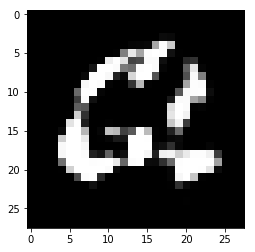

Loop: 734100, Generator_loss: -0.0060735, Discriminator_loss: 0.0043477
Loop: 734200, Generator_loss: -0.015947, Discriminator_loss: 0.0036931
Loop: 734300, Generator_loss: -0.012239, Discriminator_loss: 0.0014325
Loop: 734400, Generator_loss: -0.0113, Discriminator_loss: 0.0025252
Loop: 734500, Generator_loss: -0.013753, Discriminator_loss: 0.004587
Loop: 734600, Generator_loss: -0.0092593, Discriminator_loss: 0.0012582
Loop: 734700, Generator_loss: -0.008261, Discriminator_loss: 0.0041466
Loop: 734800, Generator_loss: -0.00544, Discriminator_loss: 0.0037365
Loop: 734900, Generator_loss: -0.0038986, Discriminator_loss: 0.0031055
Loop: 735000, Generator_loss: -0.014276, Discriminator_loss: 0.0040313


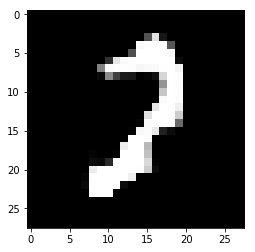

Loop: 735100, Generator_loss: -0.0051049, Discriminator_loss: 0.00031213
Loop: 735200, Generator_loss: -0.0049528, Discriminator_loss: 0.0033498
Loop: 735300, Generator_loss: -0.013151, Discriminator_loss: 0.0023318
Loop: 735400, Generator_loss: -0.0077211, Discriminator_loss: 0.0025396
Loop: 735500, Generator_loss: -0.0080026, Discriminator_loss: 0.00040363
Loop: 735600, Generator_loss: -0.007585, Discriminator_loss: 0.0028418
Loop: 735700, Generator_loss: -0.0074865, Discriminator_loss: 0.0031108
Loop: 735800, Generator_loss: -0.0045166, Discriminator_loss: 0.0038392
Loop: 735900, Generator_loss: -0.0079658, Discriminator_loss: 0.00026316
Loop: 736000, Generator_loss: -0.0084037, Discriminator_loss: 0.0034261


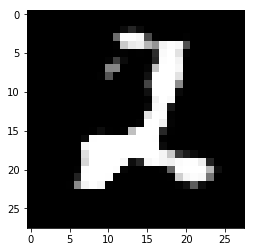

Loop: 736100, Generator_loss: -0.00025585, Discriminator_loss: 0.003152
Loop: 736200, Generator_loss: -0.0052152, Discriminator_loss: 0.0030479
Loop: 736300, Generator_loss: -0.0057395, Discriminator_loss: 0.003661
Loop: 736400, Generator_loss: -0.0047779, Discriminator_loss: 0.0011408
Loop: 736500, Generator_loss: -0.0076348, Discriminator_loss: 0.0030277
Loop: 736600, Generator_loss: -0.0033966, Discriminator_loss: 0.0022455
Loop: 736700, Generator_loss: -0.009164, Discriminator_loss: 0.0045942
Loop: 736800, Generator_loss: -0.004806, Discriminator_loss: 0.0038828
Loop: 736900, Generator_loss: -0.0082647, Discriminator_loss: 0.0031311
Loop: 737000, Generator_loss: -0.0045856, Discriminator_loss: 0.0045102


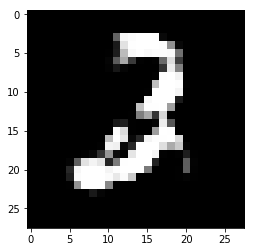

Loop: 737100, Generator_loss: -0.01005, Discriminator_loss: 0.0018142
Loop: 737200, Generator_loss: -0.0088947, Discriminator_loss: 0.0028705
Loop: 737300, Generator_loss: -0.012409, Discriminator_loss: 0.0026953
Loop: 737400, Generator_loss: -0.0069352, Discriminator_loss: 0.0042104
Loop: 737500, Generator_loss: -0.011305, Discriminator_loss: 0.0041446
Loop: 737600, Generator_loss: -0.0094889, Discriminator_loss: 0.0038952
Loop: 737700, Generator_loss: -0.0065667, Discriminator_loss: 0.0021843
Loop: 737800, Generator_loss: -0.014832, Discriminator_loss: 0.0004943
Loop: 737900, Generator_loss: -0.012312, Discriminator_loss: 0.0030911
Loop: 738000, Generator_loss: -0.0081803, Discriminator_loss: 0.0035086


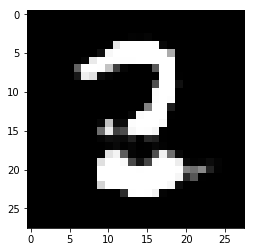

Loop: 738100, Generator_loss: -0.0080004, Discriminator_loss: 0.0038941
Loop: 738200, Generator_loss: -0.0089111, Discriminator_loss: 0.0035288
Loop: 738300, Generator_loss: -0.0037494, Discriminator_loss: 0.0038968
Loop: 738400, Generator_loss: -0.0081305, Discriminator_loss: 0.0051885
Loop: 738500, Generator_loss: -0.0076469, Discriminator_loss: 0.0056524
Loop: 738600, Generator_loss: -0.0053218, Discriminator_loss: 0.002618
Loop: 738700, Generator_loss: -0.0095584, Discriminator_loss: 0.0041427
Loop: 738800, Generator_loss: -0.0083361, Discriminator_loss: 0.0036349
Loop: 738900, Generator_loss: -0.0065168, Discriminator_loss: 0.0023153
Loop: 739000, Generator_loss: -0.0064147, Discriminator_loss: 0.0037074


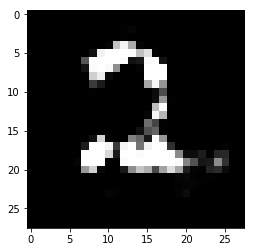

Loop: 739100, Generator_loss: -0.010582, Discriminator_loss: 0.0048629
Loop: 739200, Generator_loss: -0.0062159, Discriminator_loss: 0.0020132
Loop: 739300, Generator_loss: -0.0082078, Discriminator_loss: 0.0030915
Loop: 739400, Generator_loss: -0.0069068, Discriminator_loss: -0.00038318
Loop: 739500, Generator_loss: -0.012859, Discriminator_loss: -8.9686e-05
Loop: 739600, Generator_loss: -0.0076871, Discriminator_loss: 0.0032617
Loop: 739700, Generator_loss: -0.010318, Discriminator_loss: 0.0029267
Loop: 739800, Generator_loss: -0.011759, Discriminator_loss: -0.00010913
Loop: 739900, Generator_loss: -0.011735, Discriminator_loss: 0.0041422
Loop: 740000, Generator_loss: -0.010253, Discriminator_loss: 0.0046365


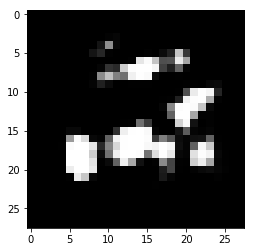

Loop: 740100, Generator_loss: -0.0052348, Discriminator_loss: 0.0020071
Loop: 740200, Generator_loss: -0.0075405, Discriminator_loss: 0.003487
Loop: 740300, Generator_loss: -0.010476, Discriminator_loss: 0.0012878
Loop: 740400, Generator_loss: -0.0066986, Discriminator_loss: 0.0023202
Loop: 740500, Generator_loss: -0.0061059, Discriminator_loss: 0.0027472
Loop: 740600, Generator_loss: -0.0023058, Discriminator_loss: 0.0042503
Loop: 740700, Generator_loss: -0.0074184, Discriminator_loss: 0.0020224
Loop: 740800, Generator_loss: -0.0070641, Discriminator_loss: 0.0036279
Loop: 740900, Generator_loss: -0.0077593, Discriminator_loss: 0.0032037
Loop: 741000, Generator_loss: -0.0069267, Discriminator_loss: 0.00045017


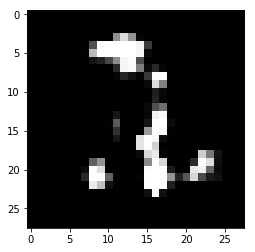

Loop: 741100, Generator_loss: -0.0066111, Discriminator_loss: 0.0040176
Loop: 741200, Generator_loss: -0.004166, Discriminator_loss: 0.0032805
Loop: 741300, Generator_loss: -0.0044044, Discriminator_loss: 0.0013121
Loop: 741400, Generator_loss: -0.010649, Discriminator_loss: 0.0024293
Loop: 741500, Generator_loss: -0.010235, Discriminator_loss: 0.0016671
Loop: 741600, Generator_loss: -0.0064131, Discriminator_loss: 0.0037821
Loop: 741700, Generator_loss: -0.008198, Discriminator_loss: 0.004048
Loop: 741800, Generator_loss: -0.0086969, Discriminator_loss: 0.0017083
Loop: 741900, Generator_loss: -0.0085278, Discriminator_loss: 0.0033863
Loop: 742000, Generator_loss: -0.0058697, Discriminator_loss: 0.0039001


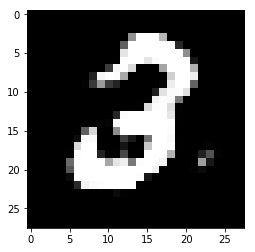

Loop: 742100, Generator_loss: -0.0047592, Discriminator_loss: 0.0027903
Loop: 742200, Generator_loss: -0.0051323, Discriminator_loss: 0.0051303
Loop: 742300, Generator_loss: -0.010513, Discriminator_loss: 0.0023203
Loop: 742400, Generator_loss: -0.0096841, Discriminator_loss: 0.0032305
Loop: 742500, Generator_loss: -0.0071112, Discriminator_loss: 0.002097
Loop: 742600, Generator_loss: -0.0084378, Discriminator_loss: 0.0023321
Loop: 742700, Generator_loss: -0.0057399, Discriminator_loss: 0.0025538
Loop: 742800, Generator_loss: -0.0063015, Discriminator_loss: 0.0017703
Loop: 742900, Generator_loss: -0.008964, Discriminator_loss: 0.0034897
Loop: 743000, Generator_loss: -0.0059909, Discriminator_loss: 0.0035778


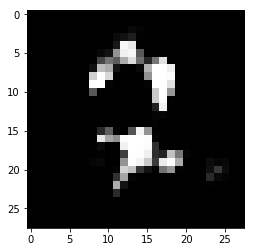

Loop: 743100, Generator_loss: -0.0068991, Discriminator_loss: 0.00061584
Loop: 743200, Generator_loss: -0.0036353, Discriminator_loss: 0.0015151
Loop: 743300, Generator_loss: -0.0091055, Discriminator_loss: 0.0048962
Loop: 743400, Generator_loss: -0.0079319, Discriminator_loss: 0.0022554
Loop: 743500, Generator_loss: -0.0028208, Discriminator_loss: 0.0029422
Loop: 743600, Generator_loss: -0.0095569, Discriminator_loss: 0.0016133
Loop: 743700, Generator_loss: -0.0064787, Discriminator_loss: 0.0036851
Loop: 743800, Generator_loss: -0.011854, Discriminator_loss: 0.0041762
Loop: 743900, Generator_loss: -0.0044143, Discriminator_loss: 0.0017303
Loop: 744000, Generator_loss: -0.01158, Discriminator_loss: 0.0038203


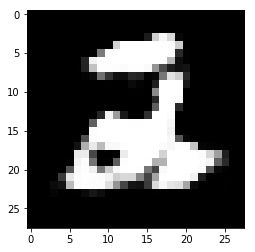

Loop: 744100, Generator_loss: -0.0055501, Discriminator_loss: 0.0017469
Loop: 744200, Generator_loss: -0.0046989, Discriminator_loss: 0.0045585
Loop: 744300, Generator_loss: -0.0084108, Discriminator_loss: 0.0018729
Loop: 744400, Generator_loss: -0.0086581, Discriminator_loss: 0.0030042
Loop: 744500, Generator_loss: -0.01396, Discriminator_loss: 0.0030388
Loop: 744600, Generator_loss: -0.0044535, Discriminator_loss: 0.0013079
Loop: 744700, Generator_loss: -0.0065059, Discriminator_loss: 0.0032672
Loop: 744800, Generator_loss: -0.0079725, Discriminator_loss: 0.0020429
Loop: 744900, Generator_loss: -0.0094581, Discriminator_loss: 0.0016909
Loop: 745000, Generator_loss: -0.0053687, Discriminator_loss: 0.0015104


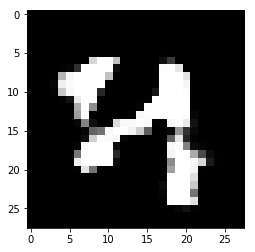

Loop: 745100, Generator_loss: -0.0074855, Discriminator_loss: 0.0033343
Loop: 745200, Generator_loss: -0.0073276, Discriminator_loss: 0.0026644
Loop: 745300, Generator_loss: -0.010731, Discriminator_loss: 0.0033385
Loop: 745400, Generator_loss: -0.0088169, Discriminator_loss: 0.0021626
Loop: 745500, Generator_loss: -0.011129, Discriminator_loss: 0.0045704
Loop: 745600, Generator_loss: -0.0086694, Discriminator_loss: 0.0040809
Loop: 745700, Generator_loss: -0.0046233, Discriminator_loss: 0.0028918
Loop: 745800, Generator_loss: -0.007053, Discriminator_loss: 0.0025687
Loop: 745900, Generator_loss: -0.0064449, Discriminator_loss: 0.0039261
Loop: 746000, Generator_loss: -0.010226, Discriminator_loss: 0.0026062


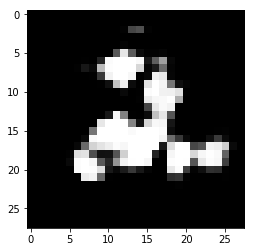

Loop: 746100, Generator_loss: -0.0042363, Discriminator_loss: 0.0049731
Loop: 746200, Generator_loss: -0.0040997, Discriminator_loss: 0.0031457
Loop: 746300, Generator_loss: -0.01005, Discriminator_loss: 0.0020488
Loop: 746400, Generator_loss: -0.0070487, Discriminator_loss: 0.0039484
Loop: 746500, Generator_loss: -0.0064178, Discriminator_loss: 0.0016164
Loop: 746600, Generator_loss: -0.0098372, Discriminator_loss: 0.0020363
Loop: 746700, Generator_loss: -0.0026033, Discriminator_loss: 0.0029572
Loop: 746800, Generator_loss: -0.0047132, Discriminator_loss: 0.0007232
Loop: 746900, Generator_loss: -0.0079333, Discriminator_loss: 0.0048762
Loop: 747000, Generator_loss: -0.0082029, Discriminator_loss: 0.0032571


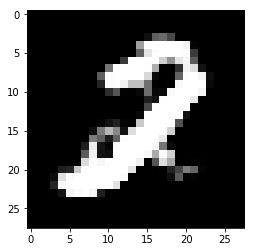

Loop: 747100, Generator_loss: -0.0076252, Discriminator_loss: 0.0027375
Loop: 747200, Generator_loss: -0.010083, Discriminator_loss: 0.002657
Loop: 747300, Generator_loss: -0.0089989, Discriminator_loss: 0.0028923
Loop: 747400, Generator_loss: -0.011187, Discriminator_loss: 0.0015874
Loop: 747500, Generator_loss: -0.0087095, Discriminator_loss: 0.0023509
Loop: 747600, Generator_loss: -0.010673, Discriminator_loss: 0.0032331
Loop: 747700, Generator_loss: -0.006859, Discriminator_loss: 0.0027593
Loop: 747800, Generator_loss: -0.0071332, Discriminator_loss: 0.0029292
Loop: 747900, Generator_loss: -0.011009, Discriminator_loss: 0.0045881
Loop: 748000, Generator_loss: -0.009134, Discriminator_loss: 0.0024778


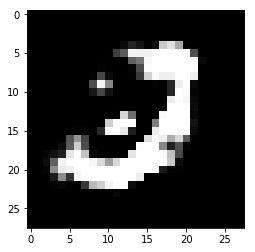

Loop: 748100, Generator_loss: -0.0064703, Discriminator_loss: 0.0020846
Loop: 748200, Generator_loss: -0.008908, Discriminator_loss: 0.0023063
Loop: 748300, Generator_loss: -0.0057478, Discriminator_loss: 0.0018638
Loop: 748400, Generator_loss: -0.0071589, Discriminator_loss: 0.0037352
Loop: 748500, Generator_loss: -0.009214, Discriminator_loss: 0.0019356
Loop: 748600, Generator_loss: -0.0073966, Discriminator_loss: 0.0026208
Loop: 748700, Generator_loss: -0.0092732, Discriminator_loss: 0.0046081
Loop: 748800, Generator_loss: -0.0078048, Discriminator_loss: 0.0037189
Loop: 748900, Generator_loss: -0.010515, Discriminator_loss: 0.002311
Loop: 749000, Generator_loss: -0.0069047, Discriminator_loss: 0.0024307


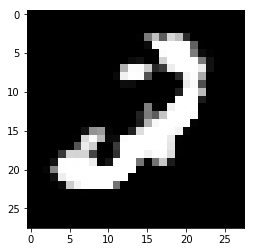

Loop: 749100, Generator_loss: -0.0094913, Discriminator_loss: 0.0015519
Loop: 749200, Generator_loss: -0.010593, Discriminator_loss: 0.0036962
Loop: 749300, Generator_loss: -0.0058331, Discriminator_loss: 0.0027735
Loop: 749400, Generator_loss: -0.0074076, Discriminator_loss: 0.0038026
Loop: 749500, Generator_loss: -0.0054167, Discriminator_loss: 0.0027937
Loop: 749600, Generator_loss: -0.0093505, Discriminator_loss: 0.0052502
Loop: 749700, Generator_loss: -0.00302, Discriminator_loss: 0.00236
Loop: 749800, Generator_loss: -0.0033293, Discriminator_loss: 0.0039712
Loop: 749900, Generator_loss: -0.0049527, Discriminator_loss: 0.0036821
Loop: 750000, Generator_loss: -0.0076865, Discriminator_loss: 0.0035054


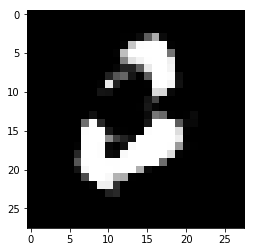

Loop: 750100, Generator_loss: -0.01044, Discriminator_loss: 1.6335e-06
Loop: 750200, Generator_loss: -0.0062188, Discriminator_loss: 0.0016304
Loop: 750300, Generator_loss: -0.0054652, Discriminator_loss: 0.003847
Loop: 750400, Generator_loss: -0.0035463, Discriminator_loss: 0.0021968
Loop: 750500, Generator_loss: -0.0080501, Discriminator_loss: 0.0020132
Loop: 750600, Generator_loss: -0.010138, Discriminator_loss: 0.0020656
Loop: 750700, Generator_loss: -0.011599, Discriminator_loss: 0.0029607
Loop: 750800, Generator_loss: -0.0063027, Discriminator_loss: 0.0045768
Loop: 750900, Generator_loss: -0.0067073, Discriminator_loss: 0.0031251
Loop: 751000, Generator_loss: -0.012357, Discriminator_loss: 0.0029051


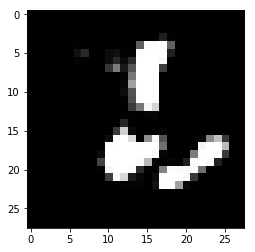

Loop: 751100, Generator_loss: -0.004284, Discriminator_loss: 0.002431
Loop: 751200, Generator_loss: -0.011093, Discriminator_loss: 0.0013087
Loop: 751300, Generator_loss: -0.013328, Discriminator_loss: 0.0027989
Loop: 751400, Generator_loss: -0.0053016, Discriminator_loss: 0.003812
Loop: 751500, Generator_loss: -0.0072088, Discriminator_loss: 0.0013694
Loop: 751600, Generator_loss: -0.0073898, Discriminator_loss: 0.0025035
Loop: 751700, Generator_loss: -0.0073999, Discriminator_loss: 0.0035634
Loop: 751800, Generator_loss: -0.011456, Discriminator_loss: 0.0037781
Loop: 751900, Generator_loss: -0.0090531, Discriminator_loss: 0.0030006
Loop: 752000, Generator_loss: -0.0059374, Discriminator_loss: 0.0014654


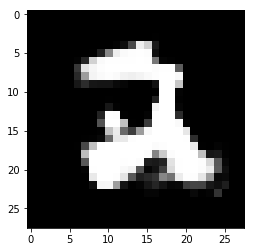

Loop: 752100, Generator_loss: -0.0038873, Discriminator_loss: 0.0030356
Loop: 752200, Generator_loss: -0.0077695, Discriminator_loss: 0.003575
Loop: 752300, Generator_loss: -0.007593, Discriminator_loss: 0.0025792
Loop: 752400, Generator_loss: -0.0047169, Discriminator_loss: 0.0016406
Loop: 752500, Generator_loss: -0.0082144, Discriminator_loss: 0.0039428
Loop: 752600, Generator_loss: -0.0052404, Discriminator_loss: 0.0029496
Loop: 752700, Generator_loss: -0.0055434, Discriminator_loss: 0.00341
Loop: 752800, Generator_loss: -0.0030517, Discriminator_loss: 0.0020533
Loop: 752900, Generator_loss: -0.0058743, Discriminator_loss: 0.0028827
Loop: 753000, Generator_loss: -0.0061018, Discriminator_loss: 0.0033188


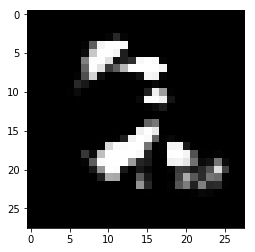

Loop: 753100, Generator_loss: -0.010042, Discriminator_loss: 0.00029012
Loop: 753200, Generator_loss: -0.0047793, Discriminator_loss: 0.0029848
Loop: 753300, Generator_loss: -0.0076538, Discriminator_loss: 0.0024091
Loop: 753400, Generator_loss: -0.00071726, Discriminator_loss: 0.0035058
Loop: 753500, Generator_loss: -0.010638, Discriminator_loss: 0.0026119
Loop: 753600, Generator_loss: -0.0085826, Discriminator_loss: 0.0034296
Loop: 753700, Generator_loss: -0.01079, Discriminator_loss: 0.0030502
Loop: 753800, Generator_loss: -0.0085993, Discriminator_loss: 0.0040002
Loop: 753900, Generator_loss: -0.003765, Discriminator_loss: 0.0046437
Loop: 754000, Generator_loss: -0.0093487, Discriminator_loss: 0.001542


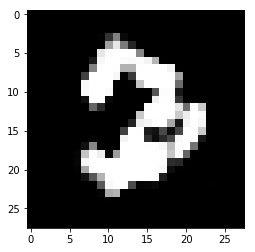

Loop: 754100, Generator_loss: -0.0063214, Discriminator_loss: 0.0038558
Loop: 754200, Generator_loss: -0.00761, Discriminator_loss: 0.005111
Loop: 754300, Generator_loss: -0.0034373, Discriminator_loss: 0.002622
Loop: 754400, Generator_loss: -0.0051451, Discriminator_loss: 0.0041941
Loop: 754500, Generator_loss: -0.0092233, Discriminator_loss: 0.0017607
Loop: 754600, Generator_loss: -0.015917, Discriminator_loss: 0.0043983
Loop: 754700, Generator_loss: -0.013089, Discriminator_loss: 0.0027748
Loop: 754800, Generator_loss: -0.0061224, Discriminator_loss: 0.0030608
Loop: 754900, Generator_loss: -0.0096024, Discriminator_loss: 0.0022619
Loop: 755000, Generator_loss: -0.0074187, Discriminator_loss: 0.0035384


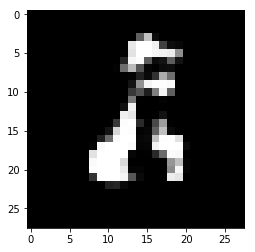

Loop: 755100, Generator_loss: -0.012399, Discriminator_loss: 0.0051489
Loop: 755200, Generator_loss: -0.0072848, Discriminator_loss: 0.004727
Loop: 755300, Generator_loss: -0.0091608, Discriminator_loss: 0.0016731
Loop: 755400, Generator_loss: -0.0061293, Discriminator_loss: 0.0033408
Loop: 755500, Generator_loss: -0.0052832, Discriminator_loss: 0.0038433
Loop: 755600, Generator_loss: -0.011, Discriminator_loss: 0.0029191
Loop: 755700, Generator_loss: -0.0065777, Discriminator_loss: 0.00039844
Loop: 755800, Generator_loss: -0.0083028, Discriminator_loss: 0.0038915
Loop: 755900, Generator_loss: -0.0098249, Discriminator_loss: 0.0024232
Loop: 756000, Generator_loss: -0.007499, Discriminator_loss: 0.0034239


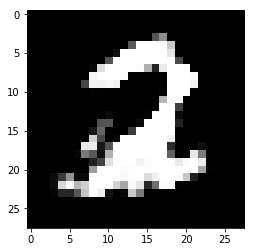

Loop: 756100, Generator_loss: -0.013737, Discriminator_loss: 0.0026565
Loop: 756200, Generator_loss: -0.0065098, Discriminator_loss: 0.0032976
Loop: 756300, Generator_loss: -0.0066108, Discriminator_loss: 0.0031485
Loop: 756400, Generator_loss: -0.0024877, Discriminator_loss: 0.0022902
Loop: 756500, Generator_loss: -0.0099751, Discriminator_loss: 0.0025619
Loop: 756600, Generator_loss: -0.0073319, Discriminator_loss: 0.0039265
Loop: 756700, Generator_loss: -0.0069488, Discriminator_loss: 0.0040002
Loop: 756800, Generator_loss: -0.0050964, Discriminator_loss: 0.0023441
Loop: 756900, Generator_loss: -0.0028758, Discriminator_loss: 0.0039707
Loop: 757000, Generator_loss: -0.0019108, Discriminator_loss: 0.0031158


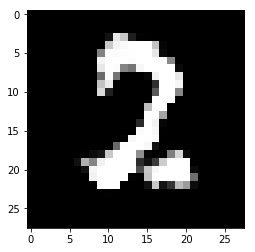

Loop: 757100, Generator_loss: -0.0047043, Discriminator_loss: 0.0020742
Loop: 757200, Generator_loss: -0.0054437, Discriminator_loss: 0.0032984
Loop: 757300, Generator_loss: -0.0067404, Discriminator_loss: 0.0015068
Loop: 757400, Generator_loss: -0.0075878, Discriminator_loss: 0.00092963
Loop: 757500, Generator_loss: -0.0032396, Discriminator_loss: 0.0038924
Loop: 757600, Generator_loss: -0.0060081, Discriminator_loss: 0.0040649
Loop: 757700, Generator_loss: -0.0081112, Discriminator_loss: 0.0022393
Loop: 757800, Generator_loss: -0.013413, Discriminator_loss: 0.0035629
Loop: 757900, Generator_loss: -0.0077091, Discriminator_loss: 0.0024222
Loop: 758000, Generator_loss: -0.0013268, Discriminator_loss: 0.0034066


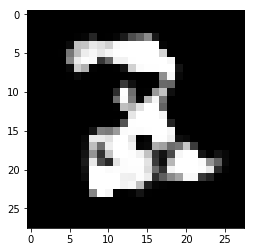

Loop: 758100, Generator_loss: -0.0094232, Discriminator_loss: 0.0030995
Loop: 758200, Generator_loss: -0.0067001, Discriminator_loss: 0.0023104
Loop: 758300, Generator_loss: -0.0039417, Discriminator_loss: 0.0024265
Loop: 758400, Generator_loss: -0.0099468, Discriminator_loss: 0.002098
Loop: 758500, Generator_loss: -0.0076262, Discriminator_loss: 0.0026339
Loop: 758600, Generator_loss: -0.0073024, Discriminator_loss: 0.0022084
Loop: 758700, Generator_loss: -0.0082908, Discriminator_loss: 0.0035084
Loop: 758800, Generator_loss: -0.0067765, Discriminator_loss: 0.0028133
Loop: 758900, Generator_loss: -0.0081781, Discriminator_loss: 0.002516
Loop: 759000, Generator_loss: -0.0087402, Discriminator_loss: 0.00088402


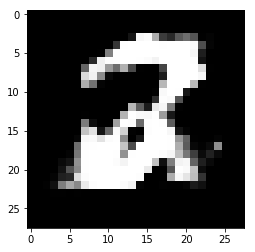

Loop: 759100, Generator_loss: -0.0034083, Discriminator_loss: 0.0022826
Loop: 759200, Generator_loss: -0.0039788, Discriminator_loss: 0.0051724
Loop: 759300, Generator_loss: -0.008144, Discriminator_loss: 0.0028624
Loop: 759400, Generator_loss: -0.0068872, Discriminator_loss: 0.0021598
Loop: 759500, Generator_loss: -0.0088317, Discriminator_loss: 0.0031232
Loop: 759600, Generator_loss: -0.0080486, Discriminator_loss: 0.0027592
Loop: 759700, Generator_loss: -0.006221, Discriminator_loss: 0.0038592
Loop: 759800, Generator_loss: -0.0076299, Discriminator_loss: 0.0030277
Loop: 759900, Generator_loss: -0.0070313, Discriminator_loss: 0.0028667
Loop: 760000, Generator_loss: -0.007329, Discriminator_loss: 0.0015826


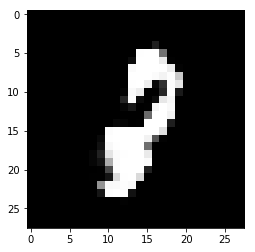

Loop: 760100, Generator_loss: -0.010693, Discriminator_loss: 0.0052361
Loop: 760200, Generator_loss: -0.0093836, Discriminator_loss: 0.002318
Loop: 760300, Generator_loss: -0.010719, Discriminator_loss: 0.0039513
Loop: 760400, Generator_loss: -0.0081012, Discriminator_loss: 0.0034587
Loop: 760500, Generator_loss: -0.0072032, Discriminator_loss: 0.0026484
Loop: 760600, Generator_loss: -0.0046523, Discriminator_loss: 0.0014124
Loop: 760700, Generator_loss: -0.0090753, Discriminator_loss: 0.0036517
Loop: 760800, Generator_loss: -0.0074281, Discriminator_loss: 0.0023188
Loop: 760900, Generator_loss: -0.0066048, Discriminator_loss: 0.0020522
Loop: 761000, Generator_loss: -0.008339, Discriminator_loss: 0.0038108


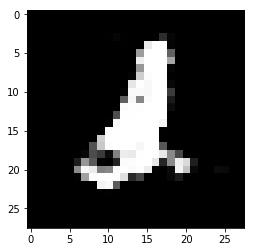

Loop: 761100, Generator_loss: -0.013115, Discriminator_loss: 0.0043297
Loop: 761200, Generator_loss: -0.0041718, Discriminator_loss: 0.0024978
Loop: 761300, Generator_loss: -0.0033248, Discriminator_loss: 0.0034056
Loop: 761400, Generator_loss: -0.0064309, Discriminator_loss: 0.0011516
Loop: 761500, Generator_loss: -0.011093, Discriminator_loss: 0.0033968
Loop: 761600, Generator_loss: -0.014898, Discriminator_loss: 0.0038352
Loop: 761700, Generator_loss: -0.0047471, Discriminator_loss: 0.0026547
Loop: 761800, Generator_loss: -0.011147, Discriminator_loss: 0.0014808
Loop: 761900, Generator_loss: -0.0077581, Discriminator_loss: 0.0021633
Loop: 762000, Generator_loss: -0.01089, Discriminator_loss: 0.002666


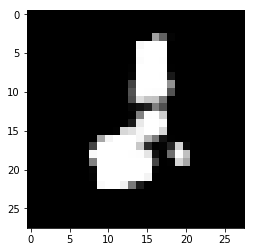

Loop: 762100, Generator_loss: -0.010446, Discriminator_loss: 0.0024842
Loop: 762200, Generator_loss: -0.0060242, Discriminator_loss: 0.0013692
Loop: 762300, Generator_loss: -0.013163, Discriminator_loss: 0.0029777
Loop: 762400, Generator_loss: -0.0090259, Discriminator_loss: 0.0015478
Loop: 762500, Generator_loss: -0.0094441, Discriminator_loss: 0.0020426
Loop: 762600, Generator_loss: -0.013091, Discriminator_loss: 0.0014566
Loop: 762700, Generator_loss: -0.0061819, Discriminator_loss: 0.002107
Loop: 762800, Generator_loss: -0.0091172, Discriminator_loss: 0.0028669
Loop: 762900, Generator_loss: -0.01567, Discriminator_loss: 0.0020621
Loop: 763000, Generator_loss: -0.0095465, Discriminator_loss: 0.0023521


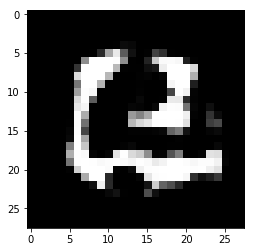

Loop: 763100, Generator_loss: -0.0071313, Discriminator_loss: 0.002873
Loop: 763200, Generator_loss: -0.01028, Discriminator_loss: 0.0019729
Loop: 763300, Generator_loss: -0.00719, Discriminator_loss: 0.0041239
Loop: 763400, Generator_loss: -0.01049, Discriminator_loss: 0.0022788
Loop: 763500, Generator_loss: -0.0033132, Discriminator_loss: 0.0048529
Loop: 763600, Generator_loss: -0.0086205, Discriminator_loss: 0.00076152
Loop: 763700, Generator_loss: -0.012507, Discriminator_loss: 0.0036154
Loop: 763800, Generator_loss: -0.0059442, Discriminator_loss: 0.0036416
Loop: 763900, Generator_loss: -0.007599, Discriminator_loss: 0.0014477
Loop: 764000, Generator_loss: -0.0091597, Discriminator_loss: 0.0023883


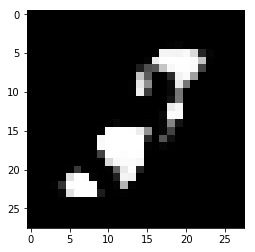

Loop: 764100, Generator_loss: -0.0045889, Discriminator_loss: 0.0001364
Loop: 764200, Generator_loss: -0.0071897, Discriminator_loss: 0.0039417
Loop: 764300, Generator_loss: -0.011283, Discriminator_loss: 0.0020172
Loop: 764400, Generator_loss: -0.0087403, Discriminator_loss: 0.0014037
Loop: 764500, Generator_loss: -0.0095735, Discriminator_loss: 0.0035474
Loop: 764600, Generator_loss: -0.0051014, Discriminator_loss: 0.0010618
Loop: 764700, Generator_loss: -0.0077487, Discriminator_loss: 0.0015103
Loop: 764800, Generator_loss: -0.0031324, Discriminator_loss: 0.0036754
Loop: 764900, Generator_loss: -0.0074331, Discriminator_loss: 0.0040864
Loop: 765000, Generator_loss: -0.0099528, Discriminator_loss: 0.00302


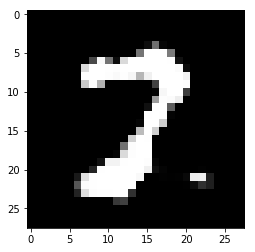

Loop: 765100, Generator_loss: -0.010078, Discriminator_loss: 0.0038233
Loop: 765200, Generator_loss: -0.008183, Discriminator_loss: 0.0023136
Loop: 765300, Generator_loss: -0.00049633, Discriminator_loss: 0.0033552
Loop: 765400, Generator_loss: -0.0078193, Discriminator_loss: 0.0028356
Loop: 765500, Generator_loss: -0.0039806, Discriminator_loss: 0.0025493
Loop: 765600, Generator_loss: -0.0099486, Discriminator_loss: 0.0048184
Loop: 765700, Generator_loss: -0.0058708, Discriminator_loss: 0.0041685
Loop: 765800, Generator_loss: -0.010622, Discriminator_loss: 0.0037721
Loop: 765900, Generator_loss: -0.0085952, Discriminator_loss: 0.0026872
Loop: 766000, Generator_loss: -0.0075231, Discriminator_loss: 0.001821


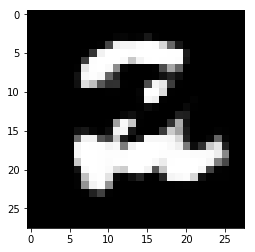

Loop: 766100, Generator_loss: -0.003343, Discriminator_loss: 0.0027131
Loop: 766200, Generator_loss: -0.0031235, Discriminator_loss: 0.0014923
Loop: 766300, Generator_loss: -0.0035426, Discriminator_loss: 0.0053171
Loop: 766400, Generator_loss: -0.0045293, Discriminator_loss: 0.003971
Loop: 766500, Generator_loss: -0.0030339, Discriminator_loss: 0.0039088
Loop: 766600, Generator_loss: -0.0061427, Discriminator_loss: 0.0022724
Loop: 766700, Generator_loss: -0.0083151, Discriminator_loss: 0.0028106
Loop: 766800, Generator_loss: -0.0054377, Discriminator_loss: 3.0854e-05
Loop: 766900, Generator_loss: -0.0048791, Discriminator_loss: 0.0030128
Loop: 767000, Generator_loss: -0.0099228, Discriminator_loss: 0.0024962


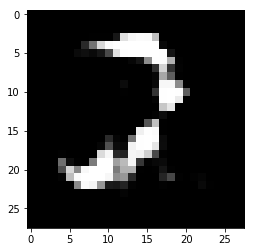

Loop: 767100, Generator_loss: -0.010259, Discriminator_loss: 0.0048859
Loop: 767200, Generator_loss: -0.0057635, Discriminator_loss: 0.0034609
Loop: 767300, Generator_loss: -0.0087191, Discriminator_loss: 0.0031125
Loop: 767400, Generator_loss: -0.0081868, Discriminator_loss: 0.004798
Loop: 767500, Generator_loss: -0.014461, Discriminator_loss: 0.0023186
Loop: 767600, Generator_loss: -0.0075011, Discriminator_loss: 0.00069983
Loop: 767700, Generator_loss: -0.0056603, Discriminator_loss: 0.0012677
Loop: 767800, Generator_loss: -0.0090498, Discriminator_loss: 0.0036461
Loop: 767900, Generator_loss: -0.0082807, Discriminator_loss: 0.0020963
Loop: 768000, Generator_loss: -0.0056913, Discriminator_loss: 0.0043556


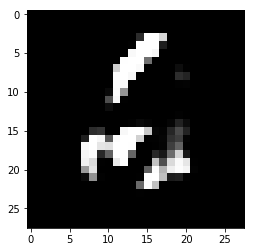

Loop: 768100, Generator_loss: -0.0046738, Discriminator_loss: 0.0031659
Loop: 768200, Generator_loss: -0.0080364, Discriminator_loss: 0.0012809
Loop: 768300, Generator_loss: -0.0088206, Discriminator_loss: -0.00013273
Loop: 768400, Generator_loss: -0.0091608, Discriminator_loss: 0.0047708
Loop: 768500, Generator_loss: -0.011884, Discriminator_loss: 0.0033474
Loop: 768600, Generator_loss: -0.008446, Discriminator_loss: 0.001928
Loop: 768700, Generator_loss: -0.010592, Discriminator_loss: 0.0033119
Loop: 768800, Generator_loss: -0.0090913, Discriminator_loss: 0.0045188
Loop: 768900, Generator_loss: -0.0069158, Discriminator_loss: 0.0031113
Loop: 769000, Generator_loss: -0.0079429, Discriminator_loss: 0.0032217


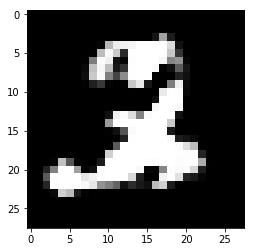

Loop: 769100, Generator_loss: -0.0077684, Discriminator_loss: 0.0035599
Loop: 769200, Generator_loss: -0.0084005, Discriminator_loss: 0.0032914
Loop: 769300, Generator_loss: -0.011704, Discriminator_loss: 0.0027064
Loop: 769400, Generator_loss: -0.0071648, Discriminator_loss: 0.002687
Loop: 769500, Generator_loss: -0.0089735, Discriminator_loss: 0.0046757
Loop: 769600, Generator_loss: -0.011774, Discriminator_loss: 0.0043297
Loop: 769700, Generator_loss: -0.0062265, Discriminator_loss: 0.0030201
Loop: 769800, Generator_loss: -0.0062061, Discriminator_loss: 0.00052648
Loop: 769900, Generator_loss: -0.0062752, Discriminator_loss: 0.0045204
Loop: 770000, Generator_loss: -0.0064705, Discriminator_loss: 0.002494


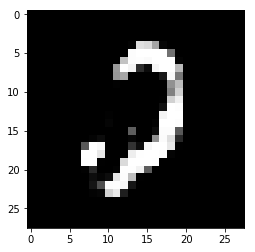

Loop: 770100, Generator_loss: -0.0042759, Discriminator_loss: 0.0041196
Loop: 770200, Generator_loss: -0.0043128, Discriminator_loss: 0.00019846
Loop: 770300, Generator_loss: -0.010596, Discriminator_loss: 0.0039191
Loop: 770400, Generator_loss: -0.011892, Discriminator_loss: 0.0016986
Loop: 770500, Generator_loss: -0.0087253, Discriminator_loss: 0.0026993
Loop: 770600, Generator_loss: -0.0083205, Discriminator_loss: 0.0022239
Loop: 770700, Generator_loss: -0.012224, Discriminator_loss: 0.0068004
Loop: 770800, Generator_loss: -0.01074, Discriminator_loss: 0.0026652
Loop: 770900, Generator_loss: -0.0070785, Discriminator_loss: 0.0016428
Loop: 771000, Generator_loss: -0.0082762, Discriminator_loss: 0.0044428


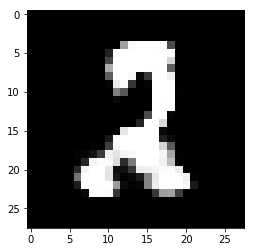

Loop: 771100, Generator_loss: -0.01448, Discriminator_loss: 0.0036576
Loop: 771200, Generator_loss: -0.010323, Discriminator_loss: 0.0046035
Loop: 771300, Generator_loss: -0.0068978, Discriminator_loss: 0.00051035
Loop: 771400, Generator_loss: -0.007619, Discriminator_loss: 0.0025826
Loop: 771500, Generator_loss: -0.010186, Discriminator_loss: 0.0029078
Loop: 771600, Generator_loss: -0.0081192, Discriminator_loss: 0.0022921
Loop: 771700, Generator_loss: -0.0064387, Discriminator_loss: 0.0021318
Loop: 771800, Generator_loss: -0.0094165, Discriminator_loss: 0.0025944
Loop: 771900, Generator_loss: -0.0030546, Discriminator_loss: 0.0029881
Loop: 772000, Generator_loss: -0.0051391, Discriminator_loss: 0.0019965


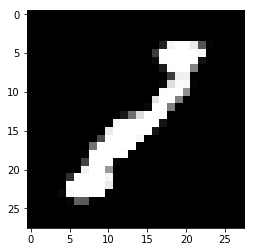

Loop: 772100, Generator_loss: -0.007759, Discriminator_loss: 0.0021312
Loop: 772200, Generator_loss: -0.011176, Discriminator_loss: 0.0016957
Loop: 772300, Generator_loss: -0.011473, Discriminator_loss: 0.0040281
Loop: 772400, Generator_loss: -0.0088305, Discriminator_loss: 0.0011834
Loop: 772500, Generator_loss: -0.0094414, Discriminator_loss: 0.0030578
Loop: 772600, Generator_loss: -0.0023838, Discriminator_loss: 0.0042309
Loop: 772700, Generator_loss: -0.0060775, Discriminator_loss: 0.0041882
Loop: 772800, Generator_loss: -0.0087059, Discriminator_loss: 0.0039699
Loop: 772900, Generator_loss: -0.0052183, Discriminator_loss: 0.0015688
Loop: 773000, Generator_loss: -0.0076791, Discriminator_loss: 0.0025152


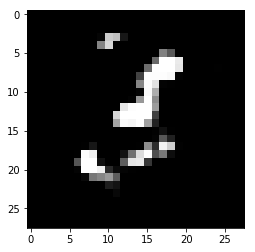

Loop: 773100, Generator_loss: -0.010159, Discriminator_loss: 0.0026219
Loop: 773200, Generator_loss: -0.0033294, Discriminator_loss: 0.0014727
Loop: 773300, Generator_loss: -0.0093203, Discriminator_loss: 0.0065559
Loop: 773400, Generator_loss: -0.005199, Discriminator_loss: 0.0019438
Loop: 773500, Generator_loss: -0.0037978, Discriminator_loss: 0.0024135
Loop: 773600, Generator_loss: -0.005831, Discriminator_loss: 0.0020947
Loop: 773700, Generator_loss: -0.0050587, Discriminator_loss: 0.003339
Loop: 773800, Generator_loss: -0.012325, Discriminator_loss: 0.0017993
Loop: 773900, Generator_loss: -0.0054999, Discriminator_loss: 0.0031189
Loop: 774000, Generator_loss: -0.0078241, Discriminator_loss: 0.0033966


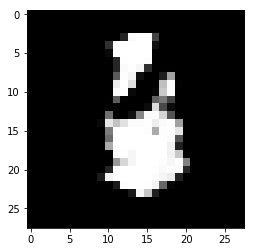

Loop: 774100, Generator_loss: -0.003372, Discriminator_loss: 0.0033999
Loop: 774200, Generator_loss: -0.010612, Discriminator_loss: 0.0009374
Loop: 774300, Generator_loss: -0.0035308, Discriminator_loss: 0.0032792
Loop: 774400, Generator_loss: -0.0064158, Discriminator_loss: 0.0038619
Loop: 774500, Generator_loss: -0.006765, Discriminator_loss: 0.0018227
Loop: 774600, Generator_loss: -0.0051474, Discriminator_loss: 0.0015284
Loop: 774700, Generator_loss: -0.0072353, Discriminator_loss: 0.0016645
Loop: 774800, Generator_loss: -0.0073171, Discriminator_loss: 0.0047033
Loop: 774900, Generator_loss: -0.0061884, Discriminator_loss: 0.0043625
Loop: 775000, Generator_loss: -0.0087701, Discriminator_loss: 0.0015266


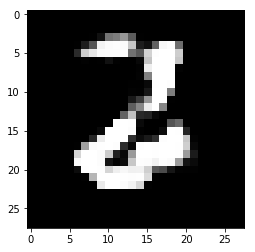

Loop: 775100, Generator_loss: -0.012323, Discriminator_loss: 0.0025743
Loop: 775200, Generator_loss: -0.0066627, Discriminator_loss: 0.0027557
Loop: 775300, Generator_loss: -0.016242, Discriminator_loss: 0.0029582
Loop: 775400, Generator_loss: -0.0022377, Discriminator_loss: 0.001718
Loop: 775500, Generator_loss: -0.0041372, Discriminator_loss: 0.0034284
Loop: 775600, Generator_loss: -0.010419, Discriminator_loss: 0.0031661
Loop: 775700, Generator_loss: -0.0053462, Discriminator_loss: 0.0037333
Loop: 775800, Generator_loss: -0.0061156, Discriminator_loss: 0.0034255
Loop: 775900, Generator_loss: -0.0027819, Discriminator_loss: 0.0024636
Loop: 776000, Generator_loss: -0.0074905, Discriminator_loss: 0.0040568


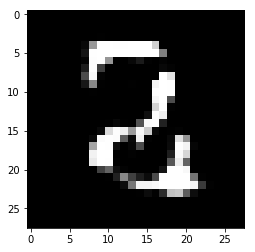

Loop: 776100, Generator_loss: -0.0076981, Discriminator_loss: 0.0043363
Loop: 776200, Generator_loss: -0.0077441, Discriminator_loss: 0.0039012
Loop: 776300, Generator_loss: -0.0072363, Discriminator_loss: 0.0024855
Loop: 776400, Generator_loss: -0.007676, Discriminator_loss: 0.0021035
Loop: 776500, Generator_loss: -0.015058, Discriminator_loss: 0.0047705
Loop: 776600, Generator_loss: -0.0057841, Discriminator_loss: 0.0032371
Loop: 776700, Generator_loss: -0.011647, Discriminator_loss: 0.0039815
Loop: 776800, Generator_loss: -0.0099777, Discriminator_loss: 0.0032411
Loop: 776900, Generator_loss: -0.009006, Discriminator_loss: 0.0036964
Loop: 777000, Generator_loss: -0.0048094, Discriminator_loss: 0.0044595


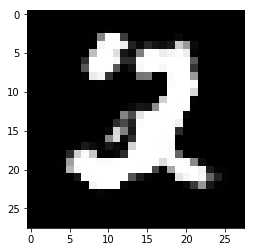

Loop: 777100, Generator_loss: -0.010165, Discriminator_loss: 0.002613
Loop: 777200, Generator_loss: -0.0090277, Discriminator_loss: 0.0036614
Loop: 777300, Generator_loss: -0.0074413, Discriminator_loss: 0.0052452
Loop: 777400, Generator_loss: -0.0097013, Discriminator_loss: 0.0045146
Loop: 777500, Generator_loss: -0.0067334, Discriminator_loss: 0.0019419
Loop: 777600, Generator_loss: -0.0061413, Discriminator_loss: 0.0025615
Loop: 777700, Generator_loss: -0.0072586, Discriminator_loss: 0.0021689
Loop: 777800, Generator_loss: -0.005177, Discriminator_loss: 0.0041431
Loop: 777900, Generator_loss: -0.0089494, Discriminator_loss: -0.00095971
Loop: 778000, Generator_loss: -0.010867, Discriminator_loss: 0.0032906


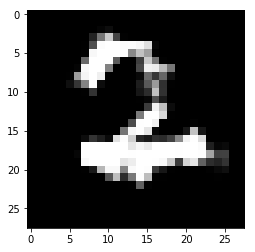

Loop: 778100, Generator_loss: -0.0075078, Discriminator_loss: 0.0016384
Loop: 778200, Generator_loss: -0.0099588, Discriminator_loss: 0.0039611
Loop: 778300, Generator_loss: -0.0031549, Discriminator_loss: 0.0025198
Loop: 778400, Generator_loss: -0.0075132, Discriminator_loss: 0.0037615
Loop: 778500, Generator_loss: -0.007913, Discriminator_loss: 0.0039224
Loop: 778600, Generator_loss: -0.0067897, Discriminator_loss: 0.0039695
Loop: 778700, Generator_loss: -0.0046395, Discriminator_loss: 0.00030048
Loop: 778800, Generator_loss: -0.0064299, Discriminator_loss: 0.0031105
Loop: 778900, Generator_loss: -0.0076484, Discriminator_loss: 0.0025154
Loop: 779000, Generator_loss: -0.010158, Discriminator_loss: 0.0039399


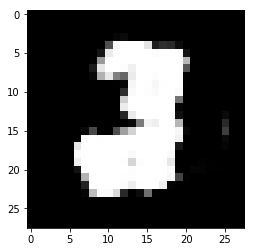

Loop: 779100, Generator_loss: -0.0084185, Discriminator_loss: 0.0025351
Loop: 779200, Generator_loss: -0.0099088, Discriminator_loss: 0.0038626
Loop: 779300, Generator_loss: -0.007772, Discriminator_loss: 0.0030006
Loop: 779400, Generator_loss: -0.0094937, Discriminator_loss: 0.003362
Loop: 779500, Generator_loss: -0.0065598, Discriminator_loss: 0.0038113
Loop: 779600, Generator_loss: -0.011146, Discriminator_loss: 0.0026891
Loop: 779700, Generator_loss: -0.0041496, Discriminator_loss: 0.0027514
Loop: 779800, Generator_loss: -0.0087448, Discriminator_loss: 0.0031256
Loop: 779900, Generator_loss: -0.0030171, Discriminator_loss: 0.0031173
Loop: 780000, Generator_loss: -0.0078765, Discriminator_loss: 0.0023177


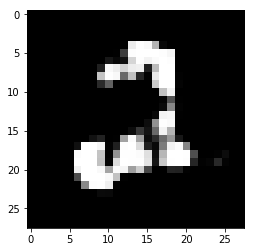

Loop: 780100, Generator_loss: -0.012496, Discriminator_loss: 0.0023547
Loop: 780200, Generator_loss: -0.007843, Discriminator_loss: 0.0020878
Loop: 780300, Generator_loss: -0.0087133, Discriminator_loss: 0.0036327
Loop: 780400, Generator_loss: -0.004706, Discriminator_loss: 0.0012245
Loop: 780500, Generator_loss: -0.0060195, Discriminator_loss: 0.0037592
Loop: 780600, Generator_loss: -0.0047364, Discriminator_loss: 0.0037428
Loop: 780700, Generator_loss: -0.003133, Discriminator_loss: 0.0025117
Loop: 780800, Generator_loss: -0.0084125, Discriminator_loss: 0.0036487
Loop: 780900, Generator_loss: -0.0055877, Discriminator_loss: 0.0053146
Loop: 781000, Generator_loss: -0.0053402, Discriminator_loss: 0.0023541


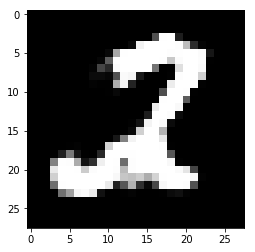

Loop: 781100, Generator_loss: -0.0041335, Discriminator_loss: 0.0020681
Loop: 781200, Generator_loss: -0.0069407, Discriminator_loss: 0.0036705
Loop: 781300, Generator_loss: -0.009136, Discriminator_loss: 0.0033023
Loop: 781400, Generator_loss: -0.0072673, Discriminator_loss: 0.0024074
Loop: 781500, Generator_loss: -0.0041952, Discriminator_loss: 0.0025696
Loop: 781600, Generator_loss: -0.0015436, Discriminator_loss: 0.001946
Loop: 781700, Generator_loss: -0.0097588, Discriminator_loss: 0.0050242
Loop: 781800, Generator_loss: -0.0085773, Discriminator_loss: 0.0038691
Loop: 781900, Generator_loss: -0.0090339, Discriminator_loss: 0.0013545
Loop: 782000, Generator_loss: -0.0086421, Discriminator_loss: 0.0026796


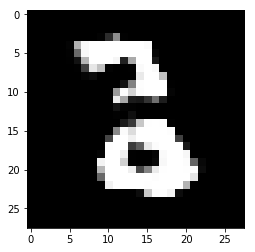

Loop: 782100, Generator_loss: -0.006627, Discriminator_loss: 0.0021869
Loop: 782200, Generator_loss: -0.004257, Discriminator_loss: 0.0030882
Loop: 782300, Generator_loss: -0.0052425, Discriminator_loss: 0.0037132
Loop: 782400, Generator_loss: -0.010522, Discriminator_loss: 0.0034872
Loop: 782500, Generator_loss: -0.010009, Discriminator_loss: 0.0014375
Loop: 782600, Generator_loss: -0.010206, Discriminator_loss: 0.0029615
Loop: 782700, Generator_loss: -0.0089643, Discriminator_loss: 0.0020216
Loop: 782800, Generator_loss: -0.0093739, Discriminator_loss: 0.0036309
Loop: 782900, Generator_loss: -0.0066599, Discriminator_loss: 0.0018098
Loop: 783000, Generator_loss: -0.0091803, Discriminator_loss: -0.00030759


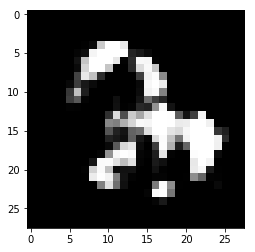

Loop: 783100, Generator_loss: -0.0043426, Discriminator_loss: 0.002776
Loop: 783200, Generator_loss: -0.0024352, Discriminator_loss: 0.0032752
Loop: 783300, Generator_loss: -0.0090259, Discriminator_loss: 0.0021506
Loop: 783400, Generator_loss: -0.012528, Discriminator_loss: 0.0026979
Loop: 783500, Generator_loss: -0.0068585, Discriminator_loss: 0.0037978
Loop: 783600, Generator_loss: -0.010643, Discriminator_loss: 0.001531
Loop: 783700, Generator_loss: -0.012593, Discriminator_loss: 0.0012851
Loop: 783800, Generator_loss: -0.010957, Discriminator_loss: 0.0022368
Loop: 783900, Generator_loss: -0.0056678, Discriminator_loss: 0.0023469
Loop: 784000, Generator_loss: -0.0066137, Discriminator_loss: 0.0053192


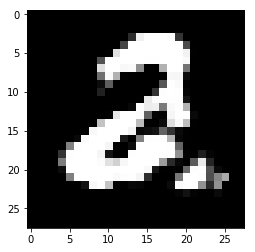

Loop: 784100, Generator_loss: -0.0056806, Discriminator_loss: 0.0032165
Loop: 784200, Generator_loss: -0.0042373, Discriminator_loss: 0.0021697
Loop: 784300, Generator_loss: -0.0094964, Discriminator_loss: 0.0039433
Loop: 784400, Generator_loss: -0.008853, Discriminator_loss: 0.005494
Loop: 784500, Generator_loss: -0.0027583, Discriminator_loss: 0.0043908
Loop: 784600, Generator_loss: -0.0067281, Discriminator_loss: 0.0013678
Loop: 784700, Generator_loss: -0.0061711, Discriminator_loss: 0.0027247
Loop: 784800, Generator_loss: -0.0045309, Discriminator_loss: 0.0039322
Loop: 784900, Generator_loss: -0.011159, Discriminator_loss: 0.0027064
Loop: 785000, Generator_loss: -0.0081104, Discriminator_loss: 0.0024595


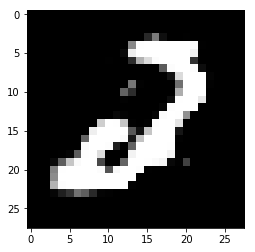

Loop: 785100, Generator_loss: -0.010314, Discriminator_loss: 0.0006579
Loop: 785200, Generator_loss: -0.0069986, Discriminator_loss: 0.00047909
Loop: 785300, Generator_loss: -0.0026206, Discriminator_loss: 0.00049467
Loop: 785400, Generator_loss: -0.0019016, Discriminator_loss: 0.0044958
Loop: 785500, Generator_loss: -0.0051434, Discriminator_loss: 0.0011994
Loop: 785600, Generator_loss: -0.0030018, Discriminator_loss: 0.0016189
Loop: 785700, Generator_loss: -0.0080522, Discriminator_loss: 0.0015277
Loop: 785800, Generator_loss: -0.0050682, Discriminator_loss: 0.002563
Loop: 785900, Generator_loss: -0.0075855, Discriminator_loss: 0.0030978
Loop: 786000, Generator_loss: -0.0087207, Discriminator_loss: 0.0034678


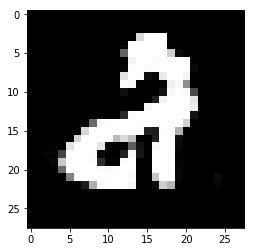

Loop: 786100, Generator_loss: -0.0052717, Discriminator_loss: 0.003647
Loop: 786200, Generator_loss: -0.0071661, Discriminator_loss: 0.0038507
Loop: 786300, Generator_loss: -0.0037738, Discriminator_loss: 0.0026028
Loop: 786400, Generator_loss: -0.0050716, Discriminator_loss: 0.0029161
Loop: 786500, Generator_loss: -0.0136, Discriminator_loss: 0.0025215
Loop: 786600, Generator_loss: -0.0075189, Discriminator_loss: 0.002445
Loop: 786700, Generator_loss: -0.0086734, Discriminator_loss: 0.0012961
Loop: 786800, Generator_loss: -0.0048507, Discriminator_loss: 0.0039803
Loop: 786900, Generator_loss: -0.0050447, Discriminator_loss: 0.00266
Loop: 787000, Generator_loss: -0.014141, Discriminator_loss: 0.0041356


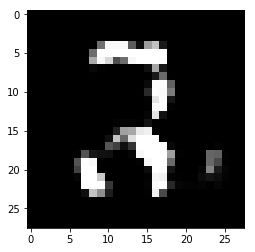

Loop: 787100, Generator_loss: -0.0072314, Discriminator_loss: 0.0026742
Loop: 787200, Generator_loss: -0.0015003, Discriminator_loss: 0.0029382
Loop: 787300, Generator_loss: -0.0050906, Discriminator_loss: 0.0033531
Loop: 787400, Generator_loss: -0.006277, Discriminator_loss: 0.0012438
Loop: 787500, Generator_loss: -0.0033253, Discriminator_loss: 0.0006455
Loop: 787600, Generator_loss: -0.0068442, Discriminator_loss: 0.005116
Loop: 787700, Generator_loss: -0.0082841, Discriminator_loss: 0.0022505
Loop: 787800, Generator_loss: -0.0070431, Discriminator_loss: 0.0025297
Loop: 787900, Generator_loss: -0.0077365, Discriminator_loss: 0.0044013
Loop: 788000, Generator_loss: -0.0070548, Discriminator_loss: 0.0036861


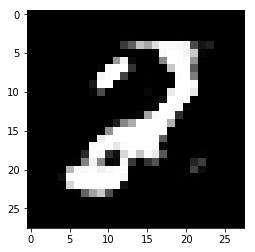

Loop: 788100, Generator_loss: -0.0078727, Discriminator_loss: 0.0029164
Loop: 788200, Generator_loss: -0.0079467, Discriminator_loss: 0.0036334
Loop: 788300, Generator_loss: -0.0099795, Discriminator_loss: 0.0011128
Loop: 788400, Generator_loss: -0.0099625, Discriminator_loss: 0.0042438
Loop: 788500, Generator_loss: -0.0078462, Discriminator_loss: 0.0042521
Loop: 788600, Generator_loss: -0.011976, Discriminator_loss: 0.0044979
Loop: 788700, Generator_loss: -0.0085529, Discriminator_loss: 0.0039034
Loop: 788800, Generator_loss: -0.0068031, Discriminator_loss: 0.00064388
Loop: 788900, Generator_loss: -0.0071758, Discriminator_loss: 0.0035282
Loop: 789000, Generator_loss: -0.010419, Discriminator_loss: 0.0033639


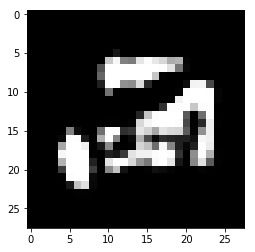

Loop: 789100, Generator_loss: -0.0038855, Discriminator_loss: 0.0023144
Loop: 789200, Generator_loss: -0.0096911, Discriminator_loss: 0.0035061
Loop: 789300, Generator_loss: -0.0040796, Discriminator_loss: 0.0022865
Loop: 789400, Generator_loss: -0.0067765, Discriminator_loss: 0.0033065
Loop: 789500, Generator_loss: -0.011688, Discriminator_loss: 0.0032275
Loop: 789600, Generator_loss: -0.0069955, Discriminator_loss: 0.0019579
Loop: 789700, Generator_loss: -0.011365, Discriminator_loss: 0.0027925
Loop: 789800, Generator_loss: -0.010765, Discriminator_loss: 0.0038762
Loop: 789900, Generator_loss: -0.0085964, Discriminator_loss: 0.0016576
Loop: 790000, Generator_loss: -0.0058356, Discriminator_loss: 0.0046392


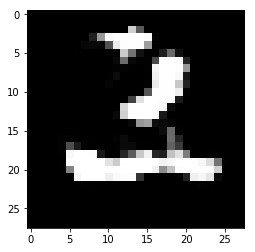

Loop: 790100, Generator_loss: -0.0084362, Discriminator_loss: 0.0032901
Loop: 790200, Generator_loss: -0.0080299, Discriminator_loss: 0.0031388
Loop: 790300, Generator_loss: -0.0081659, Discriminator_loss: 0.0011799
Loop: 790400, Generator_loss: -0.010894, Discriminator_loss: 0.0035073
Loop: 790500, Generator_loss: -0.0091114, Discriminator_loss: 0.0017066
Loop: 790600, Generator_loss: -0.0047446, Discriminator_loss: 0.0034877
Loop: 790700, Generator_loss: -0.0075148, Discriminator_loss: 0.0024616
Loop: 790800, Generator_loss: -0.007033, Discriminator_loss: 0.0020869
Loop: 790900, Generator_loss: -0.0090534, Discriminator_loss: 0.0023501
Loop: 791000, Generator_loss: -0.0045819, Discriminator_loss: 0.0034607


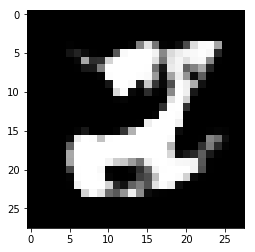

Loop: 791100, Generator_loss: -0.011842, Discriminator_loss: 0.0017392
Loop: 791200, Generator_loss: -0.010296, Discriminator_loss: 0.0025424
Loop: 791300, Generator_loss: -0.0090496, Discriminator_loss: 0.0034066
Loop: 791400, Generator_loss: -0.011185, Discriminator_loss: 0.0029595
Loop: 791500, Generator_loss: -0.0085402, Discriminator_loss: 0.0032198
Loop: 791600, Generator_loss: -0.0060832, Discriminator_loss: 0.0031009
Loop: 791700, Generator_loss: -0.010432, Discriminator_loss: 0.0043955
Loop: 791800, Generator_loss: -0.0077076, Discriminator_loss: 0.0036492
Loop: 791900, Generator_loss: -0.006807, Discriminator_loss: 0.0025377
Loop: 792000, Generator_loss: -0.004123, Discriminator_loss: 0.0035964


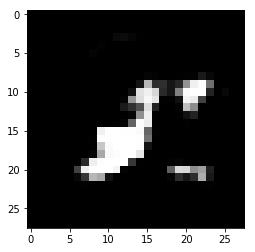

Loop: 792100, Generator_loss: -0.0039936, Discriminator_loss: 0.0024322
Loop: 792200, Generator_loss: -0.010665, Discriminator_loss: 0.0023478
Loop: 792300, Generator_loss: -0.0049292, Discriminator_loss: 0.0039072
Loop: 792400, Generator_loss: 0.00061043, Discriminator_loss: 0.0009101
Loop: 792500, Generator_loss: -0.0074591, Discriminator_loss: 0.0055496
Loop: 792600, Generator_loss: -0.0053008, Discriminator_loss: 0.0028047
Loop: 792700, Generator_loss: -0.0071452, Discriminator_loss: 0.0036034
Loop: 792800, Generator_loss: -0.0022699, Discriminator_loss: 0.0043642
Loop: 792900, Generator_loss: -0.0058457, Discriminator_loss: 0.0022258
Loop: 793000, Generator_loss: -0.0074883, Discriminator_loss: 0.0028241


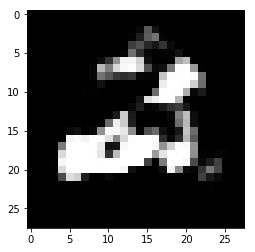

Loop: 793100, Generator_loss: -0.0047936, Discriminator_loss: 0.0014141
Loop: 793200, Generator_loss: -0.005768, Discriminator_loss: 0.0032575
Loop: 793300, Generator_loss: -0.010338, Discriminator_loss: 0.0023537
Loop: 793400, Generator_loss: -0.0061735, Discriminator_loss: 0.0020434
Loop: 793500, Generator_loss: -0.0077597, Discriminator_loss: -0.00024931
Loop: 793600, Generator_loss: -0.0048257, Discriminator_loss: 0.0023991
Loop: 793700, Generator_loss: -0.0079932, Discriminator_loss: 0.0037389
Loop: 793800, Generator_loss: -0.0058337, Discriminator_loss: 0.00201
Loop: 793900, Generator_loss: -0.0072055, Discriminator_loss: 0.0016116
Loop: 794000, Generator_loss: -0.0074176, Discriminator_loss: 0.00098949


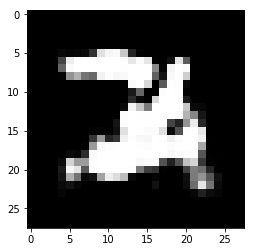

Loop: 794100, Generator_loss: -0.0024463, Discriminator_loss: 0.0023294
Loop: 794200, Generator_loss: -0.010966, Discriminator_loss: 0.0019439
Loop: 794300, Generator_loss: -0.014712, Discriminator_loss: 0.0023989
Loop: 794400, Generator_loss: -0.008441, Discriminator_loss: 0.004395
Loop: 794500, Generator_loss: -0.0042288, Discriminator_loss: 0.003943
Loop: 794600, Generator_loss: -0.010139, Discriminator_loss: 0.0018356
Loop: 794700, Generator_loss: -0.010291, Discriminator_loss: 0.0044244
Loop: 794800, Generator_loss: -0.0083343, Discriminator_loss: 0.0013488
Loop: 794900, Generator_loss: -0.007438, Discriminator_loss: 0.004439
Loop: 795000, Generator_loss: -0.0038754, Discriminator_loss: 0.0026257


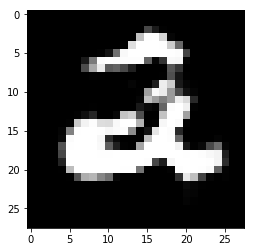

Loop: 795100, Generator_loss: -0.0091684, Discriminator_loss: 0.0047211
Loop: 795200, Generator_loss: -0.002389, Discriminator_loss: 0.0038687
Loop: 795300, Generator_loss: -0.0095267, Discriminator_loss: 0.0024726
Loop: 795400, Generator_loss: -0.0042161, Discriminator_loss: 0.0018579
Loop: 795500, Generator_loss: -0.010521, Discriminator_loss: 0.0031426
Loop: 795600, Generator_loss: -0.0089953, Discriminator_loss: 0.0015731
Loop: 795700, Generator_loss: -0.0092901, Discriminator_loss: 0.0026542
Loop: 795800, Generator_loss: -0.0049534, Discriminator_loss: 0.0040977
Loop: 795900, Generator_loss: -0.0049597, Discriminator_loss: 0.0013666
Loop: 796000, Generator_loss: -0.0015628, Discriminator_loss: 0.0055948


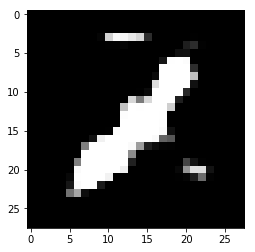

Loop: 796100, Generator_loss: -0.0070405, Discriminator_loss: 0.001805
Loop: 796200, Generator_loss: -0.0079163, Discriminator_loss: 0.00025383
Loop: 796300, Generator_loss: -0.010181, Discriminator_loss: 0.0023336
Loop: 796400, Generator_loss: -0.0059152, Discriminator_loss: 0.0042151
Loop: 796500, Generator_loss: -0.0075026, Discriminator_loss: 0.0024974
Loop: 796600, Generator_loss: -0.0099554, Discriminator_loss: 0.0016975
Loop: 796700, Generator_loss: -0.0047508, Discriminator_loss: 0.0031767
Loop: 796800, Generator_loss: -0.010312, Discriminator_loss: 0.0015713
Loop: 796900, Generator_loss: -0.0072458, Discriminator_loss: 0.0040692
Loop: 797000, Generator_loss: -0.005779, Discriminator_loss: 0.0018262


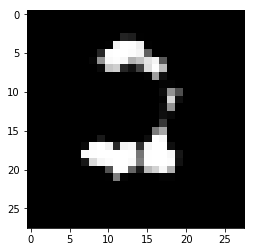

Loop: 797100, Generator_loss: -0.0054188, Discriminator_loss: 0.0027337
Loop: 797200, Generator_loss: -0.0075, Discriminator_loss: 0.0024398
Loop: 797300, Generator_loss: -0.0030017, Discriminator_loss: 0.0039765
Loop: 797400, Generator_loss: -0.0072672, Discriminator_loss: 0.0032973
Loop: 797500, Generator_loss: -0.0053232, Discriminator_loss: 0.0015993
Loop: 797600, Generator_loss: -0.0040317, Discriminator_loss: 0.0003923
Loop: 797700, Generator_loss: -0.0056859, Discriminator_loss: 0.0025392
Loop: 797800, Generator_loss: -0.005169, Discriminator_loss: 0.001344
Loop: 797900, Generator_loss: -0.0064947, Discriminator_loss: 4.5253e-05
Loop: 798000, Generator_loss: -0.0056305, Discriminator_loss: 0.0049916


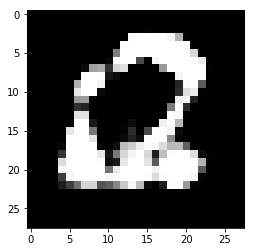

Loop: 798100, Generator_loss: -0.010166, Discriminator_loss: 0.0024083
Loop: 798200, Generator_loss: -0.0024597, Discriminator_loss: 0.0035807
Loop: 798300, Generator_loss: -0.00879, Discriminator_loss: 0.0017913
Loop: 798400, Generator_loss: -0.0052899, Discriminator_loss: 0.0022365
Loop: 798500, Generator_loss: -0.012471, Discriminator_loss: 0.0046886
Loop: 798600, Generator_loss: -0.0059242, Discriminator_loss: 0.00094121
Loop: 798700, Generator_loss: -0.0073844, Discriminator_loss: 0.00052792
Loop: 798800, Generator_loss: -0.011291, Discriminator_loss: 0.0021294
Loop: 798900, Generator_loss: -0.0035362, Discriminator_loss: 0.0015682
Loop: 799000, Generator_loss: -0.008972, Discriminator_loss: 0.0034094


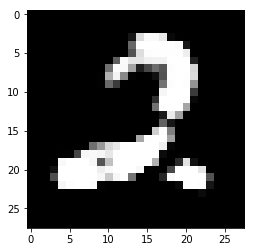

Loop: 799100, Generator_loss: -0.0055057, Discriminator_loss: 0.0022808
Loop: 799200, Generator_loss: -0.0092509, Discriminator_loss: 0.0031497
Loop: 799300, Generator_loss: -0.0034644, Discriminator_loss: 0.0032876
Loop: 799400, Generator_loss: -0.0093438, Discriminator_loss: 0.0046011
Loop: 799500, Generator_loss: -0.0092087, Discriminator_loss: 0.0020474
Loop: 799600, Generator_loss: -0.0031495, Discriminator_loss: 0.0028373
Loop: 799700, Generator_loss: -0.0064886, Discriminator_loss: 0.0029852
Loop: 799800, Generator_loss: -0.0076082, Discriminator_loss: 0.0045179
Loop: 799900, Generator_loss: -0.0042844, Discriminator_loss: 0.0028296
Loop: 800000, Generator_loss: -0.0057488, Discriminator_loss: 0.0019992


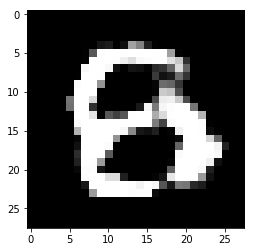

Loop: 800100, Generator_loss: -0.0072972, Discriminator_loss: 0.0017647
Loop: 800200, Generator_loss: -0.0072975, Discriminator_loss: 0.0029535
Loop: 800300, Generator_loss: -0.0060477, Discriminator_loss: 0.002605
Loop: 800400, Generator_loss: -0.0074021, Discriminator_loss: 0.002504
Loop: 800500, Generator_loss: -0.0058979, Discriminator_loss: 0.0043253
Loop: 800600, Generator_loss: -0.0096847, Discriminator_loss: 0.0045816
Loop: 800700, Generator_loss: -0.012078, Discriminator_loss: 0.0015465
Loop: 800800, Generator_loss: -0.002059, Discriminator_loss: 0.0035407
Loop: 800900, Generator_loss: -0.008859, Discriminator_loss: 0.0031159
Loop: 801000, Generator_loss: -0.0074614, Discriminator_loss: 0.0020017


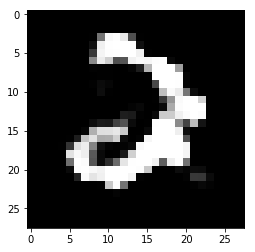

Loop: 801100, Generator_loss: -0.011819, Discriminator_loss: 0.0037496
Loop: 801200, Generator_loss: -0.011365, Discriminator_loss: 0.0040943
Loop: 801300, Generator_loss: -0.0056876, Discriminator_loss: 0.0020006
Loop: 801400, Generator_loss: -0.008063, Discriminator_loss: 0.0020932
Loop: 801500, Generator_loss: -0.003945, Discriminator_loss: 0.0038222
Loop: 801600, Generator_loss: -0.0059596, Discriminator_loss: 0.0013808
Loop: 801700, Generator_loss: -0.010351, Discriminator_loss: 0.0020453
Loop: 801800, Generator_loss: -0.011044, Discriminator_loss: 0.002687
Loop: 801900, Generator_loss: -0.0064595, Discriminator_loss: 0.0026566
Loop: 802000, Generator_loss: -0.0062141, Discriminator_loss: 0.0013982


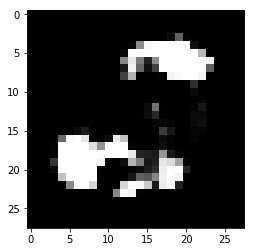

Loop: 802100, Generator_loss: -0.0045528, Discriminator_loss: 0.00068395
Loop: 802200, Generator_loss: -0.0099568, Discriminator_loss: 0.0015369
Loop: 802300, Generator_loss: -0.0078355, Discriminator_loss: 0.0022126
Loop: 802400, Generator_loss: -0.007917, Discriminator_loss: 0.0031887
Loop: 802500, Generator_loss: -0.0033922, Discriminator_loss: 0.0001657
Loop: 802600, Generator_loss: -0.0094196, Discriminator_loss: 0.0027852
Loop: 802700, Generator_loss: -0.0073527, Discriminator_loss: 0.0020506
Loop: 802800, Generator_loss: -0.010415, Discriminator_loss: 0.003547
Loop: 802900, Generator_loss: -0.0085768, Discriminator_loss: 0.0019038
Loop: 803000, Generator_loss: -0.0048895, Discriminator_loss: 0.0028093


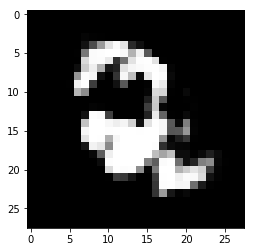

Loop: 803100, Generator_loss: -0.006326, Discriminator_loss: 0.0025723
Loop: 803200, Generator_loss: -0.0084631, Discriminator_loss: 0.0022269
Loop: 803300, Generator_loss: -0.0093854, Discriminator_loss: 0.0044722
Loop: 803400, Generator_loss: -0.0067772, Discriminator_loss: 0.0034243
Loop: 803500, Generator_loss: -0.0073476, Discriminator_loss: 0.0045272
Loop: 803600, Generator_loss: -0.0098574, Discriminator_loss: 0.0035698
Loop: 803700, Generator_loss: -0.010953, Discriminator_loss: 0.0029933
Loop: 803800, Generator_loss: -0.0048062, Discriminator_loss: 0.0039391
Loop: 803900, Generator_loss: -0.010953, Discriminator_loss: 0.0020762
Loop: 804000, Generator_loss: -0.011697, Discriminator_loss: 0.0016897


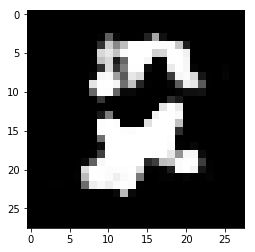

Loop: 804100, Generator_loss: -0.0075524, Discriminator_loss: 0.0022861
Loop: 804200, Generator_loss: -0.0068881, Discriminator_loss: 0.0018464
Loop: 804300, Generator_loss: -0.0060471, Discriminator_loss: 0.0022602
Loop: 804400, Generator_loss: -0.0050245, Discriminator_loss: 0.0036765
Loop: 804500, Generator_loss: -0.0079247, Discriminator_loss: 0.0024144
Loop: 804600, Generator_loss: -0.00769, Discriminator_loss: 0.0032134
Loop: 804700, Generator_loss: -0.0077188, Discriminator_loss: 0.0024599
Loop: 804800, Generator_loss: -0.0091694, Discriminator_loss: 0.0017668
Loop: 804900, Generator_loss: -0.0043892, Discriminator_loss: 0.002286
Loop: 805000, Generator_loss: -0.0078128, Discriminator_loss: 0.0021625


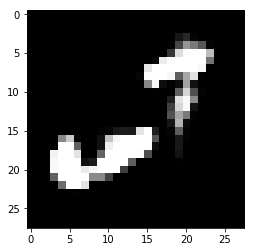

Loop: 805100, Generator_loss: -0.0039485, Discriminator_loss: 0.0023957
Loop: 805200, Generator_loss: -0.005731, Discriminator_loss: 0.0023617
Loop: 805300, Generator_loss: -0.0094429, Discriminator_loss: 0.0020298
Loop: 805400, Generator_loss: -0.011508, Discriminator_loss: 0.0019248
Loop: 805500, Generator_loss: -0.011544, Discriminator_loss: 0.0014953
Loop: 805600, Generator_loss: -0.0024734, Discriminator_loss: 0.003622
Loop: 805700, Generator_loss: -0.0079762, Discriminator_loss: 0.0011856
Loop: 805800, Generator_loss: -0.0065343, Discriminator_loss: 0.0053968
Loop: 805900, Generator_loss: -0.0032363, Discriminator_loss: 0.0026906
Loop: 806000, Generator_loss: -0.005976, Discriminator_loss: 0.0029507


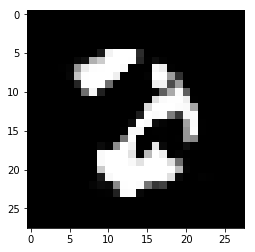

Loop: 806100, Generator_loss: -0.0040948, Discriminator_loss: 0.0026616
Loop: 806200, Generator_loss: -0.0057013, Discriminator_loss: 0.0014191
Loop: 806300, Generator_loss: -0.011442, Discriminator_loss: 0.0024718
Loop: 806400, Generator_loss: -0.0034537, Discriminator_loss: 0.0020791
Loop: 806500, Generator_loss: -0.0067051, Discriminator_loss: 0.0024677
Loop: 806600, Generator_loss: -0.0038961, Discriminator_loss: 0.0034231
Loop: 806700, Generator_loss: -0.004415, Discriminator_loss: 0.002517
Loop: 806800, Generator_loss: -0.0081, Discriminator_loss: 0.0014423
Loop: 806900, Generator_loss: -0.0043769, Discriminator_loss: 0.0028415
Loop: 807000, Generator_loss: -0.0087145, Discriminator_loss: 0.0036333


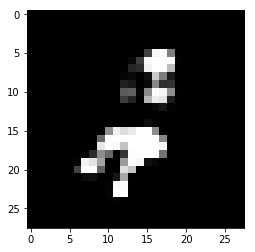

Loop: 807100, Generator_loss: -0.0079058, Discriminator_loss: 0.0025959
Loop: 807200, Generator_loss: -0.0087249, Discriminator_loss: 0.0031198
Loop: 807300, Generator_loss: -0.0031681, Discriminator_loss: 0.0017525
Loop: 807400, Generator_loss: -0.0063572, Discriminator_loss: 0.0012811
Loop: 807500, Generator_loss: -0.0029504, Discriminator_loss: 0.0017318
Loop: 807600, Generator_loss: -0.0054605, Discriminator_loss: 0.0037259
Loop: 807700, Generator_loss: -0.0051129, Discriminator_loss: 0.0022291
Loop: 807800, Generator_loss: -0.0076143, Discriminator_loss: 0.0028833
Loop: 807900, Generator_loss: -0.011005, Discriminator_loss: 0.0037795
Loop: 808000, Generator_loss: -0.0063719, Discriminator_loss: 0.0040258


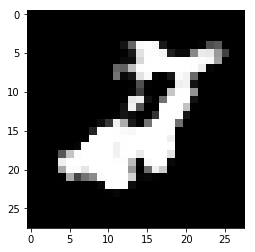

Loop: 808100, Generator_loss: -0.0055457, Discriminator_loss: 0.0020312
Loop: 808200, Generator_loss: -0.0039714, Discriminator_loss: 0.0015185
Loop: 808300, Generator_loss: -0.0099223, Discriminator_loss: 0.0033327
Loop: 808400, Generator_loss: -0.0091228, Discriminator_loss: 0.0019421
Loop: 808500, Generator_loss: -0.0076674, Discriminator_loss: 0.0029887
Loop: 808600, Generator_loss: -0.0083139, Discriminator_loss: 0.0028497
Loop: 808700, Generator_loss: -0.0044193, Discriminator_loss: 0.0010664
Loop: 808800, Generator_loss: -0.0039508, Discriminator_loss: 0.00020876
Loop: 808900, Generator_loss: -0.0040697, Discriminator_loss: 0.0025971
Loop: 809000, Generator_loss: -0.0046807, Discriminator_loss: 0.0025566


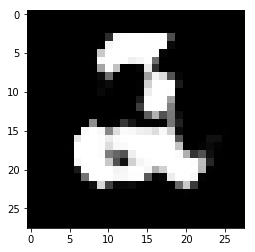

Loop: 809100, Generator_loss: -0.01281, Discriminator_loss: 0.0028965
Loop: 809200, Generator_loss: -0.0027337, Discriminator_loss: 0.0025594
Loop: 809300, Generator_loss: -0.004596, Discriminator_loss: 0.0028399
Loop: 809400, Generator_loss: -0.0098995, Discriminator_loss: 0.0018464
Loop: 809500, Generator_loss: -0.0035283, Discriminator_loss: 0.0010267
Loop: 809600, Generator_loss: -0.0067357, Discriminator_loss: 0.0014772
Loop: 809700, Generator_loss: -0.0063017, Discriminator_loss: 0.0027809
Loop: 809800, Generator_loss: -0.0061397, Discriminator_loss: 0.0031383
Loop: 809900, Generator_loss: -0.0074136, Discriminator_loss: 0.0016143
Loop: 810000, Generator_loss: -0.0076543, Discriminator_loss: 0.004532


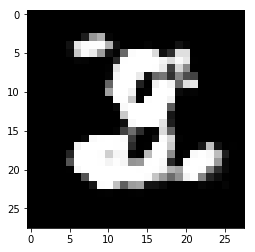

Loop: 810100, Generator_loss: -0.0099229, Discriminator_loss: 0.0022874
Loop: 810200, Generator_loss: -0.0091135, Discriminator_loss: 0.0032418
Loop: 810300, Generator_loss: -0.0052207, Discriminator_loss: 0.0021644
Loop: 810400, Generator_loss: -0.0082919, Discriminator_loss: 0.0018164
Loop: 810500, Generator_loss: -0.0078824, Discriminator_loss: 0.0043645
Loop: 810600, Generator_loss: -0.0061863, Discriminator_loss: 0.0030901
Loop: 810700, Generator_loss: -0.0079007, Discriminator_loss: 0.0020669
Loop: 810800, Generator_loss: -0.0048811, Discriminator_loss: 0.00221
Loop: 810900, Generator_loss: -0.0053402, Discriminator_loss: 0.0025191
Loop: 811000, Generator_loss: -0.0039033, Discriminator_loss: 0.0021663


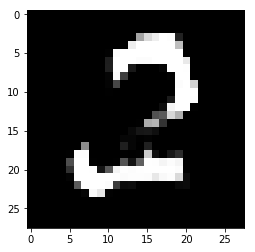

Loop: 811100, Generator_loss: -0.0095197, Discriminator_loss: 0.0010542
Loop: 811200, Generator_loss: -0.0084113, Discriminator_loss: 0.0041521
Loop: 811300, Generator_loss: -0.0088565, Discriminator_loss: 0.0030833
Loop: 811400, Generator_loss: -0.0058981, Discriminator_loss: 0.0023145
Loop: 811500, Generator_loss: -0.0095996, Discriminator_loss: 0.0022638
Loop: 811600, Generator_loss: -0.0046172, Discriminator_loss: 0.00096962
Loop: 811700, Generator_loss: -0.0088235, Discriminator_loss: 0.0044657
Loop: 811800, Generator_loss: -0.0033954, Discriminator_loss: 0.0032739
Loop: 811900, Generator_loss: -0.0037802, Discriminator_loss: 0.0027651
Loop: 812000, Generator_loss: -0.0076569, Discriminator_loss: 0.0044912


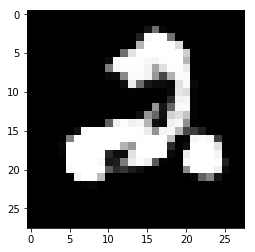

Loop: 812100, Generator_loss: -0.010094, Discriminator_loss: 0.0030304
Loop: 812200, Generator_loss: -0.0043801, Discriminator_loss: 0.0034725
Loop: 812300, Generator_loss: -0.0093057, Discriminator_loss: 0.0024837
Loop: 812400, Generator_loss: -0.0060077, Discriminator_loss: 0.0024178
Loop: 812500, Generator_loss: -0.0078602, Discriminator_loss: 0.00074512
Loop: 812600, Generator_loss: -0.0077674, Discriminator_loss: 0.0042974
Loop: 812700, Generator_loss: -0.00742, Discriminator_loss: 0.0027336
Loop: 812800, Generator_loss: -0.0049232, Discriminator_loss: 0.0027242
Loop: 812900, Generator_loss: -0.0083899, Discriminator_loss: 0.0022007
Loop: 813000, Generator_loss: -0.0073093, Discriminator_loss: 0.0045625


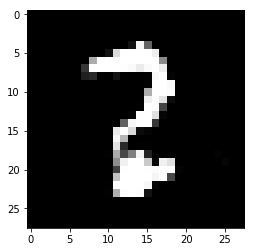

Loop: 813100, Generator_loss: -0.0053707, Discriminator_loss: 0.0036134
Loop: 813200, Generator_loss: -0.0075375, Discriminator_loss: 0.00062763
Loop: 813300, Generator_loss: -0.0052582, Discriminator_loss: 0.0020568
Loop: 813400, Generator_loss: -0.0058738, Discriminator_loss: 0.0026501
Loop: 813500, Generator_loss: -0.0037006, Discriminator_loss: 0.003819
Loop: 813600, Generator_loss: -0.0037459, Discriminator_loss: 0.0035352
Loop: 813700, Generator_loss: -0.0031403, Discriminator_loss: 0.0044429
Loop: 813800, Generator_loss: -0.0071076, Discriminator_loss: 0.0029226
Loop: 813900, Generator_loss: -0.0058036, Discriminator_loss: -0.0004455
Loop: 814000, Generator_loss: -0.0088264, Discriminator_loss: 0.0019125


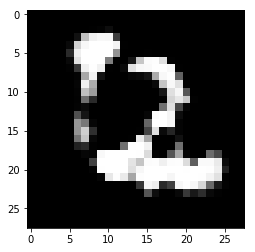

Loop: 814100, Generator_loss: -0.0082154, Discriminator_loss: 0.0008784
Loop: 814200, Generator_loss: -0.0053818, Discriminator_loss: 0.0025786
Loop: 814300, Generator_loss: -0.0060861, Discriminator_loss: 0.0035418
Loop: 814400, Generator_loss: -0.0075259, Discriminator_loss: 0.00070991
Loop: 814500, Generator_loss: -0.0068318, Discriminator_loss: 0.005407
Loop: 814600, Generator_loss: -0.0057318, Discriminator_loss: 0.0026106
Loop: 814700, Generator_loss: -0.011238, Discriminator_loss: 0.0030876
Loop: 814800, Generator_loss: -0.0081635, Discriminator_loss: 0.0016209
Loop: 814900, Generator_loss: -0.011531, Discriminator_loss: 0.0020433
Loop: 815000, Generator_loss: -0.0093475, Discriminator_loss: 0.0027797


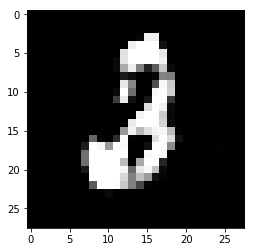

Loop: 815100, Generator_loss: -0.0076451, Discriminator_loss: 0.0029923
Loop: 815200, Generator_loss: -0.0069124, Discriminator_loss: 0.0018348
Loop: 815300, Generator_loss: -0.0049147, Discriminator_loss: 0.0018228
Loop: 815400, Generator_loss: -0.0046484, Discriminator_loss: 0.0016153
Loop: 815500, Generator_loss: -0.013475, Discriminator_loss: 0.0001812
Loop: 815600, Generator_loss: -0.0046384, Discriminator_loss: 0.001139
Loop: 815700, Generator_loss: -0.010485, Discriminator_loss: 0.0024937
Loop: 815800, Generator_loss: -0.007433, Discriminator_loss: 0.0023139
Loop: 815900, Generator_loss: -0.010472, Discriminator_loss: 0.0025034
Loop: 816000, Generator_loss: -0.0085537, Discriminator_loss: 0.0020057


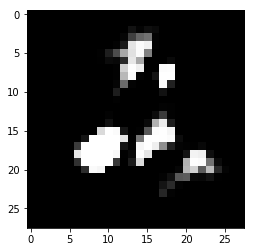

Loop: 816100, Generator_loss: -0.0099168, Discriminator_loss: 0.0020191
Loop: 816200, Generator_loss: -0.0055696, Discriminator_loss: 0.0020673
Loop: 816300, Generator_loss: -0.0027198, Discriminator_loss: 0.0024252
Loop: 816400, Generator_loss: -0.0056409, Discriminator_loss: 0.0033374
Loop: 816500, Generator_loss: -0.0051869, Discriminator_loss: 0.0028581
Loop: 816600, Generator_loss: -0.0045006, Discriminator_loss: 0.0025657
Loop: 816700, Generator_loss: -0.0069213, Discriminator_loss: 0.001169
Loop: 816800, Generator_loss: -0.0074153, Discriminator_loss: 0.0015359
Loop: 816900, Generator_loss: -0.0056792, Discriminator_loss: 0.0034269
Loop: 817000, Generator_loss: -0.0072728, Discriminator_loss: -0.00057608


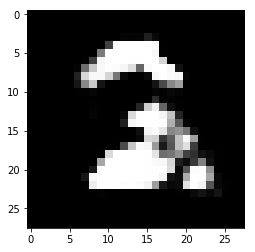

Loop: 817100, Generator_loss: -0.008103, Discriminator_loss: 0.0012775
Loop: 817200, Generator_loss: -0.0052826, Discriminator_loss: 0.0025739
Loop: 817300, Generator_loss: -0.002763, Discriminator_loss: 0.0036127
Loop: 817400, Generator_loss: -0.00938, Discriminator_loss: 0.0026749
Loop: 817500, Generator_loss: -0.0061421, Discriminator_loss: 0.0042738
Loop: 817600, Generator_loss: -0.0082146, Discriminator_loss: 0.0032794
Loop: 817700, Generator_loss: -0.0074413, Discriminator_loss: 0.0022794
Loop: 817800, Generator_loss: -0.0027994, Discriminator_loss: 0.00296
Loop: 817900, Generator_loss: -0.0079894, Discriminator_loss: 0.0029126
Loop: 818000, Generator_loss: -0.0056748, Discriminator_loss: 0.0028098


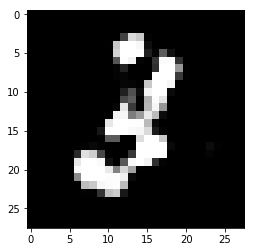

Loop: 818100, Generator_loss: -0.0047275, Discriminator_loss: 0.0024254
Loop: 818200, Generator_loss: -0.0060441, Discriminator_loss: 0.0014736
Loop: 818300, Generator_loss: -0.010292, Discriminator_loss: 0.0031555
Loop: 818400, Generator_loss: -0.0095783, Discriminator_loss: 0.0033554
Loop: 818500, Generator_loss: -0.0070957, Discriminator_loss: 0.0027019
Loop: 818600, Generator_loss: -0.0072392, Discriminator_loss: 0.0021439
Loop: 818700, Generator_loss: -0.0049267, Discriminator_loss: 0.002895
Loop: 818800, Generator_loss: -0.0052603, Discriminator_loss: 0.0028356
Loop: 818900, Generator_loss: -0.0055342, Discriminator_loss: 0.0044154
Loop: 819000, Generator_loss: -0.0036321, Discriminator_loss: 0.0019592


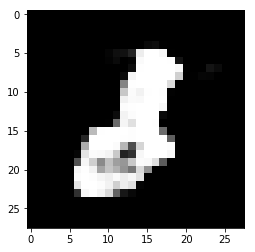

Loop: 819100, Generator_loss: -0.0047215, Discriminator_loss: 0.0032525
Loop: 819200, Generator_loss: -0.0084374, Discriminator_loss: 0.00236
Loop: 819300, Generator_loss: -0.0080771, Discriminator_loss: 0.0031099
Loop: 819400, Generator_loss: -0.0076679, Discriminator_loss: 0.0025445
Loop: 819500, Generator_loss: -0.005062, Discriminator_loss: 0.0024318
Loop: 819600, Generator_loss: -0.011415, Discriminator_loss: 0.0032624
Loop: 819700, Generator_loss: -0.010179, Discriminator_loss: 0.0049499
Loop: 819800, Generator_loss: -0.0069911, Discriminator_loss: 0.0029248
Loop: 819900, Generator_loss: -0.004876, Discriminator_loss: 0.0013918
Loop: 820000, Generator_loss: -0.00028275, Discriminator_loss: 0.00036418


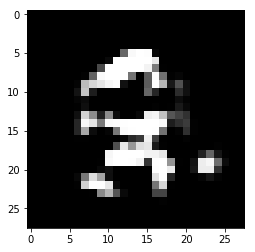

Loop: 820100, Generator_loss: -0.012504, Discriminator_loss: 0.0036234
Loop: 820200, Generator_loss: -0.011043, Discriminator_loss: 0.0017862
Loop: 820300, Generator_loss: -0.0069133, Discriminator_loss: 0.0038367
Loop: 820400, Generator_loss: -0.0045015, Discriminator_loss: 0.0035201
Loop: 820500, Generator_loss: -0.0044273, Discriminator_loss: 0.0018166
Loop: 820600, Generator_loss: -0.0054045, Discriminator_loss: 0.0034329
Loop: 820700, Generator_loss: -0.0052137, Discriminator_loss: 0.0026697
Loop: 820800, Generator_loss: -0.0086152, Discriminator_loss: 0.0041306
Loop: 820900, Generator_loss: -0.0099944, Discriminator_loss: 0.0044977
Loop: 821000, Generator_loss: -0.0040005, Discriminator_loss: 0.0031807


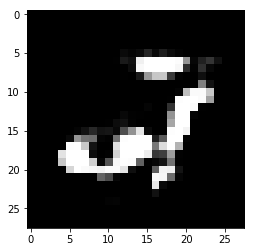

Loop: 821100, Generator_loss: -0.0083807, Discriminator_loss: 0.0035416
Loop: 821200, Generator_loss: -0.0020941, Discriminator_loss: 0.0027978
Loop: 821300, Generator_loss: -0.0077931, Discriminator_loss: 0.0019671
Loop: 821400, Generator_loss: -0.0050822, Discriminator_loss: 0.0026077
Loop: 821500, Generator_loss: -0.0042955, Discriminator_loss: 0.0024059
Loop: 821600, Generator_loss: -0.0055257, Discriminator_loss: 0.0020007
Loop: 821700, Generator_loss: -0.0012885, Discriminator_loss: 0.0017472
Loop: 821800, Generator_loss: -0.0042831, Discriminator_loss: 0.0024179
Loop: 821900, Generator_loss: -0.0054112, Discriminator_loss: 0.0044863
Loop: 822000, Generator_loss: -0.010182, Discriminator_loss: 0.0053974


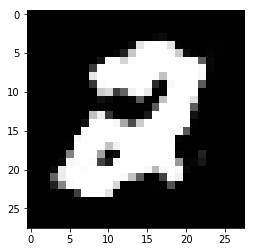

Loop: 822100, Generator_loss: -0.0040889, Discriminator_loss: 0.0025197
Loop: 822200, Generator_loss: -0.0044619, Discriminator_loss: 0.001868
Loop: 822300, Generator_loss: -0.0055731, Discriminator_loss: -0.00012186
Loop: 822400, Generator_loss: -0.0056695, Discriminator_loss: 0.0026189
Loop: 822500, Generator_loss: -0.0069379, Discriminator_loss: 0.0026209
Loop: 822600, Generator_loss: -0.0061049, Discriminator_loss: 0.0021818
Loop: 822700, Generator_loss: -0.010808, Discriminator_loss: 0.0018927
Loop: 822800, Generator_loss: -0.0071858, Discriminator_loss: 0.0031716
Loop: 822900, Generator_loss: -0.0052011, Discriminator_loss: 0.0019869
Loop: 823000, Generator_loss: -0.003687, Discriminator_loss: 0.0020074


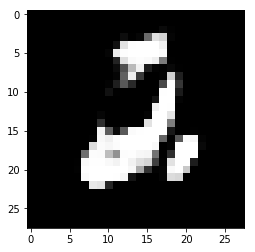

Loop: 823100, Generator_loss: -0.006143, Discriminator_loss: 0.0025637
Loop: 823200, Generator_loss: -0.0025859, Discriminator_loss: 0.001197
Loop: 823300, Generator_loss: -0.0052527, Discriminator_loss: 0.0028213
Loop: 823400, Generator_loss: -0.0050708, Discriminator_loss: 0.0026999
Loop: 823500, Generator_loss: -0.007493, Discriminator_loss: 0.00099462
Loop: 823600, Generator_loss: -0.007522, Discriminator_loss: 0.0014101
Loop: 823700, Generator_loss: -0.0068151, Discriminator_loss: 0.0034959
Loop: 823800, Generator_loss: -0.0053493, Discriminator_loss: 0.0016315
Loop: 823900, Generator_loss: -0.010161, Discriminator_loss: 0.0023032
Loop: 824000, Generator_loss: -0.0081205, Discriminator_loss: 0.0024424


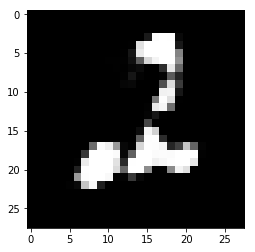

Loop: 824100, Generator_loss: -0.0033027, Discriminator_loss: 0.0017013
Loop: 824200, Generator_loss: -0.0044514, Discriminator_loss: 0.0017237
Loop: 824300, Generator_loss: -0.0067994, Discriminator_loss: 0.0020464
Loop: 824400, Generator_loss: -0.011818, Discriminator_loss: 0.00252
Loop: 824500, Generator_loss: -0.0060067, Discriminator_loss: 0.0026495
Loop: 824600, Generator_loss: -0.0047507, Discriminator_loss: 0.0027771
Loop: 824700, Generator_loss: -0.0056482, Discriminator_loss: 0.0014533
Loop: 824800, Generator_loss: -0.0045153, Discriminator_loss: 0.0025888
Loop: 824900, Generator_loss: 0.00063345, Discriminator_loss: 0.0038902
Loop: 825000, Generator_loss: -0.0065129, Discriminator_loss: 0.0035729


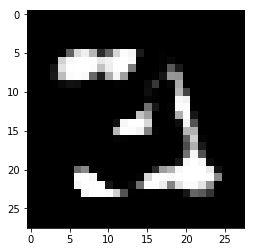

Loop: 825100, Generator_loss: -0.0076116, Discriminator_loss: 0.0022307
Loop: 825200, Generator_loss: -0.003373, Discriminator_loss: 0.0023186
Loop: 825300, Generator_loss: -0.0024987, Discriminator_loss: 0.0037038
Loop: 825400, Generator_loss: -0.0061902, Discriminator_loss: 0.002991
Loop: 825500, Generator_loss: -0.0079771, Discriminator_loss: 0.004439
Loop: 825600, Generator_loss: -0.0040819, Discriminator_loss: 0.0021427
Loop: 825700, Generator_loss: -0.00088355, Discriminator_loss: 0.0030335
Loop: 825800, Generator_loss: -0.0085731, Discriminator_loss: 0.0029072
Loop: 825900, Generator_loss: -0.0050445, Discriminator_loss: 0.0028793
Loop: 826000, Generator_loss: -0.0089293, Discriminator_loss: 0.0032794


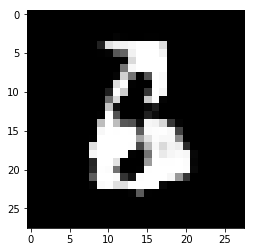

Loop: 826100, Generator_loss: -0.0083935, Discriminator_loss: 0.00039916
Loop: 826200, Generator_loss: -0.0072725, Discriminator_loss: 0.0046821
Loop: 826300, Generator_loss: -0.010015, Discriminator_loss: 0.0027568
Loop: 826400, Generator_loss: -0.003952, Discriminator_loss: 0.0024848
Loop: 826500, Generator_loss: -0.010756, Discriminator_loss: 0.0022095
Loop: 826600, Generator_loss: -0.004534, Discriminator_loss: 0.00058968
Loop: 826700, Generator_loss: -0.0028229, Discriminator_loss: 0.0015615
Loop: 826800, Generator_loss: -0.0069497, Discriminator_loss: 0.0033862
Loop: 826900, Generator_loss: -0.0038734, Discriminator_loss: 0.0034638
Loop: 827000, Generator_loss: -0.0023789, Discriminator_loss: 0.0042738


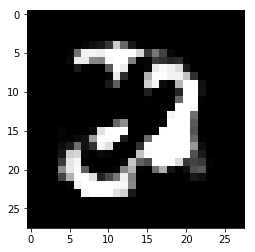

Loop: 827100, Generator_loss: 0.00046854, Discriminator_loss: 0.0052663
Loop: 827200, Generator_loss: -0.0048218, Discriminator_loss: 0.0028507
Loop: 827300, Generator_loss: -0.0039802, Discriminator_loss: 0.003608
Loop: 827400, Generator_loss: -0.0092853, Discriminator_loss: 0.0055587
Loop: 827500, Generator_loss: -0.0063786, Discriminator_loss: 0.0028842
Loop: 827600, Generator_loss: -0.0073904, Discriminator_loss: 0.00226
Loop: 827700, Generator_loss: -0.0086931, Discriminator_loss: 0.0044528
Loop: 827800, Generator_loss: -0.004915, Discriminator_loss: -0.00016877
Loop: 827900, Generator_loss: -0.0039516, Discriminator_loss: 0.00089844
Loop: 828000, Generator_loss: -0.0094022, Discriminator_loss: 0.0054928


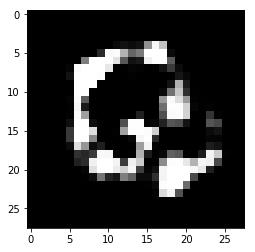

Loop: 828100, Generator_loss: -0.0084079, Discriminator_loss: 0.0025184
Loop: 828200, Generator_loss: -0.0060394, Discriminator_loss: 0.0033404
Loop: 828300, Generator_loss: -0.0058151, Discriminator_loss: 0.0021881
Loop: 828400, Generator_loss: -0.0031821, Discriminator_loss: 0.0025253
Loop: 828500, Generator_loss: -0.0091871, Discriminator_loss: 0.0032379
Loop: 828600, Generator_loss: -0.0096085, Discriminator_loss: 0.0036847
Loop: 828700, Generator_loss: -0.0015023, Discriminator_loss: 0.0027392
Loop: 828800, Generator_loss: -0.0026192, Discriminator_loss: 0.0017449
Loop: 828900, Generator_loss: -0.0088757, Discriminator_loss: 0.0028497
Loop: 829000, Generator_loss: -0.0085437, Discriminator_loss: 0.0031115


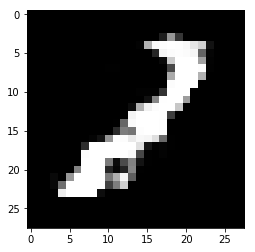

Loop: 829100, Generator_loss: -0.0049929, Discriminator_loss: 0.0037783
Loop: 829200, Generator_loss: -0.0031721, Discriminator_loss: 0.0023512
Loop: 829300, Generator_loss: -0.004708, Discriminator_loss: 0.0030189
Loop: 829400, Generator_loss: -0.0039426, Discriminator_loss: 0.0040285
Loop: 829500, Generator_loss: -0.00601, Discriminator_loss: 0.0044654
Loop: 829600, Generator_loss: 0.00056768, Discriminator_loss: 0.0011685
Loop: 829700, Generator_loss: -0.0040569, Discriminator_loss: 0.0035706
Loop: 829800, Generator_loss: -0.0031275, Discriminator_loss: -6.9778e-05
Loop: 829900, Generator_loss: -0.0045057, Discriminator_loss: 0.0014158
Loop: 830000, Generator_loss: -0.010865, Discriminator_loss: 0.003357


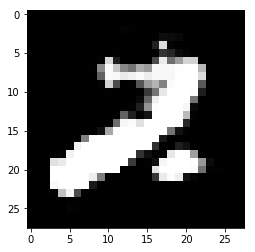

Loop: 830100, Generator_loss: -0.004556, Discriminator_loss: 0.0019598
Loop: 830200, Generator_loss: -0.0046581, Discriminator_loss: 0.0029718
Loop: 830300, Generator_loss: -0.0072143, Discriminator_loss: 0.0029099
Loop: 830400, Generator_loss: -0.0071346, Discriminator_loss: 0.0035012
Loop: 830500, Generator_loss: -0.0069898, Discriminator_loss: 0.0014816
Loop: 830600, Generator_loss: -0.0043256, Discriminator_loss: 0.0023987
Loop: 830700, Generator_loss: -0.0057775, Discriminator_loss: 0.0016664
Loop: 830800, Generator_loss: -0.0056517, Discriminator_loss: 0.0047069
Loop: 830900, Generator_loss: -0.0040899, Discriminator_loss: 0.0020303
Loop: 831000, Generator_loss: -0.0086684, Discriminator_loss: 0.0023462


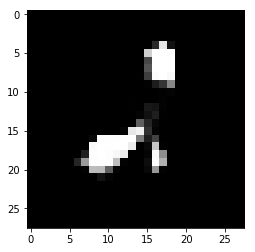

Loop: 831100, Generator_loss: -0.010217, Discriminator_loss: 0.0032428
Loop: 831200, Generator_loss: -0.0088171, Discriminator_loss: 0.0031189
Loop: 831300, Generator_loss: -0.01035, Discriminator_loss: 0.0035937
Loop: 831400, Generator_loss: -0.0091466, Discriminator_loss: 0.003005
Loop: 831500, Generator_loss: -0.0078127, Discriminator_loss: 0.0017796
Loop: 831600, Generator_loss: -0.011741, Discriminator_loss: 0.0022468
Loop: 831700, Generator_loss: -0.0059124, Discriminator_loss: 0.0030155
Loop: 831800, Generator_loss: -0.0079521, Discriminator_loss: 0.0027764
Loop: 831900, Generator_loss: -0.0099177, Discriminator_loss: 0.0021645
Loop: 832000, Generator_loss: -0.0053196, Discriminator_loss: 0.004143


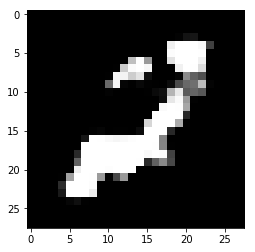

Loop: 832100, Generator_loss: -0.0057898, Discriminator_loss: 0.0044638
Loop: 832200, Generator_loss: -0.010217, Discriminator_loss: 0.0018266
Loop: 832300, Generator_loss: -0.0069713, Discriminator_loss: 0.0018847
Loop: 832400, Generator_loss: -0.010762, Discriminator_loss: 0.00070688
Loop: 832500, Generator_loss: -0.0063086, Discriminator_loss: 0.0038166
Loop: 832600, Generator_loss: -0.0035034, Discriminator_loss: 0.003268
Loop: 832700, Generator_loss: -0.0039893, Discriminator_loss: 0.0026631
Loop: 832800, Generator_loss: -0.0041335, Discriminator_loss: 0.0014763
Loop: 832900, Generator_loss: -0.0088512, Discriminator_loss: 0.0027393
Loop: 833000, Generator_loss: -0.0092708, Discriminator_loss: 0.0013731


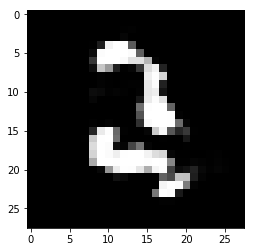

Loop: 833100, Generator_loss: -0.0075039, Discriminator_loss: 0.0037168
Loop: 833200, Generator_loss: -0.0069651, Discriminator_loss: 0.0013142
Loop: 833300, Generator_loss: -0.011329, Discriminator_loss: 0.0022185
Loop: 833400, Generator_loss: -0.0063481, Discriminator_loss: 0.0016621
Loop: 833500, Generator_loss: -0.0103, Discriminator_loss: 0.0022899
Loop: 833600, Generator_loss: -0.0045623, Discriminator_loss: 0.0034948
Loop: 833700, Generator_loss: -0.0086652, Discriminator_loss: 0.0030592
Loop: 833800, Generator_loss: -0.0045383, Discriminator_loss: 0.0033148
Loop: 833900, Generator_loss: -0.0072117, Discriminator_loss: 0.0014475
Loop: 834000, Generator_loss: -0.0030415, Discriminator_loss: 0.0031394


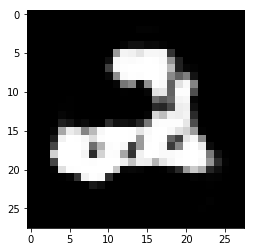

Loop: 834100, Generator_loss: -0.0049616, Discriminator_loss: 0.0034245
Loop: 834200, Generator_loss: -0.00015606, Discriminator_loss: 0.00068508
Loop: 834300, Generator_loss: -0.0078011, Discriminator_loss: 0.0017579
Loop: 834400, Generator_loss: -0.0030266, Discriminator_loss: 0.0036606
Loop: 834500, Generator_loss: -0.011943, Discriminator_loss: 0.0017629
Loop: 834600, Generator_loss: -0.0071869, Discriminator_loss: 0.0024579
Loop: 834700, Generator_loss: -0.0060805, Discriminator_loss: 0.0010868
Loop: 834800, Generator_loss: -0.0051999, Discriminator_loss: 0.0038842
Loop: 834900, Generator_loss: -0.0076892, Discriminator_loss: 0.0041113
Loop: 835000, Generator_loss: -0.0034088, Discriminator_loss: 0.0033032


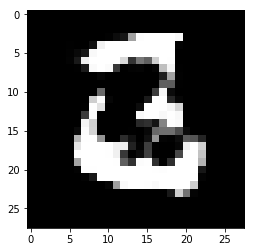

Loop: 835100, Generator_loss: -0.0014057, Discriminator_loss: 0.0020668
Loop: 835200, Generator_loss: -0.012708, Discriminator_loss: 0.001474
Loop: 835300, Generator_loss: -0.01034, Discriminator_loss: 0.002007
Loop: 835400, Generator_loss: -0.011477, Discriminator_loss: 0.0027572
Loop: 835500, Generator_loss: -0.0046925, Discriminator_loss: 0.0024287
Loop: 835600, Generator_loss: -0.0068623, Discriminator_loss: 0.0033134
Loop: 835700, Generator_loss: -0.0055112, Discriminator_loss: 0.0032379
Loop: 835800, Generator_loss: -0.0091399, Discriminator_loss: 0.0039015
Loop: 835900, Generator_loss: -0.0071178, Discriminator_loss: 0.0022178
Loop: 836000, Generator_loss: -0.0057767, Discriminator_loss: 0.0034958


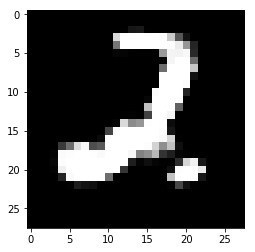

Loop: 836100, Generator_loss: -0.0082656, Discriminator_loss: 0.0015204
Loop: 836200, Generator_loss: -0.0057671, Discriminator_loss: 0.0036771
Loop: 836300, Generator_loss: -0.0045872, Discriminator_loss: 0.0032995
Loop: 836400, Generator_loss: -0.01003, Discriminator_loss: 0.0045336
Loop: 836500, Generator_loss: -0.0015593, Discriminator_loss: 0.003707
Loop: 836600, Generator_loss: -0.0051234, Discriminator_loss: 0.0031746
Loop: 836700, Generator_loss: -0.0058709, Discriminator_loss: 0.00028926
Loop: 836800, Generator_loss: -0.0043092, Discriminator_loss: 0.0027265
Loop: 836900, Generator_loss: -0.0095401, Discriminator_loss: 0.0019132
Loop: 837000, Generator_loss: -0.0036921, Discriminator_loss: 0.0035262


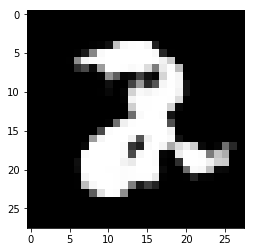

Loop: 837100, Generator_loss: -0.0043885, Discriminator_loss: 0.0025728
Loop: 837200, Generator_loss: -0.0038176, Discriminator_loss: 0.0030356
Loop: 837300, Generator_loss: -0.012439, Discriminator_loss: 0.002803
Loop: 837400, Generator_loss: -0.0073237, Discriminator_loss: 0.0034003
Loop: 837500, Generator_loss: -0.0054551, Discriminator_loss: 0.0024956
Loop: 837600, Generator_loss: -0.0076365, Discriminator_loss: 0.0019903
Loop: 837700, Generator_loss: -0.007963, Discriminator_loss: 0.0023024
Loop: 837800, Generator_loss: -0.0054258, Discriminator_loss: 0.0026264
Loop: 837900, Generator_loss: -0.011993, Discriminator_loss: 0.0021831
Loop: 838000, Generator_loss: -0.0094829, Discriminator_loss: 0.0043107


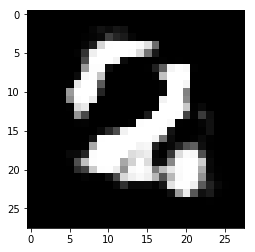

Loop: 838100, Generator_loss: -0.0088869, Discriminator_loss: 0.0022327
Loop: 838200, Generator_loss: -0.0065559, Discriminator_loss: 0.0043605
Loop: 838300, Generator_loss: -0.0062555, Discriminator_loss: 0.0027306
Loop: 838400, Generator_loss: -0.0071833, Discriminator_loss: 0.0033979
Loop: 838500, Generator_loss: -0.0065654, Discriminator_loss: 0.0016989
Loop: 838600, Generator_loss: -0.0048244, Discriminator_loss: 0.0040025
Loop: 838700, Generator_loss: -0.0053648, Discriminator_loss: 0.0028697
Loop: 838800, Generator_loss: -0.0068181, Discriminator_loss: 0.0016047
Loop: 838900, Generator_loss: -0.006777, Discriminator_loss: 0.0003122
Loop: 839000, Generator_loss: -0.0053816, Discriminator_loss: -0.00063886


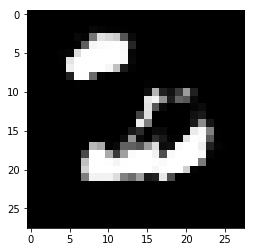

Loop: 839100, Generator_loss: -0.0022692, Discriminator_loss: 0.0016409
Loop: 839200, Generator_loss: -0.0064416, Discriminator_loss: 0.0037344
Loop: 839300, Generator_loss: -0.009196, Discriminator_loss: 0.0029368
Loop: 839400, Generator_loss: -0.0052595, Discriminator_loss: 0.0036549
Loop: 839500, Generator_loss: -0.0074279, Discriminator_loss: 0.0019055
Loop: 839600, Generator_loss: -0.014789, Discriminator_loss: 0.0041651
Loop: 839700, Generator_loss: -0.0034669, Discriminator_loss: 0.0013372
Loop: 839800, Generator_loss: -0.0069693, Discriminator_loss: 0.0019182
Loop: 839900, Generator_loss: -0.007075, Discriminator_loss: 0.0042457
Loop: 840000, Generator_loss: -0.0083478, Discriminator_loss: 0.003885


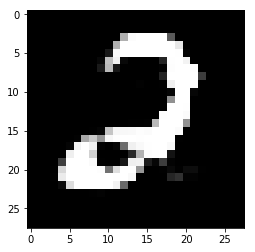

Loop: 840100, Generator_loss: -0.0045013, Discriminator_loss: 0.0017412
Loop: 840200, Generator_loss: -0.0080739, Discriminator_loss: 0.0023225
Loop: 840300, Generator_loss: -0.0037355, Discriminator_loss: 0.0016616
Loop: 840400, Generator_loss: -0.003184, Discriminator_loss: 0.0023794
Loop: 840500, Generator_loss: -0.0080737, Discriminator_loss: 0.0033406
Loop: 840600, Generator_loss: -0.0076297, Discriminator_loss: 0.0028872
Loop: 840700, Generator_loss: -0.0035494, Discriminator_loss: 0.001555
Loop: 840800, Generator_loss: -0.0081049, Discriminator_loss: 0.0016538
Loop: 840900, Generator_loss: -0.008792, Discriminator_loss: 0.0025001
Loop: 841000, Generator_loss: -0.0058458, Discriminator_loss: 0.0029862


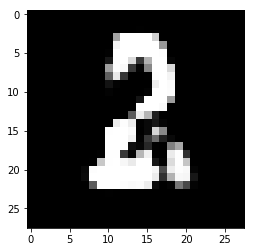

Loop: 841100, Generator_loss: -0.0065067, Discriminator_loss: 0.0041924
Loop: 841200, Generator_loss: -0.0064067, Discriminator_loss: 0.0024597
Loop: 841300, Generator_loss: -0.0065928, Discriminator_loss: 0.0039355
Loop: 841400, Generator_loss: -0.010441, Discriminator_loss: 0.0040486
Loop: 841500, Generator_loss: -0.0031956, Discriminator_loss: 0.0013569
Loop: 841600, Generator_loss: -0.0091889, Discriminator_loss: 0.0045491
Loop: 841700, Generator_loss: -0.0083668, Discriminator_loss: 0.0053273
Loop: 841800, Generator_loss: -0.0076058, Discriminator_loss: 0.0026659
Loop: 841900, Generator_loss: 0.00057226, Discriminator_loss: 0.0025741
Loop: 842000, Generator_loss: -0.0064484, Discriminator_loss: 0.0023866


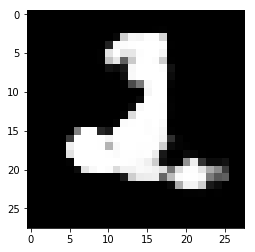

Loop: 842100, Generator_loss: -0.0043037, Discriminator_loss: 0.0030815
Loop: 842200, Generator_loss: -0.006354, Discriminator_loss: 0.003981
Loop: 842300, Generator_loss: -0.011904, Discriminator_loss: 0.0027612
Loop: 842400, Generator_loss: -0.0059411, Discriminator_loss: 0.0025018
Loop: 842500, Generator_loss: -0.0044204, Discriminator_loss: 0.0022605
Loop: 842600, Generator_loss: -0.00545, Discriminator_loss: 0.0038579
Loop: 842700, Generator_loss: -0.0070422, Discriminator_loss: 0.0024544
Loop: 842800, Generator_loss: -0.0072343, Discriminator_loss: 0.0025463
Loop: 842900, Generator_loss: -0.010961, Discriminator_loss: 0.0023755
Loop: 843000, Generator_loss: -0.0094599, Discriminator_loss: 0.0029121


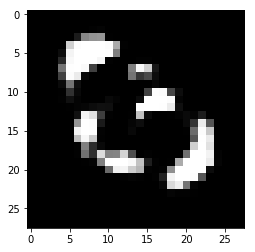

Loop: 843100, Generator_loss: -0.0078634, Discriminator_loss: 0.0028703
Loop: 843200, Generator_loss: -0.0056928, Discriminator_loss: 0.002106
Loop: 843300, Generator_loss: -0.0059119, Discriminator_loss: 0.0041137
Loop: 843400, Generator_loss: -0.0060769, Discriminator_loss: 0.003602
Loop: 843500, Generator_loss: -0.0060797, Discriminator_loss: 0.004009
Loop: 843600, Generator_loss: -0.0056808, Discriminator_loss: 0.0035025
Loop: 843700, Generator_loss: -0.00069653, Discriminator_loss: 0.0024851
Loop: 843800, Generator_loss: -0.0083028, Discriminator_loss: 0.0016306
Loop: 843900, Generator_loss: -0.0061666, Discriminator_loss: 0.0027653
Loop: 844000, Generator_loss: -0.0051866, Discriminator_loss: 0.0035787


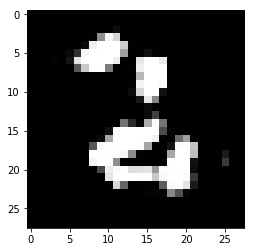

Loop: 844100, Generator_loss: -0.0072717, Discriminator_loss: 0.0050595
Loop: 844200, Generator_loss: -0.0063358, Discriminator_loss: 0.0029896
Loop: 844300, Generator_loss: -0.0063739, Discriminator_loss: 0.0035086
Loop: 844400, Generator_loss: -0.0064678, Discriminator_loss: 0.003522
Loop: 844500, Generator_loss: -0.0057521, Discriminator_loss: 0.0037413
Loop: 844600, Generator_loss: -0.0040962, Discriminator_loss: 0.0016076
Loop: 844700, Generator_loss: -0.0049558, Discriminator_loss: 0.0023366
Loop: 844800, Generator_loss: -0.010535, Discriminator_loss: 0.0018293
Loop: 844900, Generator_loss: -0.0024438, Discriminator_loss: 0.0031092
Loop: 845000, Generator_loss: -0.004624, Discriminator_loss: 0.002544


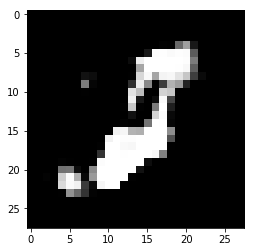

Loop: 845100, Generator_loss: -0.0041469, Discriminator_loss: 0.0039038
Loop: 845200, Generator_loss: -0.00789, Discriminator_loss: 0.00399
Loop: 845300, Generator_loss: -0.0058282, Discriminator_loss: 0.0029206
Loop: 845400, Generator_loss: -0.0057295, Discriminator_loss: 0.0024638
Loop: 845500, Generator_loss: -0.0016818, Discriminator_loss: 0.0025162
Loop: 845600, Generator_loss: -0.0092949, Discriminator_loss: 0.0039885
Loop: 845700, Generator_loss: -0.002827, Discriminator_loss: 0.0025496
Loop: 845800, Generator_loss: -0.0095148, Discriminator_loss: 0.0048693
Loop: 845900, Generator_loss: -0.0082442, Discriminator_loss: 0.0017201
Loop: 846000, Generator_loss: 0.00065098, Discriminator_loss: 0.0024653


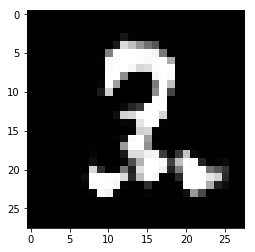

Loop: 846100, Generator_loss: -0.004977, Discriminator_loss: 0.0031569
Loop: 846200, Generator_loss: -0.0085652, Discriminator_loss: 0.0033075
Loop: 846300, Generator_loss: -0.011617, Discriminator_loss: 0.0027895
Loop: 846400, Generator_loss: -0.0055115, Discriminator_loss: 0.0031986
Loop: 846500, Generator_loss: -0.0038073, Discriminator_loss: 0.0030062
Loop: 846600, Generator_loss: -0.0068078, Discriminator_loss: 0.0013038
Loop: 846700, Generator_loss: -0.0031911, Discriminator_loss: 0.0037083
Loop: 846800, Generator_loss: -0.012017, Discriminator_loss: 0.003204
Loop: 846900, Generator_loss: -0.0016748, Discriminator_loss: 0.0033424
Loop: 847000, Generator_loss: -0.0068622, Discriminator_loss: 0.0034634


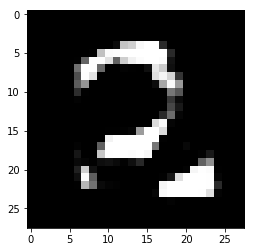

Loop: 847100, Generator_loss: -0.0034984, Discriminator_loss: 0.0019249
Loop: 847200, Generator_loss: -0.0069416, Discriminator_loss: 0.0043844
Loop: 847300, Generator_loss: -0.0065325, Discriminator_loss: 0.0034043
Loop: 847400, Generator_loss: -0.009089, Discriminator_loss: 0.0022042
Loop: 847500, Generator_loss: -0.011324, Discriminator_loss: 0.002049
Loop: 847600, Generator_loss: -0.0037504, Discriminator_loss: 0.0017014
Loop: 847700, Generator_loss: -0.0059269, Discriminator_loss: 0.0022259
Loop: 847800, Generator_loss: -0.012724, Discriminator_loss: 0.0024406
Loop: 847900, Generator_loss: -0.0043765, Discriminator_loss: 0.0026761
Loop: 848000, Generator_loss: -0.0030253, Discriminator_loss: 0.0030576


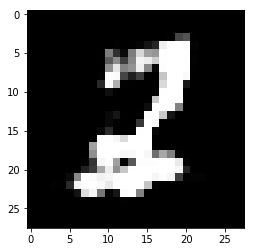

Loop: 848100, Generator_loss: -0.0027376, Discriminator_loss: 0.0041092
Loop: 848200, Generator_loss: -0.0074398, Discriminator_loss: 0.0023928
Loop: 848300, Generator_loss: -0.0079855, Discriminator_loss: 0.0029473
Loop: 848400, Generator_loss: -0.0055089, Discriminator_loss: 0.0036249
Loop: 848500, Generator_loss: -0.010673, Discriminator_loss: 0.0020641
Loop: 848600, Generator_loss: 0.0010783, Discriminator_loss: 0.0043976
Loop: 848700, Generator_loss: -0.0047556, Discriminator_loss: 0.0036606
Loop: 848800, Generator_loss: -0.0090612, Discriminator_loss: 0.0040362
Loop: 848900, Generator_loss: -0.003402, Discriminator_loss: 0.001503
Loop: 849000, Generator_loss: -0.0055528, Discriminator_loss: 0.0019631


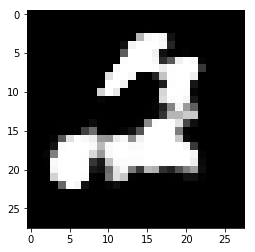

Loop: 849100, Generator_loss: -0.0079125, Discriminator_loss: 0.0052159
Loop: 849200, Generator_loss: -0.0076693, Discriminator_loss: 0.002211
Loop: 849300, Generator_loss: -0.0035177, Discriminator_loss: 0.0046443
Loop: 849400, Generator_loss: -0.0053952, Discriminator_loss: -4.0437e-05
Loop: 849500, Generator_loss: -0.0069942, Discriminator_loss: 0.0032467
Loop: 849600, Generator_loss: -0.0094082, Discriminator_loss: 0.00081824
Loop: 849700, Generator_loss: -0.0052314, Discriminator_loss: 0.0026984
Loop: 849800, Generator_loss: -0.0055241, Discriminator_loss: 0.0027484
Loop: 849900, Generator_loss: -0.0025573, Discriminator_loss: 0.0020933
Loop: 850000, Generator_loss: -0.0072619, Discriminator_loss: 0.0040317


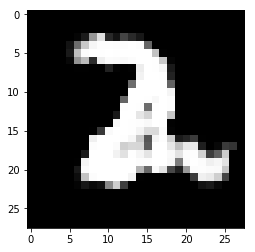

Loop: 850100, Generator_loss: -0.0054664, Discriminator_loss: 0.0038793
Loop: 850200, Generator_loss: -0.0072702, Discriminator_loss: 0.0032966
Loop: 850300, Generator_loss: -0.00798, Discriminator_loss: 0.0034437
Loop: 850400, Generator_loss: -0.0047308, Discriminator_loss: 0.0020035
Loop: 850500, Generator_loss: -0.012059, Discriminator_loss: 0.0028147
Loop: 850600, Generator_loss: -0.006581, Discriminator_loss: 8.205e-07
Loop: 850700, Generator_loss: -0.0095896, Discriminator_loss: 0.0036508
Loop: 850800, Generator_loss: -0.006674, Discriminator_loss: 0.0031091
Loop: 850900, Generator_loss: -0.0041711, Discriminator_loss: 0.0025117
Loop: 851000, Generator_loss: -0.0069315, Discriminator_loss: 0.00053227


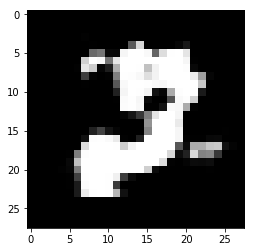

Loop: 851100, Generator_loss: -2.3351e-05, Discriminator_loss: 0.0026016
Loop: 851200, Generator_loss: -0.0042766, Discriminator_loss: 0.00080313
Loop: 851300, Generator_loss: -0.0052345, Discriminator_loss: 0.0036724
Loop: 851400, Generator_loss: -0.0061222, Discriminator_loss: 0.0031603
Loop: 851500, Generator_loss: -0.0084407, Discriminator_loss: 0.0017255
Loop: 851600, Generator_loss: -0.0096091, Discriminator_loss: 0.0014957
Loop: 851700, Generator_loss: -0.010851, Discriminator_loss: 0.0024464
Loop: 851800, Generator_loss: -0.011021, Discriminator_loss: 0.0010844
Loop: 851900, Generator_loss: -0.010807, Discriminator_loss: 0.0036431
Loop: 852000, Generator_loss: -0.0061723, Discriminator_loss: 0.0026103


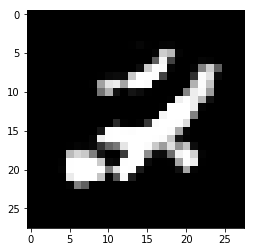

Loop: 852100, Generator_loss: -0.0064083, Discriminator_loss: 0.00098026
Loop: 852200, Generator_loss: -0.0070224, Discriminator_loss: 0.0054286
Loop: 852300, Generator_loss: -0.0071782, Discriminator_loss: 0.001866
Loop: 852400, Generator_loss: -0.0094204, Discriminator_loss: 0.0029851
Loop: 852500, Generator_loss: -0.0084738, Discriminator_loss: 0.003412
Loop: 852600, Generator_loss: -0.007187, Discriminator_loss: 0.0035715
Loop: 852700, Generator_loss: -0.0073993, Discriminator_loss: 0.0026885
Loop: 852800, Generator_loss: -0.0038026, Discriminator_loss: 0.0020694
Loop: 852900, Generator_loss: -0.0095948, Discriminator_loss: 0.0032038
Loop: 853000, Generator_loss: -0.0054393, Discriminator_loss: 0.0045815


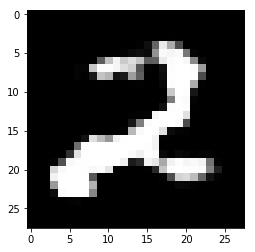

Loop: 853100, Generator_loss: -0.0068108, Discriminator_loss: -0.00046326
Loop: 853200, Generator_loss: -0.007007, Discriminator_loss: 0.0015211
Loop: 853300, Generator_loss: -0.0093818, Discriminator_loss: 0.0031092
Loop: 853400, Generator_loss: -0.0089525, Discriminator_loss: 0.0037813
Loop: 853500, Generator_loss: -0.0088392, Discriminator_loss: 0.0030004
Loop: 853600, Generator_loss: -0.0099847, Discriminator_loss: 0.0024703
Loop: 853700, Generator_loss: -0.0081193, Discriminator_loss: 0.0040513
Loop: 853800, Generator_loss: -0.0085675, Discriminator_loss: 0.0030224
Loop: 853900, Generator_loss: -0.007082, Discriminator_loss: 0.0013721
Loop: 854000, Generator_loss: -0.0079491, Discriminator_loss: 0.0026611


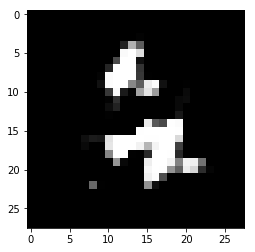

Loop: 854100, Generator_loss: -0.0049218, Discriminator_loss: 0.0028574
Loop: 854200, Generator_loss: -0.008444, Discriminator_loss: 0.0020837
Loop: 854300, Generator_loss: -0.0042967, Discriminator_loss: 0.0013066
Loop: 854400, Generator_loss: -0.012471, Discriminator_loss: 0.0026585
Loop: 854500, Generator_loss: -0.0068553, Discriminator_loss: 0.0044075
Loop: 854600, Generator_loss: -0.0089318, Discriminator_loss: 0.0046744
Loop: 854700, Generator_loss: -0.004916, Discriminator_loss: 0.0010281
Loop: 854800, Generator_loss: -0.0044937, Discriminator_loss: 0.0025495
Loop: 854900, Generator_loss: -0.0065257, Discriminator_loss: -0.00069652
Loop: 855000, Generator_loss: -0.0029233, Discriminator_loss: 0.0027777


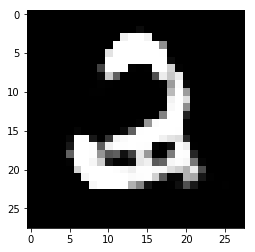

Loop: 855100, Generator_loss: -0.0085215, Discriminator_loss: 0.0037014
Loop: 855200, Generator_loss: -0.0038952, Discriminator_loss: 0.0028828
Loop: 855300, Generator_loss: -0.0053955, Discriminator_loss: 0.0014491
Loop: 855400, Generator_loss: -0.0072164, Discriminator_loss: 0.0021256
Loop: 855500, Generator_loss: -0.0036758, Discriminator_loss: 6.9286e-05
Loop: 855600, Generator_loss: -0.00819, Discriminator_loss: 0.0041412
Loop: 855700, Generator_loss: -0.0064947, Discriminator_loss: 0.0022666
Loop: 855800, Generator_loss: -0.0097605, Discriminator_loss: 0.0033956
Loop: 855900, Generator_loss: -0.012734, Discriminator_loss: 0.0019552
Loop: 856000, Generator_loss: -0.0095793, Discriminator_loss: 0.0044645


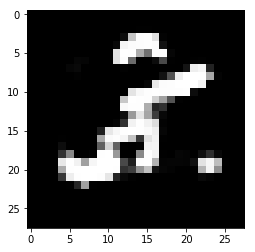

Loop: 856100, Generator_loss: -0.011618, Discriminator_loss: 0.0042377
Loop: 856200, Generator_loss: -0.0068286, Discriminator_loss: 0.0062958
Loop: 856300, Generator_loss: -0.011812, Discriminator_loss: 0.0034188
Loop: 856400, Generator_loss: -0.0088588, Discriminator_loss: 0.0047593
Loop: 856500, Generator_loss: -0.0029398, Discriminator_loss: 0.0045453
Loop: 856600, Generator_loss: -0.010344, Discriminator_loss: 0.0036123
Loop: 856700, Generator_loss: -0.0034916, Discriminator_loss: 0.0033512
Loop: 856800, Generator_loss: -0.005032, Discriminator_loss: 0.0026416
Loop: 856900, Generator_loss: -0.005369, Discriminator_loss: 0.0031629
Loop: 857000, Generator_loss: -0.0066048, Discriminator_loss: 0.0031614


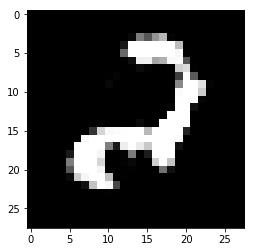

Loop: 857100, Generator_loss: -0.0044869, Discriminator_loss: 0.0038603
Loop: 857200, Generator_loss: -0.011483, Discriminator_loss: 0.0028316
Loop: 857300, Generator_loss: -0.0040093, Discriminator_loss: 0.0035985
Loop: 857400, Generator_loss: -0.0076621, Discriminator_loss: 0.0026951
Loop: 857500, Generator_loss: -0.003741, Discriminator_loss: 0.0033997
Loop: 857600, Generator_loss: -0.0091288, Discriminator_loss: 0.0021374
Loop: 857700, Generator_loss: -0.006239, Discriminator_loss: 0.0032198
Loop: 857800, Generator_loss: -0.0087046, Discriminator_loss: 0.0024097
Loop: 857900, Generator_loss: -0.0074465, Discriminator_loss: 0.0023259
Loop: 858000, Generator_loss: -0.00667, Discriminator_loss: 0.004676


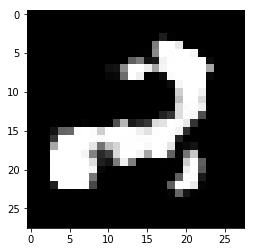

Loop: 858100, Generator_loss: -0.0069799, Discriminator_loss: 0.0032129
Loop: 858200, Generator_loss: -0.005296, Discriminator_loss: 0.0016774
Loop: 858300, Generator_loss: -0.0057278, Discriminator_loss: 0.0039168
Loop: 858400, Generator_loss: -0.0080633, Discriminator_loss: 0.0021574
Loop: 858500, Generator_loss: -0.0076442, Discriminator_loss: 0.0032662
Loop: 858600, Generator_loss: -0.0072041, Discriminator_loss: 0.00039417
Loop: 858700, Generator_loss: -0.0056485, Discriminator_loss: 0.0030297
Loop: 858800, Generator_loss: -0.0055848, Discriminator_loss: 0.0038393
Loop: 858900, Generator_loss: -0.0050109, Discriminator_loss: 0.0024868
Loop: 859000, Generator_loss: -0.0064099, Discriminator_loss: 0.0027412


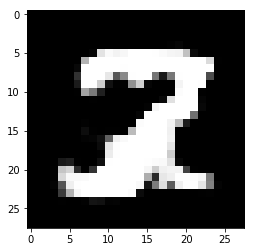

Loop: 859100, Generator_loss: -0.0065653, Discriminator_loss: 0.0018831
Loop: 859200, Generator_loss: -0.0086973, Discriminator_loss: 0.0016891
Loop: 859300, Generator_loss: -0.009232, Discriminator_loss: 0.002184
Loop: 859400, Generator_loss: -0.0041743, Discriminator_loss: 0.0012223
Loop: 859500, Generator_loss: -0.0036858, Discriminator_loss: 0.0028481
Loop: 859600, Generator_loss: -0.0068779, Discriminator_loss: 0.0014318
Loop: 859700, Generator_loss: -0.0081862, Discriminator_loss: 0.0015943
Loop: 859800, Generator_loss: -0.0055154, Discriminator_loss: 0.001089
Loop: 859900, Generator_loss: -0.010481, Discriminator_loss: 0.0034828
Loop: 860000, Generator_loss: -0.012268, Discriminator_loss: 0.0011524


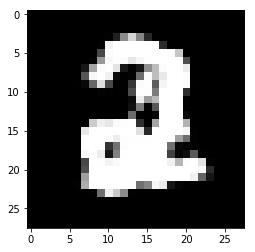

Loop: 860100, Generator_loss: -0.009514, Discriminator_loss: 0.0026097
Loop: 860200, Generator_loss: -0.0078458, Discriminator_loss: 0.0031474
Loop: 860300, Generator_loss: -0.0038599, Discriminator_loss: 0.0025557
Loop: 860400, Generator_loss: -0.0067833, Discriminator_loss: 0.0034668
Loop: 860500, Generator_loss: -0.003058, Discriminator_loss: 0.003407
Loop: 860600, Generator_loss: -0.013832, Discriminator_loss: 0.0036291
Loop: 860700, Generator_loss: -0.0020125, Discriminator_loss: 0.0021468
Loop: 860800, Generator_loss: -0.0037782, Discriminator_loss: 0.0019099
Loop: 860900, Generator_loss: -0.0059715, Discriminator_loss: 0.0027627
Loop: 861000, Generator_loss: -0.0086034, Discriminator_loss: 0.00036946


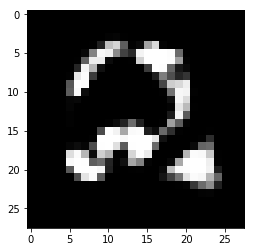

Loop: 861100, Generator_loss: -0.0067132, Discriminator_loss: 0.002994
Loop: 861200, Generator_loss: -0.0077775, Discriminator_loss: 0.00059388
Loop: 861300, Generator_loss: -0.0060145, Discriminator_loss: 0.00044405
Loop: 861400, Generator_loss: -0.0099847, Discriminator_loss: 0.0014554
Loop: 861500, Generator_loss: -0.0088632, Discriminator_loss: 0.0029198
Loop: 861600, Generator_loss: -0.010832, Discriminator_loss: 0.0031233
Loop: 861700, Generator_loss: -0.017346, Discriminator_loss: 0.0022948
Loop: 861800, Generator_loss: -0.0032382, Discriminator_loss: 0.0026829
Loop: 861900, Generator_loss: -0.0081199, Discriminator_loss: 0.00239
Loop: 862000, Generator_loss: -0.0089672, Discriminator_loss: 0.0030663


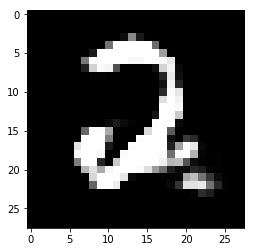

Loop: 862100, Generator_loss: -0.0091501, Discriminator_loss: 0.0032292
Loop: 862200, Generator_loss: -0.0076157, Discriminator_loss: 0.0032644
Loop: 862300, Generator_loss: -0.0098622, Discriminator_loss: 0.0035015
Loop: 862400, Generator_loss: -0.0082649, Discriminator_loss: 0.0026548
Loop: 862500, Generator_loss: -0.0091982, Discriminator_loss: 0.0041625
Loop: 862600, Generator_loss: -0.00446, Discriminator_loss: 0.0022136
Loop: 862700, Generator_loss: -0.004241, Discriminator_loss: 0.0033684
Loop: 862800, Generator_loss: -0.0072761, Discriminator_loss: 0.0045544
Loop: 862900, Generator_loss: -0.011337, Discriminator_loss: 0.001932
Loop: 863000, Generator_loss: -0.0070372, Discriminator_loss: 0.0022422


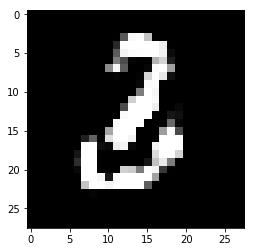

Loop: 863100, Generator_loss: -0.0039764, Discriminator_loss: 0.0025918
Loop: 863200, Generator_loss: -0.0056532, Discriminator_loss: 0.0040702
Loop: 863300, Generator_loss: -0.0077255, Discriminator_loss: 0.0025207
Loop: 863400, Generator_loss: -0.0024428, Discriminator_loss: 0.0051887
Loop: 863500, Generator_loss: -0.0073613, Discriminator_loss: 0.0035328
Loop: 863600, Generator_loss: -0.007484, Discriminator_loss: 0.0021486
Loop: 863700, Generator_loss: -0.0038036, Discriminator_loss: 0.0017221
Loop: 863800, Generator_loss: -0.0038102, Discriminator_loss: 0.0037677
Loop: 863900, Generator_loss: -0.0039501, Discriminator_loss: 0.0033047
Loop: 864000, Generator_loss: -0.003533, Discriminator_loss: 0.0037693


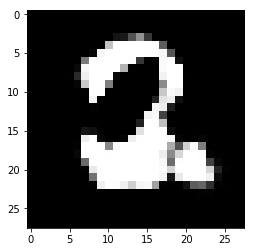

Loop: 864100, Generator_loss: -0.0068144, Discriminator_loss: 0.0032292
Loop: 864200, Generator_loss: -0.0070921, Discriminator_loss: 0.0046973
Loop: 864300, Generator_loss: -0.0095435, Discriminator_loss: 0.0038153
Loop: 864400, Generator_loss: -0.006879, Discriminator_loss: 0.00089789
Loop: 864500, Generator_loss: -0.006625, Discriminator_loss: 0.0010214
Loop: 864600, Generator_loss: -0.0048816, Discriminator_loss: 0.0028701
Loop: 864700, Generator_loss: -0.0016424, Discriminator_loss: 0.0023489
Loop: 864800, Generator_loss: -0.0091761, Discriminator_loss: 0.0028368
Loop: 864900, Generator_loss: -0.0068828, Discriminator_loss: 0.0030622
Loop: 865000, Generator_loss: -0.015462, Discriminator_loss: 0.0029238


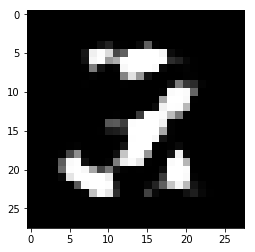

Loop: 865100, Generator_loss: -0.0096354, Discriminator_loss: 0.0015223
Loop: 865200, Generator_loss: -0.0069812, Discriminator_loss: -8.1616e-05
Loop: 865300, Generator_loss: -0.0086479, Discriminator_loss: 0.0053972
Loop: 865400, Generator_loss: -0.0053862, Discriminator_loss: 0.0015942
Loop: 865500, Generator_loss: -0.0012589, Discriminator_loss: 0.0023552
Loop: 865600, Generator_loss: -0.00547, Discriminator_loss: 0.002761
Loop: 865700, Generator_loss: -0.0056353, Discriminator_loss: 0.00098346
Loop: 865800, Generator_loss: -0.013046, Discriminator_loss: 0.0029595
Loop: 865900, Generator_loss: -0.0073762, Discriminator_loss: 0.004777
Loop: 866000, Generator_loss: -0.0046767, Discriminator_loss: 0.0026297


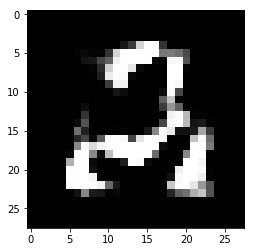

Loop: 866100, Generator_loss: -0.0066813, Discriminator_loss: 0.0023713
Loop: 866200, Generator_loss: -0.0073584, Discriminator_loss: 0.0019613
Loop: 866300, Generator_loss: -0.0090919, Discriminator_loss: 0.0019518
Loop: 866400, Generator_loss: -0.00054466, Discriminator_loss: 0.0014263
Loop: 866500, Generator_loss: -0.0084227, Discriminator_loss: 0.0034358
Loop: 866600, Generator_loss: -0.0062753, Discriminator_loss: 0.0018989
Loop: 866700, Generator_loss: -0.0060847, Discriminator_loss: 0.0026779
Loop: 866800, Generator_loss: -0.011934, Discriminator_loss: 0.0019063
Loop: 866900, Generator_loss: -0.0080158, Discriminator_loss: 0.0026409
Loop: 867000, Generator_loss: -0.0093573, Discriminator_loss: 0.0043205


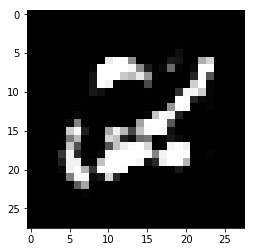

Loop: 867100, Generator_loss: -0.0020838, Discriminator_loss: 0.0025476
Loop: 867200, Generator_loss: -0.010812, Discriminator_loss: 0.0016064
Loop: 867300, Generator_loss: -0.0080785, Discriminator_loss: 0.0015837
Loop: 867400, Generator_loss: -0.0065316, Discriminator_loss: 0.0030776
Loop: 867500, Generator_loss: -0.0081609, Discriminator_loss: 0.0030383
Loop: 867600, Generator_loss: -0.0056371, Discriminator_loss: 0.0025657
Loop: 867700, Generator_loss: -0.0077031, Discriminator_loss: 0.00176
Loop: 867800, Generator_loss: -0.0043283, Discriminator_loss: 0.003804
Loop: 867900, Generator_loss: -0.0083829, Discriminator_loss: 0.0020644
Loop: 868000, Generator_loss: -0.0029073, Discriminator_loss: 0.0019078


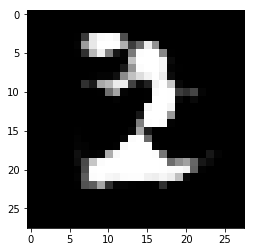

Loop: 868100, Generator_loss: -0.0061038, Discriminator_loss: 0.0024067
Loop: 868200, Generator_loss: -0.0039747, Discriminator_loss: 0.0028749
Loop: 868300, Generator_loss: -0.012288, Discriminator_loss: 0.0012801
Loop: 868400, Generator_loss: -0.0079941, Discriminator_loss: 0.0020603
Loop: 868500, Generator_loss: -0.0078539, Discriminator_loss: 0.0028056
Loop: 868600, Generator_loss: -0.0069527, Discriminator_loss: 0.0039675
Loop: 868700, Generator_loss: -0.010041, Discriminator_loss: 0.0032892
Loop: 868800, Generator_loss: -0.0046202, Discriminator_loss: 0.0033902
Loop: 868900, Generator_loss: -0.011752, Discriminator_loss: 0.0024455
Loop: 869000, Generator_loss: -0.0070218, Discriminator_loss: 0.0036181


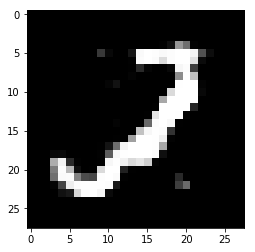

Loop: 869100, Generator_loss: -0.0031498, Discriminator_loss: 0.0032034
Loop: 869200, Generator_loss: -0.0046759, Discriminator_loss: 0.0018909
Loop: 869300, Generator_loss: -0.0059409, Discriminator_loss: 0.002468
Loop: 869400, Generator_loss: -0.0083034, Discriminator_loss: 0.0029289
Loop: 869500, Generator_loss: -0.0091758, Discriminator_loss: 0.0027593
Loop: 869600, Generator_loss: -0.0041732, Discriminator_loss: 0.0013856
Loop: 869700, Generator_loss: -0.0052344, Discriminator_loss: 0.0011789
Loop: 869800, Generator_loss: -0.0052936, Discriminator_loss: 0.0038622
Loop: 869900, Generator_loss: -0.0045214, Discriminator_loss: 0.0021482
Loop: 870000, Generator_loss: -0.0094622, Discriminator_loss: 0.0038421


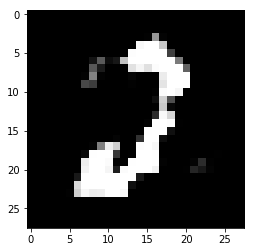

Loop: 870100, Generator_loss: -0.0064362, Discriminator_loss: 0.003113
Loop: 870200, Generator_loss: -0.005018, Discriminator_loss: 0.0037218
Loop: 870300, Generator_loss: -0.0098196, Discriminator_loss: 0.0038403
Loop: 870400, Generator_loss: -0.0070318, Discriminator_loss: 0.003611
Loop: 870500, Generator_loss: -0.005416, Discriminator_loss: 0.0044389
Loop: 870600, Generator_loss: -0.012126, Discriminator_loss: 0.0039977
Loop: 870700, Generator_loss: -0.013196, Discriminator_loss: 0.004389
Loop: 870800, Generator_loss: -0.0067308, Discriminator_loss: 0.0014024
Loop: 870900, Generator_loss: -0.0098031, Discriminator_loss: 0.0012163
Loop: 871000, Generator_loss: -0.010368, Discriminator_loss: 0.0041596


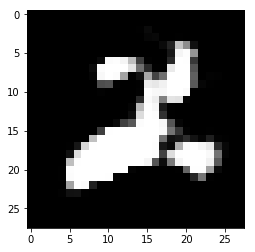

Loop: 871100, Generator_loss: -0.0059591, Discriminator_loss: 0.0015007
Loop: 871200, Generator_loss: -0.0045218, Discriminator_loss: 0.0027533
Loop: 871300, Generator_loss: -0.0096741, Discriminator_loss: 0.0024993
Loop: 871400, Generator_loss: -0.0032676, Discriminator_loss: 0.0015926
Loop: 871500, Generator_loss: -0.003155, Discriminator_loss: 0.0020924
Loop: 871600, Generator_loss: -0.0048928, Discriminator_loss: 0.0041041
Loop: 871700, Generator_loss: -0.0057444, Discriminator_loss: 0.0014665
Loop: 871800, Generator_loss: -0.0076011, Discriminator_loss: 0.0030417
Loop: 871900, Generator_loss: -0.0049154, Discriminator_loss: 0.0029674
Loop: 872000, Generator_loss: -0.0066811, Discriminator_loss: 0.0024528


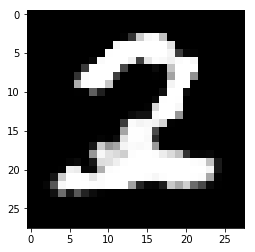

Loop: 872100, Generator_loss: -0.0099996, Discriminator_loss: 0.0057794
Loop: 872200, Generator_loss: -0.0047691, Discriminator_loss: 0.0041985
Loop: 872300, Generator_loss: -0.0083408, Discriminator_loss: 0.0024026
Loop: 872400, Generator_loss: -0.010006, Discriminator_loss: 0.0037471
Loop: 872500, Generator_loss: -0.0023681, Discriminator_loss: 0.00068135
Loop: 872600, Generator_loss: -0.0087681, Discriminator_loss: 0.0037136
Loop: 872700, Generator_loss: -0.005925, Discriminator_loss: 0.0026867
Loop: 872800, Generator_loss: -0.0064306, Discriminator_loss: 0.0002659
Loop: 872900, Generator_loss: -0.010009, Discriminator_loss: 0.0038217
Loop: 873000, Generator_loss: -0.0036547, Discriminator_loss: 0.0027064


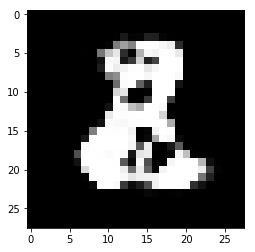

Loop: 873100, Generator_loss: -0.0082648, Discriminator_loss: 0.003921
Loop: 873200, Generator_loss: -0.0030985, Discriminator_loss: 0.00078343
Loop: 873300, Generator_loss: -0.004365, Discriminator_loss: 0.0017865
Loop: 873400, Generator_loss: -0.0034516, Discriminator_loss: 0.0048819
Loop: 873500, Generator_loss: -0.0072432, Discriminator_loss: 0.0026274
Loop: 873600, Generator_loss: -0.0068976, Discriminator_loss: 0.0030249
Loop: 873700, Generator_loss: -0.0060147, Discriminator_loss: 0.0032708
Loop: 873800, Generator_loss: -0.007462, Discriminator_loss: 0.0011205
Loop: 873900, Generator_loss: -0.0038833, Discriminator_loss: 0.0036159
Loop: 874000, Generator_loss: -0.0064642, Discriminator_loss: 0.0021613


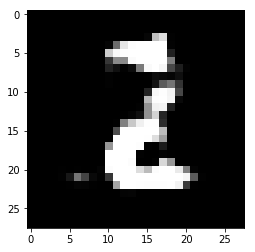

Loop: 874100, Generator_loss: -0.0072672, Discriminator_loss: 0.0022377
Loop: 874200, Generator_loss: -0.006594, Discriminator_loss: 0.0032594
Loop: 874300, Generator_loss: -0.0043288, Discriminator_loss: 0.0019275
Loop: 874400, Generator_loss: -0.0077746, Discriminator_loss: 0.0029401
Loop: 874500, Generator_loss: -0.0070841, Discriminator_loss: 0.0034815
Loop: 874600, Generator_loss: -0.0073027, Discriminator_loss: 0.0016909
Loop: 874700, Generator_loss: -0.0047937, Discriminator_loss: 0.0022375
Loop: 874800, Generator_loss: -0.0072111, Discriminator_loss: 0.0035779
Loop: 874900, Generator_loss: -0.010572, Discriminator_loss: 0.0033318
Loop: 875000, Generator_loss: -0.0031346, Discriminator_loss: 0.0020082


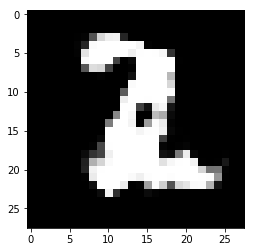

Loop: 875100, Generator_loss: -0.0038486, Discriminator_loss: 0.0034364
Loop: 875200, Generator_loss: -0.0074556, Discriminator_loss: 0.00085439
Loop: 875300, Generator_loss: -0.0073172, Discriminator_loss: 0.0032772
Loop: 875400, Generator_loss: -0.00625, Discriminator_loss: 0.0030726
Loop: 875500, Generator_loss: -0.0080287, Discriminator_loss: 0.0025777
Loop: 875600, Generator_loss: -0.0058595, Discriminator_loss: 0.0029399
Loop: 875700, Generator_loss: -0.0071448, Discriminator_loss: 0.0026715
Loop: 875800, Generator_loss: -0.003391, Discriminator_loss: 0.0024526
Loop: 875900, Generator_loss: -0.010194, Discriminator_loss: 0.0039272
Loop: 876000, Generator_loss: -0.0062305, Discriminator_loss: 0.0020165


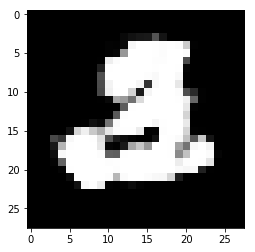

Loop: 876100, Generator_loss: -0.0089829, Discriminator_loss: 0.0048164
Loop: 876200, Generator_loss: -0.0036946, Discriminator_loss: 0.0045809
Loop: 876300, Generator_loss: -0.011051, Discriminator_loss: 0.000257
Loop: 876400, Generator_loss: -0.007629, Discriminator_loss: 0.0014995
Loop: 876500, Generator_loss: -0.0069212, Discriminator_loss: 0.0044942
Loop: 876600, Generator_loss: -0.0073574, Discriminator_loss: 0.0053007
Loop: 876700, Generator_loss: -0.010643, Discriminator_loss: 0.0031514
Loop: 876800, Generator_loss: -0.0062436, Discriminator_loss: 0.0022162
Loop: 876900, Generator_loss: -0.004983, Discriminator_loss: 0.0022265
Loop: 877000, Generator_loss: -0.0018755, Discriminator_loss: 0.0030393


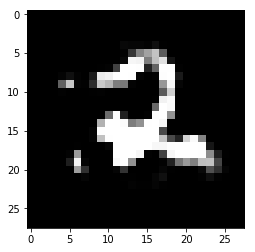

Loop: 877100, Generator_loss: -0.011425, Discriminator_loss: 0.0033983
Loop: 877200, Generator_loss: -0.010641, Discriminator_loss: 0.0042675
Loop: 877300, Generator_loss: -0.0024376, Discriminator_loss: 0.0021707
Loop: 877400, Generator_loss: -0.004122, Discriminator_loss: 0.0022066
Loop: 877500, Generator_loss: -0.0079648, Discriminator_loss: 0.0028884
Loop: 877600, Generator_loss: -0.0083323, Discriminator_loss: 0.0044255
Loop: 877700, Generator_loss: -0.0087495, Discriminator_loss: 0.0027097
Loop: 877800, Generator_loss: -0.0044075, Discriminator_loss: 0.0038848
Loop: 877900, Generator_loss: -0.0026181, Discriminator_loss: 0.0028323
Loop: 878000, Generator_loss: -0.010051, Discriminator_loss: 0.0020927


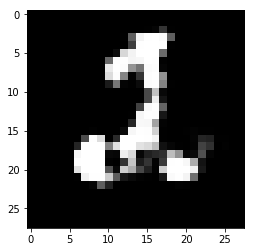

Loop: 878100, Generator_loss: -0.0071646, Discriminator_loss: 0.0019861
Loop: 878200, Generator_loss: -0.0064552, Discriminator_loss: 0.0029326
Loop: 878300, Generator_loss: -0.012408, Discriminator_loss: 0.0035913
Loop: 878400, Generator_loss: -0.0043441, Discriminator_loss: 0.0013381
Loop: 878500, Generator_loss: -0.0054039, Discriminator_loss: 0.0034314
Loop: 878600, Generator_loss: -0.00137, Discriminator_loss: 0.00093117
Loop: 878700, Generator_loss: -0.0057808, Discriminator_loss: 0.0027665
Loop: 878800, Generator_loss: -0.0038629, Discriminator_loss: 0.002483
Loop: 878900, Generator_loss: -0.0056878, Discriminator_loss: 0.0025691
Loop: 879000, Generator_loss: -0.0065313, Discriminator_loss: 0.0030795


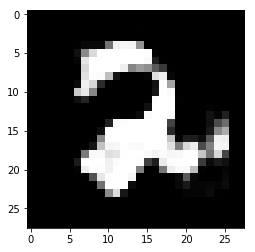

Loop: 879100, Generator_loss: -0.0052768, Discriminator_loss: 0.0026747
Loop: 879200, Generator_loss: -0.0031656, Discriminator_loss: 0.0013785
Loop: 879300, Generator_loss: -0.0093996, Discriminator_loss: 0.0026487
Loop: 879400, Generator_loss: -0.0081176, Discriminator_loss: 0.0040314
Loop: 879500, Generator_loss: -0.0053041, Discriminator_loss: 0.00436
Loop: 879600, Generator_loss: -0.0053321, Discriminator_loss: 0.0021128
Loop: 879700, Generator_loss: -0.0054457, Discriminator_loss: 0.0052835
Loop: 879800, Generator_loss: -0.0097313, Discriminator_loss: 0.0014136
Loop: 879900, Generator_loss: -0.008514, Discriminator_loss: 0.0029578
Loop: 880000, Generator_loss: -0.0072119, Discriminator_loss: 0.0032135


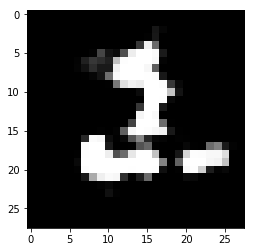

Loop: 880100, Generator_loss: -0.009434, Discriminator_loss: 0.0020979
Loop: 880200, Generator_loss: -0.0059552, Discriminator_loss: 0.0036531
Loop: 880300, Generator_loss: -0.0090961, Discriminator_loss: 0.0014528
Loop: 880400, Generator_loss: -0.0042071, Discriminator_loss: 0.001225
Loop: 880500, Generator_loss: -0.004423, Discriminator_loss: 0.0022732
Loop: 880600, Generator_loss: -0.0070012, Discriminator_loss: 0.0015143
Loop: 880700, Generator_loss: -0.0043679, Discriminator_loss: 0.0027021
Loop: 880800, Generator_loss: -0.0018208, Discriminator_loss: 0.0024715
Loop: 880900, Generator_loss: -0.0040091, Discriminator_loss: 0.0027876
Loop: 881000, Generator_loss: -0.0069153, Discriminator_loss: 0.002509


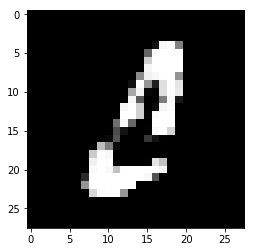

Loop: 881100, Generator_loss: -0.0071324, Discriminator_loss: 0.0025626
Loop: 881200, Generator_loss: -0.0055148, Discriminator_loss: 0.0024983
Loop: 881300, Generator_loss: 0.00012675, Discriminator_loss: 0.0038546
Loop: 881400, Generator_loss: -0.0091797, Discriminator_loss: 0.0023523
Loop: 881500, Generator_loss: -0.005188, Discriminator_loss: 0.00062009
Loop: 881600, Generator_loss: -0.0039738, Discriminator_loss: 0.0021856
Loop: 881700, Generator_loss: -0.0054416, Discriminator_loss: 0.0028831
Loop: 881800, Generator_loss: -0.0040753, Discriminator_loss: 0.0031803
Loop: 881900, Generator_loss: -0.0068762, Discriminator_loss: 0.0033678
Loop: 882000, Generator_loss: -0.0052552, Discriminator_loss: 0.0039566


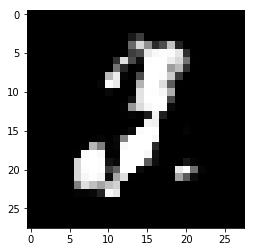

Loop: 882100, Generator_loss: -0.0058705, Discriminator_loss: 0.0046213
Loop: 882200, Generator_loss: -0.0019247, Discriminator_loss: 0.0033267
Loop: 882300, Generator_loss: -0.008535, Discriminator_loss: 0.0015253
Loop: 882400, Generator_loss: -0.0023781, Discriminator_loss: 0.0031596
Loop: 882500, Generator_loss: -0.01212, Discriminator_loss: 0.0017674
Loop: 882600, Generator_loss: -0.0064528, Discriminator_loss: 0.0047725
Loop: 882700, Generator_loss: -0.0059877, Discriminator_loss: 0.002167
Loop: 882800, Generator_loss: -0.0042674, Discriminator_loss: 0.0020964
Loop: 882900, Generator_loss: -0.00056369, Discriminator_loss: 0.0019675
Loop: 883000, Generator_loss: -0.0076966, Discriminator_loss: 0.00016324


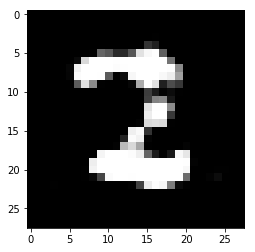

Loop: 883100, Generator_loss: -0.0021974, Discriminator_loss: 0.0034098
Loop: 883200, Generator_loss: -0.0023677, Discriminator_loss: 0.0024949
Loop: 883300, Generator_loss: -0.0030374, Discriminator_loss: 0.002095
Loop: 883400, Generator_loss: -0.0038684, Discriminator_loss: 0.00067485
Loop: 883500, Generator_loss: -0.0031271, Discriminator_loss: 0.0021597
Loop: 883600, Generator_loss: -0.0053195, Discriminator_loss: 0.0040573
Loop: 883700, Generator_loss: -0.0035102, Discriminator_loss: 0.0034065
Loop: 883800, Generator_loss: -0.0082481, Discriminator_loss: 0.0020866
Loop: 883900, Generator_loss: -0.0041806, Discriminator_loss: 0.0041557
Loop: 884000, Generator_loss: -0.005463, Discriminator_loss: 0.001333


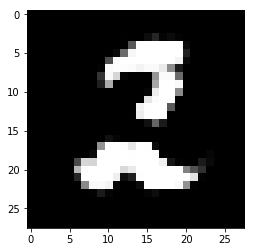

Loop: 884100, Generator_loss: -0.0054525, Discriminator_loss: 0.0023416
Loop: 884200, Generator_loss: -0.003829, Discriminator_loss: 0.0034744
Loop: 884300, Generator_loss: -0.0032316, Discriminator_loss: 0.0025014
Loop: 884400, Generator_loss: -0.0062036, Discriminator_loss: 0.0022874
Loop: 884500, Generator_loss: -0.0066963, Discriminator_loss: 0.0021923
Loop: 884600, Generator_loss: -0.0052386, Discriminator_loss: 0.0029277
Loop: 884700, Generator_loss: -0.010926, Discriminator_loss: 0.001748
Loop: 884800, Generator_loss: -0.0079273, Discriminator_loss: 0.0046324
Loop: 884900, Generator_loss: -0.006978, Discriminator_loss: 0.00049123
Loop: 885000, Generator_loss: -0.0037815, Discriminator_loss: 0.0039313


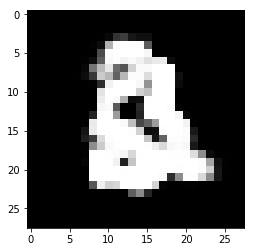

Loop: 885100, Generator_loss: -0.0045667, Discriminator_loss: 0.002226
Loop: 885200, Generator_loss: -0.007251, Discriminator_loss: 0.0038098
Loop: 885300, Generator_loss: -0.0042905, Discriminator_loss: 0.0021092
Loop: 885400, Generator_loss: -0.009103, Discriminator_loss: 0.0031832
Loop: 885500, Generator_loss: -0.0069431, Discriminator_loss: 0.0029687
Loop: 885600, Generator_loss: -0.0055697, Discriminator_loss: 0.0016361
Loop: 885700, Generator_loss: -0.0047155, Discriminator_loss: 0.0034408
Loop: 885800, Generator_loss: -0.0086199, Discriminator_loss: 0.0033825
Loop: 885900, Generator_loss: -0.0012333, Discriminator_loss: 0.0040114
Loop: 886000, Generator_loss: -0.0062943, Discriminator_loss: 0.0034346


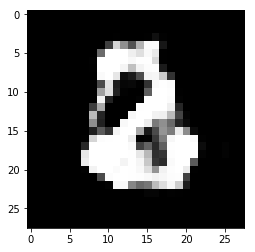

Loop: 886100, Generator_loss: -0.011471, Discriminator_loss: 0.002435
Loop: 886200, Generator_loss: -0.0062233, Discriminator_loss: 0.00304
Loop: 886300, Generator_loss: -0.010434, Discriminator_loss: 0.00078646
Loop: 886400, Generator_loss: -0.012884, Discriminator_loss: 0.0033516
Loop: 886500, Generator_loss: -0.0026171, Discriminator_loss: 0.0019772
Loop: 886600, Generator_loss: -0.010937, Discriminator_loss: 0.004234
Loop: 886700, Generator_loss: -0.0056586, Discriminator_loss: 0.0020728
Loop: 886800, Generator_loss: -0.0052402, Discriminator_loss: 0.0024329
Loop: 886900, Generator_loss: -0.0032908, Discriminator_loss: 0.001136
Loop: 887000, Generator_loss: -0.012091, Discriminator_loss: 0.001908


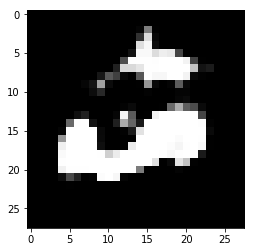

Loop: 887100, Generator_loss: -0.0050908, Discriminator_loss: 0.0012015
Loop: 887200, Generator_loss: -0.0090618, Discriminator_loss: 0.0033835
Loop: 887300, Generator_loss: -0.013548, Discriminator_loss: 0.0039463
Loop: 887400, Generator_loss: -0.0067929, Discriminator_loss: 0.001701
Loop: 887500, Generator_loss: -0.0035376, Discriminator_loss: 0.0023854
Loop: 887600, Generator_loss: -0.0069024, Discriminator_loss: 0.0043322
Loop: 887700, Generator_loss: -0.0072009, Discriminator_loss: 0.0025891
Loop: 887800, Generator_loss: -0.001167, Discriminator_loss: 0.0031452
Loop: 887900, Generator_loss: -0.0084839, Discriminator_loss: 0.0017801
Loop: 888000, Generator_loss: -0.0047073, Discriminator_loss: 0.0061806


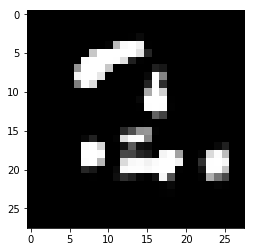

Loop: 888100, Generator_loss: -0.0047124, Discriminator_loss: 0.0021256
Loop: 888200, Generator_loss: -0.0099369, Discriminator_loss: 0.0029139
Loop: 888300, Generator_loss: -0.0039566, Discriminator_loss: 4.5127e-06
Loop: 888400, Generator_loss: -0.004443, Discriminator_loss: 0.0032338
Loop: 888500, Generator_loss: -0.0059016, Discriminator_loss: 0.0031551
Loop: 888600, Generator_loss: -0.0024471, Discriminator_loss: 0.0031935
Loop: 888700, Generator_loss: -0.0049202, Discriminator_loss: 0.0032348
Loop: 888800, Generator_loss: -0.0058074, Discriminator_loss: 0.0036101
Loop: 888900, Generator_loss: -0.0048628, Discriminator_loss: 0.0025562
Loop: 889000, Generator_loss: -0.0048492, Discriminator_loss: 0.0041061


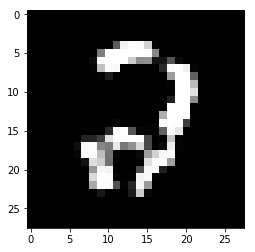

Loop: 889100, Generator_loss: -0.0088705, Discriminator_loss: 0.0046388
Loop: 889200, Generator_loss: -0.0062835, Discriminator_loss: 0.0037295
Loop: 889300, Generator_loss: -0.0091803, Discriminator_loss: 0.0041958
Loop: 889400, Generator_loss: -0.0076827, Discriminator_loss: 0.0017713
Loop: 889500, Generator_loss: -0.0047218, Discriminator_loss: 0.0011716
Loop: 889600, Generator_loss: -0.0081528, Discriminator_loss: 0.0016397
Loop: 889700, Generator_loss: -0.0022983, Discriminator_loss: 0.002887
Loop: 889800, Generator_loss: -0.0090462, Discriminator_loss: 0.0020961
Loop: 889900, Generator_loss: -0.0058519, Discriminator_loss: 0.0049152
Loop: 890000, Generator_loss: -0.0053473, Discriminator_loss: 0.0023101


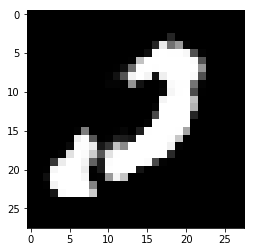

Loop: 890100, Generator_loss: -0.0075169, Discriminator_loss: 0.0030222
Loop: 890200, Generator_loss: -0.0067479, Discriminator_loss: 0.0020648
Loop: 890300, Generator_loss: -0.0090575, Discriminator_loss: 0.0021608
Loop: 890400, Generator_loss: -0.0045291, Discriminator_loss: 0.0046266
Loop: 890500, Generator_loss: -0.0074804, Discriminator_loss: 0.0030911
Loop: 890600, Generator_loss: -0.0048801, Discriminator_loss: 0.0023835
Loop: 890700, Generator_loss: -0.0011914, Discriminator_loss: 0.0039186
Loop: 890800, Generator_loss: -0.0040612, Discriminator_loss: 0.00044733
Loop: 890900, Generator_loss: -0.0076467, Discriminator_loss: 0.0012199
Loop: 891000, Generator_loss: -0.0019886, Discriminator_loss: 0.0033085


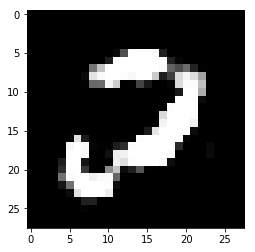

Loop: 891100, Generator_loss: -0.0026467, Discriminator_loss: 0.00049492
Loop: 891200, Generator_loss: -0.0072965, Discriminator_loss: 0.0025455
Loop: 891300, Generator_loss: -0.0041779, Discriminator_loss: 0.0034383
Loop: 891400, Generator_loss: -0.010021, Discriminator_loss: 0.0022369
Loop: 891500, Generator_loss: -0.0037853, Discriminator_loss: 0.0041516
Loop: 891600, Generator_loss: -0.0064349, Discriminator_loss: 0.0023619
Loop: 891700, Generator_loss: -0.0080571, Discriminator_loss: 0.0037512
Loop: 891800, Generator_loss: -0.010068, Discriminator_loss: 0.0052163
Loop: 891900, Generator_loss: -0.0028261, Discriminator_loss: 0.0013713
Loop: 892000, Generator_loss: -0.0031474, Discriminator_loss: 0.0026606


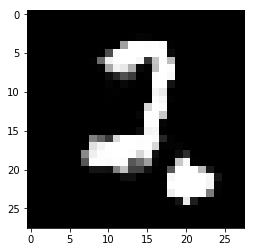

Loop: 892100, Generator_loss: -0.0044036, Discriminator_loss: 0.0025747
Loop: 892200, Generator_loss: -0.0078465, Discriminator_loss: 0.001291
Loop: 892300, Generator_loss: -0.0079961, Discriminator_loss: 0.0029009
Loop: 892400, Generator_loss: -0.0061699, Discriminator_loss: 0.0037275
Loop: 892500, Generator_loss: -0.0044639, Discriminator_loss: 0.0028499
Loop: 892600, Generator_loss: -0.0070076, Discriminator_loss: 0.0027861
Loop: 892700, Generator_loss: -0.0079473, Discriminator_loss: 0.0032722
Loop: 892800, Generator_loss: -0.003526, Discriminator_loss: 0.00028166
Loop: 892900, Generator_loss: -0.00084192, Discriminator_loss: 0.0023689
Loop: 893000, Generator_loss: -0.0048218, Discriminator_loss: 0.0036128


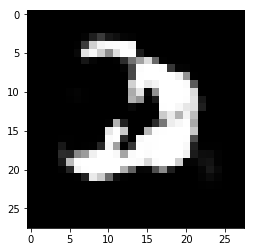

Loop: 893100, Generator_loss: -0.0076348, Discriminator_loss: 0.0034891
Loop: 893200, Generator_loss: -0.003607, Discriminator_loss: 0.0020655
Loop: 893300, Generator_loss: -0.0083653, Discriminator_loss: 0.0027416
Loop: 893400, Generator_loss: -0.0061627, Discriminator_loss: 0.0035293
Loop: 893500, Generator_loss: -0.0048417, Discriminator_loss: 0.0014728
Loop: 893600, Generator_loss: -0.0056031, Discriminator_loss: 0.0015274
Loop: 893700, Generator_loss: -0.0065142, Discriminator_loss: 0.003474
Loop: 893800, Generator_loss: -0.0047779, Discriminator_loss: 0.0035437
Loop: 893900, Generator_loss: -0.0028798, Discriminator_loss: 0.0019245
Loop: 894000, Generator_loss: -0.0078162, Discriminator_loss: 0.0043127


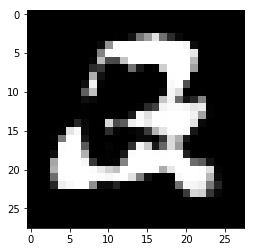

Loop: 894100, Generator_loss: -0.0056612, Discriminator_loss: 0.0031054
Loop: 894200, Generator_loss: -0.0076296, Discriminator_loss: 0.0020769
Loop: 894300, Generator_loss: -0.0045955, Discriminator_loss: 0.0029894
Loop: 894400, Generator_loss: -0.0072142, Discriminator_loss: 0.0044417
Loop: 894500, Generator_loss: -0.0063483, Discriminator_loss: 0.0046285
Loop: 894600, Generator_loss: -0.0039855, Discriminator_loss: 0.0027647
Loop: 894700, Generator_loss: -0.0058974, Discriminator_loss: 0.0026427
Loop: 894800, Generator_loss: -0.0024662, Discriminator_loss: 0.0020878
Loop: 894900, Generator_loss: -0.0082907, Discriminator_loss: 0.0019914
Loop: 895000, Generator_loss: -0.0071, Discriminator_loss: 0.0035161


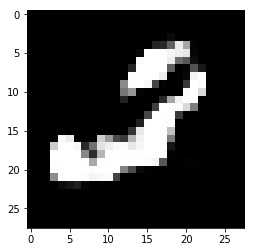

Loop: 895100, Generator_loss: -0.0071534, Discriminator_loss: 0.0038234
Loop: 895200, Generator_loss: -0.0069536, Discriminator_loss: 0.002601
Loop: 895300, Generator_loss: -0.0054291, Discriminator_loss: 0.0040583
Loop: 895400, Generator_loss: -0.0076189, Discriminator_loss: 0.0033285
Loop: 895500, Generator_loss: -0.004188, Discriminator_loss: 0.0020561
Loop: 895600, Generator_loss: -0.0044465, Discriminator_loss: 0.0026199
Loop: 895700, Generator_loss: -0.010184, Discriminator_loss: 0.0031907
Loop: 895800, Generator_loss: -0.0081939, Discriminator_loss: 0.0016083
Loop: 895900, Generator_loss: -0.0062548, Discriminator_loss: 0.0032695
Loop: 896000, Generator_loss: 0.000437, Discriminator_loss: 0.0038772


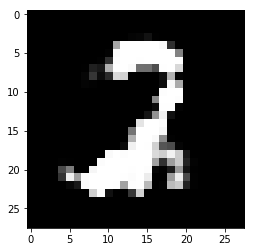

Loop: 896100, Generator_loss: -0.0034437, Discriminator_loss: 0.0026209
Loop: 896200, Generator_loss: -0.0043911, Discriminator_loss: -0.00041817
Loop: 896300, Generator_loss: -0.00070952, Discriminator_loss: 0.0030825
Loop: 896400, Generator_loss: -0.0081796, Discriminator_loss: 0.0014004
Loop: 896500, Generator_loss: -0.0038207, Discriminator_loss: 0.0039868
Loop: 896600, Generator_loss: -0.0040683, Discriminator_loss: 0.0030306
Loop: 896700, Generator_loss: -0.0013356, Discriminator_loss: 0.0020378
Loop: 896800, Generator_loss: -0.0020687, Discriminator_loss: 0.0039816
Loop: 896900, Generator_loss: -0.0047293, Discriminator_loss: 0.0044377
Loop: 897000, Generator_loss: -0.0089345, Discriminator_loss: 0.0035476


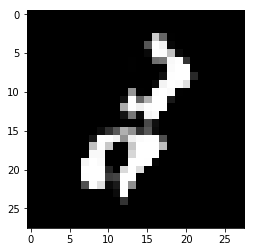

Loop: 897100, Generator_loss: -0.0044848, Discriminator_loss: 0.00064065
Loop: 897200, Generator_loss: -0.0065359, Discriminator_loss: 0.0037283
Loop: 897300, Generator_loss: -0.0047292, Discriminator_loss: 0.002386
Loop: 897400, Generator_loss: -0.0095298, Discriminator_loss: 0.0017464
Loop: 897500, Generator_loss: -0.0049985, Discriminator_loss: 0.0034106
Loop: 897600, Generator_loss: -0.007631, Discriminator_loss: 0.0024881
Loop: 897700, Generator_loss: -0.0061451, Discriminator_loss: 0.0014469
Loop: 897800, Generator_loss: -0.0046941, Discriminator_loss: 0.0033211
Loop: 897900, Generator_loss: -0.0044746, Discriminator_loss: 0.0022283
Loop: 898000, Generator_loss: -0.005966, Discriminator_loss: 0.0043294


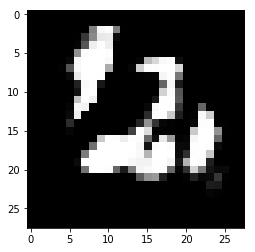

Loop: 898100, Generator_loss: -0.0031842, Discriminator_loss: 0.0025501
Loop: 898200, Generator_loss: -0.0037415, Discriminator_loss: 0.0019276
Loop: 898300, Generator_loss: -0.0043605, Discriminator_loss: 0.0033032
Loop: 898400, Generator_loss: -0.0011107, Discriminator_loss: 0.0020908
Loop: 898500, Generator_loss: -0.0053677, Discriminator_loss: 0.0034944
Loop: 898600, Generator_loss: -0.0057493, Discriminator_loss: 0.0035073
Loop: 898700, Generator_loss: -0.0049256, Discriminator_loss: 0.0022525
Loop: 898800, Generator_loss: -0.0066058, Discriminator_loss: 0.002636
Loop: 898900, Generator_loss: -0.0058528, Discriminator_loss: 0.0029989
Loop: 899000, Generator_loss: -0.0036758, Discriminator_loss: 0.0018357


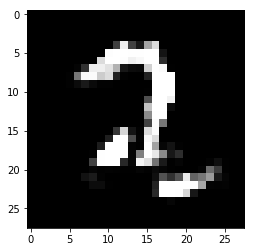

Loop: 899100, Generator_loss: -0.0052803, Discriminator_loss: 0.0031012
Loop: 899200, Generator_loss: -0.0095856, Discriminator_loss: 0.0032405
Loop: 899300, Generator_loss: -0.0060941, Discriminator_loss: 0.003505
Loop: 899400, Generator_loss: -0.0094962, Discriminator_loss: 0.0030717
Loop: 899500, Generator_loss: -0.0033508, Discriminator_loss: 0.0021137
Loop: 899600, Generator_loss: -0.0098475, Discriminator_loss: 0.0029282
Loop: 899700, Generator_loss: -0.0074246, Discriminator_loss: 0.0036877
Loop: 899800, Generator_loss: -0.0096679, Discriminator_loss: 0.0013827
Loop: 899900, Generator_loss: -0.0057649, Discriminator_loss: 0.0045473
Loop: 900000, Generator_loss: -0.0046059, Discriminator_loss: 0.0025495


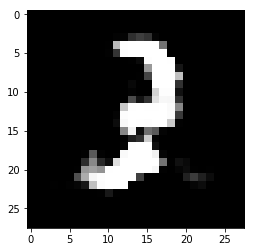

Loop: 900100, Generator_loss: -0.0024258, Discriminator_loss: 0.0021436
Loop: 900200, Generator_loss: -0.010536, Discriminator_loss: 0.0028597
Loop: 900300, Generator_loss: -0.0011223, Discriminator_loss: 0.0022677
Loop: 900400, Generator_loss: -0.0055884, Discriminator_loss: 0.0029469
Loop: 900500, Generator_loss: -0.009648, Discriminator_loss: 0.0036944
Loop: 900600, Generator_loss: -0.0035635, Discriminator_loss: 0.0021086
Loop: 900700, Generator_loss: -0.010238, Discriminator_loss: 0.0010676
Loop: 900800, Generator_loss: -0.0070027, Discriminator_loss: 0.00050756
Loop: 900900, Generator_loss: -0.0055271, Discriminator_loss: 0.0031223
Loop: 901000, Generator_loss: -0.0062112, Discriminator_loss: 0.0025255


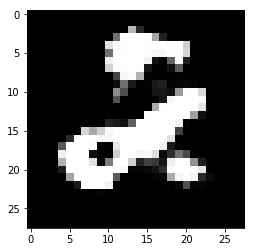

Loop: 901100, Generator_loss: -0.0025521, Discriminator_loss: 0.00070254
Loop: 901200, Generator_loss: -0.0049024, Discriminator_loss: 0.0031513
Loop: 901300, Generator_loss: -0.0084466, Discriminator_loss: 0.0037849
Loop: 901400, Generator_loss: -0.007933, Discriminator_loss: 0.0032698
Loop: 901500, Generator_loss: -0.0050641, Discriminator_loss: 0.002111
Loop: 901600, Generator_loss: 0.00030881, Discriminator_loss: 0.0012755
Loop: 901700, Generator_loss: -0.0069597, Discriminator_loss: 0.0022741
Loop: 901800, Generator_loss: -0.007923, Discriminator_loss: 0.0015295
Loop: 901900, Generator_loss: -0.0081828, Discriminator_loss: 0.0026731
Loop: 902000, Generator_loss: -0.0075537, Discriminator_loss: 0.0027841


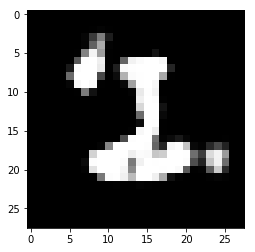

Loop: 902100, Generator_loss: -0.010188, Discriminator_loss: 0.0022442
Loop: 902200, Generator_loss: -0.0058515, Discriminator_loss: 0.0034834
Loop: 902300, Generator_loss: -0.0040431, Discriminator_loss: 0.0033111
Loop: 902400, Generator_loss: -0.0071985, Discriminator_loss: 0.002933
Loop: 902500, Generator_loss: -0.0064928, Discriminator_loss: 0.0027457
Loop: 902600, Generator_loss: -0.0044998, Discriminator_loss: 0.0023689
Loop: 902700, Generator_loss: -0.0078081, Discriminator_loss: 0.0014475
Loop: 902800, Generator_loss: -0.0063527, Discriminator_loss: 0.0006199
Loop: 902900, Generator_loss: -0.0031574, Discriminator_loss: 0.0035334
Loop: 903000, Generator_loss: -0.0021526, Discriminator_loss: 0.0033328


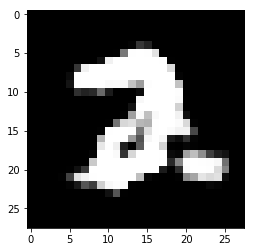

Loop: 903100, Generator_loss: -0.0084193, Discriminator_loss: 0.0027379
Loop: 903200, Generator_loss: -0.0091, Discriminator_loss: 0.0022992
Loop: 903300, Generator_loss: -0.0016046, Discriminator_loss: 0.0035699
Loop: 903400, Generator_loss: -0.0066019, Discriminator_loss: 0.0017338
Loop: 903500, Generator_loss: -0.0032617, Discriminator_loss: 0.00031273
Loop: 903600, Generator_loss: -0.00017392, Discriminator_loss: 0.0031078
Loop: 903700, Generator_loss: -0.010515, Discriminator_loss: 0.0020906
Loop: 903800, Generator_loss: -0.0064911, Discriminator_loss: 0.0026228
Loop: 903900, Generator_loss: -0.0038839, Discriminator_loss: 0.0024949
Loop: 904000, Generator_loss: -0.0038453, Discriminator_loss: 0.0027259


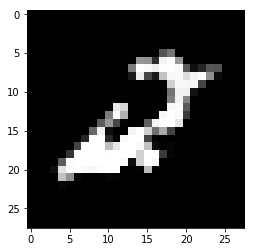

Loop: 904100, Generator_loss: -0.0060739, Discriminator_loss: 0.0024047
Loop: 904200, Generator_loss: -0.0084524, Discriminator_loss: 0.0028
Loop: 904300, Generator_loss: -0.0030368, Discriminator_loss: 0.0032324
Loop: 904400, Generator_loss: -0.0048212, Discriminator_loss: 0.0029752
Loop: 904500, Generator_loss: -0.0072344, Discriminator_loss: 0.0034433
Loop: 904600, Generator_loss: -0.0085613, Discriminator_loss: 0.00041559
Loop: 904700, Generator_loss: -0.004782, Discriminator_loss: 0.0043056
Loop: 904800, Generator_loss: -0.0025349, Discriminator_loss: 0.0038237
Loop: 904900, Generator_loss: -0.0061108, Discriminator_loss: 0.0017074
Loop: 905000, Generator_loss: -0.0076639, Discriminator_loss: 0.0028872


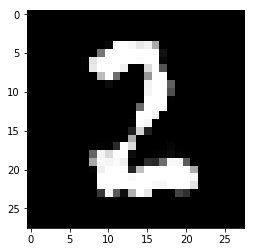

Loop: 905100, Generator_loss: -0.0044137, Discriminator_loss: 0.002061
Loop: 905200, Generator_loss: -0.0079124, Discriminator_loss: 0.0027609
Loop: 905300, Generator_loss: -0.0029036, Discriminator_loss: 0.0035206
Loop: 905400, Generator_loss: -0.01122, Discriminator_loss: 0.0025359
Loop: 905500, Generator_loss: -0.0053119, Discriminator_loss: 0.0037497
Loop: 905600, Generator_loss: -0.011942, Discriminator_loss: 0.0023546
Loop: 905700, Generator_loss: -0.0037825, Discriminator_loss: 0.00058469
Loop: 905800, Generator_loss: -0.0080406, Discriminator_loss: 0.0027947
Loop: 905900, Generator_loss: -0.010253, Discriminator_loss: 0.0033569
Loop: 906000, Generator_loss: -0.0026567, Discriminator_loss: 0.00060772


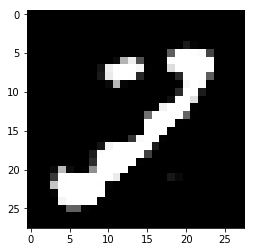

Loop: 906100, Generator_loss: -0.0078148, Discriminator_loss: 0.0013394
Loop: 906200, Generator_loss: -0.0060237, Discriminator_loss: 0.0037223
Loop: 906300, Generator_loss: -0.00040611, Discriminator_loss: 0.0010928
Loop: 906400, Generator_loss: -0.0054906, Discriminator_loss: 0.0039484
Loop: 906500, Generator_loss: -0.0014253, Discriminator_loss: 0.0055899
Loop: 906600, Generator_loss: -0.0052482, Discriminator_loss: 0.0027852
Loop: 906700, Generator_loss: -0.0072942, Discriminator_loss: 0.003295
Loop: 906800, Generator_loss: -0.0037738, Discriminator_loss: 0.0023373
Loop: 906900, Generator_loss: -0.0095873, Discriminator_loss: 0.0024949
Loop: 907000, Generator_loss: -0.0061129, Discriminator_loss: 0.0016068


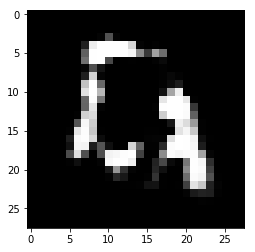

Loop: 907100, Generator_loss: -0.0037644, Discriminator_loss: 0.0035015
Loop: 907200, Generator_loss: -0.0054281, Discriminator_loss: 0.0025709
Loop: 907300, Generator_loss: -0.0046684, Discriminator_loss: 0.0038423
Loop: 907400, Generator_loss: -0.0080518, Discriminator_loss: 0.0020754
Loop: 907500, Generator_loss: -0.0048727, Discriminator_loss: 0.0045274
Loop: 907600, Generator_loss: -0.005646, Discriminator_loss: 0.0027143
Loop: 907700, Generator_loss: -0.0036046, Discriminator_loss: 0.0029357
Loop: 907800, Generator_loss: -0.0046032, Discriminator_loss: 0.0032302
Loop: 907900, Generator_loss: -0.0083044, Discriminator_loss: 0.0028324
Loop: 908000, Generator_loss: -0.0048706, Discriminator_loss: 0.0028167


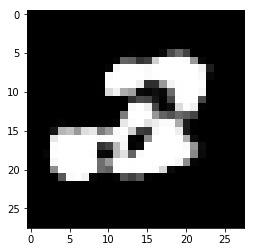

Loop: 908100, Generator_loss: -0.0073685, Discriminator_loss: 0.00136
Loop: 908200, Generator_loss: -0.0072369, Discriminator_loss: 0.0035236
Loop: 908300, Generator_loss: -0.0072443, Discriminator_loss: 0.0040593
Loop: 908400, Generator_loss: -0.0045491, Discriminator_loss: 0.0034752
Loop: 908500, Generator_loss: -0.0054724, Discriminator_loss: 0.0028951
Loop: 908600, Generator_loss: -0.0035858, Discriminator_loss: 0.0045139
Loop: 908700, Generator_loss: -0.0055104, Discriminator_loss: 0.0029597
Loop: 908800, Generator_loss: -0.0057547, Discriminator_loss: 0.0030502
Loop: 908900, Generator_loss: -0.0095638, Discriminator_loss: 0.0013425
Loop: 909000, Generator_loss: -0.0064947, Discriminator_loss: 0.0015914


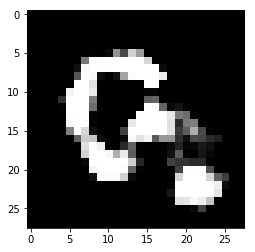

Loop: 909100, Generator_loss: -0.0028831, Discriminator_loss: 0.0024267
Loop: 909200, Generator_loss: -0.0049464, Discriminator_loss: 0.0020108
Loop: 909300, Generator_loss: -0.0088351, Discriminator_loss: 0.0030655
Loop: 909400, Generator_loss: -0.0019264, Discriminator_loss: 0.0033017
Loop: 909500, Generator_loss: -0.0087677, Discriminator_loss: 0.0027854
Loop: 909600, Generator_loss: -0.0019957, Discriminator_loss: 0.0030199
Loop: 909700, Generator_loss: -0.0029241, Discriminator_loss: 0.0033587
Loop: 909800, Generator_loss: -0.0055357, Discriminator_loss: 0.0011695
Loop: 909900, Generator_loss: -0.0033626, Discriminator_loss: 0.0036748
Loop: 910000, Generator_loss: -0.0079232, Discriminator_loss: 0.0020696


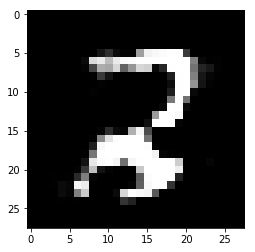

Loop: 910100, Generator_loss: -0.0078175, Discriminator_loss: 0.00081581
Loop: 910200, Generator_loss: -0.006885, Discriminator_loss: 0.0025215
Loop: 910300, Generator_loss: -0.0021008, Discriminator_loss: 0.003018
Loop: 910400, Generator_loss: -0.0085789, Discriminator_loss: -0.00026976
Loop: 910500, Generator_loss: -0.010109, Discriminator_loss: 0.0043081
Loop: 910600, Generator_loss: -0.0026533, Discriminator_loss: 0.0023188
Loop: 910700, Generator_loss: -0.0047054, Discriminator_loss: 0.0017384
Loop: 910800, Generator_loss: -0.0050007, Discriminator_loss: 0.00058214
Loop: 910900, Generator_loss: -0.0053249, Discriminator_loss: 0.0030924
Loop: 911000, Generator_loss: -0.0077358, Discriminator_loss: 0.0032008


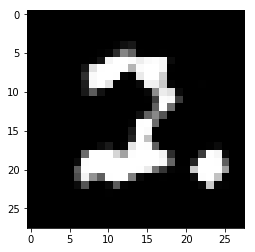

Loop: 911100, Generator_loss: -0.0071715, Discriminator_loss: 0.0053725
Loop: 911200, Generator_loss: -0.0077907, Discriminator_loss: 0.0024213
Loop: 911300, Generator_loss: -0.0038037, Discriminator_loss: 0.0025635
Loop: 911400, Generator_loss: -0.010978, Discriminator_loss: 0.00084264
Loop: 911500, Generator_loss: -0.00087151, Discriminator_loss: 0.0031187
Loop: 911600, Generator_loss: -0.0095147, Discriminator_loss: 0.001808
Loop: 911700, Generator_loss: -0.003808, Discriminator_loss: 0.0019136
Loop: 911800, Generator_loss: -0.00094375, Discriminator_loss: 0.0040521
Loop: 911900, Generator_loss: -0.0080816, Discriminator_loss: 0.0033897
Loop: 912000, Generator_loss: -0.0056396, Discriminator_loss: 0.0032433


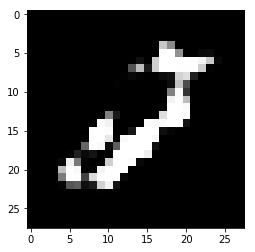

Loop: 912100, Generator_loss: -0.003602, Discriminator_loss: 0.0036086
Loop: 912200, Generator_loss: -0.0046476, Discriminator_loss: 0.0023005
Loop: 912300, Generator_loss: -0.007105, Discriminator_loss: 0.0026513
Loop: 912400, Generator_loss: -0.0062849, Discriminator_loss: 0.0025936
Loop: 912500, Generator_loss: -0.0040801, Discriminator_loss: 0.0026728
Loop: 912600, Generator_loss: -0.0062721, Discriminator_loss: 0.0035664
Loop: 912700, Generator_loss: -0.0040141, Discriminator_loss: 0.0021206
Loop: 912800, Generator_loss: -0.0062749, Discriminator_loss: 0.002668
Loop: 912900, Generator_loss: -0.012804, Discriminator_loss: 0.0044519
Loop: 913000, Generator_loss: -0.006602, Discriminator_loss: 0.0022644


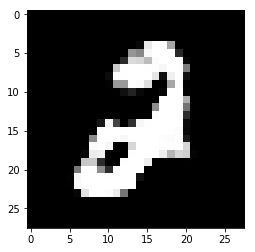

Loop: 913100, Generator_loss: -0.0056156, Discriminator_loss: 0.0034302
Loop: 913200, Generator_loss: -0.0075042, Discriminator_loss: 0.0021595
Loop: 913300, Generator_loss: -0.005115, Discriminator_loss: 0.0031653
Loop: 913400, Generator_loss: -0.0054686, Discriminator_loss: 0.0040343
Loop: 913500, Generator_loss: -0.0041088, Discriminator_loss: 0.0027082
Loop: 913600, Generator_loss: -0.0090613, Discriminator_loss: 0.0020103
Loop: 913700, Generator_loss: -0.007106, Discriminator_loss: 0.0021447
Loop: 913800, Generator_loss: -0.0041625, Discriminator_loss: 0.0034065
Loop: 913900, Generator_loss: -0.0048982, Discriminator_loss: 0.0026899
Loop: 914000, Generator_loss: -0.008269, Discriminator_loss: 0.0035526


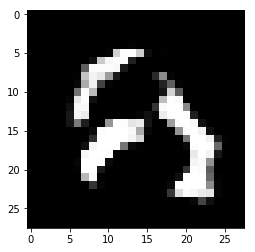

Loop: 914100, Generator_loss: -0.0036317, Discriminator_loss: 0.0019984
Loop: 914200, Generator_loss: -0.0051587, Discriminator_loss: 0.0049017
Loop: 914300, Generator_loss: -0.0034983, Discriminator_loss: 0.004455
Loop: 914400, Generator_loss: -0.00054143, Discriminator_loss: 0.00081404
Loop: 914500, Generator_loss: -0.0079219, Discriminator_loss: 0.00046185
Loop: 914600, Generator_loss: -0.0010349, Discriminator_loss: 0.0025005
Loop: 914700, Generator_loss: -0.0012592, Discriminator_loss: 0.0038113
Loop: 914800, Generator_loss: -0.011434, Discriminator_loss: 0.00080731
Loop: 914900, Generator_loss: -0.0016415, Discriminator_loss: 0.0040943
Loop: 915000, Generator_loss: -0.006099, Discriminator_loss: 0.0036473


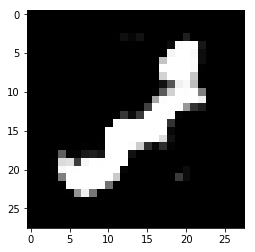

Loop: 915100, Generator_loss: -0.011388, Discriminator_loss: 0.0043817
Loop: 915200, Generator_loss: -0.0031399, Discriminator_loss: 0.0042775
Loop: 915300, Generator_loss: -0.0049139, Discriminator_loss: 0.0011929
Loop: 915400, Generator_loss: -0.0071878, Discriminator_loss: 0.00036271
Loop: 915500, Generator_loss: -0.0036048, Discriminator_loss: 0.0010452
Loop: 915600, Generator_loss: -0.0029044, Discriminator_loss: 0.0018549
Loop: 915700, Generator_loss: -0.001519, Discriminator_loss: 0.0036955
Loop: 915800, Generator_loss: -0.0029199, Discriminator_loss: 0.0015277
Loop: 915900, Generator_loss: -0.0062146, Discriminator_loss: 0.0021078
Loop: 916000, Generator_loss: -0.0082354, Discriminator_loss: 0.0027139


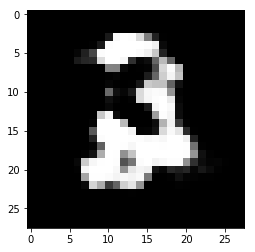

Loop: 916100, Generator_loss: -0.0086633, Discriminator_loss: 0.0041075
Loop: 916200, Generator_loss: -0.0049154, Discriminator_loss: 0.0021647
Loop: 916300, Generator_loss: -0.0085474, Discriminator_loss: 0.0021636
Loop: 916400, Generator_loss: -0.0015528, Discriminator_loss: 0.0020452
Loop: 916500, Generator_loss: -0.005674, Discriminator_loss: 0.0012605
Loop: 916600, Generator_loss: -0.0041122, Discriminator_loss: 0.0026905
Loop: 916700, Generator_loss: -0.0032104, Discriminator_loss: 0.0025955
Loop: 916800, Generator_loss: -0.0094682, Discriminator_loss: 0.0021507
Loop: 916900, Generator_loss: -0.0081548, Discriminator_loss: 0.0025095
Loop: 917000, Generator_loss: -0.0042895, Discriminator_loss: 0.0026782


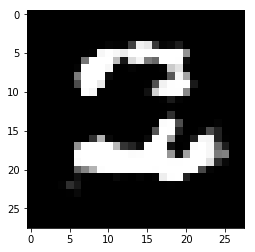

Loop: 917100, Generator_loss: -0.0079578, Discriminator_loss: 0.0024904
Loop: 917200, Generator_loss: -0.0071088, Discriminator_loss: 0.0036726
Loop: 917300, Generator_loss: -0.003728, Discriminator_loss: 0.0018315
Loop: 917400, Generator_loss: -0.0057163, Discriminator_loss: 0.0034177
Loop: 917500, Generator_loss: -0.0036126, Discriminator_loss: 0.0018782
Loop: 917600, Generator_loss: -0.010398, Discriminator_loss: 0.0033026
Loop: 917700, Generator_loss: -0.0010811, Discriminator_loss: 0.0009413
Loop: 917800, Generator_loss: -0.0066297, Discriminator_loss: 0.0036609
Loop: 917900, Generator_loss: -0.0089231, Discriminator_loss: 0.0025774
Loop: 918000, Generator_loss: -0.0063947, Discriminator_loss: 0.0042195


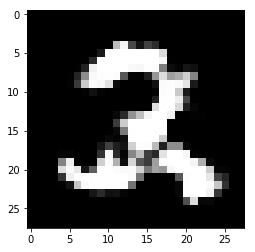

Loop: 918100, Generator_loss: -0.0089247, Discriminator_loss: 0.0012672
Loop: 918200, Generator_loss: -0.006272, Discriminator_loss: 0.0045974
Loop: 918300, Generator_loss: -0.0043347, Discriminator_loss: 0.0043864
Loop: 918400, Generator_loss: -0.0064584, Discriminator_loss: 0.0026144
Loop: 918500, Generator_loss: -0.0090805, Discriminator_loss: 0.005357
Loop: 918600, Generator_loss: -0.0040747, Discriminator_loss: 0.0034704
Loop: 918700, Generator_loss: -0.0038667, Discriminator_loss: 0.0016874
Loop: 918800, Generator_loss: -0.0048955, Discriminator_loss: 0.00067753
Loop: 918900, Generator_loss: -0.00032035, Discriminator_loss: 0.0028728
Loop: 919000, Generator_loss: -0.0054865, Discriminator_loss: 0.0014169


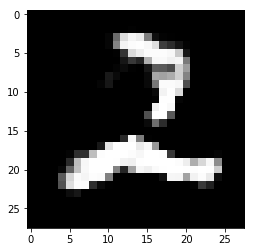

Loop: 919100, Generator_loss: -0.010341, Discriminator_loss: 0.0033937
Loop: 919200, Generator_loss: -0.0029862, Discriminator_loss: 0.001087
Loop: 919300, Generator_loss: -0.0042401, Discriminator_loss: 0.0022743
Loop: 919400, Generator_loss: -0.0038395, Discriminator_loss: 0.0023959
Loop: 919500, Generator_loss: -0.004835, Discriminator_loss: 0.0017911
Loop: 919600, Generator_loss: -0.0065592, Discriminator_loss: 0.0013698
Loop: 919700, Generator_loss: 0.00069587, Discriminator_loss: 0.0016246
Loop: 919800, Generator_loss: -0.0012627, Discriminator_loss: 0.0039584
Loop: 919900, Generator_loss: -0.012876, Discriminator_loss: 0.0041458
Loop: 920000, Generator_loss: -0.0036101, Discriminator_loss: 0.00058652


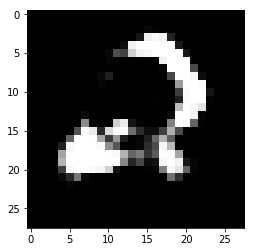

Loop: 920100, Generator_loss: -0.0041252, Discriminator_loss: 0.0037257
Loop: 920200, Generator_loss: -0.0061351, Discriminator_loss: 0.0018212
Loop: 920300, Generator_loss: -0.0080409, Discriminator_loss: 0.0032862
Loop: 920400, Generator_loss: -0.0041728, Discriminator_loss: 0.0020483
Loop: 920500, Generator_loss: -0.0040618, Discriminator_loss: 0.00035872
Loop: 920600, Generator_loss: -0.008504, Discriminator_loss: 0.003045
Loop: 920700, Generator_loss: -0.0078457, Discriminator_loss: 0.0023188
Loop: 920800, Generator_loss: -0.0015897, Discriminator_loss: 0.0042534
Loop: 920900, Generator_loss: -0.0027042, Discriminator_loss: 0.0027666
Loop: 921000, Generator_loss: -0.0068387, Discriminator_loss: 0.003242


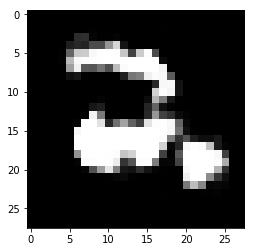

Loop: 921100, Generator_loss: -0.0048291, Discriminator_loss: 0.0026379
Loop: 921200, Generator_loss: -0.0081841, Discriminator_loss: 0.0015935
Loop: 921300, Generator_loss: -0.0058587, Discriminator_loss: 0.0019868
Loop: 921400, Generator_loss: -0.00077172, Discriminator_loss: 0.0021601
Loop: 921500, Generator_loss: -0.005854, Discriminator_loss: 0.0009791
Loop: 921600, Generator_loss: -0.0073483, Discriminator_loss: 0.0032305
Loop: 921700, Generator_loss: -0.0035221, Discriminator_loss: 0.0029371
Loop: 921800, Generator_loss: -0.0050895, Discriminator_loss: 0.002048
Loop: 921900, Generator_loss: -0.0033597, Discriminator_loss: 0.003101
Loop: 922000, Generator_loss: -0.0098288, Discriminator_loss: 0.001268


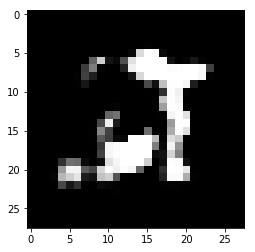

Loop: 922100, Generator_loss: -0.0089777, Discriminator_loss: 0.0013207
Loop: 922200, Generator_loss: -0.0063284, Discriminator_loss: 0.0028111
Loop: 922300, Generator_loss: -0.00483, Discriminator_loss: 0.0025381
Loop: 922400, Generator_loss: -0.0058497, Discriminator_loss: 0.0049003
Loop: 922500, Generator_loss: -0.0085998, Discriminator_loss: 0.0026003
Loop: 922600, Generator_loss: -0.0019499, Discriminator_loss: 0.00084755
Loop: 922700, Generator_loss: -0.0023069, Discriminator_loss: 0.0015212
Loop: 922800, Generator_loss: -0.0071197, Discriminator_loss: 0.0016575
Loop: 922900, Generator_loss: -0.0092195, Discriminator_loss: 0.0019929
Loop: 923000, Generator_loss: -0.0089543, Discriminator_loss: 0.0026092


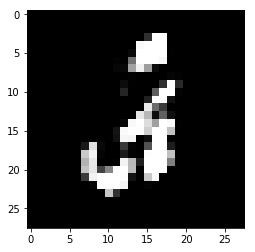

Loop: 923100, Generator_loss: -0.0049453, Discriminator_loss: 0.0020106
Loop: 923200, Generator_loss: -0.0027928, Discriminator_loss: 0.0018096
Loop: 923300, Generator_loss: -0.0058109, Discriminator_loss: 0.0020141
Loop: 923400, Generator_loss: -0.0053656, Discriminator_loss: 0.0019305
Loop: 923500, Generator_loss: -0.0037263, Discriminator_loss: 0.0015702
Loop: 923600, Generator_loss: -0.0076136, Discriminator_loss: 0.0017116
Loop: 923700, Generator_loss: -0.0046787, Discriminator_loss: 0.0022602
Loop: 923800, Generator_loss: -0.0093761, Discriminator_loss: 0.0038137
Loop: 923900, Generator_loss: -0.0072133, Discriminator_loss: 0.0040587
Loop: 924000, Generator_loss: -0.0067394, Discriminator_loss: 0.0027379


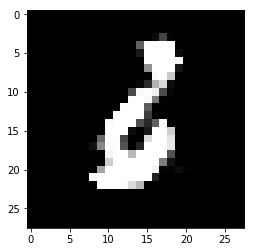

Loop: 924100, Generator_loss: -0.0087181, Discriminator_loss: 0.0027567
Loop: 924200, Generator_loss: -0.0071914, Discriminator_loss: 0.0026333
Loop: 924300, Generator_loss: -0.0062528, Discriminator_loss: 0.00090305
Loop: 924400, Generator_loss: -0.0048869, Discriminator_loss: 0.0027421
Loop: 924500, Generator_loss: -0.0017072, Discriminator_loss: 0.0019242
Loop: 924600, Generator_loss: -0.0095772, Discriminator_loss: 0.00047291
Loop: 924700, Generator_loss: -0.0058911, Discriminator_loss: 0.0031709
Loop: 924800, Generator_loss: -0.0055324, Discriminator_loss: 0.00032315
Loop: 924900, Generator_loss: -0.005564, Discriminator_loss: 0.00050014
Loop: 925000, Generator_loss: -0.0081828, Discriminator_loss: 0.0012908


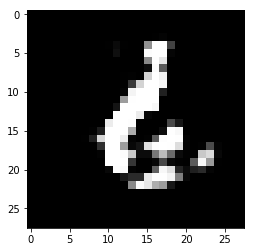

Loop: 925100, Generator_loss: -0.0054115, Discriminator_loss: 0.0024262
Loop: 925200, Generator_loss: -0.0044836, Discriminator_loss: 0.0035077
Loop: 925300, Generator_loss: -0.0022214, Discriminator_loss: 0.0032103
Loop: 925400, Generator_loss: -0.0053402, Discriminator_loss: 0.0042954
Loop: 925500, Generator_loss: -0.0045841, Discriminator_loss: 0.0035457
Loop: 925600, Generator_loss: -0.0060689, Discriminator_loss: 0.0030467
Loop: 925700, Generator_loss: -0.0057045, Discriminator_loss: 0.0021223
Loop: 925800, Generator_loss: -0.0036963, Discriminator_loss: 0.0019399
Loop: 925900, Generator_loss: -0.0013974, Discriminator_loss: 0.00050793
Loop: 926000, Generator_loss: -0.0069311, Discriminator_loss: 0.0045481


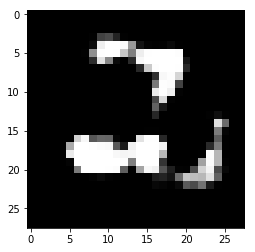

Loop: 926100, Generator_loss: -0.011441, Discriminator_loss: 0.0028335
Loop: 926200, Generator_loss: -0.0079179, Discriminator_loss: 0.0012037
Loop: 926300, Generator_loss: -0.0088229, Discriminator_loss: 0.0046259
Loop: 926400, Generator_loss: -0.011813, Discriminator_loss: 0.0028896
Loop: 926500, Generator_loss: -0.010341, Discriminator_loss: 0.0020854
Loop: 926600, Generator_loss: -0.0062873, Discriminator_loss: 0.00022339
Loop: 926700, Generator_loss: -0.0034073, Discriminator_loss: 0.0039593
Loop: 926800, Generator_loss: -0.0027958, Discriminator_loss: 0.0024544
Loop: 926900, Generator_loss: -0.0073505, Discriminator_loss: 0.0047564
Loop: 927000, Generator_loss: -0.0069667, Discriminator_loss: 0.0025583


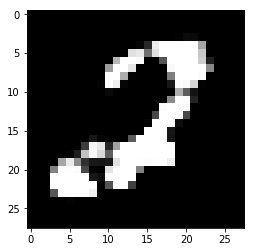

Loop: 927100, Generator_loss: -0.009812, Discriminator_loss: 0.00286
Loop: 927200, Generator_loss: -0.0065227, Discriminator_loss: 0.0016294
Loop: 927300, Generator_loss: -0.0029444, Discriminator_loss: 0.0011308
Loop: 927400, Generator_loss: -0.0078991, Discriminator_loss: 0.0081064
Loop: 927500, Generator_loss: -0.0094253, Discriminator_loss: 0.0038349
Loop: 927600, Generator_loss: -0.0065112, Discriminator_loss: 0.0031069
Loop: 927700, Generator_loss: -0.0080533, Discriminator_loss: 0.001008
Loop: 927800, Generator_loss: -0.0086678, Discriminator_loss: 0.0025195
Loop: 927900, Generator_loss: -0.0069325, Discriminator_loss: 0.003857
Loop: 928000, Generator_loss: -0.0070095, Discriminator_loss: 0.002102


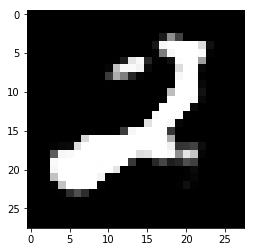

Loop: 928100, Generator_loss: -0.0080501, Discriminator_loss: 0.001049
Loop: 928200, Generator_loss: -0.0063564, Discriminator_loss: 0.0011559
Loop: 928300, Generator_loss: -0.0061785, Discriminator_loss: 0.0028608
Loop: 928400, Generator_loss: -0.0059439, Discriminator_loss: 0.0011534
Loop: 928500, Generator_loss: -0.0044565, Discriminator_loss: 0.0028324
Loop: 928600, Generator_loss: -0.0072341, Discriminator_loss: 0.0019284
Loop: 928700, Generator_loss: -0.0036512, Discriminator_loss: 0.0010687
Loop: 928800, Generator_loss: -0.0055642, Discriminator_loss: 0.0030328
Loop: 928900, Generator_loss: -0.006834, Discriminator_loss: 0.0021492
Loop: 929000, Generator_loss: -0.0036175, Discriminator_loss: 0.0010359


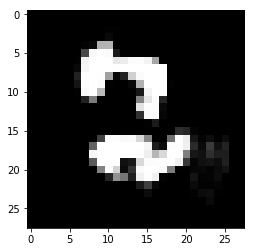

Loop: 929100, Generator_loss: -0.0054059, Discriminator_loss: 0.0033642
Loop: 929200, Generator_loss: -0.0097405, Discriminator_loss: 0.0029983
Loop: 929300, Generator_loss: -0.0015794, Discriminator_loss: 0.0026621
Loop: 929400, Generator_loss: -0.0078981, Discriminator_loss: 0.0039698
Loop: 929500, Generator_loss: -0.0056204, Discriminator_loss: 0.0033042
Loop: 929600, Generator_loss: -0.00050569, Discriminator_loss: 0.0012149
Loop: 929700, Generator_loss: -0.0026907, Discriminator_loss: 0.0014612
Loop: 929800, Generator_loss: -0.0078699, Discriminator_loss: 0.0020851
Loop: 929900, Generator_loss: -0.0095372, Discriminator_loss: 0.0024976
Loop: 930000, Generator_loss: -0.0028474, Discriminator_loss: 0.0022606


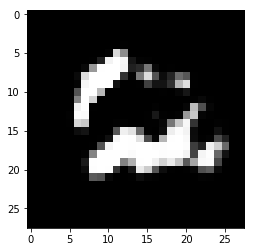

Loop: 930100, Generator_loss: -0.0016106, Discriminator_loss: 0.0039295
Loop: 930200, Generator_loss: -0.0070568, Discriminator_loss: 0.0029263
Loop: 930300, Generator_loss: -0.0064733, Discriminator_loss: 0.0023789
Loop: 930400, Generator_loss: -0.0085241, Discriminator_loss: 0.0031576
Loop: 930500, Generator_loss: -0.0010295, Discriminator_loss: 0.0017047
Loop: 930600, Generator_loss: -0.0039106, Discriminator_loss: 0.0032411
Loop: 930700, Generator_loss: -0.0076115, Discriminator_loss: 0.0034492
Loop: 930800, Generator_loss: -0.0039384, Discriminator_loss: 0.0023593
Loop: 930900, Generator_loss: -0.0060032, Discriminator_loss: 0.0021654
Loop: 931000, Generator_loss: -0.0056579, Discriminator_loss: 0.0037087


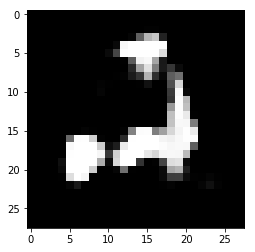

Loop: 931100, Generator_loss: -0.00064007, Discriminator_loss: 0.0024937
Loop: 931200, Generator_loss: -0.012158, Discriminator_loss: 0.0026724
Loop: 931300, Generator_loss: -0.0022814, Discriminator_loss: 0.0027111
Loop: 931400, Generator_loss: -0.0085461, Discriminator_loss: 0.003124
Loop: 931500, Generator_loss: -0.0034063, Discriminator_loss: 0.0030699
Loop: 931600, Generator_loss: -0.0041009, Discriminator_loss: 0.0028216
Loop: 931700, Generator_loss: -0.0065684, Discriminator_loss: 0.00042461
Loop: 931800, Generator_loss: -0.0050819, Discriminator_loss: 0.0029058
Loop: 931900, Generator_loss: -0.0053814, Discriminator_loss: 0.0029071
Loop: 932000, Generator_loss: -0.0069383, Discriminator_loss: 0.0023148


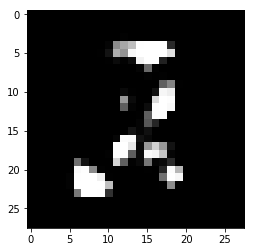

Loop: 932100, Generator_loss: -0.0064758, Discriminator_loss: 0.0018669
Loop: 932200, Generator_loss: -0.0028956, Discriminator_loss: 0.0027551
Loop: 932300, Generator_loss: -0.0060177, Discriminator_loss: 0.0030272
Loop: 932400, Generator_loss: -0.0037693, Discriminator_loss: 0.0021436
Loop: 932500, Generator_loss: -0.013463, Discriminator_loss: 0.0047302
Loop: 932600, Generator_loss: -0.0058975, Discriminator_loss: 0.0039503
Loop: 932700, Generator_loss: -0.0059523, Discriminator_loss: 0.0015335
Loop: 932800, Generator_loss: -0.0069069, Discriminator_loss: 0.0016029
Loop: 932900, Generator_loss: -0.0027544, Discriminator_loss: 0.0020347
Loop: 933000, Generator_loss: -0.0057174, Discriminator_loss: 0.0034143


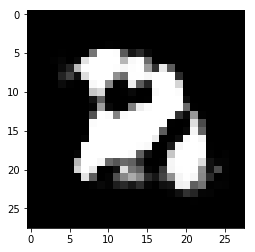

Loop: 933100, Generator_loss: -0.0030149, Discriminator_loss: 0.0016833
Loop: 933200, Generator_loss: -0.0037347, Discriminator_loss: 0.0036338
Loop: 933300, Generator_loss: -0.007364, Discriminator_loss: 0.0027009
Loop: 933400, Generator_loss: -0.011895, Discriminator_loss: 0.0038331
Loop: 933500, Generator_loss: -0.0070565, Discriminator_loss: 0.0014554
Loop: 933600, Generator_loss: -0.000741, Discriminator_loss: 0.0015665
Loop: 933700, Generator_loss: -0.011436, Discriminator_loss: 0.0028183
Loop: 933800, Generator_loss: -0.0080036, Discriminator_loss: 0.0027451
Loop: 933900, Generator_loss: -0.0040583, Discriminator_loss: 0.0038885
Loop: 934000, Generator_loss: -0.0062742, Discriminator_loss: 0.0014014


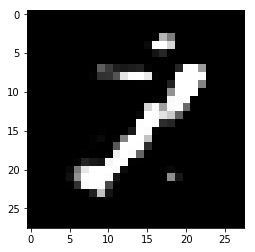

Loop: 934100, Generator_loss: -0.010162, Discriminator_loss: 0.0038012
Loop: 934200, Generator_loss: -0.003996, Discriminator_loss: 0.002511
Loop: 934300, Generator_loss: -0.012371, Discriminator_loss: -0.00053808
Loop: 934400, Generator_loss: -0.0051369, Discriminator_loss: 0.003296
Loop: 934500, Generator_loss: -0.0095624, Discriminator_loss: 0.0043865
Loop: 934600, Generator_loss: -0.0048501, Discriminator_loss: 0.0017724
Loop: 934700, Generator_loss: -0.0073541, Discriminator_loss: 0.0042084
Loop: 934800, Generator_loss: -0.0046245, Discriminator_loss: 0.0037683
Loop: 934900, Generator_loss: -0.0077322, Discriminator_loss: 0.0013027
Loop: 935000, Generator_loss: -0.0073558, Discriminator_loss: 0.0023733


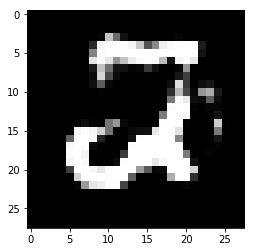

Loop: 935100, Generator_loss: -0.0076274, Discriminator_loss: 0.0024437
Loop: 935200, Generator_loss: -0.0021982, Discriminator_loss: 0.0034336
Loop: 935300, Generator_loss: -0.01337, Discriminator_loss: 0.0049727
Loop: 935400, Generator_loss: -0.011263, Discriminator_loss: 0.00078317
Loop: 935500, Generator_loss: -0.0055512, Discriminator_loss: 0.0020422
Loop: 935600, Generator_loss: -0.0061867, Discriminator_loss: 0.0014217
Loop: 935700, Generator_loss: -0.0067942, Discriminator_loss: 0.0022059
Loop: 935800, Generator_loss: -0.011823, Discriminator_loss: 0.001071
Loop: 935900, Generator_loss: -0.001034, Discriminator_loss: 0.0030358
Loop: 936000, Generator_loss: -0.0074215, Discriminator_loss: 0.0031008


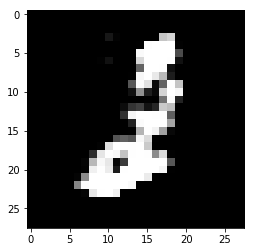

Loop: 936100, Generator_loss: -0.0075405, Discriminator_loss: 0.0018577
Loop: 936200, Generator_loss: -0.0030909, Discriminator_loss: 0.0020584
Loop: 936300, Generator_loss: -0.0050346, Discriminator_loss: 0.0021908
Loop: 936400, Generator_loss: -0.0062783, Discriminator_loss: 0.0030419
Loop: 936500, Generator_loss: -0.0076324, Discriminator_loss: 0.0040051
Loop: 936600, Generator_loss: -0.0083951, Discriminator_loss: 0.0017004
Loop: 936700, Generator_loss: -0.00080279, Discriminator_loss: 0.0017649
Loop: 936800, Generator_loss: -0.0064056, Discriminator_loss: 0.0025482
Loop: 936900, Generator_loss: -0.0071174, Discriminator_loss: 0.0042371
Loop: 937000, Generator_loss: -0.0040196, Discriminator_loss: 0.0031527


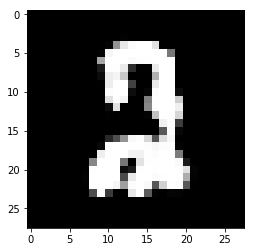

Loop: 937100, Generator_loss: -0.007002, Discriminator_loss: 0.002555
Loop: 937200, Generator_loss: -0.0063023, Discriminator_loss: 0.00082338
Loop: 937300, Generator_loss: -0.0037845, Discriminator_loss: 0.0029038
Loop: 937400, Generator_loss: -0.0034172, Discriminator_loss: 0.0011834
Loop: 937500, Generator_loss: -0.0043788, Discriminator_loss: 0.0014145
Loop: 937600, Generator_loss: -0.001721, Discriminator_loss: 0.0016492
Loop: 937700, Generator_loss: -0.011262, Discriminator_loss: 0.0012552
Loop: 937800, Generator_loss: -0.01088, Discriminator_loss: 0.0031994
Loop: 937900, Generator_loss: -0.00067434, Discriminator_loss: 0.0025724
Loop: 938000, Generator_loss: -0.0049686, Discriminator_loss: 0.0033847


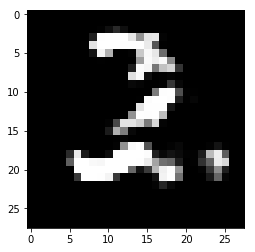

Loop: 938100, Generator_loss: -0.004585, Discriminator_loss: 0.001705
Loop: 938200, Generator_loss: -0.0053156, Discriminator_loss: 0.0018041
Loop: 938300, Generator_loss: -0.0038987, Discriminator_loss: 0.0054726
Loop: 938400, Generator_loss: -0.0059701, Discriminator_loss: 0.0017895
Loop: 938500, Generator_loss: -0.0056382, Discriminator_loss: 0.0030921
Loop: 938600, Generator_loss: -0.0064496, Discriminator_loss: 0.0054222
Loop: 938700, Generator_loss: -0.0057457, Discriminator_loss: 0.0014943
Loop: 938800, Generator_loss: -0.007165, Discriminator_loss: 0.0035193
Loop: 938900, Generator_loss: -0.0045999, Discriminator_loss: 0.0022871
Loop: 939000, Generator_loss: -0.0078285, Discriminator_loss: 0.0034988


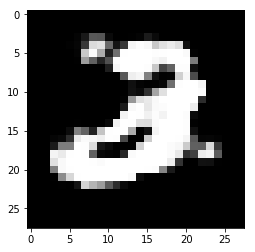

Loop: 939100, Generator_loss: -0.0059326, Discriminator_loss: 0.0027595
Loop: 939200, Generator_loss: -0.0058109, Discriminator_loss: 0.0046239
Loop: 939300, Generator_loss: -0.00758, Discriminator_loss: 0.0012001
Loop: 939400, Generator_loss: -0.0037325, Discriminator_loss: 0.0027238
Loop: 939500, Generator_loss: -0.0083503, Discriminator_loss: 0.0037154
Loop: 939600, Generator_loss: -0.0035604, Discriminator_loss: 0.0023926
Loop: 939700, Generator_loss: -0.0090885, Discriminator_loss: 0.00327
Loop: 939800, Generator_loss: -0.0018166, Discriminator_loss: 0.0031685
Loop: 939900, Generator_loss: -0.0067358, Discriminator_loss: 0.0032182
Loop: 940000, Generator_loss: -0.0057, Discriminator_loss: 0.0036188


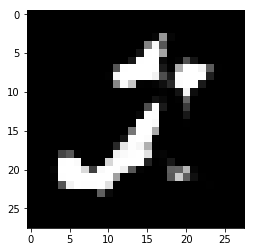

Loop: 940100, Generator_loss: -0.0036496, Discriminator_loss: 0.0028742
Loop: 940200, Generator_loss: -0.0054464, Discriminator_loss: 0.00076389
Loop: 940300, Generator_loss: 0.0010249, Discriminator_loss: 0.0022757
Loop: 940400, Generator_loss: -0.01197, Discriminator_loss: 0.0015096
Loop: 940500, Generator_loss: -0.0035935, Discriminator_loss: 0.0017277
Loop: 940600, Generator_loss: -0.0069675, Discriminator_loss: 0.00082323
Loop: 940700, Generator_loss: -0.0035993, Discriminator_loss: 0.0028684
Loop: 940800, Generator_loss: -0.0064173, Discriminator_loss: 0.0028961
Loop: 940900, Generator_loss: -0.0045857, Discriminator_loss: 0.0024743
Loop: 941000, Generator_loss: -0.0099725, Discriminator_loss: 0.0025075


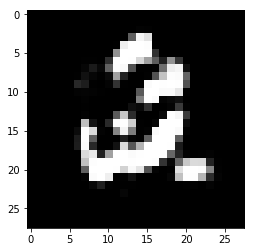

Loop: 941100, Generator_loss: -0.0090365, Discriminator_loss: 0.0021824
Loop: 941200, Generator_loss: -0.010073, Discriminator_loss: 0.0019988
Loop: 941300, Generator_loss: -0.0065795, Discriminator_loss: 0.0034087
Loop: 941400, Generator_loss: -0.01136, Discriminator_loss: 0.0010496
Loop: 941500, Generator_loss: -0.0058138, Discriminator_loss: 0.0018301
Loop: 941600, Generator_loss: -0.0040366, Discriminator_loss: 0.0020912
Loop: 941700, Generator_loss: -0.0072615, Discriminator_loss: 0.0036089
Loop: 941800, Generator_loss: -0.004534, Discriminator_loss: 0.003615
Loop: 941900, Generator_loss: -0.0066628, Discriminator_loss: 0.00073652
Loop: 942000, Generator_loss: -0.0072364, Discriminator_loss: 0.002556


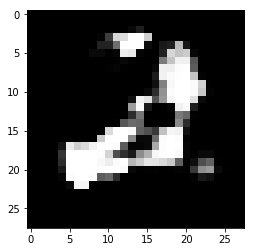

Loop: 942100, Generator_loss: -0.0042382, Discriminator_loss: 0.0029664
Loop: 942200, Generator_loss: -0.0079654, Discriminator_loss: 0.00099831
Loop: 942300, Generator_loss: -0.0066387, Discriminator_loss: 0.0010643
Loop: 942400, Generator_loss: -0.006256, Discriminator_loss: 0.0032045
Loop: 942500, Generator_loss: -0.0059703, Discriminator_loss: 0.0023195
Loop: 942600, Generator_loss: -0.0039667, Discriminator_loss: 0.0013745
Loop: 942700, Generator_loss: -0.0026156, Discriminator_loss: 0.0038841
Loop: 942800, Generator_loss: -0.0078202, Discriminator_loss: 0.00078786
Loop: 942900, Generator_loss: -0.003339, Discriminator_loss: 0.0018423
Loop: 943000, Generator_loss: -0.0089708, Discriminator_loss: 0.0033062


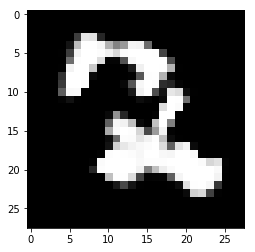

Loop: 943100, Generator_loss: -0.002241, Discriminator_loss: 0.0035435
Loop: 943200, Generator_loss: -0.0049168, Discriminator_loss: 0.00085578
Loop: 943300, Generator_loss: -0.0065287, Discriminator_loss: 0.0026569
Loop: 943400, Generator_loss: -0.011131, Discriminator_loss: 0.001648
Loop: 943500, Generator_loss: -0.0047614, Discriminator_loss: 0.0019693
Loop: 943600, Generator_loss: -0.010953, Discriminator_loss: 0.00062904
Loop: 943700, Generator_loss: 0.00069499, Discriminator_loss: 0.0021574
Loop: 943800, Generator_loss: -0.0074679, Discriminator_loss: 0.0017142
Loop: 943900, Generator_loss: -0.0075566, Discriminator_loss: 0.0019616
Loop: 944000, Generator_loss: -0.00080887, Discriminator_loss: 0.0045885


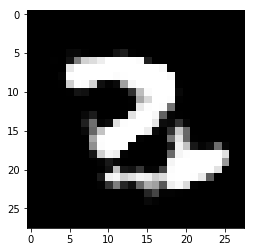

Loop: 944100, Generator_loss: -0.006153, Discriminator_loss: -1.5199e-05
Loop: 944200, Generator_loss: -0.0088591, Discriminator_loss: 0.0015425
Loop: 944300, Generator_loss: -0.003982, Discriminator_loss: 0.0028987
Loop: 944400, Generator_loss: -0.0073506, Discriminator_loss: 0.0031468
Loop: 944500, Generator_loss: -0.0036908, Discriminator_loss: 0.0018271
Loop: 944600, Generator_loss: -0.0036254, Discriminator_loss: 0.0035359
Loop: 944700, Generator_loss: 0.0005875, Discriminator_loss: 0.0049627
Loop: 944800, Generator_loss: -0.0063889, Discriminator_loss: 0.0024463
Loop: 944900, Generator_loss: -0.0030354, Discriminator_loss: 0.0023965
Loop: 945000, Generator_loss: -0.0089059, Discriminator_loss: 0.0023246


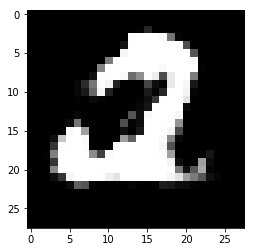

Loop: 945100, Generator_loss: -0.0020248, Discriminator_loss: 0.0024234
Loop: 945200, Generator_loss: -0.0042942, Discriminator_loss: 0.003841
Loop: 945300, Generator_loss: -0.0079086, Discriminator_loss: 0.0040146
Loop: 945400, Generator_loss: -0.0058459, Discriminator_loss: 0.0031438
Loop: 945500, Generator_loss: -0.0096983, Discriminator_loss: 0.0017528
Loop: 945600, Generator_loss: -0.001275, Discriminator_loss: 0.0011436
Loop: 945700, Generator_loss: -0.0049959, Discriminator_loss: 0.0016343
Loop: 945800, Generator_loss: -0.0041041, Discriminator_loss: 0.0023808
Loop: 945900, Generator_loss: -0.0023466, Discriminator_loss: 0.0012444
Loop: 946000, Generator_loss: -0.0066124, Discriminator_loss: 0.0046489


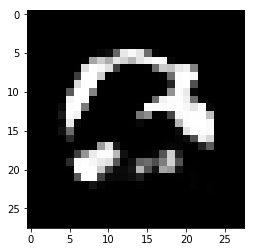

Loop: 946100, Generator_loss: -0.0090744, Discriminator_loss: 0.0026799
Loop: 946200, Generator_loss: -0.0064483, Discriminator_loss: 0.001876
Loop: 946300, Generator_loss: 0.0012658, Discriminator_loss: 0.0044759
Loop: 946400, Generator_loss: -0.0065415, Discriminator_loss: 0.0024893
Loop: 946500, Generator_loss: -0.0056543, Discriminator_loss: 0.0010958
Loop: 946600, Generator_loss: -0.013805, Discriminator_loss: 0.0028351
Loop: 946700, Generator_loss: -0.0054821, Discriminator_loss: -0.0001588
Loop: 946800, Generator_loss: -0.0037146, Discriminator_loss: 0.0031955
Loop: 946900, Generator_loss: -0.0096953, Discriminator_loss: 0.0027742
Loop: 947000, Generator_loss: -0.0051975, Discriminator_loss: 0.0026087


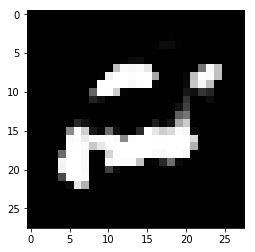

Loop: 947100, Generator_loss: -0.0059326, Discriminator_loss: 0.0022744
Loop: 947200, Generator_loss: -0.0079591, Discriminator_loss: 0.0017835
Loop: 947300, Generator_loss: -0.0060677, Discriminator_loss: 0.00094336
Loop: 947400, Generator_loss: -0.012302, Discriminator_loss: 0.0037037
Loop: 947500, Generator_loss: -0.0074367, Discriminator_loss: 0.0029546
Loop: 947600, Generator_loss: -0.0058749, Discriminator_loss: 0.0019567
Loop: 947700, Generator_loss: -0.0052282, Discriminator_loss: 0.0043294
Loop: 947800, Generator_loss: -0.0034672, Discriminator_loss: 0.0025132
Loop: 947900, Generator_loss: -0.0038505, Discriminator_loss: 0.0025881
Loop: 948000, Generator_loss: -0.0068889, Discriminator_loss: 0.00069219


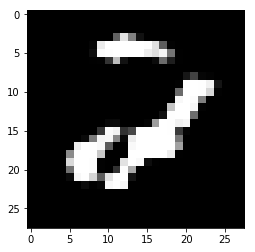

Loop: 948100, Generator_loss: -0.0065913, Discriminator_loss: 0.0016354
Loop: 948200, Generator_loss: -0.003116, Discriminator_loss: 0.0036874
Loop: 948300, Generator_loss: -0.003942, Discriminator_loss: 0.0026669
Loop: 948400, Generator_loss: -0.0056953, Discriminator_loss: 0.0013562
Loop: 948500, Generator_loss: -0.007172, Discriminator_loss: 0.0042047
Loop: 948600, Generator_loss: -0.0055813, Discriminator_loss: 0.002269
Loop: 948700, Generator_loss: -0.0048261, Discriminator_loss: 0.001404
Loop: 948800, Generator_loss: -0.0088516, Discriminator_loss: 0.0029043
Loop: 948900, Generator_loss: -0.0044373, Discriminator_loss: 0.0027202
Loop: 949000, Generator_loss: -0.0040441, Discriminator_loss: 0.0045669


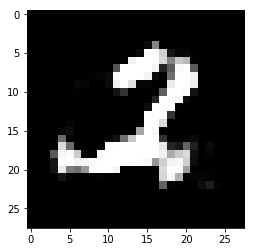

Loop: 949100, Generator_loss: -0.012896, Discriminator_loss: 0.0026963
Loop: 949200, Generator_loss: -0.0056799, Discriminator_loss: 0.0025873
Loop: 949300, Generator_loss: -0.008514, Discriminator_loss: 0.0030916
Loop: 949400, Generator_loss: -0.0054165, Discriminator_loss: 0.0034428
Loop: 949500, Generator_loss: -0.0034118, Discriminator_loss: 0.0026915
Loop: 949600, Generator_loss: 0.00059663, Discriminator_loss: 0.0020481
Loop: 949700, Generator_loss: -0.0072695, Discriminator_loss: 0.001542
Loop: 949800, Generator_loss: -0.0086564, Discriminator_loss: 0.0020625
Loop: 949900, Generator_loss: -0.0057441, Discriminator_loss: -0.0011653
Loop: 950000, Generator_loss: -0.0039253, Discriminator_loss: 0.0027895


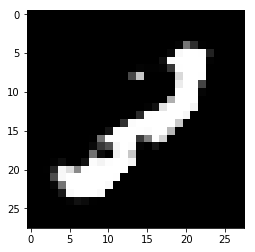

Loop: 950100, Generator_loss: -0.0096625, Discriminator_loss: 0.0022692
Loop: 950200, Generator_loss: -0.0098747, Discriminator_loss: 0.0030937
Loop: 950300, Generator_loss: -0.0091253, Discriminator_loss: 0.0015385
Loop: 950400, Generator_loss: -0.0054328, Discriminator_loss: 0.0026439
Loop: 950500, Generator_loss: -0.011208, Discriminator_loss: 0.0034865
Loop: 950600, Generator_loss: -0.0045827, Discriminator_loss: 0.004205
Loop: 950700, Generator_loss: -0.0067346, Discriminator_loss: 0.0022851
Loop: 950800, Generator_loss: 0.00025489, Discriminator_loss: 0.0027634
Loop: 950900, Generator_loss: -0.011681, Discriminator_loss: 0.0040705
Loop: 951000, Generator_loss: -0.0062716, Discriminator_loss: 0.0020071


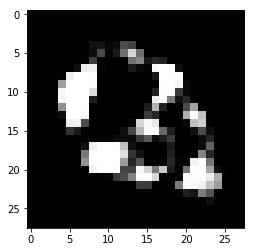

Loop: 951100, Generator_loss: -0.0029939, Discriminator_loss: 0.0021423
Loop: 951200, Generator_loss: -0.0060688, Discriminator_loss: 0.0021194
Loop: 951300, Generator_loss: -0.0026969, Discriminator_loss: 0.0022555
Loop: 951400, Generator_loss: -0.0092114, Discriminator_loss: 0.0015407
Loop: 951500, Generator_loss: -0.0035953, Discriminator_loss: 0.0017489
Loop: 951600, Generator_loss: -0.0020973, Discriminator_loss: 0.00064298
Loop: 951700, Generator_loss: -0.0048681, Discriminator_loss: 0.0041465
Loop: 951800, Generator_loss: -0.0042889, Discriminator_loss: 0.0028709
Loop: 951900, Generator_loss: -0.0045843, Discriminator_loss: 0.0038192
Loop: 952000, Generator_loss: -0.0017103, Discriminator_loss: 0.0040321


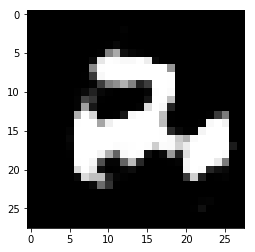

Loop: 952100, Generator_loss: -0.0068144, Discriminator_loss: 0.0030275
Loop: 952200, Generator_loss: -0.0011232, Discriminator_loss: 0.0016101
Loop: 952300, Generator_loss: -0.0051084, Discriminator_loss: 0.0030679
Loop: 952400, Generator_loss: -0.0033576, Discriminator_loss: 0.0033367
Loop: 952500, Generator_loss: -0.0027192, Discriminator_loss: 0.0051373
Loop: 952600, Generator_loss: -0.0031901, Discriminator_loss: 0.0024296
Loop: 952700, Generator_loss: -0.0051493, Discriminator_loss: 0.0020619
Loop: 952800, Generator_loss: -0.0082996, Discriminator_loss: 0.0047395
Loop: 952900, Generator_loss: -0.0054706, Discriminator_loss: 0.002942
Loop: 953000, Generator_loss: -0.013643, Discriminator_loss: 0.0057267


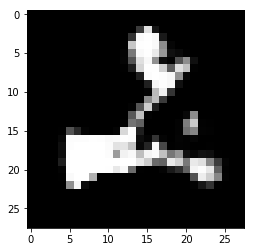

Loop: 953100, Generator_loss: -0.0057751, Discriminator_loss: 0.0028245
Loop: 953200, Generator_loss: -0.0036447, Discriminator_loss: 0.0029124
Loop: 953300, Generator_loss: -0.0051187, Discriminator_loss: 0.00422
Loop: 953400, Generator_loss: -0.0033111, Discriminator_loss: 0.0046349
Loop: 953500, Generator_loss: -0.0055934, Discriminator_loss: 0.0044701
Loop: 953600, Generator_loss: -0.005277, Discriminator_loss: 0.0037896
Loop: 953700, Generator_loss: -0.0063951, Discriminator_loss: 0.0022161
Loop: 953800, Generator_loss: 0.00034881, Discriminator_loss: 0.0025851
Loop: 953900, Generator_loss: 0.0014622, Discriminator_loss: 0.0019783
Loop: 954000, Generator_loss: -0.0068508, Discriminator_loss: -0.00023899


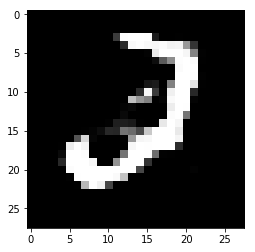

Loop: 954100, Generator_loss: -0.0033522, Discriminator_loss: 0.0026928
Loop: 954200, Generator_loss: -0.0001604, Discriminator_loss: 0.0035039
Loop: 954300, Generator_loss: -0.0061784, Discriminator_loss: 0.0035912
Loop: 954400, Generator_loss: -0.0081907, Discriminator_loss: 0.0036692
Loop: 954500, Generator_loss: -0.0085703, Discriminator_loss: 0.0026501
Loop: 954600, Generator_loss: -0.0057233, Discriminator_loss: 0.0019072
Loop: 954700, Generator_loss: -0.0042049, Discriminator_loss: 0.0045643
Loop: 954800, Generator_loss: -0.0067324, Discriminator_loss: 0.0025242
Loop: 954900, Generator_loss: -0.0090608, Discriminator_loss: 0.0020149
Loop: 955000, Generator_loss: -0.0074232, Discriminator_loss: 0.0035103


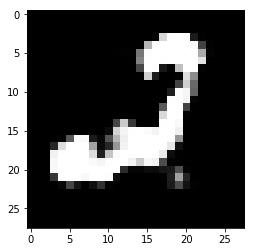

Loop: 955100, Generator_loss: -0.0028012, Discriminator_loss: 0.0038181
Loop: 955200, Generator_loss: -0.0057657, Discriminator_loss: 0.0028599
Loop: 955300, Generator_loss: -0.0056387, Discriminator_loss: 0.0031484
Loop: 955400, Generator_loss: -0.0073655, Discriminator_loss: -0.0007553
Loop: 955500, Generator_loss: -0.0054624, Discriminator_loss: 0.0017878
Loop: 955600, Generator_loss: -0.0052261, Discriminator_loss: 0.0026577
Loop: 955700, Generator_loss: -0.003504, Discriminator_loss: 0.0022315
Loop: 955800, Generator_loss: -0.0062933, Discriminator_loss: 0.0024958
Loop: 955900, Generator_loss: -0.0050639, Discriminator_loss: 0.0029402
Loop: 956000, Generator_loss: -0.00089725, Discriminator_loss: 0.0020385


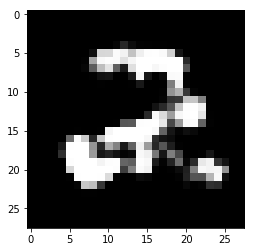

Loop: 956100, Generator_loss: -0.0066439, Discriminator_loss: 0.0037514
Loop: 956200, Generator_loss: -0.0057603, Discriminator_loss: 0.0030425
Loop: 956300, Generator_loss: -0.0085141, Discriminator_loss: 0.0026244
Loop: 956400, Generator_loss: -0.011071, Discriminator_loss: -0.00063518
Loop: 956500, Generator_loss: -0.0068198, Discriminator_loss: 0.0035263
Loop: 956600, Generator_loss: -0.012156, Discriminator_loss: 0.0025805
Loop: 956700, Generator_loss: -0.012071, Discriminator_loss: 0.0020687
Loop: 956800, Generator_loss: -0.005848, Discriminator_loss: 0.00026451
Loop: 956900, Generator_loss: -0.0041156, Discriminator_loss: 0.0045253
Loop: 957000, Generator_loss: -0.001047, Discriminator_loss: 0.0038503


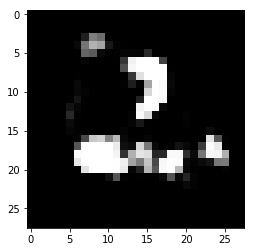

Loop: 957100, Generator_loss: -0.0033234, Discriminator_loss: 0.002919
Loop: 957200, Generator_loss: -0.0044534, Discriminator_loss: 0.0016653
Loop: 957300, Generator_loss: -0.0030644, Discriminator_loss: 0.0031118
Loop: 957400, Generator_loss: -0.0071088, Discriminator_loss: 0.0029021
Loop: 957500, Generator_loss: -0.0058359, Discriminator_loss: 0.0030344
Loop: 957600, Generator_loss: -0.0050218, Discriminator_loss: 0.0016685
Loop: 957700, Generator_loss: -0.0095379, Discriminator_loss: 0.0032517
Loop: 957800, Generator_loss: -0.0051056, Discriminator_loss: 0.0033973
Loop: 957900, Generator_loss: -0.0050942, Discriminator_loss: 0.0021751
Loop: 958000, Generator_loss: -0.010064, Discriminator_loss: 0.002588


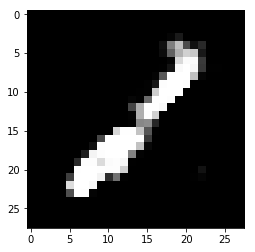

Loop: 958100, Generator_loss: -0.0067489, Discriminator_loss: 0.0013503
Loop: 958200, Generator_loss: -0.0059334, Discriminator_loss: 0.0014433
Loop: 958300, Generator_loss: -0.0065982, Discriminator_loss: 0.0027406
Loop: 958400, Generator_loss: -0.0033392, Discriminator_loss: 0.0033375
Loop: 958500, Generator_loss: -0.0073315, Discriminator_loss: 0.0030633
Loop: 958600, Generator_loss: 0.00075997, Discriminator_loss: 0.0029059
Loop: 958700, Generator_loss: -0.0048702, Discriminator_loss: 0.003069
Loop: 958800, Generator_loss: -0.0047334, Discriminator_loss: 0.0029256
Loop: 958900, Generator_loss: -0.0083455, Discriminator_loss: 0.0017724
Loop: 959000, Generator_loss: -0.011758, Discriminator_loss: 0.0026905


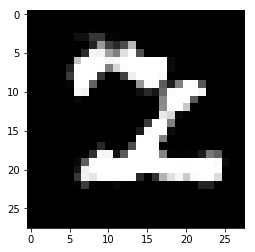

Loop: 959100, Generator_loss: -0.014178, Discriminator_loss: 0.0010771
Loop: 959200, Generator_loss: -0.0036259, Discriminator_loss: 0.00065049
Loop: 959300, Generator_loss: -0.0059799, Discriminator_loss: 0.0032314
Loop: 959400, Generator_loss: -0.0016376, Discriminator_loss: 0.0025413
Loop: 959500, Generator_loss: -0.0055828, Discriminator_loss: 0.0033633
Loop: 959600, Generator_loss: -0.0069954, Discriminator_loss: 0.0028022
Loop: 959700, Generator_loss: -0.0089814, Discriminator_loss: 0.004821
Loop: 959800, Generator_loss: -0.0056158, Discriminator_loss: 0.0020439
Loop: 959900, Generator_loss: -0.0036975, Discriminator_loss: 0.0011011
Loop: 960000, Generator_loss: -0.010255, Discriminator_loss: 0.00033944


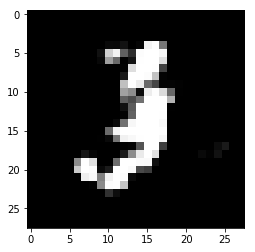

Loop: 960100, Generator_loss: -0.0050922, Discriminator_loss: 0.0045772
Loop: 960200, Generator_loss: -0.008147, Discriminator_loss: 0.0033489
Loop: 960300, Generator_loss: -0.0069766, Discriminator_loss: 0.0027752
Loop: 960400, Generator_loss: -0.0051916, Discriminator_loss: 0.0046551
Loop: 960500, Generator_loss: -0.0042308, Discriminator_loss: 0.0033195
Loop: 960600, Generator_loss: -0.0055431, Discriminator_loss: 0.0012676
Loop: 960700, Generator_loss: -0.0063758, Discriminator_loss: 0.0027642
Loop: 960800, Generator_loss: -0.0083506, Discriminator_loss: 0.0033216
Loop: 960900, Generator_loss: -0.0089212, Discriminator_loss: 0.003473
Loop: 961000, Generator_loss: -0.004021, Discriminator_loss: 0.002802


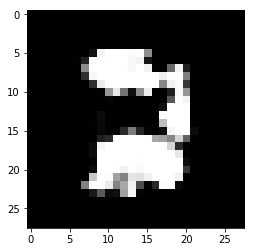

Loop: 961100, Generator_loss: -0.0070351, Discriminator_loss: 0.0037313
Loop: 961200, Generator_loss: -0.0024772, Discriminator_loss: 0.0032454
Loop: 961300, Generator_loss: -0.007476, Discriminator_loss: 0.0031114
Loop: 961400, Generator_loss: -0.0051473, Discriminator_loss: 0.0021651
Loop: 961500, Generator_loss: -0.0043548, Discriminator_loss: 0.0025286
Loop: 961600, Generator_loss: -0.010995, Discriminator_loss: 0.00084332
Loop: 961700, Generator_loss: -0.0078333, Discriminator_loss: 0.0038774
Loop: 961800, Generator_loss: -0.00407, Discriminator_loss: 0.0023494
Loop: 961900, Generator_loss: -0.0077855, Discriminator_loss: 0.0021669
Loop: 962000, Generator_loss: -0.0077637, Discriminator_loss: 0.0038341


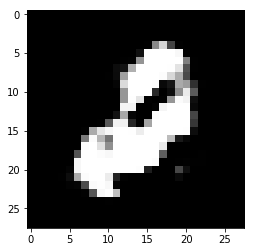

Loop: 962100, Generator_loss: -0.0048609, Discriminator_loss: 0.002373
Loop: 962200, Generator_loss: -0.0029717, Discriminator_loss: 0.002067
Loop: 962300, Generator_loss: -0.0039133, Discriminator_loss: 0.0031594
Loop: 962400, Generator_loss: -0.0014602, Discriminator_loss: 0.0022966
Loop: 962500, Generator_loss: -0.0090421, Discriminator_loss: 0.0045362
Loop: 962600, Generator_loss: -0.011311, Discriminator_loss: 0.0018098
Loop: 962700, Generator_loss: -0.0088827, Discriminator_loss: 0.0023629
Loop: 962800, Generator_loss: -0.0042425, Discriminator_loss: 0.0012677
Loop: 962900, Generator_loss: -0.006154, Discriminator_loss: 0.00074914
Loop: 963000, Generator_loss: -0.0052631, Discriminator_loss: 0.001179


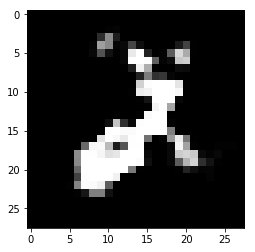

Loop: 963100, Generator_loss: -0.0069053, Discriminator_loss: 0.0044533
Loop: 963200, Generator_loss: -0.0037636, Discriminator_loss: 0.0022648
Loop: 963300, Generator_loss: -0.0076998, Discriminator_loss: 0.003018
Loop: 963400, Generator_loss: -0.008828, Discriminator_loss: 0.0018218
Loop: 963500, Generator_loss: -7.807e-05, Discriminator_loss: 0.0024955
Loop: 963600, Generator_loss: -0.0048346, Discriminator_loss: 0.0020031
Loop: 963700, Generator_loss: -0.01232, Discriminator_loss: 0.0034624
Loop: 963800, Generator_loss: -0.0054055, Discriminator_loss: 0.00037979
Loop: 963900, Generator_loss: -0.0038903, Discriminator_loss: 0.002284
Loop: 964000, Generator_loss: -0.0064236, Discriminator_loss: 0.0019808


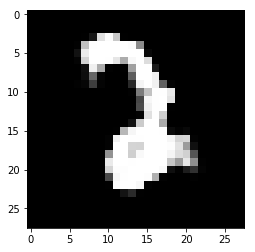

Loop: 964100, Generator_loss: -0.0066539, Discriminator_loss: 0.0024337
Loop: 964200, Generator_loss: -0.00027344, Discriminator_loss: 0.0025115
Loop: 964300, Generator_loss: -0.0051404, Discriminator_loss: 0.0023551
Loop: 964400, Generator_loss: -0.0049936, Discriminator_loss: 0.0036514
Loop: 964500, Generator_loss: -0.0061987, Discriminator_loss: 0.001291
Loop: 964600, Generator_loss: -0.0071069, Discriminator_loss: 0.0012609
Loop: 964700, Generator_loss: -0.0053366, Discriminator_loss: 0.0023766
Loop: 964800, Generator_loss: -0.0053171, Discriminator_loss: 0.0023116
Loop: 964900, Generator_loss: -0.0022331, Discriminator_loss: 0.0025906
Loop: 965000, Generator_loss: -0.0021185, Discriminator_loss: 0.0036178


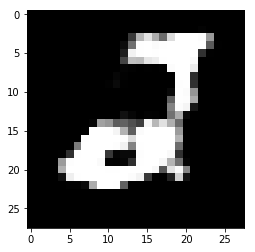

Loop: 965100, Generator_loss: -0.0088514, Discriminator_loss: 0.0017176
Loop: 965200, Generator_loss: -0.0096188, Discriminator_loss: 0.0025392
Loop: 965300, Generator_loss: -0.006175, Discriminator_loss: 0.001248
Loop: 965400, Generator_loss: -0.0070269, Discriminator_loss: 0.0037485
Loop: 965500, Generator_loss: -0.0090407, Discriminator_loss: 0.0035398
Loop: 965600, Generator_loss: -0.004506, Discriminator_loss: 0.00049471
Loop: 965700, Generator_loss: -0.0085054, Discriminator_loss: 0.0022297
Loop: 965800, Generator_loss: -0.0020923, Discriminator_loss: 0.0024145
Loop: 965900, Generator_loss: -0.0034916, Discriminator_loss: 0.00068156
Loop: 966000, Generator_loss: -0.0060789, Discriminator_loss: 0.0043012


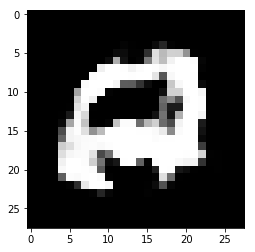

Loop: 966100, Generator_loss: -0.0026453, Discriminator_loss: 0.0012263
Loop: 966200, Generator_loss: -0.004242, Discriminator_loss: 0.003691
Loop: 966300, Generator_loss: -0.005187, Discriminator_loss: 0.0018272
Loop: 966400, Generator_loss: -0.0014861, Discriminator_loss: 0.0037743
Loop: 966500, Generator_loss: -0.0050674, Discriminator_loss: 0.0026983
Loop: 966600, Generator_loss: -0.0040393, Discriminator_loss: 0.002286
Loop: 966700, Generator_loss: -0.0088185, Discriminator_loss: 0.001657
Loop: 966800, Generator_loss: -0.0080345, Discriminator_loss: 0.0013856
Loop: 966900, Generator_loss: -0.0058869, Discriminator_loss: 0.0028644
Loop: 967000, Generator_loss: -0.0049921, Discriminator_loss: 0.001676


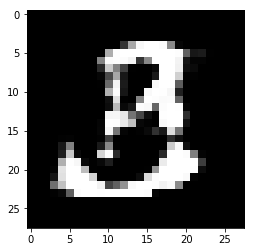

Loop: 967100, Generator_loss: -0.0067353, Discriminator_loss: 0.0024353
Loop: 967200, Generator_loss: -0.0035429, Discriminator_loss: 0.0014285
Loop: 967300, Generator_loss: -0.001345, Discriminator_loss: 0.0018077
Loop: 967400, Generator_loss: -0.0020638, Discriminator_loss: 0.0029527
Loop: 967500, Generator_loss: -0.0045315, Discriminator_loss: 0.0024713
Loop: 967600, Generator_loss: -0.0042664, Discriminator_loss: 0.0015165
Loop: 967700, Generator_loss: -0.0034464, Discriminator_loss: 0.0022347
Loop: 967800, Generator_loss: -0.0024892, Discriminator_loss: 0.00064006
Loop: 967900, Generator_loss: -0.0041254, Discriminator_loss: 0.0043205
Loop: 968000, Generator_loss: -0.0098775, Discriminator_loss: 0.00065535


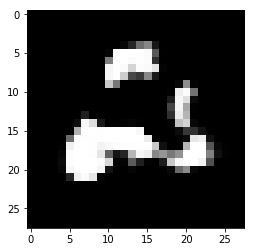

Loop: 968100, Generator_loss: -0.0049914, Discriminator_loss: 0.0030172
Loop: 968200, Generator_loss: -0.008479, Discriminator_loss: 0.0033509
Loop: 968300, Generator_loss: -0.0028007, Discriminator_loss: 0.0024724
Loop: 968400, Generator_loss: -0.0070895, Discriminator_loss: 0.0031366
Loop: 968500, Generator_loss: -0.0069587, Discriminator_loss: 0.0030804
Loop: 968600, Generator_loss: -0.0022712, Discriminator_loss: 0.002772
Loop: 968700, Generator_loss: -0.0037223, Discriminator_loss: 0.0026349
Loop: 968800, Generator_loss: -0.0067942, Discriminator_loss: -0.00028508
Loop: 968900, Generator_loss: -0.0068623, Discriminator_loss: 0.0022207
Loop: 969000, Generator_loss: -0.0022588, Discriminator_loss: 0.0034123


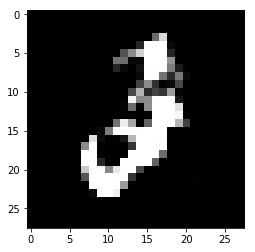

Loop: 969100, Generator_loss: -0.0011774, Discriminator_loss: 0.0030586
Loop: 969200, Generator_loss: -0.00054265, Discriminator_loss: 0.0011518
Loop: 969300, Generator_loss: -0.0061536, Discriminator_loss: 0.00074395
Loop: 969400, Generator_loss: -0.0061396, Discriminator_loss: 0.0022623
Loop: 969500, Generator_loss: -0.0068505, Discriminator_loss: 0.001319
Loop: 969600, Generator_loss: -0.0046438, Discriminator_loss: 0.002148
Loop: 969700, Generator_loss: -0.003745, Discriminator_loss: 0.0023161
Loop: 969800, Generator_loss: -0.0036009, Discriminator_loss: 0.0029705
Loop: 969900, Generator_loss: -0.0047282, Discriminator_loss: 0.0022091
Loop: 970000, Generator_loss: -0.0088286, Discriminator_loss: 0.0028835


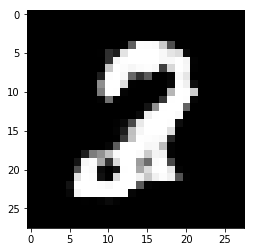

Loop: 970100, Generator_loss: -0.0080915, Discriminator_loss: 0.0023196
Loop: 970200, Generator_loss: -0.0094496, Discriminator_loss: 0.0030593
Loop: 970300, Generator_loss: -0.003559, Discriminator_loss: 0.0011438
Loop: 970400, Generator_loss: -0.010138, Discriminator_loss: 0.0022721
Loop: 970500, Generator_loss: -0.00031162, Discriminator_loss: 0.0019406
Loop: 970600, Generator_loss: -0.0021546, Discriminator_loss: 0.0019207
Loop: 970700, Generator_loss: -0.0063654, Discriminator_loss: 0.003097
Loop: 970800, Generator_loss: -0.0063646, Discriminator_loss: 0.004262
Loop: 970900, Generator_loss: -0.0083268, Discriminator_loss: 0.0017319
Loop: 971000, Generator_loss: -0.0036678, Discriminator_loss: -0.00015835


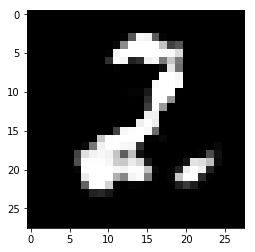

Loop: 971100, Generator_loss: -0.0028628, Discriminator_loss: 0.0021907
Loop: 971200, Generator_loss: -0.0042345, Discriminator_loss: 0.004184
Loop: 971300, Generator_loss: -0.0043627, Discriminator_loss: 0.001443
Loop: 971400, Generator_loss: -0.0048535, Discriminator_loss: 0.00051315
Loop: 971500, Generator_loss: -0.0055751, Discriminator_loss: 0.0033526
Loop: 971600, Generator_loss: -0.010326, Discriminator_loss: 0.0026963
Loop: 971700, Generator_loss: -0.010234, Discriminator_loss: 0.004066
Loop: 971800, Generator_loss: -0.0060731, Discriminator_loss: 0.0027605
Loop: 971900, Generator_loss: -0.0051166, Discriminator_loss: 0.0023618
Loop: 972000, Generator_loss: -0.0022784, Discriminator_loss: 0.0019712


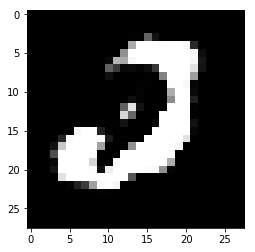

Loop: 972100, Generator_loss: -0.005865, Discriminator_loss: 0.0027871
Loop: 972200, Generator_loss: -0.0075343, Discriminator_loss: 0.0041441
Loop: 972300, Generator_loss: -0.0089499, Discriminator_loss: 0.0022747
Loop: 972400, Generator_loss: -0.010261, Discriminator_loss: 0.00055222
Loop: 972500, Generator_loss: -0.0065945, Discriminator_loss: 0.00095496
Loop: 972600, Generator_loss: -0.0067357, Discriminator_loss: 0.0031441
Loop: 972700, Generator_loss: -0.0093765, Discriminator_loss: 0.003702
Loop: 972800, Generator_loss: -0.0081544, Discriminator_loss: 0.001918
Loop: 972900, Generator_loss: -0.0049977, Discriminator_loss: 0.0017036
Loop: 973000, Generator_loss: -0.0051928, Discriminator_loss: 0.0036038


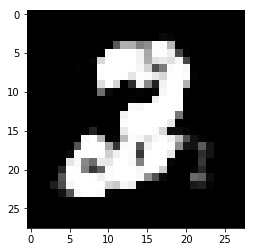

Loop: 973100, Generator_loss: -0.0057369, Discriminator_loss: 0.0034647
Loop: 973200, Generator_loss: -0.0045486, Discriminator_loss: 0.0028777
Loop: 973300, Generator_loss: -0.0074438, Discriminator_loss: 0.0014174
Loop: 973400, Generator_loss: -0.0093981, Discriminator_loss: 0.0024277
Loop: 973500, Generator_loss: -0.0056653, Discriminator_loss: 0.0025401
Loop: 973600, Generator_loss: -0.0049785, Discriminator_loss: 0.0015349
Loop: 973700, Generator_loss: -0.0023337, Discriminator_loss: 0.0012047
Loop: 973800, Generator_loss: -0.005115, Discriminator_loss: 0.003641
Loop: 973900, Generator_loss: -0.0037, Discriminator_loss: 0.0034471
Loop: 974000, Generator_loss: -0.0048636, Discriminator_loss: 0.002777


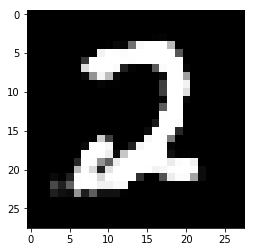

Loop: 974100, Generator_loss: 0.0021768, Discriminator_loss: 0.0039417
Loop: 974200, Generator_loss: -0.0051409, Discriminator_loss: 0.0017538
Loop: 974300, Generator_loss: -0.0071561, Discriminator_loss: 0.00089993
Loop: 974400, Generator_loss: -0.0084774, Discriminator_loss: 0.0026558
Loop: 974500, Generator_loss: -0.0052142, Discriminator_loss: 0.0019659
Loop: 974600, Generator_loss: -0.0057189, Discriminator_loss: 0.0040154
Loop: 974700, Generator_loss: -0.0026434, Discriminator_loss: 0.0036573
Loop: 974800, Generator_loss: -0.0080104, Discriminator_loss: 0.0042234
Loop: 974900, Generator_loss: -0.0063319, Discriminator_loss: 0.0015184
Loop: 975000, Generator_loss: -0.0043049, Discriminator_loss: 0.0029106


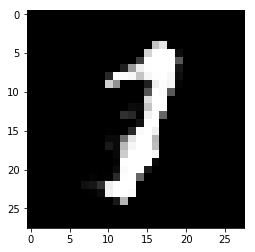

Loop: 975100, Generator_loss: -0.0093145, Discriminator_loss: 0.0022655
Loop: 975200, Generator_loss: -0.0059346, Discriminator_loss: 0.0020198
Loop: 975300, Generator_loss: -0.0044794, Discriminator_loss: 0.0017465
Loop: 975400, Generator_loss: -0.0060482, Discriminator_loss: 0.0037306
Loop: 975500, Generator_loss: -0.0043174, Discriminator_loss: 0.0025729
Loop: 975600, Generator_loss: -0.011621, Discriminator_loss: 0.0028112
Loop: 975700, Generator_loss: -0.0069913, Discriminator_loss: 0.0016444
Loop: 975800, Generator_loss: -0.0063792, Discriminator_loss: 0.0031644
Loop: 975900, Generator_loss: -0.0094359, Discriminator_loss: 0.0042048
Loop: 976000, Generator_loss: -0.0061313, Discriminator_loss: 0.0028133


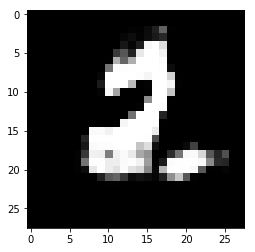

Loop: 976100, Generator_loss: -0.0021832, Discriminator_loss: 0.0019162
Loop: 976200, Generator_loss: -0.0047421, Discriminator_loss: 0.0039333
Loop: 976300, Generator_loss: -0.0010326, Discriminator_loss: 0.0024963
Loop: 976400, Generator_loss: -0.0022993, Discriminator_loss: 0.0037107
Loop: 976500, Generator_loss: -0.0054234, Discriminator_loss: 0.0030243
Loop: 976600, Generator_loss: -0.0093729, Discriminator_loss: 0.0048519
Loop: 976700, Generator_loss: -0.0054601, Discriminator_loss: 0.0022172
Loop: 976800, Generator_loss: -0.0065629, Discriminator_loss: 0.0032985
Loop: 976900, Generator_loss: -0.0019684, Discriminator_loss: 0.002254
Loop: 977000, Generator_loss: -0.0063321, Discriminator_loss: 0.0050658


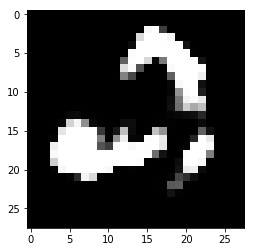

Loop: 977100, Generator_loss: -0.0032616, Discriminator_loss: 0.0018438
Loop: 977200, Generator_loss: -0.0072014, Discriminator_loss: 0.0013897
Loop: 977300, Generator_loss: -0.0018985, Discriminator_loss: 0.0030897
Loop: 977400, Generator_loss: -0.0031336, Discriminator_loss: 0.0037399
Loop: 977500, Generator_loss: -0.0073031, Discriminator_loss: 0.0012864
Loop: 977600, Generator_loss: -0.0062178, Discriminator_loss: 0.0026779
Loop: 977700, Generator_loss: -0.0089455, Discriminator_loss: 0.0038525
Loop: 977800, Generator_loss: -0.00085172, Discriminator_loss: 0.0017279
Loop: 977900, Generator_loss: -0.0052894, Discriminator_loss: 0.0020238
Loop: 978000, Generator_loss: -0.0038697, Discriminator_loss: 0.0034123


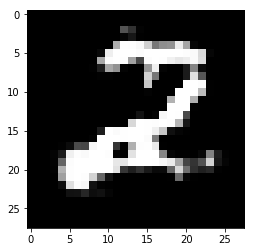

Loop: 978100, Generator_loss: -0.0014508, Discriminator_loss: 0.00066366
Loop: 978200, Generator_loss: -0.00928, Discriminator_loss: 0.0027551
Loop: 978300, Generator_loss: -0.0087128, Discriminator_loss: 0.0015486
Loop: 978400, Generator_loss: -0.0061872, Discriminator_loss: 0.0018724
Loop: 978500, Generator_loss: -0.0077048, Discriminator_loss: 0.0022134
Loop: 978600, Generator_loss: -0.0072501, Discriminator_loss: 0.00077688
Loop: 978700, Generator_loss: -0.0067232, Discriminator_loss: 0.0044868
Loop: 978800, Generator_loss: -0.010982, Discriminator_loss: 0.0041817
Loop: 978900, Generator_loss: -0.0056689, Discriminator_loss: 0.0016959
Loop: 979000, Generator_loss: -0.00053414, Discriminator_loss: 0.002616


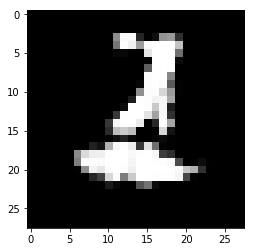

Loop: 979100, Generator_loss: -0.0064728, Discriminator_loss: 0.0010761
Loop: 979200, Generator_loss: -0.004603, Discriminator_loss: 0.00097478
Loop: 979300, Generator_loss: -0.0071796, Discriminator_loss: 0.002804
Loop: 979400, Generator_loss: -0.0040748, Discriminator_loss: 0.0042217
Loop: 979500, Generator_loss: -0.0069677, Discriminator_loss: 0.0047241
Loop: 979600, Generator_loss: -0.0079767, Discriminator_loss: 0.0027282
Loop: 979700, Generator_loss: -0.0088391, Discriminator_loss: 0.0060334
Loop: 979800, Generator_loss: -0.0006742, Discriminator_loss: 0.001147
Loop: 979900, Generator_loss: -0.0063949, Discriminator_loss: 0.0012613
Loop: 980000, Generator_loss: -0.0020135, Discriminator_loss: 0.0024339


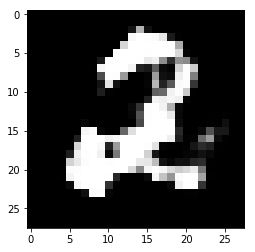

Loop: 980100, Generator_loss: -0.0040209, Discriminator_loss: 0.0016285
Loop: 980200, Generator_loss: -0.0041146, Discriminator_loss: 0.0044906
Loop: 980300, Generator_loss: -0.0039626, Discriminator_loss: 0.002288
Loop: 980400, Generator_loss: -0.0068741, Discriminator_loss: 0.0017234
Loop: 980500, Generator_loss: -0.0021461, Discriminator_loss: 0.0016243
Loop: 980600, Generator_loss: -0.0088481, Discriminator_loss: 0.0022271
Loop: 980700, Generator_loss: -0.0077749, Discriminator_loss: 0.0027005
Loop: 980800, Generator_loss: -0.0065182, Discriminator_loss: 0.0047402
Loop: 980900, Generator_loss: -0.004789, Discriminator_loss: 0.0027693
Loop: 981000, Generator_loss: -0.0037983, Discriminator_loss: 0.0028017


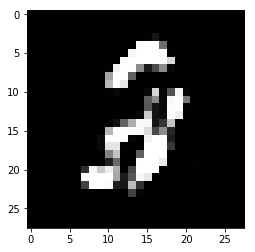

Loop: 981100, Generator_loss: -0.0053796, Discriminator_loss: 0.0022031
Loop: 981200, Generator_loss: -0.0057579, Discriminator_loss: 0.0019287
Loop: 981300, Generator_loss: -0.0046156, Discriminator_loss: 0.0053995
Loop: 981400, Generator_loss: -0.0073283, Discriminator_loss: 0.001912
Loop: 981500, Generator_loss: -0.0067282, Discriminator_loss: 0.0025168
Loop: 981600, Generator_loss: -0.0069582, Discriminator_loss: 0.0025115
Loop: 981700, Generator_loss: -0.0060389, Discriminator_loss: 0.0037225
Loop: 981800, Generator_loss: -0.0060932, Discriminator_loss: 0.0014966
Loop: 981900, Generator_loss: -0.0070257, Discriminator_loss: 0.0036501
Loop: 982000, Generator_loss: -0.0044079, Discriminator_loss: 0.0021179


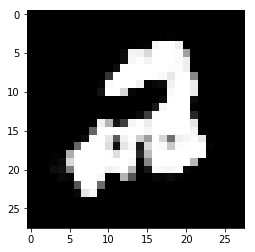

Loop: 982100, Generator_loss: -0.0045913, Discriminator_loss: 0.002065
Loop: 982200, Generator_loss: -0.0055977, Discriminator_loss: 0.0025088
Loop: 982300, Generator_loss: -0.0047691, Discriminator_loss: 0.0016788
Loop: 982400, Generator_loss: -0.0072332, Discriminator_loss: 0.002889
Loop: 982500, Generator_loss: -0.006274, Discriminator_loss: 0.0021847
Loop: 982600, Generator_loss: -0.0056517, Discriminator_loss: 0.0029764
Loop: 982700, Generator_loss: -0.0014489, Discriminator_loss: 0.0029286
Loop: 982800, Generator_loss: -0.003364, Discriminator_loss: 0.0041067
Loop: 982900, Generator_loss: -0.001929, Discriminator_loss: 0.0023986
Loop: 983000, Generator_loss: -0.0005559, Discriminator_loss: 0.00090071


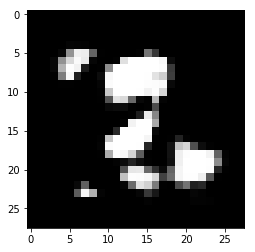

Loop: 983100, Generator_loss: -0.0076119, Discriminator_loss: 0.0041993
Loop: 983200, Generator_loss: -0.0032995, Discriminator_loss: 0.0029859
Loop: 983300, Generator_loss: -0.004771, Discriminator_loss: 0.0028823
Loop: 983400, Generator_loss: -0.0052979, Discriminator_loss: 0.00072651
Loop: 983500, Generator_loss: -0.0080089, Discriminator_loss: 0.0032111
Loop: 983600, Generator_loss: -0.0055588, Discriminator_loss: 0.0034387
Loop: 983700, Generator_loss: -0.0039753, Discriminator_loss: 0.0016906
Loop: 983800, Generator_loss: -0.0066861, Discriminator_loss: 0.0041269
Loop: 983900, Generator_loss: -0.0064827, Discriminator_loss: 0.0039584
Loop: 984000, Generator_loss: -0.0055929, Discriminator_loss: 0.002256


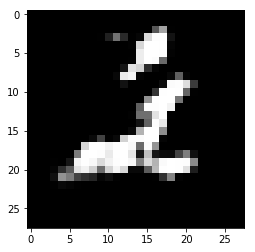

Loop: 984100, Generator_loss: -0.008161, Discriminator_loss: 0.0033369
Loop: 984200, Generator_loss: -0.0093938, Discriminator_loss: 0.00012986
Loop: 984300, Generator_loss: -0.0038782, Discriminator_loss: 0.0017938
Loop: 984400, Generator_loss: -0.0059262, Discriminator_loss: 0.0017755
Loop: 984500, Generator_loss: -0.002083, Discriminator_loss: 0.0031366
Loop: 984600, Generator_loss: -0.0049072, Discriminator_loss: 0.0016377
Loop: 984700, Generator_loss: -0.0065341, Discriminator_loss: 0.001691
Loop: 984800, Generator_loss: -0.0064683, Discriminator_loss: 0.0029139
Loop: 984900, Generator_loss: -0.0047652, Discriminator_loss: 0.0028224
Loop: 985000, Generator_loss: -0.0034166, Discriminator_loss: 0.0031861


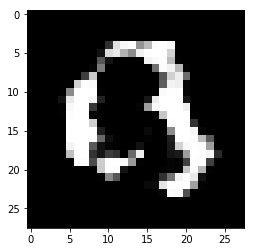

Loop: 985100, Generator_loss: -0.0045329, Discriminator_loss: 0.0018896
Loop: 985200, Generator_loss: -0.0025322, Discriminator_loss: 0.0029895
Loop: 985300, Generator_loss: -0.0057242, Discriminator_loss: 0.0027796
Loop: 985400, Generator_loss: -0.0090001, Discriminator_loss: 0.00082712
Loop: 985500, Generator_loss: -0.0031822, Discriminator_loss: 0.003723
Loop: 985600, Generator_loss: -0.013459, Discriminator_loss: 0.0031176
Loop: 985700, Generator_loss: -0.0044367, Discriminator_loss: 0.001508
Loop: 985800, Generator_loss: -0.0033086, Discriminator_loss: 0.0036551
Loop: 985900, Generator_loss: -0.0037816, Discriminator_loss: 0.0006597
Loop: 986000, Generator_loss: -0.0025039, Discriminator_loss: 0.0030897


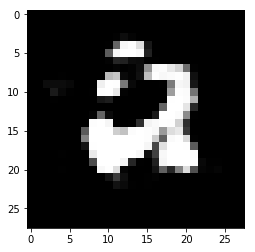

Loop: 986100, Generator_loss: -0.0044791, Discriminator_loss: 0.0014819
Loop: 986200, Generator_loss: -0.0052477, Discriminator_loss: 0.0034057
Loop: 986300, Generator_loss: -0.006119, Discriminator_loss: 0.0028637
Loop: 986400, Generator_loss: -0.0092474, Discriminator_loss: 0.0029377
Loop: 986500, Generator_loss: -0.0054322, Discriminator_loss: 0.00093769
Loop: 986600, Generator_loss: -0.0057988, Discriminator_loss: 0.0027596
Loop: 986700, Generator_loss: -0.0091715, Discriminator_loss: 0.0031662
Loop: 986800, Generator_loss: -0.0052945, Discriminator_loss: 0.0020076
Loop: 986900, Generator_loss: -0.00889, Discriminator_loss: 0.0014073
Loop: 987000, Generator_loss: -0.0042464, Discriminator_loss: 0.0011679


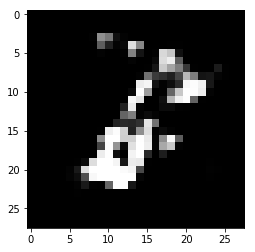

Loop: 987100, Generator_loss: -0.0043601, Discriminator_loss: 0.0020387
Loop: 987200, Generator_loss: -0.007063, Discriminator_loss: 0.0027646
Loop: 987300, Generator_loss: -0.0045083, Discriminator_loss: 0.0026399
Loop: 987400, Generator_loss: -0.0034694, Discriminator_loss: 0.0026843
Loop: 987500, Generator_loss: -0.0011062, Discriminator_loss: 0.0023649
Loop: 987600, Generator_loss: -0.0074892, Discriminator_loss: 0.0023435
Loop: 987700, Generator_loss: -0.0090452, Discriminator_loss: 0.0023264
Loop: 987800, Generator_loss: 0.0020001, Discriminator_loss: 0.0043916
Loop: 987900, Generator_loss: -0.0051972, Discriminator_loss: 0.0027558
Loop: 988000, Generator_loss: -0.0025713, Discriminator_loss: 0.0048006


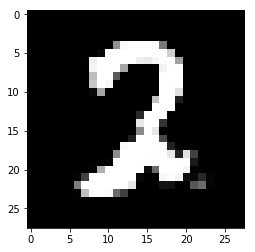

Loop: 988100, Generator_loss: -0.001694, Discriminator_loss: 0.0012876
Loop: 988200, Generator_loss: -0.0059822, Discriminator_loss: 0.0019172
Loop: 988300, Generator_loss: -0.0087923, Discriminator_loss: 0.0034151
Loop: 988400, Generator_loss: 0.00066976, Discriminator_loss: 0.0016655
Loop: 988500, Generator_loss: -0.0083841, Discriminator_loss: 0.0026063
Loop: 988600, Generator_loss: -0.0074093, Discriminator_loss: 0.0028367
Loop: 988700, Generator_loss: -0.0073341, Discriminator_loss: 0.0031835
Loop: 988800, Generator_loss: -0.0041408, Discriminator_loss: 0.00052234
Loop: 988900, Generator_loss: -0.0031108, Discriminator_loss: 0.0024919
Loop: 989000, Generator_loss: -0.0074158, Discriminator_loss: 0.0040482


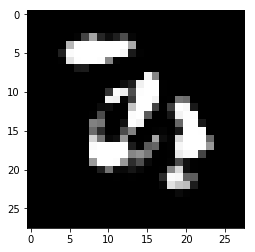

Loop: 989100, Generator_loss: -0.0025349, Discriminator_loss: 0.0021392
Loop: 989200, Generator_loss: -0.0030497, Discriminator_loss: 0.0038572
Loop: 989300, Generator_loss: -0.0073159, Discriminator_loss: 0.0032923
Loop: 989400, Generator_loss: -0.005844, Discriminator_loss: 0.0041423
Loop: 989500, Generator_loss: -0.0044535, Discriminator_loss: 0.0014822
Loop: 989600, Generator_loss: -0.0062671, Discriminator_loss: 0.0018177
Loop: 989700, Generator_loss: -0.0056828, Discriminator_loss: 0.0019702
Loop: 989800, Generator_loss: -0.0068823, Discriminator_loss: 0.0020733
Loop: 989900, Generator_loss: -0.0059988, Discriminator_loss: 0.0010783
Loop: 990000, Generator_loss: -0.0012511, Discriminator_loss: 0.0042801


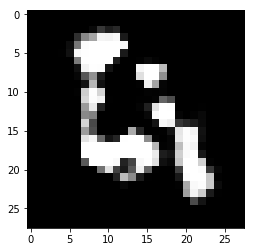

Loop: 990100, Generator_loss: -0.0042229, Discriminator_loss: 0.0024934
Loop: 990200, Generator_loss: -0.007075, Discriminator_loss: 0.00028401
Loop: 990300, Generator_loss: -0.0072903, Discriminator_loss: 0.0029238
Loop: 990400, Generator_loss: -0.0063372, Discriminator_loss: 0.0032651
Loop: 990500, Generator_loss: -0.0062745, Discriminator_loss: 0.0035406
Loop: 990600, Generator_loss: -0.0022889, Discriminator_loss: 0.0022749
Loop: 990700, Generator_loss: -0.0059259, Discriminator_loss: 0.0035687
Loop: 990800, Generator_loss: -0.0071192, Discriminator_loss: 0.002076
Loop: 990900, Generator_loss: -0.0074008, Discriminator_loss: 0.0024099
Loop: 991000, Generator_loss: -0.0057388, Discriminator_loss: 0.0027772


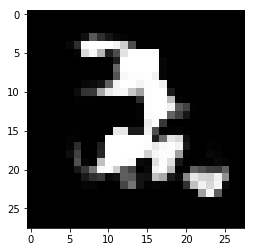

Loop: 991100, Generator_loss: -0.010397, Discriminator_loss: 0.0027337
Loop: 991200, Generator_loss: -0.0022664, Discriminator_loss: 0.0021453
Loop: 991300, Generator_loss: 0.0014442, Discriminator_loss: 0.0026374
Loop: 991400, Generator_loss: -0.0081641, Discriminator_loss: 0.0024924
Loop: 991500, Generator_loss: -0.0068035, Discriminator_loss: 0.0025007
Loop: 991600, Generator_loss: -0.0048527, Discriminator_loss: 0.0026049
Loop: 991700, Generator_loss: -0.0025571, Discriminator_loss: 0.0032943
Loop: 991800, Generator_loss: -0.0073222, Discriminator_loss: 0.0015169
Loop: 991900, Generator_loss: -0.003565, Discriminator_loss: 0.00043503
Loop: 992000, Generator_loss: -0.011248, Discriminator_loss: 0.0025472


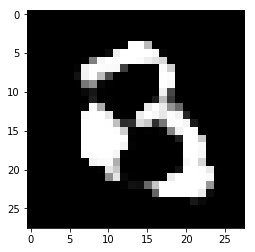

Loop: 992100, Generator_loss: -0.0053028, Discriminator_loss: 0.0013125
Loop: 992200, Generator_loss: -0.0067335, Discriminator_loss: 0.0049268
Loop: 992300, Generator_loss: -0.0095022, Discriminator_loss: 0.0037556
Loop: 992400, Generator_loss: -0.0043351, Discriminator_loss: 0.0038777
Loop: 992500, Generator_loss: -0.0090689, Discriminator_loss: 0.0031539
Loop: 992600, Generator_loss: -0.0047787, Discriminator_loss: 0.002945
Loop: 992700, Generator_loss: -0.0031163, Discriminator_loss: 0.0027156
Loop: 992800, Generator_loss: -0.0098201, Discriminator_loss: 0.0019397
Loop: 992900, Generator_loss: -0.0058018, Discriminator_loss: 0.0031768
Loop: 993000, Generator_loss: -0.0029431, Discriminator_loss: 0.0035314


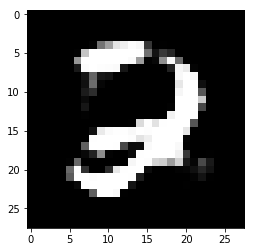

Loop: 993100, Generator_loss: -0.0062774, Discriminator_loss: 0.0019171
Loop: 993200, Generator_loss: -0.0073233, Discriminator_loss: 0.002588
Loop: 993300, Generator_loss: -0.0068729, Discriminator_loss: 0.0031957
Loop: 993400, Generator_loss: -0.0041053, Discriminator_loss: 0.0035011
Loop: 993500, Generator_loss: -0.00040189, Discriminator_loss: 0.0029373
Loop: 993600, Generator_loss: -0.0062247, Discriminator_loss: -0.0015182
Loop: 993700, Generator_loss: -0.0083305, Discriminator_loss: 0.0031386
Loop: 993800, Generator_loss: -0.011413, Discriminator_loss: 0.003877
Loop: 993900, Generator_loss: -0.0050103, Discriminator_loss: 0.0025509
Loop: 994000, Generator_loss: -0.0038924, Discriminator_loss: 0.0033037


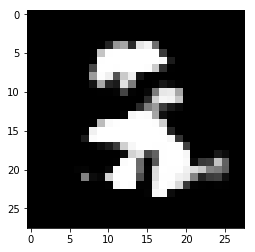

Loop: 994100, Generator_loss: -0.0047285, Discriminator_loss: 0.0020088
Loop: 994200, Generator_loss: -0.0070817, Discriminator_loss: 0.0017277
Loop: 994300, Generator_loss: -0.0073424, Discriminator_loss: 0.0021818
Loop: 994400, Generator_loss: -0.010012, Discriminator_loss: 0.0016987
Loop: 994500, Generator_loss: -0.0033176, Discriminator_loss: 0.0022845
Loop: 994600, Generator_loss: -0.0042905, Discriminator_loss: 0.0024575
Loop: 994700, Generator_loss: -0.0042386, Discriminator_loss: 0.0025766
Loop: 994800, Generator_loss: -0.00115, Discriminator_loss: 0.0047402
Loop: 994900, Generator_loss: -0.0074446, Discriminator_loss: 0.003101
Loop: 995000, Generator_loss: -0.0023204, Discriminator_loss: 0.0040649


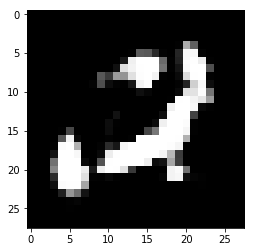

Loop: 995100, Generator_loss: -0.0076173, Discriminator_loss: 0.0047116
Loop: 995200, Generator_loss: -0.010477, Discriminator_loss: 0.0033374
Loop: 995300, Generator_loss: -0.0010613, Discriminator_loss: 0.0024781
Loop: 995400, Generator_loss: -0.0073259, Discriminator_loss: 0.0026692
Loop: 995500, Generator_loss: -0.0037414, Discriminator_loss: 0.0025329
Loop: 995600, Generator_loss: -0.0083238, Discriminator_loss: 0.0029795
Loop: 995700, Generator_loss: -0.00014723, Discriminator_loss: 0.00050974
Loop: 995800, Generator_loss: -0.0070101, Discriminator_loss: 0.0042414
Loop: 995900, Generator_loss: -0.0050331, Discriminator_loss: 0.0030152
Loop: 996000, Generator_loss: -0.0089905, Discriminator_loss: 0.003096


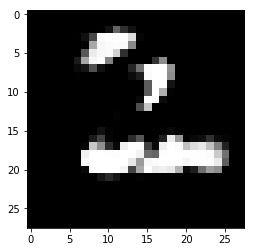

Loop: 996100, Generator_loss: -0.0067218, Discriminator_loss: 0.0047132
Loop: 996200, Generator_loss: -0.0052427, Discriminator_loss: 0.0029016
Loop: 996300, Generator_loss: -0.0030767, Discriminator_loss: 0.0025877
Loop: 996400, Generator_loss: -0.0099892, Discriminator_loss: 0.0025995
Loop: 996500, Generator_loss: -0.0047878, Discriminator_loss: 0.0015366
Loop: 996600, Generator_loss: -0.0081873, Discriminator_loss: 0.0033472
Loop: 996700, Generator_loss: -0.0028313, Discriminator_loss: 0.0029698
Loop: 996800, Generator_loss: -0.0055212, Discriminator_loss: 0.00017355
Loop: 996900, Generator_loss: -0.0038033, Discriminator_loss: 0.0032894
Loop: 997000, Generator_loss: -0.0022609, Discriminator_loss: 0.0022666


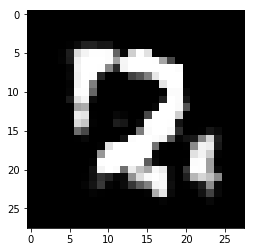

Loop: 997100, Generator_loss: -0.0081482, Discriminator_loss: 0.0034547
Loop: 997200, Generator_loss: -0.0046203, Discriminator_loss: 0.0025797
Loop: 997300, Generator_loss: -0.0083805, Discriminator_loss: 0.0035719
Loop: 997400, Generator_loss: -0.0082021, Discriminator_loss: 0.0027106
Loop: 997500, Generator_loss: -0.0072007, Discriminator_loss: 0.0010995
Loop: 997600, Generator_loss: -1.2299e-05, Discriminator_loss: 0.0029259
Loop: 997700, Generator_loss: -0.0057004, Discriminator_loss: 0.0034675
Loop: 997800, Generator_loss: -0.0060875, Discriminator_loss: 0.0025274
Loop: 997900, Generator_loss: -0.0066714, Discriminator_loss: 0.003107
Loop: 998000, Generator_loss: -0.0025895, Discriminator_loss: 0.0023405


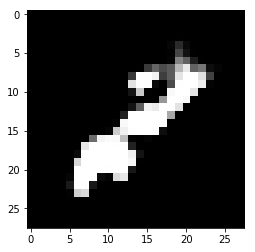

Loop: 998100, Generator_loss: -0.0069422, Discriminator_loss: 0.0021968
Loop: 998200, Generator_loss: -0.0059343, Discriminator_loss: 0.0045012
Loop: 998300, Generator_loss: -0.0069368, Discriminator_loss: 0.0026628
Loop: 998400, Generator_loss: -0.003673, Discriminator_loss: 0.0018256
Loop: 998500, Generator_loss: -0.0019839, Discriminator_loss: 0.0036469
Loop: 998600, Generator_loss: -0.0058174, Discriminator_loss: 0.0033611
Loop: 998700, Generator_loss: -0.0044328, Discriminator_loss: 0.0035842
Loop: 998800, Generator_loss: -0.0050196, Discriminator_loss: 0.0013549
Loop: 998900, Generator_loss: -0.0032131, Discriminator_loss: 0.003822
Loop: 999000, Generator_loss: -0.007679, Discriminator_loss: 0.0028107


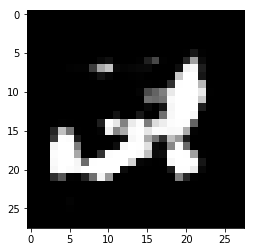

Loop: 999100, Generator_loss: -0.0023608, Discriminator_loss: 0.00073323
Loop: 999200, Generator_loss: -0.0033925, Discriminator_loss: 0.0021196
Loop: 999300, Generator_loss: -0.0041718, Discriminator_loss: 0.0034455
Loop: 999400, Generator_loss: -0.0080761, Discriminator_loss: 0.0027122
Loop: 999500, Generator_loss: -0.0060663, Discriminator_loss: 0.0026923
Loop: 999600, Generator_loss: -0.010422, Discriminator_loss: 0.0041491
Loop: 999700, Generator_loss: -0.0028114, Discriminator_loss: 0.003803
Loop: 999800, Generator_loss: -0.0085431, Discriminator_loss: 0.00061594
Loop: 999900, Generator_loss: -0.0048923, Discriminator_loss: 0.0039569


In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

disc_loss = []
genr_loss = []

disc_loss_exp = []
genr_loss_exp = []

saver = tf.train.Saver()

for it in range(1000000):
    for _ in range(5):
        X_mb, y_mb = mnist.train.next_batch(batch_size)

        _, D_loss_curr, _ = sess.run(
            [D_solver, D_loss, clip_D],
            feed_dict={X: X_mb, y: y_mb, z: np.random.uniform(-1., 1., size=[batch_size, noise_dim])}
        )

    _, G_loss_curr = sess.run(
        [G_solver, G_loss],
        feed_dict={y:y_mb, z: np.random.uniform(-1., 1., size=[batch_size, noise_dim])}
    )
    
    disc_loss.append(D_loss_curr)
    genr_loss.append(G_loss_curr)
    
    if it % 100 == 0:
        print('Loop: {}, Generator_loss: {:.5}, Discriminator_loss: {:.5}'.format(it,G_loss_curr,D_loss_curr))
        disc_loss_exp.append(D_loss_curr)
        genr_loss_exp.append(G_loss_curr)
        
        if it % 1000 == 0:
            y_req = np.zeros([1,10])
            y_req[:, 2] = 1 # we are generating 2
            samples = sess.run(G_sample, feed_dict={y:y_req, z: np.random.uniform(-1., 1., size=[1, noise_dim])})
            for img in samples:
                plt.imshow(img.reshape([28, 28]), cmap='Greys_r')
                plt.show()

    if it%100000 == 0:
        save_path = saver.save(sess, 'my_cgan_model/final.ckpt')

INFO:tensorflow:Restoring parameters from my_cgan_model/final.ckpt


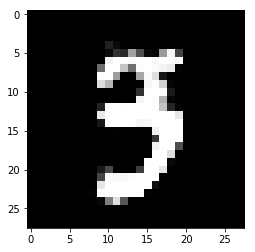

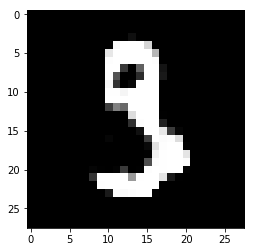

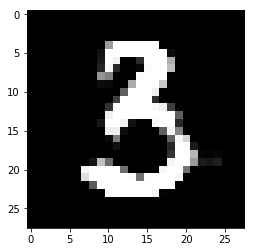

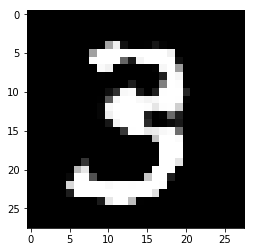

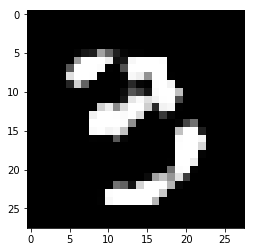

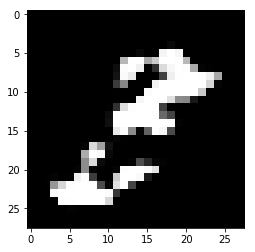

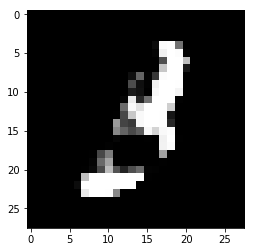

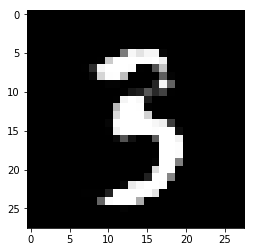

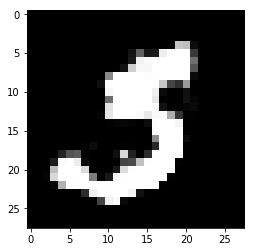

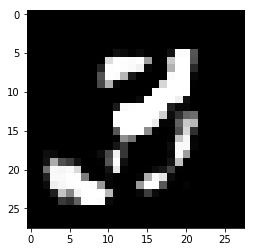

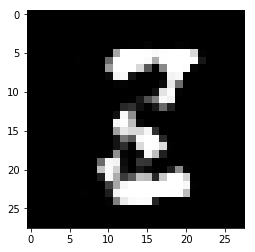

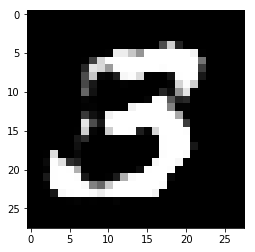

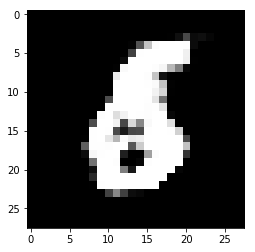

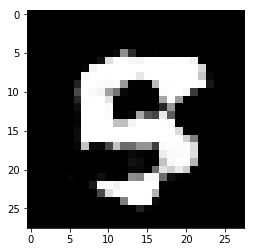

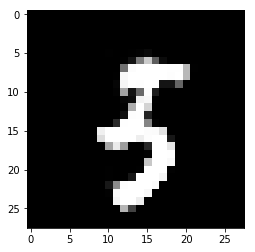

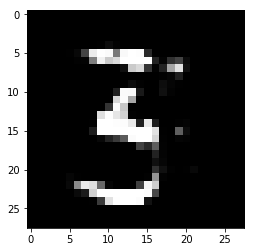

In [8]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, 'my_cgan_model/final.ckpt')
    y_req = np.zeros([16, 10])
    y_req[:,3] = 1
    samples = sess.run(G_sample, feed_dict={y:y_req, z: np.random.uniform(-1., 1., size=[16, noise_dim])})
    
    for img in samples:
        plt.imshow(img.reshape([28, 28]), cmap='Greys_r')
        plt.show()
